In [ ]:
!git clone https://github.com/HuCaoFighting/Swin-Unet.git

Cloning into 'Swin-Unet'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 76 (delta 11), reused 1 (delta 0), pack-reused 55
Unpacking objects: 100% (76/76), 37.45 KiB | 1.70 MiB/s, done.


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 KB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.0 MB/s eta 0:00:00
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94524 sha256=ad1c1fcffbbf70658654084561d18ec74c771e0306b07be0e561d5bc1e1fb1ef
  Stored in directory: /root/.cache/pip/wheels/fd/c2/0d/5d94d95e5875ea17b85a9f1f99b8dd2e50517137c8042c6468
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any

In [ ]:
%cd Swin-Unet

[Errno 2] No such file or directory: 'Swin-Unet'
/content/Swin-Unet


In [ ]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from networks.vision_transformer import SwinUnet as ViT_seg

In [ ]:
import torch

In [ ]:
!pip install yacs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from config import _update_config_from_file

In [ ]:
from yacs.config import CfgNode as CN


_C = CN()

# Base config files
_C.BASE = ['']

# -----------------------------------------------------------------------------
# Data settings
# -----------------------------------------------------------------------------
_C.DATA = CN()
# Batch size for a single GPU, could be overwritten by command line argument
_C.DATA.BATCH_SIZE = 128
# Path to dataset, could be overwritten by command line argument
_C.DATA.DATA_PATH = ''
# Dataset name
_C.DATA.DATASET = 'imagenet'
# Input image size
_C.DATA.IMG_SIZE = 512
# Interpolation to resize image (random, bilinear, bicubic)
_C.DATA.INTERPOLATION = 'bilinear'
# Use zipped dataset instead of folder dataset
# could be overwritten by command line argument
_C.DATA.ZIP_MODE = False
# Cache Data in Memory, could be overwritten by command line argument
_C.DATA.CACHE_MODE = 'part'
# Pin CPU memory in DataLoader for more efficient (sometimes) transfer to GPU.
_C.DATA.PIN_MEMORY = True
# Number of data loading threads
_C.DATA.NUM_WORKERS = 8

# -----------------------------------------------------------------------------
# Model settings
# -----------------------------------------------------------------------------
_C.MODEL = CN()
# Model type
_C.MODEL.TYPE = 'swin'
# Model name
_C.MODEL.NAME = 'swin_tiny_patch4_window7_224'
# Checkpoint to resume, could be overwritten by command line argument
_C.MODEL.PRETRAIN_CKPT = '/content/swin_tiny_patch4_window7_224.pth'
_C.MODEL.RESUME = ''
# Number of classes, overwritten in data preparation
_C.MODEL.NUM_CLASSES = 2
# Dropout rate
_C.MODEL.DROP_RATE = 0.0
# Drop path rate
_C.MODEL.DROP_PATH_RATE = 0.1
# Label Smoothing
_C.MODEL.LABEL_SMOOTHING = 0.1

# Swin Transformer parameters
_C.MODEL.SWIN = CN()
_C.MODEL.SWIN.PATCH_SIZE = 4
_C.MODEL.SWIN.IN_CHANS = 3
_C.MODEL.SWIN.EMBED_DIM = 96
_C.MODEL.SWIN.DEPTHS = [2, 2, 6, 2]
_C.MODEL.SWIN.DECODER_DEPTHS = [2, 2, 6, 2]
_C.MODEL.SWIN.NUM_HEADS = [3, 6, 12, 24]
_C.MODEL.SWIN.WINDOW_SIZE = 64
_C.MODEL.SWIN.MLP_RATIO = 4.
_C.MODEL.SWIN.QKV_BIAS = True
_C.MODEL.SWIN.QK_SCALE = None
_C.MODEL.SWIN.APE = False
_C.MODEL.SWIN.PATCH_NORM = True
_C.MODEL.SWIN.FINAL_UPSAMPLE= "expand_first"

# -----------------------------------------------------------------------------
# Training settings
# -----------------------------------------------------------------------------
_C.TRAIN = CN()
_C.TRAIN.START_EPOCH = 0
_C.TRAIN.EPOCHS = 300
_C.TRAIN.WARMUP_EPOCHS = 20
_C.TRAIN.WEIGHT_DECAY = 0.05
_C.TRAIN.BASE_LR = 5e-4
_C.TRAIN.WARMUP_LR = 5e-7
_C.TRAIN.MIN_LR = 5e-6
# Clip gradient norm
_C.TRAIN.CLIP_GRAD = 5.0
# Auto resume from latest checkpoint
_C.TRAIN.AUTO_RESUME = True
# Gradient accumulation steps
# could be overwritten by command line argument
_C.TRAIN.ACCUMULATION_STEPS = 0
# Whether to use gradient checkpointing to save memory
# could be overwritten by command line argument
_C.TRAIN.USE_CHECKPOINT = False

# LR scheduler
_C.TRAIN.LR_SCHEDULER = CN()
_C.TRAIN.LR_SCHEDULER.NAME = 'cosine'
# Epoch interval to decay LR, used in StepLRScheduler
_C.TRAIN.LR_SCHEDULER.DECAY_EPOCHS = 30
# LR decay rate, used in StepLRScheduler
_C.TRAIN.LR_SCHEDULER.DECAY_RATE = 0.1

# Optimizer
_C.TRAIN.OPTIMIZER = CN()
_C.TRAIN.OPTIMIZER.NAME = 'adamw'
# Optimizer Epsilon
_C.TRAIN.OPTIMIZER.EPS = 1e-8
# Optimizer Betas
_C.TRAIN.OPTIMIZER.BETAS = (0.9, 0.999)
# SGD momentum
_C.TRAIN.OPTIMIZER.MOMENTUM = 0.9

# -----------------------------------------------------------------------------
# Augmentation settings
# -----------------------------------------------------------------------------
_C.AUG = CN()
# Color jitter factor
_C.AUG.COLOR_JITTER = 0.4
# Use AutoAugment policy. "v0" or "original"
_C.AUG.AUTO_AUGMENT = 'rand-m9-mstd0.5-inc1'
# Random erase prob
_C.AUG.REPROB = 0.25
# Random erase mode
_C.AUG.REMODE = 'pixel'
# Random erase count
_C.AUG.RECOUNT = 1
# Mixup alpha, mixup enabled if > 0
_C.AUG.MIXUP = 0.8
# Cutmix alpha, cutmix enabled if > 0
_C.AUG.CUTMIX = 1.0
# Cutmix min/max ratio, overrides alpha and enables cutmix if set
_C.AUG.CUTMIX_MINMAX = None
# Probability of performing mixup or cutmix when either/both is enabled
_C.AUG.MIXUP_PROB = 1.0
# Probability of switching to cutmix when both mixup and cutmix enabled
_C.AUG.MIXUP_SWITCH_PROB = 0.5
# How to apply mixup/cutmix params. Per "batch", "pair", or "elem"
_C.AUG.MIXUP_MODE = 'batch'

# -----------------------------------------------------------------------------
# Testing settings
# -----------------------------------------------------------------------------
_C.TEST = CN()
# Whether to use center crop when testing
_C.TEST.CROP = True

# -----------------------------------------------------------------------------
# Misc
# -----------------------------------------------------------------------------
# Mixed precision opt level, if O0, no amp is used ('O0', 'O1', 'O2')
# overwritten by command line argument
_C.AMP_OPT_LEVEL = ''
# Path to output folder, overwritten by command line argument
_C.OUTPUT = ''
# Tag of experiment, overwritten by command line argument
_C.TAG = 'default'
# Frequency to save checkpoint
_C.SAVE_FREQ = 1
# Frequency to logging info
_C.PRINT_FREQ = 10
# Fixed random seed
_C.SEED = 0
# Perform evaluation only, overwritten by command line argument
_C.EVAL_MODE = False
# Test throughput only, overwritten by command line argument
_C.THROUGHPUT_MODE = False
# local rank for DistributedDataParallel, given by command line argument
_C.LOCAL_RANK = 0


def get_cfg_defaults():
  """Get a yacs CfgNode object with default values for my_project."""
  # Return a clone so that the defaults will not be altered
  # This is for the "local variable" use pattern
  return _C.clone()

In [ ]:
cfg = get_cfg_defaults()

In [ ]:
cfg.merge_from_file("/content/Swin-Unet/configs/swin_tiny_patch4_window7_224_lite.yaml")
cfg.freeze()
print(cfg)

AMP_OPT_LEVEL: 
AUG:
  AUTO_AUGMENT: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  CUTMIX: 1.0
  CUTMIX_MINMAX: None
  MIXUP: 0.8
  MIXUP_MODE: batch
  MIXUP_PROB: 1.0
  MIXUP_SWITCH_PROB: 0.5
  RECOUNT: 1
  REMODE: pixel
  REPROB: 0.25
BASE: ['']
DATA:
  BATCH_SIZE: 128
  CACHE_MODE: part
  DATASET: imagenet
  DATA_PATH: 
  IMG_SIZE: 512
  INTERPOLATION: bilinear
  NUM_WORKERS: 8
  PIN_MEMORY: True
  ZIP_MODE: False
EVAL_MODE: False
LOCAL_RANK: 0
MODEL:
  DROP_PATH_RATE: 0.2
  DROP_RATE: 0.0
  LABEL_SMOOTHING: 0.1
  NAME: swin_tiny_patch4_window7_224
  NUM_CLASSES: 2
  PRETRAIN_CKPT: ./pretrained_ckpt/swin_tiny_patch4_window7_224.pth
  RESUME: 
  SWIN:
    APE: False
    DECODER_DEPTHS: [2, 2, 2, 1]
    DEPTHS: [2, 2, 2, 2]
    EMBED_DIM: 96
    FINAL_UPSAMPLE: expand_first
    IN_CHANS: 3
    MLP_RATIO: 4.0
    NUM_HEADS: [3, 6, 12, 24]
    PATCH_NORM: True
    PATCH_SIZE: 4
    QKV_BIAS: True
    QK_SCALE: None
    WINDOW_SIZE: 32
  TYPE: swin
OUTPUT: 
PRINT_FREQ: 10
SAVE_FREQ: 1
SEED:

In [ ]:
import argparse
parser = argparse.ArgumentParser()

In [ ]:
parser.add_argument('--cfg', type=str, required=True, metavar="FILE", help='path to config file', )

_StoreAction(option_strings=['--cfg'], dest='cfg', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, required=True, help='path to config file', metavar='FILE')

In [ ]:
import yaml
from pathlib import Path
conf = yaml.safe_load(Path('/content/Swin-Unet/configs/swin_tiny_patch4_window7_224_lite.yaml').read_text())

In [ ]:
conf

{'MODEL': {'TYPE': 'swin',
  'NAME': 'swin_tiny_patch4_window7_224',
  'DROP_PATH_RATE': 0.2,
  'PRETRAIN_CKPT': './pretrained_ckpt/swin_tiny_patch4_window7_224.pth',
  'SWIN': {'FINAL_UPSAMPLE': 'expand_first',
   'EMBED_DIM': 96,
   'DEPTHS': [2, 2, 2, 2],
   'DECODER_DEPTHS': [2, 2, 2, 1],
   'NUM_HEADS': [3, 6, 12, 24],
   'WINDOW_SIZE': 32}}}

In [ ]:
a = torch.rand(1, 3, 512, 512)
model = ViT_seg(cfg,img_size=512, num_classes=2)
y = model(a) # [2, 5, 128, 128]
y.shape

SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.2;num_classes:2
---final upsample expand_first---


torch.Size([1, 2, 512, 512])

In [ ]:
!gdown 1TyMf0_uvaxyacMmVzRfqvLLAWSOE2bJR

Downloading...
From: https://drive.google.com/uc?id=1TyMf0_uvaxyacMmVzRfqvLLAWSOE2bJR
To: /content/Swin-Unet/swin_tiny_patch4_window7_224.pth
100% 114M/114M [00:03<00:00, 37.0MB/s]


In [ ]:
model = ViT_seg.load_from(model, config = cfg)

pretrained_path:./pretrained_ckpt/swin_tiny_patch4_window7_224.pth


FileNotFoundError: ignored

In [ ]:
cd "/content"

/content


In [ ]:
!pip install gdown -U --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
import gdown
url ='https://drive.google.com/uc?id=1xxMw2gM48JxftZEuLvHMuU_5ibIITEP0'
gdown.download(url)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1xxMw2gM48JxftZEuLvHMuU_5ibIITEP0
From (redirected): https://drive.google.com/uc?id=1xxMw2gM48JxftZEuLvHMuU_5ibIITEP0&confirm=t&uuid=64d71efb-fbf5-433b-a727-ce326f9a92b6
To: /content/archive.zip
100%|██████████| 4.07G/4.07G [00:48<00:00, 83.6MB/s]


'archive.zip'

In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/723199_sat.jpg    
  inflating: train/723226_mask.png   
  inflating: train/723226_sat.jpg    
  inflating: train/723436_mask.png   
  inflating: train/723436_sat.jpg    
  inflating: train/723483_mask.png   
  inflating: train/723483_sat.jpg    
  inflating: train/723622_mask.png   
  inflating: train/723622_sat.jpg    
  inflating: train/723722_mask.png   
  inflating: train/723722_sat.jpg    
  inflating: train/723970_mask.png   
  inflating: train/723970_sat.jpg    
  inflating: train/723990_mask.png   
  inflating: train/723990_sat.jpg    
  inflating: train/724095_mask.png   
  inflating: train/724095_sat.jpg    
  inflating: train/724431_mask.png   
  inflating: train/724431_sat.jpg    
  inflating: train/724485_mask.png   
  inflating: train/724485_sat.jpg    
  inflating: train/724705_mask.png   
  inflating: train/724705_sat.jpg    
  inflating: train/724870_mask.png   
  inflating: train/724870_sat.jpg    

In [ ]:
import os, cv2
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album

In [ ]:
import tensorflow as tf
from tensorflow import keras 
tf.compat.v1.enable_eager_execution()
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
#import keras 
from tensorflow.keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU

In [ ]:
!pip install -U git+https://github.com/qubvel/segmentation_models.pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-2l6awky0
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-2l6awky0
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit e7cbea0bbd546167b9d1757b2cfeca3fbe26a33e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.2-py3-none-any.whl size=106755 sha256=cc88831d9799d1da58d64eec0fc5d234a3d691cdec1a6112f229632327cf482e
  Stored in directory: /tmp/pip-ephem-wheel-cache-u3ipcy_v/whee

In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
DATA_DIR = '/content/'

metadata_df = pd.read_csv(os.path.join(DATA_DIR, 'metadata.csv'))
metadata_df = metadata_df[metadata_df['split']=='train']
metadata_df = metadata_df[['image_id', 'sat_image_path', 'mask_path']]
metadata_df['sat_image_path'] = metadata_df['sat_image_path'].apply(lambda img_pth: os.path.join(DATA_DIR, img_pth))
metadata_df['mask_path'] = metadata_df['mask_path'].apply(lambda img_pth: os.path.join(DATA_DIR, img_pth))
# Shuffle DataFrame
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)

# Perform 90/10 split for train / val
valid_df = metadata_df.sample(frac=0.1, random_state=42)
train_df = metadata_df.drop(valid_df.index)
len(train_df), len(valid_df)

(5603, 623)

In [ ]:
class_dict = pd.read_csv(os.path.join(DATA_DIR, 'class_dict.csv'))
# Get class names
class_names = class_dict['name'].tolist()
# Get class RGB values
class_rgb_values = class_dict[['r','g','b']].values.tolist()

print('All dataset classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

All dataset classes and their corresponding RGB values in labels:
Class Names:  ['road', 'background']
Class RGB values:  [[255, 255, 255], [0, 0, 0]]


In [ ]:
select_classes = ['background', 'road']

# Get RGB values of required classes
select_class_indices = [class_names.index(cls.lower()) for cls in select_classes]
select_class_rgb_values =  np.array(class_rgb_values)[select_class_indices]

print('Selected classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

Selected classes and their corresponding RGB values in labels:
Class Names:  ['road', 'background']
Class RGB values:  [[255, 255, 255], [0, 0, 0]]


In [ ]:
# helper function for data visualization
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map
    
# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [ ]:
class RoadsDataset(torch.utils.data.Dataset):

    """DeepGlobe Road Extraction Challenge Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        df (str): DataFrame containing images / labels paths
        class_rgb_values (list): RGB values of select classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    def __init__(
            self, 
            df,
            class_rgb_values=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.image_paths = df['sat_image_path'].tolist()
        self.mask_paths = df['mask_path'].tolist()
        
        self.class_rgb_values = class_rgb_values
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read images and masks
        image = cv2.cvtColor(cv2.imread(self.image_paths[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(512,512))
        mask = cv2.cvtColor(cv2.imread(self.mask_paths[i]), cv2.COLOR_BGR2RGB)
        mask = cv2.resize(mask,(512,512))
        # one-hot-encode the mask
        mask = one_hot_encode(mask, self.class_rgb_values).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        # return length of 
        return len(self.image_paths)

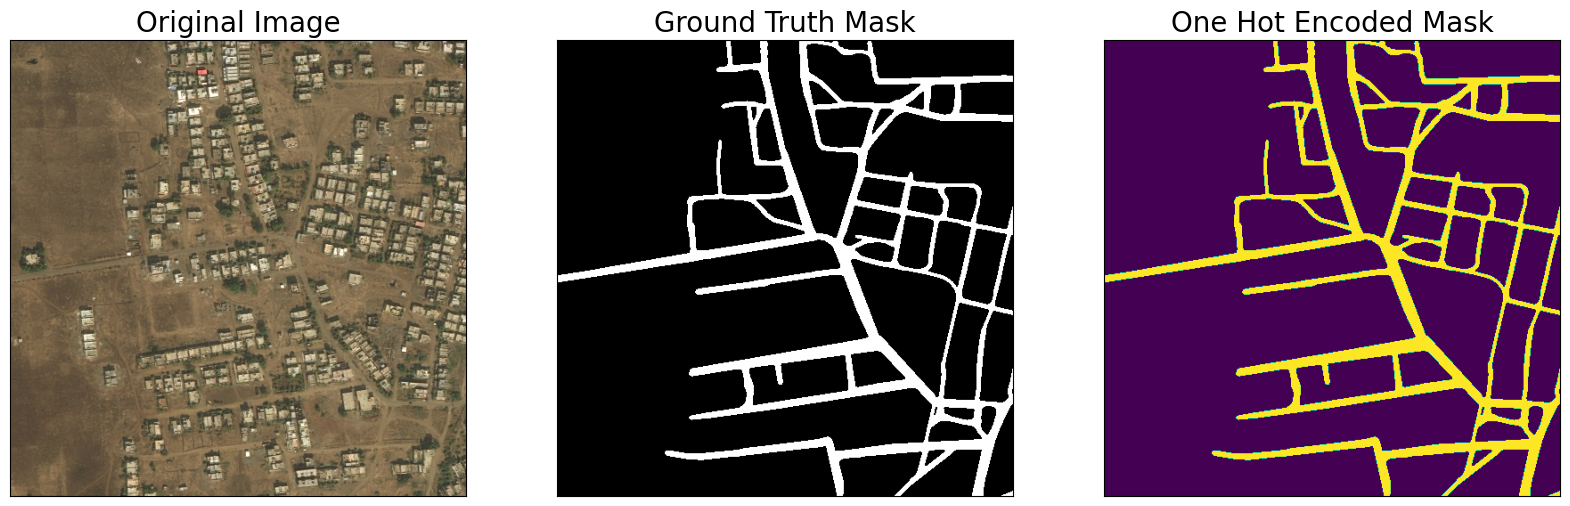

In [ ]:
dataset = RoadsDataset(train_df, class_rgb_values=select_class_rgb_values)
random_idx = random.randint(0, len(dataset)-1)
image, mask = dataset[2]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [ ]:
def get_training_augmentation():
    train_transform = [
        album.HorizontalFlip(p=0.5),
        album.VerticalFlip(p=0.5),
    ]
    return album.Compose(train_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn=None):
    """Construct preprocessing transform    
    Args:
        preprocessing_fn (callable): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    """
    _transform = []
    if preprocessing_fn:
        _transform.append(album.Lambda(image=preprocessing_fn))
    _transform.append(album.Lambda(image=to_tensor, mask=to_tensor))
        
    return album.Compose(_transform)

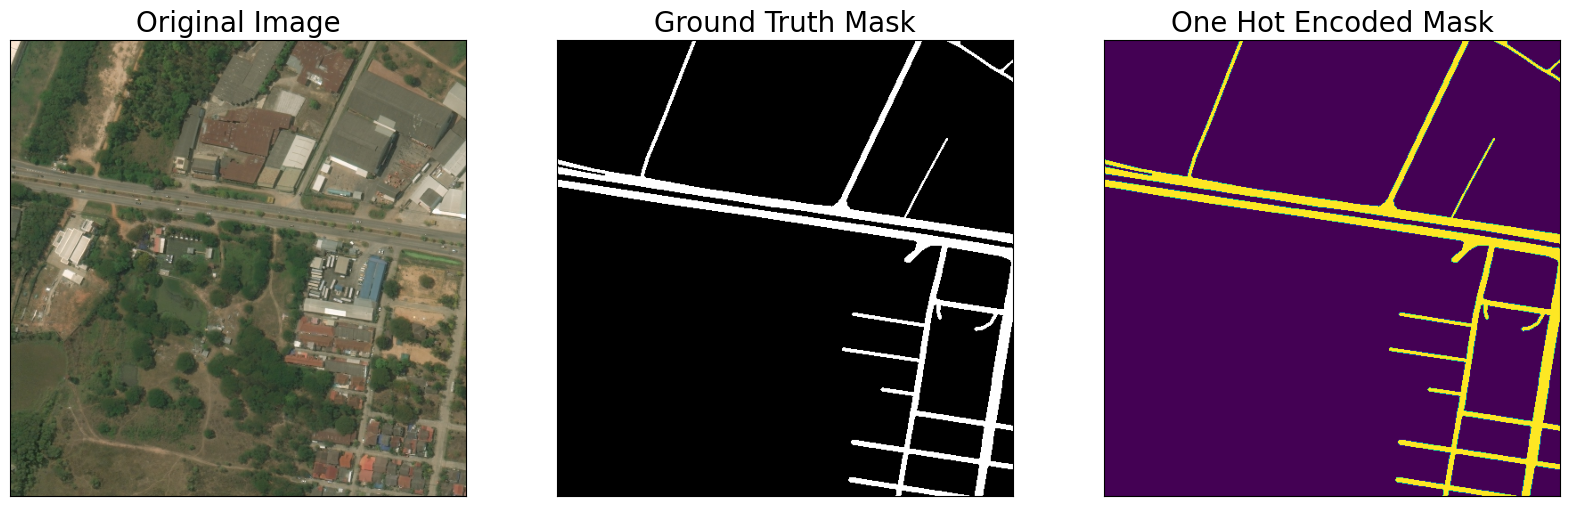

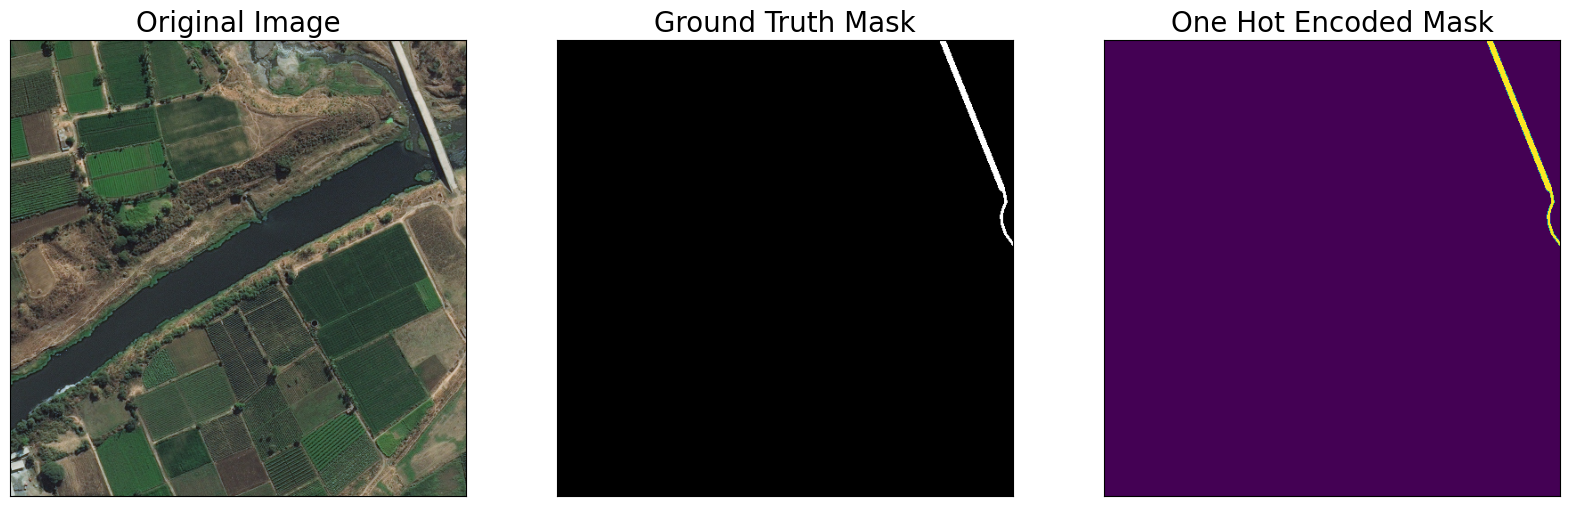

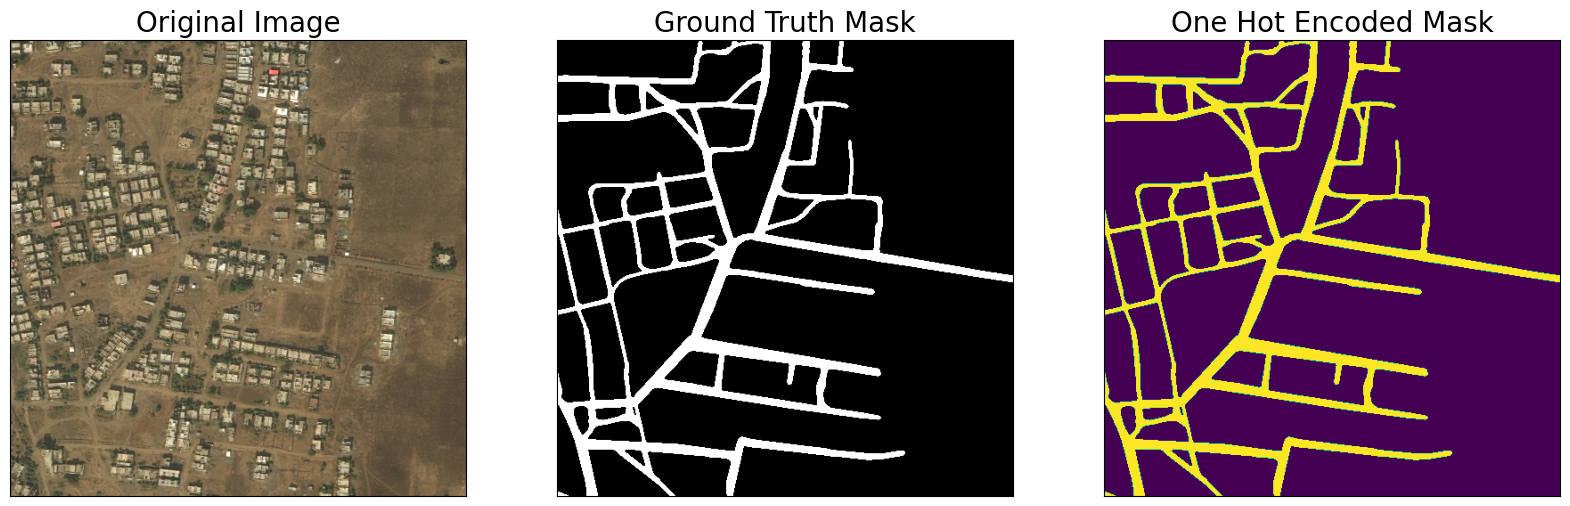

In [ ]:
augmented_dataset = RoadsDataset(
    train_df, 
    augmentation=get_training_augmentation(),
    class_rgb_values=select_class_rgb_values,
)

random_idx = random.randint(0, len(augmented_dataset)-1)

# Different augmentations on image/mask pairs
for idx in range(3):
    image, mask = augmented_dataset[idx]
    visualize(
        original_image = image,
        ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), select_class_rgb_values),
        one_hot_encoded_mask = reverse_one_hot(mask)
    )

In [ ]:
TRAIN_IMG_SIZE = (512, 512, 3)
VAL_IMG_SIZE = TRAIN_IMG_SIZE
TEST_IMG_SIZE = TRAIN_IMG_SIZE
N_CLASSES = 5
TRAIN_BATCH_SIZE = 1
VAL_BATCH_SIZE = TRAIN_BATCH_SIZE
TEST_BATCH_SIZE = TRAIN_BATCH_SIZE
NUM_EPOCHS = 10
TRAIN_NUM_WORKERS = 1
VAL_NUM_WORKERS = 1
TEST_NUM_WORKERS = 1
PIN_MEMORY = True
LEARNING_RATE = 0.001
DEVICE = 'cuda'

In [ ]:
ENCODER = 'mit_b0'
ENCODER_WEIGHTS = 'imagenet'

In [ ]:
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [ ]:
# Get train and val dataset instances
train_dataset = RoadsDataset(
    train_df, 
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

valid_dataset = RoadsDataset(
    valid_df, 
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=select_class_rgb_values,
)

# Get train and val data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=4)

In [ ]:
import segmentation_models_pytorch.utils

In [ ]:
for image,mask in train_loader:
  break
print(image.shape)
print(mask.shape)

torch.Size([1, 3, 512, 512])
torch.Size([1, 2, 512, 512])


In [ ]:
from segmentation_models_pytorch.losses import DiceLoss

In [ ]:
class SegmentationModel(nn.Module):
  def __init__(self):
    super(SegmentationModel, self).__init__()

    self.arc = ViT_seg(cfg,img_size=512, num_classes=2)

  def forward(self, images, masks = None):
      logits = self.arc(images)

      if masks != None:
        # loss1 = smp.utils.losses.DiceLoss()(logits, masks)
        # loss1 = smp.utils.losses.JaccardLoss()(logits,masks)
        loss2 = nn.BCEWithLogitsLoss()(logits,masks)
        metric1 = [smp.utils.metrics.IoU()(logits, masks)]
        metric2 = smp.utils.metrics.Accuracy()(logits,masks)
        return logits, loss2,metric1,metric2
      
      return logits

In [ ]:
model = SegmentationModel()
model.to(DEVICE)

SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.2;num_classes:2
---final upsample expand_first---


SegmentationModel(
  (arc): SwinUnet(
    (swin_unet): SwinTransformerSys(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): BasicLayer(
          dim=96, input_resolution=(128, 128), depth=2
          (blocks): ModuleList(
            (0): SwinTransformerBlock(
              dim=96, input_resolution=(128, 128), num_heads=3, window_size=32, shift_size=0, mlp_ratio=4.0
              (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                dim=96, window_size=(32, 32), num_heads=3
                (qkv): Linear(in_features=96, out_features=288, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=96, out_features=96, bias=True)
                (proj_drop): Drop

In [ ]:
def train_fn(data_loader, model, optimizer):
  model.train()
  total_loss = 0.0
  IoU = 0.0
  Accuracy = 0.0
  for images, masks in tqdm(data_loader):
    images = images.to(DEVICE)
    masks = masks.to(DEVICE)

    optimizer.zero_grad()
    logits, loss, metric1,metric2 = model(images, masks.float())
    loss.backward()
    optimizer.step()
    print(f' Accuracy:{metric2}')
    print(f'IoU: {metric1}')
    IoU += metric1[0]
    Accuracy+=metric2
    total_loss += loss.item()
  return total_loss/ len(data_loader), IoU/len(data_loader), Accuracy/len(data_loader)

In [ ]:
SMOOTH = 1e-6
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1)  # BATCH x 1 x H x W => BATCH x H x W
    
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    
    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds
    
    return thresholded 

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
from tqdm import tqdm

In [ ]:
summary(model,(3,512,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 128, 128]           4,704
         LayerNorm-2            [-1, 16384, 96]             192
        PatchEmbed-3            [-1, 16384, 96]               0
           Dropout-4            [-1, 16384, 96]               0
         LayerNorm-5            [-1, 16384, 96]             192
            Linear-6            [-1, 1024, 288]          27,936
           Softmax-7        [-1, 3, 1024, 1024]               0
           Dropout-8        [-1, 3, 1024, 1024]               0
            Linear-9             [-1, 1024, 96]           9,312
          Dropout-10             [-1, 1024, 96]               0
  WindowAttention-11             [-1, 1024, 96]               0
         Identity-12            [-1, 16384, 96]               0
        LayerNorm-13            [-1, 16384, 96]             192
           Linear-14           [-1, 163

In [ ]:
from torchsummary import summary

In [ ]:
best_valid_loss = np.Inf
for i in range(10):
  train_loss,IoU,Accuracy = train_fn(train_loader, model, optimizer)
  


  print(f"Epoch: {i+1} Train_loss: {train_loss}, IoU:{IoU}, Accuracy:{Accuracy}")

  0%|          | 1/5603 [00:01<1:52:25,  1.20s/it]

 Accuracy:0.963958740234375
IoU: [tensor(0.9302, device='cuda:0')]


  0%|          | 2/5603 [00:01<1:03:08,  1.48it/s]

 Accuracy:0.9599075317382812
IoU: [tensor(0.9227, device='cuda:0')]


  0%|          | 3/5603 [00:01<47:14,  1.98it/s]  

 Accuracy:0.9840412139892578
IoU: [tensor(0.9685, device='cuda:0')]


  0%|          | 4/5603 [00:02<40:00,  2.33it/s]

 Accuracy:0.9866580963134766
IoU: [tensor(0.9736, device='cuda:0')]


  0%|          | 5/5603 [00:02<35:53,  2.60it/s]

 Accuracy:0.9332618713378906
IoU: [tensor(0.8741, device='cuda:0')]


  0%|          | 6/5603 [00:02<33:22,  2.80it/s]

 Accuracy:0.8765869140625
IoU: [tensor(0.7781, device='cuda:0')]


  0%|          | 7/5603 [00:03<31:52,  2.93it/s]

 Accuracy:0.9449024200439453
IoU: [tensor(0.8949, device='cuda:0')]


  0%|          | 8/5603 [00:03<30:49,  3.02it/s]

 Accuracy:0.9741992950439453
IoU: [tensor(0.9495, device='cuda:0')]


  0%|          | 9/5603 [00:03<30:15,  3.08it/s]

 Accuracy:0.9828224182128906
IoU: [tensor(0.9661, device='cuda:0')]


  0%|          | 10/5603 [00:03<29:46,  3.13it/s]

 Accuracy:0.97021484375
IoU: [tensor(0.9419, device='cuda:0')]


  0%|          | 11/5603 [00:04<29:24,  3.17it/s]

 Accuracy:0.9932212829589844
IoU: [tensor(0.9865, device='cuda:0')]


  0%|          | 12/5603 [00:04<29:07,  3.20it/s]

 Accuracy:0.9600353240966797
IoU: [tensor(0.9228, device='cuda:0')]


  0%|          | 13/5603 [00:04<28:54,  3.22it/s]

 Accuracy:0.983489990234375
IoU: [tensor(0.9675, device='cuda:0')]


  0%|          | 14/5603 [00:05<28:54,  3.22it/s]

 Accuracy:0.9427604675292969
IoU: [tensor(0.8910, device='cuda:0')]


  0%|          | 15/5603 [00:05<28:57,  3.22it/s]

 Accuracy:0.9600582122802734
IoU: [tensor(0.9230, device='cuda:0')]


  0%|          | 16/5603 [00:05<28:51,  3.23it/s]

 Accuracy:0.9438247680664062
IoU: [tensor(0.8930, device='cuda:0')]


  0%|          | 17/5603 [00:06<28:45,  3.24it/s]

 Accuracy:0.8651981353759766
IoU: [tensor(0.7596, device='cuda:0')]


  0%|          | 18/5603 [00:06<28:47,  3.23it/s]

 Accuracy:0.9853057861328125
IoU: [tensor(0.9710, device='cuda:0')]


  0%|          | 19/5603 [00:06<28:49,  3.23it/s]

 Accuracy:0.8901309967041016
IoU: [tensor(0.7998, device='cuda:0')]


  0%|          | 20/5603 [00:07<28:45,  3.24it/s]

 Accuracy:0.9933948516845703
IoU: [tensor(0.9869, device='cuda:0')]


  0%|          | 21/5603 [00:07<28:50,  3.23it/s]

 Accuracy:0.9257259368896484
IoU: [tensor(0.8611, device='cuda:0')]


  0%|          | 22/5603 [00:07<28:55,  3.22it/s]

 Accuracy:0.9472675323486328
IoU: [tensor(0.8995, device='cuda:0')]


  0%|          | 23/5603 [00:07<29:00,  3.21it/s]

 Accuracy:0.9860935211181641
IoU: [tensor(0.9725, device='cuda:0')]


  0%|          | 24/5603 [00:08<29:00,  3.21it/s]

 Accuracy:0.8872661590576172
IoU: [tensor(0.7958, device='cuda:0')]


  0%|          | 25/5603 [00:08<29:04,  3.20it/s]

 Accuracy:0.9751853942871094
IoU: [tensor(0.9514, device='cuda:0')]


  0%|          | 26/5603 [00:08<29:01,  3.20it/s]

 Accuracy:0.9890193939208984
IoU: [tensor(0.9783, device='cuda:0')]


  0%|          | 27/5603 [00:09<28:58,  3.21it/s]

 Accuracy:0.9331760406494141
IoU: [tensor(0.8741, device='cuda:0')]


  0%|          | 28/5603 [00:09<29:14,  3.18it/s]

 Accuracy:0.9651546478271484
IoU: [tensor(0.9323, device='cuda:0')]


  1%|          | 29/5603 [00:09<29:10,  3.18it/s]

 Accuracy:0.9548816680908203
IoU: [tensor(0.9133, device='cuda:0')]


  1%|          | 30/5603 [00:10<29:11,  3.18it/s]

 Accuracy:0.9901981353759766
IoU: [tensor(0.9806, device='cuda:0')]


  1%|          | 31/5603 [00:10<29:39,  3.13it/s]

 Accuracy:0.9899368286132812
IoU: [tensor(0.9801, device='cuda:0')]


  1%|          | 32/5603 [00:10<29:23,  3.16it/s]

 Accuracy:0.9845981597900391
IoU: [tensor(0.9696, device='cuda:0')]


  1%|          | 33/5603 [00:11<29:31,  3.14it/s]

 Accuracy:0.9795322418212891
IoU: [tensor(0.9598, device='cuda:0')]


  1%|          | 34/5603 [00:11<29:15,  3.17it/s]

 Accuracy:0.9759922027587891
IoU: [tensor(0.9529, device='cuda:0')]


  1%|          | 35/5603 [00:11<29:27,  3.15it/s]

 Accuracy:0.9550437927246094
IoU: [tensor(0.9134, device='cuda:0')]


  1%|          | 36/5603 [00:12<29:17,  3.17it/s]

 Accuracy:0.9806251525878906
IoU: [tensor(0.9619, device='cuda:0')]


  1%|          | 37/5603 [00:12<29:10,  3.18it/s]

 Accuracy:0.8842945098876953
IoU: [tensor(0.7910, device='cuda:0')]


  1%|          | 38/5603 [00:12<29:10,  3.18it/s]

 Accuracy:0.9913711547851562
IoU: [tensor(0.9829, device='cuda:0')]


  1%|          | 39/5603 [00:13<29:27,  3.15it/s]

 Accuracy:0.9659652709960938
IoU: [tensor(0.9339, device='cuda:0')]


  1%|          | 40/5603 [00:13<29:16,  3.17it/s]

 Accuracy:0.9823436737060547
IoU: [tensor(0.9652, device='cuda:0')]


  1%|          | 41/5603 [00:13<29:12,  3.17it/s]

 Accuracy:0.9855823516845703
IoU: [tensor(0.9715, device='cuda:0')]


  1%|          | 42/5603 [00:13<29:06,  3.18it/s]

 Accuracy:0.9089508056640625
IoU: [tensor(0.8320, device='cuda:0')]


  1%|          | 43/5603 [00:14<29:03,  3.19it/s]

 Accuracy:0.9231681823730469
IoU: [tensor(0.8564, device='cuda:0')]


  1%|          | 44/5603 [00:14<29:02,  3.19it/s]

 Accuracy:0.9664478302001953
IoU: [tensor(0.9348, device='cuda:0')]


  1%|          | 45/5603 [00:14<28:59,  3.19it/s]

 Accuracy:0.8487129211425781
IoU: [tensor(0.7353, device='cuda:0')]


  1%|          | 46/5603 [00:15<29:04,  3.19it/s]

 Accuracy:0.9140892028808594
IoU: [tensor(0.8406, device='cuda:0')]


  1%|          | 47/5603 [00:15<28:58,  3.20it/s]

 Accuracy:0.9939384460449219
IoU: [tensor(0.9879, device='cuda:0')]


  1%|          | 48/5603 [00:15<29:01,  3.19it/s]

 Accuracy:0.9234828948974609
IoU: [tensor(0.8569, device='cuda:0')]


  1%|          | 49/5603 [00:16<28:54,  3.20it/s]

 Accuracy:0.9602108001708984
IoU: [tensor(0.9230, device='cuda:0')]


  1%|          | 50/5603 [00:16<29:09,  3.17it/s]

 Accuracy:0.9897289276123047
IoU: [tensor(0.9796, device='cuda:0')]


  1%|          | 51/5603 [00:16<29:13,  3.17it/s]

 Accuracy:0.9840373992919922
IoU: [tensor(0.9685, device='cuda:0')]


  1%|          | 52/5603 [00:17<29:10,  3.17it/s]

 Accuracy:0.9574680328369141
IoU: [tensor(0.9179, device='cuda:0')]


  1%|          | 53/5603 [00:17<29:08,  3.17it/s]

 Accuracy:0.9224185943603516
IoU: [tensor(0.8547, device='cuda:0')]


  1%|          | 54/5603 [00:17<29:02,  3.19it/s]

 Accuracy:0.9771385192871094
IoU: [tensor(0.9552, device='cuda:0')]


  1%|          | 55/5603 [00:18<29:08,  3.17it/s]

 Accuracy:0.9919528961181641
IoU: [tensor(0.9840, device='cuda:0')]


  1%|          | 56/5603 [00:18<29:03,  3.18it/s]

 Accuracy:0.9467697143554688
IoU: [tensor(0.8985, device='cuda:0')]


  1%|          | 57/5603 [00:18<29:11,  3.17it/s]

 Accuracy:0.9729385375976562
IoU: [tensor(0.9471, device='cuda:0')]


  1%|          | 58/5603 [00:19<29:09,  3.17it/s]

 Accuracy:0.9885520935058594
IoU: [tensor(0.9773, device='cuda:0')]


  1%|          | 59/5603 [00:19<29:07,  3.17it/s]

 Accuracy:0.9740238189697266
IoU: [tensor(0.9491, device='cuda:0')]


  1%|          | 60/5603 [00:19<29:06,  3.17it/s]

 Accuracy:0.9886856079101562
IoU: [tensor(0.9776, device='cuda:0')]


  1%|          | 61/5603 [00:19<29:04,  3.18it/s]

 Accuracy:0.9244670867919922
IoU: [tensor(0.8584, device='cuda:0')]


  1%|          | 62/5603 [00:20<29:04,  3.18it/s]

 Accuracy:0.9711666107177734
IoU: [tensor(0.9438, device='cuda:0')]


  1%|          | 63/5603 [00:20<29:00,  3.18it/s]

 Accuracy:0.9851303100585938
IoU: [tensor(0.9706, device='cuda:0')]


  1%|          | 64/5603 [00:20<29:06,  3.17it/s]

 Accuracy:0.972991943359375
IoU: [tensor(0.9473, device='cuda:0')]


  1%|          | 65/5603 [00:21<29:09,  3.17it/s]

 Accuracy:0.9610919952392578
IoU: [tensor(0.9249, device='cuda:0')]


  1%|          | 66/5603 [00:21<29:10,  3.16it/s]

 Accuracy:0.8474254608154297
IoU: [tensor(0.7333, device='cuda:0')]


  1%|          | 67/5603 [00:21<29:12,  3.16it/s]

 Accuracy:0.9884014129638672
IoU: [tensor(0.9770, device='cuda:0')]


  1%|          | 68/5603 [00:22<29:10,  3.16it/s]

 Accuracy:0.9828529357910156
IoU: [tensor(0.9662, device='cuda:0')]


  1%|          | 69/5603 [00:22<29:13,  3.16it/s]

 Accuracy:0.8884544372558594
IoU: [tensor(0.7980, device='cuda:0')]


  1%|          | 70/5603 [00:22<29:12,  3.16it/s]

 Accuracy:0.9703540802001953
IoU: [tensor(0.9423, device='cuda:0')]


  1%|▏         | 71/5603 [00:23<29:06,  3.17it/s]

 Accuracy:0.9856834411621094
IoU: [tensor(0.9717, device='cuda:0')]


  1%|▏         | 72/5603 [00:23<29:34,  3.12it/s]

 Accuracy:0.9898014068603516
IoU: [tensor(0.9798, device='cuda:0')]


  1%|▏         | 73/5603 [00:23<29:29,  3.12it/s]

 Accuracy:0.9812545776367188
IoU: [tensor(0.9632, device='cuda:0')]


  1%|▏         | 74/5603 [00:24<29:33,  3.12it/s]

 Accuracy:0.9865627288818359
IoU: [tensor(0.9735, device='cuda:0')]


  1%|▏         | 75/5603 [00:24<29:29,  3.12it/s]

 Accuracy:0.9823074340820312
IoU: [tensor(0.9652, device='cuda:0')]


  1%|▏         | 76/5603 [00:24<29:32,  3.12it/s]

 Accuracy:0.9277420043945312
IoU: [tensor(0.8645, device='cuda:0')]


  1%|▏         | 77/5603 [00:25<29:41,  3.10it/s]

 Accuracy:0.9285106658935547
IoU: [tensor(0.8657, device='cuda:0')]


  1%|▏         | 78/5603 [00:25<29:37,  3.11it/s]

 Accuracy:0.9101352691650391
IoU: [tensor(0.8336, device='cuda:0')]


  1%|▏         | 79/5603 [00:25<29:41,  3.10it/s]

 Accuracy:0.9902229309082031
IoU: [tensor(0.9806, device='cuda:0')]


  1%|▏         | 80/5603 [00:26<29:44,  3.09it/s]

 Accuracy:0.8847618103027344
IoU: [tensor(0.7914, device='cuda:0')]


  1%|▏         | 81/5603 [00:26<29:44,  3.09it/s]

 Accuracy:0.96160888671875
IoU: [tensor(0.9256, device='cuda:0')]


  1%|▏         | 82/5603 [00:26<29:49,  3.09it/s]

 Accuracy:0.969635009765625
IoU: [tensor(0.9410, device='cuda:0')]


  1%|▏         | 83/5603 [00:27<29:44,  3.09it/s]

 Accuracy:0.9974250793457031
IoU: [tensor(0.9949, device='cuda:0')]


  1%|▏         | 84/5603 [00:27<29:36,  3.11it/s]

 Accuracy:0.9796028137207031
IoU: [tensor(0.9599, device='cuda:0')]


  2%|▏         | 85/5603 [00:27<29:26,  3.12it/s]

 Accuracy:0.9163684844970703
IoU: [tensor(0.8447, device='cuda:0')]


  2%|▏         | 86/5603 [00:27<29:21,  3.13it/s]

 Accuracy:0.9783477783203125
IoU: [tensor(0.9575, device='cuda:0')]


  2%|▏         | 87/5603 [00:28<29:10,  3.15it/s]

 Accuracy:0.8841495513916016
IoU: [tensor(0.7911, device='cuda:0')]


  2%|▏         | 88/5603 [00:28<29:15,  3.14it/s]

 Accuracy:0.9854145050048828
IoU: [tensor(0.9712, device='cuda:0')]


  2%|▏         | 89/5603 [00:28<29:18,  3.14it/s]

 Accuracy:0.9872245788574219
IoU: [tensor(0.9748, device='cuda:0')]


  2%|▏         | 90/5603 [00:29<29:15,  3.14it/s]

 Accuracy:0.9612236022949219
IoU: [tensor(0.9249, device='cuda:0')]


  2%|▏         | 91/5603 [00:29<29:07,  3.15it/s]

 Accuracy:0.9788532257080078
IoU: [tensor(0.9585, device='cuda:0')]


  2%|▏         | 92/5603 [00:29<29:06,  3.15it/s]

 Accuracy:0.9297409057617188
IoU: [tensor(0.8679, device='cuda:0')]


  2%|▏         | 93/5603 [00:30<29:12,  3.14it/s]

 Accuracy:0.9650363922119141
IoU: [tensor(0.9321, device='cuda:0')]


  2%|▏         | 94/5603 [00:30<29:10,  3.15it/s]

 Accuracy:0.9797916412353516
IoU: [tensor(0.9603, device='cuda:0')]


  2%|▏         | 95/5603 [00:30<29:11,  3.15it/s]

 Accuracy:0.9806385040283203
IoU: [tensor(0.9619, device='cuda:0')]


  2%|▏         | 96/5603 [00:31<29:08,  3.15it/s]

 Accuracy:0.9154281616210938
IoU: [tensor(0.8433, device='cuda:0')]


  2%|▏         | 97/5603 [00:31<29:13,  3.14it/s]

 Accuracy:0.9854717254638672
IoU: [tensor(0.9713, device='cuda:0')]


  2%|▏         | 98/5603 [00:31<29:05,  3.15it/s]

 Accuracy:0.9864978790283203
IoU: [tensor(0.9733, device='cuda:0')]


  2%|▏         | 99/5603 [00:32<29:03,  3.16it/s]

 Accuracy:0.9747180938720703
IoU: [tensor(0.9506, device='cuda:0')]


  2%|▏         | 100/5603 [00:32<29:04,  3.15it/s]

 Accuracy:0.9042835235595703
IoU: [tensor(0.8237, device='cuda:0')]


  2%|▏         | 101/5603 [00:32<29:05,  3.15it/s]

 Accuracy:0.8684825897216797
IoU: [tensor(0.7649, device='cuda:0')]


  2%|▏         | 102/5603 [00:33<29:09,  3.15it/s]

 Accuracy:0.9806938171386719
IoU: [tensor(0.9620, device='cuda:0')]


  2%|▏         | 103/5603 [00:33<29:02,  3.16it/s]

 Accuracy:0.9852638244628906
IoU: [tensor(0.9709, device='cuda:0')]


  2%|▏         | 104/5603 [00:33<28:56,  3.17it/s]

 Accuracy:0.9660587310791016
IoU: [tensor(0.9341, device='cuda:0')]


  2%|▏         | 105/5603 [00:33<28:54,  3.17it/s]

 Accuracy:0.93438720703125
IoU: [tensor(0.8760, device='cuda:0')]


  2%|▏         | 106/5603 [00:34<28:51,  3.17it/s]

 Accuracy:0.9788093566894531
IoU: [tensor(0.9584, device='cuda:0')]


  2%|▏         | 107/5603 [00:34<28:52,  3.17it/s]

 Accuracy:0.9743976593017578
IoU: [tensor(0.9499, device='cuda:0')]


  2%|▏         | 108/5603 [00:34<28:53,  3.17it/s]

 Accuracy:0.9221534729003906
IoU: [tensor(0.8545, device='cuda:0')]


  2%|▏         | 109/5603 [00:35<28:50,  3.17it/s]

 Accuracy:0.9398403167724609
IoU: [tensor(0.8860, device='cuda:0')]


  2%|▏         | 110/5603 [00:35<28:48,  3.18it/s]

 Accuracy:0.9877090454101562
IoU: [tensor(0.9757, device='cuda:0')]


  2%|▏         | 111/5603 [00:35<28:41,  3.19it/s]

 Accuracy:0.9714336395263672
IoU: [tensor(0.9442, device='cuda:0')]


  2%|▏         | 112/5603 [00:36<28:46,  3.18it/s]

 Accuracy:0.8781776428222656
IoU: [tensor(0.7811, device='cuda:0')]


  2%|▏         | 113/5603 [00:36<28:47,  3.18it/s]

 Accuracy:0.9130496978759766
IoU: [tensor(0.8389, device='cuda:0')]


  2%|▏         | 114/5603 [00:36<28:47,  3.18it/s]

 Accuracy:0.977020263671875
IoU: [tensor(0.9550, device='cuda:0')]


  2%|▏         | 115/5603 [00:37<28:54,  3.16it/s]

 Accuracy:0.9821052551269531
IoU: [tensor(0.9647, device='cuda:0')]


  2%|▏         | 116/5603 [00:37<29:07,  3.14it/s]

 Accuracy:0.9736404418945312
IoU: [tensor(0.9485, device='cuda:0')]


  2%|▏         | 117/5603 [00:37<29:03,  3.15it/s]

 Accuracy:0.9146614074707031
IoU: [tensor(0.8416, device='cuda:0')]


  2%|▏         | 118/5603 [00:38<29:00,  3.15it/s]

 Accuracy:0.9921607971191406
IoU: [tensor(0.9844, device='cuda:0')]


  2%|▏         | 119/5603 [00:38<29:04,  3.14it/s]

 Accuracy:0.9874591827392578
IoU: [tensor(0.9752, device='cuda:0')]


  2%|▏         | 120/5603 [00:38<29:13,  3.13it/s]

 Accuracy:0.9876556396484375
IoU: [tensor(0.9756, device='cuda:0')]


  2%|▏         | 121/5603 [00:39<29:06,  3.14it/s]

 Accuracy:0.8855209350585938
IoU: [tensor(0.7920, device='cuda:0')]


  2%|▏         | 122/5603 [00:39<28:57,  3.15it/s]

 Accuracy:0.9804534912109375
IoU: [tensor(0.9615, device='cuda:0')]


  2%|▏         | 123/5603 [00:39<29:03,  3.14it/s]

 Accuracy:0.9318408966064453
IoU: [tensor(0.8714, device='cuda:0')]


  2%|▏         | 124/5603 [00:39<28:51,  3.16it/s]

 Accuracy:0.9653415679931641
IoU: [tensor(0.9328, device='cuda:0')]


  2%|▏         | 125/5603 [00:40<28:53,  3.16it/s]

 Accuracy:0.9928703308105469
IoU: [tensor(0.9858, device='cuda:0')]


  2%|▏         | 126/5603 [00:40<29:03,  3.14it/s]

 Accuracy:0.9864654541015625
IoU: [tensor(0.9732, device='cuda:0')]


  2%|▏         | 127/5603 [00:40<28:53,  3.16it/s]

 Accuracy:0.9790248870849609
IoU: [tensor(0.9588, device='cuda:0')]


  2%|▏         | 128/5603 [00:41<28:47,  3.17it/s]

 Accuracy:0.9656829833984375
IoU: [tensor(0.9333, device='cuda:0')]


  2%|▏         | 129/5603 [00:41<28:42,  3.18it/s]

 Accuracy:0.9854373931884766
IoU: [tensor(0.9712, device='cuda:0')]


  2%|▏         | 130/5603 [00:41<28:34,  3.19it/s]

 Accuracy:0.9911155700683594
IoU: [tensor(0.9824, device='cuda:0')]


  2%|▏         | 131/5603 [00:42<28:30,  3.20it/s]

 Accuracy:0.9922752380371094
IoU: [tensor(0.9846, device='cuda:0')]


  2%|▏         | 132/5603 [00:42<28:29,  3.20it/s]

 Accuracy:0.966705322265625
IoU: [tensor(0.9353, device='cuda:0')]


  2%|▏         | 133/5603 [00:42<28:26,  3.21it/s]

 Accuracy:0.9798641204833984
IoU: [tensor(0.9605, device='cuda:0')]


  2%|▏         | 134/5603 [00:43<28:24,  3.21it/s]

 Accuracy:0.9168167114257812
IoU: [tensor(0.8456, device='cuda:0')]


  2%|▏         | 135/5603 [00:43<28:25,  3.21it/s]

 Accuracy:0.9924602508544922
IoU: [tensor(0.9850, device='cuda:0')]


  2%|▏         | 136/5603 [00:43<28:34,  3.19it/s]

 Accuracy:0.9724235534667969
IoU: [tensor(0.9461, device='cuda:0')]


  2%|▏         | 137/5603 [00:44<28:29,  3.20it/s]

 Accuracy:0.8688697814941406
IoU: [tensor(0.7650, device='cuda:0')]


  2%|▏         | 138/5603 [00:44<28:27,  3.20it/s]

 Accuracy:0.9628505706787109
IoU: [tensor(0.9280, device='cuda:0')]


  2%|▏         | 139/5603 [00:44<28:27,  3.20it/s]

 Accuracy:0.9902362823486328
IoU: [tensor(0.9806, device='cuda:0')]


  2%|▏         | 140/5603 [00:44<28:26,  3.20it/s]

 Accuracy:0.9831314086914062
IoU: [tensor(0.9667, device='cuda:0')]


  3%|▎         | 141/5603 [00:45<28:32,  3.19it/s]

 Accuracy:0.9838752746582031
IoU: [tensor(0.9682, device='cuda:0')]


  3%|▎         | 142/5603 [00:45<28:31,  3.19it/s]

 Accuracy:0.9704380035400391
IoU: [tensor(0.9424, device='cuda:0')]


  3%|▎         | 143/5603 [00:45<28:27,  3.20it/s]

 Accuracy:0.8709335327148438
IoU: [tensor(0.7685, device='cuda:0')]


  3%|▎         | 144/5603 [00:46<28:25,  3.20it/s]

 Accuracy:0.9350471496582031
IoU: [tensor(0.8771, device='cuda:0')]


  3%|▎         | 145/5603 [00:46<28:18,  3.21it/s]

 Accuracy:0.98187255859375
IoU: [tensor(0.9643, device='cuda:0')]


  3%|▎         | 146/5603 [00:46<28:09,  3.23it/s]

 Accuracy:0.9803905487060547
IoU: [tensor(0.9615, device='cuda:0')]


  3%|▎         | 147/5603 [00:47<28:15,  3.22it/s]

 Accuracy:0.9590339660644531
IoU: [tensor(0.9207, device='cuda:0')]


  3%|▎         | 148/5603 [00:47<28:17,  3.21it/s]

 Accuracy:0.9770603179931641
IoU: [tensor(0.9550, device='cuda:0')]


  3%|▎         | 149/5603 [00:47<28:12,  3.22it/s]

 Accuracy:0.9716167449951172
IoU: [tensor(0.9446, device='cuda:0')]


  3%|▎         | 150/5603 [00:48<28:13,  3.22it/s]

 Accuracy:0.9829883575439453
IoU: [tensor(0.9665, device='cuda:0')]


  3%|▎         | 151/5603 [00:48<28:16,  3.21it/s]

 Accuracy:0.9663410186767578
IoU: [tensor(0.9347, device='cuda:0')]


  3%|▎         | 152/5603 [00:48<28:15,  3.22it/s]

 Accuracy:0.9808254241943359
IoU: [tensor(0.9623, device='cuda:0')]


  3%|▎         | 153/5603 [00:49<28:14,  3.22it/s]

 Accuracy:0.9753284454345703
IoU: [tensor(0.9517, device='cuda:0')]


  3%|▎         | 154/5603 [00:49<28:08,  3.23it/s]

 Accuracy:0.9753837585449219
IoU: [tensor(0.9518, device='cuda:0')]


  3%|▎         | 155/5603 [00:49<28:06,  3.23it/s]

 Accuracy:0.9414863586425781
IoU: [tensor(0.8889, device='cuda:0')]


  3%|▎         | 156/5603 [00:49<28:04,  3.23it/s]

 Accuracy:0.9940853118896484
IoU: [tensor(0.9882, device='cuda:0')]


  3%|▎         | 157/5603 [00:50<28:02,  3.24it/s]

 Accuracy:0.9075222015380859
IoU: [tensor(0.8289, device='cuda:0')]


  3%|▎         | 158/5603 [00:50<28:00,  3.24it/s]

 Accuracy:0.9571514129638672
IoU: [tensor(0.9177, device='cuda:0')]


  3%|▎         | 159/5603 [00:50<28:03,  3.23it/s]

 Accuracy:0.9792213439941406
IoU: [tensor(0.9592, device='cuda:0')]


  3%|▎         | 160/5603 [00:51<28:13,  3.21it/s]

 Accuracy:0.9132671356201172
IoU: [tensor(0.8392, device='cuda:0')]


  3%|▎         | 161/5603 [00:51<28:08,  3.22it/s]

 Accuracy:0.9728374481201172
IoU: [tensor(0.9469, device='cuda:0')]


  3%|▎         | 162/5603 [00:51<28:07,  3.22it/s]

 Accuracy:0.9082431793212891
IoU: [tensor(0.8306, device='cuda:0')]


  3%|▎         | 163/5603 [00:52<28:07,  3.22it/s]

 Accuracy:0.9744682312011719
IoU: [tensor(0.9501, device='cuda:0')]


  3%|▎         | 164/5603 [00:52<28:08,  3.22it/s]

 Accuracy:0.9024791717529297
IoU: [tensor(0.8206, device='cuda:0')]


  3%|▎         | 165/5603 [00:52<28:16,  3.21it/s]

 Accuracy:0.9931182861328125
IoU: [tensor(0.9863, device='cuda:0')]


  3%|▎         | 166/5603 [00:53<28:06,  3.22it/s]

 Accuracy:0.9771537780761719
IoU: [tensor(0.9552, device='cuda:0')]


  3%|▎         | 167/5603 [00:53<28:33,  3.17it/s]

 Accuracy:0.9496440887451172
IoU: [tensor(0.9038, device='cuda:0')]


  3%|▎         | 168/5603 [00:53<28:33,  3.17it/s]

 Accuracy:0.9490432739257812
IoU: [tensor(0.9026, device='cuda:0')]


  3%|▎         | 169/5603 [00:54<28:46,  3.15it/s]

 Accuracy:0.9705295562744141
IoU: [tensor(0.9425, device='cuda:0')]


  3%|▎         | 170/5603 [00:54<28:48,  3.14it/s]

 Accuracy:0.9488792419433594
IoU: [tensor(0.9023, device='cuda:0')]


  3%|▎         | 171/5603 [00:54<28:43,  3.15it/s]

 Accuracy:0.9508628845214844
IoU: [tensor(0.9057, device='cuda:0')]


  3%|▎         | 172/5603 [00:54<28:32,  3.17it/s]

 Accuracy:0.9921951293945312
IoU: [tensor(0.9845, device='cuda:0')]


  3%|▎         | 173/5603 [00:55<28:34,  3.17it/s]

 Accuracy:0.9549121856689453
IoU: [tensor(0.9133, device='cuda:0')]


  3%|▎         | 174/5603 [00:55<28:18,  3.20it/s]

 Accuracy:0.9817409515380859
IoU: [tensor(0.9641, device='cuda:0')]


  3%|▎         | 175/5603 [00:55<28:10,  3.21it/s]

 Accuracy:0.9385089874267578
IoU: [tensor(0.8836, device='cuda:0')]


  3%|▎         | 176/5603 [00:56<27:56,  3.24it/s]

 Accuracy:0.9804840087890625
IoU: [tensor(0.9616, device='cuda:0')]


  3%|▎         | 177/5603 [00:56<27:53,  3.24it/s]

 Accuracy:0.8753147125244141
IoU: [tensor(0.7762, device='cuda:0')]


  3%|▎         | 178/5603 [00:56<28:00,  3.23it/s]

 Accuracy:0.9930152893066406
IoU: [tensor(0.9861, device='cuda:0')]


  3%|▎         | 179/5603 [00:57<27:54,  3.24it/s]

 Accuracy:0.9493350982666016
IoU: [tensor(0.9031, device='cuda:0')]


  3%|▎         | 180/5603 [00:57<27:56,  3.23it/s]

 Accuracy:0.7631912231445312
IoU: [tensor(0.6124, device='cuda:0')]


  3%|▎         | 181/5603 [00:57<27:55,  3.24it/s]

 Accuracy:0.9315185546875
IoU: [tensor(0.8712, device='cuda:0')]


  3%|▎         | 182/5603 [00:58<27:48,  3.25it/s]

 Accuracy:0.9682025909423828
IoU: [tensor(0.9380, device='cuda:0')]


  3%|▎         | 183/5603 [00:58<27:56,  3.23it/s]

 Accuracy:0.985504150390625
IoU: [tensor(0.9714, device='cuda:0')]


  3%|▎         | 184/5603 [00:58<27:56,  3.23it/s]

 Accuracy:0.9877147674560547
IoU: [tensor(0.9757, device='cuda:0')]


  3%|▎         | 185/5603 [00:58<27:50,  3.24it/s]

 Accuracy:0.9259052276611328
IoU: [tensor(0.8608, device='cuda:0')]


  3%|▎         | 186/5603 [00:59<27:51,  3.24it/s]

 Accuracy:0.9801921844482422
IoU: [tensor(0.9611, device='cuda:0')]


  3%|▎         | 187/5603 [00:59<27:51,  3.24it/s]

 Accuracy:0.9574832916259766
IoU: [tensor(0.9181, device='cuda:0')]


  3%|▎         | 188/5603 [00:59<27:52,  3.24it/s]

 Accuracy:0.9701576232910156
IoU: [tensor(0.9418, device='cuda:0')]


  3%|▎         | 189/5603 [01:00<27:56,  3.23it/s]

 Accuracy:0.8459949493408203
IoU: [tensor(0.7306, device='cuda:0')]


  3%|▎         | 190/5603 [01:00<27:58,  3.23it/s]

 Accuracy:0.9837665557861328
IoU: [tensor(0.9679, device='cuda:0')]


  3%|▎         | 191/5603 [01:00<28:05,  3.21it/s]

 Accuracy:0.9864463806152344
IoU: [tensor(0.9732, device='cuda:0')]


  3%|▎         | 192/5603 [01:01<27:59,  3.22it/s]

 Accuracy:0.9863929748535156
IoU: [tensor(0.9731, device='cuda:0')]


  3%|▎         | 193/5603 [01:01<27:59,  3.22it/s]

 Accuracy:0.9887275695800781
IoU: [tensor(0.9777, device='cuda:0')]


  3%|▎         | 194/5603 [01:01<28:01,  3.22it/s]

 Accuracy:0.9370670318603516
IoU: [tensor(0.8810, device='cuda:0')]


  3%|▎         | 195/5603 [01:02<27:48,  3.24it/s]

 Accuracy:0.9212646484375
IoU: [tensor(0.8529, device='cuda:0')]


  3%|▎         | 196/5603 [01:02<27:50,  3.24it/s]

 Accuracy:0.8442535400390625
IoU: [tensor(0.7273, device='cuda:0')]


  4%|▎         | 197/5603 [01:02<27:51,  3.23it/s]

 Accuracy:0.9823093414306641
IoU: [tensor(0.9652, device='cuda:0')]


  4%|▎         | 198/5603 [01:03<27:54,  3.23it/s]

 Accuracy:0.9454898834228516
IoU: [tensor(0.8961, device='cuda:0')]


  4%|▎         | 199/5603 [01:03<28:01,  3.21it/s]

 Accuracy:0.9798755645751953
IoU: [tensor(0.9604, device='cuda:0')]


  4%|▎         | 200/5603 [01:03<28:02,  3.21it/s]

 Accuracy:0.9066905975341797
IoU: [tensor(0.8280, device='cuda:0')]


  4%|▎         | 201/5603 [01:03<27:53,  3.23it/s]

 Accuracy:0.8614921569824219
IoU: [tensor(0.7538, device='cuda:0')]


  4%|▎         | 202/5603 [01:04<27:51,  3.23it/s]

 Accuracy:0.9810848236083984
IoU: [tensor(0.9628, device='cuda:0')]


  4%|▎         | 203/5603 [01:04<27:47,  3.24it/s]

 Accuracy:0.9806251525878906
IoU: [tensor(0.9619, device='cuda:0')]


  4%|▎         | 204/5603 [01:04<27:45,  3.24it/s]

 Accuracy:0.953369140625
IoU: [tensor(0.9104, device='cuda:0')]


  4%|▎         | 205/5603 [01:05<27:48,  3.24it/s]

 Accuracy:0.9801139831542969
IoU: [tensor(0.9609, device='cuda:0')]


  4%|▎         | 206/5603 [01:05<27:50,  3.23it/s]

 Accuracy:0.9685325622558594
IoU: [tensor(0.9388, device='cuda:0')]


  4%|▎         | 207/5603 [01:05<27:50,  3.23it/s]

 Accuracy:0.9610939025878906
IoU: [tensor(0.9248, device='cuda:0')]


  4%|▎         | 208/5603 [01:06<28:09,  3.19it/s]

 Accuracy:0.9930763244628906
IoU: [tensor(0.9862, device='cuda:0')]


  4%|▎         | 209/5603 [01:06<28:04,  3.20it/s]

 Accuracy:0.931396484375
IoU: [tensor(0.8711, device='cuda:0')]


  4%|▎         | 210/5603 [01:06<27:59,  3.21it/s]

 Accuracy:0.9810161590576172
IoU: [tensor(0.9627, device='cuda:0')]


  4%|▍         | 211/5603 [01:07<28:02,  3.20it/s]

 Accuracy:0.9755687713623047
IoU: [tensor(0.9522, device='cuda:0')]


  4%|▍         | 212/5603 [01:07<28:07,  3.19it/s]

 Accuracy:0.9769020080566406
IoU: [tensor(0.9547, device='cuda:0')]


  4%|▍         | 213/5603 [01:07<28:22,  3.17it/s]

 Accuracy:0.9879302978515625
IoU: [tensor(0.9761, device='cuda:0')]


  4%|▍         | 214/5603 [01:08<28:10,  3.19it/s]

 Accuracy:0.9784564971923828
IoU: [tensor(0.9577, device='cuda:0')]


  4%|▍         | 215/5603 [01:08<28:08,  3.19it/s]

 Accuracy:0.9867324829101562
IoU: [tensor(0.9738, device='cuda:0')]


  4%|▍         | 216/5603 [01:08<27:58,  3.21it/s]

 Accuracy:0.9732379913330078
IoU: [tensor(0.9478, device='cuda:0')]


  4%|▍         | 217/5603 [01:08<28:08,  3.19it/s]

 Accuracy:0.9392814636230469
IoU: [tensor(0.8849, device='cuda:0')]


  4%|▍         | 218/5603 [01:09<28:01,  3.20it/s]

 Accuracy:0.9899425506591797
IoU: [tensor(0.9801, device='cuda:0')]


  4%|▍         | 219/5603 [01:09<27:52,  3.22it/s]

 Accuracy:0.9827175140380859
IoU: [tensor(0.9659, device='cuda:0')]


  4%|▍         | 220/5603 [01:09<27:43,  3.24it/s]

 Accuracy:0.9917030334472656
IoU: [tensor(0.9835, device='cuda:0')]


  4%|▍         | 221/5603 [01:10<27:47,  3.23it/s]

 Accuracy:0.9207763671875
IoU: [tensor(0.8521, device='cuda:0')]


  4%|▍         | 222/5603 [01:10<27:53,  3.22it/s]

 Accuracy:0.9058017730712891
IoU: [tensor(0.8261, device='cuda:0')]


  4%|▍         | 223/5603 [01:10<27:44,  3.23it/s]

 Accuracy:0.9911041259765625
IoU: [tensor(0.9823, device='cuda:0')]


  4%|▍         | 224/5603 [01:11<27:41,  3.24it/s]

 Accuracy:0.9829349517822266
IoU: [tensor(0.9664, device='cuda:0')]


  4%|▍         | 225/5603 [01:11<27:50,  3.22it/s]

 Accuracy:0.9889888763427734
IoU: [tensor(0.9782, device='cuda:0')]


  4%|▍         | 226/5603 [01:11<27:48,  3.22it/s]

 Accuracy:0.9543437957763672
IoU: [tensor(0.9124, device='cuda:0')]


  4%|▍         | 227/5603 [01:12<27:45,  3.23it/s]

 Accuracy:0.988525390625
IoU: [tensor(0.9773, device='cuda:0')]


  4%|▍         | 228/5603 [01:12<27:53,  3.21it/s]

 Accuracy:0.9725055694580078
IoU: [tensor(0.9463, device='cuda:0')]


  4%|▍         | 229/5603 [01:12<27:59,  3.20it/s]

 Accuracy:0.9923439025878906
IoU: [tensor(0.9848, device='cuda:0')]


  4%|▍         | 230/5603 [01:12<27:54,  3.21it/s]

 Accuracy:0.9916152954101562
IoU: [tensor(0.9833, device='cuda:0')]


  4%|▍         | 231/5603 [01:13<28:00,  3.20it/s]

 Accuracy:0.9841327667236328
IoU: [tensor(0.9687, device='cuda:0')]


  4%|▍         | 232/5603 [01:13<27:55,  3.20it/s]

 Accuracy:0.9344120025634766
IoU: [tensor(0.8760, device='cuda:0')]


  4%|▍         | 233/5603 [01:13<27:50,  3.22it/s]

 Accuracy:0.9828147888183594
IoU: [tensor(0.9662, device='cuda:0')]


  4%|▍         | 234/5603 [01:14<27:51,  3.21it/s]

 Accuracy:0.9807147979736328
IoU: [tensor(0.9620, device='cuda:0')]


  4%|▍         | 235/5603 [01:14<27:46,  3.22it/s]

 Accuracy:0.9876422882080078
IoU: [tensor(0.9755, device='cuda:0')]


  4%|▍         | 236/5603 [01:14<27:38,  3.24it/s]

 Accuracy:0.9818382263183594
IoU: [tensor(0.9643, device='cuda:0')]


  4%|▍         | 237/5603 [01:15<27:44,  3.22it/s]

 Accuracy:0.9495143890380859
IoU: [tensor(0.9034, device='cuda:0')]


  4%|▍         | 238/5603 [01:15<27:41,  3.23it/s]

 Accuracy:0.9772434234619141
IoU: [tensor(0.9554, device='cuda:0')]


  4%|▍         | 239/5603 [01:15<27:46,  3.22it/s]

 Accuracy:0.9860286712646484
IoU: [tensor(0.9724, device='cuda:0')]


  4%|▍         | 240/5603 [01:16<27:51,  3.21it/s]

 Accuracy:0.9690361022949219
IoU: [tensor(0.9396, device='cuda:0')]


  4%|▍         | 241/5603 [01:16<27:43,  3.22it/s]

 Accuracy:0.9919700622558594
IoU: [tensor(0.9841, device='cuda:0')]


  4%|▍         | 242/5603 [01:16<27:39,  3.23it/s]

 Accuracy:0.9943752288818359
IoU: [tensor(0.9888, device='cuda:0')]


  4%|▍         | 243/5603 [01:17<27:54,  3.20it/s]

 Accuracy:0.9927806854248047
IoU: [tensor(0.9857, device='cuda:0')]


  4%|▍         | 244/5603 [01:17<27:55,  3.20it/s]

 Accuracy:0.8661479949951172
IoU: [tensor(0.7618, device='cuda:0')]


  4%|▍         | 245/5603 [01:17<27:43,  3.22it/s]

 Accuracy:0.9837245941162109
IoU: [tensor(0.9679, device='cuda:0')]


  4%|▍         | 246/5603 [01:17<27:39,  3.23it/s]

 Accuracy:0.8808555603027344
IoU: [tensor(0.7856, device='cuda:0')]


  4%|▍         | 247/5603 [01:18<27:41,  3.22it/s]

 Accuracy:0.9772319793701172
IoU: [tensor(0.9554, device='cuda:0')]


  4%|▍         | 248/5603 [01:18<27:42,  3.22it/s]

 Accuracy:0.9588298797607422
IoU: [tensor(0.9204, device='cuda:0')]


  4%|▍         | 249/5603 [01:18<27:48,  3.21it/s]

 Accuracy:0.9192466735839844
IoU: [tensor(0.8493, device='cuda:0')]


  4%|▍         | 250/5603 [01:19<27:46,  3.21it/s]

 Accuracy:0.9835624694824219
IoU: [tensor(0.9676, device='cuda:0')]


  4%|▍         | 251/5603 [01:19<27:41,  3.22it/s]

 Accuracy:0.9287452697753906
IoU: [tensor(0.8656, device='cuda:0')]


  4%|▍         | 252/5603 [01:19<27:46,  3.21it/s]

 Accuracy:0.9555778503417969
IoU: [tensor(0.9146, device='cuda:0')]


  5%|▍         | 253/5603 [01:20<27:37,  3.23it/s]

 Accuracy:0.9937553405761719
IoU: [tensor(0.9876, device='cuda:0')]


  5%|▍         | 254/5603 [01:20<27:42,  3.22it/s]

 Accuracy:0.9905452728271484
IoU: [tensor(0.9812, device='cuda:0')]


  5%|▍         | 255/5603 [01:20<27:36,  3.23it/s]

 Accuracy:0.9818096160888672
IoU: [tensor(0.9642, device='cuda:0')]


  5%|▍         | 256/5603 [01:21<28:02,  3.18it/s]

 Accuracy:0.9262371063232422
IoU: [tensor(0.8612, device='cuda:0')]


  5%|▍         | 257/5603 [01:21<27:52,  3.20it/s]

 Accuracy:0.9533157348632812
IoU: [tensor(0.9105, device='cuda:0')]


  5%|▍         | 258/5603 [01:21<27:52,  3.20it/s]

 Accuracy:0.9934329986572266
IoU: [tensor(0.9869, device='cuda:0')]


  5%|▍         | 259/5603 [01:22<28:14,  3.15it/s]

 Accuracy:0.9792499542236328
IoU: [tensor(0.9592, device='cuda:0')]


  5%|▍         | 260/5603 [01:22<28:08,  3.16it/s]

 Accuracy:0.9880752563476562
IoU: [tensor(0.9764, device='cuda:0')]


  5%|▍         | 261/5603 [01:22<28:07,  3.16it/s]

 Accuracy:0.9913978576660156
IoU: [tensor(0.9829, device='cuda:0')]


  5%|▍         | 262/5603 [01:22<28:01,  3.18it/s]

 Accuracy:0.985260009765625
IoU: [tensor(0.9709, device='cuda:0')]


  5%|▍         | 263/5603 [01:23<27:53,  3.19it/s]

 Accuracy:0.9888362884521484
IoU: [tensor(0.9779, device='cuda:0')]


  5%|▍         | 264/5603 [01:23<27:52,  3.19it/s]

 Accuracy:0.9606800079345703
IoU: [tensor(0.9240, device='cuda:0')]


  5%|▍         | 265/5603 [01:23<27:50,  3.20it/s]

 Accuracy:0.9841785430908203
IoU: [tensor(0.9688, device='cuda:0')]


  5%|▍         | 266/5603 [01:24<27:49,  3.20it/s]

 Accuracy:0.9876308441162109
IoU: [tensor(0.9755, device='cuda:0')]


  5%|▍         | 267/5603 [01:24<27:49,  3.20it/s]

 Accuracy:0.8595676422119141
IoU: [tensor(0.7531, device='cuda:0')]


  5%|▍         | 268/5603 [01:24<27:41,  3.21it/s]

 Accuracy:0.9726047515869141
IoU: [tensor(0.9465, device='cuda:0')]


  5%|▍         | 269/5603 [01:25<27:41,  3.21it/s]

 Accuracy:0.8284511566162109
IoU: [tensor(0.7031, device='cuda:0')]


  5%|▍         | 270/5603 [01:25<27:39,  3.21it/s]

 Accuracy:0.9273929595947266
IoU: [tensor(0.8637, device='cuda:0')]


  5%|▍         | 271/5603 [01:25<27:40,  3.21it/s]

 Accuracy:0.9587364196777344
IoU: [tensor(0.9204, device='cuda:0')]


  5%|▍         | 272/5603 [01:26<27:39,  3.21it/s]

 Accuracy:0.9334144592285156
IoU: [tensor(0.8743, device='cuda:0')]


  5%|▍         | 273/5603 [01:26<27:39,  3.21it/s]

 Accuracy:0.9286746978759766
IoU: [tensor(0.8658, device='cuda:0')]


  5%|▍         | 274/5603 [01:26<27:39,  3.21it/s]

 Accuracy:0.9778327941894531
IoU: [tensor(0.9565, device='cuda:0')]


  5%|▍         | 275/5603 [01:27<27:33,  3.22it/s]

 Accuracy:0.9919414520263672
IoU: [tensor(0.9840, device='cuda:0')]


  5%|▍         | 276/5603 [01:27<27:37,  3.21it/s]

 Accuracy:0.9747524261474609
IoU: [tensor(0.9506, device='cuda:0')]


  5%|▍         | 277/5603 [01:27<27:41,  3.20it/s]

 Accuracy:0.8404521942138672
IoU: [tensor(0.7232, device='cuda:0')]


  5%|▍         | 278/5603 [01:27<27:38,  3.21it/s]

 Accuracy:0.9202480316162109
IoU: [tensor(0.8511, device='cuda:0')]


  5%|▍         | 279/5603 [01:28<27:42,  3.20it/s]

 Accuracy:0.9551486968994141
IoU: [tensor(0.9137, device='cuda:0')]


  5%|▍         | 280/5603 [01:28<27:44,  3.20it/s]

 Accuracy:0.9594173431396484
IoU: [tensor(0.9216, device='cuda:0')]


  5%|▌         | 281/5603 [01:28<27:42,  3.20it/s]

 Accuracy:0.9886894226074219
IoU: [tensor(0.9776, device='cuda:0')]


  5%|▌         | 282/5603 [01:29<27:41,  3.20it/s]

 Accuracy:0.9730434417724609
IoU: [tensor(0.9473, device='cuda:0')]


  5%|▌         | 283/5603 [01:29<27:45,  3.19it/s]

 Accuracy:0.9899711608886719
IoU: [tensor(0.9801, device='cuda:0')]


  5%|▌         | 284/5603 [01:29<27:48,  3.19it/s]

 Accuracy:0.9878292083740234
IoU: [tensor(0.9759, device='cuda:0')]


  5%|▌         | 285/5603 [01:30<27:43,  3.20it/s]

 Accuracy:0.9861488342285156
IoU: [tensor(0.9726, device='cuda:0')]


  5%|▌         | 286/5603 [01:30<27:48,  3.19it/s]

 Accuracy:0.8962593078613281
IoU: [tensor(0.8103, device='cuda:0')]


  5%|▌         | 287/5603 [01:30<27:50,  3.18it/s]

 Accuracy:0.9377822875976562
IoU: [tensor(0.8820, device='cuda:0')]


  5%|▌         | 288/5603 [01:31<27:47,  3.19it/s]

 Accuracy:0.8988876342773438
IoU: [tensor(0.8151, device='cuda:0')]


  5%|▌         | 289/5603 [01:31<28:15,  3.13it/s]

 Accuracy:0.9312801361083984
IoU: [tensor(0.8697, device='cuda:0')]


  5%|▌         | 290/5603 [01:31<28:33,  3.10it/s]

 Accuracy:0.9730110168457031
IoU: [tensor(0.9473, device='cuda:0')]


  5%|▌         | 291/5603 [01:32<28:49,  3.07it/s]

 Accuracy:0.8871078491210938
IoU: [tensor(0.7953, device='cuda:0')]


  5%|▌         | 292/5603 [01:32<28:46,  3.08it/s]

 Accuracy:0.9867706298828125
IoU: [tensor(0.9738, device='cuda:0')]


  5%|▌         | 293/5603 [01:32<28:23,  3.12it/s]

 Accuracy:0.9327545166015625
IoU: [tensor(0.8732, device='cuda:0')]


  5%|▌         | 294/5603 [01:33<28:11,  3.14it/s]

 Accuracy:0.9728565216064453
IoU: [tensor(0.9470, device='cuda:0')]


  5%|▌         | 295/5603 [01:33<28:07,  3.14it/s]

 Accuracy:0.9096279144287109
IoU: [tensor(0.8333, device='cuda:0')]


  5%|▌         | 296/5603 [01:33<28:05,  3.15it/s]

 Accuracy:0.9896278381347656
IoU: [tensor(0.9794, device='cuda:0')]


  5%|▌         | 297/5603 [01:33<28:13,  3.13it/s]

 Accuracy:0.8217563629150391
IoU: [tensor(0.6948, device='cuda:0')]


  5%|▌         | 298/5603 [01:34<28:22,  3.12it/s]

 Accuracy:0.9799385070800781
IoU: [tensor(0.9606, device='cuda:0')]


  5%|▌         | 299/5603 [01:34<28:19,  3.12it/s]

 Accuracy:0.8920440673828125
IoU: [tensor(0.8036, device='cuda:0')]


  5%|▌         | 300/5603 [01:34<28:26,  3.11it/s]

 Accuracy:0.8976459503173828
IoU: [tensor(0.8123, device='cuda:0')]


  5%|▌         | 301/5603 [01:35<28:41,  3.08it/s]

 Accuracy:0.9689064025878906
IoU: [tensor(0.9395, device='cuda:0')]


  5%|▌         | 302/5603 [01:35<28:30,  3.10it/s]

 Accuracy:0.9909782409667969
IoU: [tensor(0.9821, device='cuda:0')]


  5%|▌         | 303/5603 [01:35<28:37,  3.08it/s]

 Accuracy:0.9908161163330078
IoU: [tensor(0.9818, device='cuda:0')]


  5%|▌         | 304/5603 [01:36<28:22,  3.11it/s]

 Accuracy:0.8566780090332031
IoU: [tensor(0.7474, device='cuda:0')]


  5%|▌         | 305/5603 [01:36<28:28,  3.10it/s]

 Accuracy:0.9549312591552734
IoU: [tensor(0.9136, device='cuda:0')]


  5%|▌         | 306/5603 [01:36<28:34,  3.09it/s]

 Accuracy:0.9829177856445312
IoU: [tensor(0.9663, device='cuda:0')]


  5%|▌         | 307/5603 [01:37<28:23,  3.11it/s]

 Accuracy:0.9721298217773438
IoU: [tensor(0.9455, device='cuda:0')]


  5%|▌         | 308/5603 [01:37<28:41,  3.08it/s]

 Accuracy:0.9915103912353516
IoU: [tensor(0.9831, device='cuda:0')]


  6%|▌         | 309/5603 [01:37<28:26,  3.10it/s]

 Accuracy:0.9588527679443359
IoU: [tensor(0.9206, device='cuda:0')]


  6%|▌         | 310/5603 [01:38<28:10,  3.13it/s]

 Accuracy:0.9674758911132812
IoU: [tensor(0.9368, device='cuda:0')]


  6%|▌         | 311/5603 [01:38<28:10,  3.13it/s]

 Accuracy:0.9787044525146484
IoU: [tensor(0.9582, device='cuda:0')]


  6%|▌         | 312/5603 [01:38<28:09,  3.13it/s]

 Accuracy:0.9892921447753906
IoU: [tensor(0.9788, device='cuda:0')]


  6%|▌         | 313/5603 [01:39<27:59,  3.15it/s]

 Accuracy:0.9936008453369141
IoU: [tensor(0.9873, device='cuda:0')]


  6%|▌         | 314/5603 [01:39<27:50,  3.17it/s]

 Accuracy:0.9853286743164062
IoU: [tensor(0.9711, device='cuda:0')]


  6%|▌         | 315/5603 [01:39<27:43,  3.18it/s]

 Accuracy:0.9912910461425781
IoU: [tensor(0.9827, device='cuda:0')]


  6%|▌         | 316/5603 [01:40<28:00,  3.15it/s]

 Accuracy:0.87017822265625
IoU: [tensor(0.7684, device='cuda:0')]


  6%|▌         | 317/5603 [01:40<27:51,  3.16it/s]

 Accuracy:0.9699134826660156
IoU: [tensor(0.9413, device='cuda:0')]


  6%|▌         | 318/5603 [01:40<27:59,  3.15it/s]

 Accuracy:0.9762058258056641
IoU: [tensor(0.9533, device='cuda:0')]


  6%|▌         | 319/5603 [01:41<28:03,  3.14it/s]

 Accuracy:0.9704170227050781
IoU: [tensor(0.9423, device='cuda:0')]


  6%|▌         | 320/5603 [01:41<27:51,  3.16it/s]

 Accuracy:0.9862861633300781
IoU: [tensor(0.9729, device='cuda:0')]


  6%|▌         | 321/5603 [01:41<27:54,  3.15it/s]

 Accuracy:0.8506622314453125
IoU: [tensor(0.7372, device='cuda:0')]


  6%|▌         | 322/5603 [01:41<27:45,  3.17it/s]

 Accuracy:0.9856281280517578
IoU: [tensor(0.9716, device='cuda:0')]


  6%|▌         | 323/5603 [01:42<27:49,  3.16it/s]

 Accuracy:0.9906768798828125
IoU: [tensor(0.9815, device='cuda:0')]


  6%|▌         | 324/5603 [01:42<27:44,  3.17it/s]

 Accuracy:0.9868106842041016
IoU: [tensor(0.9739, device='cuda:0')]


  6%|▌         | 325/5603 [01:42<27:40,  3.18it/s]

 Accuracy:0.9422225952148438
IoU: [tensor(0.8899, device='cuda:0')]


  6%|▌         | 326/5603 [01:43<27:48,  3.16it/s]

 Accuracy:0.9449977874755859
IoU: [tensor(0.8952, device='cuda:0')]


  6%|▌         | 327/5603 [01:43<27:37,  3.18it/s]

 Accuracy:0.99017333984375
IoU: [tensor(0.9805, device='cuda:0')]


  6%|▌         | 328/5603 [01:43<27:32,  3.19it/s]

 Accuracy:0.9409770965576172
IoU: [tensor(0.8880, device='cuda:0')]


  6%|▌         | 329/5603 [01:44<27:30,  3.19it/s]

 Accuracy:0.9806652069091797
IoU: [tensor(0.9620, device='cuda:0')]


  6%|▌         | 330/5603 [01:44<27:27,  3.20it/s]

 Accuracy:0.9872379302978516
IoU: [tensor(0.9748, device='cuda:0')]


  6%|▌         | 331/5603 [01:44<27:44,  3.17it/s]

 Accuracy:0.8463058471679688
IoU: [tensor(0.7305, device='cuda:0')]


  6%|▌         | 332/5603 [01:45<28:13,  3.11it/s]

 Accuracy:0.9728031158447266
IoU: [tensor(0.9469, device='cuda:0')]


  6%|▌         | 333/5603 [01:45<28:03,  3.13it/s]

 Accuracy:0.9087619781494141
IoU: [tensor(0.8316, device='cuda:0')]


  6%|▌         | 334/5603 [01:45<27:55,  3.15it/s]

 Accuracy:0.9915256500244141
IoU: [tensor(0.9832, device='cuda:0')]


  6%|▌         | 335/5603 [01:46<27:45,  3.16it/s]

 Accuracy:0.946868896484375
IoU: [tensor(0.8987, device='cuda:0')]


  6%|▌         | 336/5603 [01:46<27:45,  3.16it/s]

 Accuracy:0.9815483093261719
IoU: [tensor(0.9637, device='cuda:0')]


  6%|▌         | 337/5603 [01:46<27:34,  3.18it/s]

 Accuracy:0.9120025634765625
IoU: [tensor(0.8371, device='cuda:0')]


  6%|▌         | 338/5603 [01:47<27:49,  3.15it/s]

 Accuracy:0.9584712982177734
IoU: [tensor(0.9198, device='cuda:0')]


  6%|▌         | 339/5603 [01:47<27:35,  3.18it/s]

 Accuracy:0.9849147796630859
IoU: [tensor(0.9702, device='cuda:0')]


  6%|▌         | 340/5603 [01:47<27:42,  3.17it/s]

 Accuracy:0.83978271484375
IoU: [tensor(0.7210, device='cuda:0')]


  6%|▌         | 341/5603 [01:47<27:35,  3.18it/s]

 Accuracy:0.9858360290527344
IoU: [tensor(0.9720, device='cuda:0')]


  6%|▌         | 342/5603 [01:48<27:50,  3.15it/s]

 Accuracy:0.9836997985839844
IoU: [tensor(0.9679, device='cuda:0')]


  6%|▌         | 343/5603 [01:48<28:07,  3.12it/s]

 Accuracy:0.9880886077880859
IoU: [tensor(0.9764, device='cuda:0')]


  6%|▌         | 344/5603 [01:48<27:50,  3.15it/s]

 Accuracy:0.8393096923828125
IoU: [tensor(0.7212, device='cuda:0')]


  6%|▌         | 345/5603 [01:49<27:48,  3.15it/s]

 Accuracy:0.9606704711914062
IoU: [tensor(0.9239, device='cuda:0')]


  6%|▌         | 346/5603 [01:49<27:44,  3.16it/s]

 Accuracy:0.9450664520263672
IoU: [tensor(0.8952, device='cuda:0')]


  6%|▌         | 347/5603 [01:49<27:53,  3.14it/s]

 Accuracy:0.9768600463867188
IoU: [tensor(0.9546, device='cuda:0')]


  6%|▌         | 348/5603 [01:50<27:49,  3.15it/s]

 Accuracy:0.9953823089599609
IoU: [tensor(0.9908, device='cuda:0')]


  6%|▌         | 349/5603 [01:50<27:47,  3.15it/s]

 Accuracy:0.9879131317138672
IoU: [tensor(0.9761, device='cuda:0')]


  6%|▌         | 350/5603 [01:50<27:50,  3.14it/s]

 Accuracy:0.9777812957763672
IoU: [tensor(0.9563, device='cuda:0')]


  6%|▋         | 351/5603 [01:51<27:55,  3.13it/s]

 Accuracy:0.9880180358886719
IoU: [tensor(0.9763, device='cuda:0')]


  6%|▋         | 352/5603 [01:51<27:50,  3.14it/s]

 Accuracy:0.8662586212158203
IoU: [tensor(0.7625, device='cuda:0')]


  6%|▋         | 353/5603 [01:51<28:00,  3.12it/s]

 Accuracy:0.8619098663330078
IoU: [tensor(0.7541, device='cuda:0')]


  6%|▋         | 354/5603 [01:52<27:43,  3.16it/s]

 Accuracy:0.9879035949707031
IoU: [tensor(0.9761, device='cuda:0')]


  6%|▋         | 355/5603 [01:52<27:37,  3.17it/s]

 Accuracy:0.8922271728515625
IoU: [tensor(0.8035, device='cuda:0')]


  6%|▋         | 356/5603 [01:52<27:29,  3.18it/s]

 Accuracy:0.884246826171875
IoU: [tensor(0.7906, device='cuda:0')]


  6%|▋         | 357/5603 [01:53<27:24,  3.19it/s]

 Accuracy:0.9767627716064453
IoU: [tensor(0.9545, device='cuda:0')]


  6%|▋         | 358/5603 [01:53<27:22,  3.19it/s]

 Accuracy:0.9916706085205078
IoU: [tensor(0.9835, device='cuda:0')]


  6%|▋         | 359/5603 [01:53<27:31,  3.18it/s]

 Accuracy:0.9700489044189453
IoU: [tensor(0.9417, device='cuda:0')]


  6%|▋         | 360/5603 [01:53<27:30,  3.18it/s]

 Accuracy:0.9628467559814453
IoU: [tensor(0.9281, device='cuda:0')]


  6%|▋         | 361/5603 [01:54<27:27,  3.18it/s]

 Accuracy:0.9742984771728516
IoU: [tensor(0.9498, device='cuda:0')]


  6%|▋         | 362/5603 [01:54<27:21,  3.19it/s]

 Accuracy:0.9332523345947266
IoU: [tensor(0.8738, device='cuda:0')]


  6%|▋         | 363/5603 [01:54<27:23,  3.19it/s]

 Accuracy:0.9210319519042969
IoU: [tensor(0.8525, device='cuda:0')]


  6%|▋         | 364/5603 [01:55<27:19,  3.20it/s]

 Accuracy:0.9818115234375
IoU: [tensor(0.9641, device='cuda:0')]


  7%|▋         | 365/5603 [01:55<27:26,  3.18it/s]

 Accuracy:0.9935150146484375
IoU: [tensor(0.9871, device='cuda:0')]


  7%|▋         | 366/5603 [01:55<27:15,  3.20it/s]

 Accuracy:0.9634819030761719
IoU: [tensor(0.9293, device='cuda:0')]


  7%|▋         | 367/5603 [01:56<27:13,  3.21it/s]

 Accuracy:0.9885005950927734
IoU: [tensor(0.9772, device='cuda:0')]


  7%|▋         | 368/5603 [01:56<27:23,  3.18it/s]

 Accuracy:0.8771457672119141
IoU: [tensor(0.7790, device='cuda:0')]


  7%|▋         | 369/5603 [01:56<27:30,  3.17it/s]

 Accuracy:0.9864997863769531
IoU: [tensor(0.9733, device='cuda:0')]


  7%|▋         | 370/5603 [01:57<27:25,  3.18it/s]

 Accuracy:0.962371826171875
IoU: [tensor(0.9271, device='cuda:0')]


  7%|▋         | 371/5603 [01:57<27:15,  3.20it/s]

 Accuracy:0.9667015075683594
IoU: [tensor(0.9353, device='cuda:0')]


  7%|▋         | 372/5603 [01:57<27:10,  3.21it/s]

 Accuracy:0.9891872406005859
IoU: [tensor(0.9786, device='cuda:0')]


  7%|▋         | 373/5603 [01:58<27:10,  3.21it/s]

 Accuracy:0.9892253875732422
IoU: [tensor(0.9787, device='cuda:0')]


  7%|▋         | 374/5603 [01:58<27:09,  3.21it/s]

 Accuracy:0.9815025329589844
IoU: [tensor(0.9636, device='cuda:0')]


  7%|▋         | 375/5603 [01:58<27:12,  3.20it/s]

 Accuracy:0.9660434722900391
IoU: [tensor(0.9341, device='cuda:0')]


  7%|▋         | 376/5603 [01:58<27:09,  3.21it/s]

 Accuracy:0.9842567443847656
IoU: [tensor(0.9689, device='cuda:0')]


  7%|▋         | 377/5603 [01:59<27:08,  3.21it/s]

 Accuracy:0.9432544708251953
IoU: [tensor(0.8920, device='cuda:0')]


  7%|▋         | 378/5603 [01:59<27:10,  3.20it/s]

 Accuracy:0.9938869476318359
IoU: [tensor(0.9878, device='cuda:0')]


  7%|▋         | 379/5603 [01:59<27:09,  3.21it/s]

 Accuracy:0.9859657287597656
IoU: [tensor(0.9723, device='cuda:0')]


  7%|▋         | 380/5603 [02:00<27:15,  3.19it/s]

 Accuracy:0.9930839538574219
IoU: [tensor(0.9862, device='cuda:0')]


  7%|▋         | 381/5603 [02:00<27:11,  3.20it/s]

 Accuracy:0.9538841247558594
IoU: [tensor(0.9116, device='cuda:0')]


  7%|▋         | 382/5603 [02:00<27:15,  3.19it/s]

 Accuracy:0.9595813751220703
IoU: [tensor(0.9219, device='cuda:0')]


  7%|▋         | 383/5603 [02:01<27:18,  3.19it/s]

 Accuracy:0.9523487091064453
IoU: [tensor(0.9089, device='cuda:0')]


  7%|▋         | 384/5603 [02:01<27:19,  3.18it/s]

 Accuracy:0.9795074462890625
IoU: [tensor(0.9597, device='cuda:0')]


  7%|▋         | 385/5603 [02:01<27:17,  3.19it/s]

 Accuracy:0.9942607879638672
IoU: [tensor(0.9886, device='cuda:0')]


  7%|▋         | 386/5603 [02:02<27:06,  3.21it/s]

 Accuracy:0.9400215148925781
IoU: [tensor(0.8865, device='cuda:0')]


  7%|▋         | 387/5603 [02:02<27:31,  3.16it/s]

 Accuracy:0.9142436981201172
IoU: [tensor(0.8409, device='cuda:0')]


  7%|▋         | 388/5603 [02:02<27:24,  3.17it/s]

 Accuracy:0.9863014221191406
IoU: [tensor(0.9729, device='cuda:0')]


  7%|▋         | 389/5603 [02:03<27:38,  3.14it/s]

 Accuracy:0.9845981597900391
IoU: [tensor(0.9696, device='cuda:0')]


  7%|▋         | 390/5603 [02:03<27:29,  3.16it/s]

 Accuracy:0.9932918548583984
IoU: [tensor(0.9867, device='cuda:0')]


  7%|▋         | 391/5603 [02:03<27:55,  3.11it/s]

 Accuracy:0.9902153015136719
IoU: [tensor(0.9806, device='cuda:0')]


  7%|▋         | 392/5603 [02:04<27:56,  3.11it/s]

 Accuracy:0.9921798706054688
IoU: [tensor(0.9845, device='cuda:0')]


  7%|▋         | 393/5603 [02:04<27:41,  3.14it/s]

 Accuracy:0.8599205017089844
IoU: [tensor(0.7513, device='cuda:0')]


  7%|▋         | 394/5603 [02:04<28:02,  3.10it/s]

 Accuracy:0.9882183074951172
IoU: [tensor(0.9767, device='cuda:0')]


  7%|▋         | 395/5603 [02:05<27:44,  3.13it/s]

 Accuracy:0.9911613464355469
IoU: [tensor(0.9825, device='cuda:0')]


  7%|▋         | 396/5603 [02:05<27:28,  3.16it/s]

 Accuracy:0.98370361328125
IoU: [tensor(0.9678, device='cuda:0')]


  7%|▋         | 397/5603 [02:05<27:26,  3.16it/s]

 Accuracy:0.9847488403320312
IoU: [tensor(0.9699, device='cuda:0')]


  7%|▋         | 398/5603 [02:05<27:26,  3.16it/s]

 Accuracy:0.9843673706054688
IoU: [tensor(0.9691, device='cuda:0')]


  7%|▋         | 399/5603 [02:06<27:15,  3.18it/s]

 Accuracy:0.9909763336181641
IoU: [tensor(0.9821, device='cuda:0')]


  7%|▋         | 400/5603 [02:06<27:14,  3.18it/s]

 Accuracy:0.8714981079101562
IoU: [tensor(0.7693, device='cuda:0')]


  7%|▋         | 401/5603 [02:06<27:04,  3.20it/s]

 Accuracy:0.9190330505371094
IoU: [tensor(0.8489, device='cuda:0')]


  7%|▋         | 402/5603 [02:07<27:09,  3.19it/s]

 Accuracy:0.9979286193847656
IoU: [tensor(0.9959, device='cuda:0')]


  7%|▋         | 403/5603 [02:07<27:06,  3.20it/s]

 Accuracy:0.9763908386230469
IoU: [tensor(0.9537, device='cuda:0')]


  7%|▋         | 404/5603 [02:07<27:17,  3.17it/s]

 Accuracy:0.9854946136474609
IoU: [tensor(0.9713, device='cuda:0')]


  7%|▋         | 405/5603 [02:08<27:04,  3.20it/s]

 Accuracy:0.9367752075195312
IoU: [tensor(0.8807, device='cuda:0')]


  7%|▋         | 406/5603 [02:08<27:06,  3.19it/s]

 Accuracy:0.9769477844238281
IoU: [tensor(0.9548, device='cuda:0')]


  7%|▋         | 407/5603 [02:08<27:10,  3.19it/s]

 Accuracy:0.9851093292236328
IoU: [tensor(0.9706, device='cuda:0')]


  7%|▋         | 408/5603 [02:09<26:57,  3.21it/s]

 Accuracy:0.9899501800537109
IoU: [tensor(0.9801, device='cuda:0')]


  7%|▋         | 409/5603 [02:09<26:53,  3.22it/s]

 Accuracy:0.8004875183105469
IoU: [tensor(0.6642, device='cuda:0')]


  7%|▋         | 410/5603 [02:09<26:50,  3.22it/s]

 Accuracy:0.9946708679199219
IoU: [tensor(0.9894, device='cuda:0')]


  7%|▋         | 411/5603 [02:09<26:49,  3.23it/s]

 Accuracy:0.9921112060546875
IoU: [tensor(0.9843, device='cuda:0')]


  7%|▋         | 412/5603 [02:10<27:03,  3.20it/s]

 Accuracy:0.9587039947509766
IoU: [tensor(0.9204, device='cuda:0')]


  7%|▋         | 413/5603 [02:10<26:57,  3.21it/s]

 Accuracy:0.9811782836914062
IoU: [tensor(0.9630, device='cuda:0')]


  7%|▋         | 414/5603 [02:10<26:51,  3.22it/s]

 Accuracy:0.9463768005371094
IoU: [tensor(0.8977, device='cuda:0')]


  7%|▋         | 415/5603 [02:11<26:49,  3.22it/s]

 Accuracy:0.9887332916259766
IoU: [tensor(0.9777, device='cuda:0')]


  7%|▋         | 416/5603 [02:11<26:45,  3.23it/s]

 Accuracy:0.9727497100830078
IoU: [tensor(0.9468, device='cuda:0')]


  7%|▋         | 417/5603 [02:11<26:44,  3.23it/s]

 Accuracy:0.9792556762695312
IoU: [tensor(0.9592, device='cuda:0')]


  7%|▋         | 418/5603 [02:12<26:42,  3.23it/s]

 Accuracy:0.9846591949462891
IoU: [tensor(0.9697, device='cuda:0')]


  7%|▋         | 419/5603 [02:12<26:51,  3.22it/s]

 Accuracy:0.867706298828125
IoU: [tensor(0.7637, device='cuda:0')]


  7%|▋         | 420/5603 [02:12<26:48,  3.22it/s]

 Accuracy:0.9780254364013672
IoU: [tensor(0.9569, device='cuda:0')]


  8%|▊         | 421/5603 [02:13<26:46,  3.23it/s]

 Accuracy:0.9722881317138672
IoU: [tensor(0.9460, device='cuda:0')]


  8%|▊         | 422/5603 [02:13<26:50,  3.22it/s]

 Accuracy:0.9842929840087891
IoU: [tensor(0.9690, device='cuda:0')]


  8%|▊         | 423/5603 [02:13<26:54,  3.21it/s]

 Accuracy:0.9203681945800781
IoU: [tensor(0.8513, device='cuda:0')]


  8%|▊         | 424/5603 [02:14<27:10,  3.18it/s]

 Accuracy:0.9819831848144531
IoU: [tensor(0.9645, device='cuda:0')]


  8%|▊         | 425/5603 [02:14<27:01,  3.19it/s]

 Accuracy:0.9025783538818359
IoU: [tensor(0.8208, device='cuda:0')]


  8%|▊         | 426/5603 [02:14<27:02,  3.19it/s]

 Accuracy:0.940460205078125
IoU: [tensor(0.8866, device='cuda:0')]


  8%|▊         | 427/5603 [02:14<26:54,  3.21it/s]

 Accuracy:0.8090667724609375
IoU: [tensor(0.6765, device='cuda:0')]


  8%|▊         | 428/5603 [02:15<26:50,  3.21it/s]

 Accuracy:0.9814128875732422
IoU: [tensor(0.9634, device='cuda:0')]


  8%|▊         | 429/5603 [02:15<26:47,  3.22it/s]

 Accuracy:0.9766330718994141
IoU: [tensor(0.9543, device='cuda:0')]


  8%|▊         | 430/5603 [02:15<27:07,  3.18it/s]

 Accuracy:0.9597568511962891
IoU: [tensor(0.9224, device='cuda:0')]


  8%|▊         | 431/5603 [02:16<27:05,  3.18it/s]

 Accuracy:0.9882144927978516
IoU: [tensor(0.9767, device='cuda:0')]


  8%|▊         | 432/5603 [02:16<26:57,  3.20it/s]

 Accuracy:0.9771347045898438
IoU: [tensor(0.9552, device='cuda:0')]


  8%|▊         | 433/5603 [02:16<26:57,  3.20it/s]

 Accuracy:0.9933738708496094
IoU: [tensor(0.9868, device='cuda:0')]


  8%|▊         | 434/5603 [02:17<27:18,  3.16it/s]

 Accuracy:0.9040451049804688
IoU: [tensor(0.8238, device='cuda:0')]


  8%|▊         | 435/5603 [02:17<27:33,  3.13it/s]

 Accuracy:0.9795513153076172
IoU: [tensor(0.9599, device='cuda:0')]


  8%|▊         | 436/5603 [02:17<27:13,  3.16it/s]

 Accuracy:0.9711780548095703
IoU: [tensor(0.9439, device='cuda:0')]


  8%|▊         | 437/5603 [02:18<27:09,  3.17it/s]

 Accuracy:0.9001560211181641
IoU: [tensor(0.8171, device='cuda:0')]


  8%|▊         | 438/5603 [02:18<27:33,  3.12it/s]

 Accuracy:0.9801654815673828
IoU: [tensor(0.9610, device='cuda:0')]


  8%|▊         | 439/5603 [02:18<27:33,  3.12it/s]

 Accuracy:0.9489688873291016
IoU: [tensor(0.9023, device='cuda:0')]


  8%|▊         | 440/5603 [02:19<27:17,  3.15it/s]

 Accuracy:0.9703903198242188
IoU: [tensor(0.9422, device='cuda:0')]


  8%|▊         | 441/5603 [02:19<27:18,  3.15it/s]

 Accuracy:0.9585151672363281
IoU: [tensor(0.9199, device='cuda:0')]


  8%|▊         | 442/5603 [02:19<27:03,  3.18it/s]

 Accuracy:0.9739475250244141
IoU: [tensor(0.9491, device='cuda:0')]


  8%|▊         | 443/5603 [02:20<27:04,  3.18it/s]

 Accuracy:0.9828529357910156
IoU: [tensor(0.9662, device='cuda:0')]


  8%|▊         | 444/5603 [02:20<27:22,  3.14it/s]

 Accuracy:0.9519329071044922
IoU: [tensor(0.9078, device='cuda:0')]


  8%|▊         | 445/5603 [02:20<27:06,  3.17it/s]

 Accuracy:0.9913215637207031
IoU: [tensor(0.9828, device='cuda:0')]


  8%|▊         | 446/5603 [02:20<27:09,  3.16it/s]

 Accuracy:0.9410591125488281
IoU: [tensor(0.8882, device='cuda:0')]


  8%|▊         | 447/5603 [02:21<27:02,  3.18it/s]

 Accuracy:0.9468154907226562
IoU: [tensor(0.8986, device='cuda:0')]


  8%|▊         | 448/5603 [02:21<26:57,  3.19it/s]

 Accuracy:0.9844570159912109
IoU: [tensor(0.9693, device='cuda:0')]


  8%|▊         | 449/5603 [02:21<26:49,  3.20it/s]

 Accuracy:0.9824047088623047
IoU: [tensor(0.9654, device='cuda:0')]


  8%|▊         | 450/5603 [02:22<26:48,  3.20it/s]

 Accuracy:0.9372406005859375
IoU: [tensor(0.8809, device='cuda:0')]


  8%|▊         | 451/5603 [02:22<26:47,  3.21it/s]

 Accuracy:0.9692039489746094
IoU: [tensor(0.9400, device='cuda:0')]


  8%|▊         | 452/5603 [02:22<26:50,  3.20it/s]

 Accuracy:0.9348659515380859
IoU: [tensor(0.8768, device='cuda:0')]


  8%|▊         | 453/5603 [02:23<26:45,  3.21it/s]

 Accuracy:0.9874706268310547
IoU: [tensor(0.9752, device='cuda:0')]


  8%|▊         | 454/5603 [02:23<26:51,  3.20it/s]

 Accuracy:0.9764652252197266
IoU: [tensor(0.9539, device='cuda:0')]


  8%|▊         | 455/5603 [02:23<26:50,  3.20it/s]

 Accuracy:0.9920501708984375
IoU: [tensor(0.9842, device='cuda:0')]


  8%|▊         | 456/5603 [02:24<26:42,  3.21it/s]

 Accuracy:0.9848136901855469
IoU: [tensor(0.9700, device='cuda:0')]


  8%|▊         | 457/5603 [02:24<26:41,  3.21it/s]

 Accuracy:0.9661636352539062
IoU: [tensor(0.9343, device='cuda:0')]


  8%|▊         | 458/5603 [02:24<26:41,  3.21it/s]

 Accuracy:0.9782295227050781
IoU: [tensor(0.9572, device='cuda:0')]


  8%|▊         | 459/5603 [02:25<26:40,  3.21it/s]

 Accuracy:0.9853591918945312
IoU: [tensor(0.9711, device='cuda:0')]


  8%|▊         | 460/5603 [02:25<26:45,  3.20it/s]

 Accuracy:0.8815498352050781
IoU: [tensor(0.7865, device='cuda:0')]


  8%|▊         | 461/5603 [02:25<26:37,  3.22it/s]

 Accuracy:0.9843616485595703
IoU: [tensor(0.9692, device='cuda:0')]


  8%|▊         | 462/5603 [02:25<26:35,  3.22it/s]

 Accuracy:0.9106922149658203
IoU: [tensor(0.8351, device='cuda:0')]


  8%|▊         | 463/5603 [02:26<26:40,  3.21it/s]

 Accuracy:0.9896297454833984
IoU: [tensor(0.9795, device='cuda:0')]


  8%|▊         | 464/5603 [02:26<26:33,  3.22it/s]

 Accuracy:0.9377937316894531
IoU: [tensor(0.8818, device='cuda:0')]


  8%|▊         | 465/5603 [02:26<26:37,  3.22it/s]

 Accuracy:0.9621677398681641
IoU: [tensor(0.9267, device='cuda:0')]


  8%|▊         | 466/5603 [02:27<26:41,  3.21it/s]

 Accuracy:0.8640766143798828
IoU: [tensor(0.7587, device='cuda:0')]


  8%|▊         | 467/5603 [02:27<26:50,  3.19it/s]

 Accuracy:0.98419189453125
IoU: [tensor(0.9688, device='cuda:0')]


  8%|▊         | 468/5603 [02:27<26:44,  3.20it/s]

 Accuracy:0.9073753356933594
IoU: [tensor(0.8291, device='cuda:0')]


  8%|▊         | 469/5603 [02:28<26:55,  3.18it/s]

 Accuracy:0.8901271820068359
IoU: [tensor(0.7997, device='cuda:0')]


  8%|▊         | 470/5603 [02:28<26:44,  3.20it/s]

 Accuracy:0.9756660461425781
IoU: [tensor(0.9524, device='cuda:0')]


  8%|▊         | 471/5603 [02:28<26:37,  3.21it/s]

 Accuracy:0.992889404296875
IoU: [tensor(0.9859, device='cuda:0')]


  8%|▊         | 472/5603 [02:29<26:34,  3.22it/s]

 Accuracy:0.7494926452636719
IoU: [tensor(0.5951, device='cuda:0')]


  8%|▊         | 473/5603 [02:29<26:31,  3.22it/s]

 Accuracy:0.9564247131347656
IoU: [tensor(0.9161, device='cuda:0')]


  8%|▊         | 474/5603 [02:29<26:26,  3.23it/s]

 Accuracy:0.9765090942382812
IoU: [tensor(0.9540, device='cuda:0')]


  8%|▊         | 475/5603 [02:30<26:23,  3.24it/s]

 Accuracy:0.9778728485107422
IoU: [tensor(0.9563, device='cuda:0')]


  8%|▊         | 476/5603 [02:30<26:25,  3.23it/s]

 Accuracy:0.9819965362548828
IoU: [tensor(0.9646, device='cuda:0')]


  9%|▊         | 477/5603 [02:30<26:36,  3.21it/s]

 Accuracy:0.9875850677490234
IoU: [tensor(0.9754, device='cuda:0')]


  9%|▊         | 478/5603 [02:30<26:56,  3.17it/s]

 Accuracy:0.8612556457519531
IoU: [tensor(0.7379, device='cuda:0')]


  9%|▊         | 479/5603 [02:31<27:05,  3.15it/s]

 Accuracy:0.9654045104980469
IoU: [tensor(0.9327, device='cuda:0')]


  9%|▊         | 480/5603 [02:31<27:09,  3.14it/s]

 Accuracy:0.8309459686279297
IoU: [tensor(0.7005, device='cuda:0')]


  9%|▊         | 481/5603 [02:31<27:03,  3.15it/s]

 Accuracy:0.9860000610351562
IoU: [tensor(0.9723, device='cuda:0')]


  9%|▊         | 482/5603 [02:32<26:53,  3.17it/s]

 Accuracy:0.9441413879394531
IoU: [tensor(0.8936, device='cuda:0')]


  9%|▊         | 483/5603 [02:32<27:12,  3.14it/s]

 Accuracy:0.9512157440185547
IoU: [tensor(0.9063, device='cuda:0')]


  9%|▊         | 484/5603 [02:32<27:13,  3.13it/s]

 Accuracy:0.9182662963867188
IoU: [tensor(0.8476, device='cuda:0')]


  9%|▊         | 485/5603 [02:33<26:58,  3.16it/s]

 Accuracy:0.9749107360839844
IoU: [tensor(0.9510, device='cuda:0')]


  9%|▊         | 486/5603 [02:33<27:13,  3.13it/s]

 Accuracy:0.9788570404052734
IoU: [tensor(0.9585, device='cuda:0')]


  9%|▊         | 487/5603 [02:33<27:24,  3.11it/s]

 Accuracy:0.9856986999511719
IoU: [tensor(0.9718, device='cuda:0')]


  9%|▊         | 488/5603 [02:34<27:19,  3.12it/s]

 Accuracy:0.9722213745117188
IoU: [tensor(0.9458, device='cuda:0')]


  9%|▊         | 489/5603 [02:34<27:24,  3.11it/s]

 Accuracy:0.9803409576416016
IoU: [tensor(0.9613, device='cuda:0')]


  9%|▊         | 490/5603 [02:34<27:14,  3.13it/s]

 Accuracy:0.8722572326660156
IoU: [tensor(0.7723, device='cuda:0')]


  9%|▉         | 491/5603 [02:35<26:54,  3.17it/s]

 Accuracy:0.9730129241943359
IoU: [tensor(0.9473, device='cuda:0')]


  9%|▉         | 492/5603 [02:35<26:46,  3.18it/s]

 Accuracy:0.9878025054931641
IoU: [tensor(0.9759, device='cuda:0')]


  9%|▉         | 493/5603 [02:35<26:33,  3.21it/s]

 Accuracy:0.97796630859375
IoU: [tensor(0.9567, device='cuda:0')]


  9%|▉         | 494/5603 [02:36<26:32,  3.21it/s]

 Accuracy:0.8884735107421875
IoU: [tensor(0.7976, device='cuda:0')]


  9%|▉         | 495/5603 [02:36<26:35,  3.20it/s]

 Accuracy:0.9272136688232422
IoU: [tensor(0.8634, device='cuda:0')]


  9%|▉         | 496/5603 [02:36<26:30,  3.21it/s]

 Accuracy:0.9937515258789062
IoU: [tensor(0.9876, device='cuda:0')]


  9%|▉         | 497/5603 [02:36<26:26,  3.22it/s]

 Accuracy:0.9719734191894531
IoU: [tensor(0.9454, device='cuda:0')]


  9%|▉         | 498/5603 [02:37<26:35,  3.20it/s]

 Accuracy:0.9478244781494141
IoU: [tensor(0.9001, device='cuda:0')]


  9%|▉         | 499/5603 [02:37<26:37,  3.19it/s]

 Accuracy:0.8809757232666016
IoU: [tensor(0.7853, device='cuda:0')]


  9%|▉         | 500/5603 [02:37<26:29,  3.21it/s]

 Accuracy:0.9869899749755859
IoU: [tensor(0.9743, device='cuda:0')]


  9%|▉         | 501/5603 [02:38<26:23,  3.22it/s]

 Accuracy:0.9807605743408203
IoU: [tensor(0.9622, device='cuda:0')]


  9%|▉         | 502/5603 [02:38<26:29,  3.21it/s]

 Accuracy:0.9127159118652344
IoU: [tensor(0.8383, device='cuda:0')]


  9%|▉         | 503/5603 [02:38<26:34,  3.20it/s]

 Accuracy:0.8965988159179688
IoU: [tensor(0.8104, device='cuda:0')]


  9%|▉         | 504/5603 [02:39<26:31,  3.20it/s]

 Accuracy:0.9869613647460938
IoU: [tensor(0.9742, device='cuda:0')]


  9%|▉         | 505/5603 [02:39<26:31,  3.20it/s]

 Accuracy:0.9892425537109375
IoU: [tensor(0.9787, device='cuda:0')]


  9%|▉         | 506/5603 [02:39<26:30,  3.21it/s]

 Accuracy:0.9821662902832031
IoU: [tensor(0.9648, device='cuda:0')]


  9%|▉         | 507/5603 [02:40<26:36,  3.19it/s]

 Accuracy:0.9819183349609375
IoU: [tensor(0.9644, device='cuda:0')]


  9%|▉         | 508/5603 [02:40<26:39,  3.18it/s]

 Accuracy:0.8757133483886719
IoU: [tensor(0.7764, device='cuda:0')]


  9%|▉         | 509/5603 [02:40<26:38,  3.19it/s]

 Accuracy:0.9625568389892578
IoU: [tensor(0.9276, device='cuda:0')]


  9%|▉         | 510/5603 [02:41<26:27,  3.21it/s]

 Accuracy:0.9656772613525391
IoU: [tensor(0.9335, device='cuda:0')]


  9%|▉         | 511/5603 [02:41<26:29,  3.20it/s]

 Accuracy:0.9717788696289062
IoU: [tensor(0.9448, device='cuda:0')]


  9%|▉         | 512/5603 [02:41<26:26,  3.21it/s]

 Accuracy:0.9868240356445312
IoU: [tensor(0.9739, device='cuda:0')]


  9%|▉         | 513/5603 [02:41<26:39,  3.18it/s]

 Accuracy:0.9407806396484375
IoU: [tensor(0.8874, device='cuda:0')]


  9%|▉         | 514/5603 [02:42<26:45,  3.17it/s]

 Accuracy:0.9865818023681641
IoU: [tensor(0.9735, device='cuda:0')]


  9%|▉         | 515/5603 [02:42<26:34,  3.19it/s]

 Accuracy:0.9941291809082031
IoU: [tensor(0.9883, device='cuda:0')]


  9%|▉         | 516/5603 [02:42<26:36,  3.19it/s]

 Accuracy:0.9911746978759766
IoU: [tensor(0.9825, device='cuda:0')]


  9%|▉         | 517/5603 [02:43<26:32,  3.19it/s]

 Accuracy:0.9796333312988281
IoU: [tensor(0.9600, device='cuda:0')]


  9%|▉         | 518/5603 [02:43<26:22,  3.21it/s]

 Accuracy:0.9626579284667969
IoU: [tensor(0.9278, device='cuda:0')]


  9%|▉         | 519/5603 [02:43<26:26,  3.20it/s]

 Accuracy:0.8826560974121094
IoU: [tensor(0.7876, device='cuda:0')]


  9%|▉         | 520/5603 [02:44<26:23,  3.21it/s]

 Accuracy:0.9732818603515625
IoU: [tensor(0.9477, device='cuda:0')]


  9%|▉         | 521/5603 [02:44<26:18,  3.22it/s]

 Accuracy:0.9851112365722656
IoU: [tensor(0.9706, device='cuda:0')]


  9%|▉         | 522/5603 [02:44<26:17,  3.22it/s]

 Accuracy:0.9823417663574219
IoU: [tensor(0.9652, device='cuda:0')]


  9%|▉         | 523/5603 [02:45<26:46,  3.16it/s]

 Accuracy:0.9527225494384766
IoU: [tensor(0.9093, device='cuda:0')]


  9%|▉         | 524/5603 [02:45<26:56,  3.14it/s]

 Accuracy:0.9930820465087891
IoU: [tensor(0.9862, device='cuda:0')]


  9%|▉         | 525/5603 [02:45<27:00,  3.13it/s]

 Accuracy:0.8592414855957031
IoU: [tensor(0.7503, device='cuda:0')]


  9%|▉         | 526/5603 [02:46<26:58,  3.14it/s]

 Accuracy:0.9591579437255859
IoU: [tensor(0.9212, device='cuda:0')]


  9%|▉         | 527/5603 [02:46<27:06,  3.12it/s]

 Accuracy:0.9734058380126953
IoU: [tensor(0.9480, device='cuda:0')]


  9%|▉         | 528/5603 [02:46<26:55,  3.14it/s]

 Accuracy:0.9744434356689453
IoU: [tensor(0.9501, device='cuda:0')]


  9%|▉         | 529/5603 [02:47<26:48,  3.15it/s]

 Accuracy:0.9636707305908203
IoU: [tensor(0.9297, device='cuda:0')]


  9%|▉         | 530/5603 [02:47<26:44,  3.16it/s]

 Accuracy:0.9742507934570312
IoU: [tensor(0.9497, device='cuda:0')]


  9%|▉         | 531/5603 [02:47<26:39,  3.17it/s]

 Accuracy:0.9880008697509766
IoU: [tensor(0.9763, device='cuda:0')]


  9%|▉         | 532/5603 [02:47<26:33,  3.18it/s]

 Accuracy:0.9767646789550781
IoU: [tensor(0.9545, device='cuda:0')]


 10%|▉         | 533/5603 [02:48<26:39,  3.17it/s]

 Accuracy:0.9747085571289062
IoU: [tensor(0.9505, device='cuda:0')]


 10%|▉         | 534/5603 [02:48<26:50,  3.15it/s]

 Accuracy:0.8666744232177734
IoU: [tensor(0.7622, device='cuda:0')]


 10%|▉         | 535/5603 [02:48<27:02,  3.12it/s]

 Accuracy:0.9718494415283203
IoU: [tensor(0.9450, device='cuda:0')]


 10%|▉         | 536/5603 [02:49<26:51,  3.14it/s]

 Accuracy:0.9855384826660156
IoU: [tensor(0.9714, device='cuda:0')]


 10%|▉         | 537/5603 [02:49<26:42,  3.16it/s]

 Accuracy:0.9876422882080078
IoU: [tensor(0.9756, device='cuda:0')]


 10%|▉         | 538/5603 [02:49<26:29,  3.19it/s]

 Accuracy:0.9378681182861328
IoU: [tensor(0.8824, device='cuda:0')]


 10%|▉         | 539/5603 [02:50<26:24,  3.20it/s]

 Accuracy:0.9766559600830078
IoU: [tensor(0.9543, device='cuda:0')]


 10%|▉         | 540/5603 [02:50<26:22,  3.20it/s]

 Accuracy:0.9070205688476562
IoU: [tensor(0.8288, device='cuda:0')]


 10%|▉         | 541/5603 [02:50<26:23,  3.20it/s]

 Accuracy:0.968109130859375
IoU: [tensor(0.9378, device='cuda:0')]


 10%|▉         | 542/5603 [02:51<26:24,  3.19it/s]

 Accuracy:0.9535465240478516
IoU: [tensor(0.9108, device='cuda:0')]


 10%|▉         | 543/5603 [02:51<26:34,  3.17it/s]

 Accuracy:0.9824066162109375
IoU: [tensor(0.9654, device='cuda:0')]


 10%|▉         | 544/5603 [02:51<26:36,  3.17it/s]

 Accuracy:0.9873371124267578
IoU: [tensor(0.9749, device='cuda:0')]


 10%|▉         | 545/5603 [02:52<26:41,  3.16it/s]

 Accuracy:0.9947471618652344
IoU: [tensor(0.9895, device='cuda:0')]


 10%|▉         | 546/5603 [02:52<26:32,  3.18it/s]

 Accuracy:0.9905624389648438
IoU: [tensor(0.9813, device='cuda:0')]


 10%|▉         | 547/5603 [02:52<26:30,  3.18it/s]

 Accuracy:0.9747543334960938
IoU: [tensor(0.9506, device='cuda:0')]


 10%|▉         | 548/5603 [02:53<26:30,  3.18it/s]

 Accuracy:0.9539909362792969
IoU: [tensor(0.9116, device='cuda:0')]


 10%|▉         | 549/5603 [02:53<26:26,  3.19it/s]

 Accuracy:0.9364852905273438
IoU: [tensor(0.8797, device='cuda:0')]


 10%|▉         | 550/5603 [02:53<26:20,  3.20it/s]

 Accuracy:0.9899692535400391
IoU: [tensor(0.9801, device='cuda:0')]


 10%|▉         | 551/5603 [02:53<26:27,  3.18it/s]

 Accuracy:0.9800930023193359
IoU: [tensor(0.9608, device='cuda:0')]


 10%|▉         | 552/5603 [02:54<26:20,  3.20it/s]

 Accuracy:0.9818954467773438
IoU: [tensor(0.9643, device='cuda:0')]


 10%|▉         | 553/5603 [02:54<26:12,  3.21it/s]

 Accuracy:0.9858322143554688
IoU: [tensor(0.9720, device='cuda:0')]


 10%|▉         | 554/5603 [02:54<26:18,  3.20it/s]

 Accuracy:0.9865360260009766
IoU: [tensor(0.9733, device='cuda:0')]


 10%|▉         | 555/5603 [02:55<26:17,  3.20it/s]

 Accuracy:0.9656257629394531
IoU: [tensor(0.9332, device='cuda:0')]


 10%|▉         | 556/5603 [02:55<26:17,  3.20it/s]

 Accuracy:0.8361148834228516
IoU: [tensor(0.7158, device='cuda:0')]


 10%|▉         | 557/5603 [02:55<26:20,  3.19it/s]

 Accuracy:0.98614501953125
IoU: [tensor(0.9726, device='cuda:0')]


 10%|▉         | 558/5603 [02:56<26:25,  3.18it/s]

 Accuracy:0.9842281341552734
IoU: [tensor(0.9689, device='cuda:0')]


 10%|▉         | 559/5603 [02:56<26:37,  3.16it/s]

 Accuracy:0.9930496215820312
IoU: [tensor(0.9862, device='cuda:0')]


 10%|▉         | 560/5603 [02:56<26:37,  3.16it/s]

 Accuracy:0.9897270202636719
IoU: [tensor(0.9796, device='cuda:0')]


 10%|█         | 561/5603 [02:57<26:37,  3.16it/s]

 Accuracy:0.9008922576904297
IoU: [tensor(0.8186, device='cuda:0')]


 10%|█         | 562/5603 [02:57<26:29,  3.17it/s]

 Accuracy:0.9677448272705078
IoU: [tensor(0.9372, device='cuda:0')]


 10%|█         | 563/5603 [02:57<26:22,  3.19it/s]

 Accuracy:0.98834228515625
IoU: [tensor(0.9769, device='cuda:0')]


 10%|█         | 564/5603 [02:58<26:28,  3.17it/s]

 Accuracy:0.9732780456542969
IoU: [tensor(0.9478, device='cuda:0')]


 10%|█         | 565/5603 [02:58<26:19,  3.19it/s]

 Accuracy:0.9898319244384766
IoU: [tensor(0.9798, device='cuda:0')]


 10%|█         | 566/5603 [02:58<26:08,  3.21it/s]

 Accuracy:0.9854698181152344
IoU: [tensor(0.9713, device='cuda:0')]


 10%|█         | 567/5603 [02:58<26:26,  3.17it/s]

 Accuracy:0.9919242858886719
IoU: [tensor(0.9840, device='cuda:0')]


 10%|█         | 568/5603 [02:59<26:15,  3.20it/s]

 Accuracy:0.9748458862304688
IoU: [tensor(0.9508, device='cuda:0')]


 10%|█         | 569/5603 [02:59<26:16,  3.19it/s]

 Accuracy:0.9456806182861328
IoU: [tensor(0.8964, device='cuda:0')]


 10%|█         | 570/5603 [02:59<26:13,  3.20it/s]

 Accuracy:0.93670654296875
IoU: [tensor(0.8801, device='cuda:0')]


 10%|█         | 571/5603 [03:00<26:40,  3.14it/s]

 Accuracy:0.9736900329589844
IoU: [tensor(0.9486, device='cuda:0')]


 10%|█         | 572/5603 [03:00<26:49,  3.12it/s]

 Accuracy:0.9753894805908203
IoU: [tensor(0.9518, device='cuda:0')]


 10%|█         | 573/5603 [03:00<26:51,  3.12it/s]

 Accuracy:0.9019775390625
IoU: [tensor(0.8197, device='cuda:0')]


 10%|█         | 574/5603 [03:01<26:33,  3.16it/s]

 Accuracy:0.9857234954833984
IoU: [tensor(0.9718, device='cuda:0')]


 10%|█         | 575/5603 [03:01<26:31,  3.16it/s]

 Accuracy:0.8381156921386719
IoU: [tensor(0.7178, device='cuda:0')]


 10%|█         | 576/5603 [03:01<26:24,  3.17it/s]

 Accuracy:0.9799785614013672
IoU: [tensor(0.9606, device='cuda:0')]


 10%|█         | 577/5603 [03:02<30:58,  2.70it/s]

 Accuracy:0.9843902587890625
IoU: [tensor(0.9692, device='cuda:0')]


 10%|█         | 578/5603 [03:02<32:22,  2.59it/s]

 Accuracy:0.9847297668457031
IoU: [tensor(0.9699, device='cuda:0')]


 10%|█         | 579/5603 [03:03<35:49,  2.34it/s]

 Accuracy:0.9838638305664062
IoU: [tensor(0.9682, device='cuda:0')]


 10%|█         | 580/5603 [03:03<34:30,  2.43it/s]

 Accuracy:0.8872947692871094
IoU: [tensor(0.7958, device='cuda:0')]


 10%|█         | 581/5603 [03:03<32:32,  2.57it/s]

 Accuracy:0.959075927734375
IoU: [tensor(0.9211, device='cuda:0')]


 10%|█         | 582/5603 [03:04<31:26,  2.66it/s]

 Accuracy:0.9440231323242188
IoU: [tensor(0.8930, device='cuda:0')]


 10%|█         | 583/5603 [03:04<30:56,  2.70it/s]

 Accuracy:0.9900970458984375
IoU: [tensor(0.9804, device='cuda:0')]


 10%|█         | 584/5603 [03:04<29:36,  2.83it/s]

 Accuracy:0.9601402282714844
IoU: [tensor(0.9232, device='cuda:0')]


 10%|█         | 585/5603 [03:05<28:41,  2.92it/s]

 Accuracy:0.9687423706054688
IoU: [tensor(0.9392, device='cuda:0')]


 10%|█         | 586/5603 [03:05<27:54,  3.00it/s]

 Accuracy:0.9367694854736328
IoU: [tensor(0.8803, device='cuda:0')]


 10%|█         | 587/5603 [03:05<27:18,  3.06it/s]

 Accuracy:0.9746818542480469
IoU: [tensor(0.9505, device='cuda:0')]


 10%|█         | 588/5603 [03:06<27:05,  3.09it/s]

 Accuracy:0.987213134765625
IoU: [tensor(0.9747, device='cuda:0')]


 11%|█         | 589/5603 [03:06<26:56,  3.10it/s]

 Accuracy:0.9524440765380859
IoU: [tensor(0.9086, device='cuda:0')]


 11%|█         | 590/5603 [03:06<26:43,  3.13it/s]

 Accuracy:0.9825954437255859
IoU: [tensor(0.9657, device='cuda:0')]


 11%|█         | 591/5603 [03:07<26:46,  3.12it/s]

 Accuracy:0.9911632537841797
IoU: [tensor(0.9825, device='cuda:0')]


 11%|█         | 592/5603 [03:07<26:40,  3.13it/s]

 Accuracy:0.9837265014648438
IoU: [tensor(0.9679, device='cuda:0')]


 11%|█         | 593/5603 [03:07<26:23,  3.16it/s]

 Accuracy:0.9917831420898438
IoU: [tensor(0.9837, device='cuda:0')]


 11%|█         | 594/5603 [03:08<26:26,  3.16it/s]

 Accuracy:0.8547801971435547
IoU: [tensor(0.7441, device='cuda:0')]


 11%|█         | 595/5603 [03:08<26:16,  3.18it/s]

 Accuracy:0.94134521484375
IoU: [tensor(0.8882, device='cuda:0')]


 11%|█         | 596/5603 [03:08<26:16,  3.18it/s]

 Accuracy:0.8957080841064453
IoU: [tensor(0.8098, device='cuda:0')]


 11%|█         | 597/5603 [03:09<26:19,  3.17it/s]

 Accuracy:0.9701557159423828
IoU: [tensor(0.9418, device='cuda:0')]


 11%|█         | 598/5603 [03:09<26:22,  3.16it/s]

 Accuracy:0.9845809936523438
IoU: [tensor(0.9695, device='cuda:0')]


 11%|█         | 599/5603 [03:09<26:30,  3.15it/s]

 Accuracy:0.9900569915771484
IoU: [tensor(0.9803, device='cuda:0')]


 11%|█         | 600/5603 [03:10<26:30,  3.15it/s]

 Accuracy:0.9550495147705078
IoU: [tensor(0.9135, device='cuda:0')]


 11%|█         | 601/5603 [03:10<26:44,  3.12it/s]

 Accuracy:0.9937744140625
IoU: [tensor(0.9876, device='cuda:0')]


 11%|█         | 602/5603 [03:10<26:24,  3.16it/s]

 Accuracy:0.9873943328857422
IoU: [tensor(0.9751, device='cuda:0')]


 11%|█         | 603/5603 [03:10<26:16,  3.17it/s]

 Accuracy:0.9918937683105469
IoU: [tensor(0.9839, device='cuda:0')]


 11%|█         | 604/5603 [03:11<26:20,  3.16it/s]

 Accuracy:0.9639530181884766
IoU: [tensor(0.9300, device='cuda:0')]


 11%|█         | 605/5603 [03:11<26:19,  3.16it/s]

 Accuracy:0.9916114807128906
IoU: [tensor(0.9833, device='cuda:0')]


 11%|█         | 606/5603 [03:11<26:09,  3.18it/s]

 Accuracy:0.9926357269287109
IoU: [tensor(0.9854, device='cuda:0')]


 11%|█         | 607/5603 [03:12<26:10,  3.18it/s]

 Accuracy:0.8475322723388672
IoU: [tensor(0.7324, device='cuda:0')]


 11%|█         | 608/5603 [03:12<26:01,  3.20it/s]

 Accuracy:0.9838581085205078
IoU: [tensor(0.9681, device='cuda:0')]


 11%|█         | 609/5603 [03:12<26:04,  3.19it/s]

 Accuracy:0.9892368316650391
IoU: [tensor(0.9787, device='cuda:0')]


 11%|█         | 610/5603 [03:13<26:00,  3.20it/s]

 Accuracy:0.8982601165771484
IoU: [tensor(0.8138, device='cuda:0')]


 11%|█         | 611/5603 [03:13<26:03,  3.19it/s]

 Accuracy:0.8820953369140625
IoU: [tensor(0.7879, device='cuda:0')]


 11%|█         | 612/5603 [03:13<26:03,  3.19it/s]

 Accuracy:0.9549827575683594
IoU: [tensor(0.9135, device='cuda:0')]


 11%|█         | 613/5603 [03:14<25:56,  3.21it/s]

 Accuracy:0.9794979095458984
IoU: [tensor(0.9597, device='cuda:0')]


 11%|█         | 614/5603 [03:14<26:17,  3.16it/s]

 Accuracy:0.9867019653320312
IoU: [tensor(0.9737, device='cuda:0')]


 11%|█         | 615/5603 [03:14<26:25,  3.15it/s]

 Accuracy:0.8861713409423828
IoU: [tensor(0.7930, device='cuda:0')]


 11%|█         | 616/5603 [03:15<26:28,  3.14it/s]

 Accuracy:0.9778671264648438
IoU: [tensor(0.9565, device='cuda:0')]


 11%|█         | 617/5603 [03:15<26:47,  3.10it/s]

 Accuracy:0.9635467529296875
IoU: [tensor(0.9293, device='cuda:0')]


 11%|█         | 618/5603 [03:15<26:35,  3.12it/s]

 Accuracy:0.9811973571777344
IoU: [tensor(0.9630, device='cuda:0')]


 11%|█         | 619/5603 [03:16<26:24,  3.15it/s]

 Accuracy:0.9489879608154297
IoU: [tensor(0.9020, device='cuda:0')]


 11%|█         | 620/5603 [03:16<26:17,  3.16it/s]

 Accuracy:0.9805927276611328
IoU: [tensor(0.9618, device='cuda:0')]


 11%|█         | 621/5603 [03:16<26:27,  3.14it/s]

 Accuracy:0.9397125244140625
IoU: [tensor(0.8858, device='cuda:0')]


 11%|█         | 622/5603 [03:17<26:36,  3.12it/s]

 Accuracy:0.9978866577148438
IoU: [tensor(0.9958, device='cuda:0')]


 11%|█         | 623/5603 [03:17<26:33,  3.12it/s]

 Accuracy:0.9823932647705078
IoU: [tensor(0.9653, device='cuda:0')]


 11%|█         | 624/5603 [03:17<26:26,  3.14it/s]

 Accuracy:0.9515743255615234
IoU: [tensor(0.9071, device='cuda:0')]


 11%|█         | 625/5603 [03:17<26:45,  3.10it/s]

 Accuracy:0.9403057098388672
IoU: [tensor(0.8864, device='cuda:0')]


 11%|█         | 626/5603 [03:18<26:32,  3.13it/s]

 Accuracy:0.9876708984375
IoU: [tensor(0.9756, device='cuda:0')]


 11%|█         | 627/5603 [03:18<26:27,  3.13it/s]

 Accuracy:0.9767894744873047
IoU: [tensor(0.9546, device='cuda:0')]


 11%|█         | 628/5603 [03:18<26:14,  3.16it/s]

 Accuracy:0.9840049743652344
IoU: [tensor(0.9684, device='cuda:0')]


 11%|█         | 629/5603 [03:19<26:07,  3.17it/s]

 Accuracy:0.9751682281494141
IoU: [tensor(0.9514, device='cuda:0')]


 11%|█         | 630/5603 [03:19<26:05,  3.18it/s]

 Accuracy:0.9707546234130859
IoU: [tensor(0.9430, device='cuda:0')]


 11%|█▏        | 631/5603 [03:19<26:02,  3.18it/s]

 Accuracy:0.890838623046875
IoU: [tensor(0.8014, device='cuda:0')]


 11%|█▏        | 632/5603 [03:20<26:05,  3.18it/s]

 Accuracy:0.9889335632324219
IoU: [tensor(0.9781, device='cuda:0')]


 11%|█▏        | 633/5603 [03:20<26:01,  3.18it/s]

 Accuracy:0.9611644744873047
IoU: [tensor(0.9248, device='cuda:0')]


 11%|█▏        | 634/5603 [03:20<25:53,  3.20it/s]

 Accuracy:0.9927558898925781
IoU: [tensor(0.9856, device='cuda:0')]


 11%|█▏        | 635/5603 [03:21<25:57,  3.19it/s]

 Accuracy:0.9894809722900391
IoU: [tensor(0.9792, device='cuda:0')]


 11%|█▏        | 636/5603 [03:21<26:08,  3.17it/s]

 Accuracy:0.9349231719970703
IoU: [tensor(0.8769, device='cuda:0')]


 11%|█▏        | 637/5603 [03:21<26:14,  3.15it/s]

 Accuracy:0.9131679534912109
IoU: [tensor(0.8392, device='cuda:0')]


 11%|█▏        | 638/5603 [03:22<26:07,  3.17it/s]

 Accuracy:0.9934329986572266
IoU: [tensor(0.9869, device='cuda:0')]


 11%|█▏        | 639/5603 [03:22<25:59,  3.18it/s]

 Accuracy:0.9893989562988281
IoU: [tensor(0.9790, device='cuda:0')]


 11%|█▏        | 640/5603 [03:22<26:02,  3.18it/s]

 Accuracy:0.9905471801757812
IoU: [tensor(0.9812, device='cuda:0')]


 11%|█▏        | 641/5603 [03:23<26:07,  3.17it/s]

 Accuracy:0.9811725616455078
IoU: [tensor(0.9629, device='cuda:0')]


 11%|█▏        | 642/5603 [03:23<26:18,  3.14it/s]

 Accuracy:0.9732761383056641
IoU: [tensor(0.9478, device='cuda:0')]


 11%|█▏        | 643/5603 [03:23<26:16,  3.15it/s]

 Accuracy:0.9180965423583984
IoU: [tensor(0.8477, device='cuda:0')]


 11%|█▏        | 644/5603 [03:23<26:03,  3.17it/s]

 Accuracy:0.9871978759765625
IoU: [tensor(0.9747, device='cuda:0')]


 12%|█▏        | 645/5603 [03:24<26:17,  3.14it/s]

 Accuracy:0.9857196807861328
IoU: [tensor(0.9718, device='cuda:0')]


 12%|█▏        | 646/5603 [03:24<26:17,  3.14it/s]

 Accuracy:0.9935226440429688
IoU: [tensor(0.9871, device='cuda:0')]


 12%|█▏        | 647/5603 [03:24<26:04,  3.17it/s]

 Accuracy:0.9750347137451172
IoU: [tensor(0.9511, device='cuda:0')]


 12%|█▏        | 648/5603 [03:25<26:00,  3.17it/s]

 Accuracy:0.9907608032226562
IoU: [tensor(0.9817, device='cuda:0')]


 12%|█▏        | 649/5603 [03:25<26:08,  3.16it/s]

 Accuracy:0.975677490234375
IoU: [tensor(0.9524, device='cuda:0')]


 12%|█▏        | 650/5603 [03:25<25:55,  3.18it/s]

 Accuracy:0.9723243713378906
IoU: [tensor(0.9459, device='cuda:0')]


 12%|█▏        | 651/5603 [03:26<25:50,  3.19it/s]

 Accuracy:0.9532852172851562
IoU: [tensor(0.9102, device='cuda:0')]


 12%|█▏        | 652/5603 [03:26<25:50,  3.19it/s]

 Accuracy:0.9892616271972656
IoU: [tensor(0.9787, device='cuda:0')]


 12%|█▏        | 653/5603 [03:26<25:59,  3.17it/s]

 Accuracy:0.9746913909912109
IoU: [tensor(0.9504, device='cuda:0')]


 12%|█▏        | 654/5603 [03:27<25:57,  3.18it/s]

 Accuracy:0.9842281341552734
IoU: [tensor(0.9689, device='cuda:0')]


 12%|█▏        | 655/5603 [03:27<25:57,  3.18it/s]

 Accuracy:0.8632850646972656
IoU: [tensor(0.7571, device='cuda:0')]


 12%|█▏        | 656/5603 [03:27<26:01,  3.17it/s]

 Accuracy:0.9831447601318359
IoU: [tensor(0.9668, device='cuda:0')]


 12%|█▏        | 657/5603 [03:28<26:11,  3.15it/s]

 Accuracy:0.7542686462402344
IoU: [tensor(0.6009, device='cuda:0')]


 12%|█▏        | 658/5603 [03:28<26:05,  3.16it/s]

 Accuracy:0.9822120666503906
IoU: [tensor(0.9650, device='cuda:0')]


 12%|█▏        | 659/5603 [03:28<26:15,  3.14it/s]

 Accuracy:0.9839458465576172
IoU: [tensor(0.9683, device='cuda:0')]


 12%|█▏        | 660/5603 [03:29<26:26,  3.12it/s]

 Accuracy:0.9796810150146484
IoU: [tensor(0.9600, device='cuda:0')]


 12%|█▏        | 661/5603 [03:29<26:23,  3.12it/s]

 Accuracy:0.9743862152099609
IoU: [tensor(0.9499, device='cuda:0')]


 12%|█▏        | 662/5603 [03:29<26:20,  3.13it/s]

 Accuracy:0.9315395355224609
IoU: [tensor(0.8714, device='cuda:0')]


 12%|█▏        | 663/5603 [03:29<26:03,  3.16it/s]

 Accuracy:0.9912242889404297
IoU: [tensor(0.9826, device='cuda:0')]


 12%|█▏        | 664/5603 [03:30<26:14,  3.14it/s]

 Accuracy:0.9789524078369141
IoU: [tensor(0.9586, device='cuda:0')]


 12%|█▏        | 665/5603 [03:30<26:02,  3.16it/s]

 Accuracy:0.9513702392578125
IoU: [tensor(0.9069, device='cuda:0')]


 12%|█▏        | 666/5603 [03:30<25:59,  3.16it/s]

 Accuracy:0.9074363708496094
IoU: [tensor(0.8295, device='cuda:0')]


 12%|█▏        | 667/5603 [03:31<26:04,  3.15it/s]

 Accuracy:0.9382286071777344
IoU: [tensor(0.8829, device='cuda:0')]


 12%|█▏        | 668/5603 [03:31<25:53,  3.18it/s]

 Accuracy:0.8300361633300781
IoU: [tensor(0.7056, device='cuda:0')]


 12%|█▏        | 669/5603 [03:31<25:45,  3.19it/s]

 Accuracy:0.990081787109375
IoU: [tensor(0.9803, device='cuda:0')]


 12%|█▏        | 670/5603 [03:32<25:53,  3.18it/s]

 Accuracy:0.8685894012451172
IoU: [tensor(0.7656, device='cuda:0')]


 12%|█▏        | 671/5603 [03:32<26:13,  3.13it/s]

 Accuracy:0.9236469268798828
IoU: [tensor(0.8575, device='cuda:0')]


 12%|█▏        | 672/5603 [03:32<25:53,  3.17it/s]

 Accuracy:0.8000621795654297
IoU: [tensor(0.6637, device='cuda:0')]


 12%|█▏        | 673/5603 [03:33<25:46,  3.19it/s]

 Accuracy:0.8662662506103516
IoU: [tensor(0.7627, device='cuda:0')]


 12%|█▏        | 674/5603 [03:33<25:39,  3.20it/s]

 Accuracy:0.7971572875976562
IoU: [tensor(0.6580, device='cuda:0')]


 12%|█▏        | 675/5603 [03:33<25:47,  3.18it/s]

 Accuracy:0.9943485260009766
IoU: [tensor(0.9888, device='cuda:0')]


 12%|█▏        | 676/5603 [03:34<25:46,  3.19it/s]

 Accuracy:0.9968013763427734
IoU: [tensor(0.9936, device='cuda:0')]


 12%|█▏        | 677/5603 [03:34<25:57,  3.16it/s]

 Accuracy:0.9904823303222656
IoU: [tensor(0.9811, device='cuda:0')]


 12%|█▏        | 678/5603 [03:34<26:06,  3.14it/s]

 Accuracy:0.9332618713378906
IoU: [tensor(0.8739, device='cuda:0')]


 12%|█▏        | 679/5603 [03:35<25:54,  3.17it/s]

 Accuracy:0.9798526763916016
IoU: [tensor(0.9604, device='cuda:0')]


 12%|█▏        | 680/5603 [03:35<25:59,  3.16it/s]

 Accuracy:0.9804611206054688
IoU: [tensor(0.9616, device='cuda:0')]


 12%|█▏        | 681/5603 [03:35<25:58,  3.16it/s]

 Accuracy:0.9909477233886719
IoU: [tensor(0.9820, device='cuda:0')]


 12%|█▏        | 682/5603 [03:35<25:44,  3.19it/s]

 Accuracy:0.9647674560546875
IoU: [tensor(0.9316, device='cuda:0')]


 12%|█▏        | 683/5603 [03:36<25:40,  3.19it/s]

 Accuracy:0.9934482574462891
IoU: [tensor(0.9870, device='cuda:0')]


 12%|█▏        | 684/5603 [03:36<25:40,  3.19it/s]

 Accuracy:0.9651947021484375
IoU: [tensor(0.9326, device='cuda:0')]


 12%|█▏        | 685/5603 [03:36<25:42,  3.19it/s]

 Accuracy:0.9631099700927734
IoU: [tensor(0.9287, device='cuda:0')]


 12%|█▏        | 686/5603 [03:37<25:37,  3.20it/s]

 Accuracy:0.9963779449462891
IoU: [tensor(0.9928, device='cuda:0')]


 12%|█▏        | 687/5603 [03:37<25:43,  3.19it/s]

 Accuracy:0.9855060577392578
IoU: [tensor(0.9714, device='cuda:0')]


 12%|█▏        | 688/5603 [03:37<25:47,  3.18it/s]

 Accuracy:0.9293594360351562
IoU: [tensor(0.8669, device='cuda:0')]


 12%|█▏        | 689/5603 [03:38<25:53,  3.16it/s]

 Accuracy:0.942718505859375
IoU: [tensor(0.8909, device='cuda:0')]


 12%|█▏        | 690/5603 [03:38<25:45,  3.18it/s]

 Accuracy:0.9584541320800781
IoU: [tensor(0.9198, device='cuda:0')]


 12%|█▏        | 691/5603 [03:38<25:38,  3.19it/s]

 Accuracy:0.9326820373535156
IoU: [tensor(0.8731, device='cuda:0')]


 12%|█▏        | 692/5603 [03:39<25:43,  3.18it/s]

 Accuracy:0.9695072174072266
IoU: [tensor(0.9407, device='cuda:0')]


 12%|█▏        | 693/5603 [03:39<25:39,  3.19it/s]

 Accuracy:0.9787387847900391
IoU: [tensor(0.9583, device='cuda:0')]


 12%|█▏        | 694/5603 [03:39<25:34,  3.20it/s]

 Accuracy:0.8513851165771484
IoU: [tensor(0.7390, device='cuda:0')]


 12%|█▏        | 695/5603 [03:40<25:40,  3.19it/s]

 Accuracy:0.9812088012695312
IoU: [tensor(0.9630, device='cuda:0')]


 12%|█▏        | 696/5603 [03:40<25:41,  3.18it/s]

 Accuracy:0.9896488189697266
IoU: [tensor(0.9795, device='cuda:0')]


 12%|█▏        | 697/5603 [03:40<25:41,  3.18it/s]

 Accuracy:0.9677543640136719
IoU: [tensor(0.9373, device='cuda:0')]


 12%|█▏        | 698/5603 [03:40<25:38,  3.19it/s]

 Accuracy:0.9153251647949219
IoU: [tensor(0.8425, device='cuda:0')]


 12%|█▏        | 699/5603 [03:41<25:32,  3.20it/s]

 Accuracy:0.9947013854980469
IoU: [tensor(0.9895, device='cuda:0')]


 12%|█▏        | 700/5603 [03:41<25:26,  3.21it/s]

 Accuracy:0.9943408966064453
IoU: [tensor(0.9887, device='cuda:0')]


 13%|█▎        | 701/5603 [03:41<25:38,  3.19it/s]

 Accuracy:0.8749046325683594
IoU: [tensor(0.7748, device='cuda:0')]


 13%|█▎        | 702/5603 [03:42<25:33,  3.20it/s]

 Accuracy:0.9873447418212891
IoU: [tensor(0.9750, device='cuda:0')]


 13%|█▎        | 703/5603 [03:42<25:25,  3.21it/s]

 Accuracy:0.9465885162353516
IoU: [tensor(0.8982, device='cuda:0')]


 13%|█▎        | 704/5603 [03:42<25:53,  3.15it/s]

 Accuracy:0.9431343078613281
IoU: [tensor(0.8920, device='cuda:0')]


 13%|█▎        | 705/5603 [03:43<25:55,  3.15it/s]

 Accuracy:0.9838771820068359
IoU: [tensor(0.9682, device='cuda:0')]


 13%|█▎        | 706/5603 [03:43<25:46,  3.17it/s]

 Accuracy:0.9890956878662109
IoU: [tensor(0.9784, device='cuda:0')]


 13%|█▎        | 707/5603 [03:43<25:35,  3.19it/s]

 Accuracy:0.8911552429199219
IoU: [tensor(0.8023, device='cuda:0')]


 13%|█▎        | 708/5603 [03:44<25:37,  3.18it/s]

 Accuracy:0.9694995880126953
IoU: [tensor(0.9407, device='cuda:0')]


 13%|█▎        | 709/5603 [03:44<25:39,  3.18it/s]

 Accuracy:0.9470043182373047
IoU: [tensor(0.8986, device='cuda:0')]


 13%|█▎        | 710/5603 [03:44<26:00,  3.14it/s]

 Accuracy:0.9805240631103516
IoU: [tensor(0.9617, device='cuda:0')]


 13%|█▎        | 711/5603 [03:45<26:00,  3.13it/s]

 Accuracy:0.8894786834716797
IoU: [tensor(0.7980, device='cuda:0')]


 13%|█▎        | 712/5603 [03:45<26:07,  3.12it/s]

 Accuracy:0.9870223999023438
IoU: [tensor(0.9744, device='cuda:0')]


 13%|█▎        | 713/5603 [03:45<26:03,  3.13it/s]

 Accuracy:0.90948486328125
IoU: [tensor(0.8328, device='cuda:0')]


 13%|█▎        | 714/5603 [03:46<26:06,  3.12it/s]

 Accuracy:0.9834251403808594
IoU: [tensor(0.9674, device='cuda:0')]


 13%|█▎        | 715/5603 [03:46<26:09,  3.12it/s]

 Accuracy:0.9774894714355469
IoU: [tensor(0.9558, device='cuda:0')]


 13%|█▎        | 716/5603 [03:46<25:53,  3.15it/s]

 Accuracy:0.9655532836914062
IoU: [tensor(0.9332, device='cuda:0')]


 13%|█▎        | 717/5603 [03:47<25:41,  3.17it/s]

 Accuracy:0.9020862579345703
IoU: [tensor(0.8206, device='cuda:0')]


 13%|█▎        | 718/5603 [03:47<25:47,  3.16it/s]

 Accuracy:0.9655342102050781
IoU: [tensor(0.9332, device='cuda:0')]


 13%|█▎        | 719/5603 [03:47<25:47,  3.16it/s]

 Accuracy:0.9510498046875
IoU: [tensor(0.9064, device='cuda:0')]


 13%|█▎        | 720/5603 [03:47<25:38,  3.17it/s]

 Accuracy:0.9949569702148438
IoU: [tensor(0.9900, device='cuda:0')]


 13%|█▎        | 721/5603 [03:48<25:41,  3.17it/s]

 Accuracy:0.9540386199951172
IoU: [tensor(0.9114, device='cuda:0')]


 13%|█▎        | 722/5603 [03:48<25:49,  3.15it/s]

 Accuracy:0.9016399383544922
IoU: [tensor(0.8190, device='cuda:0')]


 13%|█▎        | 723/5603 [03:48<25:45,  3.16it/s]

 Accuracy:0.9907665252685547
IoU: [tensor(0.9817, device='cuda:0')]


 13%|█▎        | 724/5603 [03:49<25:53,  3.14it/s]

 Accuracy:0.9918136596679688
IoU: [tensor(0.9837, device='cuda:0')]


 13%|█▎        | 725/5603 [03:49<25:44,  3.16it/s]

 Accuracy:0.9287967681884766
IoU: [tensor(0.8660, device='cuda:0')]


 13%|█▎        | 726/5603 [03:49<25:55,  3.14it/s]

 Accuracy:0.9870567321777344
IoU: [tensor(0.9744, device='cuda:0')]


 13%|█▎        | 727/5603 [03:50<25:37,  3.17it/s]

 Accuracy:0.8763008117675781
IoU: [tensor(0.7783, device='cuda:0')]


 13%|█▎        | 728/5603 [03:50<25:41,  3.16it/s]

 Accuracy:0.9805259704589844
IoU: [tensor(0.9617, device='cuda:0')]


 13%|█▎        | 729/5603 [03:50<25:45,  3.15it/s]

 Accuracy:0.9825935363769531
IoU: [tensor(0.9657, device='cuda:0')]


 13%|█▎        | 730/5603 [03:51<25:44,  3.15it/s]

 Accuracy:0.9625320434570312
IoU: [tensor(0.9275, device='cuda:0')]


 13%|█▎        | 731/5603 [03:51<25:37,  3.17it/s]

 Accuracy:0.989654541015625
IoU: [tensor(0.9795, device='cuda:0')]


 13%|█▎        | 732/5603 [03:51<25:28,  3.19it/s]

 Accuracy:0.9105854034423828
IoU: [tensor(0.8344, device='cuda:0')]


 13%|█▎        | 733/5603 [03:52<25:31,  3.18it/s]

 Accuracy:0.9507884979248047
IoU: [tensor(0.9056, device='cuda:0')]


 13%|█▎        | 734/5603 [03:52<25:34,  3.17it/s]

 Accuracy:0.9910411834716797
IoU: [tensor(0.9822, device='cuda:0')]


 13%|█▎        | 735/5603 [03:52<25:33,  3.17it/s]

 Accuracy:0.9743938446044922
IoU: [tensor(0.9499, device='cuda:0')]


 13%|█▎        | 736/5603 [03:53<25:28,  3.18it/s]

 Accuracy:0.9697113037109375
IoU: [tensor(0.9410, device='cuda:0')]


 13%|█▎        | 737/5603 [03:53<25:28,  3.18it/s]

 Accuracy:0.9841747283935547
IoU: [tensor(0.9688, device='cuda:0')]


 13%|█▎        | 738/5603 [03:53<25:42,  3.15it/s]

 Accuracy:0.9781265258789062
IoU: [tensor(0.9571, device='cuda:0')]


 13%|█▎        | 739/5603 [03:53<25:33,  3.17it/s]

 Accuracy:0.9075756072998047
IoU: [tensor(0.8290, device='cuda:0')]


 13%|█▎        | 740/5603 [03:54<25:38,  3.16it/s]

 Accuracy:0.9881114959716797
IoU: [tensor(0.9765, device='cuda:0')]


 13%|█▎        | 741/5603 [03:54<25:38,  3.16it/s]

 Accuracy:0.9792709350585938
IoU: [tensor(0.9593, device='cuda:0')]


 13%|█▎        | 742/5603 [03:54<25:29,  3.18it/s]

 Accuracy:0.9057216644287109
IoU: [tensor(0.8267, device='cuda:0')]


 13%|█▎        | 743/5603 [03:55<25:19,  3.20it/s]

 Accuracy:0.9647655487060547
IoU: [tensor(0.9317, device='cuda:0')]


 13%|█▎        | 744/5603 [03:55<25:19,  3.20it/s]

 Accuracy:0.9870262145996094
IoU: [tensor(0.9743, device='cuda:0')]


 13%|█▎        | 745/5603 [03:55<25:31,  3.17it/s]

 Accuracy:0.9813671112060547
IoU: [tensor(0.9633, device='cuda:0')]


 13%|█▎        | 746/5603 [03:56<25:19,  3.20it/s]

 Accuracy:0.9772205352783203
IoU: [tensor(0.9553, device='cuda:0')]


 13%|█▎        | 747/5603 [03:56<25:23,  3.19it/s]

 Accuracy:0.9809627532958984
IoU: [tensor(0.9626, device='cuda:0')]


 13%|█▎        | 748/5603 [03:56<25:24,  3.18it/s]

 Accuracy:0.9199104309082031
IoU: [tensor(0.8504, device='cuda:0')]


 13%|█▎        | 749/5603 [03:57<25:40,  3.15it/s]

 Accuracy:0.9872608184814453
IoU: [tensor(0.9748, device='cuda:0')]


 13%|█▎        | 750/5603 [03:57<25:31,  3.17it/s]

 Accuracy:0.9909744262695312
IoU: [tensor(0.9821, device='cuda:0')]


 13%|█▎        | 751/5603 [03:57<25:28,  3.17it/s]

 Accuracy:0.9865608215332031
IoU: [tensor(0.9734, device='cuda:0')]


 13%|█▎        | 752/5603 [03:58<25:36,  3.16it/s]

 Accuracy:0.9133052825927734
IoU: [tensor(0.8392, device='cuda:0')]


 13%|█▎        | 753/5603 [03:58<25:32,  3.16it/s]

 Accuracy:0.9829139709472656
IoU: [tensor(0.9664, device='cuda:0')]


 13%|█▎        | 754/5603 [03:58<25:35,  3.16it/s]

 Accuracy:0.9189491271972656
IoU: [tensor(0.8485, device='cuda:0')]


 13%|█▎        | 755/5603 [03:58<25:27,  3.17it/s]

 Accuracy:0.9917545318603516
IoU: [tensor(0.9836, device='cuda:0')]


 13%|█▎        | 756/5603 [03:59<25:27,  3.17it/s]

 Accuracy:0.9868965148925781
IoU: [tensor(0.9741, device='cuda:0')]


 14%|█▎        | 757/5603 [03:59<25:41,  3.14it/s]

 Accuracy:0.9183483123779297
IoU: [tensor(0.8483, device='cuda:0')]


 14%|█▎        | 758/5603 [03:59<25:49,  3.13it/s]

 Accuracy:0.9851741790771484
IoU: [tensor(0.9707, device='cuda:0')]


 14%|█▎        | 759/5603 [04:00<25:35,  3.16it/s]

 Accuracy:0.8860397338867188
IoU: [tensor(0.7930, device='cuda:0')]


 14%|█▎        | 760/5603 [04:00<25:33,  3.16it/s]

 Accuracy:0.8970527648925781
IoU: [tensor(0.8117, device='cuda:0')]


 14%|█▎        | 761/5603 [04:00<25:21,  3.18it/s]

 Accuracy:0.8979740142822266
IoU: [tensor(0.8136, device='cuda:0')]


 14%|█▎        | 762/5603 [04:01<25:27,  3.17it/s]

 Accuracy:0.9730739593505859
IoU: [tensor(0.9474, device='cuda:0')]


 14%|█▎        | 763/5603 [04:01<25:21,  3.18it/s]

 Accuracy:0.8570327758789062
IoU: [tensor(0.7481, device='cuda:0')]


 14%|█▎        | 764/5603 [04:01<25:28,  3.16it/s]

 Accuracy:0.9882316589355469
IoU: [tensor(0.9767, device='cuda:0')]


 14%|█▎        | 765/5603 [04:02<25:16,  3.19it/s]

 Accuracy:0.8829612731933594
IoU: [tensor(0.7880, device='cuda:0')]


 14%|█▎        | 766/5603 [04:02<25:34,  3.15it/s]

 Accuracy:0.9291858673095703
IoU: [tensor(0.8668, device='cuda:0')]


 14%|█▎        | 767/5603 [04:02<25:26,  3.17it/s]

 Accuracy:0.9749755859375
IoU: [tensor(0.9511, device='cuda:0')]


 14%|█▎        | 768/5603 [04:03<25:18,  3.18it/s]

 Accuracy:0.8865966796875
IoU: [tensor(0.7942, device='cuda:0')]


 14%|█▎        | 769/5603 [04:03<25:27,  3.17it/s]

 Accuracy:0.8453464508056641
IoU: [tensor(0.7295, device='cuda:0')]


 14%|█▎        | 770/5603 [04:03<25:15,  3.19it/s]

 Accuracy:0.9870872497558594
IoU: [tensor(0.9744, device='cuda:0')]


 14%|█▍        | 771/5603 [04:04<25:20,  3.18it/s]

 Accuracy:0.9927406311035156
IoU: [tensor(0.9856, device='cuda:0')]


 14%|█▍        | 772/5603 [04:04<25:31,  3.16it/s]

 Accuracy:0.9612064361572266
IoU: [tensor(0.9250, device='cuda:0')]


 14%|█▍        | 773/5603 [04:04<25:20,  3.18it/s]

 Accuracy:0.9717941284179688
IoU: [tensor(0.9450, device='cuda:0')]


 14%|█▍        | 774/5603 [04:05<25:31,  3.15it/s]

 Accuracy:0.9498653411865234
IoU: [tensor(0.9040, device='cuda:0')]


 14%|█▍        | 775/5603 [04:05<25:37,  3.14it/s]

 Accuracy:0.9929904937744141
IoU: [tensor(0.9861, device='cuda:0')]


 14%|█▍        | 776/5603 [04:05<25:27,  3.16it/s]

 Accuracy:0.9362735748291016
IoU: [tensor(0.8795, device='cuda:0')]


 14%|█▍        | 777/5603 [04:05<25:17,  3.18it/s]

 Accuracy:0.8635749816894531
IoU: [tensor(0.7577, device='cuda:0')]


 14%|█▍        | 778/5603 [04:06<25:13,  3.19it/s]

 Accuracy:0.9571514129638672
IoU: [tensor(0.9175, device='cuda:0')]


 14%|█▍        | 779/5603 [04:06<25:16,  3.18it/s]

 Accuracy:0.9647483825683594
IoU: [tensor(0.9315, device='cuda:0')]


 14%|█▍        | 780/5603 [04:06<25:07,  3.20it/s]

 Accuracy:0.9424171447753906
IoU: [tensor(0.8903, device='cuda:0')]


 14%|█▍        | 781/5603 [04:07<25:09,  3.20it/s]

 Accuracy:0.9895820617675781
IoU: [tensor(0.9793, device='cuda:0')]


 14%|█▍        | 782/5603 [04:07<25:17,  3.18it/s]

 Accuracy:0.9597606658935547
IoU: [tensor(0.9222, device='cuda:0')]


 14%|█▍        | 783/5603 [04:07<25:07,  3.20it/s]

 Accuracy:0.9160938262939453
IoU: [tensor(0.8440, device='cuda:0')]


 14%|█▍        | 784/5603 [04:08<25:04,  3.20it/s]

 Accuracy:0.9891223907470703
IoU: [tensor(0.9785, device='cuda:0')]


 14%|█▍        | 785/5603 [04:08<25:07,  3.20it/s]

 Accuracy:0.9842300415039062
IoU: [tensor(0.9689, device='cuda:0')]


 14%|█▍        | 786/5603 [04:08<25:01,  3.21it/s]

 Accuracy:0.9657878875732422
IoU: [tensor(0.9336, device='cuda:0')]


 14%|█▍        | 787/5603 [04:09<24:57,  3.22it/s]

 Accuracy:0.9535274505615234
IoU: [tensor(0.9110, device='cuda:0')]


 14%|█▍        | 788/5603 [04:09<24:57,  3.22it/s]

 Accuracy:0.9715728759765625
IoU: [tensor(0.9446, device='cuda:0')]


 14%|█▍        | 789/5603 [04:09<25:03,  3.20it/s]

 Accuracy:0.9845256805419922
IoU: [tensor(0.9694, device='cuda:0')]


 14%|█▍        | 790/5603 [04:10<25:00,  3.21it/s]

 Accuracy:0.9655189514160156
IoU: [tensor(0.9330, device='cuda:0')]


 14%|█▍        | 791/5603 [04:10<25:13,  3.18it/s]

 Accuracy:0.984710693359375
IoU: [tensor(0.9698, device='cuda:0')]


 14%|█▍        | 792/5603 [04:10<25:08,  3.19it/s]

 Accuracy:0.8821125030517578
IoU: [tensor(0.7869, device='cuda:0')]


 14%|█▍        | 793/5603 [04:10<25:05,  3.19it/s]

 Accuracy:0.9901504516601562
IoU: [tensor(0.9805, device='cuda:0')]


 14%|█▍        | 794/5603 [04:11<25:03,  3.20it/s]

 Accuracy:0.9816951751708984
IoU: [tensor(0.9639, device='cuda:0')]


 14%|█▍        | 795/5603 [04:11<25:28,  3.14it/s]

 Accuracy:0.8972148895263672
IoU: [tensor(0.8123, device='cuda:0')]


 14%|█▍        | 796/5603 [04:11<25:21,  3.16it/s]

 Accuracy:0.986236572265625
IoU: [tensor(0.9728, device='cuda:0')]


 14%|█▍        | 797/5603 [04:12<25:34,  3.13it/s]

 Accuracy:0.9558563232421875
IoU: [tensor(0.9150, device='cuda:0')]


 14%|█▍        | 798/5603 [04:12<25:56,  3.09it/s]

 Accuracy:0.9716396331787109
IoU: [tensor(0.9446, device='cuda:0')]


 14%|█▍        | 799/5603 [04:12<25:57,  3.08it/s]

 Accuracy:0.9163856506347656
IoU: [tensor(0.8443, device='cuda:0')]


 14%|█▍        | 800/5603 [04:13<25:46,  3.11it/s]

 Accuracy:0.9274349212646484
IoU: [tensor(0.8637, device='cuda:0')]


 14%|█▍        | 801/5603 [04:13<25:31,  3.14it/s]

 Accuracy:0.9938983917236328
IoU: [tensor(0.9879, device='cuda:0')]


 14%|█▍        | 802/5603 [04:13<25:41,  3.11it/s]

 Accuracy:0.9940872192382812
IoU: [tensor(0.9882, device='cuda:0')]


 14%|█▍        | 803/5603 [04:14<25:54,  3.09it/s]

 Accuracy:0.9631004333496094
IoU: [tensor(0.9285, device='cuda:0')]


 14%|█▍        | 804/5603 [04:14<25:53,  3.09it/s]

 Accuracy:0.9881172180175781
IoU: [tensor(0.9765, device='cuda:0')]


 14%|█▍        | 805/5603 [04:14<25:41,  3.11it/s]

 Accuracy:0.9893817901611328
IoU: [tensor(0.9790, device='cuda:0')]


 14%|█▍        | 806/5603 [04:15<25:42,  3.11it/s]

 Accuracy:0.9508953094482422
IoU: [tensor(0.9058, device='cuda:0')]


 14%|█▍        | 807/5603 [04:15<25:46,  3.10it/s]

 Accuracy:0.9275856018066406
IoU: [tensor(0.8638, device='cuda:0')]


 14%|█▍        | 808/5603 [04:15<25:30,  3.13it/s]

 Accuracy:0.9451713562011719
IoU: [tensor(0.8955, device='cuda:0')]


 14%|█▍        | 809/5603 [04:16<25:17,  3.16it/s]

 Accuracy:0.9897041320800781
IoU: [tensor(0.9796, device='cuda:0')]


 14%|█▍        | 810/5603 [04:16<25:08,  3.18it/s]

 Accuracy:0.9871711730957031
IoU: [tensor(0.9746, device='cuda:0')]


 14%|█▍        | 811/5603 [04:16<25:16,  3.16it/s]

 Accuracy:0.9580097198486328
IoU: [tensor(0.9191, device='cuda:0')]


 14%|█▍        | 812/5603 [04:17<25:19,  3.15it/s]

 Accuracy:0.9893169403076172
IoU: [tensor(0.9788, device='cuda:0')]


 15%|█▍        | 813/5603 [04:17<25:08,  3.18it/s]

 Accuracy:0.9847831726074219
IoU: [tensor(0.9700, device='cuda:0')]


 15%|█▍        | 814/5603 [04:17<24:59,  3.19it/s]

 Accuracy:0.9837417602539062
IoU: [tensor(0.9679, device='cuda:0')]


 15%|█▍        | 815/5603 [04:17<25:04,  3.18it/s]

 Accuracy:0.9676437377929688
IoU: [tensor(0.9369, device='cuda:0')]


 15%|█▍        | 816/5603 [04:18<25:15,  3.16it/s]

 Accuracy:0.9775180816650391
IoU: [tensor(0.9559, device='cuda:0')]


 15%|█▍        | 817/5603 [04:18<25:13,  3.16it/s]

 Accuracy:0.8863029479980469
IoU: [tensor(0.7930, device='cuda:0')]


 15%|█▍        | 818/5603 [04:18<25:04,  3.18it/s]

 Accuracy:0.9889507293701172
IoU: [tensor(0.9781, device='cuda:0')]


 15%|█▍        | 819/5603 [04:19<25:08,  3.17it/s]

 Accuracy:0.9734859466552734
IoU: [tensor(0.9482, device='cuda:0')]


 15%|█▍        | 820/5603 [04:19<25:08,  3.17it/s]

 Accuracy:0.8747615814208984
IoU: [tensor(0.7750, device='cuda:0')]


 15%|█▍        | 821/5603 [04:19<25:00,  3.19it/s]

 Accuracy:0.9734592437744141
IoU: [tensor(0.9481, device='cuda:0')]


 15%|█▍        | 822/5603 [04:20<25:05,  3.18it/s]

 Accuracy:0.9448051452636719
IoU: [tensor(0.8952, device='cuda:0')]


 15%|█▍        | 823/5603 [04:20<25:04,  3.18it/s]

 Accuracy:0.9118385314941406
IoU: [tensor(0.8366, device='cuda:0')]


 15%|█▍        | 824/5603 [04:20<24:56,  3.19it/s]

 Accuracy:0.9825115203857422
IoU: [tensor(0.9656, device='cuda:0')]


 15%|█▍        | 825/5603 [04:21<25:08,  3.17it/s]

 Accuracy:0.9671573638916016
IoU: [tensor(0.9361, device='cuda:0')]


 15%|█▍        | 826/5603 [04:21<25:13,  3.16it/s]

 Accuracy:0.9818172454833984
IoU: [tensor(0.9642, device='cuda:0')]


 15%|█▍        | 827/5603 [04:21<25:15,  3.15it/s]

 Accuracy:0.9867095947265625
IoU: [tensor(0.9737, device='cuda:0')]


 15%|█▍        | 828/5603 [04:22<25:04,  3.17it/s]

 Accuracy:0.9276294708251953
IoU: [tensor(0.8639, device='cuda:0')]


 15%|█▍        | 829/5603 [04:22<25:06,  3.17it/s]

 Accuracy:0.9849891662597656
IoU: [tensor(0.9704, device='cuda:0')]


 15%|█▍        | 830/5603 [04:22<24:57,  3.19it/s]

 Accuracy:0.9894084930419922
IoU: [tensor(0.9790, device='cuda:0')]


 15%|█▍        | 831/5603 [04:23<25:02,  3.18it/s]

 Accuracy:0.9911861419677734
IoU: [tensor(0.9825, device='cuda:0')]


 15%|█▍        | 832/5603 [04:23<25:07,  3.17it/s]

 Accuracy:0.9898738861083984
IoU: [tensor(0.9799, device='cuda:0')]


 15%|█▍        | 833/5603 [04:23<25:08,  3.16it/s]

 Accuracy:0.9770870208740234
IoU: [tensor(0.9551, device='cuda:0')]


 15%|█▍        | 834/5603 [04:23<24:56,  3.19it/s]

 Accuracy:0.9786434173583984
IoU: [tensor(0.9581, device='cuda:0')]


 15%|█▍        | 835/5603 [04:24<24:54,  3.19it/s]

 Accuracy:0.9703369140625
IoU: [tensor(0.9423, device='cuda:0')]


 15%|█▍        | 836/5603 [04:24<25:00,  3.18it/s]

 Accuracy:0.9922752380371094
IoU: [tensor(0.9847, device='cuda:0')]


 15%|█▍        | 837/5603 [04:24<25:01,  3.17it/s]

 Accuracy:0.9906864166259766
IoU: [tensor(0.9815, device='cuda:0')]


 15%|█▍        | 838/5603 [04:25<24:52,  3.19it/s]

 Accuracy:0.9766025543212891
IoU: [tensor(0.9542, device='cuda:0')]


 15%|█▍        | 839/5603 [04:25<25:02,  3.17it/s]

 Accuracy:0.9614467620849609
IoU: [tensor(0.9254, device='cuda:0')]


 15%|█▍        | 840/5603 [04:25<25:18,  3.14it/s]

 Accuracy:0.9908943176269531
IoU: [tensor(0.9819, device='cuda:0')]


 15%|█▌        | 841/5603 [04:26<25:21,  3.13it/s]

 Accuracy:0.9773826599121094
IoU: [tensor(0.9556, device='cuda:0')]


 15%|█▌        | 842/5603 [04:26<25:17,  3.14it/s]

 Accuracy:0.9532718658447266
IoU: [tensor(0.9104, device='cuda:0')]


 15%|█▌        | 843/5603 [04:26<25:10,  3.15it/s]

 Accuracy:0.9926509857177734
IoU: [tensor(0.9854, device='cuda:0')]


 15%|█▌        | 844/5603 [04:27<25:03,  3.16it/s]

 Accuracy:0.9787235260009766
IoU: [tensor(0.9582, device='cuda:0')]


 15%|█▌        | 845/5603 [04:27<25:01,  3.17it/s]

 Accuracy:0.9703731536865234
IoU: [tensor(0.9422, device='cuda:0')]


 15%|█▌        | 846/5603 [04:27<25:00,  3.17it/s]

 Accuracy:0.9474372863769531
IoU: [tensor(0.8995, device='cuda:0')]


 15%|█▌        | 847/5603 [04:28<24:53,  3.18it/s]

 Accuracy:0.9942207336425781
IoU: [tensor(0.9885, device='cuda:0')]


 15%|█▌        | 848/5603 [04:28<25:00,  3.17it/s]

 Accuracy:0.9950580596923828
IoU: [tensor(0.9902, device='cuda:0')]


 15%|█▌        | 849/5603 [04:28<25:17,  3.13it/s]

 Accuracy:0.949615478515625
IoU: [tensor(0.9037, device='cuda:0')]


 15%|█▌        | 850/5603 [04:29<25:16,  3.13it/s]

 Accuracy:0.991424560546875
IoU: [tensor(0.9830, device='cuda:0')]


 15%|█▌        | 851/5603 [04:29<25:11,  3.14it/s]

 Accuracy:0.9772815704345703
IoU: [tensor(0.9554, device='cuda:0')]


 15%|█▌        | 852/5603 [04:29<25:15,  3.13it/s]

 Accuracy:0.8685874938964844
IoU: [tensor(0.7651, device='cuda:0')]


 15%|█▌        | 853/5603 [04:29<25:08,  3.15it/s]

 Accuracy:0.9695301055908203
IoU: [tensor(0.9406, device='cuda:0')]


 15%|█▌        | 854/5603 [04:30<24:59,  3.17it/s]

 Accuracy:0.9900665283203125
IoU: [tensor(0.9803, device='cuda:0')]


 15%|█▌        | 855/5603 [04:30<25:06,  3.15it/s]

 Accuracy:0.9048080444335938
IoU: [tensor(0.8244, device='cuda:0')]


 15%|█▌        | 856/5603 [04:30<24:52,  3.18it/s]

 Accuracy:0.9545707702636719
IoU: [tensor(0.9127, device='cuda:0')]


 15%|█▌        | 857/5603 [04:31<25:01,  3.16it/s]

 Accuracy:0.9758453369140625
IoU: [tensor(0.9527, device='cuda:0')]


 15%|█▌        | 858/5603 [04:31<25:05,  3.15it/s]

 Accuracy:0.9832706451416016
IoU: [tensor(0.9670, device='cuda:0')]


 15%|█▌        | 859/5603 [04:31<24:55,  3.17it/s]

 Accuracy:0.9447364807128906
IoU: [tensor(0.8947, device='cuda:0')]


 15%|█▌        | 860/5603 [04:32<24:45,  3.19it/s]

 Accuracy:0.9758663177490234
IoU: [tensor(0.9527, device='cuda:0')]


 15%|█▌        | 861/5603 [04:32<24:48,  3.19it/s]

 Accuracy:0.9740161895751953
IoU: [tensor(0.9491, device='cuda:0')]


 15%|█▌        | 862/5603 [04:32<24:54,  3.17it/s]

 Accuracy:0.9692230224609375
IoU: [tensor(0.9400, device='cuda:0')]


 15%|█▌        | 863/5603 [04:33<24:52,  3.17it/s]

 Accuracy:0.8845729827880859
IoU: [tensor(0.7908, device='cuda:0')]


 15%|█▌        | 864/5603 [04:33<24:59,  3.16it/s]

 Accuracy:0.9789772033691406
IoU: [tensor(0.9588, device='cuda:0')]


 15%|█▌        | 865/5603 [04:33<24:57,  3.16it/s]

 Accuracy:0.9708003997802734
IoU: [tensor(0.9430, device='cuda:0')]


 15%|█▌        | 866/5603 [04:34<24:49,  3.18it/s]

 Accuracy:0.9699497222900391
IoU: [tensor(0.9416, device='cuda:0')]


 15%|█▌        | 867/5603 [04:34<24:59,  3.16it/s]

 Accuracy:0.9732437133789062
IoU: [tensor(0.9478, device='cuda:0')]


 15%|█▌        | 868/5603 [04:34<24:47,  3.18it/s]

 Accuracy:0.9897689819335938
IoU: [tensor(0.9797, device='cuda:0')]


 16%|█▌        | 869/5603 [04:35<24:39,  3.20it/s]

 Accuracy:0.9853382110595703
IoU: [tensor(0.9711, device='cuda:0')]


 16%|█▌        | 870/5603 [04:35<24:41,  3.19it/s]

 Accuracy:0.7866744995117188
IoU: [tensor(0.6460, device='cuda:0')]


 16%|█▌        | 871/5603 [04:35<24:41,  3.19it/s]

 Accuracy:0.9965953826904297
IoU: [tensor(0.9932, device='cuda:0')]


 16%|█▌        | 872/5603 [04:35<24:42,  3.19it/s]

 Accuracy:0.9519729614257812
IoU: [tensor(0.9077, device='cuda:0')]


 16%|█▌        | 873/5603 [04:36<24:44,  3.19it/s]

 Accuracy:0.9232330322265625
IoU: [tensor(0.8562, device='cuda:0')]


 16%|█▌        | 874/5603 [04:36<24:47,  3.18it/s]

 Accuracy:0.9825382232666016
IoU: [tensor(0.9656, device='cuda:0')]


 16%|█▌        | 875/5603 [04:36<24:48,  3.18it/s]

 Accuracy:0.9136371612548828
IoU: [tensor(0.8399, device='cuda:0')]


 16%|█▌        | 876/5603 [04:37<24:41,  3.19it/s]

 Accuracy:0.9494762420654297
IoU: [tensor(0.9032, device='cuda:0')]


 16%|█▌        | 877/5603 [04:37<24:51,  3.17it/s]

 Accuracy:0.9925022125244141
IoU: [tensor(0.9851, device='cuda:0')]


 16%|█▌        | 878/5603 [04:37<24:57,  3.16it/s]

 Accuracy:0.9801101684570312
IoU: [tensor(0.9609, device='cuda:0')]


 16%|█▌        | 879/5603 [04:38<25:01,  3.15it/s]

 Accuracy:0.9652118682861328
IoU: [tensor(0.9326, device='cuda:0')]


 16%|█▌        | 880/5603 [04:38<25:09,  3.13it/s]

 Accuracy:0.9573249816894531
IoU: [tensor(0.9177, device='cuda:0')]


 16%|█▌        | 881/5603 [04:38<25:13,  3.12it/s]

 Accuracy:0.9343299865722656
IoU: [tensor(0.8760, device='cuda:0')]


 16%|█▌        | 882/5603 [04:39<25:13,  3.12it/s]

 Accuracy:0.9505596160888672
IoU: [tensor(0.9055, device='cuda:0')]


 16%|█▌        | 883/5603 [04:39<25:10,  3.12it/s]

 Accuracy:0.9785671234130859
IoU: [tensor(0.9578, device='cuda:0')]


 16%|█▌        | 884/5603 [04:39<25:04,  3.14it/s]

 Accuracy:0.881744384765625
IoU: [tensor(0.7865, device='cuda:0')]


 16%|█▌        | 885/5603 [04:40<24:50,  3.17it/s]

 Accuracy:0.8111476898193359
IoU: [tensor(0.6797, device='cuda:0')]


 16%|█▌        | 886/5603 [04:40<24:56,  3.15it/s]

 Accuracy:0.9904518127441406
IoU: [tensor(0.9811, device='cuda:0')]


 16%|█▌        | 887/5603 [04:40<24:53,  3.16it/s]

 Accuracy:0.896087646484375
IoU: [tensor(0.8098, device='cuda:0')]


 16%|█▌        | 888/5603 [04:41<24:47,  3.17it/s]

 Accuracy:0.9786968231201172
IoU: [tensor(0.9582, device='cuda:0')]


 16%|█▌        | 889/5603 [04:41<24:47,  3.17it/s]

 Accuracy:0.9436016082763672
IoU: [tensor(0.8928, device='cuda:0')]


 16%|█▌        | 890/5603 [04:41<24:43,  3.18it/s]

 Accuracy:0.9726467132568359
IoU: [tensor(0.9466, device='cuda:0')]


 16%|█▌        | 891/5603 [04:41<24:46,  3.17it/s]

 Accuracy:0.9876194000244141
IoU: [tensor(0.9755, device='cuda:0')]


 16%|█▌        | 892/5603 [04:42<24:43,  3.18it/s]

 Accuracy:0.9861736297607422
IoU: [tensor(0.9727, device='cuda:0')]


 16%|█▌        | 893/5603 [04:42<24:45,  3.17it/s]

 Accuracy:0.9942188262939453
IoU: [tensor(0.9885, device='cuda:0')]


 16%|█▌        | 894/5603 [04:42<24:39,  3.18it/s]

 Accuracy:0.8892478942871094
IoU: [tensor(0.7983, device='cuda:0')]


 16%|█▌        | 895/5603 [04:43<24:49,  3.16it/s]

 Accuracy:0.9720973968505859
IoU: [tensor(0.9456, device='cuda:0')]


 16%|█▌        | 896/5603 [04:43<24:41,  3.18it/s]

 Accuracy:0.9878787994384766
IoU: [tensor(0.9760, device='cuda:0')]


 16%|█▌        | 897/5603 [04:43<24:46,  3.17it/s]

 Accuracy:0.9935111999511719
IoU: [tensor(0.9871, device='cuda:0')]


 16%|█▌        | 898/5603 [04:44<24:39,  3.18it/s]

 Accuracy:0.9559192657470703
IoU: [tensor(0.9152, device='cuda:0')]


 16%|█▌        | 899/5603 [04:44<24:56,  3.14it/s]

 Accuracy:0.8046054840087891
IoU: [tensor(0.6703, device='cuda:0')]


 16%|█▌        | 900/5603 [04:44<24:53,  3.15it/s]

 Accuracy:0.938720703125
IoU: [tensor(0.8838, device='cuda:0')]


 16%|█▌        | 901/5603 [04:45<24:44,  3.17it/s]

 Accuracy:0.9801883697509766
IoU: [tensor(0.9610, device='cuda:0')]


 16%|█▌        | 902/5603 [04:45<24:45,  3.17it/s]

 Accuracy:0.9613704681396484
IoU: [tensor(0.9252, device='cuda:0')]


 16%|█▌        | 903/5603 [04:45<24:37,  3.18it/s]

 Accuracy:0.960113525390625
IoU: [tensor(0.9230, device='cuda:0')]


 16%|█▌        | 904/5603 [04:46<24:41,  3.17it/s]

 Accuracy:0.9454441070556641
IoU: [tensor(0.8960, device='cuda:0')]


 16%|█▌        | 905/5603 [04:46<24:38,  3.18it/s]

 Accuracy:0.9821739196777344
IoU: [tensor(0.9649, device='cuda:0')]


 16%|█▌        | 906/5603 [04:46<24:44,  3.16it/s]

 Accuracy:0.9683856964111328
IoU: [tensor(0.9385, device='cuda:0')]


 16%|█▌        | 907/5603 [04:47<24:36,  3.18it/s]

 Accuracy:0.9894771575927734
IoU: [tensor(0.9791, device='cuda:0')]


 16%|█▌        | 908/5603 [04:47<24:41,  3.17it/s]

 Accuracy:0.8896884918212891
IoU: [tensor(0.8001, device='cuda:0')]


 16%|█▌        | 909/5603 [04:47<24:32,  3.19it/s]

 Accuracy:0.9231052398681641
IoU: [tensor(0.8556, device='cuda:0')]


 16%|█▌        | 910/5603 [04:47<24:35,  3.18it/s]

 Accuracy:0.9902915954589844
IoU: [tensor(0.9807, device='cuda:0')]


 16%|█▋        | 911/5603 [04:48<24:51,  3.15it/s]

 Accuracy:0.9811916351318359
IoU: [tensor(0.9630, device='cuda:0')]


 16%|█▋        | 912/5603 [04:48<24:40,  3.17it/s]

 Accuracy:0.9440822601318359
IoU: [tensor(0.8933, device='cuda:0')]


 16%|█▋        | 913/5603 [04:48<24:43,  3.16it/s]

 Accuracy:0.9800758361816406
IoU: [tensor(0.9608, device='cuda:0')]


 16%|█▋        | 914/5603 [04:49<24:49,  3.15it/s]

 Accuracy:0.9935836791992188
IoU: [tensor(0.9872, device='cuda:0')]


 16%|█▋        | 915/5603 [04:49<24:44,  3.16it/s]

 Accuracy:0.972625732421875
IoU: [tensor(0.9465, device='cuda:0')]


 16%|█▋        | 916/5603 [04:49<24:42,  3.16it/s]

 Accuracy:0.9686908721923828
IoU: [tensor(0.9390, device='cuda:0')]


 16%|█▋        | 917/5603 [04:50<24:38,  3.17it/s]

 Accuracy:0.8515186309814453
IoU: [tensor(0.7389, device='cuda:0')]


 16%|█▋        | 918/5603 [04:50<24:43,  3.16it/s]

 Accuracy:0.8449783325195312
IoU: [tensor(0.7292, device='cuda:0')]


 16%|█▋        | 919/5603 [04:50<24:50,  3.14it/s]

 Accuracy:0.9938774108886719
IoU: [tensor(0.9878, device='cuda:0')]


 16%|█▋        | 920/5603 [04:51<24:38,  3.17it/s]

 Accuracy:0.9741706848144531
IoU: [tensor(0.9494, device='cuda:0')]


 16%|█▋        | 921/5603 [04:51<24:32,  3.18it/s]

 Accuracy:0.9641609191894531
IoU: [tensor(0.9306, device='cuda:0')]


 16%|█▋        | 922/5603 [04:51<24:36,  3.17it/s]

 Accuracy:0.9611892700195312
IoU: [tensor(0.9250, device='cuda:0')]


 16%|█▋        | 923/5603 [04:52<24:42,  3.16it/s]

 Accuracy:0.9882221221923828
IoU: [tensor(0.9767, device='cuda:0')]


 16%|█▋        | 924/5603 [04:52<24:48,  3.14it/s]

 Accuracy:0.9694080352783203
IoU: [tensor(0.9405, device='cuda:0')]


 17%|█▋        | 925/5603 [04:52<24:49,  3.14it/s]

 Accuracy:0.9262771606445312
IoU: [tensor(0.8617, device='cuda:0')]


 17%|█▋        | 926/5603 [04:53<24:44,  3.15it/s]

 Accuracy:0.8796062469482422
IoU: [tensor(0.7837, device='cuda:0')]


 17%|█▋        | 927/5603 [04:53<24:43,  3.15it/s]

 Accuracy:0.8979759216308594
IoU: [tensor(0.8135, device='cuda:0')]


 17%|█▋        | 928/5603 [04:53<24:30,  3.18it/s]

 Accuracy:0.9860172271728516
IoU: [tensor(0.9724, device='cuda:0')]


 17%|█▋        | 929/5603 [04:53<24:34,  3.17it/s]

 Accuracy:0.8944416046142578
IoU: [tensor(0.8080, device='cuda:0')]


 17%|█▋        | 930/5603 [04:54<24:26,  3.19it/s]

 Accuracy:0.9816780090332031
IoU: [tensor(0.9639, device='cuda:0')]


 17%|█▋        | 931/5603 [04:54<24:30,  3.18it/s]

 Accuracy:0.9873752593994141
IoU: [tensor(0.9750, device='cuda:0')]


 17%|█▋        | 932/5603 [04:54<24:23,  3.19it/s]

 Accuracy:0.9750633239746094
IoU: [tensor(0.9512, device='cuda:0')]


 17%|█▋        | 933/5603 [04:55<24:43,  3.15it/s]

 Accuracy:0.9519882202148438
IoU: [tensor(0.9081, device='cuda:0')]


 17%|█▋        | 934/5603 [04:55<24:31,  3.17it/s]

 Accuracy:0.9884452819824219
IoU: [tensor(0.9771, device='cuda:0')]


 17%|█▋        | 935/5603 [04:55<24:38,  3.16it/s]

 Accuracy:0.9854202270507812
IoU: [tensor(0.9712, device='cuda:0')]


 17%|█▋        | 936/5603 [04:56<24:47,  3.14it/s]

 Accuracy:0.8747444152832031
IoU: [tensor(0.7757, device='cuda:0')]


 17%|█▋        | 937/5603 [04:56<24:44,  3.14it/s]

 Accuracy:0.9823532104492188
IoU: [tensor(0.9653, device='cuda:0')]


 17%|█▋        | 938/5603 [04:56<24:58,  3.11it/s]

 Accuracy:0.9604206085205078
IoU: [tensor(0.9235, device='cuda:0')]


 17%|█▋        | 939/5603 [04:57<24:42,  3.15it/s]

 Accuracy:0.9852981567382812
IoU: [tensor(0.9710, device='cuda:0')]


 17%|█▋        | 940/5603 [04:57<24:34,  3.16it/s]

 Accuracy:0.9871978759765625
IoU: [tensor(0.9747, device='cuda:0')]


 17%|█▋        | 941/5603 [04:57<24:47,  3.13it/s]

 Accuracy:0.9801521301269531
IoU: [tensor(0.9610, device='cuda:0')]


 17%|█▋        | 942/5603 [04:58<24:49,  3.13it/s]

 Accuracy:0.9133739471435547
IoU: [tensor(0.8390, device='cuda:0')]


 17%|█▋        | 943/5603 [04:58<24:38,  3.15it/s]

 Accuracy:0.8862190246582031
IoU: [tensor(0.7934, device='cuda:0')]


 17%|█▋        | 944/5603 [04:58<24:56,  3.11it/s]

 Accuracy:0.9707374572753906
IoU: [tensor(0.9430, device='cuda:0')]


 17%|█▋        | 945/5603 [04:59<25:03,  3.10it/s]

 Accuracy:0.9906253814697266
IoU: [tensor(0.9814, device='cuda:0')]


 17%|█▋        | 946/5603 [04:59<24:49,  3.13it/s]

 Accuracy:0.9801616668701172
IoU: [tensor(0.9609, device='cuda:0')]


 17%|█▋        | 947/5603 [04:59<24:46,  3.13it/s]

 Accuracy:0.8849372863769531
IoU: [tensor(0.7906, device='cuda:0')]


 17%|█▋        | 948/5603 [05:00<24:47,  3.13it/s]

 Accuracy:0.9873809814453125
IoU: [tensor(0.9750, device='cuda:0')]


 17%|█▋        | 949/5603 [05:00<24:31,  3.16it/s]

 Accuracy:0.9810752868652344
IoU: [tensor(0.9628, device='cuda:0')]


 17%|█▋        | 950/5603 [05:00<24:36,  3.15it/s]

 Accuracy:0.9731636047363281
IoU: [tensor(0.9476, device='cuda:0')]


 17%|█▋        | 951/5603 [05:00<24:35,  3.15it/s]

 Accuracy:0.9789047241210938
IoU: [tensor(0.9586, device='cuda:0')]


 17%|█▋        | 952/5603 [05:01<24:39,  3.14it/s]

 Accuracy:0.9870071411132812
IoU: [tensor(0.9743, device='cuda:0')]


 17%|█▋        | 953/5603 [05:01<24:38,  3.15it/s]

 Accuracy:0.9620685577392578
IoU: [tensor(0.9265, device='cuda:0')]


 17%|█▋        | 954/5603 [05:01<24:26,  3.17it/s]

 Accuracy:0.9870090484619141
IoU: [tensor(0.9743, device='cuda:0')]


 17%|█▋        | 955/5603 [05:02<24:31,  3.16it/s]

 Accuracy:0.9506702423095703
IoU: [tensor(0.9057, device='cuda:0')]


 17%|█▋        | 956/5603 [05:02<24:27,  3.17it/s]

 Accuracy:0.9655990600585938
IoU: [tensor(0.9333, device='cuda:0')]


 17%|█▋        | 957/5603 [05:02<24:24,  3.17it/s]

 Accuracy:0.9800434112548828
IoU: [tensor(0.9608, device='cuda:0')]


 17%|█▋        | 958/5603 [05:03<24:22,  3.18it/s]

 Accuracy:0.9720211029052734
IoU: [tensor(0.9454, device='cuda:0')]


 17%|█▋        | 959/5603 [05:03<24:35,  3.15it/s]

 Accuracy:0.9542922973632812
IoU: [tensor(0.9122, device='cuda:0')]


 17%|█▋        | 960/5603 [05:03<24:36,  3.15it/s]

 Accuracy:0.9866828918457031
IoU: [tensor(0.9736, device='cuda:0')]


 17%|█▋        | 961/5603 [05:04<24:31,  3.15it/s]

 Accuracy:0.8810749053955078
IoU: [tensor(0.7860, device='cuda:0')]


 17%|█▋        | 962/5603 [05:04<24:28,  3.16it/s]

 Accuracy:0.9843559265136719
IoU: [tensor(0.9691, device='cuda:0')]


 17%|█▋        | 963/5603 [05:04<24:26,  3.16it/s]

 Accuracy:0.9861564636230469
IoU: [tensor(0.9726, device='cuda:0')]


 17%|█▋        | 964/5603 [05:05<24:30,  3.15it/s]

 Accuracy:0.8775615692138672
IoU: [tensor(0.7804, device='cuda:0')]


 17%|█▋        | 965/5603 [05:05<24:25,  3.16it/s]

 Accuracy:0.9844818115234375
IoU: [tensor(0.9694, device='cuda:0')]


 17%|█▋        | 966/5603 [05:05<24:27,  3.16it/s]

 Accuracy:0.9659442901611328
IoU: [tensor(0.9339, device='cuda:0')]


 17%|█▋        | 967/5603 [05:06<24:24,  3.17it/s]

 Accuracy:0.9185028076171875
IoU: [tensor(0.8483, device='cuda:0')]


 17%|█▋        | 968/5603 [05:06<24:25,  3.16it/s]

 Accuracy:0.9950847625732422
IoU: [tensor(0.9902, device='cuda:0')]


 17%|█▋        | 969/5603 [05:06<24:17,  3.18it/s]

 Accuracy:0.9741783142089844
IoU: [tensor(0.9495, device='cuda:0')]


 17%|█▋        | 970/5603 [05:06<24:15,  3.18it/s]

 Accuracy:0.9848346710205078
IoU: [tensor(0.9701, device='cuda:0')]


 17%|█▋        | 971/5603 [05:07<24:24,  3.16it/s]

 Accuracy:0.9045944213867188
IoU: [tensor(0.8242, device='cuda:0')]


 17%|█▋        | 972/5603 [05:07<24:22,  3.17it/s]

 Accuracy:0.9140815734863281
IoU: [tensor(0.8407, device='cuda:0')]


 17%|█▋        | 973/5603 [05:07<24:23,  3.16it/s]

 Accuracy:0.9768104553222656
IoU: [tensor(0.9545, device='cuda:0')]


 17%|█▋        | 974/5603 [05:08<24:32,  3.14it/s]

 Accuracy:0.9394855499267578
IoU: [tensor(0.8851, device='cuda:0')]


 17%|█▋        | 975/5603 [05:08<24:25,  3.16it/s]

 Accuracy:0.9849414825439453
IoU: [tensor(0.9703, device='cuda:0')]


 17%|█▋        | 976/5603 [05:08<24:20,  3.17it/s]

 Accuracy:0.9107627868652344
IoU: [tensor(0.8353, device='cuda:0')]


 17%|█▋        | 977/5603 [05:09<24:29,  3.15it/s]

 Accuracy:0.9919452667236328
IoU: [tensor(0.9840, device='cuda:0')]


 17%|█▋        | 978/5603 [05:09<24:17,  3.17it/s]

 Accuracy:0.9323577880859375
IoU: [tensor(0.8723, device='cuda:0')]


 17%|█▋        | 979/5603 [05:09<24:30,  3.14it/s]

 Accuracy:0.9868221282958984
IoU: [tensor(0.9739, device='cuda:0')]


 17%|█▋        | 980/5603 [05:10<24:40,  3.12it/s]

 Accuracy:0.9731254577636719
IoU: [tensor(0.9475, device='cuda:0')]


 18%|█▊        | 981/5603 [05:10<24:50,  3.10it/s]

 Accuracy:0.8753070831298828
IoU: [tensor(0.7750, device='cuda:0')]


 18%|█▊        | 982/5603 [05:10<24:49,  3.10it/s]

 Accuracy:0.9673824310302734
IoU: [tensor(0.9366, device='cuda:0')]


 18%|█▊        | 983/5603 [05:11<24:48,  3.10it/s]

 Accuracy:0.9661788940429688
IoU: [tensor(0.9343, device='cuda:0')]


 18%|█▊        | 984/5603 [05:11<24:41,  3.12it/s]

 Accuracy:0.9886894226074219
IoU: [tensor(0.9776, device='cuda:0')]


 18%|█▊        | 985/5603 [05:11<24:53,  3.09it/s]

 Accuracy:0.9798126220703125
IoU: [tensor(0.9604, device='cuda:0')]


 18%|█▊        | 986/5603 [05:12<24:56,  3.09it/s]

 Accuracy:0.9697074890136719
IoU: [tensor(0.9410, device='cuda:0')]


 18%|█▊        | 987/5603 [05:12<25:14,  3.05it/s]

 Accuracy:0.9920177459716797
IoU: [tensor(0.9841, device='cuda:0')]


 18%|█▊        | 988/5603 [05:12<24:58,  3.08it/s]

 Accuracy:0.9767189025878906
IoU: [tensor(0.9544, device='cuda:0')]


 18%|█▊        | 989/5603 [05:13<24:38,  3.12it/s]

 Accuracy:0.9730548858642578
IoU: [tensor(0.9474, device='cuda:0')]


 18%|█▊        | 990/5603 [05:13<24:54,  3.09it/s]

 Accuracy:0.9853057861328125
IoU: [tensor(0.9710, device='cuda:0')]


 18%|█▊        | 991/5603 [05:13<24:51,  3.09it/s]

 Accuracy:0.9800949096679688
IoU: [tensor(0.9609, device='cuda:0')]


 18%|█▊        | 992/5603 [05:14<24:34,  3.13it/s]

 Accuracy:0.9775218963623047
IoU: [tensor(0.9559, device='cuda:0')]


 18%|█▊        | 993/5603 [05:14<24:31,  3.13it/s]

 Accuracy:0.990264892578125
IoU: [tensor(0.9807, device='cuda:0')]


 18%|█▊        | 994/5603 [05:14<24:26,  3.14it/s]

 Accuracy:0.9494705200195312
IoU: [tensor(0.9032, device='cuda:0')]


 18%|█▊        | 995/5603 [05:14<24:21,  3.15it/s]

 Accuracy:0.9898109436035156
IoU: [tensor(0.9798, device='cuda:0')]


 18%|█▊        | 996/5603 [05:15<24:25,  3.14it/s]

 Accuracy:0.9152698516845703
IoU: [tensor(0.8428, device='cuda:0')]


 18%|█▊        | 997/5603 [05:15<24:11,  3.17it/s]

 Accuracy:0.9905815124511719
IoU: [tensor(0.9813, device='cuda:0')]


 18%|█▊        | 998/5603 [05:15<24:02,  3.19it/s]

 Accuracy:0.9833431243896484
IoU: [tensor(0.9672, device='cuda:0')]


 18%|█▊        | 999/5603 [05:16<23:59,  3.20it/s]

 Accuracy:0.9827213287353516
IoU: [tensor(0.9660, device='cuda:0')]


 18%|█▊        | 1000/5603 [05:16<24:05,  3.19it/s]

 Accuracy:0.9850749969482422
IoU: [tensor(0.9705, device='cuda:0')]


 18%|█▊        | 1001/5603 [05:16<23:56,  3.20it/s]

 Accuracy:0.9830875396728516
IoU: [tensor(0.9667, device='cuda:0')]


 18%|█▊        | 1002/5603 [05:17<23:56,  3.20it/s]

 Accuracy:0.9652252197265625
IoU: [tensor(0.9325, device='cuda:0')]


 18%|█▊        | 1003/5603 [05:17<23:54,  3.21it/s]

 Accuracy:0.9640312194824219
IoU: [tensor(0.9302, device='cuda:0')]


 18%|█▊        | 1004/5603 [05:17<24:11,  3.17it/s]

 Accuracy:0.965087890625
IoU: [tensor(0.9324, device='cuda:0')]


 18%|█▊        | 1005/5603 [05:18<23:59,  3.19it/s]

 Accuracy:0.9858837127685547
IoU: [tensor(0.9721, device='cuda:0')]


 18%|█▊        | 1006/5603 [05:18<24:11,  3.17it/s]

 Accuracy:0.9323387145996094
IoU: [tensor(0.8725, device='cuda:0')]


 18%|█▊        | 1007/5603 [05:18<24:18,  3.15it/s]

 Accuracy:0.9892768859863281
IoU: [tensor(0.9788, device='cuda:0')]


 18%|█▊        | 1008/5603 [05:19<24:15,  3.16it/s]

 Accuracy:0.99609375
IoU: [tensor(0.9922, device='cuda:0')]


 18%|█▊        | 1009/5603 [05:19<24:07,  3.17it/s]

 Accuracy:0.9738330841064453
IoU: [tensor(0.9489, device='cuda:0')]


 18%|█▊        | 1010/5603 [05:19<24:10,  3.17it/s]

 Accuracy:0.9906101226806641
IoU: [tensor(0.9814, device='cuda:0')]


 18%|█▊        | 1011/5603 [05:20<24:04,  3.18it/s]

 Accuracy:0.9885349273681641
IoU: [tensor(0.9773, device='cuda:0')]


 18%|█▊        | 1012/5603 [05:20<24:20,  3.14it/s]

 Accuracy:0.9371719360351562
IoU: [tensor(0.8811, device='cuda:0')]


 18%|█▊        | 1013/5603 [05:20<24:23,  3.14it/s]

 Accuracy:0.98321533203125
IoU: [tensor(0.9669, device='cuda:0')]


 18%|█▊        | 1014/5603 [05:20<24:19,  3.14it/s]

 Accuracy:0.8449153900146484
IoU: [tensor(0.7274, device='cuda:0')]


 18%|█▊        | 1015/5603 [05:21<24:10,  3.16it/s]

 Accuracy:0.9818954467773438
IoU: [tensor(0.9643, device='cuda:0')]


 18%|█▊        | 1016/5603 [05:21<24:13,  3.16it/s]

 Accuracy:0.9949626922607422
IoU: [tensor(0.9900, device='cuda:0')]


 18%|█▊        | 1017/5603 [05:21<24:14,  3.15it/s]

 Accuracy:0.9536876678466797
IoU: [tensor(0.9109, device='cuda:0')]


 18%|█▊        | 1018/5603 [05:22<24:22,  3.13it/s]

 Accuracy:0.987640380859375
IoU: [tensor(0.9756, device='cuda:0')]


 18%|█▊        | 1019/5603 [05:22<24:03,  3.17it/s]

 Accuracy:0.9844207763671875
IoU: [tensor(0.9692, device='cuda:0')]


 18%|█▊        | 1020/5603 [05:22<24:06,  3.17it/s]

 Accuracy:0.9867076873779297
IoU: [tensor(0.9737, device='cuda:0')]


 18%|█▊        | 1021/5603 [05:23<24:03,  3.18it/s]

 Accuracy:0.9936542510986328
IoU: [tensor(0.9874, device='cuda:0')]


 18%|█▊        | 1022/5603 [05:23<23:53,  3.19it/s]

 Accuracy:0.9904193878173828
IoU: [tensor(0.9810, device='cuda:0')]


 18%|█▊        | 1023/5603 [05:23<24:05,  3.17it/s]

 Accuracy:0.9933128356933594
IoU: [tensor(0.9867, device='cuda:0')]


 18%|█▊        | 1024/5603 [05:24<24:17,  3.14it/s]

 Accuracy:0.9624996185302734
IoU: [tensor(0.9275, device='cuda:0')]


 18%|█▊        | 1025/5603 [05:24<24:04,  3.17it/s]

 Accuracy:0.9759979248046875
IoU: [tensor(0.9529, device='cuda:0')]


 18%|█▊        | 1026/5603 [05:24<24:12,  3.15it/s]

 Accuracy:0.9650306701660156
IoU: [tensor(0.9321, device='cuda:0')]


 18%|█▊        | 1027/5603 [05:25<24:16,  3.14it/s]

 Accuracy:0.9364852905273438
IoU: [tensor(0.8798, device='cuda:0')]


 18%|█▊        | 1028/5603 [05:25<24:24,  3.12it/s]

 Accuracy:0.9901294708251953
IoU: [tensor(0.9804, device='cuda:0')]


 18%|█▊        | 1029/5603 [05:25<24:31,  3.11it/s]

 Accuracy:0.9667377471923828
IoU: [tensor(0.9353, device='cuda:0')]


 18%|█▊        | 1030/5603 [05:26<24:39,  3.09it/s]

 Accuracy:0.9715251922607422
IoU: [tensor(0.9444, device='cuda:0')]


 18%|█▊        | 1031/5603 [05:26<24:42,  3.08it/s]

 Accuracy:0.9837150573730469
IoU: [tensor(0.9679, device='cuda:0')]


 18%|█▊        | 1032/5603 [05:26<24:36,  3.10it/s]

 Accuracy:0.9723472595214844
IoU: [tensor(0.9460, device='cuda:0')]


 18%|█▊        | 1033/5603 [05:27<24:19,  3.13it/s]

 Accuracy:0.9343852996826172
IoU: [tensor(0.8761, device='cuda:0')]


 18%|█▊        | 1034/5603 [05:27<24:07,  3.16it/s]

 Accuracy:0.8806743621826172
IoU: [tensor(0.7845, device='cuda:0')]


 18%|█▊        | 1035/5603 [05:27<23:59,  3.17it/s]

 Accuracy:0.9718894958496094
IoU: [tensor(0.9452, device='cuda:0')]


 18%|█▊        | 1036/5603 [05:27<23:56,  3.18it/s]

 Accuracy:0.9952640533447266
IoU: [tensor(0.9906, device='cuda:0')]


 19%|█▊        | 1037/5603 [05:28<24:10,  3.15it/s]

 Accuracy:0.9887447357177734
IoU: [tensor(0.9777, device='cuda:0')]


 19%|█▊        | 1038/5603 [05:28<24:01,  3.17it/s]

 Accuracy:0.9794521331787109
IoU: [tensor(0.9596, device='cuda:0')]


 19%|█▊        | 1039/5603 [05:28<23:49,  3.19it/s]

 Accuracy:0.9925518035888672
IoU: [tensor(0.9852, device='cuda:0')]


 19%|█▊        | 1040/5603 [05:29<23:49,  3.19it/s]

 Accuracy:0.9730415344238281
IoU: [tensor(0.9474, device='cuda:0')]


 19%|█▊        | 1041/5603 [05:29<23:44,  3.20it/s]

 Accuracy:0.9797573089599609
IoU: [tensor(0.9602, device='cuda:0')]


 19%|█▊        | 1042/5603 [05:29<23:38,  3.22it/s]

 Accuracy:0.9709148406982422
IoU: [tensor(0.9434, device='cuda:0')]


 19%|█▊        | 1043/5603 [05:30<23:54,  3.18it/s]

 Accuracy:0.9683418273925781
IoU: [tensor(0.9383, device='cuda:0')]


 19%|█▊        | 1044/5603 [05:30<24:03,  3.16it/s]

 Accuracy:0.9792938232421875
IoU: [tensor(0.9593, device='cuda:0')]


 19%|█▊        | 1045/5603 [05:30<23:53,  3.18it/s]

 Accuracy:0.9518356323242188
IoU: [tensor(0.9075, device='cuda:0')]


 19%|█▊        | 1046/5603 [05:31<23:50,  3.19it/s]

 Accuracy:0.9916896820068359
IoU: [tensor(0.9835, device='cuda:0')]


 19%|█▊        | 1047/5603 [05:31<24:01,  3.16it/s]

 Accuracy:0.9174480438232422
IoU: [tensor(0.8462, device='cuda:0')]


 19%|█▊        | 1048/5603 [05:31<24:09,  3.14it/s]

 Accuracy:0.9827632904052734
IoU: [tensor(0.9660, device='cuda:0')]


 19%|█▊        | 1049/5603 [05:32<24:06,  3.15it/s]

 Accuracy:0.9574947357177734
IoU: [tensor(0.9180, device='cuda:0')]


 19%|█▊        | 1050/5603 [05:32<24:07,  3.15it/s]

 Accuracy:0.9822330474853516
IoU: [tensor(0.9650, device='cuda:0')]


 19%|█▉        | 1051/5603 [05:32<23:56,  3.17it/s]

 Accuracy:0.9859485626220703
IoU: [tensor(0.9722, device='cuda:0')]


 19%|█▉        | 1052/5603 [05:33<23:59,  3.16it/s]

 Accuracy:0.9530982971191406
IoU: [tensor(0.9099, device='cuda:0')]


 19%|█▉        | 1053/5603 [05:33<23:51,  3.18it/s]

 Accuracy:0.9741077423095703
IoU: [tensor(0.9493, device='cuda:0')]


 19%|█▉        | 1054/5603 [05:33<23:51,  3.18it/s]

 Accuracy:0.9832324981689453
IoU: [tensor(0.9670, device='cuda:0')]


 19%|█▉        | 1055/5603 [05:33<23:57,  3.16it/s]

 Accuracy:0.9887752532958984
IoU: [tensor(0.9778, device='cuda:0')]


 19%|█▉        | 1056/5603 [05:34<23:51,  3.18it/s]

 Accuracy:0.9885959625244141
IoU: [tensor(0.9774, device='cuda:0')]


 19%|█▉        | 1057/5603 [05:34<24:02,  3.15it/s]

 Accuracy:0.9701881408691406
IoU: [tensor(0.9419, device='cuda:0')]


 19%|█▉        | 1058/5603 [05:34<24:05,  3.14it/s]

 Accuracy:0.9857807159423828
IoU: [tensor(0.9719, device='cuda:0')]


 19%|█▉        | 1059/5603 [05:35<24:07,  3.14it/s]

 Accuracy:0.9616966247558594
IoU: [tensor(0.9260, device='cuda:0')]


 19%|█▉        | 1060/5603 [05:35<23:58,  3.16it/s]

 Accuracy:0.8360519409179688
IoU: [tensor(0.7132, device='cuda:0')]


 19%|█▉        | 1061/5603 [05:35<23:57,  3.16it/s]

 Accuracy:0.9807224273681641
IoU: [tensor(0.9621, device='cuda:0')]


 19%|█▉        | 1062/5603 [05:36<24:02,  3.15it/s]

 Accuracy:0.9846839904785156
IoU: [tensor(0.9698, device='cuda:0')]


 19%|█▉        | 1063/5603 [05:36<23:54,  3.16it/s]

 Accuracy:0.7922630310058594
IoU: [tensor(0.6510, device='cuda:0')]


 19%|█▉        | 1064/5603 [05:36<24:01,  3.15it/s]

 Accuracy:0.8912487030029297
IoU: [tensor(0.8020, device='cuda:0')]


 19%|█▉        | 1065/5603 [05:37<24:01,  3.15it/s]

 Accuracy:0.9668655395507812
IoU: [tensor(0.9358, device='cuda:0')]


 19%|█▉        | 1066/5603 [05:37<24:01,  3.15it/s]

 Accuracy:0.9912605285644531
IoU: [tensor(0.9827, device='cuda:0')]


 19%|█▉        | 1067/5603 [05:37<24:04,  3.14it/s]

 Accuracy:0.9911251068115234
IoU: [tensor(0.9824, device='cuda:0')]


 19%|█▉        | 1068/5603 [05:38<23:59,  3.15it/s]

 Accuracy:0.9854316711425781
IoU: [tensor(0.9712, device='cuda:0')]


 19%|█▉        | 1069/5603 [05:38<23:53,  3.16it/s]

 Accuracy:0.8981227874755859
IoU: [tensor(0.8133, device='cuda:0')]


 19%|█▉        | 1070/5603 [05:38<23:51,  3.17it/s]

 Accuracy:0.7397098541259766
IoU: [tensor(0.5826, device='cuda:0')]


 19%|█▉        | 1071/5603 [05:39<24:02,  3.14it/s]

 Accuracy:0.9938697814941406
IoU: [tensor(0.9878, device='cuda:0')]


 19%|█▉        | 1072/5603 [05:39<24:21,  3.10it/s]

 Accuracy:0.9911975860595703
IoU: [tensor(0.9825, device='cuda:0')]


 19%|█▉        | 1073/5603 [05:39<24:22,  3.10it/s]

 Accuracy:0.9934425354003906
IoU: [tensor(0.9870, device='cuda:0')]


 19%|█▉        | 1074/5603 [05:40<24:27,  3.09it/s]

 Accuracy:0.9912281036376953
IoU: [tensor(0.9826, device='cuda:0')]


 19%|█▉        | 1075/5603 [05:40<24:31,  3.08it/s]

 Accuracy:0.9878578186035156
IoU: [tensor(0.9760, device='cuda:0')]


 19%|█▉        | 1076/5603 [05:40<24:14,  3.11it/s]

 Accuracy:0.9217758178710938
IoU: [tensor(0.8541, device='cuda:0')]


 19%|█▉        | 1077/5603 [05:40<23:56,  3.15it/s]

 Accuracy:0.9686164855957031
IoU: [tensor(0.9389, device='cuda:0')]


 19%|█▉        | 1078/5603 [05:41<24:06,  3.13it/s]

 Accuracy:0.9948139190673828
IoU: [tensor(0.9897, device='cuda:0')]


 19%|█▉        | 1079/5603 [05:41<23:49,  3.16it/s]

 Accuracy:0.9744930267333984
IoU: [tensor(0.9502, device='cuda:0')]


 19%|█▉        | 1080/5603 [05:41<23:43,  3.18it/s]

 Accuracy:0.9081954956054688
IoU: [tensor(0.8303, device='cuda:0')]


 19%|█▉        | 1081/5603 [05:42<23:54,  3.15it/s]

 Accuracy:0.9099845886230469
IoU: [tensor(0.8334, device='cuda:0')]


 19%|█▉        | 1082/5603 [05:42<23:45,  3.17it/s]

 Accuracy:0.9916648864746094
IoU: [tensor(0.9834, device='cuda:0')]


 19%|█▉        | 1083/5603 [05:42<23:37,  3.19it/s]

 Accuracy:0.9755172729492188
IoU: [tensor(0.9520, device='cuda:0')]


 19%|█▉        | 1084/5603 [05:43<23:34,  3.20it/s]

 Accuracy:0.9885482788085938
IoU: [tensor(0.9773, device='cuda:0')]


 19%|█▉        | 1085/5603 [05:43<23:40,  3.18it/s]

 Accuracy:0.972412109375
IoU: [tensor(0.9461, device='cuda:0')]


 19%|█▉        | 1086/5603 [05:43<23:52,  3.15it/s]

 Accuracy:0.7358074188232422
IoU: [tensor(0.5771, device='cuda:0')]


 19%|█▉        | 1087/5603 [05:44<23:42,  3.18it/s]

 Accuracy:0.9852638244628906
IoU: [tensor(0.9709, device='cuda:0')]


 19%|█▉        | 1088/5603 [05:44<23:40,  3.18it/s]

 Accuracy:0.931396484375
IoU: [tensor(0.8709, device='cuda:0')]


 19%|█▉        | 1089/5603 [05:44<23:48,  3.16it/s]

 Accuracy:0.9832115173339844
IoU: [tensor(0.9669, device='cuda:0')]


 19%|█▉        | 1090/5603 [05:45<23:35,  3.19it/s]

 Accuracy:0.9859600067138672
IoU: [tensor(0.9723, device='cuda:0')]


 19%|█▉        | 1091/5603 [05:45<23:32,  3.20it/s]

 Accuracy:0.9476776123046875
IoU: [tensor(0.8999, device='cuda:0')]


 19%|█▉        | 1092/5603 [05:45<23:40,  3.18it/s]

 Accuracy:0.9814777374267578
IoU: [tensor(0.9636, device='cuda:0')]


 20%|█▉        | 1093/5603 [05:46<23:45,  3.16it/s]

 Accuracy:0.9893627166748047
IoU: [tensor(0.9789, device='cuda:0')]


 20%|█▉        | 1094/5603 [05:46<23:50,  3.15it/s]

 Accuracy:0.7878971099853516
IoU: [tensor(0.6461, device='cuda:0')]


 20%|█▉        | 1095/5603 [05:46<23:44,  3.16it/s]

 Accuracy:0.9309501647949219
IoU: [tensor(0.8701, device='cuda:0')]


 20%|█▉        | 1096/5603 [05:46<23:31,  3.19it/s]

 Accuracy:0.7925224304199219
IoU: [tensor(0.6531, device='cuda:0')]


 20%|█▉        | 1097/5603 [05:47<23:46,  3.16it/s]

 Accuracy:0.9391613006591797
IoU: [tensor(0.8846, device='cuda:0')]


 20%|█▉        | 1098/5603 [05:47<23:48,  3.15it/s]

 Accuracy:0.9278564453125
IoU: [tensor(0.8643, device='cuda:0')]


 20%|█▉        | 1099/5603 [05:47<23:44,  3.16it/s]

 Accuracy:0.9885978698730469
IoU: [tensor(0.9774, device='cuda:0')]


 20%|█▉        | 1100/5603 [05:48<23:34,  3.18it/s]

 Accuracy:0.9397468566894531
IoU: [tensor(0.8854, device='cuda:0')]


 20%|█▉        | 1101/5603 [05:48<23:30,  3.19it/s]

 Accuracy:0.9868240356445312
IoU: [tensor(0.9739, device='cuda:0')]


 20%|█▉        | 1102/5603 [05:48<23:32,  3.19it/s]

 Accuracy:0.8709526062011719
IoU: [tensor(0.7686, device='cuda:0')]


 20%|█▉        | 1103/5603 [05:49<23:22,  3.21it/s]

 Accuracy:0.927764892578125
IoU: [tensor(0.8643, device='cuda:0')]


 20%|█▉        | 1104/5603 [05:49<23:21,  3.21it/s]

 Accuracy:0.9401836395263672
IoU: [tensor(0.8866, device='cuda:0')]


 20%|█▉        | 1105/5603 [05:49<23:22,  3.21it/s]

 Accuracy:0.9849433898925781
IoU: [tensor(0.9703, device='cuda:0')]


 20%|█▉        | 1106/5603 [05:50<23:17,  3.22it/s]

 Accuracy:0.9832668304443359
IoU: [tensor(0.9670, device='cuda:0')]


 20%|█▉        | 1107/5603 [05:50<23:16,  3.22it/s]

 Accuracy:0.9877815246582031
IoU: [tensor(0.9758, device='cuda:0')]


 20%|█▉        | 1108/5603 [05:50<23:18,  3.22it/s]

 Accuracy:0.9152431488037109
IoU: [tensor(0.8429, device='cuda:0')]


 20%|█▉        | 1109/5603 [05:51<23:16,  3.22it/s]

 Accuracy:0.9573326110839844
IoU: [tensor(0.9180, device='cuda:0')]


 20%|█▉        | 1110/5603 [05:51<23:19,  3.21it/s]

 Accuracy:0.8270244598388672
IoU: [tensor(0.6996, device='cuda:0')]


 20%|█▉        | 1111/5603 [05:51<23:19,  3.21it/s]

 Accuracy:0.9836711883544922
IoU: [tensor(0.9678, device='cuda:0')]


 20%|█▉        | 1112/5603 [05:51<23:28,  3.19it/s]

 Accuracy:0.9136199951171875
IoU: [tensor(0.8396, device='cuda:0')]


 20%|█▉        | 1113/5603 [05:52<23:22,  3.20it/s]

 Accuracy:0.9040374755859375
IoU: [tensor(0.8237, device='cuda:0')]


 20%|█▉        | 1114/5603 [05:52<23:18,  3.21it/s]

 Accuracy:0.9620990753173828
IoU: [tensor(0.9266, device='cuda:0')]


 20%|█▉        | 1115/5603 [05:52<23:21,  3.20it/s]

 Accuracy:0.9790267944335938
IoU: [tensor(0.9588, device='cuda:0')]


 20%|█▉        | 1116/5603 [05:53<23:22,  3.20it/s]

 Accuracy:0.9702892303466797
IoU: [tensor(0.9420, device='cuda:0')]


 20%|█▉        | 1117/5603 [05:53<23:22,  3.20it/s]

 Accuracy:0.9853916168212891
IoU: [tensor(0.9711, device='cuda:0')]


 20%|█▉        | 1118/5603 [05:53<23:34,  3.17it/s]

 Accuracy:0.9807205200195312
IoU: [tensor(0.9620, device='cuda:0')]


 20%|█▉        | 1119/5603 [05:54<23:44,  3.15it/s]

 Accuracy:0.9755439758300781
IoU: [tensor(0.9522, device='cuda:0')]


 20%|█▉        | 1120/5603 [05:54<23:33,  3.17it/s]

 Accuracy:0.9926319122314453
IoU: [tensor(0.9854, device='cuda:0')]


 20%|██        | 1121/5603 [05:54<23:38,  3.16it/s]

 Accuracy:0.9852256774902344
IoU: [tensor(0.9708, device='cuda:0')]


 20%|██        | 1122/5603 [05:55<23:27,  3.18it/s]

 Accuracy:0.9934806823730469
IoU: [tensor(0.9870, device='cuda:0')]


 20%|██        | 1123/5603 [05:55<23:29,  3.18it/s]

 Accuracy:0.9926433563232422
IoU: [tensor(0.9854, device='cuda:0')]


 20%|██        | 1124/5603 [05:55<23:27,  3.18it/s]

 Accuracy:0.9890613555908203
IoU: [tensor(0.9783, device='cuda:0')]


 20%|██        | 1125/5603 [05:56<23:22,  3.19it/s]

 Accuracy:0.9887657165527344
IoU: [tensor(0.9777, device='cuda:0')]


 20%|██        | 1126/5603 [05:56<23:36,  3.16it/s]

 Accuracy:0.9741020202636719
IoU: [tensor(0.9493, device='cuda:0')]


 20%|██        | 1127/5603 [05:56<23:50,  3.13it/s]

 Accuracy:0.9004745483398438
IoU: [tensor(0.8166, device='cuda:0')]


 20%|██        | 1128/5603 [05:57<23:47,  3.14it/s]

 Accuracy:0.9223670959472656
IoU: [tensor(0.8551, device='cuda:0')]


 20%|██        | 1129/5603 [05:57<23:39,  3.15it/s]

 Accuracy:0.8916397094726562
IoU: [tensor(0.8025, device='cuda:0')]


 20%|██        | 1130/5603 [05:57<23:46,  3.14it/s]

 Accuracy:0.9611530303955078
IoU: [tensor(0.9250, device='cuda:0')]


 20%|██        | 1131/5603 [05:57<23:43,  3.14it/s]

 Accuracy:0.9811801910400391
IoU: [tensor(0.9629, device='cuda:0')]


 20%|██        | 1132/5603 [05:58<23:37,  3.15it/s]

 Accuracy:0.9733486175537109
IoU: [tensor(0.9480, device='cuda:0')]


 20%|██        | 1133/5603 [05:58<23:34,  3.16it/s]

 Accuracy:0.9055843353271484
IoU: [tensor(0.8259, device='cuda:0')]


 20%|██        | 1134/5603 [05:58<23:41,  3.14it/s]

 Accuracy:0.9686813354492188
IoU: [tensor(0.9390, device='cuda:0')]


 20%|██        | 1135/5603 [05:59<23:30,  3.17it/s]

 Accuracy:0.9585857391357422
IoU: [tensor(0.9201, device='cuda:0')]


 20%|██        | 1136/5603 [05:59<23:42,  3.14it/s]

 Accuracy:0.8147411346435547
IoU: [tensor(0.6853, device='cuda:0')]


 20%|██        | 1137/5603 [05:59<23:39,  3.15it/s]

 Accuracy:0.8685665130615234
IoU: [tensor(0.7653, device='cuda:0')]


 20%|██        | 1138/5603 [06:00<23:41,  3.14it/s]

 Accuracy:0.96661376953125
IoU: [tensor(0.9351, device='cuda:0')]


 20%|██        | 1139/5603 [06:00<23:40,  3.14it/s]

 Accuracy:0.9898700714111328
IoU: [tensor(0.9799, device='cuda:0')]


 20%|██        | 1140/5603 [06:00<23:41,  3.14it/s]

 Accuracy:0.9830780029296875
IoU: [tensor(0.9666, device='cuda:0')]


 20%|██        | 1141/5603 [06:01<23:27,  3.17it/s]

 Accuracy:0.9218616485595703
IoU: [tensor(0.8542, device='cuda:0')]


 20%|██        | 1142/5603 [06:01<23:38,  3.15it/s]

 Accuracy:0.98541259765625
IoU: [tensor(0.9712, device='cuda:0')]


 20%|██        | 1143/5603 [06:01<23:41,  3.14it/s]

 Accuracy:0.8523044586181641
IoU: [tensor(0.7408, device='cuda:0')]


 20%|██        | 1144/5603 [06:02<23:28,  3.17it/s]

 Accuracy:0.966766357421875
IoU: [tensor(0.9354, device='cuda:0')]


 20%|██        | 1145/5603 [06:02<23:36,  3.15it/s]

 Accuracy:0.9794788360595703
IoU: [tensor(0.9597, device='cuda:0')]


 20%|██        | 1146/5603 [06:02<23:23,  3.18it/s]

 Accuracy:0.9849567413330078
IoU: [tensor(0.9703, device='cuda:0')]


 20%|██        | 1147/5603 [06:03<23:21,  3.18it/s]

 Accuracy:0.9238185882568359
IoU: [tensor(0.8574, device='cuda:0')]


 20%|██        | 1148/5603 [06:03<23:25,  3.17it/s]

 Accuracy:0.9689369201660156
IoU: [tensor(0.9394, device='cuda:0')]


 21%|██        | 1149/5603 [06:03<23:25,  3.17it/s]

 Accuracy:0.9572963714599609
IoU: [tensor(0.9175, device='cuda:0')]


 21%|██        | 1150/5603 [06:03<23:24,  3.17it/s]

 Accuracy:0.9848003387451172
IoU: [tensor(0.9700, device='cuda:0')]


 21%|██        | 1151/5603 [06:04<23:14,  3.19it/s]

 Accuracy:0.9947471618652344
IoU: [tensor(0.9895, device='cuda:0')]


 21%|██        | 1152/5603 [06:04<23:23,  3.17it/s]

 Accuracy:0.9909553527832031
IoU: [tensor(0.9820, device='cuda:0')]


 21%|██        | 1153/5603 [06:04<23:24,  3.17it/s]

 Accuracy:0.9564781188964844
IoU: [tensor(0.9164, device='cuda:0')]


 21%|██        | 1154/5603 [06:05<23:32,  3.15it/s]

 Accuracy:0.9389686584472656
IoU: [tensor(0.8845, device='cuda:0')]


 21%|██        | 1155/5603 [06:05<23:32,  3.15it/s]

 Accuracy:0.9852027893066406
IoU: [tensor(0.9708, device='cuda:0')]


 21%|██        | 1156/5603 [06:05<23:36,  3.14it/s]

 Accuracy:0.98199462890625
IoU: [tensor(0.9646, device='cuda:0')]


 21%|██        | 1157/5603 [06:06<23:30,  3.15it/s]

 Accuracy:0.9898033142089844
IoU: [tensor(0.9798, device='cuda:0')]


 21%|██        | 1158/5603 [06:06<23:29,  3.15it/s]

 Accuracy:0.8919429779052734
IoU: [tensor(0.8036, device='cuda:0')]


 21%|██        | 1159/5603 [06:06<23:18,  3.18it/s]

 Accuracy:0.9855442047119141
IoU: [tensor(0.9715, device='cuda:0')]


 21%|██        | 1160/5603 [06:07<23:22,  3.17it/s]

 Accuracy:0.9674510955810547
IoU: [tensor(0.9366, device='cuda:0')]


 21%|██        | 1161/5603 [06:07<23:12,  3.19it/s]

 Accuracy:0.9895439147949219
IoU: [tensor(0.9793, device='cuda:0')]


 21%|██        | 1162/5603 [06:07<23:28,  3.15it/s]

 Accuracy:0.8799343109130859
IoU: [tensor(0.7835, device='cuda:0')]


 21%|██        | 1163/5603 [06:08<23:17,  3.18it/s]

 Accuracy:0.9930419921875
IoU: [tensor(0.9862, device='cuda:0')]


 21%|██        | 1164/5603 [06:08<23:26,  3.16it/s]

 Accuracy:0.9461803436279297
IoU: [tensor(0.8972, device='cuda:0')]


 21%|██        | 1165/5603 [06:08<23:13,  3.18it/s]

 Accuracy:0.8414058685302734
IoU: [tensor(0.7237, device='cuda:0')]


 21%|██        | 1166/5603 [06:09<23:15,  3.18it/s]

 Accuracy:0.9811878204345703
IoU: [tensor(0.9629, device='cuda:0')]


 21%|██        | 1167/5603 [06:09<23:11,  3.19it/s]

 Accuracy:0.9630222320556641
IoU: [tensor(0.9282, device='cuda:0')]


 21%|██        | 1168/5603 [06:09<23:10,  3.19it/s]

 Accuracy:0.9806289672851562
IoU: [tensor(0.9619, device='cuda:0')]


 21%|██        | 1169/5603 [06:09<23:03,  3.21it/s]

 Accuracy:0.990386962890625
IoU: [tensor(0.9809, device='cuda:0')]


 21%|██        | 1170/5603 [06:10<23:20,  3.17it/s]

 Accuracy:0.9760684967041016
IoU: [tensor(0.9531, device='cuda:0')]


 21%|██        | 1171/5603 [06:10<23:16,  3.17it/s]

 Accuracy:0.9666500091552734
IoU: [tensor(0.9353, device='cuda:0')]


 21%|██        | 1172/5603 [06:10<23:23,  3.16it/s]

 Accuracy:0.9850425720214844
IoU: [tensor(0.9705, device='cuda:0')]


 21%|██        | 1173/5603 [06:11<23:23,  3.16it/s]

 Accuracy:0.9347743988037109
IoU: [tensor(0.8768, device='cuda:0')]


 21%|██        | 1174/5603 [06:11<23:33,  3.13it/s]

 Accuracy:0.9812126159667969
IoU: [tensor(0.9630, device='cuda:0')]


 21%|██        | 1175/5603 [06:11<23:33,  3.13it/s]

 Accuracy:0.9557762145996094
IoU: [tensor(0.9150, device='cuda:0')]


 21%|██        | 1176/5603 [06:12<23:33,  3.13it/s]

 Accuracy:0.9911079406738281
IoU: [tensor(0.9824, device='cuda:0')]


 21%|██        | 1177/5603 [06:12<23:24,  3.15it/s]

 Accuracy:0.9936370849609375
IoU: [tensor(0.9873, device='cuda:0')]


 21%|██        | 1178/5603 [06:12<23:28,  3.14it/s]

 Accuracy:0.99029541015625
IoU: [tensor(0.9808, device='cuda:0')]


 21%|██        | 1179/5603 [06:13<23:14,  3.17it/s]

 Accuracy:0.9794750213623047
IoU: [tensor(0.9597, device='cuda:0')]


 21%|██        | 1180/5603 [06:13<23:16,  3.17it/s]

 Accuracy:0.9856452941894531
IoU: [tensor(0.9716, device='cuda:0')]


 21%|██        | 1181/5603 [06:13<23:08,  3.18it/s]

 Accuracy:0.9672756195068359
IoU: [tensor(0.9364, device='cuda:0')]


 21%|██        | 1182/5603 [06:14<23:04,  3.19it/s]

 Accuracy:0.9855136871337891
IoU: [tensor(0.9714, device='cuda:0')]


 21%|██        | 1183/5603 [06:14<23:08,  3.18it/s]

 Accuracy:0.8227081298828125
IoU: [tensor(0.6939, device='cuda:0')]


 21%|██        | 1184/5603 [06:14<23:19,  3.16it/s]

 Accuracy:0.9920139312744141
IoU: [tensor(0.9841, device='cuda:0')]


 21%|██        | 1185/5603 [06:15<23:18,  3.16it/s]

 Accuracy:0.9423675537109375
IoU: [tensor(0.8907, device='cuda:0')]


 21%|██        | 1186/5603 [06:15<23:23,  3.15it/s]

 Accuracy:0.9624404907226562
IoU: [tensor(0.9275, device='cuda:0')]


 21%|██        | 1187/5603 [06:15<23:15,  3.16it/s]

 Accuracy:0.9463157653808594
IoU: [tensor(0.8976, device='cuda:0')]


 21%|██        | 1188/5603 [06:15<23:05,  3.19it/s]

 Accuracy:0.9772090911865234
IoU: [tensor(0.9553, device='cuda:0')]


 21%|██        | 1189/5603 [06:16<23:01,  3.19it/s]

 Accuracy:0.9899463653564453
IoU: [tensor(0.9801, device='cuda:0')]


 21%|██        | 1190/5603 [06:16<22:55,  3.21it/s]

 Accuracy:0.8902168273925781
IoU: [tensor(0.8000, device='cuda:0')]


 21%|██▏       | 1191/5603 [06:16<23:04,  3.19it/s]

 Accuracy:0.9858036041259766
IoU: [tensor(0.9719, device='cuda:0')]


 21%|██▏       | 1192/5603 [06:17<22:55,  3.21it/s]

 Accuracy:0.9783535003662109
IoU: [tensor(0.9575, device='cuda:0')]


 21%|██▏       | 1193/5603 [06:17<23:01,  3.19it/s]

 Accuracy:0.9917068481445312
IoU: [tensor(0.9835, device='cuda:0')]


 21%|██▏       | 1194/5603 [06:17<23:11,  3.17it/s]

 Accuracy:0.9664573669433594
IoU: [tensor(0.9349, device='cuda:0')]


 21%|██▏       | 1195/5603 [06:18<23:11,  3.17it/s]

 Accuracy:0.9858341217041016
IoU: [tensor(0.9720, device='cuda:0')]


 21%|██▏       | 1196/5603 [06:18<23:07,  3.18it/s]

 Accuracy:0.9754543304443359
IoU: [tensor(0.9519, device='cuda:0')]


 21%|██▏       | 1197/5603 [06:18<23:00,  3.19it/s]

 Accuracy:0.9833202362060547
IoU: [tensor(0.9671, device='cuda:0')]


 21%|██▏       | 1198/5603 [06:19<22:56,  3.20it/s]

 Accuracy:0.9792213439941406
IoU: [tensor(0.9592, device='cuda:0')]


 21%|██▏       | 1199/5603 [06:19<23:06,  3.18it/s]

 Accuracy:0.9874992370605469
IoU: [tensor(0.9753, device='cuda:0')]


 21%|██▏       | 1200/5603 [06:19<23:11,  3.16it/s]

 Accuracy:0.9946269989013672
IoU: [tensor(0.9893, device='cuda:0')]


 21%|██▏       | 1201/5603 [06:20<23:18,  3.15it/s]

 Accuracy:0.9862251281738281
IoU: [tensor(0.9728, device='cuda:0')]


 21%|██▏       | 1202/5603 [06:20<23:07,  3.17it/s]

 Accuracy:0.9865131378173828
IoU: [tensor(0.9734, device='cuda:0')]


 21%|██▏       | 1203/5603 [06:20<23:05,  3.18it/s]

 Accuracy:0.9896621704101562
IoU: [tensor(0.9795, device='cuda:0')]


 21%|██▏       | 1204/5603 [06:21<23:15,  3.15it/s]

 Accuracy:0.8789463043212891
IoU: [tensor(0.7819, device='cuda:0')]


 22%|██▏       | 1205/5603 [06:21<23:17,  3.15it/s]

 Accuracy:0.9734344482421875
IoU: [tensor(0.9481, device='cuda:0')]


 22%|██▏       | 1206/5603 [06:21<23:20,  3.14it/s]

 Accuracy:0.9785022735595703
IoU: [tensor(0.9578, device='cuda:0')]


 22%|██▏       | 1207/5603 [06:21<23:21,  3.14it/s]

 Accuracy:0.9921188354492188
IoU: [tensor(0.9843, device='cuda:0')]


 22%|██▏       | 1208/5603 [06:22<23:11,  3.16it/s]

 Accuracy:0.9500923156738281
IoU: [tensor(0.9043, device='cuda:0')]


 22%|██▏       | 1209/5603 [06:22<23:04,  3.17it/s]

 Accuracy:0.9647769927978516
IoU: [tensor(0.9316, device='cuda:0')]


 22%|██▏       | 1210/5603 [06:22<22:58,  3.19it/s]

 Accuracy:0.9384231567382812
IoU: [tensor(0.8834, device='cuda:0')]


 22%|██▏       | 1211/5603 [06:23<23:07,  3.17it/s]

 Accuracy:0.9266033172607422
IoU: [tensor(0.8625, device='cuda:0')]


 22%|██▏       | 1212/5603 [06:23<23:04,  3.17it/s]

 Accuracy:0.9849319458007812
IoU: [tensor(0.9702, device='cuda:0')]


 22%|██▏       | 1213/5603 [06:23<23:00,  3.18it/s]

 Accuracy:0.9862861633300781
IoU: [tensor(0.9729, device='cuda:0')]


 22%|██▏       | 1214/5603 [06:24<22:55,  3.19it/s]

 Accuracy:0.9429721832275391
IoU: [tensor(0.8915, device='cuda:0')]


 22%|██▏       | 1215/5603 [06:24<22:55,  3.19it/s]

 Accuracy:0.9313602447509766
IoU: [tensor(0.8708, device='cuda:0')]


 22%|██▏       | 1216/5603 [06:24<22:58,  3.18it/s]

 Accuracy:0.8843593597412109
IoU: [tensor(0.7911, device='cuda:0')]


 22%|██▏       | 1217/5603 [06:25<23:09,  3.16it/s]

 Accuracy:0.9887237548828125
IoU: [tensor(0.9777, device='cuda:0')]


 22%|██▏       | 1218/5603 [06:25<23:18,  3.13it/s]

 Accuracy:0.9907112121582031
IoU: [tensor(0.9816, device='cuda:0')]


 22%|██▏       | 1219/5603 [06:25<23:21,  3.13it/s]

 Accuracy:0.9299697875976562
IoU: [tensor(0.8679, device='cuda:0')]


 22%|██▏       | 1220/5603 [06:26<23:12,  3.15it/s]

 Accuracy:0.8776874542236328
IoU: [tensor(0.7803, device='cuda:0')]


 22%|██▏       | 1221/5603 [06:26<23:12,  3.15it/s]

 Accuracy:0.9752521514892578
IoU: [tensor(0.9515, device='cuda:0')]


 22%|██▏       | 1222/5603 [06:26<23:02,  3.17it/s]

 Accuracy:0.8119983673095703
IoU: [tensor(0.6798, device='cuda:0')]


 22%|██▏       | 1223/5603 [06:27<22:51,  3.19it/s]

 Accuracy:0.9773769378662109
IoU: [tensor(0.9556, device='cuda:0')]


 22%|██▏       | 1224/5603 [06:27<22:58,  3.18it/s]

 Accuracy:0.9826564788818359
IoU: [tensor(0.9658, device='cuda:0')]


 22%|██▏       | 1225/5603 [06:27<23:06,  3.16it/s]

 Accuracy:0.9648952484130859
IoU: [tensor(0.9320, device='cuda:0')]


 22%|██▏       | 1226/5603 [06:27<23:13,  3.14it/s]

 Accuracy:0.9524555206298828
IoU: [tensor(0.9088, device='cuda:0')]


 22%|██▏       | 1227/5603 [06:28<23:00,  3.17it/s]

 Accuracy:0.9703025817871094
IoU: [tensor(0.9421, device='cuda:0')]


 22%|██▏       | 1228/5603 [06:28<23:02,  3.17it/s]

 Accuracy:0.9753627777099609
IoU: [tensor(0.9518, device='cuda:0')]


 22%|██▏       | 1229/5603 [06:28<23:03,  3.16it/s]

 Accuracy:0.9406471252441406
IoU: [tensor(0.8874, device='cuda:0')]


 22%|██▏       | 1230/5603 [06:29<22:52,  3.19it/s]

 Accuracy:0.97528076171875
IoU: [tensor(0.9515, device='cuda:0')]


 22%|██▏       | 1231/5603 [06:29<23:01,  3.17it/s]

 Accuracy:0.9004364013671875
IoU: [tensor(0.8181, device='cuda:0')]


 22%|██▏       | 1232/5603 [06:29<22:59,  3.17it/s]

 Accuracy:0.9885959625244141
IoU: [tensor(0.9774, device='cuda:0')]


 22%|██▏       | 1233/5603 [06:30<22:51,  3.19it/s]

 Accuracy:0.9579982757568359
IoU: [tensor(0.9190, device='cuda:0')]


 22%|██▏       | 1234/5603 [06:30<23:04,  3.16it/s]

 Accuracy:0.9874496459960938
IoU: [tensor(0.9752, device='cuda:0')]


 22%|██▏       | 1235/5603 [06:30<23:11,  3.14it/s]

 Accuracy:0.9887237548828125
IoU: [tensor(0.9777, device='cuda:0')]


 22%|██▏       | 1236/5603 [06:31<23:04,  3.15it/s]

 Accuracy:0.9803905487060547
IoU: [tensor(0.9614, device='cuda:0')]


 22%|██▏       | 1237/5603 [06:31<22:59,  3.17it/s]

 Accuracy:0.9898815155029297
IoU: [tensor(0.9799, device='cuda:0')]


 22%|██▏       | 1238/5603 [06:31<22:51,  3.18it/s]

 Accuracy:0.9750213623046875
IoU: [tensor(0.9511, device='cuda:0')]


 22%|██▏       | 1239/5603 [06:32<22:44,  3.20it/s]

 Accuracy:0.9902076721191406
IoU: [tensor(0.9806, device='cuda:0')]


 22%|██▏       | 1240/5603 [06:32<22:51,  3.18it/s]

 Accuracy:0.9719600677490234
IoU: [tensor(0.9453, device='cuda:0')]


 22%|██▏       | 1241/5603 [06:32<22:43,  3.20it/s]

 Accuracy:0.8024635314941406
IoU: [tensor(0.6664, device='cuda:0')]


 22%|██▏       | 1242/5603 [06:32<22:36,  3.21it/s]

 Accuracy:0.9006156921386719
IoU: [tensor(0.8181, device='cuda:0')]


 22%|██▏       | 1243/5603 [06:33<22:37,  3.21it/s]

 Accuracy:0.9886646270751953
IoU: [tensor(0.9775, device='cuda:0')]


 22%|██▏       | 1244/5603 [06:33<22:32,  3.22it/s]

 Accuracy:0.8615703582763672
IoU: [tensor(0.7543, device='cuda:0')]


 22%|██▏       | 1245/5603 [06:33<22:29,  3.23it/s]

 Accuracy:0.9686832427978516
IoU: [tensor(0.9389, device='cuda:0')]


 22%|██▏       | 1246/5603 [06:34<22:26,  3.24it/s]

 Accuracy:0.9752845764160156
IoU: [tensor(0.9516, device='cuda:0')]


 22%|██▏       | 1247/5603 [06:34<22:42,  3.20it/s]

 Accuracy:0.989959716796875
IoU: [tensor(0.9801, device='cuda:0')]


 22%|██▏       | 1248/5603 [06:34<22:37,  3.21it/s]

 Accuracy:0.9306716918945312
IoU: [tensor(0.8692, device='cuda:0')]


 22%|██▏       | 1249/5603 [06:35<22:32,  3.22it/s]

 Accuracy:0.9711380004882812
IoU: [tensor(0.9437, device='cuda:0')]


 22%|██▏       | 1250/5603 [06:35<22:35,  3.21it/s]

 Accuracy:0.9936504364013672
IoU: [tensor(0.9874, device='cuda:0')]


 22%|██▏       | 1251/5603 [06:35<22:38,  3.20it/s]

 Accuracy:0.9852695465087891
IoU: [tensor(0.9709, device='cuda:0')]


 22%|██▏       | 1252/5603 [06:36<22:34,  3.21it/s]

 Accuracy:0.9037933349609375
IoU: [tensor(0.8228, device='cuda:0')]


 22%|██▏       | 1253/5603 [06:36<22:41,  3.19it/s]

 Accuracy:0.9754180908203125
IoU: [tensor(0.9519, device='cuda:0')]


 22%|██▏       | 1254/5603 [06:36<22:37,  3.20it/s]

 Accuracy:0.988189697265625
IoU: [tensor(0.9766, device='cuda:0')]


 22%|██▏       | 1255/5603 [06:37<22:53,  3.17it/s]

 Accuracy:0.9728851318359375
IoU: [tensor(0.9470, device='cuda:0')]


 22%|██▏       | 1256/5603 [06:37<22:49,  3.17it/s]

 Accuracy:0.974761962890625
IoU: [tensor(0.9505, device='cuda:0')]


 22%|██▏       | 1257/5603 [06:37<22:54,  3.16it/s]

 Accuracy:0.9702472686767578
IoU: [tensor(0.9421, device='cuda:0')]


 22%|██▏       | 1258/5603 [06:38<23:04,  3.14it/s]

 Accuracy:0.9268722534179688
IoU: [tensor(0.8629, device='cuda:0')]


 22%|██▏       | 1259/5603 [06:38<23:02,  3.14it/s]

 Accuracy:0.8721733093261719
IoU: [tensor(0.7708, device='cuda:0')]


 22%|██▏       | 1260/5603 [06:38<22:50,  3.17it/s]

 Accuracy:0.9829292297363281
IoU: [tensor(0.9663, device='cuda:0')]


 23%|██▎       | 1261/5603 [06:38<22:52,  3.16it/s]

 Accuracy:0.9481067657470703
IoU: [tensor(0.9009, device='cuda:0')]


 23%|██▎       | 1262/5603 [06:39<22:58,  3.15it/s]

 Accuracy:0.8446826934814453
IoU: [tensor(0.7295, device='cuda:0')]


 23%|██▎       | 1263/5603 [06:39<22:58,  3.15it/s]

 Accuracy:0.9581432342529297
IoU: [tensor(0.9193, device='cuda:0')]


 23%|██▎       | 1264/5603 [06:39<22:59,  3.14it/s]

 Accuracy:0.9907951354980469
IoU: [tensor(0.9817, device='cuda:0')]


 23%|██▎       | 1265/5603 [06:40<23:09,  3.12it/s]

 Accuracy:0.9903697967529297
IoU: [tensor(0.9809, device='cuda:0')]


 23%|██▎       | 1266/5603 [06:40<23:09,  3.12it/s]

 Accuracy:0.9889087677001953
IoU: [tensor(0.9780, device='cuda:0')]


 23%|██▎       | 1267/5603 [06:40<23:01,  3.14it/s]

 Accuracy:0.9558849334716797
IoU: [tensor(0.9149, device='cuda:0')]


 23%|██▎       | 1268/5603 [06:41<22:48,  3.17it/s]

 Accuracy:0.9382362365722656
IoU: [tensor(0.8830, device='cuda:0')]


 23%|██▎       | 1269/5603 [06:41<22:49,  3.17it/s]

 Accuracy:0.8995742797851562
IoU: [tensor(0.8161, device='cuda:0')]


 23%|██▎       | 1270/5603 [06:41<22:54,  3.15it/s]

 Accuracy:0.9851036071777344
IoU: [tensor(0.9706, device='cuda:0')]


 23%|██▎       | 1271/5603 [06:42<22:57,  3.14it/s]

 Accuracy:0.9903640747070312
IoU: [tensor(0.9809, device='cuda:0')]


 23%|██▎       | 1272/5603 [06:42<22:49,  3.16it/s]

 Accuracy:0.9807777404785156
IoU: [tensor(0.9622, device='cuda:0')]


 23%|██▎       | 1273/5603 [06:42<22:50,  3.16it/s]

 Accuracy:0.9846019744873047
IoU: [tensor(0.9696, device='cuda:0')]


 23%|██▎       | 1274/5603 [06:43<22:40,  3.18it/s]

 Accuracy:0.9729175567626953
IoU: [tensor(0.9470, device='cuda:0')]


 23%|██▎       | 1275/5603 [06:43<22:35,  3.19it/s]

 Accuracy:0.874908447265625
IoU: [tensor(0.7737, device='cuda:0')]


 23%|██▎       | 1276/5603 [06:43<22:34,  3.19it/s]

 Accuracy:0.9594669342041016
IoU: [tensor(0.9219, device='cuda:0')]


 23%|██▎       | 1277/5603 [06:44<22:27,  3.21it/s]

 Accuracy:0.9766960144042969
IoU: [tensor(0.9544, device='cuda:0')]


 23%|██▎       | 1278/5603 [06:44<22:27,  3.21it/s]

 Accuracy:0.9906406402587891
IoU: [tensor(0.9814, device='cuda:0')]


 23%|██▎       | 1279/5603 [06:44<22:25,  3.21it/s]

 Accuracy:0.9594020843505859
IoU: [tensor(0.9216, device='cuda:0')]


 23%|██▎       | 1280/5603 [06:44<22:22,  3.22it/s]

 Accuracy:0.9803009033203125
IoU: [tensor(0.9612, device='cuda:0')]


 23%|██▎       | 1281/5603 [06:45<22:24,  3.21it/s]

 Accuracy:0.9643173217773438
IoU: [tensor(0.9309, device='cuda:0')]


 23%|██▎       | 1282/5603 [06:45<22:26,  3.21it/s]

 Accuracy:0.9021224975585938
IoU: [tensor(0.8199, device='cuda:0')]


 23%|██▎       | 1283/5603 [06:45<22:24,  3.21it/s]

 Accuracy:0.9705352783203125
IoU: [tensor(0.9426, device='cuda:0')]


 23%|██▎       | 1284/5603 [06:46<22:24,  3.21it/s]

 Accuracy:0.9949245452880859
IoU: [tensor(0.9899, device='cuda:0')]


 23%|██▎       | 1285/5603 [06:46<22:20,  3.22it/s]

 Accuracy:0.9857978820800781
IoU: [tensor(0.9720, device='cuda:0')]


 23%|██▎       | 1286/5603 [06:46<22:18,  3.22it/s]

 Accuracy:0.9335384368896484
IoU: [tensor(0.8747, device='cuda:0')]


 23%|██▎       | 1287/5603 [06:47<22:36,  3.18it/s]

 Accuracy:0.9891872406005859
IoU: [tensor(0.9786, device='cuda:0')]


 23%|██▎       | 1288/5603 [06:47<22:30,  3.19it/s]

 Accuracy:0.9745559692382812
IoU: [tensor(0.9502, device='cuda:0')]


 23%|██▎       | 1289/5603 [06:47<22:37,  3.18it/s]

 Accuracy:0.9696521759033203
IoU: [tensor(0.9409, device='cuda:0')]


 23%|██▎       | 1290/5603 [06:48<22:27,  3.20it/s]

 Accuracy:0.9911823272705078
IoU: [tensor(0.9825, device='cuda:0')]


 23%|██▎       | 1291/5603 [06:48<22:30,  3.19it/s]

 Accuracy:0.9858913421630859
IoU: [tensor(0.9721, device='cuda:0')]


 23%|██▎       | 1292/5603 [06:48<22:22,  3.21it/s]

 Accuracy:0.9914474487304688
IoU: [tensor(0.9830, device='cuda:0')]


 23%|██▎       | 1293/5603 [06:48<22:26,  3.20it/s]

 Accuracy:0.8531208038330078
IoU: [tensor(0.7420, device='cuda:0')]


 23%|██▎       | 1294/5603 [06:49<22:40,  3.17it/s]

 Accuracy:0.9760856628417969
IoU: [tensor(0.9531, device='cuda:0')]


 23%|██▎       | 1295/5603 [06:49<22:32,  3.19it/s]

 Accuracy:0.9520435333251953
IoU: [tensor(0.9079, device='cuda:0')]


 23%|██▎       | 1296/5603 [06:49<22:27,  3.20it/s]

 Accuracy:0.9892082214355469
IoU: [tensor(0.9786, device='cuda:0')]


 23%|██▎       | 1297/5603 [06:50<22:31,  3.19it/s]

 Accuracy:0.9899082183837891
IoU: [tensor(0.9800, device='cuda:0')]


 23%|██▎       | 1298/5603 [06:50<22:25,  3.20it/s]

 Accuracy:0.9814701080322266
IoU: [tensor(0.9636, device='cuda:0')]


 23%|██▎       | 1299/5603 [06:50<22:23,  3.20it/s]

 Accuracy:0.9849319458007812
IoU: [tensor(0.9703, device='cuda:0')]


 23%|██▎       | 1300/5603 [06:51<22:34,  3.18it/s]

 Accuracy:0.9827308654785156
IoU: [tensor(0.9660, device='cuda:0')]


 23%|██▎       | 1301/5603 [06:51<22:50,  3.14it/s]

 Accuracy:0.98822021484375
IoU: [tensor(0.9767, device='cuda:0')]


 23%|██▎       | 1302/5603 [06:51<22:52,  3.13it/s]

 Accuracy:0.9980106353759766
IoU: [tensor(0.9960, device='cuda:0')]


 23%|██▎       | 1303/5603 [06:52<22:53,  3.13it/s]

 Accuracy:0.9823074340820312
IoU: [tensor(0.9652, device='cuda:0')]


 23%|██▎       | 1304/5603 [06:52<22:55,  3.13it/s]

 Accuracy:0.9487419128417969
IoU: [tensor(0.9018, device='cuda:0')]


 23%|██▎       | 1305/5603 [06:52<22:48,  3.14it/s]

 Accuracy:0.9839420318603516
IoU: [tensor(0.9683, device='cuda:0')]


 23%|██▎       | 1306/5603 [06:53<22:41,  3.16it/s]

 Accuracy:0.9578762054443359
IoU: [tensor(0.9187, device='cuda:0')]


 23%|██▎       | 1307/5603 [06:53<22:31,  3.18it/s]

 Accuracy:0.9873733520507812
IoU: [tensor(0.9750, device='cuda:0')]


 23%|██▎       | 1308/5603 [06:53<22:28,  3.19it/s]

 Accuracy:0.9725151062011719
IoU: [tensor(0.9463, device='cuda:0')]


 23%|██▎       | 1309/5603 [06:54<22:32,  3.17it/s]

 Accuracy:0.9931240081787109
IoU: [tensor(0.9863, device='cuda:0')]


 23%|██▎       | 1310/5603 [06:54<22:37,  3.16it/s]

 Accuracy:0.9536361694335938
IoU: [tensor(0.9109, device='cuda:0')]


 23%|██▎       | 1311/5603 [06:54<22:50,  3.13it/s]

 Accuracy:0.9269943237304688
IoU: [tensor(0.8630, device='cuda:0')]


 23%|██▎       | 1312/5603 [06:55<22:44,  3.14it/s]

 Accuracy:0.9867134094238281
IoU: [tensor(0.9737, device='cuda:0')]


 23%|██▎       | 1313/5603 [06:55<22:42,  3.15it/s]

 Accuracy:0.9866714477539062
IoU: [tensor(0.9736, device='cuda:0')]


 23%|██▎       | 1314/5603 [06:55<22:44,  3.14it/s]

 Accuracy:0.9637889862060547
IoU: [tensor(0.9298, device='cuda:0')]


 23%|██▎       | 1315/5603 [06:55<22:46,  3.14it/s]

 Accuracy:0.9254035949707031
IoU: [tensor(0.8604, device='cuda:0')]


 23%|██▎       | 1316/5603 [06:56<22:50,  3.13it/s]

 Accuracy:0.9821453094482422
IoU: [tensor(0.9649, device='cuda:0')]


 24%|██▎       | 1317/5603 [06:56<22:36,  3.16it/s]

 Accuracy:0.9838237762451172
IoU: [tensor(0.9681, device='cuda:0')]


 24%|██▎       | 1318/5603 [06:56<22:24,  3.19it/s]

 Accuracy:0.9296760559082031
IoU: [tensor(0.8677, device='cuda:0')]


 24%|██▎       | 1319/5603 [06:57<22:17,  3.20it/s]

 Accuracy:0.9531345367431641
IoU: [tensor(0.9100, device='cuda:0')]


 24%|██▎       | 1320/5603 [06:57<22:28,  3.18it/s]

 Accuracy:0.87518310546875
IoU: [tensor(0.7760, device='cuda:0')]


 24%|██▎       | 1321/5603 [06:57<22:42,  3.14it/s]

 Accuracy:0.9818134307861328
IoU: [tensor(0.9642, device='cuda:0')]


 24%|██▎       | 1322/5603 [06:58<22:46,  3.13it/s]

 Accuracy:0.9739818572998047
IoU: [tensor(0.9491, device='cuda:0')]


 24%|██▎       | 1323/5603 [06:58<22:50,  3.12it/s]

 Accuracy:0.9836101531982422
IoU: [tensor(0.9677, device='cuda:0')]


 24%|██▎       | 1324/5603 [06:58<22:42,  3.14it/s]

 Accuracy:0.9139556884765625
IoU: [tensor(0.8400, device='cuda:0')]


 24%|██▎       | 1325/5603 [06:59<22:32,  3.16it/s]

 Accuracy:0.9076900482177734
IoU: [tensor(0.8300, device='cuda:0')]


 24%|██▎       | 1326/5603 [06:59<22:23,  3.18it/s]

 Accuracy:0.9929141998291016
IoU: [tensor(0.9859, device='cuda:0')]


 24%|██▎       | 1327/5603 [06:59<22:28,  3.17it/s]

 Accuracy:0.9779148101806641
IoU: [tensor(0.9567, device='cuda:0')]


 24%|██▎       | 1328/5603 [07:00<22:26,  3.18it/s]

 Accuracy:0.9717044830322266
IoU: [tensor(0.9448, device='cuda:0')]


 24%|██▎       | 1329/5603 [07:00<22:32,  3.16it/s]

 Accuracy:0.9786758422851562
IoU: [tensor(0.9582, device='cuda:0')]


 24%|██▎       | 1330/5603 [07:00<22:39,  3.14it/s]

 Accuracy:0.8778972625732422
IoU: [tensor(0.7810, device='cuda:0')]


 24%|██▍       | 1331/5603 [07:01<22:40,  3.14it/s]

 Accuracy:0.9873123168945312
IoU: [tensor(0.9749, device='cuda:0')]


 24%|██▍       | 1332/5603 [07:01<22:37,  3.15it/s]

 Accuracy:0.9729595184326172
IoU: [tensor(0.9471, device='cuda:0')]


 24%|██▍       | 1333/5603 [07:01<22:25,  3.17it/s]

 Accuracy:0.9357948303222656
IoU: [tensor(0.8786, device='cuda:0')]


 24%|██▍       | 1334/5603 [07:01<22:19,  3.19it/s]

 Accuracy:0.9757709503173828
IoU: [tensor(0.9525, device='cuda:0')]


 24%|██▍       | 1335/5603 [07:02<22:26,  3.17it/s]

 Accuracy:0.9641761779785156
IoU: [tensor(0.9306, device='cuda:0')]


 24%|██▍       | 1336/5603 [07:02<22:34,  3.15it/s]

 Accuracy:0.9157142639160156
IoU: [tensor(0.8429, device='cuda:0')]


 24%|██▍       | 1337/5603 [07:02<22:32,  3.16it/s]

 Accuracy:0.9844837188720703
IoU: [tensor(0.9694, device='cuda:0')]


 24%|██▍       | 1338/5603 [07:03<22:33,  3.15it/s]

 Accuracy:0.9294872283935547
IoU: [tensor(0.8673, device='cuda:0')]


 24%|██▍       | 1339/5603 [07:03<22:47,  3.12it/s]

 Accuracy:0.9639968872070312
IoU: [tensor(0.9303, device='cuda:0')]


 24%|██▍       | 1340/5603 [07:03<22:44,  3.12it/s]

 Accuracy:0.8982524871826172
IoU: [tensor(0.8132, device='cuda:0')]


 24%|██▍       | 1341/5603 [07:04<22:42,  3.13it/s]

 Accuracy:0.9684257507324219
IoU: [tensor(0.9386, device='cuda:0')]


 24%|██▍       | 1342/5603 [07:04<22:38,  3.14it/s]

 Accuracy:0.9934940338134766
IoU: [tensor(0.9871, device='cuda:0')]


 24%|██▍       | 1343/5603 [07:04<22:25,  3.17it/s]

 Accuracy:0.9747676849365234
IoU: [tensor(0.9506, device='cuda:0')]


 24%|██▍       | 1344/5603 [07:05<22:28,  3.16it/s]

 Accuracy:0.9934463500976562
IoU: [tensor(0.9870, device='cuda:0')]


 24%|██▍       | 1345/5603 [07:05<22:25,  3.17it/s]

 Accuracy:0.9198036193847656
IoU: [tensor(0.8509, device='cuda:0')]


 24%|██▍       | 1346/5603 [07:05<22:22,  3.17it/s]

 Accuracy:0.9874210357666016
IoU: [tensor(0.9751, device='cuda:0')]


 24%|██▍       | 1347/5603 [07:06<22:13,  3.19it/s]

 Accuracy:0.9374618530273438
IoU: [tensor(0.8812, device='cuda:0')]


 24%|██▍       | 1348/5603 [07:06<22:26,  3.16it/s]

 Accuracy:0.9951248168945312
IoU: [tensor(0.9903, device='cuda:0')]


 24%|██▍       | 1349/5603 [07:06<22:24,  3.16it/s]

 Accuracy:0.9891777038574219
IoU: [tensor(0.9786, device='cuda:0')]


 24%|██▍       | 1350/5603 [07:07<22:19,  3.18it/s]

 Accuracy:0.9709987640380859
IoU: [tensor(0.9436, device='cuda:0')]


 24%|██▍       | 1351/5603 [07:07<22:48,  3.11it/s]

 Accuracy:0.9370193481445312
IoU: [tensor(0.8807, device='cuda:0')]


 24%|██▍       | 1352/5603 [07:07<22:40,  3.12it/s]

 Accuracy:0.9726409912109375
IoU: [tensor(0.9466, device='cuda:0')]


 24%|██▍       | 1353/5603 [07:08<22:29,  3.15it/s]

 Accuracy:0.961395263671875
IoU: [tensor(0.9254, device='cuda:0')]


 24%|██▍       | 1354/5603 [07:08<22:23,  3.16it/s]

 Accuracy:0.9819660186767578
IoU: [tensor(0.9645, device='cuda:0')]


 24%|██▍       | 1355/5603 [07:08<22:14,  3.18it/s]

 Accuracy:0.9923839569091797
IoU: [tensor(0.9849, device='cuda:0')]


 24%|██▍       | 1356/5603 [07:08<22:12,  3.19it/s]

 Accuracy:0.9787006378173828
IoU: [tensor(0.9582, device='cuda:0')]


 24%|██▍       | 1357/5603 [07:09<22:12,  3.19it/s]

 Accuracy:0.9856224060058594
IoU: [tensor(0.9716, device='cuda:0')]


 24%|██▍       | 1358/5603 [07:09<22:17,  3.17it/s]

 Accuracy:0.9858264923095703
IoU: [tensor(0.9720, device='cuda:0')]


 24%|██▍       | 1359/5603 [07:09<22:07,  3.20it/s]

 Accuracy:0.9872817993164062
IoU: [tensor(0.9749, device='cuda:0')]


 24%|██▍       | 1360/5603 [07:10<22:02,  3.21it/s]

 Accuracy:0.8546905517578125
IoU: [tensor(0.7437, device='cuda:0')]


 24%|██▍       | 1361/5603 [07:10<22:00,  3.21it/s]

 Accuracy:0.9950389862060547
IoU: [tensor(0.9901, device='cuda:0')]


 24%|██▍       | 1362/5603 [07:10<22:04,  3.20it/s]

 Accuracy:0.9501533508300781
IoU: [tensor(0.9044, device='cuda:0')]


 24%|██▍       | 1363/5603 [07:11<22:04,  3.20it/s]

 Accuracy:0.9682197570800781
IoU: [tensor(0.9382, device='cuda:0')]


 24%|██▍       | 1364/5603 [07:11<22:06,  3.19it/s]

 Accuracy:0.97705078125
IoU: [tensor(0.9551, device='cuda:0')]


 24%|██▍       | 1365/5603 [07:11<22:16,  3.17it/s]

 Accuracy:0.9925193786621094
IoU: [tensor(0.9851, device='cuda:0')]


 24%|██▍       | 1366/5603 [07:12<22:12,  3.18it/s]

 Accuracy:0.814422607421875
IoU: [tensor(0.6824, device='cuda:0')]


 24%|██▍       | 1367/5603 [07:12<22:09,  3.19it/s]

 Accuracy:0.9892330169677734
IoU: [tensor(0.9787, device='cuda:0')]


 24%|██▍       | 1368/5603 [07:12<22:11,  3.18it/s]

 Accuracy:0.8624248504638672
IoU: [tensor(0.7561, device='cuda:0')]


 24%|██▍       | 1369/5603 [07:13<22:15,  3.17it/s]

 Accuracy:0.9862251281738281
IoU: [tensor(0.9728, device='cuda:0')]


 24%|██▍       | 1370/5603 [07:13<22:12,  3.18it/s]

 Accuracy:0.9889793395996094
IoU: [tensor(0.9782, device='cuda:0')]


 24%|██▍       | 1371/5603 [07:13<22:13,  3.17it/s]

 Accuracy:0.9937667846679688
IoU: [tensor(0.9876, device='cuda:0')]


 24%|██▍       | 1372/5603 [07:13<22:10,  3.18it/s]

 Accuracy:0.9125118255615234
IoU: [tensor(0.8383, device='cuda:0')]


 25%|██▍       | 1373/5603 [07:14<22:17,  3.16it/s]

 Accuracy:0.9916877746582031
IoU: [tensor(0.9835, device='cuda:0')]


 25%|██▍       | 1374/5603 [07:14<22:15,  3.17it/s]

 Accuracy:0.9353981018066406
IoU: [tensor(0.8776, device='cuda:0')]


 25%|██▍       | 1375/5603 [07:14<22:15,  3.17it/s]

 Accuracy:0.9904422760009766
IoU: [tensor(0.9810, device='cuda:0')]


 25%|██▍       | 1376/5603 [07:15<22:12,  3.17it/s]

 Accuracy:0.9837074279785156
IoU: [tensor(0.9679, device='cuda:0')]


 25%|██▍       | 1377/5603 [07:15<22:15,  3.16it/s]

 Accuracy:0.9932518005371094
IoU: [tensor(0.9866, device='cuda:0')]


 25%|██▍       | 1378/5603 [07:15<22:20,  3.15it/s]

 Accuracy:0.9873390197753906
IoU: [tensor(0.9749, device='cuda:0')]


 25%|██▍       | 1379/5603 [07:16<22:19,  3.15it/s]

 Accuracy:0.9797515869140625
IoU: [tensor(0.9602, device='cuda:0')]


 25%|██▍       | 1380/5603 [07:16<22:12,  3.17it/s]

 Accuracy:0.9845848083496094
IoU: [tensor(0.9696, device='cuda:0')]


 25%|██▍       | 1381/5603 [07:16<22:06,  3.18it/s]

 Accuracy:0.9404392242431641
IoU: [tensor(0.8868, device='cuda:0')]


 25%|██▍       | 1382/5603 [07:17<21:58,  3.20it/s]

 Accuracy:0.7813205718994141
IoU: [tensor(0.6375, device='cuda:0')]


 25%|██▍       | 1383/5603 [07:17<22:02,  3.19it/s]

 Accuracy:0.9755802154541016
IoU: [tensor(0.9522, device='cuda:0')]


 25%|██▍       | 1384/5603 [07:17<21:59,  3.20it/s]

 Accuracy:0.9709491729736328
IoU: [tensor(0.9433, device='cuda:0')]


 25%|██▍       | 1385/5603 [07:18<22:00,  3.19it/s]

 Accuracy:0.9644680023193359
IoU: [tensor(0.9310, device='cuda:0')]


 25%|██▍       | 1386/5603 [07:18<21:58,  3.20it/s]

 Accuracy:0.9940128326416016
IoU: [tensor(0.9881, device='cuda:0')]


 25%|██▍       | 1387/5603 [07:18<22:04,  3.18it/s]

 Accuracy:0.9683761596679688
IoU: [tensor(0.9385, device='cuda:0')]


 25%|██▍       | 1388/5603 [07:19<22:17,  3.15it/s]

 Accuracy:0.9284267425537109
IoU: [tensor(0.8658, device='cuda:0')]


 25%|██▍       | 1389/5603 [07:19<22:10,  3.17it/s]

 Accuracy:0.9860763549804688
IoU: [tensor(0.9725, device='cuda:0')]


 25%|██▍       | 1390/5603 [07:19<22:08,  3.17it/s]

 Accuracy:0.9630298614501953
IoU: [tensor(0.9285, device='cuda:0')]


 25%|██▍       | 1391/5603 [07:19<22:13,  3.16it/s]

 Accuracy:0.9623947143554688
IoU: [tensor(0.9271, device='cuda:0')]


 25%|██▍       | 1392/5603 [07:20<22:17,  3.15it/s]

 Accuracy:0.9852066040039062
IoU: [tensor(0.9708, device='cuda:0')]


 25%|██▍       | 1393/5603 [07:20<22:17,  3.15it/s]

 Accuracy:0.96270751953125
IoU: [tensor(0.9278, device='cuda:0')]


 25%|██▍       | 1394/5603 [07:20<22:10,  3.16it/s]

 Accuracy:0.9857959747314453
IoU: [tensor(0.9719, device='cuda:0')]


 25%|██▍       | 1395/5603 [07:21<22:10,  3.16it/s]

 Accuracy:0.9867973327636719
IoU: [tensor(0.9739, device='cuda:0')]


 25%|██▍       | 1396/5603 [07:21<21:57,  3.19it/s]

 Accuracy:0.98199462890625
IoU: [tensor(0.9646, device='cuda:0')]


 25%|██▍       | 1397/5603 [07:21<21:56,  3.20it/s]

 Accuracy:0.9893417358398438
IoU: [tensor(0.9789, device='cuda:0')]


 25%|██▍       | 1398/5603 [07:22<21:53,  3.20it/s]

 Accuracy:0.9757537841796875
IoU: [tensor(0.9526, device='cuda:0')]


 25%|██▍       | 1399/5603 [07:22<21:52,  3.20it/s]

 Accuracy:0.9896659851074219
IoU: [tensor(0.9795, device='cuda:0')]


 25%|██▍       | 1400/5603 [07:22<22:07,  3.17it/s]

 Accuracy:0.9546375274658203
IoU: [tensor(0.9126, device='cuda:0')]


 25%|██▌       | 1401/5603 [07:23<22:01,  3.18it/s]

 Accuracy:0.8860359191894531
IoU: [tensor(0.7938, device='cuda:0')]


 25%|██▌       | 1402/5603 [07:23<22:01,  3.18it/s]

 Accuracy:0.9045925140380859
IoU: [tensor(0.8241, device='cuda:0')]


 25%|██▌       | 1403/5603 [07:23<21:58,  3.19it/s]

 Accuracy:0.9910087585449219
IoU: [tensor(0.9822, device='cuda:0')]


 25%|██▌       | 1404/5603 [07:24<22:19,  3.14it/s]

 Accuracy:0.9867820739746094
IoU: [tensor(0.9739, device='cuda:0')]


 25%|██▌       | 1405/5603 [07:24<22:10,  3.16it/s]

 Accuracy:0.9003582000732422
IoU: [tensor(0.8173, device='cuda:0')]


 25%|██▌       | 1406/5603 [07:24<22:13,  3.15it/s]

 Accuracy:0.9973258972167969
IoU: [tensor(0.9947, device='cuda:0')]


 25%|██▌       | 1407/5603 [07:25<22:06,  3.16it/s]

 Accuracy:0.9646854400634766
IoU: [tensor(0.9317, device='cuda:0')]


 25%|██▌       | 1408/5603 [07:25<22:03,  3.17it/s]

 Accuracy:0.9957656860351562
IoU: [tensor(0.9916, device='cuda:0')]


 25%|██▌       | 1409/5603 [07:25<22:08,  3.16it/s]

 Accuracy:0.944244384765625
IoU: [tensor(0.8934, device='cuda:0')]


 25%|██▌       | 1410/5603 [07:25<22:13,  3.14it/s]

 Accuracy:0.9676055908203125
IoU: [tensor(0.9370, device='cuda:0')]


 25%|██▌       | 1411/5603 [07:26<22:04,  3.16it/s]

 Accuracy:0.9653759002685547
IoU: [tensor(0.9329, device='cuda:0')]


 25%|██▌       | 1412/5603 [07:26<21:53,  3.19it/s]

 Accuracy:0.9892940521240234
IoU: [tensor(0.9788, device='cuda:0')]


 25%|██▌       | 1413/5603 [07:26<22:10,  3.15it/s]

 Accuracy:0.9846286773681641
IoU: [tensor(0.9697, device='cuda:0')]


 25%|██▌       | 1414/5603 [07:27<22:11,  3.15it/s]

 Accuracy:0.9464836120605469
IoU: [tensor(0.8978, device='cuda:0')]


 25%|██▌       | 1415/5603 [07:27<22:23,  3.12it/s]

 Accuracy:0.9305839538574219
IoU: [tensor(0.8692, device='cuda:0')]


 25%|██▌       | 1416/5603 [07:27<22:13,  3.14it/s]

 Accuracy:0.9187088012695312
IoU: [tensor(0.8486, device='cuda:0')]


 25%|██▌       | 1417/5603 [07:28<22:19,  3.12it/s]

 Accuracy:0.9558601379394531
IoU: [tensor(0.9152, device='cuda:0')]


 25%|██▌       | 1418/5603 [07:28<22:05,  3.16it/s]

 Accuracy:0.9655113220214844
IoU: [tensor(0.9331, device='cuda:0')]


 25%|██▌       | 1419/5603 [07:28<21:55,  3.18it/s]

 Accuracy:0.870880126953125
IoU: [tensor(0.7688, device='cuda:0')]


 25%|██▌       | 1420/5603 [07:29<22:00,  3.17it/s]

 Accuracy:0.9873714447021484
IoU: [tensor(0.9750, device='cuda:0')]


 25%|██▌       | 1421/5603 [07:29<21:52,  3.19it/s]

 Accuracy:0.9902763366699219
IoU: [tensor(0.9807, device='cuda:0')]


 25%|██▌       | 1422/5603 [07:29<22:03,  3.16it/s]

 Accuracy:0.9909286499023438
IoU: [tensor(0.9820, device='cuda:0')]


 25%|██▌       | 1423/5603 [07:30<22:12,  3.14it/s]

 Accuracy:0.9944286346435547
IoU: [tensor(0.9889, device='cuda:0')]


 25%|██▌       | 1424/5603 [07:30<22:12,  3.14it/s]

 Accuracy:0.9842338562011719
IoU: [tensor(0.9689, device='cuda:0')]


 25%|██▌       | 1425/5603 [07:30<22:15,  3.13it/s]

 Accuracy:0.9905242919921875
IoU: [tensor(0.9812, device='cuda:0')]


 25%|██▌       | 1426/5603 [07:31<22:17,  3.12it/s]

 Accuracy:0.9950408935546875
IoU: [tensor(0.9901, device='cuda:0')]


 25%|██▌       | 1427/5603 [07:31<22:09,  3.14it/s]

 Accuracy:0.9124755859375
IoU: [tensor(0.8376, device='cuda:0')]


 25%|██▌       | 1428/5603 [07:31<22:11,  3.13it/s]

 Accuracy:0.9612026214599609
IoU: [tensor(0.9250, device='cuda:0')]


 26%|██▌       | 1429/5603 [07:31<22:01,  3.16it/s]

 Accuracy:0.9557285308837891
IoU: [tensor(0.9149, device='cuda:0')]


 26%|██▌       | 1430/5603 [07:32<22:13,  3.13it/s]

 Accuracy:0.9886302947998047
IoU: [tensor(0.9775, device='cuda:0')]


 26%|██▌       | 1431/5603 [07:32<22:18,  3.12it/s]

 Accuracy:0.9756965637207031
IoU: [tensor(0.9523, device='cuda:0')]


 26%|██▌       | 1432/5603 [07:32<22:13,  3.13it/s]

 Accuracy:0.9912223815917969
IoU: [tensor(0.9826, device='cuda:0')]


 26%|██▌       | 1433/5603 [07:33<22:15,  3.12it/s]

 Accuracy:0.989776611328125
IoU: [tensor(0.9797, device='cuda:0')]


 26%|██▌       | 1434/5603 [07:33<22:10,  3.13it/s]

 Accuracy:0.9827461242675781
IoU: [tensor(0.9660, device='cuda:0')]


 26%|██▌       | 1435/5603 [07:33<22:09,  3.13it/s]

 Accuracy:0.9681415557861328
IoU: [tensor(0.9380, device='cuda:0')]


 26%|██▌       | 1436/5603 [07:34<22:07,  3.14it/s]

 Accuracy:0.9395389556884766
IoU: [tensor(0.8853, device='cuda:0')]


 26%|██▌       | 1437/5603 [07:34<22:03,  3.15it/s]

 Accuracy:0.9838085174560547
IoU: [tensor(0.9681, device='cuda:0')]


 26%|██▌       | 1438/5603 [07:34<22:02,  3.15it/s]

 Accuracy:0.9813003540039062
IoU: [tensor(0.9632, device='cuda:0')]


 26%|██▌       | 1439/5603 [07:35<21:53,  3.17it/s]

 Accuracy:0.9584751129150391
IoU: [tensor(0.9198, device='cuda:0')]


 26%|██▌       | 1440/5603 [07:35<21:44,  3.19it/s]

 Accuracy:0.97869873046875
IoU: [tensor(0.9581, device='cuda:0')]


 26%|██▌       | 1441/5603 [07:35<22:04,  3.14it/s]

 Accuracy:0.9203224182128906
IoU: [tensor(0.8518, device='cuda:0')]


 26%|██▌       | 1442/5603 [07:36<22:13,  3.12it/s]

 Accuracy:0.9901638031005859
IoU: [tensor(0.9805, device='cuda:0')]


 26%|██▌       | 1443/5603 [07:36<22:25,  3.09it/s]

 Accuracy:0.9960575103759766
IoU: [tensor(0.9921, device='cuda:0')]


 26%|██▌       | 1444/5603 [07:36<22:10,  3.13it/s]

 Accuracy:0.9648571014404297
IoU: [tensor(0.9318, device='cuda:0')]


 26%|██▌       | 1445/5603 [07:37<21:58,  3.15it/s]

 Accuracy:0.9189491271972656
IoU: [tensor(0.8489, device='cuda:0')]


 26%|██▌       | 1446/5603 [07:37<22:02,  3.14it/s]

 Accuracy:0.9667015075683594
IoU: [tensor(0.9351, device='cuda:0')]


 26%|██▌       | 1447/5603 [07:37<22:17,  3.11it/s]

 Accuracy:0.9084205627441406
IoU: [tensor(0.8306, device='cuda:0')]


 26%|██▌       | 1448/5603 [07:38<22:09,  3.13it/s]

 Accuracy:0.9771080017089844
IoU: [tensor(0.9551, device='cuda:0')]


 26%|██▌       | 1449/5603 [07:38<22:19,  3.10it/s]

 Accuracy:0.9892501831054688
IoU: [tensor(0.9787, device='cuda:0')]


 26%|██▌       | 1450/5603 [07:38<22:19,  3.10it/s]

 Accuracy:0.9260520935058594
IoU: [tensor(0.8615, device='cuda:0')]


 26%|██▌       | 1451/5603 [07:39<22:24,  3.09it/s]

 Accuracy:0.9971237182617188
IoU: [tensor(0.9943, device='cuda:0')]


 26%|██▌       | 1452/5603 [07:39<22:19,  3.10it/s]

 Accuracy:0.9725780487060547
IoU: [tensor(0.9465, device='cuda:0')]


 26%|██▌       | 1453/5603 [07:39<22:01,  3.14it/s]

 Accuracy:0.9861507415771484
IoU: [tensor(0.9726, device='cuda:0')]


 26%|██▌       | 1454/5603 [07:39<21:56,  3.15it/s]

 Accuracy:0.9320640563964844
IoU: [tensor(0.8716, device='cuda:0')]


 26%|██▌       | 1455/5603 [07:40<21:55,  3.15it/s]

 Accuracy:0.9856395721435547
IoU: [tensor(0.9716, device='cuda:0')]


 26%|██▌       | 1456/5603 [07:40<21:57,  3.15it/s]

 Accuracy:0.9295024871826172
IoU: [tensor(0.8670, device='cuda:0')]


 26%|██▌       | 1457/5603 [07:40<21:51,  3.16it/s]

 Accuracy:0.9707660675048828
IoU: [tensor(0.9431, device='cuda:0')]


 26%|██▌       | 1458/5603 [07:41<21:45,  3.17it/s]

 Accuracy:0.8338603973388672
IoU: [tensor(0.7110, device='cuda:0')]


 26%|██▌       | 1459/5603 [07:41<21:48,  3.17it/s]

 Accuracy:0.9902858734130859
IoU: [tensor(0.9807, device='cuda:0')]


 26%|██▌       | 1460/5603 [07:41<21:51,  3.16it/s]

 Accuracy:0.9131393432617188
IoU: [tensor(0.8388, device='cuda:0')]


 26%|██▌       | 1461/5603 [07:42<21:54,  3.15it/s]

 Accuracy:0.8914451599121094
IoU: [tensor(0.8019, device='cuda:0')]


 26%|██▌       | 1462/5603 [07:42<21:46,  3.17it/s]

 Accuracy:0.9614028930664062
IoU: [tensor(0.9253, device='cuda:0')]


 26%|██▌       | 1463/5603 [07:42<21:34,  3.20it/s]

 Accuracy:0.9104290008544922
IoU: [tensor(0.8342, device='cuda:0')]


 26%|██▌       | 1464/5603 [07:43<21:40,  3.18it/s]

 Accuracy:0.9248447418212891
IoU: [tensor(0.8590, device='cuda:0')]


 26%|██▌       | 1465/5603 [07:43<21:46,  3.17it/s]

 Accuracy:0.9335994720458984
IoU: [tensor(0.8752, device='cuda:0')]


 26%|██▌       | 1466/5603 [07:43<21:46,  3.17it/s]

 Accuracy:0.9904994964599609
IoU: [tensor(0.9812, device='cuda:0')]


 26%|██▌       | 1467/5603 [07:44<21:38,  3.18it/s]

 Accuracy:0.9875869750976562
IoU: [tensor(0.9754, device='cuda:0')]


 26%|██▌       | 1468/5603 [07:44<21:38,  3.18it/s]

 Accuracy:0.9252719879150391
IoU: [tensor(0.8598, device='cuda:0')]


 26%|██▌       | 1469/5603 [07:44<21:39,  3.18it/s]

 Accuracy:0.8859710693359375
IoU: [tensor(0.7939, device='cuda:0')]


 26%|██▌       | 1470/5603 [07:45<21:30,  3.20it/s]

 Accuracy:0.9671821594238281
IoU: [tensor(0.9360, device='cuda:0')]


 26%|██▋       | 1471/5603 [07:45<21:24,  3.22it/s]

 Accuracy:0.9595355987548828
IoU: [tensor(0.9218, device='cuda:0')]


 26%|██▋       | 1472/5603 [07:45<21:19,  3.23it/s]

 Accuracy:0.9792976379394531
IoU: [tensor(0.9592, device='cuda:0')]


 26%|██▋       | 1473/5603 [07:45<21:25,  3.21it/s]

 Accuracy:0.9445304870605469
IoU: [tensor(0.8898, device='cuda:0')]


 26%|██▋       | 1474/5603 [07:46<21:34,  3.19it/s]

 Accuracy:0.9788932800292969
IoU: [tensor(0.9585, device='cuda:0')]


 26%|██▋       | 1475/5603 [07:46<21:50,  3.15it/s]

 Accuracy:0.9879665374755859
IoU: [tensor(0.9762, device='cuda:0')]


 26%|██▋       | 1476/5603 [07:46<21:51,  3.15it/s]

 Accuracy:0.9677371978759766
IoU: [tensor(0.9371, device='cuda:0')]


 26%|██▋       | 1477/5603 [07:47<21:44,  3.16it/s]

 Accuracy:0.8406181335449219
IoU: [tensor(0.7225, device='cuda:0')]


 26%|██▋       | 1478/5603 [07:47<21:40,  3.17it/s]

 Accuracy:0.9729156494140625
IoU: [tensor(0.9471, device='cuda:0')]


 26%|██▋       | 1479/5603 [07:47<21:30,  3.20it/s]

 Accuracy:0.9813060760498047
IoU: [tensor(0.9632, device='cuda:0')]


 26%|██▋       | 1480/5603 [07:48<21:25,  3.21it/s]

 Accuracy:0.9867362976074219
IoU: [tensor(0.9738, device='cuda:0')]


 26%|██▋       | 1481/5603 [07:48<21:34,  3.18it/s]

 Accuracy:0.9068756103515625
IoU: [tensor(0.8282, device='cuda:0')]


 26%|██▋       | 1482/5603 [07:48<21:37,  3.18it/s]

 Accuracy:0.9802932739257812
IoU: [tensor(0.9613, device='cuda:0')]


 26%|██▋       | 1483/5603 [07:49<21:31,  3.19it/s]

 Accuracy:0.9285182952880859
IoU: [tensor(0.8656, device='cuda:0')]


 26%|██▋       | 1484/5603 [07:49<21:30,  3.19it/s]

 Accuracy:0.9691677093505859
IoU: [tensor(0.9400, device='cuda:0')]


 27%|██▋       | 1485/5603 [07:49<21:39,  3.17it/s]

 Accuracy:0.9743881225585938
IoU: [tensor(0.9499, device='cuda:0')]


 27%|██▋       | 1486/5603 [07:50<21:44,  3.16it/s]

 Accuracy:0.9759368896484375
IoU: [tensor(0.9528, device='cuda:0')]


 27%|██▋       | 1487/5603 [07:50<21:50,  3.14it/s]

 Accuracy:0.9896202087402344
IoU: [tensor(0.9794, device='cuda:0')]


 27%|██▋       | 1488/5603 [07:50<21:42,  3.16it/s]

 Accuracy:0.9713954925537109
IoU: [tensor(0.9442, device='cuda:0')]


 27%|██▋       | 1489/5603 [07:50<21:33,  3.18it/s]

 Accuracy:0.9108943939208984
IoU: [tensor(0.8356, device='cuda:0')]


 27%|██▋       | 1490/5603 [07:51<21:54,  3.13it/s]

 Accuracy:0.9467887878417969
IoU: [tensor(0.8981, device='cuda:0')]


 27%|██▋       | 1491/5603 [07:51<21:39,  3.16it/s]

 Accuracy:0.97412109375
IoU: [tensor(0.9494, device='cuda:0')]


 27%|██▋       | 1492/5603 [07:51<21:33,  3.18it/s]

 Accuracy:0.9638710021972656
IoU: [tensor(0.9299, device='cuda:0')]


 27%|██▋       | 1493/5603 [07:52<21:37,  3.17it/s]

 Accuracy:0.8795261383056641
IoU: [tensor(0.7824, device='cuda:0')]


 27%|██▋       | 1494/5603 [07:52<21:28,  3.19it/s]

 Accuracy:0.9809360504150391
IoU: [tensor(0.9625, device='cuda:0')]


 27%|██▋       | 1495/5603 [07:52<21:39,  3.16it/s]

 Accuracy:0.9678134918212891
IoU: [tensor(0.9374, device='cuda:0')]


 27%|██▋       | 1496/5603 [07:53<21:51,  3.13it/s]

 Accuracy:0.9930953979492188
IoU: [tensor(0.9863, device='cuda:0')]


 27%|██▋       | 1497/5603 [07:53<22:03,  3.10it/s]

 Accuracy:0.9499435424804688
IoU: [tensor(0.9040, device='cuda:0')]


 27%|██▋       | 1498/5603 [07:53<21:52,  3.13it/s]

 Accuracy:0.9836406707763672
IoU: [tensor(0.9677, device='cuda:0')]


 27%|██▋       | 1499/5603 [07:54<21:41,  3.15it/s]

 Accuracy:0.9842109680175781
IoU: [tensor(0.9689, device='cuda:0')]


 27%|██▋       | 1500/5603 [07:54<21:38,  3.16it/s]

 Accuracy:0.9953479766845703
IoU: [tensor(0.9907, device='cuda:0')]


 27%|██▋       | 1501/5603 [07:54<21:31,  3.18it/s]

 Accuracy:0.9575595855712891
IoU: [tensor(0.9183, device='cuda:0')]


 27%|██▋       | 1502/5603 [07:55<21:27,  3.18it/s]

 Accuracy:0.9769992828369141
IoU: [tensor(0.9549, device='cuda:0')]


 27%|██▋       | 1503/5603 [07:55<21:24,  3.19it/s]

 Accuracy:0.9908447265625
IoU: [tensor(0.9818, device='cuda:0')]


 27%|██▋       | 1504/5603 [07:55<21:30,  3.18it/s]

 Accuracy:0.9933986663818359
IoU: [tensor(0.9869, device='cuda:0')]


 27%|██▋       | 1505/5603 [07:56<21:39,  3.15it/s]

 Accuracy:0.9370231628417969
IoU: [tensor(0.8808, device='cuda:0')]


 27%|██▋       | 1506/5603 [07:56<21:40,  3.15it/s]

 Accuracy:0.9924640655517578
IoU: [tensor(0.9850, device='cuda:0')]


 27%|██▋       | 1507/5603 [07:56<21:40,  3.15it/s]

 Accuracy:0.9500370025634766
IoU: [tensor(0.9044, device='cuda:0')]


 27%|██▋       | 1508/5603 [07:57<21:28,  3.18it/s]

 Accuracy:0.8562641143798828
IoU: [tensor(0.7460, device='cuda:0')]


 27%|██▋       | 1509/5603 [07:57<21:27,  3.18it/s]

 Accuracy:0.8896923065185547
IoU: [tensor(0.7993, device='cuda:0')]


 27%|██▋       | 1510/5603 [07:57<21:19,  3.20it/s]

 Accuracy:0.9797401428222656
IoU: [tensor(0.9602, device='cuda:0')]


 27%|██▋       | 1511/5603 [07:57<21:17,  3.20it/s]

 Accuracy:0.9848575592041016
IoU: [tensor(0.9701, device='cuda:0')]


 27%|██▋       | 1512/5603 [07:58<21:31,  3.17it/s]

 Accuracy:0.9885177612304688
IoU: [tensor(0.9773, device='cuda:0')]


 27%|██▋       | 1513/5603 [07:58<21:28,  3.18it/s]

 Accuracy:0.9909152984619141
IoU: [tensor(0.9820, device='cuda:0')]


 27%|██▋       | 1514/5603 [07:58<21:21,  3.19it/s]

 Accuracy:0.9809341430664062
IoU: [tensor(0.9625, device='cuda:0')]


 27%|██▋       | 1515/5603 [07:59<21:34,  3.16it/s]

 Accuracy:0.9186801910400391
IoU: [tensor(0.8489, device='cuda:0')]


 27%|██▋       | 1516/5603 [07:59<21:46,  3.13it/s]

 Accuracy:0.938690185546875
IoU: [tensor(0.8838, device='cuda:0')]


 27%|██▋       | 1517/5603 [07:59<21:51,  3.12it/s]

 Accuracy:0.9687824249267578
IoU: [tensor(0.9393, device='cuda:0')]


 27%|██▋       | 1518/5603 [08:00<21:38,  3.15it/s]

 Accuracy:0.8043327331542969
IoU: [tensor(0.6668, device='cuda:0')]


 27%|██▋       | 1519/5603 [08:00<21:39,  3.14it/s]

 Accuracy:0.9953250885009766
IoU: [tensor(0.9907, device='cuda:0')]


 27%|██▋       | 1520/5603 [08:00<21:33,  3.16it/s]

 Accuracy:0.9635581970214844
IoU: [tensor(0.9295, device='cuda:0')]


 27%|██▋       | 1521/5603 [08:01<21:44,  3.13it/s]

 Accuracy:0.9630088806152344
IoU: [tensor(0.9285, device='cuda:0')]


 27%|██▋       | 1522/5603 [08:01<21:34,  3.15it/s]

 Accuracy:0.9077606201171875
IoU: [tensor(0.8292, device='cuda:0')]


 27%|██▋       | 1523/5603 [08:01<21:37,  3.14it/s]

 Accuracy:0.9563922882080078
IoU: [tensor(0.9163, device='cuda:0')]


 27%|██▋       | 1524/5603 [08:02<21:23,  3.18it/s]

 Accuracy:0.9601345062255859
IoU: [tensor(0.9229, device='cuda:0')]


 27%|██▋       | 1525/5603 [08:02<21:17,  3.19it/s]

 Accuracy:0.9696922302246094
IoU: [tensor(0.9410, device='cuda:0')]


 27%|██▋       | 1526/5603 [08:02<21:29,  3.16it/s]

 Accuracy:0.9616794586181641
IoU: [tensor(0.9258, device='cuda:0')]


 27%|██▋       | 1527/5603 [08:03<21:29,  3.16it/s]

 Accuracy:0.8904514312744141
IoU: [tensor(0.8014, device='cuda:0')]


 27%|██▋       | 1528/5603 [08:03<21:31,  3.16it/s]

 Accuracy:0.9034881591796875
IoU: [tensor(0.8225, device='cuda:0')]


 27%|██▋       | 1529/5603 [08:03<21:41,  3.13it/s]

 Accuracy:0.9809093475341797
IoU: [tensor(0.9624, device='cuda:0')]


 27%|██▋       | 1530/5603 [08:03<21:36,  3.14it/s]

 Accuracy:0.9918308258056641
IoU: [tensor(0.9838, device='cuda:0')]


 27%|██▋       | 1531/5603 [08:04<21:29,  3.16it/s]

 Accuracy:0.9346103668212891
IoU: [tensor(0.8765, device='cuda:0')]


 27%|██▋       | 1532/5603 [08:04<21:19,  3.18it/s]

 Accuracy:0.9649810791015625
IoU: [tensor(0.9320, device='cuda:0')]


 27%|██▋       | 1533/5603 [08:04<21:10,  3.20it/s]

 Accuracy:0.9023189544677734
IoU: [tensor(0.8207, device='cuda:0')]


 27%|██▋       | 1534/5603 [08:05<21:14,  3.19it/s]

 Accuracy:0.9367961883544922
IoU: [tensor(0.8805, device='cuda:0')]


 27%|██▋       | 1535/5603 [08:05<21:35,  3.14it/s]

 Accuracy:0.8555183410644531
IoU: [tensor(0.7452, device='cuda:0')]


 27%|██▋       | 1536/5603 [08:05<21:38,  3.13it/s]

 Accuracy:0.985748291015625
IoU: [tensor(0.9718, device='cuda:0')]


 27%|██▋       | 1537/5603 [08:06<21:40,  3.13it/s]

 Accuracy:0.9842586517333984
IoU: [tensor(0.9689, device='cuda:0')]


 27%|██▋       | 1538/5603 [08:06<21:44,  3.12it/s]

 Accuracy:0.9885234832763672
IoU: [tensor(0.9773, device='cuda:0')]


 27%|██▋       | 1539/5603 [08:06<21:29,  3.15it/s]

 Accuracy:0.9930076599121094
IoU: [tensor(0.9861, device='cuda:0')]


 27%|██▋       | 1540/5603 [08:07<21:35,  3.14it/s]

 Accuracy:0.9573554992675781
IoU: [tensor(0.9177, device='cuda:0')]


 28%|██▊       | 1541/5603 [08:07<21:40,  3.12it/s]

 Accuracy:0.9804859161376953
IoU: [tensor(0.9617, device='cuda:0')]


 28%|██▊       | 1542/5603 [08:07<21:30,  3.15it/s]

 Accuracy:0.9632186889648438
IoU: [tensor(0.9287, device='cuda:0')]


 28%|██▊       | 1543/5603 [08:08<21:34,  3.14it/s]

 Accuracy:0.9127998352050781
IoU: [tensor(0.8384, device='cuda:0')]


 28%|██▊       | 1544/5603 [08:08<21:41,  3.12it/s]

 Accuracy:0.9829177856445312
IoU: [tensor(0.9664, device='cuda:0')]


 28%|██▊       | 1545/5603 [08:08<21:33,  3.14it/s]

 Accuracy:0.9140167236328125
IoU: [tensor(0.8402, device='cuda:0')]


 28%|██▊       | 1546/5603 [08:09<21:29,  3.15it/s]

 Accuracy:0.8694725036621094
IoU: [tensor(0.7670, device='cuda:0')]


 28%|██▊       | 1547/5603 [08:09<21:46,  3.10it/s]

 Accuracy:0.9750499725341797
IoU: [tensor(0.9512, device='cuda:0')]


 28%|██▊       | 1548/5603 [08:09<21:46,  3.10it/s]

 Accuracy:0.9865036010742188
IoU: [tensor(0.9733, device='cuda:0')]


 28%|██▊       | 1549/5603 [08:10<21:40,  3.12it/s]

 Accuracy:0.9795093536376953
IoU: [tensor(0.9598, device='cuda:0')]


 28%|██▊       | 1550/5603 [08:10<21:34,  3.13it/s]

 Accuracy:0.9838008880615234
IoU: [tensor(0.9681, device='cuda:0')]


 28%|██▊       | 1551/5603 [08:10<21:31,  3.14it/s]

 Accuracy:0.9779052734375
IoU: [tensor(0.9567, device='cuda:0')]


 28%|██▊       | 1552/5603 [08:10<21:19,  3.17it/s]

 Accuracy:0.9890708923339844
IoU: [tensor(0.9783, device='cuda:0')]


 28%|██▊       | 1553/5603 [08:11<21:12,  3.18it/s]

 Accuracy:0.968658447265625
IoU: [tensor(0.9391, device='cuda:0')]


 28%|██▊       | 1554/5603 [08:11<21:07,  3.19it/s]

 Accuracy:0.9273509979248047
IoU: [tensor(0.8638, device='cuda:0')]


 28%|██▊       | 1555/5603 [08:11<20:59,  3.21it/s]

 Accuracy:0.9387416839599609
IoU: [tensor(0.8835, device='cuda:0')]


 28%|██▊       | 1556/5603 [08:12<21:14,  3.18it/s]

 Accuracy:0.9805335998535156
IoU: [tensor(0.9618, device='cuda:0')]


 28%|██▊       | 1557/5603 [08:12<21:21,  3.16it/s]

 Accuracy:0.9735965728759766
IoU: [tensor(0.9484, device='cuda:0')]


 28%|██▊       | 1558/5603 [08:12<21:15,  3.17it/s]

 Accuracy:0.9870147705078125
IoU: [tensor(0.9743, device='cuda:0')]


 28%|██▊       | 1559/5603 [08:13<21:18,  3.16it/s]

 Accuracy:0.9726524353027344
IoU: [tensor(0.9466, device='cuda:0')]


 28%|██▊       | 1560/5603 [08:13<21:11,  3.18it/s]

 Accuracy:0.9588279724121094
IoU: [tensor(0.9206, device='cuda:0')]


 28%|██▊       | 1561/5603 [08:13<21:14,  3.17it/s]

 Accuracy:0.9144268035888672
IoU: [tensor(0.8412, device='cuda:0')]


 28%|██▊       | 1562/5603 [08:14<21:26,  3.14it/s]

 Accuracy:0.9889812469482422
IoU: [tensor(0.9782, device='cuda:0')]


 28%|██▊       | 1563/5603 [08:14<21:27,  3.14it/s]

 Accuracy:0.988800048828125
IoU: [tensor(0.9778, device='cuda:0')]


 28%|██▊       | 1564/5603 [08:14<21:31,  3.13it/s]

 Accuracy:0.9626903533935547
IoU: [tensor(0.9279, device='cuda:0')]


 28%|██▊       | 1565/5603 [08:15<21:21,  3.15it/s]

 Accuracy:0.9937267303466797
IoU: [tensor(0.9875, device='cuda:0')]


 28%|██▊       | 1566/5603 [08:15<21:31,  3.13it/s]

 Accuracy:0.8447093963623047
IoU: [tensor(0.7274, device='cuda:0')]


 28%|██▊       | 1567/5603 [08:15<21:29,  3.13it/s]

 Accuracy:0.9578094482421875
IoU: [tensor(0.9188, device='cuda:0')]


 28%|██▊       | 1568/5603 [08:16<21:34,  3.12it/s]

 Accuracy:0.9688262939453125
IoU: [tensor(0.9393, device='cuda:0')]


 28%|██▊       | 1569/5603 [08:16<21:22,  3.14it/s]

 Accuracy:0.9978542327880859
IoU: [tensor(0.9957, device='cuda:0')]


 28%|██▊       | 1570/5603 [08:16<21:28,  3.13it/s]

 Accuracy:0.9708938598632812
IoU: [tensor(0.9433, device='cuda:0')]


 28%|██▊       | 1571/5603 [08:17<21:27,  3.13it/s]

 Accuracy:0.9773788452148438
IoU: [tensor(0.9556, device='cuda:0')]


 28%|██▊       | 1572/5603 [08:17<21:19,  3.15it/s]

 Accuracy:0.9854640960693359
IoU: [tensor(0.9713, device='cuda:0')]


 28%|██▊       | 1573/5603 [08:17<21:23,  3.14it/s]

 Accuracy:0.8901596069335938
IoU: [tensor(0.8001, device='cuda:0')]


 28%|██▊       | 1574/5603 [08:17<21:09,  3.17it/s]

 Accuracy:0.9763526916503906
IoU: [tensor(0.9537, device='cuda:0')]


 28%|██▊       | 1575/5603 [08:18<21:14,  3.16it/s]

 Accuracy:0.9860115051269531
IoU: [tensor(0.9724, device='cuda:0')]


 28%|██▊       | 1576/5603 [08:18<21:09,  3.17it/s]

 Accuracy:0.8405857086181641
IoU: [tensor(0.7211, device='cuda:0')]


 28%|██▊       | 1577/5603 [08:18<21:00,  3.19it/s]

 Accuracy:0.9832305908203125
IoU: [tensor(0.9669, device='cuda:0')]


 28%|██▊       | 1578/5603 [08:19<20:57,  3.20it/s]

 Accuracy:0.9227695465087891
IoU: [tensor(0.8559, device='cuda:0')]


 28%|██▊       | 1579/5603 [08:19<20:55,  3.21it/s]

 Accuracy:0.9910469055175781
IoU: [tensor(0.9822, device='cuda:0')]


 28%|██▊       | 1580/5603 [08:19<21:15,  3.15it/s]

 Accuracy:0.9627628326416016
IoU: [tensor(0.9279, device='cuda:0')]


 28%|██▊       | 1581/5603 [08:20<21:06,  3.18it/s]

 Accuracy:0.8611431121826172
IoU: [tensor(0.7538, device='cuda:0')]


 28%|██▊       | 1582/5603 [08:20<21:19,  3.14it/s]

 Accuracy:0.9121150970458984
IoU: [tensor(0.8372, device='cuda:0')]


 28%|██▊       | 1583/5603 [08:20<21:14,  3.15it/s]

 Accuracy:0.9333534240722656
IoU: [tensor(0.8743, device='cuda:0')]


 28%|██▊       | 1584/5603 [08:21<21:09,  3.16it/s]

 Accuracy:0.9682807922363281
IoU: [tensor(0.9382, device='cuda:0')]


 28%|██▊       | 1585/5603 [08:21<21:10,  3.16it/s]

 Accuracy:0.9531345367431641
IoU: [tensor(0.9099, device='cuda:0')]


 28%|██▊       | 1586/5603 [08:21<21:10,  3.16it/s]

 Accuracy:0.9881401062011719
IoU: [tensor(0.9765, device='cuda:0')]


 28%|██▊       | 1587/5603 [08:22<21:12,  3.16it/s]

 Accuracy:0.9676589965820312
IoU: [tensor(0.9371, device='cuda:0')]


 28%|██▊       | 1588/5603 [08:22<21:12,  3.15it/s]

 Accuracy:0.9497528076171875
IoU: [tensor(0.9037, device='cuda:0')]


 28%|██▊       | 1589/5603 [08:22<21:07,  3.17it/s]

 Accuracy:0.9869594573974609
IoU: [tensor(0.9742, device='cuda:0')]


 28%|██▊       | 1590/5603 [08:23<21:05,  3.17it/s]

 Accuracy:0.9841880798339844
IoU: [tensor(0.9688, device='cuda:0')]


 28%|██▊       | 1591/5603 [08:23<20:58,  3.19it/s]

 Accuracy:0.9790058135986328
IoU: [tensor(0.9588, device='cuda:0')]


 28%|██▊       | 1592/5603 [08:23<21:06,  3.17it/s]

 Accuracy:0.9744720458984375
IoU: [tensor(0.9500, device='cuda:0')]


 28%|██▊       | 1593/5603 [08:23<21:12,  3.15it/s]

 Accuracy:0.9922885894775391
IoU: [tensor(0.9847, device='cuda:0')]


 28%|██▊       | 1594/5603 [08:24<21:04,  3.17it/s]

 Accuracy:0.9754467010498047
IoU: [tensor(0.9519, device='cuda:0')]


 28%|██▊       | 1595/5603 [08:24<20:57,  3.19it/s]

 Accuracy:0.9658908843994141
IoU: [tensor(0.9338, device='cuda:0')]


 28%|██▊       | 1596/5603 [08:24<21:02,  3.17it/s]

 Accuracy:0.9826297760009766
IoU: [tensor(0.9658, device='cuda:0')]


 29%|██▊       | 1597/5603 [08:25<21:06,  3.16it/s]

 Accuracy:0.9827022552490234
IoU: [tensor(0.9659, device='cuda:0')]


 29%|██▊       | 1598/5603 [08:25<21:03,  3.17it/s]

 Accuracy:0.9947967529296875
IoU: [tensor(0.9896, device='cuda:0')]


 29%|██▊       | 1599/5603 [08:25<21:03,  3.17it/s]

 Accuracy:0.9824104309082031
IoU: [tensor(0.9654, device='cuda:0')]


 29%|██▊       | 1600/5603 [08:26<20:54,  3.19it/s]

 Accuracy:0.9144058227539062
IoU: [tensor(0.8411, device='cuda:0')]


 29%|██▊       | 1601/5603 [08:26<21:00,  3.17it/s]

 Accuracy:0.9443740844726562
IoU: [tensor(0.8942, device='cuda:0')]


 29%|██▊       | 1602/5603 [08:26<21:06,  3.16it/s]

 Accuracy:0.9936485290527344
IoU: [tensor(0.9874, device='cuda:0')]


 29%|██▊       | 1603/5603 [08:27<21:10,  3.15it/s]

 Accuracy:0.9041080474853516
IoU: [tensor(0.8230, device='cuda:0')]


 29%|██▊       | 1604/5603 [08:27<21:09,  3.15it/s]

 Accuracy:0.9660739898681641
IoU: [tensor(0.9342, device='cuda:0')]


 29%|██▊       | 1605/5603 [08:27<21:12,  3.14it/s]

 Accuracy:0.9827861785888672
IoU: [tensor(0.9661, device='cuda:0')]


 29%|██▊       | 1606/5603 [08:28<21:07,  3.15it/s]

 Accuracy:0.9340190887451172
IoU: [tensor(0.8752, device='cuda:0')]


 29%|██▊       | 1607/5603 [08:28<21:01,  3.17it/s]

 Accuracy:0.9863338470458984
IoU: [tensor(0.9730, device='cuda:0')]


 29%|██▊       | 1608/5603 [08:28<21:09,  3.15it/s]

 Accuracy:0.9519138336181641
IoU: [tensor(0.9077, device='cuda:0')]


 29%|██▊       | 1609/5603 [08:29<21:14,  3.13it/s]

 Accuracy:0.9805164337158203
IoU: [tensor(0.9617, device='cuda:0')]


 29%|██▊       | 1610/5603 [08:29<21:03,  3.16it/s]

 Accuracy:0.9918670654296875
IoU: [tensor(0.9838, device='cuda:0')]


 29%|██▉       | 1611/5603 [08:29<21:05,  3.15it/s]

 Accuracy:0.9850521087646484
IoU: [tensor(0.9705, device='cuda:0')]


 29%|██▉       | 1612/5603 [08:29<21:00,  3.17it/s]

 Accuracy:0.988006591796875
IoU: [tensor(0.9763, device='cuda:0')]


 29%|██▉       | 1613/5603 [08:30<20:51,  3.19it/s]

 Accuracy:0.9911766052246094
IoU: [tensor(0.9825, device='cuda:0')]


 29%|██▉       | 1614/5603 [08:30<20:46,  3.20it/s]

 Accuracy:0.9719638824462891
IoU: [tensor(0.9453, device='cuda:0')]


 29%|██▉       | 1615/5603 [08:30<20:39,  3.22it/s]

 Accuracy:0.9051322937011719
IoU: [tensor(0.8254, device='cuda:0')]


 29%|██▉       | 1616/5603 [08:31<20:36,  3.22it/s]

 Accuracy:0.9695491790771484
IoU: [tensor(0.9407, device='cuda:0')]


 29%|██▉       | 1617/5603 [08:31<20:45,  3.20it/s]

 Accuracy:0.9711856842041016
IoU: [tensor(0.9438, device='cuda:0')]


 29%|██▉       | 1618/5603 [08:31<20:43,  3.20it/s]

 Accuracy:0.9704132080078125
IoU: [tensor(0.9424, device='cuda:0')]


 29%|██▉       | 1619/5603 [08:32<20:42,  3.21it/s]

 Accuracy:0.7771568298339844
IoU: [tensor(0.6328, device='cuda:0')]


 29%|██▉       | 1620/5603 [08:32<20:54,  3.18it/s]

 Accuracy:0.9770393371582031
IoU: [tensor(0.9550, device='cuda:0')]


 29%|██▉       | 1621/5603 [08:32<20:48,  3.19it/s]

 Accuracy:0.9811954498291016
IoU: [tensor(0.9630, device='cuda:0')]


 29%|██▉       | 1622/5603 [08:33<20:46,  3.19it/s]

 Accuracy:0.9829044342041016
IoU: [tensor(0.9663, device='cuda:0')]


 29%|██▉       | 1623/5603 [08:33<20:59,  3.16it/s]

 Accuracy:0.9850292205810547
IoU: [tensor(0.9704, device='cuda:0')]


 29%|██▉       | 1624/5603 [08:33<20:53,  3.17it/s]

 Accuracy:0.9359054565429688
IoU: [tensor(0.8755, device='cuda:0')]


 29%|██▉       | 1625/5603 [08:34<20:51,  3.18it/s]

 Accuracy:0.9426746368408203
IoU: [tensor(0.8910, device='cuda:0')]


 29%|██▉       | 1626/5603 [08:34<20:50,  3.18it/s]

 Accuracy:0.887298583984375
IoU: [tensor(0.7947, device='cuda:0')]


 29%|██▉       | 1627/5603 [08:34<21:01,  3.15it/s]

 Accuracy:0.9904518127441406
IoU: [tensor(0.9811, device='cuda:0')]


 29%|██▉       | 1628/5603 [08:34<20:58,  3.16it/s]

 Accuracy:0.9575405120849609
IoU: [tensor(0.9183, device='cuda:0')]


 29%|██▉       | 1629/5603 [08:35<20:51,  3.18it/s]

 Accuracy:0.9944190979003906
IoU: [tensor(0.9889, device='cuda:0')]


 29%|██▉       | 1630/5603 [08:35<20:51,  3.18it/s]

 Accuracy:0.9845104217529297
IoU: [tensor(0.9695, device='cuda:0')]


 29%|██▉       | 1631/5603 [08:35<21:08,  3.13it/s]

 Accuracy:0.9913654327392578
IoU: [tensor(0.9829, device='cuda:0')]


 29%|██▉       | 1632/5603 [08:36<21:00,  3.15it/s]

 Accuracy:0.9804782867431641
IoU: [tensor(0.9615, device='cuda:0')]


 29%|██▉       | 1633/5603 [08:36<21:06,  3.13it/s]

 Accuracy:0.8213024139404297
IoU: [tensor(0.6944, device='cuda:0')]


 29%|██▉       | 1634/5603 [08:36<21:07,  3.13it/s]

 Accuracy:0.9853687286376953
IoU: [tensor(0.9711, device='cuda:0')]


 29%|██▉       | 1635/5603 [08:37<21:00,  3.15it/s]

 Accuracy:0.9893283843994141
IoU: [tensor(0.9788, device='cuda:0')]


 29%|██▉       | 1636/5603 [08:37<20:58,  3.15it/s]

 Accuracy:0.9440841674804688
IoU: [tensor(0.8936, device='cuda:0')]


 29%|██▉       | 1637/5603 [08:37<20:56,  3.16it/s]

 Accuracy:0.9852313995361328
IoU: [tensor(0.9708, device='cuda:0')]


 29%|██▉       | 1638/5603 [08:38<20:45,  3.18it/s]

 Accuracy:0.9728317260742188
IoU: [tensor(0.9469, device='cuda:0')]


 29%|██▉       | 1639/5603 [08:38<20:43,  3.19it/s]

 Accuracy:0.8925704956054688
IoU: [tensor(0.8044, device='cuda:0')]


 29%|██▉       | 1640/5603 [08:38<20:44,  3.18it/s]

 Accuracy:0.9460258483886719
IoU: [tensor(0.8971, device='cuda:0')]


 29%|██▉       | 1641/5603 [08:39<20:42,  3.19it/s]

 Accuracy:0.9054660797119141
IoU: [tensor(0.8260, device='cuda:0')]


 29%|██▉       | 1642/5603 [08:39<20:40,  3.19it/s]

 Accuracy:0.9296398162841797
IoU: [tensor(0.8678, device='cuda:0')]


 29%|██▉       | 1643/5603 [08:39<20:39,  3.19it/s]

 Accuracy:0.9825210571289062
IoU: [tensor(0.9656, device='cuda:0')]


 29%|██▉       | 1644/5603 [08:40<20:43,  3.19it/s]

 Accuracy:0.9919872283935547
IoU: [tensor(0.9841, device='cuda:0')]


 29%|██▉       | 1645/5603 [08:40<20:39,  3.19it/s]

 Accuracy:0.9697513580322266
IoU: [tensor(0.9410, device='cuda:0')]


 29%|██▉       | 1646/5603 [08:40<20:43,  3.18it/s]

 Accuracy:0.9556083679199219
IoU: [tensor(0.9146, device='cuda:0')]


 29%|██▉       | 1647/5603 [08:40<20:36,  3.20it/s]

 Accuracy:0.9930820465087891
IoU: [tensor(0.9862, device='cuda:0')]


 29%|██▉       | 1648/5603 [08:41<20:35,  3.20it/s]

 Accuracy:0.8251914978027344
IoU: [tensor(0.6992, device='cuda:0')]


 29%|██▉       | 1649/5603 [08:41<20:51,  3.16it/s]

 Accuracy:0.9866466522216797
IoU: [tensor(0.9736, device='cuda:0')]


 29%|██▉       | 1650/5603 [08:41<20:53,  3.15it/s]

 Accuracy:0.9049358367919922
IoU: [tensor(0.8250, device='cuda:0')]


 29%|██▉       | 1651/5603 [08:42<20:45,  3.17it/s]

 Accuracy:0.9949150085449219
IoU: [tensor(0.9899, device='cuda:0')]


 29%|██▉       | 1652/5603 [08:42<20:37,  3.19it/s]

 Accuracy:0.9706859588623047
IoU: [tensor(0.9429, device='cuda:0')]


 30%|██▉       | 1653/5603 [08:42<20:41,  3.18it/s]

 Accuracy:0.9578800201416016
IoU: [tensor(0.9189, device='cuda:0')]


 30%|██▉       | 1654/5603 [08:43<20:49,  3.16it/s]

 Accuracy:0.9115638732910156
IoU: [tensor(0.8363, device='cuda:0')]


 30%|██▉       | 1655/5603 [08:43<20:52,  3.15it/s]

 Accuracy:0.9768257141113281
IoU: [tensor(0.9546, device='cuda:0')]


 30%|██▉       | 1656/5603 [08:43<20:57,  3.14it/s]

 Accuracy:0.9727230072021484
IoU: [tensor(0.9467, device='cuda:0')]


 30%|██▉       | 1657/5603 [08:44<20:54,  3.14it/s]

 Accuracy:0.9856452941894531
IoU: [tensor(0.9716, device='cuda:0')]


 30%|██▉       | 1658/5603 [08:44<21:05,  3.12it/s]

 Accuracy:0.9900588989257812
IoU: [tensor(0.9803, device='cuda:0')]


 30%|██▉       | 1659/5603 [08:44<21:12,  3.10it/s]

 Accuracy:0.9595165252685547
IoU: [tensor(0.9219, device='cuda:0')]


 30%|██▉       | 1660/5603 [08:45<20:59,  3.13it/s]

 Accuracy:0.8921852111816406
IoU: [tensor(0.8040, device='cuda:0')]


 30%|██▉       | 1661/5603 [08:45<20:58,  3.13it/s]

 Accuracy:0.9780330657958984
IoU: [tensor(0.9569, device='cuda:0')]


 30%|██▉       | 1662/5603 [08:45<20:54,  3.14it/s]

 Accuracy:0.9909267425537109
IoU: [tensor(0.9820, device='cuda:0')]


 30%|██▉       | 1663/5603 [08:46<20:56,  3.14it/s]

 Accuracy:0.9596023559570312
IoU: [tensor(0.9220, device='cuda:0')]


 30%|██▉       | 1664/5603 [08:46<20:46,  3.16it/s]

 Accuracy:0.9902458190917969
IoU: [tensor(0.9807, device='cuda:0')]


 30%|██▉       | 1665/5603 [08:46<20:39,  3.18it/s]

 Accuracy:0.9889888763427734
IoU: [tensor(0.9782, device='cuda:0')]


 30%|██▉       | 1666/5603 [08:47<20:46,  3.16it/s]

 Accuracy:0.9175796508789062
IoU: [tensor(0.8470, device='cuda:0')]


 30%|██▉       | 1667/5603 [08:47<20:41,  3.17it/s]

 Accuracy:0.9750690460205078
IoU: [tensor(0.9512, device='cuda:0')]


 30%|██▉       | 1668/5603 [08:47<20:32,  3.19it/s]

 Accuracy:0.9727592468261719
IoU: [tensor(0.9468, device='cuda:0')]


 30%|██▉       | 1669/5603 [08:47<20:29,  3.20it/s]

 Accuracy:0.9815845489501953
IoU: [tensor(0.9637, device='cuda:0')]


 30%|██▉       | 1670/5603 [08:48<20:23,  3.21it/s]

 Accuracy:0.9269905090332031
IoU: [tensor(0.8628, device='cuda:0')]


 30%|██▉       | 1671/5603 [08:48<20:27,  3.20it/s]

 Accuracy:0.988037109375
IoU: [tensor(0.9763, device='cuda:0')]


 30%|██▉       | 1672/5603 [08:48<20:32,  3.19it/s]

 Accuracy:0.8668041229248047
IoU: [tensor(0.7631, device='cuda:0')]


 30%|██▉       | 1673/5603 [08:49<20:44,  3.16it/s]

 Accuracy:0.9930477142333984
IoU: [tensor(0.9862, device='cuda:0')]


 30%|██▉       | 1674/5603 [08:49<20:35,  3.18it/s]

 Accuracy:0.9879226684570312
IoU: [tensor(0.9761, device='cuda:0')]


 30%|██▉       | 1675/5603 [08:49<20:32,  3.19it/s]

 Accuracy:0.9610519409179688
IoU: [tensor(0.9248, device='cuda:0')]


 30%|██▉       | 1676/5603 [08:50<20:45,  3.15it/s]

 Accuracy:0.8907623291015625
IoU: [tensor(0.8014, device='cuda:0')]


 30%|██▉       | 1677/5603 [08:50<20:36,  3.18it/s]

 Accuracy:0.9895057678222656
IoU: [tensor(0.9792, device='cuda:0')]


 30%|██▉       | 1678/5603 [08:50<20:28,  3.19it/s]

 Accuracy:0.9864311218261719
IoU: [tensor(0.9732, device='cuda:0')]


 30%|██▉       | 1679/5603 [08:51<20:24,  3.20it/s]

 Accuracy:0.9716377258300781
IoU: [tensor(0.9447, device='cuda:0')]


 30%|██▉       | 1680/5603 [08:51<20:35,  3.17it/s]

 Accuracy:0.9353694915771484
IoU: [tensor(0.8780, device='cuda:0')]


 30%|███       | 1681/5603 [08:51<20:36,  3.17it/s]

 Accuracy:0.979278564453125
IoU: [tensor(0.9593, device='cuda:0')]


 30%|███       | 1682/5603 [08:52<20:32,  3.18it/s]

 Accuracy:0.9035110473632812
IoU: [tensor(0.8221, device='cuda:0')]


 30%|███       | 1683/5603 [08:52<20:39,  3.16it/s]

 Accuracy:0.9131240844726562
IoU: [tensor(0.8395, device='cuda:0')]


 30%|███       | 1684/5603 [08:52<20:49,  3.14it/s]

 Accuracy:0.9358997344970703
IoU: [tensor(0.8791, device='cuda:0')]


 30%|███       | 1685/5603 [08:52<20:40,  3.16it/s]

 Accuracy:0.9689044952392578
IoU: [tensor(0.9395, device='cuda:0')]


 30%|███       | 1686/5603 [08:53<20:37,  3.17it/s]

 Accuracy:0.8844661712646484
IoU: [tensor(0.7909, device='cuda:0')]


 30%|███       | 1687/5603 [08:53<20:51,  3.13it/s]

 Accuracy:0.9429664611816406
IoU: [tensor(0.8913, device='cuda:0')]


 30%|███       | 1688/5603 [08:53<20:43,  3.15it/s]

 Accuracy:0.9900588989257812
IoU: [tensor(0.9803, device='cuda:0')]


 30%|███       | 1689/5603 [08:54<20:36,  3.17it/s]

 Accuracy:0.9231643676757812
IoU: [tensor(0.8563, device='cuda:0')]


 30%|███       | 1690/5603 [08:54<20:28,  3.19it/s]

 Accuracy:0.9594745635986328
IoU: [tensor(0.9217, device='cuda:0')]


 30%|███       | 1691/5603 [08:54<20:33,  3.17it/s]

 Accuracy:0.949615478515625
IoU: [tensor(0.9036, device='cuda:0')]


 30%|███       | 1692/5603 [08:55<20:25,  3.19it/s]

 Accuracy:0.9974594116210938
IoU: [tensor(0.9949, device='cuda:0')]


 30%|███       | 1693/5603 [08:55<20:34,  3.17it/s]

 Accuracy:0.9414024353027344
IoU: [tensor(0.8890, device='cuda:0')]


 30%|███       | 1694/5603 [08:55<20:23,  3.19it/s]

 Accuracy:0.9823341369628906
IoU: [tensor(0.9652, device='cuda:0')]


 30%|███       | 1695/5603 [08:56<20:19,  3.20it/s]

 Accuracy:0.9863243103027344
IoU: [tensor(0.9730, device='cuda:0')]


 30%|███       | 1696/5603 [08:56<20:15,  3.21it/s]

 Accuracy:0.9785385131835938
IoU: [tensor(0.9579, device='cuda:0')]


 30%|███       | 1697/5603 [08:56<20:27,  3.18it/s]

 Accuracy:0.9496002197265625
IoU: [tensor(0.9032, device='cuda:0')]


 30%|███       | 1698/5603 [08:57<20:22,  3.19it/s]

 Accuracy:0.9876251220703125
IoU: [tensor(0.9755, device='cuda:0')]


 30%|███       | 1699/5603 [08:57<20:31,  3.17it/s]

 Accuracy:0.9739513397216797
IoU: [tensor(0.9490, device='cuda:0')]


 30%|███       | 1700/5603 [08:57<20:23,  3.19it/s]

 Accuracy:0.99114990234375
IoU: [tensor(0.9824, device='cuda:0')]


 30%|███       | 1701/5603 [08:58<20:28,  3.18it/s]

 Accuracy:0.912109375
IoU: [tensor(0.8370, device='cuda:0')]


 30%|███       | 1702/5603 [08:58<20:22,  3.19it/s]

 Accuracy:0.9868354797363281
IoU: [tensor(0.9740, device='cuda:0')]


 30%|███       | 1703/5603 [08:58<20:17,  3.20it/s]

 Accuracy:0.9514694213867188
IoU: [tensor(0.9068, device='cuda:0')]


 30%|███       | 1704/5603 [08:58<20:14,  3.21it/s]

 Accuracy:0.9581527709960938
IoU: [tensor(0.9195, device='cuda:0')]


 30%|███       | 1705/5603 [08:59<20:28,  3.17it/s]

 Accuracy:0.9846363067626953
IoU: [tensor(0.9697, device='cuda:0')]


 30%|███       | 1706/5603 [08:59<20:37,  3.15it/s]

 Accuracy:0.9853610992431641
IoU: [tensor(0.9711, device='cuda:0')]


 30%|███       | 1707/5603 [08:59<20:28,  3.17it/s]

 Accuracy:0.9109821319580078
IoU: [tensor(0.8358, device='cuda:0')]


 30%|███       | 1708/5603 [09:00<20:20,  3.19it/s]

 Accuracy:0.9928779602050781
IoU: [tensor(0.9858, device='cuda:0')]


 31%|███       | 1709/5603 [09:00<20:15,  3.20it/s]

 Accuracy:0.9893169403076172
IoU: [tensor(0.9788, device='cuda:0')]


 31%|███       | 1710/5603 [09:00<20:16,  3.20it/s]

 Accuracy:0.8518238067626953
IoU: [tensor(0.7391, device='cuda:0')]


 31%|███       | 1711/5603 [09:01<20:16,  3.20it/s]

 Accuracy:0.8496723175048828
IoU: [tensor(0.7365, device='cuda:0')]


 31%|███       | 1712/5603 [09:01<20:24,  3.18it/s]

 Accuracy:0.9854679107666016
IoU: [tensor(0.9713, device='cuda:0')]


 31%|███       | 1713/5603 [09:01<20:22,  3.18it/s]

 Accuracy:0.9806156158447266
IoU: [tensor(0.9619, device='cuda:0')]


 31%|███       | 1714/5603 [09:02<20:22,  3.18it/s]

 Accuracy:0.9890480041503906
IoU: [tensor(0.9783, device='cuda:0')]


 31%|███       | 1715/5603 [09:02<20:25,  3.17it/s]

 Accuracy:0.9600334167480469
IoU: [tensor(0.9228, device='cuda:0')]


 31%|███       | 1716/5603 [09:02<20:21,  3.18it/s]

 Accuracy:0.9897441864013672
IoU: [tensor(0.9797, device='cuda:0')]


 31%|███       | 1717/5603 [09:03<20:20,  3.18it/s]

 Accuracy:0.9727821350097656
IoU: [tensor(0.9468, device='cuda:0')]


 31%|███       | 1718/5603 [09:03<20:36,  3.14it/s]

 Accuracy:0.9721336364746094
IoU: [tensor(0.9456, device='cuda:0')]


 31%|███       | 1719/5603 [09:03<20:25,  3.17it/s]

 Accuracy:0.9227333068847656
IoU: [tensor(0.8548, device='cuda:0')]


 31%|███       | 1720/5603 [09:03<20:34,  3.15it/s]

 Accuracy:0.9934844970703125
IoU: [tensor(0.9870, device='cuda:0')]


 31%|███       | 1721/5603 [09:04<20:37,  3.14it/s]

 Accuracy:0.9454612731933594
IoU: [tensor(0.8959, device='cuda:0')]


 31%|███       | 1722/5603 [09:04<20:35,  3.14it/s]

 Accuracy:0.9344997406005859
IoU: [tensor(0.8767, device='cuda:0')]


 31%|███       | 1723/5603 [09:04<20:31,  3.15it/s]

 Accuracy:0.9922714233398438
IoU: [tensor(0.9846, device='cuda:0')]


 31%|███       | 1724/5603 [09:05<20:25,  3.17it/s]

 Accuracy:0.9913101196289062
IoU: [tensor(0.9827, device='cuda:0')]


 31%|███       | 1725/5603 [09:05<20:19,  3.18it/s]

 Accuracy:0.9313335418701172
IoU: [tensor(0.8707, device='cuda:0')]


 31%|███       | 1726/5603 [09:05<20:13,  3.19it/s]

 Accuracy:0.9491500854492188
IoU: [tensor(0.9027, device='cuda:0')]


 31%|███       | 1727/5603 [09:06<20:37,  3.13it/s]

 Accuracy:0.94891357421875
IoU: [tensor(0.9025, device='cuda:0')]


 31%|███       | 1728/5603 [09:06<20:48,  3.10it/s]

 Accuracy:0.9711494445800781
IoU: [tensor(0.9437, device='cuda:0')]


 31%|███       | 1729/5603 [09:06<20:47,  3.10it/s]

 Accuracy:0.9735488891601562
IoU: [tensor(0.9483, device='cuda:0')]


 31%|███       | 1730/5603 [09:07<20:33,  3.14it/s]

 Accuracy:0.8969364166259766
IoU: [tensor(0.8118, device='cuda:0')]


 31%|███       | 1731/5603 [09:07<20:39,  3.12it/s]

 Accuracy:0.9821815490722656
IoU: [tensor(0.9649, device='cuda:0')]


 31%|███       | 1732/5603 [09:07<20:33,  3.14it/s]

 Accuracy:0.9728202819824219
IoU: [tensor(0.9469, device='cuda:0')]


 31%|███       | 1733/5603 [09:08<20:23,  3.16it/s]

 Accuracy:0.9729042053222656
IoU: [tensor(0.9470, device='cuda:0')]


 31%|███       | 1734/5603 [09:08<20:20,  3.17it/s]

 Accuracy:0.9893951416015625
IoU: [tensor(0.9790, device='cuda:0')]


 31%|███       | 1735/5603 [09:08<20:16,  3.18it/s]

 Accuracy:0.97967529296875
IoU: [tensor(0.9600, device='cuda:0')]


 31%|███       | 1736/5603 [09:09<20:10,  3.19it/s]

 Accuracy:0.9805736541748047
IoU: [tensor(0.9618, device='cuda:0')]


 31%|███       | 1737/5603 [09:09<20:16,  3.18it/s]

 Accuracy:0.8418674468994141
IoU: [tensor(0.7232, device='cuda:0')]


 31%|███       | 1738/5603 [09:09<20:09,  3.20it/s]

 Accuracy:0.9931907653808594
IoU: [tensor(0.9865, device='cuda:0')]


 31%|███       | 1739/5603 [09:10<20:13,  3.18it/s]

 Accuracy:0.9567718505859375
IoU: [tensor(0.9168, device='cuda:0')]


 31%|███       | 1740/5603 [09:10<20:08,  3.20it/s]

 Accuracy:0.9886226654052734
IoU: [tensor(0.9775, device='cuda:0')]


 31%|███       | 1741/5603 [09:10<20:21,  3.16it/s]

 Accuracy:0.9832820892333984
IoU: [tensor(0.9671, device='cuda:0')]


 31%|███       | 1742/5603 [09:10<20:20,  3.16it/s]

 Accuracy:0.9833469390869141
IoU: [tensor(0.9672, device='cuda:0')]


 31%|███       | 1743/5603 [09:11<20:21,  3.16it/s]

 Accuracy:0.9775123596191406
IoU: [tensor(0.9559, device='cuda:0')]


 31%|███       | 1744/5603 [09:11<20:19,  3.16it/s]

 Accuracy:0.9912242889404297
IoU: [tensor(0.9826, device='cuda:0')]


 31%|███       | 1745/5603 [09:11<20:24,  3.15it/s]

 Accuracy:0.88385009765625
IoU: [tensor(0.7897, device='cuda:0')]


 31%|███       | 1746/5603 [09:12<20:20,  3.16it/s]

 Accuracy:0.8944091796875
IoU: [tensor(0.8072, device='cuda:0')]


 31%|███       | 1747/5603 [09:12<20:23,  3.15it/s]

 Accuracy:0.9850578308105469
IoU: [tensor(0.9705, device='cuda:0')]


 31%|███       | 1748/5603 [09:12<20:12,  3.18it/s]

 Accuracy:0.9430427551269531
IoU: [tensor(0.8918, device='cuda:0')]


 31%|███       | 1749/5603 [09:13<20:07,  3.19it/s]

 Accuracy:0.9403190612792969
IoU: [tensor(0.8868, device='cuda:0')]


 31%|███       | 1750/5603 [09:13<20:15,  3.17it/s]

 Accuracy:0.9542655944824219
IoU: [tensor(0.9121, device='cuda:0')]


 31%|███▏      | 1751/5603 [09:13<20:14,  3.17it/s]

 Accuracy:0.9773006439208984
IoU: [tensor(0.9555, device='cuda:0')]


 31%|███▏      | 1752/5603 [09:14<20:13,  3.17it/s]

 Accuracy:0.9733104705810547
IoU: [tensor(0.9479, device='cuda:0')]


 31%|███▏      | 1753/5603 [09:14<20:22,  3.15it/s]

 Accuracy:0.9795646667480469
IoU: [tensor(0.9598, device='cuda:0')]


 31%|███▏      | 1754/5603 [09:14<20:35,  3.12it/s]

 Accuracy:0.8284835815429688
IoU: [tensor(0.7027, device='cuda:0')]


 31%|███▏      | 1755/5603 [09:15<20:28,  3.13it/s]

 Accuracy:0.7761650085449219
IoU: [tensor(0.6304, device='cuda:0')]


 31%|███▏      | 1756/5603 [09:15<20:29,  3.13it/s]

 Accuracy:0.9839553833007812
IoU: [tensor(0.9683, device='cuda:0')]


 31%|███▏      | 1757/5603 [09:15<20:16,  3.16it/s]

 Accuracy:0.9809551239013672
IoU: [tensor(0.9625, device='cuda:0')]


 31%|███▏      | 1758/5603 [09:16<20:26,  3.14it/s]

 Accuracy:0.9979610443115234
IoU: [tensor(0.9959, device='cuda:0')]


 31%|███▏      | 1759/5603 [09:16<20:19,  3.15it/s]

 Accuracy:0.9024677276611328
IoU: [tensor(0.8213, device='cuda:0')]


 31%|███▏      | 1760/5603 [09:16<20:26,  3.13it/s]

 Accuracy:0.9839344024658203
IoU: [tensor(0.9683, device='cuda:0')]


 31%|███▏      | 1761/5603 [09:16<20:20,  3.15it/s]

 Accuracy:0.9673728942871094
IoU: [tensor(0.9365, device='cuda:0')]


 31%|███▏      | 1762/5603 [09:17<20:21,  3.14it/s]

 Accuracy:0.8903255462646484
IoU: [tensor(0.8000, device='cuda:0')]


 31%|███▏      | 1763/5603 [09:17<20:17,  3.15it/s]

 Accuracy:0.9254608154296875
IoU: [tensor(0.8606, device='cuda:0')]


 31%|███▏      | 1764/5603 [09:17<20:08,  3.18it/s]

 Accuracy:0.9924507141113281
IoU: [tensor(0.9850, device='cuda:0')]


 32%|███▏      | 1765/5603 [09:18<20:04,  3.19it/s]

 Accuracy:0.9022445678710938
IoU: [tensor(0.8207, device='cuda:0')]


 32%|███▏      | 1766/5603 [09:18<20:16,  3.15it/s]

 Accuracy:0.9166469573974609
IoU: [tensor(0.8453, device='cuda:0')]


 32%|███▏      | 1767/5603 [09:18<20:10,  3.17it/s]

 Accuracy:0.9855518341064453
IoU: [tensor(0.9715, device='cuda:0')]


 32%|███▏      | 1768/5603 [09:19<20:01,  3.19it/s]

 Accuracy:0.8115043640136719
IoU: [tensor(0.6769, device='cuda:0')]


 32%|███▏      | 1769/5603 [09:19<20:14,  3.16it/s]

 Accuracy:0.9852886199951172
IoU: [tensor(0.9710, device='cuda:0')]


 32%|███▏      | 1770/5603 [09:19<20:14,  3.16it/s]

 Accuracy:0.9879169464111328
IoU: [tensor(0.9761, device='cuda:0')]


 32%|███▏      | 1771/5603 [09:20<20:07,  3.17it/s]

 Accuracy:0.9063930511474609
IoU: [tensor(0.8271, device='cuda:0')]


 32%|███▏      | 1772/5603 [09:20<20:30,  3.11it/s]

 Accuracy:0.9177589416503906
IoU: [tensor(0.8470, device='cuda:0')]


 32%|███▏      | 1773/5603 [09:20<20:30,  3.11it/s]

 Accuracy:0.9508762359619141
IoU: [tensor(0.9059, device='cuda:0')]


 32%|███▏      | 1774/5603 [09:21<20:25,  3.13it/s]

 Accuracy:0.9044685363769531
IoU: [tensor(0.8245, device='cuda:0')]


 32%|███▏      | 1775/5603 [09:21<20:41,  3.08it/s]

 Accuracy:0.9766807556152344
IoU: [tensor(0.9543, device='cuda:0')]


 32%|███▏      | 1776/5603 [09:21<20:45,  3.07it/s]

 Accuracy:0.9487648010253906
IoU: [tensor(0.9017, device='cuda:0')]


 32%|███▏      | 1777/5603 [09:22<20:58,  3.04it/s]

 Accuracy:0.9529666900634766
IoU: [tensor(0.9097, device='cuda:0')]


 32%|███▏      | 1778/5603 [09:22<20:53,  3.05it/s]

 Accuracy:0.9888210296630859
IoU: [tensor(0.9779, device='cuda:0')]


 32%|███▏      | 1779/5603 [09:22<20:47,  3.07it/s]

 Accuracy:0.9901714324951172
IoU: [tensor(0.9805, device='cuda:0')]


 32%|███▏      | 1780/5603 [09:23<20:29,  3.11it/s]

 Accuracy:0.9648113250732422
IoU: [tensor(0.9317, device='cuda:0')]


 32%|███▏      | 1781/5603 [09:23<20:31,  3.10it/s]

 Accuracy:0.9512481689453125
IoU: [tensor(0.9066, device='cuda:0')]


 32%|███▏      | 1782/5603 [09:23<20:24,  3.12it/s]

 Accuracy:0.9722499847412109
IoU: [tensor(0.9458, device='cuda:0')]


 32%|███▏      | 1783/5603 [09:24<20:11,  3.15it/s]

 Accuracy:0.9917640686035156
IoU: [tensor(0.9836, device='cuda:0')]


 32%|███▏      | 1784/5603 [09:24<20:04,  3.17it/s]

 Accuracy:0.9536399841308594
IoU: [tensor(0.9110, device='cuda:0')]


 32%|███▏      | 1785/5603 [09:24<19:53,  3.20it/s]

 Accuracy:0.9883193969726562
IoU: [tensor(0.9769, device='cuda:0')]


 32%|███▏      | 1786/5603 [09:24<19:53,  3.20it/s]

 Accuracy:0.9893665313720703
IoU: [tensor(0.9789, device='cuda:0')]


 32%|███▏      | 1787/5603 [09:25<19:51,  3.20it/s]

 Accuracy:0.9926662445068359
IoU: [tensor(0.9854, device='cuda:0')]


 32%|███▏      | 1788/5603 [09:25<20:01,  3.17it/s]

 Accuracy:0.984283447265625
IoU: [tensor(0.9690, device='cuda:0')]


 32%|███▏      | 1789/5603 [09:25<20:00,  3.18it/s]

 Accuracy:0.9104862213134766
IoU: [tensor(0.8344, device='cuda:0')]


 32%|███▏      | 1790/5603 [09:26<19:54,  3.19it/s]

 Accuracy:0.9882431030273438
IoU: [tensor(0.9767, device='cuda:0')]


 32%|███▏      | 1791/5603 [09:26<20:00,  3.17it/s]

 Accuracy:0.9797592163085938
IoU: [tensor(0.9603, device='cuda:0')]


 32%|███▏      | 1792/5603 [09:26<20:06,  3.16it/s]

 Accuracy:0.8904438018798828
IoU: [tensor(0.7995, device='cuda:0')]


 32%|███▏      | 1793/5603 [09:27<20:16,  3.13it/s]

 Accuracy:0.9616527557373047
IoU: [tensor(0.9259, device='cuda:0')]


 32%|███▏      | 1794/5603 [09:27<20:16,  3.13it/s]

 Accuracy:0.9741706848144531
IoU: [tensor(0.9495, device='cuda:0')]


 32%|███▏      | 1795/5603 [09:27<20:13,  3.14it/s]

 Accuracy:0.9595546722412109
IoU: [tensor(0.9218, device='cuda:0')]


 32%|███▏      | 1796/5603 [09:28<20:02,  3.17it/s]

 Accuracy:0.9450054168701172
IoU: [tensor(0.8951, device='cuda:0')]


 32%|███▏      | 1797/5603 [09:28<19:57,  3.18it/s]

 Accuracy:0.95953369140625
IoU: [tensor(0.9219, device='cuda:0')]


 32%|███▏      | 1798/5603 [09:28<19:56,  3.18it/s]

 Accuracy:0.8700122833251953
IoU: [tensor(0.7674, device='cuda:0')]


 32%|███▏      | 1799/5603 [09:29<20:04,  3.16it/s]

 Accuracy:0.9875812530517578
IoU: [tensor(0.9754, device='cuda:0')]


 32%|███▏      | 1800/5603 [09:29<19:59,  3.17it/s]

 Accuracy:0.9902133941650391
IoU: [tensor(0.9806, device='cuda:0')]


 32%|███▏      | 1801/5603 [09:29<19:54,  3.18it/s]

 Accuracy:0.9900627136230469
IoU: [tensor(0.9803, device='cuda:0')]


 32%|███▏      | 1802/5603 [09:30<20:07,  3.15it/s]

 Accuracy:0.8859653472900391
IoU: [tensor(0.7934, device='cuda:0')]


 32%|███▏      | 1803/5603 [09:30<20:04,  3.15it/s]

 Accuracy:0.9226245880126953
IoU: [tensor(0.8552, device='cuda:0')]


 32%|███▏      | 1804/5603 [09:30<19:59,  3.17it/s]

 Accuracy:0.913299560546875
IoU: [tensor(0.8393, device='cuda:0')]


 32%|███▏      | 1805/5603 [09:30<19:55,  3.18it/s]

 Accuracy:0.9781761169433594
IoU: [tensor(0.9572, device='cuda:0')]


 32%|███▏      | 1806/5603 [09:31<19:48,  3.20it/s]

 Accuracy:0.971038818359375
IoU: [tensor(0.9436, device='cuda:0')]


 32%|███▏      | 1807/5603 [09:31<19:58,  3.17it/s]

 Accuracy:0.9596767425537109
IoU: [tensor(0.9221, device='cuda:0')]


 32%|███▏      | 1808/5603 [09:31<19:56,  3.17it/s]

 Accuracy:0.9796009063720703
IoU: [tensor(0.9599, device='cuda:0')]


 32%|███▏      | 1809/5603 [09:32<19:51,  3.18it/s]

 Accuracy:0.9664459228515625
IoU: [tensor(0.9349, device='cuda:0')]


 32%|███▏      | 1810/5603 [09:32<19:55,  3.17it/s]

 Accuracy:0.9774131774902344
IoU: [tensor(0.9557, device='cuda:0')]


 32%|███▏      | 1811/5603 [09:32<19:52,  3.18it/s]

 Accuracy:0.9264125823974609
IoU: [tensor(0.8618, device='cuda:0')]


 32%|███▏      | 1812/5603 [09:33<19:45,  3.20it/s]

 Accuracy:0.8787555694580078
IoU: [tensor(0.7820, device='cuda:0')]


 32%|███▏      | 1813/5603 [09:33<19:50,  3.18it/s]

 Accuracy:0.9876422882080078
IoU: [tensor(0.9755, device='cuda:0')]


 32%|███▏      | 1814/5603 [09:33<19:49,  3.18it/s]

 Accuracy:0.9114665985107422
IoU: [tensor(0.8366, device='cuda:0')]


 32%|███▏      | 1815/5603 [09:34<19:59,  3.16it/s]

 Accuracy:0.9842510223388672
IoU: [tensor(0.9689, device='cuda:0')]


 32%|███▏      | 1816/5603 [09:34<19:52,  3.18it/s]

 Accuracy:0.9921798706054688
IoU: [tensor(0.9845, device='cuda:0')]


 32%|███▏      | 1817/5603 [09:34<20:02,  3.15it/s]

 Accuracy:0.8622550964355469
IoU: [tensor(0.7557, device='cuda:0')]


 32%|███▏      | 1818/5603 [09:35<20:11,  3.12it/s]

 Accuracy:0.9424266815185547
IoU: [tensor(0.8906, device='cuda:0')]


 32%|███▏      | 1819/5603 [09:35<20:19,  3.10it/s]

 Accuracy:0.9960708618164062
IoU: [tensor(0.9922, device='cuda:0')]


 32%|███▏      | 1820/5603 [09:35<20:27,  3.08it/s]

 Accuracy:0.9922389984130859
IoU: [tensor(0.9846, device='cuda:0')]


 33%|███▎      | 1821/5603 [09:36<20:16,  3.11it/s]

 Accuracy:0.9626140594482422
IoU: [tensor(0.9276, device='cuda:0')]


 33%|███▎      | 1822/5603 [09:36<20:02,  3.14it/s]

 Accuracy:0.9843235015869141
IoU: [tensor(0.9691, device='cuda:0')]


 33%|███▎      | 1823/5603 [09:36<20:00,  3.15it/s]

 Accuracy:0.9343585968017578
IoU: [tensor(0.8762, device='cuda:0')]


 33%|███▎      | 1824/5603 [09:36<20:04,  3.14it/s]

 Accuracy:0.9745464324951172
IoU: [tensor(0.9503, device='cuda:0')]


 33%|███▎      | 1825/5603 [09:37<19:57,  3.15it/s]

 Accuracy:0.9636878967285156
IoU: [tensor(0.9297, device='cuda:0')]


 33%|███▎      | 1826/5603 [09:37<19:46,  3.18it/s]

 Accuracy:0.9667472839355469
IoU: [tensor(0.9354, device='cuda:0')]


 33%|███▎      | 1827/5603 [09:37<19:51,  3.17it/s]

 Accuracy:0.9868144989013672
IoU: [tensor(0.9739, device='cuda:0')]


 33%|███▎      | 1828/5603 [09:38<19:43,  3.19it/s]

 Accuracy:0.8784828186035156
IoU: [tensor(0.7810, device='cuda:0')]


 33%|███▎      | 1829/5603 [09:38<19:40,  3.20it/s]

 Accuracy:0.9839000701904297
IoU: [tensor(0.9683, device='cuda:0')]


 33%|███▎      | 1830/5603 [09:38<19:40,  3.20it/s]

 Accuracy:0.9755115509033203
IoU: [tensor(0.9521, device='cuda:0')]


 33%|███▎      | 1831/5603 [09:39<19:50,  3.17it/s]

 Accuracy:0.9746494293212891
IoU: [tensor(0.9505, device='cuda:0')]


 33%|███▎      | 1832/5603 [09:39<19:54,  3.16it/s]

 Accuracy:0.9702510833740234
IoU: [tensor(0.9420, device='cuda:0')]


 33%|███▎      | 1833/5603 [09:39<19:46,  3.18it/s]

 Accuracy:0.9771804809570312
IoU: [tensor(0.9553, device='cuda:0')]


 33%|███▎      | 1834/5603 [09:40<19:53,  3.16it/s]

 Accuracy:0.9943923950195312
IoU: [tensor(0.9888, device='cuda:0')]


 33%|███▎      | 1835/5603 [09:40<19:55,  3.15it/s]

 Accuracy:0.9813137054443359
IoU: [tensor(0.9633, device='cuda:0')]


 33%|███▎      | 1836/5603 [09:40<19:54,  3.15it/s]

 Accuracy:0.8172836303710938
IoU: [tensor(0.6885, device='cuda:0')]


 33%|███▎      | 1837/5603 [09:41<19:53,  3.16it/s]

 Accuracy:0.9797496795654297
IoU: [tensor(0.9602, device='cuda:0')]


 33%|███▎      | 1838/5603 [09:41<19:47,  3.17it/s]

 Accuracy:0.9639892578125
IoU: [tensor(0.9303, device='cuda:0')]


 33%|███▎      | 1839/5603 [09:41<19:44,  3.18it/s]

 Accuracy:0.9910964965820312
IoU: [tensor(0.9823, device='cuda:0')]


 33%|███▎      | 1840/5603 [09:42<19:44,  3.18it/s]

 Accuracy:0.8531341552734375
IoU: [tensor(0.7421, device='cuda:0')]


 33%|███▎      | 1841/5603 [09:42<19:51,  3.16it/s]

 Accuracy:0.9898033142089844
IoU: [tensor(0.9798, device='cuda:0')]


 33%|███▎      | 1842/5603 [09:42<19:54,  3.15it/s]

 Accuracy:0.9843959808349609
IoU: [tensor(0.9692, device='cuda:0')]


 33%|███▎      | 1843/5603 [09:42<19:46,  3.17it/s]

 Accuracy:0.9165496826171875
IoU: [tensor(0.8445, device='cuda:0')]


 33%|███▎      | 1844/5603 [09:43<19:48,  3.16it/s]

 Accuracy:0.98858642578125
IoU: [tensor(0.9774, device='cuda:0')]


 33%|███▎      | 1845/5603 [09:43<19:54,  3.15it/s]

 Accuracy:0.9089126586914062
IoU: [tensor(0.8317, device='cuda:0')]


 33%|███▎      | 1846/5603 [09:43<19:47,  3.16it/s]

 Accuracy:0.985687255859375
IoU: [tensor(0.9717, device='cuda:0')]


 33%|███▎      | 1847/5603 [09:44<19:52,  3.15it/s]

 Accuracy:0.9842643737792969
IoU: [tensor(0.9690, device='cuda:0')]


 33%|███▎      | 1848/5603 [09:44<19:41,  3.18it/s]

 Accuracy:0.9758281707763672
IoU: [tensor(0.9527, device='cuda:0')]


 33%|███▎      | 1849/5603 [09:44<19:38,  3.19it/s]

 Accuracy:0.8597793579101562
IoU: [tensor(0.7518, device='cuda:0')]


 33%|███▎      | 1850/5603 [09:45<19:29,  3.21it/s]

 Accuracy:0.9797077178955078
IoU: [tensor(0.9601, device='cuda:0')]


 33%|███▎      | 1851/5603 [09:45<19:40,  3.18it/s]

 Accuracy:0.8756027221679688
IoU: [tensor(0.7772, device='cuda:0')]


 33%|███▎      | 1852/5603 [09:45<19:45,  3.16it/s]

 Accuracy:0.9346733093261719
IoU: [tensor(0.8766, device='cuda:0')]


 33%|███▎      | 1853/5603 [09:46<19:52,  3.14it/s]

 Accuracy:0.9888877868652344
IoU: [tensor(0.9780, device='cuda:0')]


 33%|███▎      | 1854/5603 [09:46<19:45,  3.16it/s]

 Accuracy:0.9806308746337891
IoU: [tensor(0.9619, device='cuda:0')]


 33%|███▎      | 1855/5603 [09:46<19:37,  3.18it/s]

 Accuracy:0.9082355499267578
IoU: [tensor(0.8306, device='cuda:0')]


 33%|███▎      | 1856/5603 [09:47<19:34,  3.19it/s]

 Accuracy:0.9887542724609375
IoU: [tensor(0.9777, device='cuda:0')]


 33%|███▎      | 1857/5603 [09:47<19:40,  3.17it/s]

 Accuracy:0.9904346466064453
IoU: [tensor(0.9810, device='cuda:0')]


 33%|███▎      | 1858/5603 [09:47<19:49,  3.15it/s]

 Accuracy:0.7652130126953125
IoU: [tensor(0.6143, device='cuda:0')]


 33%|███▎      | 1859/5603 [09:48<19:55,  3.13it/s]

 Accuracy:0.9650554656982422
IoU: [tensor(0.9321, device='cuda:0')]


 33%|███▎      | 1860/5603 [09:48<20:12,  3.09it/s]

 Accuracy:0.9796485900878906
IoU: [tensor(0.9600, device='cuda:0')]


 33%|███▎      | 1861/5603 [09:48<20:10,  3.09it/s]

 Accuracy:0.9854869842529297
IoU: [tensor(0.9713, device='cuda:0')]


 33%|███▎      | 1862/5603 [09:49<20:09,  3.09it/s]

 Accuracy:0.9047889709472656
IoU: [tensor(0.8251, device='cuda:0')]


 33%|███▎      | 1863/5603 [09:49<19:59,  3.12it/s]

 Accuracy:0.9660663604736328
IoU: [tensor(0.9341, device='cuda:0')]


 33%|███▎      | 1864/5603 [09:49<20:08,  3.09it/s]

 Accuracy:0.9798984527587891
IoU: [tensor(0.9605, device='cuda:0')]


 33%|███▎      | 1865/5603 [09:49<20:00,  3.11it/s]

 Accuracy:0.97137451171875
IoU: [tensor(0.9442, device='cuda:0')]


 33%|███▎      | 1866/5603 [09:50<19:58,  3.12it/s]

 Accuracy:0.9935989379882812
IoU: [tensor(0.9873, device='cuda:0')]


 33%|███▎      | 1867/5603 [09:50<19:45,  3.15it/s]

 Accuracy:0.9512882232666016
IoU: [tensor(0.9065, device='cuda:0')]


 33%|███▎      | 1868/5603 [09:50<19:51,  3.14it/s]

 Accuracy:0.9885807037353516
IoU: [tensor(0.9774, device='cuda:0')]


 33%|███▎      | 1869/5603 [09:51<19:46,  3.15it/s]

 Accuracy:0.8907642364501953
IoU: [tensor(0.8015, device='cuda:0')]


 33%|███▎      | 1870/5603 [09:51<19:49,  3.14it/s]

 Accuracy:0.9866600036621094
IoU: [tensor(0.9736, device='cuda:0')]


 33%|███▎      | 1871/5603 [09:51<19:40,  3.16it/s]

 Accuracy:0.9828643798828125
IoU: [tensor(0.9662, device='cuda:0')]


 33%|███▎      | 1872/5603 [09:52<19:33,  3.18it/s]

 Accuracy:0.9629497528076172
IoU: [tensor(0.9282, device='cuda:0')]


 33%|███▎      | 1873/5603 [09:52<19:34,  3.18it/s]

 Accuracy:0.9902000427246094
IoU: [tensor(0.9806, device='cuda:0')]


 33%|███▎      | 1874/5603 [09:52<19:39,  3.16it/s]

 Accuracy:0.8835220336914062
IoU: [tensor(0.7898, device='cuda:0')]


 33%|███▎      | 1875/5603 [09:53<19:39,  3.16it/s]

 Accuracy:0.9084281921386719
IoU: [tensor(0.8310, device='cuda:0')]


 33%|███▎      | 1876/5603 [09:53<19:34,  3.17it/s]

 Accuracy:0.9908103942871094
IoU: [tensor(0.9818, device='cuda:0')]


 33%|███▎      | 1877/5603 [09:53<19:41,  3.15it/s]

 Accuracy:0.9759922027587891
IoU: [tensor(0.9530, device='cuda:0')]


 34%|███▎      | 1878/5603 [09:54<19:48,  3.13it/s]

 Accuracy:0.9794139862060547
IoU: [tensor(0.9595, device='cuda:0')]


 34%|███▎      | 1879/5603 [09:54<19:39,  3.16it/s]

 Accuracy:0.9383869171142578
IoU: [tensor(0.8833, device='cuda:0')]


 34%|███▎      | 1880/5603 [09:54<19:33,  3.17it/s]

 Accuracy:0.8851413726806641
IoU: [tensor(0.7920, device='cuda:0')]


 34%|███▎      | 1881/5603 [09:55<19:27,  3.19it/s]

 Accuracy:0.9893226623535156
IoU: [tensor(0.9788, device='cuda:0')]


 34%|███▎      | 1882/5603 [09:55<19:42,  3.15it/s]

 Accuracy:0.9808082580566406
IoU: [tensor(0.9622, device='cuda:0')]


 34%|███▎      | 1883/5603 [09:55<19:32,  3.17it/s]

 Accuracy:0.9863853454589844
IoU: [tensor(0.9731, device='cuda:0')]


 34%|███▎      | 1884/5603 [09:55<19:35,  3.16it/s]

 Accuracy:0.8295192718505859
IoU: [tensor(0.7053, device='cuda:0')]


 34%|███▎      | 1885/5603 [09:56<19:38,  3.15it/s]

 Accuracy:0.9857444763183594
IoU: [tensor(0.9719, device='cuda:0')]


 34%|███▎      | 1886/5603 [09:56<19:29,  3.18it/s]

 Accuracy:0.9892368316650391
IoU: [tensor(0.9787, device='cuda:0')]


 34%|███▎      | 1887/5603 [09:56<19:29,  3.18it/s]

 Accuracy:0.9909610748291016
IoU: [tensor(0.9821, device='cuda:0')]


 34%|███▎      | 1888/5603 [09:57<19:22,  3.19it/s]

 Accuracy:0.9836273193359375
IoU: [tensor(0.9677, device='cuda:0')]


 34%|███▎      | 1889/5603 [09:57<19:17,  3.21it/s]

 Accuracy:0.9409637451171875
IoU: [tensor(0.8880, device='cuda:0')]


 34%|███▎      | 1890/5603 [09:57<19:15,  3.21it/s]

 Accuracy:0.9850101470947266
IoU: [tensor(0.9704, device='cuda:0')]


 34%|███▎      | 1891/5603 [09:58<19:20,  3.20it/s]

 Accuracy:0.9834003448486328
IoU: [tensor(0.9673, device='cuda:0')]


 34%|███▍      | 1892/5603 [09:58<19:29,  3.17it/s]

 Accuracy:0.9575653076171875
IoU: [tensor(0.9181, device='cuda:0')]


 34%|███▍      | 1893/5603 [09:58<19:31,  3.17it/s]

 Accuracy:0.9800262451171875
IoU: [tensor(0.9608, device='cuda:0')]


 34%|███▍      | 1894/5603 [09:59<19:23,  3.19it/s]

 Accuracy:0.8810310363769531
IoU: [tensor(0.7860, device='cuda:0')]


 34%|███▍      | 1895/5603 [09:59<19:17,  3.20it/s]

 Accuracy:0.9793720245361328
IoU: [tensor(0.9595, device='cuda:0')]


 34%|███▍      | 1896/5603 [09:59<19:15,  3.21it/s]

 Accuracy:0.9771728515625
IoU: [tensor(0.9552, device='cuda:0')]


 34%|███▍      | 1897/5603 [10:00<19:14,  3.21it/s]

 Accuracy:0.9840793609619141
IoU: [tensor(0.9686, device='cuda:0')]


 34%|███▍      | 1898/5603 [10:00<19:14,  3.21it/s]

 Accuracy:0.9900550842285156
IoU: [tensor(0.9803, device='cuda:0')]


 34%|███▍      | 1899/5603 [10:00<19:23,  3.18it/s]

 Accuracy:0.9907512664794922
IoU: [tensor(0.9816, device='cuda:0')]


 34%|███▍      | 1900/5603 [10:00<19:30,  3.16it/s]

 Accuracy:0.9675617218017578
IoU: [tensor(0.9369, device='cuda:0')]


 34%|███▍      | 1901/5603 [10:01<19:32,  3.16it/s]

 Accuracy:0.7870674133300781
IoU: [tensor(0.6450, device='cuda:0')]


 34%|███▍      | 1902/5603 [10:01<19:24,  3.18it/s]

 Accuracy:0.9911460876464844
IoU: [tensor(0.9824, device='cuda:0')]


 34%|███▍      | 1903/5603 [10:01<19:24,  3.18it/s]

 Accuracy:0.9738636016845703
IoU: [tensor(0.9489, device='cuda:0')]


 34%|███▍      | 1904/5603 [10:02<19:20,  3.19it/s]

 Accuracy:0.9563236236572266
IoU: [tensor(0.9158, device='cuda:0')]


 34%|███▍      | 1905/5603 [10:02<19:18,  3.19it/s]

 Accuracy:0.8428592681884766
IoU: [tensor(0.7240, device='cuda:0')]


 34%|███▍      | 1906/5603 [10:02<19:23,  3.18it/s]

 Accuracy:0.9882755279541016
IoU: [tensor(0.9768, device='cuda:0')]


 34%|███▍      | 1907/5603 [10:03<19:18,  3.19it/s]

 Accuracy:0.9916038513183594
IoU: [tensor(0.9833, device='cuda:0')]


 34%|███▍      | 1908/5603 [10:03<19:18,  3.19it/s]

 Accuracy:0.9816017150878906
IoU: [tensor(0.9638, device='cuda:0')]


 34%|███▍      | 1909/5603 [10:03<19:14,  3.20it/s]

 Accuracy:0.9911365509033203
IoU: [tensor(0.9824, device='cuda:0')]


 34%|███▍      | 1910/5603 [10:04<19:20,  3.18it/s]

 Accuracy:0.9856319427490234
IoU: [tensor(0.9716, device='cuda:0')]


 34%|███▍      | 1911/5603 [10:04<19:31,  3.15it/s]

 Accuracy:0.9858226776123047
IoU: [tensor(0.9720, device='cuda:0')]


 34%|███▍      | 1912/5603 [10:04<19:34,  3.14it/s]

 Accuracy:0.9872627258300781
IoU: [tensor(0.9748, device='cuda:0')]


 34%|███▍      | 1913/5603 [10:05<19:39,  3.13it/s]

 Accuracy:0.9406948089599609
IoU: [tensor(0.8869, device='cuda:0')]


 34%|███▍      | 1914/5603 [10:05<19:40,  3.13it/s]

 Accuracy:0.9812183380126953
IoU: [tensor(0.9631, device='cuda:0')]


 34%|███▍      | 1915/5603 [10:05<19:32,  3.15it/s]

 Accuracy:0.9741458892822266
IoU: [tensor(0.9495, device='cuda:0')]


 34%|███▍      | 1916/5603 [10:06<19:30,  3.15it/s]

 Accuracy:0.9416866302490234
IoU: [tensor(0.8892, device='cuda:0')]


 34%|███▍      | 1917/5603 [10:06<19:42,  3.12it/s]

 Accuracy:0.9463729858398438
IoU: [tensor(0.8979, device='cuda:0')]


 34%|███▍      | 1918/5603 [10:06<19:45,  3.11it/s]

 Accuracy:0.9910736083984375
IoU: [tensor(0.9823, device='cuda:0')]


 34%|███▍      | 1919/5603 [10:07<19:35,  3.13it/s]

 Accuracy:0.9902019500732422
IoU: [tensor(0.9806, device='cuda:0')]


 34%|███▍      | 1920/5603 [10:07<19:29,  3.15it/s]

 Accuracy:0.9902133941650391
IoU: [tensor(0.9806, device='cuda:0')]


 34%|███▍      | 1921/5603 [10:07<19:26,  3.16it/s]

 Accuracy:0.94482421875
IoU: [tensor(0.8947, device='cuda:0')]


 34%|███▍      | 1922/5603 [10:07<19:25,  3.16it/s]

 Accuracy:0.9667797088623047
IoU: [tensor(0.9354, device='cuda:0')]


 34%|███▍      | 1923/5603 [10:08<19:35,  3.13it/s]

 Accuracy:0.9784450531005859
IoU: [tensor(0.9577, device='cuda:0')]


 34%|███▍      | 1924/5603 [10:08<19:20,  3.17it/s]

 Accuracy:0.8481979370117188
IoU: [tensor(0.7332, device='cuda:0')]


 34%|███▍      | 1925/5603 [10:08<19:18,  3.18it/s]

 Accuracy:0.9499378204345703
IoU: [tensor(0.9042, device='cuda:0')]


 34%|███▍      | 1926/5603 [10:09<19:13,  3.19it/s]

 Accuracy:0.9923915863037109
IoU: [tensor(0.9849, device='cuda:0')]


 34%|███▍      | 1927/5603 [10:09<19:14,  3.18it/s]

 Accuracy:0.9926643371582031
IoU: [tensor(0.9854, device='cuda:0')]


 34%|███▍      | 1928/5603 [10:09<19:06,  3.20it/s]

 Accuracy:0.9928340911865234
IoU: [tensor(0.9858, device='cuda:0')]


 34%|███▍      | 1929/5603 [10:10<19:04,  3.21it/s]

 Accuracy:0.8972816467285156
IoU: [tensor(0.8126, device='cuda:0')]


 34%|███▍      | 1930/5603 [10:10<19:23,  3.16it/s]

 Accuracy:0.9828319549560547
IoU: [tensor(0.9662, device='cuda:0')]


 34%|███▍      | 1931/5603 [10:10<19:18,  3.17it/s]

 Accuracy:0.8931179046630859
IoU: [tensor(0.8049, device='cuda:0')]


 34%|███▍      | 1932/5603 [10:11<19:13,  3.18it/s]

 Accuracy:0.9852733612060547
IoU: [tensor(0.9709, device='cuda:0')]


 34%|███▍      | 1933/5603 [10:11<19:13,  3.18it/s]

 Accuracy:0.9435920715332031
IoU: [tensor(0.8926, device='cuda:0')]


 35%|███▍      | 1934/5603 [10:11<19:21,  3.16it/s]

 Accuracy:0.9868507385253906
IoU: [tensor(0.9740, device='cuda:0')]


 35%|███▍      | 1935/5603 [10:12<19:26,  3.15it/s]

 Accuracy:0.9205245971679688
IoU: [tensor(0.8516, device='cuda:0')]


 35%|███▍      | 1936/5603 [10:12<19:32,  3.13it/s]

 Accuracy:0.990966796875
IoU: [tensor(0.9821, device='cuda:0')]


 35%|███▍      | 1937/5603 [10:12<19:25,  3.15it/s]

 Accuracy:0.9610767364501953
IoU: [tensor(0.9247, device='cuda:0')]


 35%|███▍      | 1938/5603 [10:13<19:29,  3.13it/s]

 Accuracy:0.9506378173828125
IoU: [tensor(0.9053, device='cuda:0')]


 35%|███▍      | 1939/5603 [10:13<19:19,  3.16it/s]

 Accuracy:0.9928646087646484
IoU: [tensor(0.9858, device='cuda:0')]


 35%|███▍      | 1940/5603 [10:13<19:11,  3.18it/s]

 Accuracy:0.9918098449707031
IoU: [tensor(0.9837, device='cuda:0')]


 35%|███▍      | 1941/5603 [10:13<19:10,  3.18it/s]

 Accuracy:0.9625930786132812
IoU: [tensor(0.9276, device='cuda:0')]


 35%|███▍      | 1942/5603 [10:14<19:19,  3.16it/s]

 Accuracy:0.9672374725341797
IoU: [tensor(0.9363, device='cuda:0')]


 35%|███▍      | 1943/5603 [10:14<19:25,  3.14it/s]

 Accuracy:0.9919166564941406
IoU: [tensor(0.9839, device='cuda:0')]


 35%|███▍      | 1944/5603 [10:14<19:18,  3.16it/s]

 Accuracy:0.9118537902832031
IoU: [tensor(0.8371, device='cuda:0')]


 35%|███▍      | 1945/5603 [10:15<19:17,  3.16it/s]

 Accuracy:0.9873142242431641
IoU: [tensor(0.9749, device='cuda:0')]


 35%|███▍      | 1946/5603 [10:15<19:12,  3.17it/s]

 Accuracy:0.9854507446289062
IoU: [tensor(0.9713, device='cuda:0')]


 35%|███▍      | 1947/5603 [10:15<19:14,  3.17it/s]

 Accuracy:0.9838790893554688
IoU: [tensor(0.9682, device='cuda:0')]


 35%|███▍      | 1948/5603 [10:16<19:05,  3.19it/s]

 Accuracy:0.98187255859375
IoU: [tensor(0.9644, device='cuda:0')]


 35%|███▍      | 1949/5603 [10:16<18:59,  3.21it/s]

 Accuracy:0.9837760925292969
IoU: [tensor(0.9680, device='cuda:0')]


 35%|███▍      | 1950/5603 [10:16<19:00,  3.20it/s]

 Accuracy:0.9692649841308594
IoU: [tensor(0.9401, device='cuda:0')]


 35%|███▍      | 1951/5603 [10:17<19:17,  3.15it/s]

 Accuracy:0.9801120758056641
IoU: [tensor(0.9609, device='cuda:0')]


 35%|███▍      | 1952/5603 [10:17<19:08,  3.18it/s]

 Accuracy:0.9180850982666016
IoU: [tensor(0.8473, device='cuda:0')]


 35%|███▍      | 1953/5603 [10:17<19:03,  3.19it/s]

 Accuracy:0.9763870239257812
IoU: [tensor(0.9538, device='cuda:0')]


 35%|███▍      | 1954/5603 [10:18<19:10,  3.17it/s]

 Accuracy:0.9812355041503906
IoU: [tensor(0.9631, device='cuda:0')]


 35%|███▍      | 1955/5603 [10:18<19:03,  3.19it/s]

 Accuracy:0.9318408966064453
IoU: [tensor(0.8717, device='cuda:0')]


 35%|███▍      | 1956/5603 [10:18<19:16,  3.15it/s]

 Accuracy:0.9389095306396484
IoU: [tensor(0.8839, device='cuda:0')]


 35%|███▍      | 1957/5603 [10:19<19:28,  3.12it/s]

 Accuracy:0.9711360931396484
IoU: [tensor(0.9437, device='cuda:0')]


 35%|███▍      | 1958/5603 [10:19<19:21,  3.14it/s]

 Accuracy:0.9757804870605469
IoU: [tensor(0.9525, device='cuda:0')]


 35%|███▍      | 1959/5603 [10:19<19:10,  3.17it/s]

 Accuracy:0.9695949554443359
IoU: [tensor(0.9407, device='cuda:0')]


 35%|███▍      | 1960/5603 [10:19<19:15,  3.15it/s]

 Accuracy:0.9678554534912109
IoU: [tensor(0.9375, device='cuda:0')]


 35%|███▍      | 1961/5603 [10:20<19:09,  3.17it/s]

 Accuracy:0.9930057525634766
IoU: [tensor(0.9861, device='cuda:0')]


 35%|███▌      | 1962/5603 [10:20<19:13,  3.16it/s]

 Accuracy:0.9704952239990234
IoU: [tensor(0.9425, device='cuda:0')]


 35%|███▌      | 1963/5603 [10:20<19:09,  3.17it/s]

 Accuracy:0.9818325042724609
IoU: [tensor(0.9642, device='cuda:0')]


 35%|███▌      | 1964/5603 [10:21<19:06,  3.17it/s]

 Accuracy:0.9768867492675781
IoU: [tensor(0.9547, device='cuda:0')]


 35%|███▌      | 1965/5603 [10:21<19:16,  3.14it/s]

 Accuracy:0.9047737121582031
IoU: [tensor(0.8251, device='cuda:0')]


 35%|███▌      | 1966/5603 [10:21<19:24,  3.12it/s]

 Accuracy:0.9686298370361328
IoU: [tensor(0.9389, device='cuda:0')]


 35%|███▌      | 1967/5603 [10:22<19:13,  3.15it/s]

 Accuracy:0.9877738952636719
IoU: [tensor(0.9758, device='cuda:0')]


 35%|███▌      | 1968/5603 [10:22<19:14,  3.15it/s]

 Accuracy:0.987274169921875
IoU: [tensor(0.9748, device='cuda:0')]


 35%|███▌      | 1969/5603 [10:22<19:05,  3.17it/s]

 Accuracy:0.9855384826660156
IoU: [tensor(0.9715, device='cuda:0')]


 35%|███▌      | 1970/5603 [10:23<19:12,  3.15it/s]

 Accuracy:0.9841060638427734
IoU: [tensor(0.9687, device='cuda:0')]


 35%|███▌      | 1971/5603 [10:23<19:21,  3.13it/s]

 Accuracy:0.9594058990478516
IoU: [tensor(0.9217, device='cuda:0')]


 35%|███▌      | 1972/5603 [10:23<19:25,  3.12it/s]

 Accuracy:0.9408435821533203
IoU: [tensor(0.8878, device='cuda:0')]


 35%|███▌      | 1973/5603 [10:24<19:14,  3.14it/s]

 Accuracy:0.9852561950683594
IoU: [tensor(0.9709, device='cuda:0')]


 35%|███▌      | 1974/5603 [10:24<19:21,  3.12it/s]

 Accuracy:0.9098186492919922
IoU: [tensor(0.8334, device='cuda:0')]


 35%|███▌      | 1975/5603 [10:24<19:29,  3.10it/s]

 Accuracy:0.9205169677734375
IoU: [tensor(0.8517, device='cuda:0')]


 35%|███▌      | 1976/5603 [10:25<19:13,  3.14it/s]

 Accuracy:0.972869873046875
IoU: [tensor(0.9470, device='cuda:0')]


 35%|███▌      | 1977/5603 [10:25<19:07,  3.16it/s]

 Accuracy:0.9810504913330078
IoU: [tensor(0.9627, device='cuda:0')]


 35%|███▌      | 1978/5603 [10:25<18:57,  3.19it/s]

 Accuracy:0.9815254211425781
IoU: [tensor(0.9636, device='cuda:0')]


 35%|███▌      | 1979/5603 [10:25<19:09,  3.15it/s]

 Accuracy:0.9291801452636719
IoU: [tensor(0.8667, device='cuda:0')]


 35%|███▌      | 1980/5603 [10:26<19:09,  3.15it/s]

 Accuracy:0.8999900817871094
IoU: [tensor(0.8166, device='cuda:0')]


 35%|███▌      | 1981/5603 [10:26<19:03,  3.17it/s]

 Accuracy:0.9901199340820312
IoU: [tensor(0.9804, device='cuda:0')]


 35%|███▌      | 1982/5603 [10:26<19:18,  3.13it/s]

 Accuracy:0.856597900390625
IoU: [tensor(0.7468, device='cuda:0')]


 35%|███▌      | 1983/5603 [10:27<19:07,  3.16it/s]

 Accuracy:0.9907550811767578
IoU: [tensor(0.9817, device='cuda:0')]


 35%|███▌      | 1984/5603 [10:27<19:02,  3.17it/s]

 Accuracy:0.9920234680175781
IoU: [tensor(0.9842, device='cuda:0')]


 35%|███▌      | 1985/5603 [10:27<18:56,  3.18it/s]

 Accuracy:0.8736076354980469
IoU: [tensor(0.7739, device='cuda:0')]


 35%|███▌      | 1986/5603 [10:28<18:58,  3.18it/s]

 Accuracy:0.9855403900146484
IoU: [tensor(0.9715, device='cuda:0')]


 35%|███▌      | 1987/5603 [10:28<19:07,  3.15it/s]

 Accuracy:0.9535789489746094
IoU: [tensor(0.9109, device='cuda:0')]


 35%|███▌      | 1988/5603 [10:28<19:08,  3.15it/s]

 Accuracy:0.9785251617431641
IoU: [tensor(0.9578, device='cuda:0')]


 35%|███▌      | 1989/5603 [10:29<18:59,  3.17it/s]

 Accuracy:0.9876327514648438
IoU: [tensor(0.9755, device='cuda:0')]


 36%|███▌      | 1990/5603 [10:29<19:12,  3.14it/s]

 Accuracy:0.9910697937011719
IoU: [tensor(0.9823, device='cuda:0')]


 36%|███▌      | 1991/5603 [10:29<19:13,  3.13it/s]

 Accuracy:0.9894161224365234
IoU: [tensor(0.9790, device='cuda:0')]


 36%|███▌      | 1992/5603 [10:30<19:08,  3.14it/s]

 Accuracy:0.9612884521484375
IoU: [tensor(0.9253, device='cuda:0')]


 36%|███▌      | 1993/5603 [10:30<19:00,  3.16it/s]

 Accuracy:0.9819374084472656
IoU: [tensor(0.9644, device='cuda:0')]


 36%|███▌      | 1994/5603 [10:30<19:06,  3.15it/s]

 Accuracy:0.9886627197265625
IoU: [tensor(0.9775, device='cuda:0')]


 36%|███▌      | 1995/5603 [10:31<19:04,  3.15it/s]

 Accuracy:0.9931354522705078
IoU: [tensor(0.9864, device='cuda:0')]


 36%|███▌      | 1996/5603 [10:31<18:58,  3.17it/s]

 Accuracy:0.9893608093261719
IoU: [tensor(0.9789, device='cuda:0')]


 36%|███▌      | 1997/5603 [10:31<19:18,  3.11it/s]

 Accuracy:0.9789543151855469
IoU: [tensor(0.9586, device='cuda:0')]


 36%|███▌      | 1998/5603 [10:32<19:17,  3.11it/s]

 Accuracy:0.9684944152832031
IoU: [tensor(0.9386, device='cuda:0')]


 36%|███▌      | 1999/5603 [10:32<19:07,  3.14it/s]

 Accuracy:0.9849033355712891
IoU: [tensor(0.9702, device='cuda:0')]


 36%|███▌      | 2000/5603 [10:32<19:00,  3.16it/s]

 Accuracy:0.9899921417236328
IoU: [tensor(0.9802, device='cuda:0')]


 36%|███▌      | 2001/5603 [10:32<18:50,  3.19it/s]

 Accuracy:0.9697761535644531
IoU: [tensor(0.9412, device='cuda:0')]


 36%|███▌      | 2002/5603 [10:33<18:48,  3.19it/s]

 Accuracy:0.9713706970214844
IoU: [tensor(0.9441, device='cuda:0')]


 36%|███▌      | 2003/5603 [10:33<18:57,  3.17it/s]

 Accuracy:0.9630851745605469
IoU: [tensor(0.9284, device='cuda:0')]


 36%|███▌      | 2004/5603 [10:33<19:00,  3.16it/s]

 Accuracy:0.9935207366943359
IoU: [tensor(0.9871, device='cuda:0')]


 36%|███▌      | 2005/5603 [10:34<18:54,  3.17it/s]

 Accuracy:0.9641151428222656
IoU: [tensor(0.9305, device='cuda:0')]


 36%|███▌      | 2006/5603 [10:34<18:56,  3.17it/s]

 Accuracy:0.9776973724365234
IoU: [tensor(0.9563, device='cuda:0')]


 36%|███▌      | 2007/5603 [10:34<18:59,  3.16it/s]

 Accuracy:0.9762916564941406
IoU: [tensor(0.9535, device='cuda:0')]


 36%|███▌      | 2008/5603 [10:35<19:11,  3.12it/s]

 Accuracy:0.9941806793212891
IoU: [tensor(0.9884, device='cuda:0')]


 36%|███▌      | 2009/5603 [10:35<19:13,  3.12it/s]

 Accuracy:0.9892139434814453
IoU: [tensor(0.9786, device='cuda:0')]


 36%|███▌      | 2010/5603 [10:35<19:16,  3.11it/s]

 Accuracy:0.9730491638183594
IoU: [tensor(0.9473, device='cuda:0')]


 36%|███▌      | 2011/5603 [10:36<19:17,  3.10it/s]

 Accuracy:0.9875411987304688
IoU: [tensor(0.9754, device='cuda:0')]


 36%|███▌      | 2012/5603 [10:36<19:05,  3.13it/s]

 Accuracy:0.9856910705566406
IoU: [tensor(0.9718, device='cuda:0')]


 36%|███▌      | 2013/5603 [10:36<19:16,  3.10it/s]

 Accuracy:0.9934940338134766
IoU: [tensor(0.9871, device='cuda:0')]


 36%|███▌      | 2014/5603 [10:37<19:11,  3.12it/s]

 Accuracy:0.981170654296875
IoU: [tensor(0.9629, device='cuda:0')]


 36%|███▌      | 2015/5603 [10:37<19:17,  3.10it/s]

 Accuracy:0.9935188293457031
IoU: [tensor(0.9871, device='cuda:0')]


 36%|███▌      | 2016/5603 [10:37<19:11,  3.12it/s]

 Accuracy:0.9846763610839844
IoU: [tensor(0.9698, device='cuda:0')]


 36%|███▌      | 2017/5603 [10:38<19:00,  3.14it/s]

 Accuracy:0.9949913024902344
IoU: [tensor(0.9900, device='cuda:0')]


 36%|███▌      | 2018/5603 [10:38<18:52,  3.17it/s]

 Accuracy:0.9694080352783203
IoU: [tensor(0.9403, device='cuda:0')]


 36%|███▌      | 2019/5603 [10:38<18:46,  3.18it/s]

 Accuracy:0.9142436981201172
IoU: [tensor(0.8404, device='cuda:0')]


 36%|███▌      | 2020/5603 [10:39<18:45,  3.18it/s]

 Accuracy:0.9568614959716797
IoU: [tensor(0.9171, device='cuda:0')]


 36%|███▌      | 2021/5603 [10:39<18:54,  3.16it/s]

 Accuracy:0.9520282745361328
IoU: [tensor(0.9081, device='cuda:0')]


 36%|███▌      | 2022/5603 [10:39<18:47,  3.17it/s]

 Accuracy:0.9840755462646484
IoU: [tensor(0.9686, device='cuda:0')]


 36%|███▌      | 2023/5603 [10:39<18:43,  3.19it/s]

 Accuracy:0.9604568481445312
IoU: [tensor(0.9236, device='cuda:0')]


 36%|███▌      | 2024/5603 [10:40<18:49,  3.17it/s]

 Accuracy:0.8403148651123047
IoU: [tensor(0.7222, device='cuda:0')]


 36%|███▌      | 2025/5603 [10:40<18:40,  3.19it/s]

 Accuracy:0.9097480773925781
IoU: [tensor(0.8328, device='cuda:0')]


 36%|███▌      | 2026/5603 [10:40<18:39,  3.20it/s]

 Accuracy:0.9527492523193359
IoU: [tensor(0.9092, device='cuda:0')]


 36%|███▌      | 2027/5603 [10:41<18:34,  3.21it/s]

 Accuracy:0.9507122039794922
IoU: [tensor(0.9054, device='cuda:0')]


 36%|███▌      | 2028/5603 [10:41<18:32,  3.21it/s]

 Accuracy:0.9500217437744141
IoU: [tensor(0.9044, device='cuda:0')]


 36%|███▌      | 2029/5603 [10:41<18:39,  3.19it/s]

 Accuracy:0.9881687164306641
IoU: [tensor(0.9766, device='cuda:0')]


 36%|███▌      | 2030/5603 [10:42<18:38,  3.19it/s]

 Accuracy:0.9694633483886719
IoU: [tensor(0.9406, device='cuda:0')]


 36%|███▌      | 2031/5603 [10:42<18:44,  3.18it/s]

 Accuracy:0.9219760894775391
IoU: [tensor(0.8535, device='cuda:0')]


 36%|███▋      | 2032/5603 [10:42<18:40,  3.19it/s]

 Accuracy:0.9934940338134766
IoU: [tensor(0.9871, device='cuda:0')]


 36%|███▋      | 2033/5603 [10:43<18:34,  3.20it/s]

 Accuracy:0.9786739349365234
IoU: [tensor(0.9582, device='cuda:0')]


 36%|███▋      | 2034/5603 [10:43<18:42,  3.18it/s]

 Accuracy:0.9844245910644531
IoU: [tensor(0.9693, device='cuda:0')]


 36%|███▋      | 2035/5603 [10:43<18:47,  3.17it/s]

 Accuracy:0.92437744140625
IoU: [tensor(0.8579, device='cuda:0')]


 36%|███▋      | 2036/5603 [10:44<18:58,  3.13it/s]

 Accuracy:0.9825477600097656
IoU: [tensor(0.9656, device='cuda:0')]


 36%|███▋      | 2037/5603 [10:44<18:48,  3.16it/s]

 Accuracy:0.9839038848876953
IoU: [tensor(0.9683, device='cuda:0')]


 36%|███▋      | 2038/5603 [10:44<18:54,  3.14it/s]

 Accuracy:0.9799766540527344
IoU: [tensor(0.9607, device='cuda:0')]


 36%|███▋      | 2039/5603 [10:44<18:52,  3.15it/s]

 Accuracy:0.8729076385498047
IoU: [tensor(0.7714, device='cuda:0')]


 36%|███▋      | 2040/5603 [10:45<18:46,  3.16it/s]

 Accuracy:0.9763984680175781
IoU: [tensor(0.9538, device='cuda:0')]


 36%|███▋      | 2041/5603 [10:45<19:00,  3.12it/s]

 Accuracy:0.9858245849609375
IoU: [tensor(0.9720, device='cuda:0')]


 36%|███▋      | 2042/5603 [10:45<18:57,  3.13it/s]

 Accuracy:0.9816246032714844
IoU: [tensor(0.9638, device='cuda:0')]


 36%|███▋      | 2043/5603 [10:46<18:58,  3.13it/s]

 Accuracy:0.8914852142333984
IoU: [tensor(0.8029, device='cuda:0')]


 36%|███▋      | 2044/5603 [10:46<18:59,  3.12it/s]

 Accuracy:0.9716167449951172
IoU: [tensor(0.9445, device='cuda:0')]


 36%|███▋      | 2045/5603 [10:46<18:48,  3.15it/s]

 Accuracy:0.9478740692138672
IoU: [tensor(0.9000, device='cuda:0')]


 37%|███▋      | 2046/5603 [10:47<18:52,  3.14it/s]

 Accuracy:0.9927825927734375
IoU: [tensor(0.9857, device='cuda:0')]


 37%|███▋      | 2047/5603 [10:47<18:55,  3.13it/s]

 Accuracy:0.9010810852050781
IoU: [tensor(0.8179, device='cuda:0')]


 37%|███▋      | 2048/5603 [10:47<18:44,  3.16it/s]

 Accuracy:0.9809207916259766
IoU: [tensor(0.9624, device='cuda:0')]


 37%|███▋      | 2049/5603 [10:48<18:57,  3.13it/s]

 Accuracy:0.7826595306396484
IoU: [tensor(0.6364, device='cuda:0')]


 37%|███▋      | 2050/5603 [10:48<19:03,  3.11it/s]

 Accuracy:0.9587974548339844
IoU: [tensor(0.9204, device='cuda:0')]


 37%|███▋      | 2051/5603 [10:48<19:11,  3.08it/s]

 Accuracy:0.9841594696044922
IoU: [tensor(0.9687, device='cuda:0')]


 37%|███▋      | 2052/5603 [10:49<19:16,  3.07it/s]

 Accuracy:0.8654079437255859
IoU: [tensor(0.7612, device='cuda:0')]


 37%|███▋      | 2053/5603 [10:49<19:01,  3.11it/s]

 Accuracy:0.9874992370605469
IoU: [tensor(0.9753, device='cuda:0')]


 37%|███▋      | 2054/5603 [10:49<19:00,  3.11it/s]

 Accuracy:0.9886913299560547
IoU: [tensor(0.9776, device='cuda:0')]


 37%|███▋      | 2055/5603 [10:50<18:55,  3.13it/s]

 Accuracy:0.9677333831787109
IoU: [tensor(0.9373, device='cuda:0')]


 37%|███▋      | 2056/5603 [10:50<18:48,  3.14it/s]

 Accuracy:0.9747867584228516
IoU: [tensor(0.9506, device='cuda:0')]


 37%|███▋      | 2057/5603 [10:50<18:53,  3.13it/s]

 Accuracy:0.9914951324462891
IoU: [tensor(0.9831, device='cuda:0')]


 37%|███▋      | 2058/5603 [10:51<18:56,  3.12it/s]

 Accuracy:0.9012737274169922
IoU: [tensor(0.8176, device='cuda:0')]


 37%|███▋      | 2059/5603 [10:51<19:03,  3.10it/s]

 Accuracy:0.8316173553466797
IoU: [tensor(0.7087, device='cuda:0')]


 37%|███▋      | 2060/5603 [10:51<19:01,  3.10it/s]

 Accuracy:0.9723587036132812
IoU: [tensor(0.9461, device='cuda:0')]


 37%|███▋      | 2061/5603 [10:52<18:45,  3.15it/s]

 Accuracy:0.8048038482666016
IoU: [tensor(0.6700, device='cuda:0')]


 37%|███▋      | 2062/5603 [10:52<18:38,  3.17it/s]

 Accuracy:0.9952239990234375
IoU: [tensor(0.9905, device='cuda:0')]


 37%|███▋      | 2063/5603 [10:52<18:29,  3.19it/s]

 Accuracy:0.9115142822265625
IoU: [tensor(0.8358, device='cuda:0')]


 37%|███▋      | 2064/5603 [10:52<18:40,  3.16it/s]

 Accuracy:0.9491367340087891
IoU: [tensor(0.9025, device='cuda:0')]


 37%|███▋      | 2065/5603 [10:53<18:34,  3.18it/s]

 Accuracy:0.9590969085693359
IoU: [tensor(0.9211, device='cuda:0')]


 37%|███▋      | 2066/5603 [10:53<18:26,  3.20it/s]

 Accuracy:0.9900722503662109
IoU: [tensor(0.9803, device='cuda:0')]


 37%|███▋      | 2067/5603 [10:53<18:22,  3.21it/s]

 Accuracy:0.9176807403564453
IoU: [tensor(0.8471, device='cuda:0')]


 37%|███▋      | 2068/5603 [10:54<18:20,  3.21it/s]

 Accuracy:0.9751529693603516
IoU: [tensor(0.9514, device='cuda:0')]


 37%|███▋      | 2069/5603 [10:54<18:18,  3.22it/s]

 Accuracy:0.9867515563964844
IoU: [tensor(0.9738, device='cuda:0')]


 37%|███▋      | 2070/5603 [10:54<18:24,  3.20it/s]

 Accuracy:0.9161090850830078
IoU: [tensor(0.8432, device='cuda:0')]


 37%|███▋      | 2071/5603 [10:55<18:22,  3.20it/s]

 Accuracy:0.9909191131591797
IoU: [tensor(0.9820, device='cuda:0')]


 37%|███▋      | 2072/5603 [10:55<18:33,  3.17it/s]

 Accuracy:0.9909553527832031
IoU: [tensor(0.9821, device='cuda:0')]


 37%|███▋      | 2073/5603 [10:55<18:31,  3.18it/s]

 Accuracy:0.8609714508056641
IoU: [tensor(0.7531, device='cuda:0')]


 37%|███▋      | 2074/5603 [10:56<18:34,  3.17it/s]

 Accuracy:0.9834556579589844
IoU: [tensor(0.9674, device='cuda:0')]


 37%|███▋      | 2075/5603 [10:56<18:35,  3.16it/s]

 Accuracy:0.9721870422363281
IoU: [tensor(0.9458, device='cuda:0')]


 37%|███▋      | 2076/5603 [10:56<18:28,  3.18it/s]

 Accuracy:0.9831905364990234
IoU: [tensor(0.9669, device='cuda:0')]


 37%|███▋      | 2077/5603 [10:57<18:25,  3.19it/s]

 Accuracy:0.9211978912353516
IoU: [tensor(0.8527, device='cuda:0')]


 37%|███▋      | 2078/5603 [10:57<18:26,  3.19it/s]

 Accuracy:0.9578037261962891
IoU: [tensor(0.9188, device='cuda:0')]


 37%|███▋      | 2079/5603 [10:57<18:21,  3.20it/s]

 Accuracy:0.969207763671875
IoU: [tensor(0.9400, device='cuda:0')]


 37%|███▋      | 2080/5603 [10:57<18:18,  3.21it/s]

 Accuracy:0.8878459930419922
IoU: [tensor(0.7960, device='cuda:0')]


 37%|███▋      | 2081/5603 [10:58<18:17,  3.21it/s]

 Accuracy:0.9941272735595703
IoU: [tensor(0.9883, device='cuda:0')]


 37%|███▋      | 2082/5603 [10:58<18:15,  3.21it/s]

 Accuracy:0.9910793304443359
IoU: [tensor(0.9823, device='cuda:0')]


 37%|███▋      | 2083/5603 [10:58<18:23,  3.19it/s]

 Accuracy:0.9648971557617188
IoU: [tensor(0.9319, device='cuda:0')]


 37%|███▋      | 2084/5603 [10:59<18:20,  3.20it/s]

 Accuracy:0.9592475891113281
IoU: [tensor(0.9213, device='cuda:0')]


 37%|███▋      | 2085/5603 [10:59<18:31,  3.16it/s]

 Accuracy:0.9912452697753906
IoU: [tensor(0.9826, device='cuda:0')]


 37%|███▋      | 2086/5603 [10:59<18:23,  3.19it/s]

 Accuracy:0.9815521240234375
IoU: [tensor(0.9637, device='cuda:0')]


 37%|███▋      | 2087/5603 [11:00<18:21,  3.19it/s]

 Accuracy:0.9849166870117188
IoU: [tensor(0.9702, device='cuda:0')]


 37%|███▋      | 2088/5603 [11:00<18:23,  3.19it/s]

 Accuracy:0.9755058288574219
IoU: [tensor(0.9520, device='cuda:0')]


 37%|███▋      | 2089/5603 [11:00<18:26,  3.18it/s]

 Accuracy:0.945831298828125
IoU: [tensor(0.8967, device='cuda:0')]


 37%|███▋      | 2090/5603 [11:01<18:21,  3.19it/s]

 Accuracy:0.9867630004882812
IoU: [tensor(0.9739, device='cuda:0')]


 37%|███▋      | 2091/5603 [11:01<18:17,  3.20it/s]

 Accuracy:0.9938449859619141
IoU: [tensor(0.9878, device='cuda:0')]


 37%|███▋      | 2092/5603 [11:01<18:14,  3.21it/s]

 Accuracy:0.8348884582519531
IoU: [tensor(0.7132, device='cuda:0')]


 37%|███▋      | 2093/5603 [11:02<18:24,  3.18it/s]

 Accuracy:0.9577827453613281
IoU: [tensor(0.9186, device='cuda:0')]


 37%|███▋      | 2094/5603 [11:02<18:33,  3.15it/s]

 Accuracy:0.9867038726806641
IoU: [tensor(0.9737, device='cuda:0')]


 37%|███▋      | 2095/5603 [11:02<18:33,  3.15it/s]

 Accuracy:0.9951267242431641
IoU: [tensor(0.9903, device='cuda:0')]


 37%|███▋      | 2096/5603 [11:03<18:23,  3.18it/s]

 Accuracy:0.9759101867675781
IoU: [tensor(0.9529, device='cuda:0')]


 37%|███▋      | 2097/5603 [11:03<18:22,  3.18it/s]

 Accuracy:0.9731826782226562
IoU: [tensor(0.9475, device='cuda:0')]


 37%|███▋      | 2098/5603 [11:03<18:15,  3.20it/s]

 Accuracy:0.9140834808349609
IoU: [tensor(0.8403, device='cuda:0')]


 37%|███▋      | 2099/5603 [11:03<18:11,  3.21it/s]

 Accuracy:0.9855003356933594
IoU: [tensor(0.9714, device='cuda:0')]


 37%|███▋      | 2100/5603 [11:04<18:21,  3.18it/s]

 Accuracy:0.98834228515625
IoU: [tensor(0.9769, device='cuda:0')]


 37%|███▋      | 2101/5603 [11:04<18:17,  3.19it/s]

 Accuracy:0.9834709167480469
IoU: [tensor(0.9674, device='cuda:0')]


 38%|███▊      | 2102/5603 [11:04<18:37,  3.13it/s]

 Accuracy:0.9542579650878906
IoU: [tensor(0.9123, device='cuda:0')]


 38%|███▊      | 2103/5603 [11:05<18:31,  3.15it/s]

 Accuracy:0.9881362915039062
IoU: [tensor(0.9765, device='cuda:0')]


 38%|███▊      | 2104/5603 [11:05<18:28,  3.16it/s]

 Accuracy:0.8954429626464844
IoU: [tensor(0.8093, device='cuda:0')]


 38%|███▊      | 2105/5603 [11:05<18:22,  3.17it/s]

 Accuracy:0.8797206878662109
IoU: [tensor(0.7826, device='cuda:0')]


 38%|███▊      | 2106/5603 [11:06<18:26,  3.16it/s]

 Accuracy:0.9860191345214844
IoU: [tensor(0.9724, device='cuda:0')]


 38%|███▊      | 2107/5603 [11:06<18:27,  3.16it/s]

 Accuracy:0.9738407135009766
IoU: [tensor(0.9489, device='cuda:0')]


 38%|███▊      | 2108/5603 [11:06<18:22,  3.17it/s]

 Accuracy:0.9947967529296875
IoU: [tensor(0.9896, device='cuda:0')]


 38%|███▊      | 2109/5603 [11:07<18:16,  3.19it/s]

 Accuracy:0.9241008758544922
IoU: [tensor(0.8578, device='cuda:0')]


 38%|███▊      | 2110/5603 [11:07<18:16,  3.18it/s]

 Accuracy:0.9894046783447266
IoU: [tensor(0.9790, device='cuda:0')]


 38%|███▊      | 2111/5603 [11:07<18:11,  3.20it/s]

 Accuracy:0.9720344543457031
IoU: [tensor(0.9453, device='cuda:0')]


 38%|███▊      | 2112/5603 [11:08<18:08,  3.21it/s]

 Accuracy:0.9933986663818359
IoU: [tensor(0.9869, device='cuda:0')]


 38%|███▊      | 2113/5603 [11:08<18:07,  3.21it/s]

 Accuracy:0.9563121795654297
IoU: [tensor(0.9156, device='cuda:0')]


 38%|███▊      | 2114/5603 [11:08<18:08,  3.21it/s]

 Accuracy:0.9428215026855469
IoU: [tensor(0.8910, device='cuda:0')]


 38%|███▊      | 2115/5603 [11:08<18:12,  3.19it/s]

 Accuracy:0.9903850555419922
IoU: [tensor(0.9809, device='cuda:0')]


 38%|███▊      | 2116/5603 [11:09<18:10,  3.20it/s]

 Accuracy:0.9896392822265625
IoU: [tensor(0.9795, device='cuda:0')]


 38%|███▊      | 2117/5603 [11:09<18:16,  3.18it/s]

 Accuracy:0.9395694732666016
IoU: [tensor(0.8855, device='cuda:0')]


 38%|███▊      | 2118/5603 [11:09<18:24,  3.16it/s]

 Accuracy:0.9832897186279297
IoU: [tensor(0.9670, device='cuda:0')]


 38%|███▊      | 2119/5603 [11:10<18:35,  3.12it/s]

 Accuracy:0.98651123046875
IoU: [tensor(0.9734, device='cuda:0')]


 38%|███▊      | 2120/5603 [11:10<18:25,  3.15it/s]

 Accuracy:0.9847469329833984
IoU: [tensor(0.9699, device='cuda:0')]


 38%|███▊      | 2121/5603 [11:10<18:26,  3.15it/s]

 Accuracy:0.9791660308837891
IoU: [tensor(0.9591, device='cuda:0')]


 38%|███▊      | 2122/5603 [11:11<18:15,  3.18it/s]

 Accuracy:0.9802684783935547
IoU: [tensor(0.9612, device='cuda:0')]


 38%|███▊      | 2123/5603 [11:11<18:24,  3.15it/s]

 Accuracy:0.9925975799560547
IoU: [tensor(0.9853, device='cuda:0')]


 38%|███▊      | 2124/5603 [11:11<18:16,  3.17it/s]

 Accuracy:0.9810886383056641
IoU: [tensor(0.9628, device='cuda:0')]


 38%|███▊      | 2125/5603 [11:12<18:12,  3.18it/s]

 Accuracy:0.9815578460693359
IoU: [tensor(0.9637, device='cuda:0')]


 38%|███▊      | 2126/5603 [11:12<18:14,  3.18it/s]

 Accuracy:0.8927803039550781
IoU: [tensor(0.8039, device='cuda:0')]


 38%|███▊      | 2127/5603 [11:12<18:09,  3.19it/s]

 Accuracy:0.98748779296875
IoU: [tensor(0.9753, device='cuda:0')]


 38%|███▊      | 2128/5603 [11:13<18:05,  3.20it/s]

 Accuracy:0.9258460998535156
IoU: [tensor(0.8608, device='cuda:0')]


 38%|███▊      | 2129/5603 [11:13<18:19,  3.16it/s]

 Accuracy:0.9786758422851562
IoU: [tensor(0.9581, device='cuda:0')]


 38%|███▊      | 2130/5603 [11:13<18:20,  3.16it/s]

 Accuracy:0.9323825836181641
IoU: [tensor(0.8720, device='cuda:0')]


 38%|███▊      | 2131/5603 [11:14<18:10,  3.18it/s]

 Accuracy:0.9923992156982422
IoU: [tensor(0.9849, device='cuda:0')]


 38%|███▊      | 2132/5603 [11:14<18:10,  3.18it/s]

 Accuracy:0.9833431243896484
IoU: [tensor(0.9672, device='cuda:0')]


 38%|███▊      | 2133/5603 [11:14<18:14,  3.17it/s]

 Accuracy:0.9333705902099609
IoU: [tensor(0.8744, device='cuda:0')]


 38%|███▊      | 2134/5603 [11:14<18:11,  3.18it/s]

 Accuracy:0.9757919311523438
IoU: [tensor(0.9526, device='cuda:0')]


 38%|███▊      | 2135/5603 [11:15<18:14,  3.17it/s]

 Accuracy:0.9817390441894531
IoU: [tensor(0.9640, device='cuda:0')]


 38%|███▊      | 2136/5603 [11:15<18:12,  3.17it/s]

 Accuracy:0.9218120574951172
IoU: [tensor(0.8537, device='cuda:0')]


 38%|███▊      | 2137/5603 [11:15<18:14,  3.17it/s]

 Accuracy:0.9646091461181641
IoU: [tensor(0.9313, device='cuda:0')]


 38%|███▊      | 2138/5603 [11:16<18:10,  3.18it/s]

 Accuracy:0.8773860931396484
IoU: [tensor(0.7795, device='cuda:0')]


 38%|███▊      | 2139/5603 [11:16<18:03,  3.20it/s]

 Accuracy:0.9845943450927734
IoU: [tensor(0.9696, device='cuda:0')]


 38%|███▊      | 2140/5603 [11:16<18:01,  3.20it/s]

 Accuracy:0.9893569946289062
IoU: [tensor(0.9789, device='cuda:0')]


 38%|███▊      | 2141/5603 [11:17<17:58,  3.21it/s]

 Accuracy:0.9120922088623047
IoU: [tensor(0.8376, device='cuda:0')]


 38%|███▊      | 2142/5603 [11:17<18:06,  3.19it/s]

 Accuracy:0.9794025421142578
IoU: [tensor(0.9595, device='cuda:0')]


 38%|███▊      | 2143/5603 [11:17<18:00,  3.20it/s]

 Accuracy:0.9444122314453125
IoU: [tensor(0.8941, device='cuda:0')]


 38%|███▊      | 2144/5603 [11:18<17:59,  3.20it/s]

 Accuracy:0.9767780303955078
IoU: [tensor(0.9543, device='cuda:0')]


 38%|███▊      | 2145/5603 [11:18<18:06,  3.18it/s]

 Accuracy:0.9717578887939453
IoU: [tensor(0.9449, device='cuda:0')]


 38%|███▊      | 2146/5603 [11:18<18:12,  3.17it/s]

 Accuracy:0.9512786865234375
IoU: [tensor(0.9065, device='cuda:0')]


 38%|███▊      | 2147/5603 [11:19<18:25,  3.13it/s]

 Accuracy:0.9865589141845703
IoU: [tensor(0.9734, device='cuda:0')]


 38%|███▊      | 2148/5603 [11:19<18:29,  3.11it/s]

 Accuracy:0.9772109985351562
IoU: [tensor(0.9553, device='cuda:0')]


 38%|███▊      | 2149/5603 [11:19<18:33,  3.10it/s]

 Accuracy:0.9777507781982422
IoU: [tensor(0.9564, device='cuda:0')]


 38%|███▊      | 2150/5603 [11:20<18:23,  3.13it/s]

 Accuracy:0.9117717742919922
IoU: [tensor(0.8363, device='cuda:0')]


 38%|███▊      | 2151/5603 [11:20<18:28,  3.11it/s]

 Accuracy:0.9569377899169922
IoU: [tensor(0.9172, device='cuda:0')]


 38%|███▊      | 2152/5603 [11:20<18:25,  3.12it/s]

 Accuracy:0.9770355224609375
IoU: [tensor(0.9550, device='cuda:0')]


 38%|███▊      | 2153/5603 [11:21<18:29,  3.11it/s]

 Accuracy:0.9942760467529297
IoU: [tensor(0.9886, device='cuda:0')]


 38%|███▊      | 2154/5603 [11:21<18:25,  3.12it/s]

 Accuracy:0.9895801544189453
IoU: [tensor(0.9794, device='cuda:0')]


 38%|███▊      | 2155/5603 [11:21<18:27,  3.11it/s]

 Accuracy:0.9924468994140625
IoU: [tensor(0.9850, device='cuda:0')]


 38%|███▊      | 2156/5603 [11:21<18:26,  3.12it/s]

 Accuracy:0.9911231994628906
IoU: [tensor(0.9824, device='cuda:0')]


 38%|███▊      | 2157/5603 [11:22<18:18,  3.14it/s]

 Accuracy:0.9818134307861328
IoU: [tensor(0.9642, device='cuda:0')]


 39%|███▊      | 2158/5603 [11:22<18:13,  3.15it/s]

 Accuracy:0.9813652038574219
IoU: [tensor(0.9634, device='cuda:0')]


 39%|███▊      | 2159/5603 [11:22<18:16,  3.14it/s]

 Accuracy:0.8726787567138672
IoU: [tensor(0.7716, device='cuda:0')]


 39%|███▊      | 2160/5603 [11:23<18:33,  3.09it/s]

 Accuracy:0.9899387359619141
IoU: [tensor(0.9801, device='cuda:0')]


 39%|███▊      | 2161/5603 [11:23<18:25,  3.11it/s]

 Accuracy:0.9941215515136719
IoU: [tensor(0.9883, device='cuda:0')]


 39%|███▊      | 2162/5603 [11:23<18:29,  3.10it/s]

 Accuracy:0.9561424255371094
IoU: [tensor(0.9155, device='cuda:0')]


 39%|███▊      | 2163/5603 [11:24<18:27,  3.11it/s]

 Accuracy:0.9121723175048828
IoU: [tensor(0.8372, device='cuda:0')]


 39%|███▊      | 2164/5603 [11:24<18:15,  3.14it/s]

 Accuracy:0.9892444610595703
IoU: [tensor(0.9787, device='cuda:0')]


 39%|███▊      | 2165/5603 [11:24<18:14,  3.14it/s]

 Accuracy:0.9441547393798828
IoU: [tensor(0.8936, device='cuda:0')]


 39%|███▊      | 2166/5603 [11:25<18:10,  3.15it/s]

 Accuracy:0.9278984069824219
IoU: [tensor(0.8646, device='cuda:0')]


 39%|███▊      | 2167/5603 [11:25<18:04,  3.17it/s]

 Accuracy:0.9461669921875
IoU: [tensor(0.8971, device='cuda:0')]


 39%|███▊      | 2168/5603 [11:25<18:13,  3.14it/s]

 Accuracy:0.8504600524902344
IoU: [tensor(0.7377, device='cuda:0')]


 39%|███▊      | 2169/5603 [11:26<18:18,  3.13it/s]

 Accuracy:0.9733734130859375
IoU: [tensor(0.9480, device='cuda:0')]


 39%|███▊      | 2170/5603 [11:26<18:24,  3.11it/s]

 Accuracy:0.9300937652587891
IoU: [tensor(0.8685, device='cuda:0')]


 39%|███▊      | 2171/5603 [11:26<18:21,  3.12it/s]

 Accuracy:0.8991127014160156
IoU: [tensor(0.8151, device='cuda:0')]


 39%|███▉      | 2172/5603 [11:27<18:11,  3.14it/s]

 Accuracy:0.9523582458496094
IoU: [tensor(0.9087, device='cuda:0')]


 39%|███▉      | 2173/5603 [11:27<18:22,  3.11it/s]

 Accuracy:0.9785747528076172
IoU: [tensor(0.9579, device='cuda:0')]


 39%|███▉      | 2174/5603 [11:27<18:16,  3.13it/s]

 Accuracy:0.8826332092285156
IoU: [tensor(0.7877, device='cuda:0')]


 39%|███▉      | 2175/5603 [11:28<18:18,  3.12it/s]

 Accuracy:0.9906120300292969
IoU: [tensor(0.9814, device='cuda:0')]


 39%|███▉      | 2176/5603 [11:28<18:06,  3.15it/s]

 Accuracy:0.9050235748291016
IoU: [tensor(0.8248, device='cuda:0')]


 39%|███▉      | 2177/5603 [11:28<17:59,  3.17it/s]

 Accuracy:0.7839736938476562
IoU: [tensor(0.6388, device='cuda:0')]


 39%|███▉      | 2178/5603 [11:28<17:52,  3.19it/s]

 Accuracy:0.9431552886962891
IoU: [tensor(0.8919, device='cuda:0')]


 39%|███▉      | 2179/5603 [11:29<17:55,  3.18it/s]

 Accuracy:0.9431095123291016
IoU: [tensor(0.8918, device='cuda:0')]


 39%|███▉      | 2180/5603 [11:29<18:10,  3.14it/s]

 Accuracy:0.9117908477783203
IoU: [tensor(0.8363, device='cuda:0')]


 39%|███▉      | 2181/5603 [11:29<18:03,  3.16it/s]

 Accuracy:0.924224853515625
IoU: [tensor(0.8580, device='cuda:0')]


 39%|███▉      | 2182/5603 [11:30<18:00,  3.17it/s]

 Accuracy:0.9733333587646484
IoU: [tensor(0.9480, device='cuda:0')]


 39%|███▉      | 2183/5603 [11:30<17:59,  3.17it/s]

 Accuracy:0.9839363098144531
IoU: [tensor(0.9683, device='cuda:0')]


 39%|███▉      | 2184/5603 [11:30<18:06,  3.15it/s]

 Accuracy:0.9396934509277344
IoU: [tensor(0.8855, device='cuda:0')]


 39%|███▉      | 2185/5603 [11:31<17:56,  3.17it/s]

 Accuracy:0.9948253631591797
IoU: [tensor(0.9897, device='cuda:0')]


 39%|███▉      | 2186/5603 [11:31<18:01,  3.16it/s]

 Accuracy:0.8694591522216797
IoU: [tensor(0.7657, device='cuda:0')]


 39%|███▉      | 2187/5603 [11:31<17:55,  3.18it/s]

 Accuracy:0.9898605346679688
IoU: [tensor(0.9799, device='cuda:0')]


 39%|███▉      | 2188/5603 [11:32<17:52,  3.18it/s]

 Accuracy:0.9459877014160156
IoU: [tensor(0.8970, device='cuda:0')]


 39%|███▉      | 2189/5603 [11:32<18:02,  3.15it/s]

 Accuracy:0.9933815002441406
IoU: [tensor(0.9868, device='cuda:0')]


 39%|███▉      | 2190/5603 [11:32<18:02,  3.15it/s]

 Accuracy:0.9824657440185547
IoU: [tensor(0.9654, device='cuda:0')]


 39%|███▉      | 2191/5603 [11:33<17:57,  3.17it/s]

 Accuracy:0.9803581237792969
IoU: [tensor(0.9614, device='cuda:0')]


 39%|███▉      | 2192/5603 [11:33<17:52,  3.18it/s]

 Accuracy:0.9868488311767578
IoU: [tensor(0.9740, device='cuda:0')]


 39%|███▉      | 2193/5603 [11:33<17:58,  3.16it/s]

 Accuracy:0.9313316345214844
IoU: [tensor(0.8706, device='cuda:0')]


 39%|███▉      | 2194/5603 [11:34<17:57,  3.16it/s]

 Accuracy:0.9924125671386719
IoU: [tensor(0.9849, device='cuda:0')]


 39%|███▉      | 2195/5603 [11:34<18:02,  3.15it/s]

 Accuracy:0.9304389953613281
IoU: [tensor(0.8690, device='cuda:0')]


 39%|███▉      | 2196/5603 [11:34<18:05,  3.14it/s]

 Accuracy:0.9900417327880859
IoU: [tensor(0.9802, device='cuda:0')]


 39%|███▉      | 2197/5603 [11:34<18:02,  3.15it/s]

 Accuracy:0.9779624938964844
IoU: [tensor(0.9567, device='cuda:0')]


 39%|███▉      | 2198/5603 [11:35<18:02,  3.15it/s]

 Accuracy:0.9450511932373047
IoU: [tensor(0.8954, device='cuda:0')]


 39%|███▉      | 2199/5603 [11:35<18:06,  3.13it/s]

 Accuracy:0.8718357086181641
IoU: [tensor(0.7707, device='cuda:0')]


 39%|███▉      | 2200/5603 [11:35<17:57,  3.16it/s]

 Accuracy:0.9483165740966797
IoU: [tensor(0.9014, device='cuda:0')]


 39%|███▉      | 2201/5603 [11:36<18:08,  3.13it/s]

 Accuracy:0.93182373046875
IoU: [tensor(0.8713, device='cuda:0')]


 39%|███▉      | 2202/5603 [11:36<18:08,  3.12it/s]

 Accuracy:0.8449993133544922
IoU: [tensor(0.7291, device='cuda:0')]


 39%|███▉      | 2203/5603 [11:36<18:10,  3.12it/s]

 Accuracy:0.9859390258789062
IoU: [tensor(0.9722, device='cuda:0')]


 39%|███▉      | 2204/5603 [11:37<18:09,  3.12it/s]

 Accuracy:0.9810752868652344
IoU: [tensor(0.9628, device='cuda:0')]


 39%|███▉      | 2205/5603 [11:37<18:01,  3.14it/s]

 Accuracy:0.9699478149414062
IoU: [tensor(0.9415, device='cuda:0')]


 39%|███▉      | 2206/5603 [11:37<18:16,  3.10it/s]

 Accuracy:0.9555263519287109
IoU: [tensor(0.9144, device='cuda:0')]


 39%|███▉      | 2207/5603 [11:38<18:04,  3.13it/s]

 Accuracy:0.9577369689941406
IoU: [tensor(0.9184, device='cuda:0')]


 39%|███▉      | 2208/5603 [11:38<17:58,  3.15it/s]

 Accuracy:0.9970798492431641
IoU: [tensor(0.9942, device='cuda:0')]


 39%|███▉      | 2209/5603 [11:38<17:52,  3.16it/s]

 Accuracy:0.9780025482177734
IoU: [tensor(0.9569, device='cuda:0')]


 39%|███▉      | 2210/5603 [11:39<17:51,  3.17it/s]

 Accuracy:0.9850940704345703
IoU: [tensor(0.9706, device='cuda:0')]


 39%|███▉      | 2211/5603 [11:39<18:02,  3.13it/s]

 Accuracy:0.9858207702636719
IoU: [tensor(0.9720, device='cuda:0')]


 39%|███▉      | 2212/5603 [11:39<18:00,  3.14it/s]

 Accuracy:0.9900836944580078
IoU: [tensor(0.9803, device='cuda:0')]


 39%|███▉      | 2213/5603 [11:40<17:52,  3.16it/s]

 Accuracy:0.9766674041748047
IoU: [tensor(0.9543, device='cuda:0')]


 40%|███▉      | 2214/5603 [11:40<17:50,  3.17it/s]

 Accuracy:0.9458179473876953
IoU: [tensor(0.8967, device='cuda:0')]


 40%|███▉      | 2215/5603 [11:40<17:53,  3.15it/s]

 Accuracy:0.9858722686767578
IoU: [tensor(0.9721, device='cuda:0')]


 40%|███▉      | 2216/5603 [11:41<17:44,  3.18it/s]

 Accuracy:0.9709587097167969
IoU: [tensor(0.9435, device='cuda:0')]


 40%|███▉      | 2217/5603 [11:41<17:49,  3.17it/s]

 Accuracy:0.9856643676757812
IoU: [tensor(0.9717, device='cuda:0')]


 40%|███▉      | 2218/5603 [11:41<17:52,  3.16it/s]

 Accuracy:0.9817142486572266
IoU: [tensor(0.9640, device='cuda:0')]


 40%|███▉      | 2219/5603 [11:41<17:50,  3.16it/s]

 Accuracy:0.8850040435791016
IoU: [tensor(0.7932, device='cuda:0')]


 40%|███▉      | 2220/5603 [11:42<17:44,  3.18it/s]

 Accuracy:0.9901371002197266
IoU: [tensor(0.9804, device='cuda:0')]


 40%|███▉      | 2221/5603 [11:42<17:59,  3.13it/s]

 Accuracy:0.9832115173339844
IoU: [tensor(0.9669, device='cuda:0')]


 40%|███▉      | 2222/5603 [11:42<17:53,  3.15it/s]

 Accuracy:0.9203033447265625
IoU: [tensor(0.8516, device='cuda:0')]


 40%|███▉      | 2223/5603 [11:43<17:54,  3.14it/s]

 Accuracy:0.9560050964355469
IoU: [tensor(0.9154, device='cuda:0')]


 40%|███▉      | 2224/5603 [11:43<17:48,  3.16it/s]

 Accuracy:0.9667129516601562
IoU: [tensor(0.9351, device='cuda:0')]


 40%|███▉      | 2225/5603 [11:43<17:41,  3.18it/s]

 Accuracy:0.9229927062988281
IoU: [tensor(0.8562, device='cuda:0')]


 40%|███▉      | 2226/5603 [11:44<17:37,  3.19it/s]

 Accuracy:0.9938335418701172
IoU: [tensor(0.9877, device='cuda:0')]


 40%|███▉      | 2227/5603 [11:44<17:44,  3.17it/s]

 Accuracy:0.9758319854736328
IoU: [tensor(0.9527, device='cuda:0')]


 40%|███▉      | 2228/5603 [11:44<17:39,  3.19it/s]

 Accuracy:0.9142208099365234
IoU: [tensor(0.8405, device='cuda:0')]


 40%|███▉      | 2229/5603 [11:45<17:38,  3.19it/s]

 Accuracy:0.9911632537841797
IoU: [tensor(0.9825, device='cuda:0')]


 40%|███▉      | 2230/5603 [11:45<17:48,  3.16it/s]

 Accuracy:0.9149627685546875
IoU: [tensor(0.8422, device='cuda:0')]


 40%|███▉      | 2231/5603 [11:45<17:42,  3.17it/s]

 Accuracy:0.9886837005615234
IoU: [tensor(0.9776, device='cuda:0')]


 40%|███▉      | 2232/5603 [11:46<17:47,  3.16it/s]

 Accuracy:0.9018230438232422
IoU: [tensor(0.8197, device='cuda:0')]


 40%|███▉      | 2233/5603 [11:46<17:46,  3.16it/s]

 Accuracy:0.9760589599609375
IoU: [tensor(0.9531, device='cuda:0')]


 40%|███▉      | 2234/5603 [11:46<17:47,  3.16it/s]

 Accuracy:0.9696063995361328
IoU: [tensor(0.9407, device='cuda:0')]


 40%|███▉      | 2235/5603 [11:47<17:38,  3.18it/s]

 Accuracy:0.963134765625
IoU: [tensor(0.9285, device='cuda:0')]


 40%|███▉      | 2236/5603 [11:47<17:44,  3.16it/s]

 Accuracy:0.9813594818115234
IoU: [tensor(0.9633, device='cuda:0')]


 40%|███▉      | 2237/5603 [11:47<17:41,  3.17it/s]

 Accuracy:0.9895687103271484
IoU: [tensor(0.9793, device='cuda:0')]


 40%|███▉      | 2238/5603 [11:47<17:40,  3.17it/s]

 Accuracy:0.8650569915771484
IoU: [tensor(0.7589, device='cuda:0')]


 40%|███▉      | 2239/5603 [11:48<17:37,  3.18it/s]

 Accuracy:0.9631385803222656
IoU: [tensor(0.9287, device='cuda:0')]


 40%|███▉      | 2240/5603 [11:48<17:37,  3.18it/s]

 Accuracy:0.9853439331054688
IoU: [tensor(0.9711, device='cuda:0')]


 40%|███▉      | 2241/5603 [11:48<17:47,  3.15it/s]

 Accuracy:0.9177513122558594
IoU: [tensor(0.8467, device='cuda:0')]


 40%|████      | 2242/5603 [11:49<17:39,  3.17it/s]

 Accuracy:0.9662551879882812
IoU: [tensor(0.9345, device='cuda:0')]


 40%|████      | 2243/5603 [11:49<17:41,  3.17it/s]

 Accuracy:0.9858474731445312
IoU: [tensor(0.9721, device='cuda:0')]


 40%|████      | 2244/5603 [11:49<17:38,  3.17it/s]

 Accuracy:0.9366855621337891
IoU: [tensor(0.8802, device='cuda:0')]


 40%|████      | 2245/5603 [11:50<17:46,  3.15it/s]

 Accuracy:0.9900608062744141
IoU: [tensor(0.9803, device='cuda:0')]


 40%|████      | 2246/5603 [11:50<17:39,  3.17it/s]

 Accuracy:0.9887905120849609
IoU: [tensor(0.9778, device='cuda:0')]


 40%|████      | 2247/5603 [11:50<17:35,  3.18it/s]

 Accuracy:0.985504150390625
IoU: [tensor(0.9714, device='cuda:0')]


 40%|████      | 2248/5603 [11:51<17:36,  3.18it/s]

 Accuracy:0.9888362884521484
IoU: [tensor(0.9779, device='cuda:0')]


 40%|████      | 2249/5603 [11:51<17:34,  3.18it/s]

 Accuracy:0.9743518829345703
IoU: [tensor(0.9498, device='cuda:0')]


 40%|████      | 2250/5603 [11:51<17:40,  3.16it/s]

 Accuracy:0.9790477752685547
IoU: [tensor(0.9588, device='cuda:0')]


 40%|████      | 2251/5603 [11:52<17:49,  3.13it/s]

 Accuracy:0.8694477081298828
IoU: [tensor(0.7663, device='cuda:0')]


 40%|████      | 2252/5603 [11:52<17:50,  3.13it/s]

 Accuracy:0.9855251312255859
IoU: [tensor(0.9714, device='cuda:0')]


 40%|████      | 2253/5603 [11:52<17:39,  3.16it/s]

 Accuracy:0.9763469696044922
IoU: [tensor(0.9536, device='cuda:0')]


 40%|████      | 2254/5603 [11:53<17:38,  3.16it/s]

 Accuracy:0.8965339660644531
IoU: [tensor(0.8102, device='cuda:0')]


 40%|████      | 2255/5603 [11:53<17:35,  3.17it/s]

 Accuracy:0.9317951202392578
IoU: [tensor(0.8715, device='cuda:0')]


 40%|████      | 2256/5603 [11:53<17:34,  3.17it/s]

 Accuracy:0.9944972991943359
IoU: [tensor(0.9890, device='cuda:0')]


 40%|████      | 2257/5603 [11:53<17:29,  3.19it/s]

 Accuracy:0.9684429168701172
IoU: [tensor(0.9385, device='cuda:0')]


 40%|████      | 2258/5603 [11:54<17:30,  3.19it/s]

 Accuracy:0.972320556640625
IoU: [tensor(0.9458, device='cuda:0')]


 40%|████      | 2259/5603 [11:54<17:37,  3.16it/s]

 Accuracy:0.9815635681152344
IoU: [tensor(0.9637, device='cuda:0')]


 40%|████      | 2260/5603 [11:54<17:31,  3.18it/s]

 Accuracy:0.9239482879638672
IoU: [tensor(0.8579, device='cuda:0')]


 40%|████      | 2261/5603 [11:55<17:38,  3.16it/s]

 Accuracy:0.9709854125976562
IoU: [tensor(0.9434, device='cuda:0')]


 40%|████      | 2262/5603 [11:55<17:48,  3.13it/s]

 Accuracy:0.97735595703125
IoU: [tensor(0.9556, device='cuda:0')]


 40%|████      | 2263/5603 [11:55<17:44,  3.14it/s]

 Accuracy:0.9676589965820312
IoU: [tensor(0.9371, device='cuda:0')]


 40%|████      | 2264/5603 [11:56<17:36,  3.16it/s]

 Accuracy:0.8897762298583984
IoU: [tensor(0.7995, device='cuda:0')]


 40%|████      | 2265/5603 [11:56<17:38,  3.15it/s]

 Accuracy:0.7574577331542969
IoU: [tensor(0.6055, device='cuda:0')]


 40%|████      | 2266/5603 [11:56<17:47,  3.13it/s]

 Accuracy:0.9243659973144531
IoU: [tensor(0.8578, device='cuda:0')]


 40%|████      | 2267/5603 [11:57<17:45,  3.13it/s]

 Accuracy:0.8468170166015625
IoU: [tensor(0.7316, device='cuda:0')]


 40%|████      | 2268/5603 [11:57<17:37,  3.15it/s]

 Accuracy:0.981964111328125
IoU: [tensor(0.9644, device='cuda:0')]


 40%|████      | 2269/5603 [11:57<17:34,  3.16it/s]

 Accuracy:0.9853191375732422
IoU: [tensor(0.9710, device='cuda:0')]


 41%|████      | 2270/5603 [11:58<17:26,  3.19it/s]

 Accuracy:0.9750385284423828
IoU: [tensor(0.9511, device='cuda:0')]


 41%|████      | 2271/5603 [11:58<17:30,  3.17it/s]

 Accuracy:0.9890727996826172
IoU: [tensor(0.9784, device='cuda:0')]


 41%|████      | 2272/5603 [11:58<17:40,  3.14it/s]

 Accuracy:0.9909687042236328
IoU: [tensor(0.9821, device='cuda:0')]


 41%|████      | 2273/5603 [11:59<17:32,  3.16it/s]

 Accuracy:0.9933719635009766
IoU: [tensor(0.9868, device='cuda:0')]


 41%|████      | 2274/5603 [11:59<17:28,  3.18it/s]

 Accuracy:0.9835681915283203
IoU: [tensor(0.9675, device='cuda:0')]


 41%|████      | 2275/5603 [11:59<17:23,  3.19it/s]

 Accuracy:0.9210796356201172
IoU: [tensor(0.8528, device='cuda:0')]


 41%|████      | 2276/5603 [11:59<17:20,  3.20it/s]

 Accuracy:0.9942512512207031
IoU: [tensor(0.9886, device='cuda:0')]


 41%|████      | 2277/5603 [12:00<17:33,  3.16it/s]

 Accuracy:0.9841651916503906
IoU: [tensor(0.9687, device='cuda:0')]


 41%|████      | 2278/5603 [12:00<17:31,  3.16it/s]

 Accuracy:0.9807415008544922
IoU: [tensor(0.9621, device='cuda:0')]


 41%|████      | 2279/5603 [12:00<17:28,  3.17it/s]

 Accuracy:0.9080352783203125
IoU: [tensor(0.8293, device='cuda:0')]


 41%|████      | 2280/5603 [12:01<17:25,  3.18it/s]

 Accuracy:0.9787197113037109
IoU: [tensor(0.9582, device='cuda:0')]


 41%|████      | 2281/5603 [12:01<17:27,  3.17it/s]

 Accuracy:0.9835472106933594
IoU: [tensor(0.9676, device='cuda:0')]


 41%|████      | 2282/5603 [12:01<17:35,  3.15it/s]

 Accuracy:0.9797782897949219
IoU: [tensor(0.9602, device='cuda:0')]


 41%|████      | 2283/5603 [12:02<17:34,  3.15it/s]

 Accuracy:0.9763565063476562
IoU: [tensor(0.9536, device='cuda:0')]


 41%|████      | 2284/5603 [12:02<17:29,  3.16it/s]

 Accuracy:0.9713363647460938
IoU: [tensor(0.9441, device='cuda:0')]


 41%|████      | 2285/5603 [12:02<17:31,  3.16it/s]

 Accuracy:0.9937458038330078
IoU: [tensor(0.9876, device='cuda:0')]


 41%|████      | 2286/5603 [12:03<17:36,  3.14it/s]

 Accuracy:0.9830760955810547
IoU: [tensor(0.9666, device='cuda:0')]


 41%|████      | 2287/5603 [12:03<17:30,  3.16it/s]

 Accuracy:0.9171733856201172
IoU: [tensor(0.8464, device='cuda:0')]


 41%|████      | 2288/5603 [12:03<17:28,  3.16it/s]

 Accuracy:0.9653797149658203
IoU: [tensor(0.9327, device='cuda:0')]


 41%|████      | 2289/5603 [12:04<17:38,  3.13it/s]

 Accuracy:0.9721965789794922
IoU: [tensor(0.9457, device='cuda:0')]


 41%|████      | 2290/5603 [12:04<17:35,  3.14it/s]

 Accuracy:0.8286170959472656
IoU: [tensor(0.7053, device='cuda:0')]


 41%|████      | 2291/5603 [12:04<17:32,  3.15it/s]

 Accuracy:0.9856472015380859
IoU: [tensor(0.9716, device='cuda:0')]


 41%|████      | 2292/5603 [12:05<17:35,  3.14it/s]

 Accuracy:0.9527549743652344
IoU: [tensor(0.9092, device='cuda:0')]


 41%|████      | 2293/5603 [12:05<17:31,  3.15it/s]

 Accuracy:0.8777332305908203
IoU: [tensor(0.7801, device='cuda:0')]


 41%|████      | 2294/5603 [12:05<17:40,  3.12it/s]

 Accuracy:0.9724807739257812
IoU: [tensor(0.9463, device='cuda:0')]


 41%|████      | 2295/5603 [12:06<17:33,  3.14it/s]

 Accuracy:0.9878864288330078
IoU: [tensor(0.9760, device='cuda:0')]


 41%|████      | 2296/5603 [12:06<17:35,  3.13it/s]

 Accuracy:0.9867744445800781
IoU: [tensor(0.9739, device='cuda:0')]


 41%|████      | 2297/5603 [12:06<17:29,  3.15it/s]

 Accuracy:0.8698596954345703
IoU: [tensor(0.7683, device='cuda:0')]


 41%|████      | 2298/5603 [12:06<17:34,  3.13it/s]

 Accuracy:0.9631252288818359
IoU: [tensor(0.9287, device='cuda:0')]


 41%|████      | 2299/5603 [12:07<17:29,  3.15it/s]

 Accuracy:0.8692665100097656
IoU: [tensor(0.7667, device='cuda:0')]


 41%|████      | 2300/5603 [12:07<17:37,  3.12it/s]

 Accuracy:0.9727687835693359
IoU: [tensor(0.9467, device='cuda:0')]


 41%|████      | 2301/5603 [12:07<17:37,  3.12it/s]

 Accuracy:0.9789695739746094
IoU: [tensor(0.9587, device='cuda:0')]


 41%|████      | 2302/5603 [12:08<17:32,  3.14it/s]

 Accuracy:0.9152259826660156
IoU: [tensor(0.8423, device='cuda:0')]


 41%|████      | 2303/5603 [12:08<17:49,  3.09it/s]

 Accuracy:0.9913082122802734
IoU: [tensor(0.9827, device='cuda:0')]


 41%|████      | 2304/5603 [12:08<17:41,  3.11it/s]

 Accuracy:0.9931182861328125
IoU: [tensor(0.9863, device='cuda:0')]


 41%|████      | 2305/5603 [12:09<17:32,  3.13it/s]

 Accuracy:0.9758033752441406
IoU: [tensor(0.9525, device='cuda:0')]


 41%|████      | 2306/5603 [12:09<17:28,  3.15it/s]

 Accuracy:0.9859905242919922
IoU: [tensor(0.9723, device='cuda:0')]


 41%|████      | 2307/5603 [12:09<17:18,  3.17it/s]

 Accuracy:0.8930568695068359
IoU: [tensor(0.8054, device='cuda:0')]


 41%|████      | 2308/5603 [12:10<17:27,  3.15it/s]

 Accuracy:0.8413810729980469
IoU: [tensor(0.7225, device='cuda:0')]


 41%|████      | 2309/5603 [12:10<17:17,  3.17it/s]

 Accuracy:0.9487781524658203
IoU: [tensor(0.9019, device='cuda:0')]


 41%|████      | 2310/5603 [12:10<17:16,  3.18it/s]

 Accuracy:0.9160423278808594
IoU: [tensor(0.8439, device='cuda:0')]


 41%|████      | 2311/5603 [12:11<17:11,  3.19it/s]

 Accuracy:0.9901371002197266
IoU: [tensor(0.9804, device='cuda:0')]


 41%|████▏     | 2312/5603 [12:11<17:14,  3.18it/s]

 Accuracy:0.9120960235595703
IoU: [tensor(0.8373, device='cuda:0')]


 41%|████▏     | 2313/5603 [12:11<17:08,  3.20it/s]

 Accuracy:0.9770622253417969
IoU: [tensor(0.9550, device='cuda:0')]


 41%|████▏     | 2314/5603 [12:12<17:07,  3.20it/s]

 Accuracy:0.9881134033203125
IoU: [tensor(0.9765, device='cuda:0')]


 41%|████▏     | 2315/5603 [12:12<17:22,  3.15it/s]

 Accuracy:0.95794677734375
IoU: [tensor(0.9188, device='cuda:0')]


 41%|████▏     | 2316/5603 [12:12<17:17,  3.17it/s]

 Accuracy:0.9121208190917969
IoU: [tensor(0.8371, device='cuda:0')]


 41%|████▏     | 2317/5603 [12:12<17:14,  3.18it/s]

 Accuracy:0.9116783142089844
IoU: [tensor(0.8364, device='cuda:0')]


 41%|████▏     | 2318/5603 [12:13<17:19,  3.16it/s]

 Accuracy:0.9545803070068359
IoU: [tensor(0.9128, device='cuda:0')]


 41%|████▏     | 2319/5603 [12:13<17:22,  3.15it/s]

 Accuracy:0.9159297943115234
IoU: [tensor(0.8439, device='cuda:0')]


 41%|████▏     | 2320/5603 [12:13<17:14,  3.17it/s]

 Accuracy:0.9883213043212891
IoU: [tensor(0.9769, device='cuda:0')]


 41%|████▏     | 2321/5603 [12:14<17:10,  3.19it/s]

 Accuracy:0.9693202972412109
IoU: [tensor(0.9403, device='cuda:0')]


 41%|████▏     | 2322/5603 [12:14<17:12,  3.18it/s]

 Accuracy:0.9890193939208984
IoU: [tensor(0.9783, device='cuda:0')]


 41%|████▏     | 2323/5603 [12:14<17:13,  3.17it/s]

 Accuracy:0.9409713745117188
IoU: [tensor(0.8878, device='cuda:0')]


 41%|████▏     | 2324/5603 [12:15<17:09,  3.19it/s]

 Accuracy:0.9801101684570312
IoU: [tensor(0.9609, device='cuda:0')]


 41%|████▏     | 2325/5603 [12:15<17:04,  3.20it/s]

 Accuracy:0.9908943176269531
IoU: [tensor(0.9819, device='cuda:0')]


 42%|████▏     | 2326/5603 [12:15<17:09,  3.18it/s]

 Accuracy:0.7804584503173828
IoU: [tensor(0.6358, device='cuda:0')]


 42%|████▏     | 2327/5603 [12:16<17:14,  3.17it/s]

 Accuracy:0.9493846893310547
IoU: [tensor(0.9030, device='cuda:0')]


 42%|████▏     | 2328/5603 [12:16<17:13,  3.17it/s]

 Accuracy:0.9653549194335938
IoU: [tensor(0.9328, device='cuda:0')]


 42%|████▏     | 2329/5603 [12:16<17:06,  3.19it/s]

 Accuracy:0.8732833862304688
IoU: [tensor(0.7732, device='cuda:0')]


 42%|████▏     | 2330/5603 [12:17<17:03,  3.20it/s]

 Accuracy:0.9902114868164062
IoU: [tensor(0.9806, device='cuda:0')]


 42%|████▏     | 2331/5603 [12:17<17:00,  3.21it/s]

 Accuracy:0.9720592498779297
IoU: [tensor(0.9455, device='cuda:0')]


 42%|████▏     | 2332/5603 [12:17<16:56,  3.22it/s]

 Accuracy:0.8551769256591797
IoU: [tensor(0.7442, device='cuda:0')]


 42%|████▏     | 2333/5603 [12:18<16:55,  3.22it/s]

 Accuracy:0.9676227569580078
IoU: [tensor(0.9371, device='cuda:0')]


 42%|████▏     | 2334/5603 [12:18<16:53,  3.23it/s]

 Accuracy:0.9798641204833984
IoU: [tensor(0.9604, device='cuda:0')]


 42%|████▏     | 2335/5603 [12:18<17:02,  3.20it/s]

 Accuracy:0.9796676635742188
IoU: [tensor(0.9601, device='cuda:0')]


 42%|████▏     | 2336/5603 [12:18<17:03,  3.19it/s]

 Accuracy:0.9949741363525391
IoU: [tensor(0.9900, device='cuda:0')]


 42%|████▏     | 2337/5603 [12:19<17:15,  3.15it/s]

 Accuracy:0.9554424285888672
IoU: [tensor(0.9144, device='cuda:0')]


 42%|████▏     | 2338/5603 [12:19<17:18,  3.14it/s]

 Accuracy:0.9662361145019531
IoU: [tensor(0.9344, device='cuda:0')]


 42%|████▏     | 2339/5603 [12:19<17:19,  3.14it/s]

 Accuracy:0.9857368469238281
IoU: [tensor(0.9718, device='cuda:0')]


 42%|████▏     | 2340/5603 [12:20<17:15,  3.15it/s]

 Accuracy:0.9321403503417969
IoU: [tensor(0.8723, device='cuda:0')]


 42%|████▏     | 2341/5603 [12:20<17:14,  3.15it/s]

 Accuracy:0.8712806701660156
IoU: [tensor(0.7683, device='cuda:0')]


 42%|████▏     | 2342/5603 [12:20<17:15,  3.15it/s]

 Accuracy:0.9640140533447266
IoU: [tensor(0.9304, device='cuda:0')]


 42%|████▏     | 2343/5603 [12:21<17:20,  3.13it/s]

 Accuracy:0.8651752471923828
IoU: [tensor(0.7602, device='cuda:0')]


 42%|████▏     | 2344/5603 [12:21<17:32,  3.10it/s]

 Accuracy:0.9691524505615234
IoU: [tensor(0.9399, device='cuda:0')]


 42%|████▏     | 2345/5603 [12:21<17:52,  3.04it/s]

 Accuracy:0.9899406433105469
IoU: [tensor(0.9801, device='cuda:0')]


 42%|████▏     | 2346/5603 [12:22<17:52,  3.04it/s]

 Accuracy:0.9162998199462891
IoU: [tensor(0.8440, device='cuda:0')]


 42%|████▏     | 2347/5603 [12:22<17:46,  3.05it/s]

 Accuracy:0.9890174865722656
IoU: [tensor(0.9782, device='cuda:0')]


 42%|████▏     | 2348/5603 [12:22<17:31,  3.10it/s]

 Accuracy:0.982086181640625
IoU: [tensor(0.9647, device='cuda:0')]


 42%|████▏     | 2349/5603 [12:23<17:19,  3.13it/s]

 Accuracy:0.9480991363525391
IoU: [tensor(0.9009, device='cuda:0')]


 42%|████▏     | 2350/5603 [12:23<17:24,  3.11it/s]

 Accuracy:0.9782962799072266
IoU: [tensor(0.9575, device='cuda:0')]


 42%|████▏     | 2351/5603 [12:23<17:19,  3.13it/s]

 Accuracy:0.9150123596191406
IoU: [tensor(0.8416, device='cuda:0')]


 42%|████▏     | 2352/5603 [12:24<17:18,  3.13it/s]

 Accuracy:0.9431591033935547
IoU: [tensor(0.8915, device='cuda:0')]


 42%|████▏     | 2353/5603 [12:24<17:17,  3.13it/s]

 Accuracy:0.9489803314208984
IoU: [tensor(0.9025, device='cuda:0')]


 42%|████▏     | 2354/5603 [12:24<17:17,  3.13it/s]

 Accuracy:0.9848423004150391
IoU: [tensor(0.9701, device='cuda:0')]


 42%|████▏     | 2355/5603 [12:25<17:16,  3.13it/s]

 Accuracy:0.9699687957763672
IoU: [tensor(0.9414, device='cuda:0')]


 42%|████▏     | 2356/5603 [12:25<17:08,  3.16it/s]

 Accuracy:0.9464874267578125
IoU: [tensor(0.8979, device='cuda:0')]


 42%|████▏     | 2357/5603 [12:25<17:03,  3.17it/s]

 Accuracy:0.9854946136474609
IoU: [tensor(0.9714, device='cuda:0')]


 42%|████▏     | 2358/5603 [12:26<17:08,  3.15it/s]

 Accuracy:0.9808883666992188
IoU: [tensor(0.9624, device='cuda:0')]


 42%|████▏     | 2359/5603 [12:26<17:06,  3.16it/s]

 Accuracy:0.9808921813964844
IoU: [tensor(0.9624, device='cuda:0')]


 42%|████▏     | 2360/5603 [12:26<17:08,  3.15it/s]

 Accuracy:0.9692268371582031
IoU: [tensor(0.9401, device='cuda:0')]


 42%|████▏     | 2361/5603 [12:26<17:14,  3.13it/s]

 Accuracy:0.9853038787841797
IoU: [tensor(0.9710, device='cuda:0')]


 42%|████▏     | 2362/5603 [12:27<17:09,  3.15it/s]

 Accuracy:0.8920211791992188
IoU: [tensor(0.8034, device='cuda:0')]


 42%|████▏     | 2363/5603 [12:27<17:08,  3.15it/s]

 Accuracy:0.9689826965332031
IoU: [tensor(0.9396, device='cuda:0')]


 42%|████▏     | 2364/5603 [12:27<16:59,  3.18it/s]

 Accuracy:0.9921722412109375
IoU: [tensor(0.9844, device='cuda:0')]


 42%|████▏     | 2365/5603 [12:28<17:16,  3.12it/s]

 Accuracy:0.9917697906494141
IoU: [tensor(0.9837, device='cuda:0')]


 42%|████▏     | 2366/5603 [12:28<17:15,  3.13it/s]

 Accuracy:0.9793796539306641
IoU: [tensor(0.9595, device='cuda:0')]


 42%|████▏     | 2367/5603 [12:28<17:06,  3.15it/s]

 Accuracy:0.9750328063964844
IoU: [tensor(0.9511, device='cuda:0')]


 42%|████▏     | 2368/5603 [12:29<16:59,  3.17it/s]

 Accuracy:0.9776420593261719
IoU: [tensor(0.9562, device='cuda:0')]


 42%|████▏     | 2369/5603 [12:29<16:52,  3.19it/s]

 Accuracy:0.9472122192382812
IoU: [tensor(0.8990, device='cuda:0')]


 42%|████▏     | 2370/5603 [12:29<16:59,  3.17it/s]

 Accuracy:0.9751110076904297
IoU: [tensor(0.9513, device='cuda:0')]


 42%|████▏     | 2371/5603 [12:30<16:51,  3.20it/s]

 Accuracy:0.9903430938720703
IoU: [tensor(0.9808, device='cuda:0')]


 42%|████▏     | 2372/5603 [12:30<16:56,  3.18it/s]

 Accuracy:0.9861259460449219
IoU: [tensor(0.9726, device='cuda:0')]


 42%|████▏     | 2373/5603 [12:30<16:49,  3.20it/s]

 Accuracy:0.9907493591308594
IoU: [tensor(0.9816, device='cuda:0')]


 42%|████▏     | 2374/5603 [12:31<16:57,  3.17it/s]

 Accuracy:0.9641132354736328
IoU: [tensor(0.9304, device='cuda:0')]


 42%|████▏     | 2375/5603 [12:31<16:52,  3.19it/s]

 Accuracy:0.8800373077392578
IoU: [tensor(0.7840, device='cuda:0')]


 42%|████▏     | 2376/5603 [12:31<16:58,  3.17it/s]

 Accuracy:0.9789257049560547
IoU: [tensor(0.9586, device='cuda:0')]


 42%|████▏     | 2377/5603 [12:32<16:52,  3.19it/s]

 Accuracy:0.9386539459228516
IoU: [tensor(0.8838, device='cuda:0')]


 42%|████▏     | 2378/5603 [12:32<17:04,  3.15it/s]

 Accuracy:0.9852142333984375
IoU: [tensor(0.9708, device='cuda:0')]


 42%|████▏     | 2379/5603 [12:32<16:56,  3.17it/s]

 Accuracy:0.8146038055419922
IoU: [tensor(0.6816, device='cuda:0')]


 42%|████▏     | 2380/5603 [12:32<16:51,  3.19it/s]

 Accuracy:0.9812145233154297
IoU: [tensor(0.9630, device='cuda:0')]


 42%|████▏     | 2381/5603 [12:33<16:49,  3.19it/s]

 Accuracy:0.9882526397705078
IoU: [tensor(0.9767, device='cuda:0')]


 43%|████▎     | 2382/5603 [12:33<16:54,  3.18it/s]

 Accuracy:0.989410400390625
IoU: [tensor(0.9790, device='cuda:0')]


 43%|████▎     | 2383/5603 [12:33<17:00,  3.16it/s]

 Accuracy:0.9606418609619141
IoU: [tensor(0.9239, device='cuda:0')]


 43%|████▎     | 2384/5603 [12:34<17:13,  3.12it/s]

 Accuracy:0.9513034820556641
IoU: [tensor(0.9067, device='cuda:0')]


 43%|████▎     | 2385/5603 [12:34<17:06,  3.14it/s]

 Accuracy:0.9910926818847656
IoU: [tensor(0.9823, device='cuda:0')]


 43%|████▎     | 2386/5603 [12:34<17:04,  3.14it/s]

 Accuracy:0.9561481475830078
IoU: [tensor(0.9157, device='cuda:0')]


 43%|████▎     | 2387/5603 [12:35<17:14,  3.11it/s]

 Accuracy:0.9254379272460938
IoU: [tensor(0.8603, device='cuda:0')]


 43%|████▎     | 2388/5603 [12:35<17:05,  3.14it/s]

 Accuracy:0.993255615234375
IoU: [tensor(0.9866, device='cuda:0')]


 43%|████▎     | 2389/5603 [12:35<17:10,  3.12it/s]

 Accuracy:0.8835678100585938
IoU: [tensor(0.7900, device='cuda:0')]


 43%|████▎     | 2390/5603 [12:36<17:07,  3.13it/s]

 Accuracy:0.9914722442626953
IoU: [tensor(0.9831, device='cuda:0')]


 43%|████▎     | 2391/5603 [12:36<17:12,  3.11it/s]

 Accuracy:0.9858570098876953
IoU: [tensor(0.9720, device='cuda:0')]


 43%|████▎     | 2392/5603 [12:36<17:10,  3.12it/s]

 Accuracy:0.990875244140625
IoU: [tensor(0.9819, device='cuda:0')]


 43%|████▎     | 2393/5603 [12:37<17:18,  3.09it/s]

 Accuracy:0.9572010040283203
IoU: [tensor(0.9173, device='cuda:0')]


 43%|████▎     | 2394/5603 [12:37<17:15,  3.10it/s]

 Accuracy:0.9843769073486328
IoU: [tensor(0.9692, device='cuda:0')]


 43%|████▎     | 2395/5603 [12:37<17:20,  3.08it/s]

 Accuracy:0.9927539825439453
IoU: [tensor(0.9856, device='cuda:0')]


 43%|████▎     | 2396/5603 [12:38<17:09,  3.11it/s]

 Accuracy:0.985595703125
IoU: [tensor(0.9715, device='cuda:0')]


 43%|████▎     | 2397/5603 [12:38<17:11,  3.11it/s]

 Accuracy:0.9536418914794922
IoU: [tensor(0.9109, device='cuda:0')]


 43%|████▎     | 2398/5603 [12:38<17:01,  3.14it/s]

 Accuracy:0.9228134155273438
IoU: [tensor(0.8559, device='cuda:0')]


 43%|████▎     | 2399/5603 [12:39<17:00,  3.14it/s]

 Accuracy:0.9597949981689453
IoU: [tensor(0.9223, device='cuda:0')]


 43%|████▎     | 2400/5603 [12:39<16:51,  3.17it/s]

 Accuracy:0.9900436401367188
IoU: [tensor(0.9803, device='cuda:0')]


 43%|████▎     | 2401/5603 [12:39<17:01,  3.13it/s]

 Accuracy:0.9895496368408203
IoU: [tensor(0.9793, device='cuda:0')]


 43%|████▎     | 2402/5603 [12:40<17:11,  3.10it/s]

 Accuracy:0.8919277191162109
IoU: [tensor(0.8028, device='cuda:0')]


 43%|████▎     | 2403/5603 [12:40<17:12,  3.10it/s]

 Accuracy:0.9706077575683594
IoU: [tensor(0.9426, device='cuda:0')]


 43%|████▎     | 2404/5603 [12:40<17:02,  3.13it/s]

 Accuracy:0.9549388885498047
IoU: [tensor(0.9134, device='cuda:0')]


 43%|████▎     | 2405/5603 [12:40<16:54,  3.15it/s]

 Accuracy:0.9760208129882812
IoU: [tensor(0.9531, device='cuda:0')]


 43%|████▎     | 2406/5603 [12:41<16:46,  3.18it/s]

 Accuracy:0.9898033142089844
IoU: [tensor(0.9798, device='cuda:0')]


 43%|████▎     | 2407/5603 [12:41<16:39,  3.20it/s]

 Accuracy:0.9894618988037109
IoU: [tensor(0.9791, device='cuda:0')]


 43%|████▎     | 2408/5603 [12:41<16:38,  3.20it/s]

 Accuracy:0.9735374450683594
IoU: [tensor(0.9482, device='cuda:0')]


 43%|████▎     | 2409/5603 [12:42<16:34,  3.21it/s]

 Accuracy:0.8807659149169922
IoU: [tensor(0.7855, device='cuda:0')]


 43%|████▎     | 2410/5603 [12:42<16:40,  3.19it/s]

 Accuracy:0.9907741546630859
IoU: [tensor(0.9817, device='cuda:0')]


 43%|████▎     | 2411/5603 [12:42<16:49,  3.16it/s]

 Accuracy:0.9508934020996094
IoU: [tensor(0.9059, device='cuda:0')]


 43%|████▎     | 2412/5603 [12:43<16:50,  3.16it/s]

 Accuracy:0.9595718383789062
IoU: [tensor(0.9219, device='cuda:0')]


 43%|████▎     | 2413/5603 [12:43<16:48,  3.16it/s]

 Accuracy:0.9864463806152344
IoU: [tensor(0.9732, device='cuda:0')]


 43%|████▎     | 2414/5603 [12:43<16:43,  3.18it/s]

 Accuracy:0.9852752685546875
IoU: [tensor(0.9709, device='cuda:0')]


 43%|████▎     | 2415/5603 [12:44<16:39,  3.19it/s]

 Accuracy:0.9409122467041016
IoU: [tensor(0.8874, device='cuda:0')]


 43%|████▎     | 2416/5603 [12:44<16:37,  3.19it/s]

 Accuracy:0.9571151733398438
IoU: [tensor(0.9176, device='cuda:0')]


 43%|████▎     | 2417/5603 [12:44<16:35,  3.20it/s]

 Accuracy:0.9719104766845703
IoU: [tensor(0.9452, device='cuda:0')]


 43%|████▎     | 2418/5603 [12:45<16:38,  3.19it/s]

 Accuracy:0.9852333068847656
IoU: [tensor(0.9709, device='cuda:0')]


 43%|████▎     | 2419/5603 [12:45<16:49,  3.16it/s]

 Accuracy:0.9922676086425781
IoU: [tensor(0.9846, device='cuda:0')]


 43%|████▎     | 2420/5603 [12:45<16:44,  3.17it/s]

 Accuracy:0.9661808013916016
IoU: [tensor(0.9343, device='cuda:0')]


 43%|████▎     | 2421/5603 [12:45<16:47,  3.16it/s]

 Accuracy:0.9895095825195312
IoU: [tensor(0.9792, device='cuda:0')]


 43%|████▎     | 2422/5603 [12:46<16:42,  3.17it/s]

 Accuracy:0.9607067108154297
IoU: [tensor(0.9241, device='cuda:0')]


 43%|████▎     | 2423/5603 [12:46<16:42,  3.17it/s]

 Accuracy:0.9425067901611328
IoU: [tensor(0.8906, device='cuda:0')]


 43%|████▎     | 2424/5603 [12:46<16:40,  3.18it/s]

 Accuracy:0.9034042358398438
IoU: [tensor(0.8226, device='cuda:0')]


 43%|████▎     | 2425/5603 [12:47<16:36,  3.19it/s]

 Accuracy:0.9879703521728516
IoU: [tensor(0.9762, device='cuda:0')]


 43%|████▎     | 2426/5603 [12:47<16:33,  3.20it/s]

 Accuracy:0.9598598480224609
IoU: [tensor(0.9225, device='cuda:0')]


 43%|████▎     | 2427/5603 [12:47<16:30,  3.21it/s]

 Accuracy:0.9019126892089844
IoU: [tensor(0.8196, device='cuda:0')]


 43%|████▎     | 2428/5603 [12:48<16:27,  3.21it/s]

 Accuracy:0.8946914672851562
IoU: [tensor(0.8079, device='cuda:0')]


 43%|████▎     | 2429/5603 [12:48<16:39,  3.18it/s]

 Accuracy:0.9765052795410156
IoU: [tensor(0.9540, device='cuda:0')]


 43%|████▎     | 2430/5603 [12:48<16:40,  3.17it/s]

 Accuracy:0.9906463623046875
IoU: [tensor(0.9814, device='cuda:0')]


 43%|████▎     | 2431/5603 [12:49<16:49,  3.14it/s]

 Accuracy:0.9793987274169922
IoU: [tensor(0.9595, device='cuda:0')]


 43%|████▎     | 2432/5603 [12:49<16:56,  3.12it/s]

 Accuracy:0.9359092712402344
IoU: [tensor(0.8790, device='cuda:0')]


 43%|████▎     | 2433/5603 [12:49<17:06,  3.09it/s]

 Accuracy:0.9690456390380859
IoU: [tensor(0.9397, device='cuda:0')]


 43%|████▎     | 2434/5603 [12:50<17:16,  3.06it/s]

 Accuracy:0.9337501525878906
IoU: [tensor(0.8751, device='cuda:0')]


 43%|████▎     | 2435/5603 [12:50<17:03,  3.09it/s]

 Accuracy:0.9933662414550781
IoU: [tensor(0.9868, device='cuda:0')]


 43%|████▎     | 2436/5603 [12:50<16:58,  3.11it/s]

 Accuracy:0.9853115081787109
IoU: [tensor(0.9710, device='cuda:0')]


 43%|████▎     | 2437/5603 [12:51<16:49,  3.14it/s]

 Accuracy:0.9487514495849609
IoU: [tensor(0.9019, device='cuda:0')]


 44%|████▎     | 2438/5603 [12:51<16:54,  3.12it/s]

 Accuracy:0.9901256561279297
IoU: [tensor(0.9804, device='cuda:0')]


 44%|████▎     | 2439/5603 [12:51<16:45,  3.15it/s]

 Accuracy:0.9749851226806641
IoU: [tensor(0.9511, device='cuda:0')]


 44%|████▎     | 2440/5603 [12:52<16:51,  3.13it/s]

 Accuracy:0.8678150177001953
IoU: [tensor(0.7640, device='cuda:0')]


 44%|████▎     | 2441/5603 [12:52<16:51,  3.13it/s]

 Accuracy:0.9427433013916016
IoU: [tensor(0.8914, device='cuda:0')]


 44%|████▎     | 2442/5603 [12:52<16:51,  3.12it/s]

 Accuracy:0.8903388977050781
IoU: [tensor(0.8010, device='cuda:0')]


 44%|████▎     | 2443/5603 [12:52<16:50,  3.13it/s]

 Accuracy:0.9543743133544922
IoU: [tensor(0.9125, device='cuda:0')]


 44%|████▎     | 2444/5603 [12:53<17:01,  3.09it/s]

 Accuracy:0.9201774597167969
IoU: [tensor(0.8514, device='cuda:0')]


 44%|████▎     | 2445/5603 [12:53<17:07,  3.07it/s]

 Accuracy:0.9928207397460938
IoU: [tensor(0.9857, device='cuda:0')]


 44%|████▎     | 2446/5603 [12:53<17:04,  3.08it/s]

 Accuracy:0.9917392730712891
IoU: [tensor(0.9836, device='cuda:0')]


 44%|████▎     | 2447/5603 [12:54<16:54,  3.11it/s]

 Accuracy:0.9379901885986328
IoU: [tensor(0.8825, device='cuda:0')]


 44%|████▎     | 2448/5603 [12:54<16:43,  3.14it/s]

 Accuracy:0.9773693084716797
IoU: [tensor(0.9556, device='cuda:0')]


 44%|████▎     | 2449/5603 [12:54<16:33,  3.18it/s]

 Accuracy:0.9328956604003906
IoU: [tensor(0.8733, device='cuda:0')]


 44%|████▎     | 2450/5603 [12:55<16:28,  3.19it/s]

 Accuracy:0.8418216705322266
IoU: [tensor(0.7231, device='cuda:0')]


 44%|████▎     | 2451/5603 [12:55<16:27,  3.19it/s]

 Accuracy:0.9855766296386719
IoU: [tensor(0.9715, device='cuda:0')]


 44%|████▍     | 2452/5603 [12:55<16:29,  3.18it/s]

 Accuracy:0.987884521484375
IoU: [tensor(0.9760, device='cuda:0')]


 44%|████▍     | 2453/5603 [12:56<16:24,  3.20it/s]

 Accuracy:0.9184532165527344
IoU: [tensor(0.8480, device='cuda:0')]


 44%|████▍     | 2454/5603 [12:56<16:33,  3.17it/s]

 Accuracy:0.9574851989746094
IoU: [tensor(0.9182, device='cuda:0')]


 44%|████▍     | 2455/5603 [12:56<16:28,  3.19it/s]

 Accuracy:0.8446102142333984
IoU: [tensor(0.7283, device='cuda:0')]


 44%|████▍     | 2456/5603 [12:57<16:22,  3.20it/s]

 Accuracy:0.8837375640869141
IoU: [tensor(0.7889, device='cuda:0')]


 44%|████▍     | 2457/5603 [12:57<16:26,  3.19it/s]

 Accuracy:0.9901943206787109
IoU: [tensor(0.9806, device='cuda:0')]


 44%|████▍     | 2458/5603 [12:57<16:24,  3.19it/s]

 Accuracy:0.9730854034423828
IoU: [tensor(0.9473, device='cuda:0')]


 44%|████▍     | 2459/5603 [12:58<16:20,  3.21it/s]

 Accuracy:0.9595947265625
IoU: [tensor(0.9220, device='cuda:0')]


 44%|████▍     | 2460/5603 [12:58<16:19,  3.21it/s]

 Accuracy:0.9419422149658203
IoU: [tensor(0.8895, device='cuda:0')]


 44%|████▍     | 2461/5603 [12:58<16:34,  3.16it/s]

 Accuracy:0.9692516326904297
IoU: [tensor(0.9401, device='cuda:0')]


 44%|████▍     | 2462/5603 [12:58<16:25,  3.19it/s]

 Accuracy:0.9288215637207031
IoU: [tensor(0.8663, device='cuda:0')]


 44%|████▍     | 2463/5603 [12:59<16:33,  3.16it/s]

 Accuracy:0.9797782897949219
IoU: [tensor(0.9603, device='cuda:0')]


 44%|████▍     | 2464/5603 [12:59<16:27,  3.18it/s]

 Accuracy:0.8807048797607422
IoU: [tensor(0.7855, device='cuda:0')]


 44%|████▍     | 2465/5603 [12:59<16:37,  3.15it/s]

 Accuracy:0.9927959442138672
IoU: [tensor(0.9857, device='cuda:0')]


 44%|████▍     | 2466/5603 [13:00<16:30,  3.17it/s]

 Accuracy:0.9757404327392578
IoU: [tensor(0.9526, device='cuda:0')]


 44%|████▍     | 2467/5603 [13:00<16:32,  3.16it/s]

 Accuracy:0.9531726837158203
IoU: [tensor(0.9101, device='cuda:0')]


 44%|████▍     | 2468/5603 [13:00<16:26,  3.18it/s]

 Accuracy:0.9726982116699219
IoU: [tensor(0.9466, device='cuda:0')]


 44%|████▍     | 2469/5603 [13:01<16:35,  3.15it/s]

 Accuracy:0.8863468170166016
IoU: [tensor(0.7933, device='cuda:0')]


 44%|████▍     | 2470/5603 [13:01<16:27,  3.17it/s]

 Accuracy:0.9790554046630859
IoU: [tensor(0.9589, device='cuda:0')]


 44%|████▍     | 2471/5603 [13:01<16:22,  3.19it/s]

 Accuracy:0.9755229949951172
IoU: [tensor(0.9521, device='cuda:0')]


 44%|████▍     | 2472/5603 [13:02<16:24,  3.18it/s]

 Accuracy:0.983795166015625
IoU: [tensor(0.9681, device='cuda:0')]


 44%|████▍     | 2473/5603 [13:02<16:34,  3.15it/s]

 Accuracy:0.9785537719726562
IoU: [tensor(0.9578, device='cuda:0')]


 44%|████▍     | 2474/5603 [13:02<16:26,  3.17it/s]

 Accuracy:0.9673690795898438
IoU: [tensor(0.9365, device='cuda:0')]


 44%|████▍     | 2475/5603 [13:03<16:21,  3.19it/s]

 Accuracy:0.982666015625
IoU: [tensor(0.9658, device='cuda:0')]


 44%|████▍     | 2476/5603 [13:03<16:21,  3.19it/s]

 Accuracy:0.9679927825927734
IoU: [tensor(0.9376, device='cuda:0')]


 44%|████▍     | 2477/5603 [13:03<16:19,  3.19it/s]

 Accuracy:0.9821338653564453
IoU: [tensor(0.9648, device='cuda:0')]


 44%|████▍     | 2478/5603 [13:04<16:17,  3.20it/s]

 Accuracy:0.9821319580078125
IoU: [tensor(0.9648, device='cuda:0')]


 44%|████▍     | 2479/5603 [13:04<16:16,  3.20it/s]

 Accuracy:0.9934539794921875
IoU: [tensor(0.9870, device='cuda:0')]


 44%|████▍     | 2480/5603 [13:04<16:18,  3.19it/s]

 Accuracy:0.9935779571533203
IoU: [tensor(0.9872, device='cuda:0')]


 44%|████▍     | 2481/5603 [13:04<16:31,  3.15it/s]

 Accuracy:0.8457183837890625
IoU: [tensor(0.7290, device='cuda:0')]


 44%|████▍     | 2482/5603 [13:05<16:30,  3.15it/s]

 Accuracy:0.9002037048339844
IoU: [tensor(0.8178, device='cuda:0')]


 44%|████▍     | 2483/5603 [13:05<16:22,  3.17it/s]

 Accuracy:0.9162216186523438
IoU: [tensor(0.8441, device='cuda:0')]


 44%|████▍     | 2484/5603 [13:05<16:31,  3.15it/s]

 Accuracy:0.9123001098632812
IoU: [tensor(0.8379, device='cuda:0')]


 44%|████▍     | 2485/5603 [13:06<16:36,  3.13it/s]

 Accuracy:0.9263629913330078
IoU: [tensor(0.8621, device='cuda:0')]


 44%|████▍     | 2486/5603 [13:06<16:30,  3.15it/s]

 Accuracy:0.94195556640625
IoU: [tensor(0.8896, device='cuda:0')]


 44%|████▍     | 2487/5603 [13:06<16:26,  3.16it/s]

 Accuracy:0.9913139343261719
IoU: [tensor(0.9828, device='cuda:0')]


 44%|████▍     | 2488/5603 [13:07<16:25,  3.16it/s]

 Accuracy:0.9904441833496094
IoU: [tensor(0.9810, device='cuda:0')]


 44%|████▍     | 2489/5603 [13:07<16:30,  3.14it/s]

 Accuracy:0.9852085113525391
IoU: [tensor(0.9708, device='cuda:0')]


 44%|████▍     | 2490/5603 [13:07<16:26,  3.16it/s]

 Accuracy:0.9870529174804688
IoU: [tensor(0.9744, device='cuda:0')]


 44%|████▍     | 2491/5603 [13:08<16:20,  3.17it/s]

 Accuracy:0.9876804351806641
IoU: [tensor(0.9756, device='cuda:0')]


 44%|████▍     | 2492/5603 [13:08<16:18,  3.18it/s]

 Accuracy:0.9643993377685547
IoU: [tensor(0.9310, device='cuda:0')]


 44%|████▍     | 2493/5603 [13:08<16:16,  3.18it/s]

 Accuracy:0.9564990997314453
IoU: [tensor(0.9163, device='cuda:0')]


 45%|████▍     | 2494/5603 [13:09<16:18,  3.18it/s]

 Accuracy:0.9959621429443359
IoU: [tensor(0.9919, device='cuda:0')]


 45%|████▍     | 2495/5603 [13:09<16:16,  3.18it/s]

 Accuracy:0.9720077514648438
IoU: [tensor(0.9453, device='cuda:0')]


 45%|████▍     | 2496/5603 [13:09<16:21,  3.17it/s]

 Accuracy:0.9930553436279297
IoU: [tensor(0.9862, device='cuda:0')]


 45%|████▍     | 2497/5603 [13:10<16:19,  3.17it/s]

 Accuracy:0.8772354125976562
IoU: [tensor(0.7796, device='cuda:0')]


 45%|████▍     | 2498/5603 [13:10<16:17,  3.18it/s]

 Accuracy:0.9677753448486328
IoU: [tensor(0.9374, device='cuda:0')]


 45%|████▍     | 2499/5603 [13:10<16:18,  3.17it/s]

 Accuracy:0.9927101135253906
IoU: [tensor(0.9855, device='cuda:0')]


 45%|████▍     | 2500/5603 [13:10<16:25,  3.15it/s]

 Accuracy:0.9034652709960938
IoU: [tensor(0.8223, device='cuda:0')]


 45%|████▍     | 2501/5603 [13:11<16:28,  3.14it/s]

 Accuracy:0.9942035675048828
IoU: [tensor(0.9885, device='cuda:0')]


 45%|████▍     | 2502/5603 [13:11<16:19,  3.17it/s]

 Accuracy:0.9676475524902344
IoU: [tensor(0.9372, device='cuda:0')]


 45%|████▍     | 2503/5603 [13:11<16:20,  3.16it/s]

 Accuracy:0.9886207580566406
IoU: [tensor(0.9775, device='cuda:0')]


 45%|████▍     | 2504/5603 [13:12<16:22,  3.16it/s]

 Accuracy:0.9063549041748047
IoU: [tensor(0.8276, device='cuda:0')]


 45%|████▍     | 2505/5603 [13:12<16:26,  3.14it/s]

 Accuracy:0.9645576477050781
IoU: [tensor(0.9313, device='cuda:0')]


 45%|████▍     | 2506/5603 [13:12<16:20,  3.16it/s]

 Accuracy:0.9897403717041016
IoU: [tensor(0.9797, device='cuda:0')]


 45%|████▍     | 2507/5603 [13:13<16:13,  3.18it/s]

 Accuracy:0.9881343841552734
IoU: [tensor(0.9765, device='cuda:0')]


 45%|████▍     | 2508/5603 [13:13<16:08,  3.19it/s]

 Accuracy:0.97015380859375
IoU: [tensor(0.9419, device='cuda:0')]


 45%|████▍     | 2509/5603 [13:13<16:16,  3.17it/s]

 Accuracy:0.9350471496582031
IoU: [tensor(0.8772, device='cuda:0')]


 45%|████▍     | 2510/5603 [13:14<16:19,  3.16it/s]

 Accuracy:0.9756813049316406
IoU: [tensor(0.9523, device='cuda:0')]


 45%|████▍     | 2511/5603 [13:14<16:23,  3.14it/s]

 Accuracy:0.9911975860595703
IoU: [tensor(0.9825, device='cuda:0')]


 45%|████▍     | 2512/5603 [13:14<16:18,  3.16it/s]

 Accuracy:0.9801902770996094
IoU: [tensor(0.9609, device='cuda:0')]


 45%|████▍     | 2513/5603 [13:15<16:11,  3.18it/s]

 Accuracy:0.9897689819335938
IoU: [tensor(0.9797, device='cuda:0')]


 45%|████▍     | 2514/5603 [13:15<16:10,  3.18it/s]

 Accuracy:0.9793224334716797
IoU: [tensor(0.9594, device='cuda:0')]


 45%|████▍     | 2515/5603 [13:15<16:08,  3.19it/s]

 Accuracy:0.9872989654541016
IoU: [tensor(0.9749, device='cuda:0')]


 45%|████▍     | 2516/5603 [13:16<16:14,  3.17it/s]

 Accuracy:0.9824771881103516
IoU: [tensor(0.9655, device='cuda:0')]


 45%|████▍     | 2517/5603 [13:16<16:10,  3.18it/s]

 Accuracy:0.9371128082275391
IoU: [tensor(0.8810, device='cuda:0')]


 45%|████▍     | 2518/5603 [13:16<16:07,  3.19it/s]

 Accuracy:0.9091987609863281
IoU: [tensor(0.8326, device='cuda:0')]


 45%|████▍     | 2519/5603 [13:16<16:04,  3.20it/s]

 Accuracy:0.8852596282958984
IoU: [tensor(0.7915, device='cuda:0')]


 45%|████▍     | 2520/5603 [13:17<16:03,  3.20it/s]

 Accuracy:0.9342784881591797
IoU: [tensor(0.8758, device='cuda:0')]


 45%|████▍     | 2521/5603 [13:17<16:04,  3.19it/s]

 Accuracy:0.9764308929443359
IoU: [tensor(0.9538, device='cuda:0')]


 45%|████▌     | 2522/5603 [13:17<16:05,  3.19it/s]

 Accuracy:0.9914932250976562
IoU: [tensor(0.9831, device='cuda:0')]


 45%|████▌     | 2523/5603 [13:18<16:13,  3.16it/s]

 Accuracy:0.9566650390625
IoU: [tensor(0.9166, device='cuda:0')]


 45%|████▌     | 2524/5603 [13:18<16:16,  3.15it/s]

 Accuracy:0.9761829376220703
IoU: [tensor(0.9533, device='cuda:0')]


 45%|████▌     | 2525/5603 [13:18<16:18,  3.15it/s]

 Accuracy:0.964752197265625
IoU: [tensor(0.9315, device='cuda:0')]


 45%|████▌     | 2526/5603 [13:19<16:10,  3.17it/s]

 Accuracy:0.8447093963623047
IoU: [tensor(0.7285, device='cuda:0')]


 45%|████▌     | 2527/5603 [13:19<16:08,  3.17it/s]

 Accuracy:0.9932117462158203
IoU: [tensor(0.9865, device='cuda:0')]


 45%|████▌     | 2528/5603 [13:19<16:22,  3.13it/s]

 Accuracy:0.9802074432373047
IoU: [tensor(0.9611, device='cuda:0')]


 45%|████▌     | 2529/5603 [13:20<16:19,  3.14it/s]

 Accuracy:0.8916416168212891
IoU: [tensor(0.8020, device='cuda:0')]


 45%|████▌     | 2530/5603 [13:20<16:15,  3.15it/s]

 Accuracy:0.8977718353271484
IoU: [tensor(0.8134, device='cuda:0')]


 45%|████▌     | 2531/5603 [13:20<16:21,  3.13it/s]

 Accuracy:0.9910812377929688
IoU: [tensor(0.9823, device='cuda:0')]


 45%|████▌     | 2532/5603 [13:21<16:25,  3.12it/s]

 Accuracy:0.9708309173583984
IoU: [tensor(0.9431, device='cuda:0')]


 45%|████▌     | 2533/5603 [13:21<16:20,  3.13it/s]

 Accuracy:0.9013137817382812
IoU: [tensor(0.8190, device='cuda:0')]


 45%|████▌     | 2534/5603 [13:21<16:12,  3.16it/s]

 Accuracy:0.9813632965087891
IoU: [tensor(0.9633, device='cuda:0')]


 45%|████▌     | 2535/5603 [13:22<16:13,  3.15it/s]

 Accuracy:0.9719486236572266
IoU: [tensor(0.9452, device='cuda:0')]


 45%|████▌     | 2536/5603 [13:22<16:28,  3.10it/s]

 Accuracy:0.8900718688964844
IoU: [tensor(0.8000, device='cuda:0')]


 45%|████▌     | 2537/5603 [13:22<16:33,  3.09it/s]

 Accuracy:0.9751472473144531
IoU: [tensor(0.9513, device='cuda:0')]


 45%|████▌     | 2538/5603 [13:23<16:34,  3.08it/s]

 Accuracy:0.9914951324462891
IoU: [tensor(0.9831, device='cuda:0')]


 45%|████▌     | 2539/5603 [13:23<16:35,  3.08it/s]

 Accuracy:0.9110050201416016
IoU: [tensor(0.8355, device='cuda:0')]


 45%|████▌     | 2540/5603 [13:23<16:30,  3.09it/s]

 Accuracy:0.9750785827636719
IoU: [tensor(0.9512, device='cuda:0')]


 45%|████▌     | 2541/5603 [13:23<16:25,  3.11it/s]

 Accuracy:0.9933834075927734
IoU: [tensor(0.9868, device='cuda:0')]


 45%|████▌     | 2542/5603 [13:24<16:23,  3.11it/s]

 Accuracy:0.8878326416015625
IoU: [tensor(0.7962, device='cuda:0')]


 45%|████▌     | 2543/5603 [13:24<16:23,  3.11it/s]

 Accuracy:0.9837207794189453
IoU: [tensor(0.9679, device='cuda:0')]


 45%|████▌     | 2544/5603 [13:24<16:25,  3.10it/s]

 Accuracy:0.9703369140625
IoU: [tensor(0.9422, device='cuda:0')]


 45%|████▌     | 2545/5603 [13:25<16:23,  3.11it/s]

 Accuracy:0.9858379364013672
IoU: [tensor(0.9720, device='cuda:0')]


 45%|████▌     | 2546/5603 [13:25<16:33,  3.08it/s]

 Accuracy:0.9822769165039062
IoU: [tensor(0.9651, device='cuda:0')]


 45%|████▌     | 2547/5603 [13:25<16:25,  3.10it/s]

 Accuracy:0.9902534484863281
IoU: [tensor(0.9807, device='cuda:0')]


 45%|████▌     | 2548/5603 [13:26<16:18,  3.12it/s]

 Accuracy:0.9899139404296875
IoU: [tensor(0.9800, device='cuda:0')]


 45%|████▌     | 2549/5603 [13:26<16:11,  3.15it/s]

 Accuracy:0.9145393371582031
IoU: [tensor(0.8406, device='cuda:0')]


 46%|████▌     | 2550/5603 [13:26<16:16,  3.13it/s]

 Accuracy:0.9904766082763672
IoU: [tensor(0.9811, device='cuda:0')]


 46%|████▌     | 2551/5603 [13:27<16:06,  3.16it/s]

 Accuracy:0.9883174896240234
IoU: [tensor(0.9769, device='cuda:0')]


 46%|████▌     | 2552/5603 [13:27<16:03,  3.17it/s]

 Accuracy:0.99365234375
IoU: [tensor(0.9874, device='cuda:0')]


 46%|████▌     | 2553/5603 [13:27<16:15,  3.13it/s]

 Accuracy:0.8906211853027344
IoU: [tensor(0.8007, device='cuda:0')]


 46%|████▌     | 2554/5603 [13:28<16:07,  3.15it/s]

 Accuracy:0.9891452789306641
IoU: [tensor(0.9785, device='cuda:0')]


 46%|████▌     | 2555/5603 [13:28<16:13,  3.13it/s]

 Accuracy:0.9780025482177734
IoU: [tensor(0.9568, device='cuda:0')]


 46%|████▌     | 2556/5603 [13:28<16:12,  3.13it/s]

 Accuracy:0.9794902801513672
IoU: [tensor(0.9597, device='cuda:0')]


 46%|████▌     | 2557/5603 [13:29<16:06,  3.15it/s]

 Accuracy:0.9917793273925781
IoU: [tensor(0.9837, device='cuda:0')]


 46%|████▌     | 2558/5603 [13:29<15:59,  3.17it/s]

 Accuracy:0.9882411956787109
IoU: [tensor(0.9767, device='cuda:0')]


 46%|████▌     | 2559/5603 [13:29<16:09,  3.14it/s]

 Accuracy:0.9901905059814453
IoU: [tensor(0.9805, device='cuda:0')]


 46%|████▌     | 2560/5603 [13:30<16:11,  3.13it/s]

 Accuracy:0.9695110321044922
IoU: [tensor(0.9407, device='cuda:0')]


 46%|████▌     | 2561/5603 [13:30<16:17,  3.11it/s]

 Accuracy:0.8814506530761719
IoU: [tensor(0.7848, device='cuda:0')]


 46%|████▌     | 2562/5603 [13:30<16:27,  3.08it/s]

 Accuracy:0.9881343841552734
IoU: [tensor(0.9765, device='cuda:0')]


 46%|████▌     | 2563/5603 [13:31<16:15,  3.12it/s]

 Accuracy:0.9944915771484375
IoU: [tensor(0.9890, device='cuda:0')]


 46%|████▌     | 2564/5603 [13:31<16:21,  3.10it/s]

 Accuracy:0.9795951843261719
IoU: [tensor(0.9599, device='cuda:0')]


 46%|████▌     | 2565/5603 [13:31<16:21,  3.09it/s]

 Accuracy:0.9817161560058594
IoU: [tensor(0.9640, device='cuda:0')]


 46%|████▌     | 2566/5603 [13:31<16:16,  3.11it/s]

 Accuracy:0.9032955169677734
IoU: [tensor(0.8222, device='cuda:0')]


 46%|████▌     | 2567/5603 [13:32<16:18,  3.10it/s]

 Accuracy:0.9937057495117188
IoU: [tensor(0.9875, device='cuda:0')]


 46%|████▌     | 2568/5603 [13:32<16:19,  3.10it/s]

 Accuracy:0.9786872863769531
IoU: [tensor(0.9582, device='cuda:0')]


 46%|████▌     | 2569/5603 [13:32<16:23,  3.09it/s]

 Accuracy:0.9227161407470703
IoU: [tensor(0.8555, device='cuda:0')]


 46%|████▌     | 2570/5603 [13:33<16:11,  3.12it/s]

 Accuracy:0.9810829162597656
IoU: [tensor(0.9628, device='cuda:0')]


 46%|████▌     | 2571/5603 [13:33<16:18,  3.10it/s]

 Accuracy:0.99493408203125
IoU: [tensor(0.9899, device='cuda:0')]


 46%|████▌     | 2572/5603 [13:33<16:08,  3.13it/s]

 Accuracy:0.9862957000732422
IoU: [tensor(0.9729, device='cuda:0')]


 46%|████▌     | 2573/5603 [13:34<16:16,  3.10it/s]

 Accuracy:0.7844715118408203
IoU: [tensor(0.6398, device='cuda:0')]


 46%|████▌     | 2574/5603 [13:34<16:10,  3.12it/s]

 Accuracy:0.9605445861816406
IoU: [tensor(0.9238, device='cuda:0')]


 46%|████▌     | 2575/5603 [13:34<16:01,  3.15it/s]

 Accuracy:0.9829502105712891
IoU: [tensor(0.9664, device='cuda:0')]


 46%|████▌     | 2576/5603 [13:35<15:58,  3.16it/s]

 Accuracy:0.9543113708496094
IoU: [tensor(0.9122, device='cuda:0')]


 46%|████▌     | 2577/5603 [13:35<16:10,  3.12it/s]

 Accuracy:0.9616355895996094
IoU: [tensor(0.9258, device='cuda:0')]


 46%|████▌     | 2578/5603 [13:35<16:12,  3.11it/s]

 Accuracy:0.9463615417480469
IoU: [tensor(0.8980, device='cuda:0')]


 46%|████▌     | 2579/5603 [13:36<16:13,  3.11it/s]

 Accuracy:0.9892520904541016
IoU: [tensor(0.9787, device='cuda:0')]


 46%|████▌     | 2580/5603 [13:36<16:03,  3.14it/s]

 Accuracy:0.8975601196289062
IoU: [tensor(0.8125, device='cuda:0')]


 46%|████▌     | 2581/5603 [13:36<16:08,  3.12it/s]

 Accuracy:0.9765586853027344
IoU: [tensor(0.9541, device='cuda:0')]


 46%|████▌     | 2582/5603 [13:37<16:10,  3.11it/s]

 Accuracy:0.9916973114013672
IoU: [tensor(0.9835, device='cuda:0')]


 46%|████▌     | 2583/5603 [13:37<16:05,  3.13it/s]

 Accuracy:0.9937324523925781
IoU: [tensor(0.9875, device='cuda:0')]


 46%|████▌     | 2584/5603 [13:37<16:09,  3.11it/s]

 Accuracy:0.9476070404052734
IoU: [tensor(0.8997, device='cuda:0')]


 46%|████▌     | 2585/5603 [13:38<16:12,  3.10it/s]

 Accuracy:0.9856452941894531
IoU: [tensor(0.9716, device='cuda:0')]


 46%|████▌     | 2586/5603 [13:38<16:04,  3.13it/s]

 Accuracy:0.9214191436767578
IoU: [tensor(0.8534, device='cuda:0')]


 46%|████▌     | 2587/5603 [13:38<15:59,  3.14it/s]

 Accuracy:0.9796867370605469
IoU: [tensor(0.9601, device='cuda:0')]


 46%|████▌     | 2588/5603 [13:39<15:53,  3.16it/s]

 Accuracy:0.9306163787841797
IoU: [tensor(0.8695, device='cuda:0')]


 46%|████▌     | 2589/5603 [13:39<15:57,  3.15it/s]

 Accuracy:0.9920845031738281
IoU: [tensor(0.9843, device='cuda:0')]


 46%|████▌     | 2590/5603 [13:39<15:57,  3.15it/s]

 Accuracy:0.9562263488769531
IoU: [tensor(0.9157, device='cuda:0')]


 46%|████▌     | 2591/5603 [13:39<15:53,  3.16it/s]

 Accuracy:0.9894676208496094
IoU: [tensor(0.9791, device='cuda:0')]


 46%|████▋     | 2592/5603 [13:40<15:56,  3.15it/s]

 Accuracy:0.9692325592041016
IoU: [tensor(0.9401, device='cuda:0')]


 46%|████▋     | 2593/5603 [13:40<15:59,  3.14it/s]

 Accuracy:0.957183837890625
IoU: [tensor(0.9176, device='cuda:0')]


 46%|████▋     | 2594/5603 [13:40<15:49,  3.17it/s]

 Accuracy:0.9212493896484375
IoU: [tensor(0.8528, device='cuda:0')]


 46%|████▋     | 2595/5603 [13:41<15:43,  3.19it/s]

 Accuracy:0.906158447265625
IoU: [tensor(0.8272, device='cuda:0')]


 46%|████▋     | 2596/5603 [13:41<15:47,  3.17it/s]

 Accuracy:0.9869308471679688
IoU: [tensor(0.9742, device='cuda:0')]


 46%|████▋     | 2597/5603 [13:41<15:51,  3.16it/s]

 Accuracy:0.8893032073974609
IoU: [tensor(0.7981, device='cuda:0')]


 46%|████▋     | 2598/5603 [13:42<15:56,  3.14it/s]

 Accuracy:0.9852657318115234
IoU: [tensor(0.9709, device='cuda:0')]


 46%|████▋     | 2599/5603 [13:42<15:49,  3.16it/s]

 Accuracy:0.9938716888427734
IoU: [tensor(0.9878, device='cuda:0')]


 46%|████▋     | 2600/5603 [13:42<15:43,  3.18it/s]

 Accuracy:0.9855003356933594
IoU: [tensor(0.9713, device='cuda:0')]


 46%|████▋     | 2601/5603 [13:43<15:45,  3.17it/s]

 Accuracy:0.9261112213134766
IoU: [tensor(0.8614, device='cuda:0')]


 46%|████▋     | 2602/5603 [13:43<15:57,  3.14it/s]

 Accuracy:0.9846858978271484
IoU: [tensor(0.9698, device='cuda:0')]


 46%|████▋     | 2603/5603 [13:43<15:49,  3.16it/s]

 Accuracy:0.9861564636230469
IoU: [tensor(0.9726, device='cuda:0')]


 46%|████▋     | 2604/5603 [13:44<16:04,  3.11it/s]

 Accuracy:0.8431129455566406
IoU: [tensor(0.7257, device='cuda:0')]


 46%|████▋     | 2605/5603 [13:44<15:55,  3.14it/s]

 Accuracy:0.9589576721191406
IoU: [tensor(0.9208, device='cuda:0')]


 47%|████▋     | 2606/5603 [13:44<15:48,  3.16it/s]

 Accuracy:0.9846744537353516
IoU: [tensor(0.9698, device='cuda:0')]


 47%|████▋     | 2607/5603 [13:45<15:52,  3.15it/s]

 Accuracy:0.9634780883789062
IoU: [tensor(0.9293, device='cuda:0')]


 47%|████▋     | 2608/5603 [13:45<15:46,  3.17it/s]

 Accuracy:0.8585891723632812
IoU: [tensor(0.7492, device='cuda:0')]


 47%|████▋     | 2609/5603 [13:45<15:45,  3.17it/s]

 Accuracy:0.9371166229248047
IoU: [tensor(0.8806, device='cuda:0')]


 47%|████▋     | 2610/5603 [13:45<15:39,  3.19it/s]

 Accuracy:0.9943771362304688
IoU: [tensor(0.9888, device='cuda:0')]


 47%|████▋     | 2611/5603 [13:46<15:37,  3.19it/s]

 Accuracy:0.9803237915039062
IoU: [tensor(0.9614, device='cuda:0')]


 47%|████▋     | 2612/5603 [13:46<15:46,  3.16it/s]

 Accuracy:0.9629154205322266
IoU: [tensor(0.9282, device='cuda:0')]


 47%|████▋     | 2613/5603 [13:46<15:44,  3.17it/s]

 Accuracy:0.9704837799072266
IoU: [tensor(0.9424, device='cuda:0')]


 47%|████▋     | 2614/5603 [13:47<15:38,  3.18it/s]

 Accuracy:0.9852924346923828
IoU: [tensor(0.9710, device='cuda:0')]


 47%|████▋     | 2615/5603 [13:47<15:40,  3.18it/s]

 Accuracy:0.9480705261230469
IoU: [tensor(0.9009, device='cuda:0')]


 47%|████▋     | 2616/5603 [13:47<15:45,  3.16it/s]

 Accuracy:0.9939174652099609
IoU: [tensor(0.9879, device='cuda:0')]


 47%|████▋     | 2617/5603 [13:48<15:39,  3.18it/s]

 Accuracy:0.9871063232421875
IoU: [tensor(0.9745, device='cuda:0')]


 47%|████▋     | 2618/5603 [13:48<15:35,  3.19it/s]

 Accuracy:0.9699153900146484
IoU: [tensor(0.9414, device='cuda:0')]


 47%|████▋     | 2619/5603 [13:48<15:39,  3.18it/s]

 Accuracy:0.9830188751220703
IoU: [tensor(0.9665, device='cuda:0')]


 47%|████▋     | 2620/5603 [13:49<15:45,  3.15it/s]

 Accuracy:0.9943809509277344
IoU: [tensor(0.9888, device='cuda:0')]


 47%|████▋     | 2621/5603 [13:49<15:55,  3.12it/s]

 Accuracy:0.9910049438476562
IoU: [tensor(0.9822, device='cuda:0')]


 47%|████▋     | 2622/5603 [13:49<15:55,  3.12it/s]

 Accuracy:0.96807861328125
IoU: [tensor(0.9379, device='cuda:0')]


 47%|████▋     | 2623/5603 [13:50<15:45,  3.15it/s]

 Accuracy:0.9717578887939453
IoU: [tensor(0.9449, device='cuda:0')]


 47%|████▋     | 2624/5603 [13:50<15:42,  3.16it/s]

 Accuracy:0.9913616180419922
IoU: [tensor(0.9829, device='cuda:0')]


 47%|████▋     | 2625/5603 [13:50<15:51,  3.13it/s]

 Accuracy:0.9598445892333984
IoU: [tensor(0.9226, device='cuda:0')]


 47%|████▋     | 2626/5603 [13:51<15:54,  3.12it/s]

 Accuracy:0.9902019500732422
IoU: [tensor(0.9806, device='cuda:0')]


 47%|████▋     | 2627/5603 [13:51<15:43,  3.15it/s]

 Accuracy:0.9847087860107422
IoU: [tensor(0.9698, device='cuda:0')]


 47%|████▋     | 2628/5603 [13:51<15:37,  3.17it/s]

 Accuracy:0.9771480560302734
IoU: [tensor(0.9552, device='cuda:0')]


 47%|████▋     | 2629/5603 [13:52<15:33,  3.19it/s]

 Accuracy:0.9745025634765625
IoU: [tensor(0.9501, device='cuda:0')]


 47%|████▋     | 2630/5603 [13:52<15:40,  3.16it/s]

 Accuracy:0.9715023040771484
IoU: [tensor(0.9444, device='cuda:0')]


 47%|████▋     | 2631/5603 [13:52<15:35,  3.18it/s]

 Accuracy:0.9146270751953125
IoU: [tensor(0.8415, device='cuda:0')]


 47%|████▋     | 2632/5603 [13:52<15:30,  3.19it/s]

 Accuracy:0.9804306030273438
IoU: [tensor(0.9616, device='cuda:0')]


 47%|████▋     | 2633/5603 [13:53<15:30,  3.19it/s]

 Accuracy:0.9827690124511719
IoU: [tensor(0.9660, device='cuda:0')]


 47%|████▋     | 2634/5603 [13:53<15:39,  3.16it/s]

 Accuracy:0.9573287963867188
IoU: [tensor(0.9178, device='cuda:0')]


 47%|████▋     | 2635/5603 [13:53<15:36,  3.17it/s]

 Accuracy:0.9864253997802734
IoU: [tensor(0.9732, device='cuda:0')]


 47%|████▋     | 2636/5603 [13:54<15:47,  3.13it/s]

 Accuracy:0.9026737213134766
IoU: [tensor(0.8213, device='cuda:0')]


 47%|████▋     | 2637/5603 [13:54<15:41,  3.15it/s]

 Accuracy:0.8877849578857422
IoU: [tensor(0.7969, device='cuda:0')]


 47%|████▋     | 2638/5603 [13:54<15:51,  3.11it/s]

 Accuracy:0.9657917022705078
IoU: [tensor(0.9336, device='cuda:0')]


 47%|████▋     | 2639/5603 [13:55<15:42,  3.14it/s]

 Accuracy:0.9798240661621094
IoU: [tensor(0.9604, device='cuda:0')]


 47%|████▋     | 2640/5603 [13:55<15:38,  3.16it/s]

 Accuracy:0.9467582702636719
IoU: [tensor(0.8983, device='cuda:0')]


 47%|████▋     | 2641/5603 [13:55<15:32,  3.18it/s]

 Accuracy:0.9949798583984375
IoU: [tensor(0.9900, device='cuda:0')]


 47%|████▋     | 2642/5603 [13:56<15:33,  3.17it/s]

 Accuracy:0.8305931091308594
IoU: [tensor(0.7070, device='cuda:0')]


 47%|████▋     | 2643/5603 [13:56<15:29,  3.19it/s]

 Accuracy:0.922882080078125
IoU: [tensor(0.8555, device='cuda:0')]


 47%|████▋     | 2644/5603 [13:56<15:26,  3.19it/s]

 Accuracy:0.9666328430175781
IoU: [tensor(0.9349, device='cuda:0')]


 47%|████▋     | 2645/5603 [13:57<15:26,  3.19it/s]

 Accuracy:0.9949989318847656
IoU: [tensor(0.9900, device='cuda:0')]


 47%|████▋     | 2646/5603 [13:57<15:28,  3.19it/s]

 Accuracy:0.8180370330810547
IoU: [tensor(0.6894, device='cuda:0')]


 47%|████▋     | 2647/5603 [13:57<15:25,  3.19it/s]

 Accuracy:0.90814208984375
IoU: [tensor(0.8299, device='cuda:0')]


 47%|████▋     | 2648/5603 [13:58<15:29,  3.18it/s]

 Accuracy:0.9720401763916016
IoU: [tensor(0.9454, device='cuda:0')]


 47%|████▋     | 2649/5603 [13:58<15:32,  3.17it/s]

 Accuracy:0.9592494964599609
IoU: [tensor(0.9215, device='cuda:0')]


 47%|████▋     | 2650/5603 [13:58<15:24,  3.19it/s]

 Accuracy:0.9919414520263672
IoU: [tensor(0.9840, device='cuda:0')]


 47%|████▋     | 2651/5603 [13:58<15:20,  3.21it/s]

 Accuracy:0.9906463623046875
IoU: [tensor(0.9814, device='cuda:0')]


 47%|████▋     | 2652/5603 [13:59<15:19,  3.21it/s]

 Accuracy:0.9849758148193359
IoU: [tensor(0.9703, device='cuda:0')]


 47%|████▋     | 2653/5603 [13:59<15:19,  3.21it/s]

 Accuracy:0.9889183044433594
IoU: [tensor(0.9781, device='cuda:0')]


 47%|████▋     | 2654/5603 [13:59<15:21,  3.20it/s]

 Accuracy:0.9789447784423828
IoU: [tensor(0.9587, device='cuda:0')]


 47%|████▋     | 2655/5603 [14:00<15:19,  3.21it/s]

 Accuracy:0.9707794189453125
IoU: [tensor(0.9431, device='cuda:0')]


 47%|████▋     | 2656/5603 [14:00<15:26,  3.18it/s]

 Accuracy:0.9927787780761719
IoU: [tensor(0.9856, device='cuda:0')]


 47%|████▋     | 2657/5603 [14:00<15:22,  3.19it/s]

 Accuracy:0.9447383880615234
IoU: [tensor(0.8945, device='cuda:0')]


 47%|████▋     | 2658/5603 [14:01<15:25,  3.18it/s]

 Accuracy:0.9782562255859375
IoU: [tensor(0.9573, device='cuda:0')]


 47%|████▋     | 2659/5603 [14:01<15:26,  3.18it/s]

 Accuracy:0.9921340942382812
IoU: [tensor(0.9844, device='cuda:0')]


 47%|████▋     | 2660/5603 [14:01<15:21,  3.19it/s]

 Accuracy:0.97686767578125
IoU: [tensor(0.9546, device='cuda:0')]


 47%|████▋     | 2661/5603 [14:02<15:26,  3.17it/s]

 Accuracy:0.9819564819335938
IoU: [tensor(0.9644, device='cuda:0')]


 48%|████▊     | 2662/5603 [14:02<15:20,  3.19it/s]

 Accuracy:0.9819984436035156
IoU: [tensor(0.9646, device='cuda:0')]


 48%|████▊     | 2663/5603 [14:02<15:26,  3.17it/s]

 Accuracy:0.9732265472412109
IoU: [tensor(0.9477, device='cuda:0')]


 48%|████▊     | 2664/5603 [14:03<15:26,  3.17it/s]

 Accuracy:0.9786243438720703
IoU: [tensor(0.9580, device='cuda:0')]


 48%|████▊     | 2665/5603 [14:03<15:28,  3.16it/s]

 Accuracy:0.9936790466308594
IoU: [tensor(0.9874, device='cuda:0')]


 48%|████▊     | 2666/5603 [14:03<15:22,  3.18it/s]

 Accuracy:0.9655532836914062
IoU: [tensor(0.9332, device='cuda:0')]


 48%|████▊     | 2667/5603 [14:03<15:19,  3.19it/s]

 Accuracy:0.9819297790527344
IoU: [tensor(0.9644, device='cuda:0')]


 48%|████▊     | 2668/5603 [14:04<15:24,  3.17it/s]

 Accuracy:0.9754524230957031
IoU: [tensor(0.9520, device='cuda:0')]


 48%|████▊     | 2669/5603 [14:04<15:37,  3.13it/s]

 Accuracy:0.9853153228759766
IoU: [tensor(0.9710, device='cuda:0')]


 48%|████▊     | 2670/5603 [14:04<15:37,  3.13it/s]

 Accuracy:0.9460906982421875
IoU: [tensor(0.8975, device='cuda:0')]


 48%|████▊     | 2671/5603 [14:05<15:41,  3.11it/s]

 Accuracy:0.9804744720458984
IoU: [tensor(0.9616, device='cuda:0')]


 48%|████▊     | 2672/5603 [14:05<15:40,  3.12it/s]

 Accuracy:0.9314117431640625
IoU: [tensor(0.8709, device='cuda:0')]


 48%|████▊     | 2673/5603 [14:05<15:30,  3.15it/s]

 Accuracy:0.9853782653808594
IoU: [tensor(0.9711, device='cuda:0')]


 48%|████▊     | 2674/5603 [14:06<15:23,  3.17it/s]

 Accuracy:0.9635047912597656
IoU: [tensor(0.9290, device='cuda:0')]


 48%|████▊     | 2675/5603 [14:06<15:30,  3.15it/s]

 Accuracy:0.9797267913818359
IoU: [tensor(0.9602, device='cuda:0')]


 48%|████▊     | 2676/5603 [14:06<15:23,  3.17it/s]

 Accuracy:0.9869956970214844
IoU: [tensor(0.9743, device='cuda:0')]


 48%|████▊     | 2677/5603 [14:07<15:28,  3.15it/s]

 Accuracy:0.9363670349121094
IoU: [tensor(0.8795, device='cuda:0')]


 48%|████▊     | 2678/5603 [14:07<15:35,  3.13it/s]

 Accuracy:0.9547138214111328
IoU: [tensor(0.9129, device='cuda:0')]


 48%|████▊     | 2679/5603 [14:07<15:28,  3.15it/s]

 Accuracy:0.9663047790527344
IoU: [tensor(0.9346, device='cuda:0')]


 48%|████▊     | 2680/5603 [14:08<15:34,  3.13it/s]

 Accuracy:0.9839267730712891
IoU: [tensor(0.9683, device='cuda:0')]


 48%|████▊     | 2681/5603 [14:08<15:33,  3.13it/s]

 Accuracy:0.9836406707763672
IoU: [tensor(0.9678, device='cuda:0')]


 48%|████▊     | 2682/5603 [14:08<15:33,  3.13it/s]

 Accuracy:0.9778556823730469
IoU: [tensor(0.9565, device='cuda:0')]


 48%|████▊     | 2683/5603 [14:09<15:28,  3.14it/s]

 Accuracy:0.9823188781738281
IoU: [tensor(0.9651, device='cuda:0')]


 48%|████▊     | 2684/5603 [14:09<15:22,  3.17it/s]

 Accuracy:0.98358154296875
IoU: [tensor(0.9676, device='cuda:0')]


 48%|████▊     | 2685/5603 [14:09<15:25,  3.15it/s]

 Accuracy:0.9711837768554688
IoU: [tensor(0.9438, device='cuda:0')]


 48%|████▊     | 2686/5603 [14:10<15:27,  3.15it/s]

 Accuracy:0.9949951171875
IoU: [tensor(0.9900, device='cuda:0')]


 48%|████▊     | 2687/5603 [14:10<15:38,  3.11it/s]

 Accuracy:0.8779258728027344
IoU: [tensor(0.7795, device='cuda:0')]


 48%|████▊     | 2688/5603 [14:10<15:29,  3.14it/s]

 Accuracy:0.9857215881347656
IoU: [tensor(0.9718, device='cuda:0')]


 48%|████▊     | 2689/5603 [14:10<15:27,  3.14it/s]

 Accuracy:0.9516773223876953
IoU: [tensor(0.9071, device='cuda:0')]


 48%|████▊     | 2690/5603 [14:11<15:19,  3.17it/s]

 Accuracy:0.9873428344726562
IoU: [tensor(0.9750, device='cuda:0')]


 48%|████▊     | 2691/5603 [14:11<15:13,  3.19it/s]

 Accuracy:0.9808902740478516
IoU: [tensor(0.9624, device='cuda:0')]


 48%|████▊     | 2692/5603 [14:11<15:18,  3.17it/s]

 Accuracy:0.9869842529296875
IoU: [tensor(0.9743, device='cuda:0')]


 48%|████▊     | 2693/5603 [14:12<15:24,  3.15it/s]

 Accuracy:0.9435443878173828
IoU: [tensor(0.8925, device='cuda:0')]


 48%|████▊     | 2694/5603 [14:12<15:21,  3.16it/s]

 Accuracy:0.8842868804931641
IoU: [tensor(0.7908, device='cuda:0')]


 48%|████▊     | 2695/5603 [14:12<15:26,  3.14it/s]

 Accuracy:0.9804000854492188
IoU: [tensor(0.9615, device='cuda:0')]


 48%|████▊     | 2696/5603 [14:13<15:25,  3.14it/s]

 Accuracy:0.9831371307373047
IoU: [tensor(0.9668, device='cuda:0')]


 48%|████▊     | 2697/5603 [14:13<15:23,  3.15it/s]

 Accuracy:0.9296226501464844
IoU: [tensor(0.8680, device='cuda:0')]


 48%|████▊     | 2698/5603 [14:13<15:19,  3.16it/s]

 Accuracy:0.9599781036376953
IoU: [tensor(0.9225, device='cuda:0')]


 48%|████▊     | 2699/5603 [14:14<15:11,  3.19it/s]

 Accuracy:0.9596614837646484
IoU: [tensor(0.9222, device='cuda:0')]


 48%|████▊     | 2700/5603 [14:14<15:09,  3.19it/s]

 Accuracy:0.9442176818847656
IoU: [tensor(0.8936, device='cuda:0')]


 48%|████▊     | 2701/5603 [14:14<15:09,  3.19it/s]

 Accuracy:0.9258861541748047
IoU: [tensor(0.8611, device='cuda:0')]


 48%|████▊     | 2702/5603 [14:15<15:22,  3.15it/s]

 Accuracy:0.9730663299560547
IoU: [tensor(0.9473, device='cuda:0')]


 48%|████▊     | 2703/5603 [14:15<15:14,  3.17it/s]

 Accuracy:0.8856945037841797
IoU: [tensor(0.7935, device='cuda:0')]


 48%|████▊     | 2704/5603 [14:15<15:18,  3.16it/s]

 Accuracy:0.9907855987548828
IoU: [tensor(0.9817, device='cuda:0')]


 48%|████▊     | 2705/5603 [14:16<15:22,  3.14it/s]

 Accuracy:0.9822006225585938
IoU: [tensor(0.9649, device='cuda:0')]


 48%|████▊     | 2706/5603 [14:16<15:26,  3.13it/s]

 Accuracy:0.9199810028076172
IoU: [tensor(0.8505, device='cuda:0')]


 48%|████▊     | 2707/5603 [14:16<15:19,  3.15it/s]

 Accuracy:0.9911308288574219
IoU: [tensor(0.9824, device='cuda:0')]


 48%|████▊     | 2708/5603 [14:16<15:18,  3.15it/s]

 Accuracy:0.9502220153808594
IoU: [tensor(0.9046, device='cuda:0')]


 48%|████▊     | 2709/5603 [14:17<15:10,  3.18it/s]

 Accuracy:0.8750057220458984
IoU: [tensor(0.7764, device='cuda:0')]


 48%|████▊     | 2710/5603 [14:17<15:10,  3.18it/s]

 Accuracy:0.9634609222412109
IoU: [tensor(0.9291, device='cuda:0')]


 48%|████▊     | 2711/5603 [14:17<15:09,  3.18it/s]

 Accuracy:0.9314117431640625
IoU: [tensor(0.8706, device='cuda:0')]


 48%|████▊     | 2712/5603 [14:18<15:13,  3.17it/s]

 Accuracy:0.9888439178466797
IoU: [tensor(0.9779, device='cuda:0')]


 48%|████▊     | 2713/5603 [14:18<15:13,  3.17it/s]

 Accuracy:0.9966869354248047
IoU: [tensor(0.9934, device='cuda:0')]


 48%|████▊     | 2714/5603 [14:18<15:25,  3.12it/s]

 Accuracy:0.9297924041748047
IoU: [tensor(0.8682, device='cuda:0')]


 48%|████▊     | 2715/5603 [14:19<15:30,  3.10it/s]

 Accuracy:0.9260540008544922
IoU: [tensor(0.8614, device='cuda:0')]


 48%|████▊     | 2716/5603 [14:19<15:29,  3.11it/s]

 Accuracy:0.8365612030029297
IoU: [tensor(0.7137, device='cuda:0')]


 48%|████▊     | 2717/5603 [14:19<15:29,  3.11it/s]

 Accuracy:0.8614253997802734
IoU: [tensor(0.7559, device='cuda:0')]


 49%|████▊     | 2718/5603 [14:20<15:21,  3.13it/s]

 Accuracy:0.9330501556396484
IoU: [tensor(0.8738, device='cuda:0')]


 49%|████▊     | 2719/5603 [14:20<15:17,  3.14it/s]

 Accuracy:0.9476890563964844
IoU: [tensor(0.9002, device='cuda:0')]


 49%|████▊     | 2720/5603 [14:20<15:19,  3.14it/s]

 Accuracy:0.8422775268554688
IoU: [tensor(0.7256, device='cuda:0')]


 49%|████▊     | 2721/5603 [14:21<15:14,  3.15it/s]

 Accuracy:0.9088878631591797
IoU: [tensor(0.8317, device='cuda:0')]


 49%|████▊     | 2722/5603 [14:21<15:11,  3.16it/s]

 Accuracy:0.9964008331298828
IoU: [tensor(0.9928, device='cuda:0')]


 49%|████▊     | 2723/5603 [14:21<15:17,  3.14it/s]

 Accuracy:0.9894657135009766
IoU: [tensor(0.9791, device='cuda:0')]


 49%|████▊     | 2724/5603 [14:22<15:16,  3.14it/s]

 Accuracy:0.9921188354492188
IoU: [tensor(0.9843, device='cuda:0')]


 49%|████▊     | 2725/5603 [14:22<15:10,  3.16it/s]

 Accuracy:0.9809207916259766
IoU: [tensor(0.9625, device='cuda:0')]


 49%|████▊     | 2726/5603 [14:22<15:12,  3.15it/s]

 Accuracy:0.9579124450683594
IoU: [tensor(0.9190, device='cuda:0')]


 49%|████▊     | 2727/5603 [14:23<15:24,  3.11it/s]

 Accuracy:0.9375400543212891
IoU: [tensor(0.8820, device='cuda:0')]


 49%|████▊     | 2728/5603 [14:23<15:15,  3.14it/s]

 Accuracy:0.9683208465576172
IoU: [tensor(0.9384, device='cuda:0')]


 49%|████▊     | 2729/5603 [14:23<15:26,  3.10it/s]

 Accuracy:0.9423866271972656
IoU: [tensor(0.8906, device='cuda:0')]


 49%|████▊     | 2730/5603 [14:24<15:21,  3.12it/s]

 Accuracy:0.9699954986572266
IoU: [tensor(0.9416, device='cuda:0')]


 49%|████▊     | 2731/5603 [14:24<15:16,  3.13it/s]

 Accuracy:0.9702472686767578
IoU: [tensor(0.9420, device='cuda:0')]


 49%|████▉     | 2732/5603 [14:24<15:09,  3.16it/s]

 Accuracy:0.9915218353271484
IoU: [tensor(0.9832, device='cuda:0')]


 49%|████▉     | 2733/5603 [14:24<15:18,  3.12it/s]

 Accuracy:0.9751853942871094
IoU: [tensor(0.9515, device='cuda:0')]


 49%|████▉     | 2734/5603 [14:25<15:12,  3.14it/s]

 Accuracy:0.9949569702148438
IoU: [tensor(0.9900, device='cuda:0')]


 49%|████▉     | 2735/5603 [14:25<15:13,  3.14it/s]

 Accuracy:0.8374137878417969
IoU: [tensor(0.7178, device='cuda:0')]


 49%|████▉     | 2736/5603 [14:25<15:20,  3.11it/s]

 Accuracy:0.9057483673095703
IoU: [tensor(0.8268, device='cuda:0')]


 49%|████▉     | 2737/5603 [14:26<15:32,  3.07it/s]

 Accuracy:0.9764213562011719
IoU: [tensor(0.9538, device='cuda:0')]


 49%|████▉     | 2738/5603 [14:26<15:17,  3.12it/s]

 Accuracy:0.9919185638427734
IoU: [tensor(0.9839, device='cuda:0')]


 49%|████▉     | 2739/5603 [14:26<15:09,  3.15it/s]

 Accuracy:0.9553184509277344
IoU: [tensor(0.9141, device='cuda:0')]


 49%|████▉     | 2740/5603 [14:27<15:07,  3.15it/s]

 Accuracy:0.9692497253417969
IoU: [tensor(0.9401, device='cuda:0')]


 49%|████▉     | 2741/5603 [14:27<15:06,  3.16it/s]

 Accuracy:0.9764976501464844
IoU: [tensor(0.9539, device='cuda:0')]


 49%|████▉     | 2742/5603 [14:27<15:02,  3.17it/s]

 Accuracy:0.8420486450195312
IoU: [tensor(0.7234, device='cuda:0')]


 49%|████▉     | 2743/5603 [14:28<14:58,  3.18it/s]

 Accuracy:0.9875373840332031
IoU: [tensor(0.9753, device='cuda:0')]


 49%|████▉     | 2744/5603 [14:28<15:16,  3.12it/s]

 Accuracy:0.9814414978027344
IoU: [tensor(0.9635, device='cuda:0')]


 49%|████▉     | 2745/5603 [14:28<15:09,  3.14it/s]

 Accuracy:0.9285774230957031
IoU: [tensor(0.8657, device='cuda:0')]


 49%|████▉     | 2746/5603 [14:29<15:09,  3.14it/s]

 Accuracy:0.9942893981933594
IoU: [tensor(0.9886, device='cuda:0')]


 49%|████▉     | 2747/5603 [14:29<15:04,  3.16it/s]

 Accuracy:0.9746513366699219
IoU: [tensor(0.9504, device='cuda:0')]


 49%|████▉     | 2748/5603 [14:29<15:12,  3.13it/s]

 Accuracy:0.9752063751220703
IoU: [tensor(0.9515, device='cuda:0')]


 49%|████▉     | 2749/5603 [14:30<15:04,  3.15it/s]

 Accuracy:0.9238395690917969
IoU: [tensor(0.8570, device='cuda:0')]


 49%|████▉     | 2750/5603 [14:30<14:58,  3.18it/s]

 Accuracy:0.9795188903808594
IoU: [tensor(0.9598, device='cuda:0')]


 49%|████▉     | 2751/5603 [14:30<15:05,  3.15it/s]

 Accuracy:0.9599132537841797
IoU: [tensor(0.9228, device='cuda:0')]


 49%|████▉     | 2752/5603 [14:31<15:12,  3.12it/s]

 Accuracy:0.9867229461669922
IoU: [tensor(0.9738, device='cuda:0')]


 49%|████▉     | 2753/5603 [14:31<15:09,  3.13it/s]

 Accuracy:0.9937477111816406
IoU: [tensor(0.9876, device='cuda:0')]


 49%|████▉     | 2754/5603 [14:31<15:11,  3.12it/s]

 Accuracy:0.9792079925537109
IoU: [tensor(0.9592, device='cuda:0')]


 49%|████▉     | 2755/5603 [14:31<15:02,  3.16it/s]

 Accuracy:0.9888210296630859
IoU: [tensor(0.9779, device='cuda:0')]


 49%|████▉     | 2756/5603 [14:32<15:03,  3.15it/s]

 Accuracy:0.9693164825439453
IoU: [tensor(0.9403, device='cuda:0')]


 49%|████▉     | 2757/5603 [14:32<15:06,  3.14it/s]

 Accuracy:0.9496231079101562
IoU: [tensor(0.9034, device='cuda:0')]


 49%|████▉     | 2758/5603 [14:32<14:59,  3.16it/s]

 Accuracy:0.9801807403564453
IoU: [tensor(0.9610, device='cuda:0')]


 49%|████▉     | 2759/5603 [14:33<14:55,  3.18it/s]

 Accuracy:0.9820823669433594
IoU: [tensor(0.9647, device='cuda:0')]


 49%|████▉     | 2760/5603 [14:33<14:51,  3.19it/s]

 Accuracy:0.9715194702148438
IoU: [tensor(0.9443, device='cuda:0')]


 49%|████▉     | 2761/5603 [14:33<14:48,  3.20it/s]

 Accuracy:0.9886283874511719
IoU: [tensor(0.9775, device='cuda:0')]


 49%|████▉     | 2762/5603 [14:34<14:54,  3.18it/s]

 Accuracy:0.9835891723632812
IoU: [tensor(0.9677, device='cuda:0')]


 49%|████▉     | 2763/5603 [14:34<14:54,  3.18it/s]

 Accuracy:0.9907150268554688
IoU: [tensor(0.9816, device='cuda:0')]


 49%|████▉     | 2764/5603 [14:34<14:57,  3.16it/s]

 Accuracy:0.9144916534423828
IoU: [tensor(0.8414, device='cuda:0')]


 49%|████▉     | 2765/5603 [14:35<14:53,  3.18it/s]

 Accuracy:0.9855384826660156
IoU: [tensor(0.9714, device='cuda:0')]


 49%|████▉     | 2766/5603 [14:35<14:50,  3.19it/s]

 Accuracy:0.9870471954345703
IoU: [tensor(0.9744, device='cuda:0')]


 49%|████▉     | 2767/5603 [14:35<15:10,  3.12it/s]

 Accuracy:0.9573307037353516
IoU: [tensor(0.9179, device='cuda:0')]


 49%|████▉     | 2768/5603 [14:36<15:05,  3.13it/s]

 Accuracy:0.9879226684570312
IoU: [tensor(0.9761, device='cuda:0')]


 49%|████▉     | 2769/5603 [14:36<15:09,  3.12it/s]

 Accuracy:0.9658336639404297
IoU: [tensor(0.9337, device='cuda:0')]


 49%|████▉     | 2770/5603 [14:36<15:08,  3.12it/s]

 Accuracy:0.93048095703125
IoU: [tensor(0.8685, device='cuda:0')]


 49%|████▉     | 2771/5603 [14:37<15:01,  3.14it/s]

 Accuracy:0.9854164123535156
IoU: [tensor(0.9712, device='cuda:0')]


 49%|████▉     | 2772/5603 [14:37<15:00,  3.14it/s]

 Accuracy:0.9188117980957031
IoU: [tensor(0.8488, device='cuda:0')]


 49%|████▉     | 2773/5603 [14:37<14:57,  3.15it/s]

 Accuracy:0.8132247924804688
IoU: [tensor(0.6828, device='cuda:0')]


 50%|████▉     | 2774/5603 [14:37<14:51,  3.17it/s]

 Accuracy:0.7945308685302734
IoU: [tensor(0.6553, device='cuda:0')]


 50%|████▉     | 2775/5603 [14:38<14:45,  3.19it/s]

 Accuracy:0.9233341217041016
IoU: [tensor(0.8565, device='cuda:0')]


 50%|████▉     | 2776/5603 [14:38<14:48,  3.18it/s]

 Accuracy:0.9757900238037109
IoU: [tensor(0.9526, device='cuda:0')]


 50%|████▉     | 2777/5603 [14:38<14:53,  3.16it/s]

 Accuracy:0.9499378204345703
IoU: [tensor(0.9042, device='cuda:0')]


 50%|████▉     | 2778/5603 [14:39<14:47,  3.18it/s]

 Accuracy:0.9791393280029297
IoU: [tensor(0.9590, device='cuda:0')]


 50%|████▉     | 2779/5603 [14:39<14:49,  3.17it/s]

 Accuracy:0.9538230895996094
IoU: [tensor(0.9112, device='cuda:0')]


 50%|████▉     | 2780/5603 [14:39<14:44,  3.19it/s]

 Accuracy:0.8582649230957031
IoU: [tensor(0.7489, device='cuda:0')]


 50%|████▉     | 2781/5603 [14:40<14:41,  3.20it/s]

 Accuracy:0.9381103515625
IoU: [tensor(0.8827, device='cuda:0')]


 50%|████▉     | 2782/5603 [14:40<14:44,  3.19it/s]

 Accuracy:0.9531803131103516
IoU: [tensor(0.9101, device='cuda:0')]


 50%|████▉     | 2783/5603 [14:40<14:40,  3.20it/s]

 Accuracy:0.9946956634521484
IoU: [tensor(0.9894, device='cuda:0')]


 50%|████▉     | 2784/5603 [14:41<14:45,  3.18it/s]

 Accuracy:0.9763851165771484
IoU: [tensor(0.9537, device='cuda:0')]


 50%|████▉     | 2785/5603 [14:41<14:58,  3.14it/s]

 Accuracy:0.9827632904052734
IoU: [tensor(0.9661, device='cuda:0')]


 50%|████▉     | 2786/5603 [14:41<14:50,  3.16it/s]

 Accuracy:0.9868392944335938
IoU: [tensor(0.9740, device='cuda:0')]


 50%|████▉     | 2787/5603 [14:42<14:49,  3.17it/s]

 Accuracy:0.9645767211914062
IoU: [tensor(0.9312, device='cuda:0')]


 50%|████▉     | 2788/5603 [14:42<14:44,  3.18it/s]

 Accuracy:0.98846435546875
IoU: [tensor(0.9772, device='cuda:0')]


 50%|████▉     | 2789/5603 [14:42<14:46,  3.18it/s]

 Accuracy:0.9450054168701172
IoU: [tensor(0.8950, device='cuda:0')]


 50%|████▉     | 2790/5603 [14:43<14:45,  3.18it/s]

 Accuracy:0.9208335876464844
IoU: [tensor(0.8522, device='cuda:0')]


 50%|████▉     | 2791/5603 [14:43<14:43,  3.18it/s]

 Accuracy:0.9431667327880859
IoU: [tensor(0.8920, device='cuda:0')]


 50%|████▉     | 2792/5603 [14:43<14:47,  3.17it/s]

 Accuracy:0.9829330444335938
IoU: [tensor(0.9663, device='cuda:0')]


 50%|████▉     | 2793/5603 [14:43<14:42,  3.19it/s]

 Accuracy:0.8961639404296875
IoU: [tensor(0.8105, device='cuda:0')]


 50%|████▉     | 2794/5603 [14:44<14:39,  3.19it/s]

 Accuracy:0.9723072052001953
IoU: [tensor(0.9459, device='cuda:0')]


 50%|████▉     | 2795/5603 [14:44<14:40,  3.19it/s]

 Accuracy:0.9860725402832031
IoU: [tensor(0.9725, device='cuda:0')]


 50%|████▉     | 2796/5603 [14:44<14:47,  3.16it/s]

 Accuracy:0.9352226257324219
IoU: [tensor(0.8773, device='cuda:0')]


 50%|████▉     | 2797/5603 [14:45<14:43,  3.18it/s]

 Accuracy:0.9749603271484375
IoU: [tensor(0.9509, device='cuda:0')]


 50%|████▉     | 2798/5603 [14:45<14:49,  3.15it/s]

 Accuracy:0.9926185607910156
IoU: [tensor(0.9853, device='cuda:0')]


 50%|████▉     | 2799/5603 [14:45<14:50,  3.15it/s]

 Accuracy:0.982574462890625
IoU: [tensor(0.9657, device='cuda:0')]


 50%|████▉     | 2800/5603 [14:46<14:46,  3.16it/s]

 Accuracy:0.9631023406982422
IoU: [tensor(0.9285, device='cuda:0')]


 50%|████▉     | 2801/5603 [14:46<14:48,  3.15it/s]

 Accuracy:0.9920730590820312
IoU: [tensor(0.9843, device='cuda:0')]


 50%|█████     | 2802/5603 [14:46<14:48,  3.15it/s]

 Accuracy:0.9015750885009766
IoU: [tensor(0.8191, device='cuda:0')]


 50%|█████     | 2803/5603 [14:47<14:40,  3.18it/s]

 Accuracy:0.9874134063720703
IoU: [tensor(0.9751, device='cuda:0')]


 50%|█████     | 2804/5603 [14:47<14:37,  3.19it/s]

 Accuracy:0.9352798461914062
IoU: [tensor(0.8777, device='cuda:0')]


 50%|█████     | 2805/5603 [14:47<14:44,  3.16it/s]

 Accuracy:0.9883613586425781
IoU: [tensor(0.9770, device='cuda:0')]


 50%|█████     | 2806/5603 [14:48<14:38,  3.18it/s]

 Accuracy:0.9245853424072266
IoU: [tensor(0.8590, device='cuda:0')]


 50%|█████     | 2807/5603 [14:48<14:37,  3.19it/s]

 Accuracy:0.9028472900390625
IoU: [tensor(0.8209, device='cuda:0')]


 50%|█████     | 2808/5603 [14:48<14:39,  3.18it/s]

 Accuracy:0.9885540008544922
IoU: [tensor(0.9773, device='cuda:0')]


 50%|█████     | 2809/5603 [14:48<14:40,  3.17it/s]

 Accuracy:0.9900550842285156
IoU: [tensor(0.9803, device='cuda:0')]


 50%|█████     | 2810/5603 [14:49<14:42,  3.16it/s]

 Accuracy:0.9867134094238281
IoU: [tensor(0.9737, device='cuda:0')]


 50%|█████     | 2811/5603 [14:49<14:38,  3.18it/s]

 Accuracy:0.9265518188476562
IoU: [tensor(0.8625, device='cuda:0')]


 50%|█████     | 2812/5603 [14:49<14:34,  3.19it/s]

 Accuracy:0.9698543548583984
IoU: [tensor(0.9413, device='cuda:0')]


 50%|█████     | 2813/5603 [14:50<14:32,  3.20it/s]

 Accuracy:0.9854660034179688
IoU: [tensor(0.9713, device='cuda:0')]


 50%|█████     | 2814/5603 [14:50<14:45,  3.15it/s]

 Accuracy:0.9733028411865234
IoU: [tensor(0.9479, device='cuda:0')]


 50%|█████     | 2815/5603 [14:50<14:44,  3.15it/s]

 Accuracy:0.9102039337158203
IoU: [tensor(0.8342, device='cuda:0')]


 50%|█████     | 2816/5603 [14:51<14:46,  3.14it/s]

 Accuracy:0.9831027984619141
IoU: [tensor(0.9667, device='cuda:0')]


 50%|█████     | 2817/5603 [14:51<14:40,  3.16it/s]

 Accuracy:0.986328125
IoU: [tensor(0.9730, device='cuda:0')]


 50%|█████     | 2818/5603 [14:51<14:46,  3.14it/s]

 Accuracy:0.9687328338623047
IoU: [tensor(0.9392, device='cuda:0')]


 50%|█████     | 2819/5603 [14:52<14:37,  3.17it/s]

 Accuracy:0.9902153015136719
IoU: [tensor(0.9806, device='cuda:0')]


 50%|█████     | 2820/5603 [14:52<14:40,  3.16it/s]

 Accuracy:0.9083423614501953
IoU: [tensor(0.8307, device='cuda:0')]


 50%|█████     | 2821/5603 [14:52<14:34,  3.18it/s]

 Accuracy:0.9399127960205078
IoU: [tensor(0.8858, device='cuda:0')]


 50%|█████     | 2822/5603 [14:53<14:32,  3.19it/s]

 Accuracy:0.9323253631591797
IoU: [tensor(0.8722, device='cuda:0')]


 50%|█████     | 2823/5603 [14:53<14:43,  3.15it/s]

 Accuracy:0.9707832336425781
IoU: [tensor(0.9430, device='cuda:0')]


 50%|█████     | 2824/5603 [14:53<14:36,  3.17it/s]

 Accuracy:0.8664646148681641
IoU: [tensor(0.7626, device='cuda:0')]


 50%|█████     | 2825/5603 [14:54<14:38,  3.16it/s]

 Accuracy:0.9858245849609375
IoU: [tensor(0.9720, device='cuda:0')]


 50%|█████     | 2826/5603 [14:54<14:39,  3.16it/s]

 Accuracy:0.9179534912109375
IoU: [tensor(0.8469, device='cuda:0')]


 50%|█████     | 2827/5603 [14:54<14:45,  3.14it/s]

 Accuracy:0.9715328216552734
IoU: [tensor(0.9445, device='cuda:0')]


 50%|█████     | 2828/5603 [14:55<14:44,  3.14it/s]

 Accuracy:0.9930896759033203
IoU: [tensor(0.9863, device='cuda:0')]


 50%|█████     | 2829/5603 [14:55<14:50,  3.11it/s]

 Accuracy:0.9751110076904297
IoU: [tensor(0.9513, device='cuda:0')]


 51%|█████     | 2830/5603 [14:55<14:46,  3.13it/s]

 Accuracy:0.9903602600097656
IoU: [tensor(0.9809, device='cuda:0')]


 51%|█████     | 2831/5603 [14:55<14:57,  3.09it/s]

 Accuracy:0.8852462768554688
IoU: [tensor(0.7916, device='cuda:0')]


 51%|█████     | 2832/5603 [14:56<15:01,  3.07it/s]

 Accuracy:0.9850406646728516
IoU: [tensor(0.9705, device='cuda:0')]


 51%|█████     | 2833/5603 [14:56<14:47,  3.12it/s]

 Accuracy:0.9619331359863281
IoU: [tensor(0.9263, device='cuda:0')]


 51%|█████     | 2834/5603 [14:56<14:44,  3.13it/s]

 Accuracy:0.9267768859863281
IoU: [tensor(0.8620, device='cuda:0')]


 51%|█████     | 2835/5603 [14:57<14:38,  3.15it/s]

 Accuracy:0.9722099304199219
IoU: [tensor(0.9457, device='cuda:0')]


 51%|█████     | 2836/5603 [14:57<14:30,  3.18it/s]

 Accuracy:0.9928665161132812
IoU: [tensor(0.9858, device='cuda:0')]


 51%|█████     | 2837/5603 [14:57<14:35,  3.16it/s]

 Accuracy:0.9864444732666016
IoU: [tensor(0.9732, device='cuda:0')]


 51%|█████     | 2838/5603 [14:58<14:38,  3.15it/s]

 Accuracy:0.9853477478027344
IoU: [tensor(0.9710, device='cuda:0')]


 51%|█████     | 2839/5603 [14:58<14:42,  3.13it/s]

 Accuracy:0.9342994689941406
IoU: [tensor(0.8761, device='cuda:0')]


 51%|█████     | 2840/5603 [14:58<14:37,  3.15it/s]

 Accuracy:0.9299526214599609
IoU: [tensor(0.8684, device='cuda:0')]


 51%|█████     | 2841/5603 [14:59<14:32,  3.17it/s]

 Accuracy:0.9333686828613281
IoU: [tensor(0.8741, device='cuda:0')]


 51%|█████     | 2842/5603 [14:59<14:44,  3.12it/s]

 Accuracy:0.9853019714355469
IoU: [tensor(0.9710, device='cuda:0')]


 51%|█████     | 2843/5603 [14:59<14:43,  3.12it/s]

 Accuracy:0.9341926574707031
IoU: [tensor(0.8757, device='cuda:0')]


 51%|█████     | 2844/5603 [15:00<14:47,  3.11it/s]

 Accuracy:0.9847297668457031
IoU: [tensor(0.9699, device='cuda:0')]


 51%|█████     | 2845/5603 [15:00<14:44,  3.12it/s]

 Accuracy:0.84521484375
IoU: [tensor(0.7303, device='cuda:0')]


 51%|█████     | 2846/5603 [15:00<14:36,  3.14it/s]

 Accuracy:0.9873809814453125
IoU: [tensor(0.9750, device='cuda:0')]


 51%|█████     | 2847/5603 [15:01<14:29,  3.17it/s]

 Accuracy:0.9932327270507812
IoU: [tensor(0.9865, device='cuda:0')]


 51%|█████     | 2848/5603 [15:01<14:33,  3.15it/s]

 Accuracy:0.9433517456054688
IoU: [tensor(0.8925, device='cuda:0')]


 51%|█████     | 2849/5603 [15:01<14:37,  3.14it/s]

 Accuracy:0.8432159423828125
IoU: [tensor(0.7244, device='cuda:0')]


 51%|█████     | 2850/5603 [15:02<14:30,  3.16it/s]

 Accuracy:0.8372249603271484
IoU: [tensor(0.7165, device='cuda:0')]


 51%|█████     | 2851/5603 [15:02<14:26,  3.18it/s]

 Accuracy:0.9299106597900391
IoU: [tensor(0.8681, device='cuda:0')]


 51%|█████     | 2852/5603 [15:02<14:23,  3.19it/s]

 Accuracy:0.9660625457763672
IoU: [tensor(0.9342, device='cuda:0')]


 51%|█████     | 2853/5603 [15:02<14:19,  3.20it/s]

 Accuracy:0.9890460968017578
IoU: [tensor(0.9783, device='cuda:0')]


 51%|█████     | 2854/5603 [15:03<14:19,  3.20it/s]

 Accuracy:0.9868927001953125
IoU: [tensor(0.9741, device='cuda:0')]


 51%|█████     | 2855/5603 [15:03<14:26,  3.17it/s]

 Accuracy:0.9915294647216797
IoU: [tensor(0.9832, device='cuda:0')]


 51%|█████     | 2856/5603 [15:03<14:27,  3.17it/s]

 Accuracy:0.9822330474853516
IoU: [tensor(0.9650, device='cuda:0')]


 51%|█████     | 2857/5603 [15:04<14:33,  3.14it/s]

 Accuracy:0.9806900024414062
IoU: [tensor(0.9620, device='cuda:0')]


 51%|█████     | 2858/5603 [15:04<14:26,  3.17it/s]

 Accuracy:0.9640789031982422
IoU: [tensor(0.9304, device='cuda:0')]


 51%|█████     | 2859/5603 [15:04<14:22,  3.18it/s]

 Accuracy:0.9810619354248047
IoU: [tensor(0.9628, device='cuda:0')]


 51%|█████     | 2860/5603 [15:05<14:23,  3.18it/s]

 Accuracy:0.9036731719970703
IoU: [tensor(0.8223, device='cuda:0')]


 51%|█████     | 2861/5603 [15:05<14:18,  3.19it/s]

 Accuracy:0.9899826049804688
IoU: [tensor(0.9801, device='cuda:0')]


 51%|█████     | 2862/5603 [15:05<14:29,  3.15it/s]

 Accuracy:0.9620685577392578
IoU: [tensor(0.9267, device='cuda:0')]


 51%|█████     | 2863/5603 [15:06<14:29,  3.15it/s]

 Accuracy:0.9912471771240234
IoU: [tensor(0.9826, device='cuda:0')]


 51%|█████     | 2864/5603 [15:06<14:24,  3.17it/s]

 Accuracy:0.9908199310302734
IoU: [tensor(0.9818, device='cuda:0')]


 51%|█████     | 2865/5603 [15:06<14:27,  3.16it/s]

 Accuracy:0.9518299102783203
IoU: [tensor(0.9074, device='cuda:0')]


 51%|█████     | 2866/5603 [15:07<14:24,  3.17it/s]

 Accuracy:0.9216880798339844
IoU: [tensor(0.8534, device='cuda:0')]


 51%|█████     | 2867/5603 [15:07<14:27,  3.15it/s]

 Accuracy:0.9950656890869141
IoU: [tensor(0.9902, device='cuda:0')]


 51%|█████     | 2868/5603 [15:07<14:20,  3.18it/s]

 Accuracy:0.9916534423828125
IoU: [tensor(0.9834, device='cuda:0')]


 51%|█████     | 2869/5603 [15:08<14:24,  3.16it/s]

 Accuracy:0.9756412506103516
IoU: [tensor(0.9523, device='cuda:0')]


 51%|█████     | 2870/5603 [15:08<14:24,  3.16it/s]

 Accuracy:0.9871253967285156
IoU: [tensor(0.9745, device='cuda:0')]


 51%|█████     | 2871/5603 [15:08<14:28,  3.14it/s]

 Accuracy:0.8724613189697266
IoU: [tensor(0.7717, device='cuda:0')]


 51%|█████▏    | 2872/5603 [15:08<14:23,  3.16it/s]

 Accuracy:0.9802131652832031
IoU: [tensor(0.9611, device='cuda:0')]


 51%|█████▏    | 2873/5603 [15:09<14:21,  3.17it/s]

 Accuracy:0.9261951446533203
IoU: [tensor(0.8613, device='cuda:0')]


 51%|█████▏    | 2874/5603 [15:09<14:20,  3.17it/s]

 Accuracy:0.9913749694824219
IoU: [tensor(0.9829, device='cuda:0')]


 51%|█████▏    | 2875/5603 [15:09<14:26,  3.15it/s]

 Accuracy:0.8146457672119141
IoU: [tensor(0.6849, device='cuda:0')]


 51%|█████▏    | 2876/5603 [15:10<14:27,  3.14it/s]

 Accuracy:0.9873733520507812
IoU: [tensor(0.9750, device='cuda:0')]


 51%|█████▏    | 2877/5603 [15:10<14:30,  3.13it/s]

 Accuracy:0.9517631530761719
IoU: [tensor(0.9076, device='cuda:0')]


 51%|█████▏    | 2878/5603 [15:10<14:20,  3.17it/s]

 Accuracy:0.9885139465332031
IoU: [tensor(0.9773, device='cuda:0')]


 51%|█████▏    | 2879/5603 [15:11<14:27,  3.14it/s]

 Accuracy:0.9742755889892578
IoU: [tensor(0.9497, device='cuda:0')]


 51%|█████▏    | 2880/5603 [15:11<14:29,  3.13it/s]

 Accuracy:0.9857463836669922
IoU: [tensor(0.9718, device='cuda:0')]


 51%|█████▏    | 2881/5603 [15:11<14:32,  3.12it/s]

 Accuracy:0.9879188537597656
IoU: [tensor(0.9761, device='cuda:0')]


 51%|█████▏    | 2882/5603 [15:12<14:35,  3.11it/s]

 Accuracy:0.8470039367675781
IoU: [tensor(0.7317, device='cuda:0')]


 51%|█████▏    | 2883/5603 [15:12<14:25,  3.14it/s]

 Accuracy:0.9867115020751953
IoU: [tensor(0.9737, device='cuda:0')]


 51%|█████▏    | 2884/5603 [15:12<14:25,  3.14it/s]

 Accuracy:0.9740715026855469
IoU: [tensor(0.9493, device='cuda:0')]


 51%|█████▏    | 2885/5603 [15:13<14:24,  3.14it/s]

 Accuracy:0.8889656066894531
IoU: [tensor(0.7981, device='cuda:0')]


 52%|█████▏    | 2886/5603 [15:13<14:17,  3.17it/s]

 Accuracy:0.8880500793457031
IoU: [tensor(0.7964, device='cuda:0')]


 52%|█████▏    | 2887/5603 [15:13<14:25,  3.14it/s]

 Accuracy:0.9783687591552734
IoU: [tensor(0.9575, device='cuda:0')]


 52%|█████▏    | 2888/5603 [15:14<14:24,  3.14it/s]

 Accuracy:0.9268741607666016
IoU: [tensor(0.8627, device='cuda:0')]


 52%|█████▏    | 2889/5603 [15:14<14:17,  3.16it/s]

 Accuracy:0.9849948883056641
IoU: [tensor(0.9704, device='cuda:0')]


 52%|█████▏    | 2890/5603 [15:14<14:11,  3.18it/s]

 Accuracy:0.9889011383056641
IoU: [tensor(0.9780, device='cuda:0')]


 52%|█████▏    | 2891/5603 [15:14<14:08,  3.19it/s]

 Accuracy:0.86907958984375
IoU: [tensor(0.7666, device='cuda:0')]


 52%|█████▏    | 2892/5603 [15:15<14:17,  3.16it/s]

 Accuracy:0.9474315643310547
IoU: [tensor(0.8999, device='cuda:0')]


 52%|█████▏    | 2893/5603 [15:15<14:25,  3.13it/s]

 Accuracy:0.9697303771972656
IoU: [tensor(0.9410, device='cuda:0')]


 52%|█████▏    | 2894/5603 [15:15<14:17,  3.16it/s]

 Accuracy:0.9205780029296875
IoU: [tensor(0.8512, device='cuda:0')]


 52%|█████▏    | 2895/5603 [15:16<14:13,  3.17it/s]

 Accuracy:0.9935436248779297
IoU: [tensor(0.9872, device='cuda:0')]


 52%|█████▏    | 2896/5603 [15:16<14:17,  3.16it/s]

 Accuracy:0.8559894561767578
IoU: [tensor(0.7465, device='cuda:0')]


 52%|█████▏    | 2897/5603 [15:16<14:13,  3.17it/s]

 Accuracy:0.9910602569580078
IoU: [tensor(0.9823, device='cuda:0')]


 52%|█████▏    | 2898/5603 [15:17<14:19,  3.15it/s]

 Accuracy:0.9621562957763672
IoU: [tensor(0.9267, device='cuda:0')]


 52%|█████▏    | 2899/5603 [15:17<14:17,  3.16it/s]

 Accuracy:0.9139919281005859
IoU: [tensor(0.8405, device='cuda:0')]


 52%|█████▏    | 2900/5603 [15:17<14:08,  3.19it/s]

 Accuracy:0.9875869750976562
IoU: [tensor(0.9754, device='cuda:0')]


 52%|█████▏    | 2901/5603 [15:18<14:10,  3.18it/s]

 Accuracy:0.9646549224853516
IoU: [tensor(0.9314, device='cuda:0')]


 52%|█████▏    | 2902/5603 [15:18<14:05,  3.19it/s]

 Accuracy:0.9784622192382812
IoU: [tensor(0.9577, device='cuda:0')]


 52%|█████▏    | 2903/5603 [15:18<14:07,  3.19it/s]

 Accuracy:0.9690799713134766
IoU: [tensor(0.9398, device='cuda:0')]


 52%|█████▏    | 2904/5603 [15:19<14:01,  3.21it/s]

 Accuracy:0.9905929565429688
IoU: [tensor(0.9813, device='cuda:0')]


 52%|█████▏    | 2905/5603 [15:19<14:15,  3.15it/s]

 Accuracy:0.9784812927246094
IoU: [tensor(0.9578, device='cuda:0')]


 52%|█████▏    | 2906/5603 [15:19<14:23,  3.12it/s]

 Accuracy:0.9296512603759766
IoU: [tensor(0.8677, device='cuda:0')]


 52%|█████▏    | 2907/5603 [15:20<14:24,  3.12it/s]

 Accuracy:0.9819812774658203
IoU: [tensor(0.9645, device='cuda:0')]


 52%|█████▏    | 2908/5603 [15:20<14:16,  3.15it/s]

 Accuracy:0.9843254089355469
IoU: [tensor(0.9691, device='cuda:0')]


 52%|█████▏    | 2909/5603 [15:20<14:09,  3.17it/s]

 Accuracy:0.9891929626464844
IoU: [tensor(0.9786, device='cuda:0')]


 52%|█████▏    | 2910/5603 [15:20<14:05,  3.18it/s]

 Accuracy:0.9776115417480469
IoU: [tensor(0.9561, device='cuda:0')]


 52%|█████▏    | 2911/5603 [15:21<14:10,  3.17it/s]

 Accuracy:0.9872608184814453
IoU: [tensor(0.9748, device='cuda:0')]


 52%|█████▏    | 2912/5603 [15:21<14:09,  3.17it/s]

 Accuracy:0.9889316558837891
IoU: [tensor(0.9781, device='cuda:0')]


 52%|█████▏    | 2913/5603 [15:21<14:07,  3.17it/s]

 Accuracy:0.9830284118652344
IoU: [tensor(0.9665, device='cuda:0')]


 52%|█████▏    | 2914/5603 [15:22<14:19,  3.13it/s]

 Accuracy:0.8497657775878906
IoU: [tensor(0.7359, device='cuda:0')]


 52%|█████▏    | 2915/5603 [15:22<14:13,  3.15it/s]

 Accuracy:0.9797267913818359
IoU: [tensor(0.9601, device='cuda:0')]


 52%|█████▏    | 2916/5603 [15:22<14:18,  3.13it/s]

 Accuracy:0.9876747131347656
IoU: [tensor(0.9756, device='cuda:0')]


 52%|█████▏    | 2917/5603 [15:23<14:14,  3.14it/s]

 Accuracy:0.9744110107421875
IoU: [tensor(0.9499, device='cuda:0')]


 52%|█████▏    | 2918/5603 [15:23<14:14,  3.14it/s]

 Accuracy:0.9864826202392578
IoU: [tensor(0.9733, device='cuda:0')]


 52%|█████▏    | 2919/5603 [15:23<14:21,  3.12it/s]

 Accuracy:0.9527759552001953
IoU: [tensor(0.9094, device='cuda:0')]


 52%|█████▏    | 2920/5603 [15:24<14:34,  3.07it/s]

 Accuracy:0.9879684448242188
IoU: [tensor(0.9762, device='cuda:0')]


 52%|█████▏    | 2921/5603 [15:24<14:29,  3.08it/s]

 Accuracy:0.9892807006835938
IoU: [tensor(0.9787, device='cuda:0')]


 52%|█████▏    | 2922/5603 [15:24<14:21,  3.11it/s]

 Accuracy:0.9885406494140625
IoU: [tensor(0.9773, device='cuda:0')]


 52%|█████▏    | 2923/5603 [15:25<14:26,  3.09it/s]

 Accuracy:0.9876880645751953
IoU: [tensor(0.9756, device='cuda:0')]


 52%|█████▏    | 2924/5603 [15:25<14:26,  3.09it/s]

 Accuracy:0.8604011535644531
IoU: [tensor(0.7533, device='cuda:0')]


 52%|█████▏    | 2925/5603 [15:25<14:18,  3.12it/s]

 Accuracy:0.9968929290771484
IoU: [tensor(0.9938, device='cuda:0')]


 52%|█████▏    | 2926/5603 [15:26<14:11,  3.14it/s]

 Accuracy:0.9901924133300781
IoU: [tensor(0.9806, device='cuda:0')]


 52%|█████▏    | 2927/5603 [15:26<14:07,  3.16it/s]

 Accuracy:0.9467563629150391
IoU: [tensor(0.8983, device='cuda:0')]


 52%|█████▏    | 2928/5603 [15:26<14:09,  3.15it/s]

 Accuracy:0.9894523620605469
IoU: [tensor(0.9791, device='cuda:0')]


 52%|█████▏    | 2929/5603 [15:27<14:07,  3.16it/s]

 Accuracy:0.8812217712402344
IoU: [tensor(0.7851, device='cuda:0')]


 52%|█████▏    | 2930/5603 [15:27<14:03,  3.17it/s]

 Accuracy:0.9909858703613281
IoU: [tensor(0.9821, device='cuda:0')]


 52%|█████▏    | 2931/5603 [15:27<14:04,  3.16it/s]

 Accuracy:0.8954734802246094
IoU: [tensor(0.8090, device='cuda:0')]


 52%|█████▏    | 2932/5603 [15:28<13:58,  3.19it/s]

 Accuracy:0.9555854797363281
IoU: [tensor(0.9145, device='cuda:0')]


 52%|█████▏    | 2933/5603 [15:28<14:04,  3.16it/s]

 Accuracy:0.9561614990234375
IoU: [tensor(0.9157, device='cuda:0')]


 52%|█████▏    | 2934/5603 [15:28<14:06,  3.15it/s]

 Accuracy:0.8245429992675781
IoU: [tensor(0.6992, device='cuda:0')]


 52%|█████▏    | 2935/5603 [15:28<13:59,  3.18it/s]

 Accuracy:0.9337577819824219
IoU: [tensor(0.8750, device='cuda:0')]


 52%|█████▏    | 2936/5603 [15:29<13:55,  3.19it/s]

 Accuracy:0.9721717834472656
IoU: [tensor(0.9455, device='cuda:0')]


 52%|█████▏    | 2937/5603 [15:29<13:56,  3.19it/s]

 Accuracy:0.994873046875
IoU: [tensor(0.9898, device='cuda:0')]


 52%|█████▏    | 2938/5603 [15:29<13:55,  3.19it/s]

 Accuracy:0.9522533416748047
IoU: [tensor(0.9084, device='cuda:0')]


 52%|█████▏    | 2939/5603 [15:30<13:53,  3.20it/s]

 Accuracy:0.9630336761474609
IoU: [tensor(0.9283, device='cuda:0')]


 52%|█████▏    | 2940/5603 [15:30<13:53,  3.19it/s]

 Accuracy:0.9538917541503906
IoU: [tensor(0.9115, device='cuda:0')]


 52%|█████▏    | 2941/5603 [15:30<13:48,  3.21it/s]

 Accuracy:0.9717750549316406
IoU: [tensor(0.9450, device='cuda:0')]


 53%|█████▎    | 2942/5603 [15:31<13:45,  3.23it/s]

 Accuracy:0.9947795867919922
IoU: [tensor(0.9896, device='cuda:0')]


 53%|█████▎    | 2943/5603 [15:31<13:59,  3.17it/s]

 Accuracy:0.9769515991210938
IoU: [tensor(0.9548, device='cuda:0')]


 53%|█████▎    | 2944/5603 [15:31<13:59,  3.17it/s]

 Accuracy:0.9011478424072266
IoU: [tensor(0.8190, device='cuda:0')]


 53%|█████▎    | 2945/5603 [15:32<14:03,  3.15it/s]

 Accuracy:0.9970378875732422
IoU: [tensor(0.9941, device='cuda:0')]


 53%|█████▎    | 2946/5603 [15:32<14:05,  3.14it/s]

 Accuracy:0.9198513031005859
IoU: [tensor(0.8505, device='cuda:0')]


 53%|█████▎    | 2947/5603 [15:32<14:00,  3.16it/s]

 Accuracy:0.9861412048339844
IoU: [tensor(0.9726, device='cuda:0')]


 53%|█████▎    | 2948/5603 [15:33<14:08,  3.13it/s]

 Accuracy:0.9919567108154297
IoU: [tensor(0.9840, device='cuda:0')]


 53%|█████▎    | 2949/5603 [15:33<14:01,  3.15it/s]

 Accuracy:0.9854240417480469
IoU: [tensor(0.9712, device='cuda:0')]


 53%|█████▎    | 2950/5603 [15:33<13:52,  3.18it/s]

 Accuracy:0.9454765319824219
IoU: [tensor(0.8963, device='cuda:0')]


 53%|█████▎    | 2951/5603 [15:33<13:52,  3.19it/s]

 Accuracy:0.9501838684082031
IoU: [tensor(0.9044, device='cuda:0')]


 53%|█████▎    | 2952/5603 [15:34<13:56,  3.17it/s]

 Accuracy:0.9753398895263672
IoU: [tensor(0.9517, device='cuda:0')]


 53%|█████▎    | 2953/5603 [15:34<13:58,  3.16it/s]

 Accuracy:0.9761009216308594
IoU: [tensor(0.9532, device='cuda:0')]


 53%|█████▎    | 2954/5603 [15:34<13:52,  3.18it/s]

 Accuracy:0.9786357879638672
IoU: [tensor(0.9580, device='cuda:0')]


 53%|█████▎    | 2955/5603 [15:35<13:54,  3.17it/s]

 Accuracy:0.8925437927246094
IoU: [tensor(0.8048, device='cuda:0')]


 53%|█████▎    | 2956/5603 [15:35<13:51,  3.18it/s]

 Accuracy:0.978515625
IoU: [tensor(0.9578, device='cuda:0')]


 53%|█████▎    | 2957/5603 [15:35<13:56,  3.16it/s]

 Accuracy:0.9854221343994141
IoU: [tensor(0.9712, device='cuda:0')]


 53%|█████▎    | 2958/5603 [15:36<13:49,  3.19it/s]

 Accuracy:0.9922904968261719
IoU: [tensor(0.9847, device='cuda:0')]


 53%|█████▎    | 2959/5603 [15:36<13:48,  3.19it/s]

 Accuracy:0.9951343536376953
IoU: [tensor(0.9903, device='cuda:0')]


 53%|█████▎    | 2960/5603 [15:36<13:44,  3.20it/s]

 Accuracy:0.9870948791503906
IoU: [tensor(0.9745, device='cuda:0')]


 53%|█████▎    | 2961/5603 [15:37<13:40,  3.22it/s]

 Accuracy:0.9800357818603516
IoU: [tensor(0.9607, device='cuda:0')]


 53%|█████▎    | 2962/5603 [15:37<13:43,  3.21it/s]

 Accuracy:0.9549808502197266
IoU: [tensor(0.9133, device='cuda:0')]


 53%|█████▎    | 2963/5603 [15:37<13:56,  3.16it/s]

 Accuracy:0.98724365234375
IoU: [tensor(0.9748, device='cuda:0')]


 53%|█████▎    | 2964/5603 [15:38<13:52,  3.17it/s]

 Accuracy:0.9945392608642578
IoU: [tensor(0.9891, device='cuda:0')]


 53%|█████▎    | 2965/5603 [15:38<14:05,  3.12it/s]

 Accuracy:0.8432712554931641
IoU: [tensor(0.7265, device='cuda:0')]


 53%|█████▎    | 2966/5603 [15:38<14:07,  3.11it/s]

 Accuracy:0.9724674224853516
IoU: [tensor(0.9463, device='cuda:0')]


 53%|█████▎    | 2967/5603 [15:39<14:02,  3.13it/s]

 Accuracy:0.9850063323974609
IoU: [tensor(0.9704, device='cuda:0')]


 53%|█████▎    | 2968/5603 [15:39<14:01,  3.13it/s]

 Accuracy:0.9269123077392578
IoU: [tensor(0.8631, device='cuda:0')]


 53%|█████▎    | 2969/5603 [15:39<14:07,  3.11it/s]

 Accuracy:0.9448757171630859
IoU: [tensor(0.8949, device='cuda:0')]


 53%|█████▎    | 2970/5603 [15:40<14:06,  3.11it/s]

 Accuracy:0.9490489959716797
IoU: [tensor(0.9025, device='cuda:0')]


 53%|█████▎    | 2971/5603 [15:40<14:04,  3.12it/s]

 Accuracy:0.9376926422119141
IoU: [tensor(0.8819, device='cuda:0')]


 53%|█████▎    | 2972/5603 [15:40<13:56,  3.15it/s]

 Accuracy:0.9896812438964844
IoU: [tensor(0.9795, device='cuda:0')]


 53%|█████▎    | 2973/5603 [15:40<13:54,  3.15it/s]

 Accuracy:0.9622764587402344
IoU: [tensor(0.9268, device='cuda:0')]


 53%|█████▎    | 2974/5603 [15:41<13:51,  3.16it/s]

 Accuracy:0.9633426666259766
IoU: [tensor(0.9291, device='cuda:0')]


 53%|█████▎    | 2975/5603 [15:41<13:54,  3.15it/s]

 Accuracy:0.9873294830322266
IoU: [tensor(0.9749, device='cuda:0')]


 53%|█████▎    | 2976/5603 [15:41<13:48,  3.17it/s]

 Accuracy:0.9916362762451172
IoU: [tensor(0.9834, device='cuda:0')]


 53%|█████▎    | 2977/5603 [15:42<13:44,  3.19it/s]

 Accuracy:0.8540000915527344
IoU: [tensor(0.7433, device='cuda:0')]


 53%|█████▎    | 2978/5603 [15:42<13:42,  3.19it/s]

 Accuracy:0.988922119140625
IoU: [tensor(0.9781, device='cuda:0')]


 53%|█████▎    | 2979/5603 [15:42<13:46,  3.17it/s]

 Accuracy:0.9790420532226562
IoU: [tensor(0.9589, device='cuda:0')]


 53%|█████▎    | 2980/5603 [15:43<13:47,  3.17it/s]

 Accuracy:0.9944686889648438
IoU: [tensor(0.9890, device='cuda:0')]


 53%|█████▎    | 2981/5603 [15:43<13:43,  3.18it/s]

 Accuracy:0.9787254333496094
IoU: [tensor(0.9581, device='cuda:0')]


 53%|█████▎    | 2982/5603 [15:43<13:48,  3.16it/s]

 Accuracy:0.9672813415527344
IoU: [tensor(0.9364, device='cuda:0')]


 53%|█████▎    | 2983/5603 [15:44<13:41,  3.19it/s]

 Accuracy:0.8770713806152344
IoU: [tensor(0.7793, device='cuda:0')]


 53%|█████▎    | 2984/5603 [15:44<13:48,  3.16it/s]

 Accuracy:0.9131240844726562
IoU: [tensor(0.8391, device='cuda:0')]


 53%|█████▎    | 2985/5603 [15:44<13:45,  3.17it/s]

 Accuracy:0.9835605621337891
IoU: [tensor(0.9676, device='cuda:0')]


 53%|█████▎    | 2986/5603 [15:45<13:50,  3.15it/s]

 Accuracy:0.9779300689697266
IoU: [tensor(0.9568, device='cuda:0')]


 53%|█████▎    | 2987/5603 [15:45<13:49,  3.15it/s]

 Accuracy:0.9768009185791016
IoU: [tensor(0.9546, device='cuda:0')]


 53%|█████▎    | 2988/5603 [15:45<13:48,  3.15it/s]

 Accuracy:0.9556217193603516
IoU: [tensor(0.9147, device='cuda:0')]


 53%|█████▎    | 2989/5603 [15:46<13:43,  3.18it/s]

 Accuracy:0.9935798645019531
IoU: [tensor(0.9872, device='cuda:0')]


 53%|█████▎    | 2990/5603 [15:46<13:51,  3.14it/s]

 Accuracy:0.9905986785888672
IoU: [tensor(0.9814, device='cuda:0')]


 53%|█████▎    | 2991/5603 [15:46<13:42,  3.18it/s]

 Accuracy:0.9590549468994141
IoU: [tensor(0.9210, device='cuda:0')]


 53%|█████▎    | 2992/5603 [15:46<13:39,  3.19it/s]

 Accuracy:0.8041954040527344
IoU: [tensor(0.6697, device='cuda:0')]


 53%|█████▎    | 2993/5603 [15:47<13:37,  3.19it/s]

 Accuracy:0.9880390167236328
IoU: [tensor(0.9763, device='cuda:0')]


 53%|█████▎    | 2994/5603 [15:47<13:51,  3.14it/s]

 Accuracy:0.8789768218994141
IoU: [tensor(0.7827, device='cuda:0')]


 53%|█████▎    | 2995/5603 [15:47<13:49,  3.14it/s]

 Accuracy:0.9631614685058594
IoU: [tensor(0.9287, device='cuda:0')]


 53%|█████▎    | 2996/5603 [15:48<13:41,  3.17it/s]

 Accuracy:0.9910316467285156
IoU: [tensor(0.9822, device='cuda:0')]


 53%|█████▎    | 2997/5603 [15:48<13:49,  3.14it/s]

 Accuracy:0.9908714294433594
IoU: [tensor(0.9819, device='cuda:0')]


 54%|█████▎    | 2998/5603 [15:48<13:49,  3.14it/s]

 Accuracy:0.9762859344482422
IoU: [tensor(0.9531, device='cuda:0')]


 54%|█████▎    | 2999/5603 [15:49<13:48,  3.14it/s]

 Accuracy:0.9022102355957031
IoU: [tensor(0.8196, device='cuda:0')]


 54%|█████▎    | 3000/5603 [15:49<13:43,  3.16it/s]

 Accuracy:0.9694366455078125
IoU: [tensor(0.9403, device='cuda:0')]


 54%|█████▎    | 3001/5603 [15:49<13:52,  3.12it/s]

 Accuracy:0.9439868927001953
IoU: [tensor(0.8931, device='cuda:0')]


 54%|█████▎    | 3002/5603 [15:50<13:55,  3.11it/s]

 Accuracy:0.9896183013916016
IoU: [tensor(0.9794, device='cuda:0')]


 54%|█████▎    | 3003/5603 [15:50<13:54,  3.12it/s]

 Accuracy:0.9807071685791016
IoU: [tensor(0.9621, device='cuda:0')]


 54%|█████▎    | 3004/5603 [15:50<13:52,  3.12it/s]

 Accuracy:0.9780597686767578
IoU: [tensor(0.9569, device='cuda:0')]


 54%|█████▎    | 3005/5603 [15:51<13:41,  3.16it/s]

 Accuracy:0.9797039031982422
IoU: [tensor(0.9600, device='cuda:0')]


 54%|█████▎    | 3006/5603 [15:51<13:41,  3.16it/s]

 Accuracy:0.9646625518798828
IoU: [tensor(0.9316, device='cuda:0')]


 54%|█████▎    | 3007/5603 [15:51<13:34,  3.19it/s]

 Accuracy:0.9566192626953125
IoU: [tensor(0.9163, device='cuda:0')]


 54%|█████▎    | 3008/5603 [15:52<13:31,  3.20it/s]

 Accuracy:0.9622688293457031
IoU: [tensor(0.9269, device='cuda:0')]


 54%|█████▎    | 3009/5603 [15:52<13:43,  3.15it/s]

 Accuracy:0.9933433532714844
IoU: [tensor(0.9868, device='cuda:0')]


 54%|█████▎    | 3010/5603 [15:52<13:44,  3.14it/s]

 Accuracy:0.991943359375
IoU: [tensor(0.9840, device='cuda:0')]


 54%|█████▎    | 3011/5603 [15:52<13:42,  3.15it/s]

 Accuracy:0.9738807678222656
IoU: [tensor(0.9489, device='cuda:0')]


 54%|█████▍    | 3012/5603 [15:53<13:49,  3.13it/s]

 Accuracy:0.9910697937011719
IoU: [tensor(0.9823, device='cuda:0')]


 54%|█████▍    | 3013/5603 [15:53<13:56,  3.10it/s]

 Accuracy:0.829742431640625
IoU: [tensor(0.7059, device='cuda:0')]


 54%|█████▍    | 3014/5603 [15:53<13:45,  3.14it/s]

 Accuracy:0.9388675689697266
IoU: [tensor(0.8841, device='cuda:0')]


 54%|█████▍    | 3015/5603 [15:54<13:55,  3.10it/s]

 Accuracy:0.9062061309814453
IoU: [tensor(0.8273, device='cuda:0')]


 54%|█████▍    | 3016/5603 [15:54<13:56,  3.09it/s]

 Accuracy:0.9797439575195312
IoU: [tensor(0.9602, device='cuda:0')]


 54%|█████▍    | 3017/5603 [15:54<13:48,  3.12it/s]

 Accuracy:0.9771461486816406
IoU: [tensor(0.9552, device='cuda:0')]


 54%|█████▍    | 3018/5603 [15:55<13:44,  3.13it/s]

 Accuracy:0.9938735961914062
IoU: [tensor(0.9878, device='cuda:0')]


 54%|█████▍    | 3019/5603 [15:55<13:37,  3.16it/s]

 Accuracy:0.9768753051757812
IoU: [tensor(0.9546, device='cuda:0')]


 54%|█████▍    | 3020/5603 [15:55<13:41,  3.14it/s]

 Accuracy:0.9759044647216797
IoU: [tensor(0.9528, device='cuda:0')]


 54%|█████▍    | 3021/5603 [15:56<13:38,  3.15it/s]

 Accuracy:0.7811317443847656
IoU: [tensor(0.6367, device='cuda:0')]


 54%|█████▍    | 3022/5603 [15:56<13:45,  3.13it/s]

 Accuracy:0.8798980712890625
IoU: [tensor(0.7834, device='cuda:0')]


 54%|█████▍    | 3023/5603 [15:56<13:41,  3.14it/s]

 Accuracy:0.9927978515625
IoU: [tensor(0.9857, device='cuda:0')]


 54%|█████▍    | 3024/5603 [15:57<13:38,  3.15it/s]

 Accuracy:0.9877262115478516
IoU: [tensor(0.9757, device='cuda:0')]


 54%|█████▍    | 3025/5603 [15:57<13:33,  3.17it/s]

 Accuracy:0.9573268890380859
IoU: [tensor(0.9180, device='cuda:0')]


 54%|█████▍    | 3026/5603 [15:57<13:45,  3.12it/s]

 Accuracy:0.8939952850341797
IoU: [tensor(0.8069, device='cuda:0')]


 54%|█████▍    | 3027/5603 [15:58<13:36,  3.15it/s]

 Accuracy:0.9336776733398438
IoU: [tensor(0.8751, device='cuda:0')]


 54%|█████▍    | 3028/5603 [15:58<13:43,  3.13it/s]

 Accuracy:0.9660491943359375
IoU: [tensor(0.9342, device='cuda:0')]


 54%|█████▍    | 3029/5603 [15:58<13:42,  3.13it/s]

 Accuracy:0.9819259643554688
IoU: [tensor(0.9645, device='cuda:0')]


 54%|█████▍    | 3030/5603 [15:59<13:33,  3.16it/s]

 Accuracy:0.9891891479492188
IoU: [tensor(0.9786, device='cuda:0')]


 54%|█████▍    | 3031/5603 [15:59<13:35,  3.15it/s]

 Accuracy:0.8413486480712891
IoU: [tensor(0.7223, device='cuda:0')]


 54%|█████▍    | 3032/5603 [15:59<13:34,  3.16it/s]

 Accuracy:0.9674911499023438
IoU: [tensor(0.9368, device='cuda:0')]


 54%|█████▍    | 3033/5603 [15:59<13:33,  3.16it/s]

 Accuracy:0.9917049407958984
IoU: [tensor(0.9835, device='cuda:0')]


 54%|█████▍    | 3034/5603 [16:00<13:36,  3.15it/s]

 Accuracy:0.9566917419433594
IoU: [tensor(0.9167, device='cuda:0')]


 54%|█████▍    | 3035/5603 [16:00<13:36,  3.14it/s]

 Accuracy:0.9842376708984375
IoU: [tensor(0.9689, device='cuda:0')]


 54%|█████▍    | 3036/5603 [16:00<13:36,  3.14it/s]

 Accuracy:0.9747295379638672
IoU: [tensor(0.9506, device='cuda:0')]


 54%|█████▍    | 3037/5603 [16:01<13:37,  3.14it/s]

 Accuracy:0.9536228179931641
IoU: [tensor(0.9108, device='cuda:0')]


 54%|█████▍    | 3038/5603 [16:01<13:31,  3.16it/s]

 Accuracy:0.9678764343261719
IoU: [tensor(0.9375, device='cuda:0')]


 54%|█████▍    | 3039/5603 [16:01<13:30,  3.16it/s]

 Accuracy:0.9273395538330078
IoU: [tensor(0.8641, device='cuda:0')]


 54%|█████▍    | 3040/5603 [16:02<13:39,  3.13it/s]

 Accuracy:0.9679222106933594
IoU: [tensor(0.9377, device='cuda:0')]


 54%|█████▍    | 3041/5603 [16:02<13:30,  3.16it/s]

 Accuracy:0.9281845092773438
IoU: [tensor(0.8653, device='cuda:0')]


 54%|█████▍    | 3042/5603 [16:02<13:33,  3.15it/s]

 Accuracy:0.9062156677246094
IoU: [tensor(0.8271, device='cuda:0')]


 54%|█████▍    | 3043/5603 [16:03<13:38,  3.13it/s]

 Accuracy:0.9098129272460938
IoU: [tensor(0.8334, device='cuda:0')]


 54%|█████▍    | 3044/5603 [16:03<13:36,  3.14it/s]

 Accuracy:0.9725532531738281
IoU: [tensor(0.9464, device='cuda:0')]


 54%|█████▍    | 3045/5603 [16:03<13:35,  3.14it/s]

 Accuracy:0.9820899963378906
IoU: [tensor(0.9648, device='cuda:0')]


 54%|█████▍    | 3046/5603 [16:04<13:36,  3.13it/s]

 Accuracy:0.9913272857666016
IoU: [tensor(0.9828, device='cuda:0')]


 54%|█████▍    | 3047/5603 [16:04<13:31,  3.15it/s]

 Accuracy:0.9140396118164062
IoU: [tensor(0.8410, device='cuda:0')]


 54%|█████▍    | 3048/5603 [16:04<13:25,  3.17it/s]

 Accuracy:0.982330322265625
IoU: [tensor(0.9652, device='cuda:0')]


 54%|█████▍    | 3049/5603 [16:05<13:26,  3.17it/s]

 Accuracy:0.9835186004638672
IoU: [tensor(0.9675, device='cuda:0')]


 54%|█████▍    | 3050/5603 [16:05<13:20,  3.19it/s]

 Accuracy:0.9785995483398438
IoU: [tensor(0.9580, device='cuda:0')]


 54%|█████▍    | 3051/5603 [16:05<13:19,  3.19it/s]

 Accuracy:0.9704074859619141
IoU: [tensor(0.9423, device='cuda:0')]


 54%|█████▍    | 3052/5603 [16:06<13:18,  3.20it/s]

 Accuracy:0.9779415130615234
IoU: [tensor(0.9567, device='cuda:0')]


 54%|█████▍    | 3053/5603 [16:06<13:32,  3.14it/s]

 Accuracy:0.9709358215332031
IoU: [tensor(0.9434, device='cuda:0')]


 55%|█████▍    | 3054/5603 [16:06<13:28,  3.15it/s]

 Accuracy:0.9422054290771484
IoU: [tensor(0.8904, device='cuda:0')]


 55%|█████▍    | 3055/5603 [16:06<13:34,  3.13it/s]

 Accuracy:0.9892311096191406
IoU: [tensor(0.9787, device='cuda:0')]


 55%|█████▍    | 3056/5603 [16:07<13:39,  3.11it/s]

 Accuracy:0.9249210357666016
IoU: [tensor(0.8596, device='cuda:0')]


 55%|█████▍    | 3057/5603 [16:07<13:39,  3.11it/s]

 Accuracy:0.9535732269287109
IoU: [tensor(0.9108, device='cuda:0')]


 55%|█████▍    | 3058/5603 [16:07<13:41,  3.10it/s]

 Accuracy:0.9866714477539062
IoU: [tensor(0.9737, device='cuda:0')]


 55%|█████▍    | 3059/5603 [16:08<13:39,  3.11it/s]

 Accuracy:0.9815483093261719
IoU: [tensor(0.9637, device='cuda:0')]


 55%|█████▍    | 3060/5603 [16:08<13:36,  3.11it/s]

 Accuracy:0.9539241790771484
IoU: [tensor(0.9114, device='cuda:0')]


 55%|█████▍    | 3061/5603 [16:08<13:33,  3.13it/s]

 Accuracy:0.9495773315429688
IoU: [tensor(0.9034, device='cuda:0')]


 55%|█████▍    | 3062/5603 [16:09<13:27,  3.15it/s]

 Accuracy:0.9498710632324219
IoU: [tensor(0.9038, device='cuda:0')]


 55%|█████▍    | 3063/5603 [16:09<13:22,  3.16it/s]

 Accuracy:0.9368972778320312
IoU: [tensor(0.8801, device='cuda:0')]


 55%|█████▍    | 3064/5603 [16:09<13:17,  3.18it/s]

 Accuracy:0.9575672149658203
IoU: [tensor(0.9180, device='cuda:0')]


 55%|█████▍    | 3065/5603 [16:10<13:19,  3.17it/s]

 Accuracy:0.9907474517822266
IoU: [tensor(0.9816, device='cuda:0')]


 55%|█████▍    | 3066/5603 [16:10<13:27,  3.14it/s]

 Accuracy:0.9875907897949219
IoU: [tensor(0.9755, device='cuda:0')]


 55%|█████▍    | 3067/5603 [16:10<13:19,  3.17it/s]

 Accuracy:0.9789657592773438
IoU: [tensor(0.9587, device='cuda:0')]


 55%|█████▍    | 3068/5603 [16:11<13:27,  3.14it/s]

 Accuracy:0.9873027801513672
IoU: [tensor(0.9749, device='cuda:0')]


 55%|█████▍    | 3069/5603 [16:11<13:20,  3.17it/s]

 Accuracy:0.9828739166259766
IoU: [tensor(0.9662, device='cuda:0')]


 55%|█████▍    | 3070/5603 [16:11<13:20,  3.16it/s]

 Accuracy:0.9320240020751953
IoU: [tensor(0.8718, device='cuda:0')]


 55%|█████▍    | 3071/5603 [16:12<13:17,  3.18it/s]

 Accuracy:0.974365234375
IoU: [tensor(0.9499, device='cuda:0')]


 55%|█████▍    | 3072/5603 [16:12<13:16,  3.18it/s]

 Accuracy:0.9881687164306641
IoU: [tensor(0.9766, device='cuda:0')]


 55%|█████▍    | 3073/5603 [16:12<13:20,  3.16it/s]

 Accuracy:0.9899578094482422
IoU: [tensor(0.9801, device='cuda:0')]


 55%|█████▍    | 3074/5603 [16:13<13:21,  3.15it/s]

 Accuracy:0.9942150115966797
IoU: [tensor(0.9885, device='cuda:0')]


 55%|█████▍    | 3075/5603 [16:13<13:13,  3.18it/s]

 Accuracy:0.9781417846679688
IoU: [tensor(0.9571, device='cuda:0')]


 55%|█████▍    | 3076/5603 [16:13<13:11,  3.19it/s]

 Accuracy:0.8878860473632812
IoU: [tensor(0.7967, device='cuda:0')]


 55%|█████▍    | 3077/5603 [16:13<13:07,  3.21it/s]

 Accuracy:0.9925727844238281
IoU: [tensor(0.9852, device='cuda:0')]


 55%|█████▍    | 3078/5603 [16:14<13:19,  3.16it/s]

 Accuracy:0.9315681457519531
IoU: [tensor(0.8712, device='cuda:0')]


 55%|█████▍    | 3079/5603 [16:14<13:19,  3.16it/s]

 Accuracy:0.9935512542724609
IoU: [tensor(0.9872, device='cuda:0')]


 55%|█████▍    | 3080/5603 [16:14<13:27,  3.12it/s]

 Accuracy:0.8303260803222656
IoU: [tensor(0.7061, device='cuda:0')]


 55%|█████▍    | 3081/5603 [16:15<13:29,  3.12it/s]

 Accuracy:0.9928035736083984
IoU: [tensor(0.9857, device='cuda:0')]


 55%|█████▌    | 3082/5603 [16:15<13:32,  3.10it/s]

 Accuracy:0.9733085632324219
IoU: [tensor(0.9478, device='cuda:0')]


 55%|█████▌    | 3083/5603 [16:15<13:22,  3.14it/s]

 Accuracy:0.9612274169921875
IoU: [tensor(0.9251, device='cuda:0')]


 55%|█████▌    | 3084/5603 [16:16<13:14,  3.17it/s]

 Accuracy:0.9564895629882812
IoU: [tensor(0.9164, device='cuda:0')]


 55%|█████▌    | 3085/5603 [16:16<13:14,  3.17it/s]

 Accuracy:0.9915618896484375
IoU: [tensor(0.9832, device='cuda:0')]


 55%|█████▌    | 3086/5603 [16:16<13:13,  3.17it/s]

 Accuracy:0.9841651916503906
IoU: [tensor(0.9687, device='cuda:0')]


 55%|█████▌    | 3087/5603 [16:17<13:16,  3.16it/s]

 Accuracy:0.9448108673095703
IoU: [tensor(0.8946, device='cuda:0')]


 55%|█████▌    | 3088/5603 [16:17<13:20,  3.14it/s]

 Accuracy:0.9697246551513672
IoU: [tensor(0.9410, device='cuda:0')]


 55%|█████▌    | 3089/5603 [16:17<13:14,  3.16it/s]

 Accuracy:0.9825477600097656
IoU: [tensor(0.9656, device='cuda:0')]


 55%|█████▌    | 3090/5603 [16:18<13:13,  3.17it/s]

 Accuracy:0.9791641235351562
IoU: [tensor(0.9591, device='cuda:0')]


 55%|█████▌    | 3091/5603 [16:18<13:09,  3.18it/s]

 Accuracy:0.9766826629638672
IoU: [tensor(0.9543, device='cuda:0')]


 55%|█████▌    | 3092/5603 [16:18<13:11,  3.17it/s]

 Accuracy:0.9860668182373047
IoU: [tensor(0.9725, device='cuda:0')]


 55%|█████▌    | 3093/5603 [16:19<13:17,  3.15it/s]

 Accuracy:0.9249839782714844
IoU: [tensor(0.8596, device='cuda:0')]


 55%|█████▌    | 3094/5603 [16:19<13:18,  3.14it/s]

 Accuracy:0.9855232238769531
IoU: [tensor(0.9714, device='cuda:0')]


 55%|█████▌    | 3095/5603 [16:19<13:20,  3.13it/s]

 Accuracy:0.9902610778808594
IoU: [tensor(0.9807, device='cuda:0')]


 55%|█████▌    | 3096/5603 [16:19<13:19,  3.14it/s]

 Accuracy:0.9900913238525391
IoU: [tensor(0.9803, device='cuda:0')]


 55%|█████▌    | 3097/5603 [16:20<13:18,  3.14it/s]

 Accuracy:0.9930629730224609
IoU: [tensor(0.9862, device='cuda:0')]


 55%|█████▌    | 3098/5603 [16:20<13:21,  3.13it/s]

 Accuracy:0.9747562408447266
IoU: [tensor(0.9507, device='cuda:0')]


 55%|█████▌    | 3099/5603 [16:20<13:19,  3.13it/s]

 Accuracy:0.9899978637695312
IoU: [tensor(0.9802, device='cuda:0')]


 55%|█████▌    | 3100/5603 [16:21<13:12,  3.16it/s]

 Accuracy:0.9918708801269531
IoU: [tensor(0.9839, device='cuda:0')]


 55%|█████▌    | 3101/5603 [16:21<13:19,  3.13it/s]

 Accuracy:0.9633312225341797
IoU: [tensor(0.9289, device='cuda:0')]


 55%|█████▌    | 3102/5603 [16:21<13:10,  3.17it/s]

 Accuracy:0.8943157196044922
IoU: [tensor(0.8075, device='cuda:0')]


 55%|█████▌    | 3103/5603 [16:22<13:16,  3.14it/s]

 Accuracy:0.9520034790039062
IoU: [tensor(0.9082, device='cuda:0')]


 55%|█████▌    | 3104/5603 [16:22<13:11,  3.16it/s]

 Accuracy:0.9807243347167969
IoU: [tensor(0.9620, device='cuda:0')]


 55%|█████▌    | 3105/5603 [16:22<13:11,  3.15it/s]

 Accuracy:0.9711647033691406
IoU: [tensor(0.9437, device='cuda:0')]


 55%|█████▌    | 3106/5603 [16:23<13:06,  3.17it/s]

 Accuracy:0.9842395782470703
IoU: [tensor(0.9689, device='cuda:0')]


 55%|█████▌    | 3107/5603 [16:23<13:11,  3.15it/s]

 Accuracy:0.8774471282958984
IoU: [tensor(0.7788, device='cuda:0')]


 55%|█████▌    | 3108/5603 [16:23<13:05,  3.18it/s]

 Accuracy:0.9805660247802734
IoU: [tensor(0.9618, device='cuda:0')]


 55%|█████▌    | 3109/5603 [16:24<12:59,  3.20it/s]

 Accuracy:0.9131507873535156
IoU: [tensor(0.8392, device='cuda:0')]


 56%|█████▌    | 3110/5603 [16:24<13:04,  3.18it/s]

 Accuracy:0.7953243255615234
IoU: [tensor(0.6570, device='cuda:0')]


 56%|█████▌    | 3111/5603 [16:24<13:10,  3.15it/s]

 Accuracy:0.9946517944335938
IoU: [tensor(0.9894, device='cuda:0')]


 56%|█████▌    | 3112/5603 [16:25<13:07,  3.16it/s]

 Accuracy:0.9490871429443359
IoU: [tensor(0.9029, device='cuda:0')]


 56%|█████▌    | 3113/5603 [16:25<13:10,  3.15it/s]

 Accuracy:0.95416259765625
IoU: [tensor(0.9120, device='cuda:0')]


 56%|█████▌    | 3114/5603 [16:25<13:06,  3.17it/s]

 Accuracy:0.8817520141601562
IoU: [tensor(0.7857, device='cuda:0')]


 56%|█████▌    | 3115/5603 [16:26<13:03,  3.18it/s]

 Accuracy:0.9854450225830078
IoU: [tensor(0.9712, device='cuda:0')]


 56%|█████▌    | 3116/5603 [16:26<13:09,  3.15it/s]

 Accuracy:0.9880294799804688
IoU: [tensor(0.9763, device='cuda:0')]


 56%|█████▌    | 3117/5603 [16:26<13:05,  3.16it/s]

 Accuracy:0.9775180816650391
IoU: [tensor(0.9559, device='cuda:0')]


 56%|█████▌    | 3118/5603 [16:26<13:13,  3.13it/s]

 Accuracy:0.9801559448242188
IoU: [tensor(0.9610, device='cuda:0')]


 56%|█████▌    | 3119/5603 [16:27<13:05,  3.16it/s]

 Accuracy:0.9591140747070312
IoU: [tensor(0.9211, device='cuda:0')]


 56%|█████▌    | 3120/5603 [16:27<13:06,  3.16it/s]

 Accuracy:0.9681873321533203
IoU: [tensor(0.9381, device='cuda:0')]


 56%|█████▌    | 3121/5603 [16:27<13:03,  3.17it/s]

 Accuracy:0.9696464538574219
IoU: [tensor(0.9408, device='cuda:0')]


 56%|█████▌    | 3122/5603 [16:28<12:59,  3.18it/s]

 Accuracy:0.9738063812255859
IoU: [tensor(0.9487, device='cuda:0')]


 56%|█████▌    | 3123/5603 [16:28<13:13,  3.13it/s]

 Accuracy:0.8684864044189453
IoU: [tensor(0.7655, device='cuda:0')]


 56%|█████▌    | 3124/5603 [16:28<13:07,  3.15it/s]

 Accuracy:0.8746967315673828
IoU: [tensor(0.7754, device='cuda:0')]


 56%|█████▌    | 3125/5603 [16:29<13:04,  3.16it/s]

 Accuracy:0.9754753112792969
IoU: [tensor(0.9520, device='cuda:0')]


 56%|█████▌    | 3126/5603 [16:29<13:08,  3.14it/s]

 Accuracy:0.9897289276123047
IoU: [tensor(0.9796, device='cuda:0')]


 56%|█████▌    | 3127/5603 [16:29<13:07,  3.14it/s]

 Accuracy:0.8892688751220703
IoU: [tensor(0.7992, device='cuda:0')]


 56%|█████▌    | 3128/5603 [16:30<13:02,  3.16it/s]

 Accuracy:0.9765415191650391
IoU: [tensor(0.9540, device='cuda:0')]


 56%|█████▌    | 3129/5603 [16:30<13:05,  3.15it/s]

 Accuracy:0.9919567108154297
IoU: [tensor(0.9840, device='cuda:0')]


 56%|█████▌    | 3130/5603 [16:30<13:02,  3.16it/s]

 Accuracy:0.9802494049072266
IoU: [tensor(0.9612, device='cuda:0')]


 56%|█████▌    | 3131/5603 [16:31<13:03,  3.16it/s]

 Accuracy:0.9715747833251953
IoU: [tensor(0.9446, device='cuda:0')]


 56%|█████▌    | 3132/5603 [16:31<13:08,  3.14it/s]

 Accuracy:0.8525543212890625
IoU: [tensor(0.7412, device='cuda:0')]


 56%|█████▌    | 3133/5603 [16:31<13:01,  3.16it/s]

 Accuracy:0.9763107299804688
IoU: [tensor(0.9536, device='cuda:0')]


 56%|█████▌    | 3134/5603 [16:32<12:57,  3.17it/s]

 Accuracy:0.9708957672119141
IoU: [tensor(0.9432, device='cuda:0')]


 56%|█████▌    | 3135/5603 [16:32<12:57,  3.17it/s]

 Accuracy:0.8976211547851562
IoU: [tensor(0.8125, device='cuda:0')]


 56%|█████▌    | 3136/5603 [16:32<12:58,  3.17it/s]

 Accuracy:0.9817695617675781
IoU: [tensor(0.9641, device='cuda:0')]


 56%|█████▌    | 3137/5603 [16:32<12:59,  3.17it/s]

 Accuracy:0.9853248596191406
IoU: [tensor(0.9710, device='cuda:0')]


 56%|█████▌    | 3138/5603 [16:33<12:58,  3.17it/s]

 Accuracy:0.9927387237548828
IoU: [tensor(0.9856, device='cuda:0')]


 56%|█████▌    | 3139/5603 [16:33<12:56,  3.17it/s]

 Accuracy:0.9795112609863281
IoU: [tensor(0.9597, device='cuda:0')]


 56%|█████▌    | 3140/5603 [16:33<12:51,  3.19it/s]

 Accuracy:0.9906826019287109
IoU: [tensor(0.9815, device='cuda:0')]


 56%|█████▌    | 3141/5603 [16:34<12:48,  3.20it/s]

 Accuracy:0.9667301177978516
IoU: [tensor(0.9354, device='cuda:0')]


 56%|█████▌    | 3142/5603 [16:34<12:45,  3.22it/s]

 Accuracy:0.8965530395507812
IoU: [tensor(0.8110, device='cuda:0')]


 56%|█████▌    | 3143/5603 [16:34<12:44,  3.22it/s]

 Accuracy:0.9853134155273438
IoU: [tensor(0.9710, device='cuda:0')]


 56%|█████▌    | 3144/5603 [16:35<12:44,  3.21it/s]

 Accuracy:0.9656333923339844
IoU: [tensor(0.9332, device='cuda:0')]


 56%|█████▌    | 3145/5603 [16:35<12:43,  3.22it/s]

 Accuracy:0.95892333984375
IoU: [tensor(0.9208, device='cuda:0')]


 56%|█████▌    | 3146/5603 [16:35<12:49,  3.19it/s]

 Accuracy:0.9923763275146484
IoU: [tensor(0.9849, device='cuda:0')]


 56%|█████▌    | 3147/5603 [16:36<12:52,  3.18it/s]

 Accuracy:0.9923763275146484
IoU: [tensor(0.9848, device='cuda:0')]


 56%|█████▌    | 3148/5603 [16:36<12:51,  3.18it/s]

 Accuracy:0.9514980316162109
IoU: [tensor(0.9069, device='cuda:0')]


 56%|█████▌    | 3149/5603 [16:36<12:46,  3.20it/s]

 Accuracy:0.9639148712158203
IoU: [tensor(0.9300, device='cuda:0')]


 56%|█████▌    | 3150/5603 [16:37<12:54,  3.17it/s]

 Accuracy:0.994659423828125
IoU: [tensor(0.9894, device='cuda:0')]


 56%|█████▌    | 3151/5603 [16:37<12:50,  3.18it/s]

 Accuracy:0.9852313995361328
IoU: [tensor(0.9709, device='cuda:0')]


 56%|█████▋    | 3152/5603 [16:37<12:57,  3.15it/s]

 Accuracy:0.9442558288574219
IoU: [tensor(0.8940, device='cuda:0')]


 56%|█████▋    | 3153/5603 [16:37<12:59,  3.14it/s]

 Accuracy:0.9114303588867188
IoU: [tensor(0.8362, device='cuda:0')]


 56%|█████▋    | 3154/5603 [16:38<12:58,  3.15it/s]

 Accuracy:0.96856689453125
IoU: [tensor(0.9388, device='cuda:0')]


 56%|█████▋    | 3155/5603 [16:38<12:51,  3.17it/s]

 Accuracy:0.9878120422363281
IoU: [tensor(0.9759, device='cuda:0')]


 56%|█████▋    | 3156/5603 [16:38<12:48,  3.18it/s]

 Accuracy:0.9843177795410156
IoU: [tensor(0.9691, device='cuda:0')]


 56%|█████▋    | 3157/5603 [16:39<12:44,  3.20it/s]

 Accuracy:0.9743537902832031
IoU: [tensor(0.9498, device='cuda:0')]


 56%|█████▋    | 3158/5603 [16:39<12:51,  3.17it/s]

 Accuracy:0.990570068359375
IoU: [tensor(0.9813, device='cuda:0')]


 56%|█████▋    | 3159/5603 [16:39<12:46,  3.19it/s]

 Accuracy:0.95941162109375
IoU: [tensor(0.9215, device='cuda:0')]


 56%|█████▋    | 3160/5603 [16:40<12:53,  3.16it/s]

 Accuracy:0.9836330413818359
IoU: [tensor(0.9677, device='cuda:0')]


 56%|█████▋    | 3161/5603 [16:40<12:51,  3.16it/s]

 Accuracy:0.9737300872802734
IoU: [tensor(0.9486, device='cuda:0')]


 56%|█████▋    | 3162/5603 [16:40<13:00,  3.13it/s]

 Accuracy:0.9322090148925781
IoU: [tensor(0.8718, device='cuda:0')]


 56%|█████▋    | 3163/5603 [16:41<12:55,  3.15it/s]

 Accuracy:0.9870929718017578
IoU: [tensor(0.9745, device='cuda:0')]


 56%|█████▋    | 3164/5603 [16:41<13:04,  3.11it/s]

 Accuracy:0.9091281890869141
IoU: [tensor(0.8319, device='cuda:0')]


 56%|█████▋    | 3165/5603 [16:41<13:00,  3.12it/s]

 Accuracy:0.9855766296386719
IoU: [tensor(0.9715, device='cuda:0')]


 57%|█████▋    | 3166/5603 [16:42<12:55,  3.14it/s]

 Accuracy:0.9913082122802734
IoU: [tensor(0.9827, device='cuda:0')]


 57%|█████▋    | 3167/5603 [16:42<12:51,  3.16it/s]

 Accuracy:0.9753932952880859
IoU: [tensor(0.9518, device='cuda:0')]


 57%|█████▋    | 3168/5603 [16:42<12:57,  3.13it/s]

 Accuracy:0.9860820770263672
IoU: [tensor(0.9725, device='cuda:0')]


 57%|█████▋    | 3169/5603 [16:43<12:56,  3.14it/s]

 Accuracy:0.9445667266845703
IoU: [tensor(0.8946, device='cuda:0')]


 57%|█████▋    | 3170/5603 [16:43<12:51,  3.15it/s]

 Accuracy:0.9440898895263672
IoU: [tensor(0.8934, device='cuda:0')]


 57%|█████▋    | 3171/5603 [16:43<13:04,  3.10it/s]

 Accuracy:0.9814662933349609
IoU: [tensor(0.9635, device='cuda:0')]


 57%|█████▋    | 3172/5603 [16:44<13:03,  3.10it/s]

 Accuracy:0.9337310791015625
IoU: [tensor(0.8747, device='cuda:0')]


 57%|█████▋    | 3173/5603 [16:44<12:54,  3.14it/s]

 Accuracy:0.7560710906982422
IoU: [tensor(0.6030, device='cuda:0')]


 57%|█████▋    | 3174/5603 [16:44<12:56,  3.13it/s]

 Accuracy:0.8832149505615234
IoU: [tensor(0.7882, device='cuda:0')]


 57%|█████▋    | 3175/5603 [16:44<12:47,  3.16it/s]

 Accuracy:0.9405326843261719
IoU: [tensor(0.8872, device='cuda:0')]


 57%|█████▋    | 3176/5603 [16:45<12:53,  3.14it/s]

 Accuracy:0.9889869689941406
IoU: [tensor(0.9782, device='cuda:0')]


 57%|█████▋    | 3177/5603 [16:45<12:45,  3.17it/s]

 Accuracy:0.9812221527099609
IoU: [tensor(0.9631, device='cuda:0')]


 57%|█████▋    | 3178/5603 [16:45<12:41,  3.19it/s]

 Accuracy:0.9246597290039062
IoU: [tensor(0.8586, device='cuda:0')]


 57%|█████▋    | 3179/5603 [16:46<12:38,  3.19it/s]

 Accuracy:0.9697055816650391
IoU: [tensor(0.9411, device='cuda:0')]


 57%|█████▋    | 3180/5603 [16:46<12:35,  3.21it/s]

 Accuracy:0.9920558929443359
IoU: [tensor(0.9842, device='cuda:0')]


 57%|█████▋    | 3181/5603 [16:46<12:43,  3.17it/s]

 Accuracy:0.8801593780517578
IoU: [tensor(0.7847, device='cuda:0')]


 57%|█████▋    | 3182/5603 [16:47<12:39,  3.19it/s]

 Accuracy:0.9861583709716797
IoU: [tensor(0.9727, device='cuda:0')]


 57%|█████▋    | 3183/5603 [16:47<12:44,  3.16it/s]

 Accuracy:0.9825687408447266
IoU: [tensor(0.9656, device='cuda:0')]


 57%|█████▋    | 3184/5603 [16:47<12:45,  3.16it/s]

 Accuracy:0.9878883361816406
IoU: [tensor(0.9760, device='cuda:0')]


 57%|█████▋    | 3185/5603 [16:48<12:38,  3.19it/s]

 Accuracy:0.9644203186035156
IoU: [tensor(0.9310, device='cuda:0')]


 57%|█████▋    | 3186/5603 [16:48<12:38,  3.19it/s]

 Accuracy:0.9513530731201172
IoU: [tensor(0.9068, device='cuda:0')]


 57%|█████▋    | 3187/5603 [16:48<12:35,  3.20it/s]

 Accuracy:0.9756431579589844
IoU: [tensor(0.9523, device='cuda:0')]


 57%|█████▋    | 3188/5603 [16:49<12:35,  3.20it/s]

 Accuracy:0.9844989776611328
IoU: [tensor(0.9694, device='cuda:0')]


 57%|█████▋    | 3189/5603 [16:49<12:37,  3.19it/s]

 Accuracy:0.9692516326904297
IoU: [tensor(0.9401, device='cuda:0')]


 57%|█████▋    | 3190/5603 [16:49<12:43,  3.16it/s]

 Accuracy:0.9098434448242188
IoU: [tensor(0.8338, device='cuda:0')]


 57%|█████▋    | 3191/5603 [16:50<12:47,  3.14it/s]

 Accuracy:0.8973445892333984
IoU: [tensor(0.8122, device='cuda:0')]


 57%|█████▋    | 3192/5603 [16:50<12:43,  3.16it/s]

 Accuracy:0.9864559173583984
IoU: [tensor(0.9732, device='cuda:0')]


 57%|█████▋    | 3193/5603 [16:50<12:38,  3.18it/s]

 Accuracy:0.8585662841796875
IoU: [tensor(0.7496, device='cuda:0')]


 57%|█████▋    | 3194/5603 [16:50<12:43,  3.15it/s]

 Accuracy:0.9783401489257812
IoU: [tensor(0.9575, device='cuda:0')]


 57%|█████▋    | 3195/5603 [16:51<12:41,  3.16it/s]

 Accuracy:0.9882068634033203
IoU: [tensor(0.9767, device='cuda:0')]


 57%|█████▋    | 3196/5603 [16:51<12:36,  3.18it/s]

 Accuracy:0.9935035705566406
IoU: [tensor(0.9871, device='cuda:0')]


 57%|█████▋    | 3197/5603 [16:51<12:38,  3.17it/s]

 Accuracy:0.9599609375
IoU: [tensor(0.9228, device='cuda:0')]


 57%|█████▋    | 3198/5603 [16:52<12:42,  3.15it/s]

 Accuracy:0.8905754089355469
IoU: [tensor(0.8003, device='cuda:0')]


 57%|█████▋    | 3199/5603 [16:52<12:38,  3.17it/s]

 Accuracy:0.9906883239746094
IoU: [tensor(0.9815, device='cuda:0')]


 57%|█████▋    | 3200/5603 [16:52<12:48,  3.13it/s]

 Accuracy:0.9721431732177734
IoU: [tensor(0.9456, device='cuda:0')]


 57%|█████▋    | 3201/5603 [16:53<12:49,  3.12it/s]

 Accuracy:0.9780387878417969
IoU: [tensor(0.9569, device='cuda:0')]


 57%|█████▋    | 3202/5603 [16:53<12:41,  3.15it/s]

 Accuracy:0.9089012145996094
IoU: [tensor(0.8316, device='cuda:0')]


 57%|█████▋    | 3203/5603 [16:53<12:34,  3.18it/s]

 Accuracy:0.9762020111083984
IoU: [tensor(0.9535, device='cuda:0')]


 57%|█████▋    | 3204/5603 [16:54<12:37,  3.17it/s]

 Accuracy:0.9732265472412109
IoU: [tensor(0.9476, device='cuda:0')]


 57%|█████▋    | 3205/5603 [16:54<12:33,  3.18it/s]

 Accuracy:0.9784603118896484
IoU: [tensor(0.9577, device='cuda:0')]


 57%|█████▋    | 3206/5603 [16:54<12:36,  3.17it/s]

 Accuracy:0.9886322021484375
IoU: [tensor(0.9775, device='cuda:0')]


 57%|█████▋    | 3207/5603 [16:55<12:40,  3.15it/s]

 Accuracy:0.8861198425292969
IoU: [tensor(0.7936, device='cuda:0')]


 57%|█████▋    | 3208/5603 [16:55<12:39,  3.15it/s]

 Accuracy:0.9644718170166016
IoU: [tensor(0.9310, device='cuda:0')]


 57%|█████▋    | 3209/5603 [16:55<12:42,  3.14it/s]

 Accuracy:0.9851608276367188
IoU: [tensor(0.9707, device='cuda:0')]


 57%|█████▋    | 3210/5603 [16:56<12:46,  3.12it/s]

 Accuracy:0.9819583892822266
IoU: [tensor(0.9645, device='cuda:0')]


 57%|█████▋    | 3211/5603 [16:56<12:41,  3.14it/s]

 Accuracy:0.9345855712890625
IoU: [tensor(0.8766, device='cuda:0')]


 57%|█████▋    | 3212/5603 [16:56<12:36,  3.16it/s]

 Accuracy:0.9856510162353516
IoU: [tensor(0.9717, device='cuda:0')]


 57%|█████▋    | 3213/5603 [16:56<12:34,  3.17it/s]

 Accuracy:0.9823150634765625
IoU: [tensor(0.9652, device='cuda:0')]


 57%|█████▋    | 3214/5603 [16:57<12:40,  3.14it/s]

 Accuracy:0.9137916564941406
IoU: [tensor(0.8397, device='cuda:0')]


 57%|█████▋    | 3215/5603 [16:57<12:33,  3.17it/s]

 Accuracy:0.9781589508056641
IoU: [tensor(0.9571, device='cuda:0')]


 57%|█████▋    | 3216/5603 [16:57<12:29,  3.18it/s]

 Accuracy:0.9592342376708984
IoU: [tensor(0.9214, device='cuda:0')]


 57%|█████▋    | 3217/5603 [16:58<12:33,  3.17it/s]

 Accuracy:0.9887580871582031
IoU: [tensor(0.9777, device='cuda:0')]


 57%|█████▋    | 3218/5603 [16:58<12:36,  3.15it/s]

 Accuracy:0.9979038238525391
IoU: [tensor(0.9958, device='cuda:0')]


 57%|█████▋    | 3219/5603 [16:58<12:42,  3.13it/s]

 Accuracy:0.8861484527587891
IoU: [tensor(0.7936, device='cuda:0')]


 57%|█████▋    | 3220/5603 [16:59<12:49,  3.10it/s]

 Accuracy:0.8808383941650391
IoU: [tensor(0.7851, device='cuda:0')]


 57%|█████▋    | 3221/5603 [16:59<12:49,  3.09it/s]

 Accuracy:0.9224452972412109
IoU: [tensor(0.8555, device='cuda:0')]


 58%|█████▊    | 3222/5603 [16:59<12:51,  3.09it/s]

 Accuracy:0.9881439208984375
IoU: [tensor(0.9765, device='cuda:0')]


 58%|█████▊    | 3223/5603 [17:00<12:54,  3.07it/s]

 Accuracy:0.9652252197265625
IoU: [tensor(0.9322, device='cuda:0')]


 58%|█████▊    | 3224/5603 [17:00<12:54,  3.07it/s]

 Accuracy:0.9081192016601562
IoU: [tensor(0.8305, device='cuda:0')]


 58%|█████▊    | 3225/5603 [17:00<12:42,  3.12it/s]

 Accuracy:0.9924964904785156
IoU: [tensor(0.9851, device='cuda:0')]


 58%|█████▊    | 3226/5603 [17:01<12:33,  3.15it/s]

 Accuracy:0.8977165222167969
IoU: [tensor(0.8128, device='cuda:0')]


 58%|█████▊    | 3227/5603 [17:01<12:33,  3.15it/s]

 Accuracy:0.9504146575927734
IoU: [tensor(0.9052, device='cuda:0')]


 58%|█████▊    | 3228/5603 [17:01<12:33,  3.15it/s]

 Accuracy:0.9781017303466797
IoU: [tensor(0.9571, device='cuda:0')]


 58%|█████▊    | 3229/5603 [17:02<12:27,  3.17it/s]

 Accuracy:0.8826713562011719
IoU: [tensor(0.7884, device='cuda:0')]


 58%|█████▊    | 3230/5603 [17:02<12:26,  3.18it/s]

 Accuracy:0.9687442779541016
IoU: [tensor(0.9391, device='cuda:0')]


 58%|█████▊    | 3231/5603 [17:02<12:23,  3.19it/s]

 Accuracy:0.8906936645507812
IoU: [tensor(0.8006, device='cuda:0')]


 58%|█████▊    | 3232/5603 [17:03<12:19,  3.21it/s]

 Accuracy:0.9840621948242188
IoU: [tensor(0.9685, device='cuda:0')]


 58%|█████▊    | 3233/5603 [17:03<12:17,  3.21it/s]

 Accuracy:0.8315525054931641
IoU: [tensor(0.7098, device='cuda:0')]


 58%|█████▊    | 3234/5603 [17:03<12:15,  3.22it/s]

 Accuracy:0.9458980560302734
IoU: [tensor(0.8969, device='cuda:0')]


 58%|█████▊    | 3235/5603 [17:03<12:23,  3.19it/s]

 Accuracy:0.9842185974121094
IoU: [tensor(0.9689, device='cuda:0')]


 58%|█████▊    | 3236/5603 [17:04<12:20,  3.20it/s]

 Accuracy:0.9760704040527344
IoU: [tensor(0.9531, device='cuda:0')]


 58%|█████▊    | 3237/5603 [17:04<12:25,  3.17it/s]

 Accuracy:0.8984279632568359
IoU: [tensor(0.8138, device='cuda:0')]


 58%|█████▊    | 3238/5603 [17:04<12:30,  3.15it/s]

 Accuracy:0.9773406982421875
IoU: [tensor(0.9554, device='cuda:0')]


 58%|█████▊    | 3239/5603 [17:05<12:38,  3.12it/s]

 Accuracy:0.9731693267822266
IoU: [tensor(0.9476, device='cuda:0')]


 58%|█████▊    | 3240/5603 [17:05<12:36,  3.12it/s]

 Accuracy:0.9794025421142578
IoU: [tensor(0.9595, device='cuda:0')]


 58%|█████▊    | 3241/5603 [17:05<12:32,  3.14it/s]

 Accuracy:0.97601318359375
IoU: [tensor(0.9528, device='cuda:0')]


 58%|█████▊    | 3242/5603 [17:06<12:28,  3.15it/s]

 Accuracy:0.9835491180419922
IoU: [tensor(0.9676, device='cuda:0')]


 58%|█████▊    | 3243/5603 [17:06<12:34,  3.13it/s]

 Accuracy:0.9942035675048828
IoU: [tensor(0.9885, device='cuda:0')]


 58%|█████▊    | 3244/5603 [17:06<12:26,  3.16it/s]

 Accuracy:0.9851474761962891
IoU: [tensor(0.9707, device='cuda:0')]


 58%|█████▊    | 3245/5603 [17:07<12:26,  3.16it/s]

 Accuracy:0.9856414794921875
IoU: [tensor(0.9717, device='cuda:0')]


 58%|█████▊    | 3246/5603 [17:07<12:33,  3.13it/s]

 Accuracy:0.9805431365966797
IoU: [tensor(0.9617, device='cuda:0')]


 58%|█████▊    | 3247/5603 [17:07<12:30,  3.14it/s]

 Accuracy:0.9859485626220703
IoU: [tensor(0.9722, device='cuda:0')]


 58%|█████▊    | 3248/5603 [17:08<12:25,  3.16it/s]

 Accuracy:0.8405570983886719
IoU: [tensor(0.7222, device='cuda:0')]


 58%|█████▊    | 3249/5603 [17:08<12:28,  3.15it/s]

 Accuracy:0.9846725463867188
IoU: [tensor(0.9698, device='cuda:0')]


 58%|█████▊    | 3250/5603 [17:08<12:26,  3.15it/s]

 Accuracy:0.8907432556152344
IoU: [tensor(0.8006, device='cuda:0')]


 58%|█████▊    | 3251/5603 [17:09<12:28,  3.14it/s]

 Accuracy:0.9841575622558594
IoU: [tensor(0.9687, device='cuda:0')]


 58%|█████▊    | 3252/5603 [17:09<12:22,  3.16it/s]

 Accuracy:0.9550628662109375
IoU: [tensor(0.9135, device='cuda:0')]


 58%|█████▊    | 3253/5603 [17:09<12:17,  3.19it/s]

 Accuracy:0.9160327911376953
IoU: [tensor(0.8437, device='cuda:0')]


 58%|█████▊    | 3254/5603 [17:09<12:15,  3.19it/s]

 Accuracy:0.9087409973144531
IoU: [tensor(0.8319, device='cuda:0')]


 58%|█████▊    | 3255/5603 [17:10<12:24,  3.15it/s]

 Accuracy:0.9845504760742188
IoU: [tensor(0.9695, device='cuda:0')]


 58%|█████▊    | 3256/5603 [17:10<12:25,  3.15it/s]

 Accuracy:0.9690971374511719
IoU: [tensor(0.9398, device='cuda:0')]


 58%|█████▊    | 3257/5603 [17:10<12:21,  3.17it/s]

 Accuracy:0.9280376434326172
IoU: [tensor(0.8650, device='cuda:0')]


 58%|█████▊    | 3258/5603 [17:11<12:22,  3.16it/s]

 Accuracy:0.9859580993652344
IoU: [tensor(0.9722, device='cuda:0')]


 58%|█████▊    | 3259/5603 [17:11<12:17,  3.18it/s]

 Accuracy:0.9741783142089844
IoU: [tensor(0.9495, device='cuda:0')]


 58%|█████▊    | 3260/5603 [17:11<12:23,  3.15it/s]

 Accuracy:0.8738040924072266
IoU: [tensor(0.7741, device='cuda:0')]


 58%|█████▊    | 3261/5603 [17:12<12:18,  3.17it/s]

 Accuracy:0.9980106353759766
IoU: [tensor(0.9960, device='cuda:0')]


 58%|█████▊    | 3262/5603 [17:12<12:22,  3.15it/s]

 Accuracy:0.9906158447265625
IoU: [tensor(0.9814, device='cuda:0')]


 58%|█████▊    | 3263/5603 [17:12<12:17,  3.17it/s]

 Accuracy:0.9900665283203125
IoU: [tensor(0.9803, device='cuda:0')]


 58%|█████▊    | 3264/5603 [17:13<12:25,  3.14it/s]

 Accuracy:0.9521713256835938
IoU: [tensor(0.9081, device='cuda:0')]


 58%|█████▊    | 3265/5603 [17:13<12:22,  3.15it/s]

 Accuracy:0.9901943206787109
IoU: [tensor(0.9806, device='cuda:0')]


 58%|█████▊    | 3266/5603 [17:13<12:28,  3.12it/s]

 Accuracy:0.9842071533203125
IoU: [tensor(0.9688, device='cuda:0')]


 58%|█████▊    | 3267/5603 [17:14<12:29,  3.12it/s]

 Accuracy:0.9763107299804688
IoU: [tensor(0.9536, device='cuda:0')]


 58%|█████▊    | 3268/5603 [17:14<12:22,  3.14it/s]

 Accuracy:0.8802261352539062
IoU: [tensor(0.7844, device='cuda:0')]


 58%|█████▊    | 3269/5603 [17:14<12:22,  3.14it/s]

 Accuracy:0.9497699737548828
IoU: [tensor(0.9037, device='cuda:0')]


 58%|█████▊    | 3270/5603 [17:15<12:29,  3.11it/s]

 Accuracy:0.92169189453125
IoU: [tensor(0.8538, device='cuda:0')]


 58%|█████▊    | 3271/5603 [17:15<12:20,  3.15it/s]

 Accuracy:0.9852066040039062
IoU: [tensor(0.9708, device='cuda:0')]


 58%|█████▊    | 3272/5603 [17:15<12:29,  3.11it/s]

 Accuracy:0.9410953521728516
IoU: [tensor(0.8883, device='cuda:0')]


 58%|█████▊    | 3273/5603 [17:16<12:25,  3.12it/s]

 Accuracy:0.9874973297119141
IoU: [tensor(0.9753, device='cuda:0')]


 58%|█████▊    | 3274/5603 [17:16<12:23,  3.13it/s]

 Accuracy:0.9904251098632812
IoU: [tensor(0.9810, device='cuda:0')]


 58%|█████▊    | 3275/5603 [17:16<12:20,  3.14it/s]

 Accuracy:0.9493637084960938
IoU: [tensor(0.9032, device='cuda:0')]


 58%|█████▊    | 3276/5603 [17:17<12:21,  3.14it/s]

 Accuracy:0.8731327056884766
IoU: [tensor(0.7725, device='cuda:0')]


 58%|█████▊    | 3277/5603 [17:17<12:18,  3.15it/s]

 Accuracy:0.9884586334228516
IoU: [tensor(0.9772, device='cuda:0')]


 59%|█████▊    | 3278/5603 [17:17<12:15,  3.16it/s]

 Accuracy:0.872161865234375
IoU: [tensor(0.7713, device='cuda:0')]


 59%|█████▊    | 3279/5603 [17:17<12:10,  3.18it/s]

 Accuracy:0.9910697937011719
IoU: [tensor(0.9823, device='cuda:0')]


 59%|█████▊    | 3280/5603 [17:18<12:13,  3.17it/s]

 Accuracy:0.9902286529541016
IoU: [tensor(0.9806, device='cuda:0')]


 59%|█████▊    | 3281/5603 [17:18<12:08,  3.19it/s]

 Accuracy:0.9776744842529297
IoU: [tensor(0.9558, device='cuda:0')]


 59%|█████▊    | 3282/5603 [17:18<12:12,  3.17it/s]

 Accuracy:0.9756927490234375
IoU: [tensor(0.9524, device='cuda:0')]


 59%|█████▊    | 3283/5603 [17:19<12:09,  3.18it/s]

 Accuracy:0.985748291015625
IoU: [tensor(0.9718, device='cuda:0')]


 59%|█████▊    | 3284/5603 [17:19<12:10,  3.17it/s]

 Accuracy:0.9804306030273438
IoU: [tensor(0.9615, device='cuda:0')]


 59%|█████▊    | 3285/5603 [17:19<12:06,  3.19it/s]

 Accuracy:0.9794178009033203
IoU: [tensor(0.9594, device='cuda:0')]


 59%|█████▊    | 3286/5603 [17:20<12:03,  3.20it/s]

 Accuracy:0.9814205169677734
IoU: [tensor(0.9634, device='cuda:0')]


 59%|█████▊    | 3287/5603 [17:20<12:03,  3.20it/s]

 Accuracy:0.9803485870361328
IoU: [tensor(0.9613, device='cuda:0')]


 59%|█████▊    | 3288/5603 [17:20<12:10,  3.17it/s]

 Accuracy:0.9825267791748047
IoU: [tensor(0.9656, device='cuda:0')]


 59%|█████▊    | 3289/5603 [17:21<12:08,  3.18it/s]

 Accuracy:0.9684295654296875
IoU: [tensor(0.9386, device='cuda:0')]


 59%|█████▊    | 3290/5603 [17:21<12:18,  3.13it/s]

 Accuracy:0.9522895812988281
IoU: [tensor(0.9086, device='cuda:0')]


 59%|█████▊    | 3291/5603 [17:21<12:11,  3.16it/s]

 Accuracy:0.9131603240966797
IoU: [tensor(0.8392, device='cuda:0')]


 59%|█████▉    | 3292/5603 [17:22<12:12,  3.16it/s]

 Accuracy:0.9924030303955078
IoU: [tensor(0.9849, device='cuda:0')]


 59%|█████▉    | 3293/5603 [17:22<12:07,  3.18it/s]

 Accuracy:0.887359619140625
IoU: [tensor(0.7952, device='cuda:0')]


 59%|█████▉    | 3294/5603 [17:22<12:08,  3.17it/s]

 Accuracy:0.9494724273681641
IoU: [tensor(0.9031, device='cuda:0')]


 59%|█████▉    | 3295/5603 [17:22<12:04,  3.18it/s]

 Accuracy:0.8980808258056641
IoU: [tensor(0.8140, device='cuda:0')]


 59%|█████▉    | 3296/5603 [17:23<12:02,  3.19it/s]

 Accuracy:0.9972019195556641
IoU: [tensor(0.9944, device='cuda:0')]


 59%|█████▉    | 3297/5603 [17:23<11:59,  3.20it/s]

 Accuracy:0.9347610473632812
IoU: [tensor(0.8768, device='cuda:0')]


 59%|█████▉    | 3298/5603 [17:23<12:02,  3.19it/s]

 Accuracy:0.9835796356201172
IoU: [tensor(0.9677, device='cuda:0')]


 59%|█████▉    | 3299/5603 [17:24<12:01,  3.19it/s]

 Accuracy:0.9561252593994141
IoU: [tensor(0.9156, device='cuda:0')]


 59%|█████▉    | 3300/5603 [17:24<12:11,  3.15it/s]

 Accuracy:0.9707241058349609
IoU: [tensor(0.9429, device='cuda:0')]


 59%|█████▉    | 3301/5603 [17:24<12:09,  3.16it/s]

 Accuracy:0.9382400512695312
IoU: [tensor(0.8831, device='cuda:0')]


 59%|█████▉    | 3302/5603 [17:25<12:10,  3.15it/s]

 Accuracy:0.9915008544921875
IoU: [tensor(0.9831, device='cuda:0')]


 59%|█████▉    | 3303/5603 [17:25<12:11,  3.14it/s]

 Accuracy:0.9787731170654297
IoU: [tensor(0.9583, device='cuda:0')]


 59%|█████▉    | 3304/5603 [17:25<12:12,  3.14it/s]

 Accuracy:0.9284076690673828
IoU: [tensor(0.8653, device='cuda:0')]


 59%|█████▉    | 3305/5603 [17:26<12:14,  3.13it/s]

 Accuracy:0.9716148376464844
IoU: [tensor(0.9446, device='cuda:0')]


 59%|█████▉    | 3306/5603 [17:26<12:16,  3.12it/s]

 Accuracy:0.8642692565917969
IoU: [tensor(0.7585, device='cuda:0')]


 59%|█████▉    | 3307/5603 [17:26<12:16,  3.12it/s]

 Accuracy:0.9713516235351562
IoU: [tensor(0.9441, device='cuda:0')]


 59%|█████▉    | 3308/5603 [17:27<12:28,  3.07it/s]

 Accuracy:0.9720363616943359
IoU: [tensor(0.9454, device='cuda:0')]


 59%|█████▉    | 3309/5603 [17:27<12:23,  3.08it/s]

 Accuracy:0.96856689453125
IoU: [tensor(0.9388, device='cuda:0')]


 59%|█████▉    | 3310/5603 [17:27<12:24,  3.08it/s]

 Accuracy:0.9918231964111328
IoU: [tensor(0.9838, device='cuda:0')]


 59%|█████▉    | 3311/5603 [17:28<12:18,  3.10it/s]

 Accuracy:0.8985633850097656
IoU: [tensor(0.8147, device='cuda:0')]


 59%|█████▉    | 3312/5603 [17:28<12:14,  3.12it/s]

 Accuracy:0.9769878387451172
IoU: [tensor(0.9549, device='cuda:0')]


 59%|█████▉    | 3313/5603 [17:28<12:14,  3.12it/s]

 Accuracy:0.9932079315185547
IoU: [tensor(0.9865, device='cuda:0')]


 59%|█████▉    | 3314/5603 [17:29<12:22,  3.08it/s]

 Accuracy:0.9432468414306641
IoU: [tensor(0.8921, device='cuda:0')]


 59%|█████▉    | 3315/5603 [17:29<12:22,  3.08it/s]

 Accuracy:0.8501453399658203
IoU: [tensor(0.7371, device='cuda:0')]


 59%|█████▉    | 3316/5603 [17:29<12:15,  3.11it/s]

 Accuracy:0.9575157165527344
IoU: [tensor(0.9181, device='cuda:0')]


 59%|█████▉    | 3317/5603 [17:30<12:14,  3.11it/s]

 Accuracy:0.9875221252441406
IoU: [tensor(0.9753, device='cuda:0')]


 59%|█████▉    | 3318/5603 [17:30<12:24,  3.07it/s]

 Accuracy:0.9825057983398438
IoU: [tensor(0.9656, device='cuda:0')]


 59%|█████▉    | 3319/5603 [17:30<12:28,  3.05it/s]

 Accuracy:0.9552364349365234
IoU: [tensor(0.9137, device='cuda:0')]


 59%|█████▉    | 3320/5603 [17:31<12:16,  3.10it/s]

 Accuracy:0.9740333557128906
IoU: [tensor(0.9492, device='cuda:0')]


 59%|█████▉    | 3321/5603 [17:31<12:18,  3.09it/s]

 Accuracy:0.9943790435791016
IoU: [tensor(0.9888, device='cuda:0')]


 59%|█████▉    | 3322/5603 [17:31<12:07,  3.13it/s]

 Accuracy:0.9937744140625
IoU: [tensor(0.9876, device='cuda:0')]


 59%|█████▉    | 3323/5603 [17:31<12:01,  3.16it/s]

 Accuracy:0.9572048187255859
IoU: [tensor(0.9174, device='cuda:0')]


 59%|█████▉    | 3324/5603 [17:32<12:01,  3.16it/s]

 Accuracy:0.9851551055908203
IoU: [tensor(0.9707, device='cuda:0')]


 59%|█████▉    | 3325/5603 [17:32<12:03,  3.15it/s]

 Accuracy:0.9249935150146484
IoU: [tensor(0.8591, device='cuda:0')]


 59%|█████▉    | 3326/5603 [17:32<12:04,  3.14it/s]

 Accuracy:0.9865379333496094
IoU: [tensor(0.9734, device='cuda:0')]


 59%|█████▉    | 3327/5603 [17:33<11:59,  3.16it/s]

 Accuracy:0.9508304595947266
IoU: [tensor(0.9057, device='cuda:0')]


 59%|█████▉    | 3328/5603 [17:33<12:00,  3.16it/s]

 Accuracy:0.9772510528564453
IoU: [tensor(0.9554, device='cuda:0')]


 59%|█████▉    | 3329/5603 [17:33<11:58,  3.17it/s]

 Accuracy:0.9376754760742188
IoU: [tensor(0.8813, device='cuda:0')]


 59%|█████▉    | 3330/5603 [17:34<11:52,  3.19it/s]

 Accuracy:0.9650821685791016
IoU: [tensor(0.9322, device='cuda:0')]


 59%|█████▉    | 3331/5603 [17:34<11:50,  3.20it/s]

 Accuracy:0.9616184234619141
IoU: [tensor(0.9256, device='cuda:0')]


 59%|█████▉    | 3332/5603 [17:34<11:48,  3.21it/s]

 Accuracy:0.9275341033935547
IoU: [tensor(0.8641, device='cuda:0')]


 59%|█████▉    | 3333/5603 [17:35<11:54,  3.18it/s]

 Accuracy:0.9915599822998047
IoU: [tensor(0.9832, device='cuda:0')]


 60%|█████▉    | 3334/5603 [17:35<12:00,  3.15it/s]

 Accuracy:0.9829978942871094
IoU: [tensor(0.9665, device='cuda:0')]


 60%|█████▉    | 3335/5603 [17:35<11:58,  3.16it/s]

 Accuracy:0.9475994110107422
IoU: [tensor(0.8999, device='cuda:0')]


 60%|█████▉    | 3336/5603 [17:36<11:54,  3.17it/s]

 Accuracy:0.8903179168701172
IoU: [tensor(0.8008, device='cuda:0')]


 60%|█████▉    | 3337/5603 [17:36<11:51,  3.19it/s]

 Accuracy:0.9829998016357422
IoU: [tensor(0.9665, device='cuda:0')]


 60%|█████▉    | 3338/5603 [17:36<11:47,  3.20it/s]

 Accuracy:0.987884521484375
IoU: [tensor(0.9760, device='cuda:0')]


 60%|█████▉    | 3339/5603 [17:36<11:50,  3.19it/s]

 Accuracy:0.9774169921875
IoU: [tensor(0.9557, device='cuda:0')]


 60%|█████▉    | 3340/5603 [17:37<11:53,  3.17it/s]

 Accuracy:0.9921607971191406
IoU: [tensor(0.9844, device='cuda:0')]


 60%|█████▉    | 3341/5603 [17:37<11:55,  3.16it/s]

 Accuracy:0.9853992462158203
IoU: [tensor(0.9712, device='cuda:0')]


 60%|█████▉    | 3342/5603 [17:37<11:50,  3.18it/s]

 Accuracy:0.9817142486572266
IoU: [tensor(0.9640, device='cuda:0')]


 60%|█████▉    | 3343/5603 [17:38<11:48,  3.19it/s]

 Accuracy:0.9816169738769531
IoU: [tensor(0.9638, device='cuda:0')]


 60%|█████▉    | 3344/5603 [17:38<11:44,  3.21it/s]

 Accuracy:0.9862003326416016
IoU: [tensor(0.9728, device='cuda:0')]


 60%|█████▉    | 3345/5603 [17:38<11:42,  3.22it/s]

 Accuracy:0.9672183990478516
IoU: [tensor(0.9363, device='cuda:0')]


 60%|█████▉    | 3346/5603 [17:39<11:46,  3.19it/s]

 Accuracy:0.9628372192382812
IoU: [tensor(0.9281, device='cuda:0')]


 60%|█████▉    | 3347/5603 [17:39<11:52,  3.17it/s]

 Accuracy:0.9715175628662109
IoU: [tensor(0.9444, device='cuda:0')]


 60%|█████▉    | 3348/5603 [17:39<11:48,  3.18it/s]

 Accuracy:0.9905471801757812
IoU: [tensor(0.9813, device='cuda:0')]


 60%|█████▉    | 3349/5603 [17:40<11:46,  3.19it/s]

 Accuracy:0.9589557647705078
IoU: [tensor(0.9208, device='cuda:0')]


 60%|█████▉    | 3350/5603 [17:40<11:49,  3.17it/s]

 Accuracy:0.9910793304443359
IoU: [tensor(0.9823, device='cuda:0')]


 60%|█████▉    | 3351/5603 [17:40<11:56,  3.14it/s]

 Accuracy:0.9869270324707031
IoU: [tensor(0.9741, device='cuda:0')]


 60%|█████▉    | 3352/5603 [17:41<11:48,  3.18it/s]

 Accuracy:0.9287090301513672
IoU: [tensor(0.8655, device='cuda:0')]


 60%|█████▉    | 3353/5603 [17:41<11:47,  3.18it/s]

 Accuracy:0.9254131317138672
IoU: [tensor(0.8599, device='cuda:0')]


 60%|█████▉    | 3354/5603 [17:41<11:56,  3.14it/s]

 Accuracy:0.99169921875
IoU: [tensor(0.9835, device='cuda:0')]


 60%|█████▉    | 3355/5603 [17:42<12:00,  3.12it/s]

 Accuracy:0.9784889221191406
IoU: [tensor(0.9578, device='cuda:0')]


 60%|█████▉    | 3356/5603 [17:42<12:05,  3.10it/s]

 Accuracy:0.9926567077636719
IoU: [tensor(0.9854, device='cuda:0')]


 60%|█████▉    | 3357/5603 [17:42<11:56,  3.13it/s]

 Accuracy:0.9905319213867188
IoU: [tensor(0.9812, device='cuda:0')]


 60%|█████▉    | 3358/5603 [17:42<11:52,  3.15it/s]

 Accuracy:0.9943790435791016
IoU: [tensor(0.9888, device='cuda:0')]


 60%|█████▉    | 3359/5603 [17:43<12:00,  3.11it/s]

 Accuracy:0.9745750427246094
IoU: [tensor(0.9503, device='cuda:0')]


 60%|█████▉    | 3360/5603 [17:43<12:06,  3.09it/s]

 Accuracy:0.9595985412597656
IoU: [tensor(0.9221, device='cuda:0')]


 60%|█████▉    | 3361/5603 [17:43<12:00,  3.11it/s]

 Accuracy:0.9834613800048828
IoU: [tensor(0.9674, device='cuda:0')]


 60%|██████    | 3362/5603 [17:44<12:05,  3.09it/s]

 Accuracy:0.9754142761230469
IoU: [tensor(0.9518, device='cuda:0')]


 60%|██████    | 3363/5603 [17:44<11:59,  3.11it/s]

 Accuracy:0.9829826354980469
IoU: [tensor(0.9665, device='cuda:0')]


 60%|██████    | 3364/5603 [17:44<12:04,  3.09it/s]

 Accuracy:0.9692134857177734
IoU: [tensor(0.9401, device='cuda:0')]


 60%|██████    | 3365/5603 [17:45<11:55,  3.13it/s]

 Accuracy:0.9871273040771484
IoU: [tensor(0.9745, device='cuda:0')]


 60%|██████    | 3366/5603 [17:45<11:49,  3.15it/s]

 Accuracy:0.9714584350585938
IoU: [tensor(0.9443, device='cuda:0')]


 60%|██████    | 3367/5603 [17:45<11:54,  3.13it/s]

 Accuracy:0.9834938049316406
IoU: [tensor(0.9675, device='cuda:0')]


 60%|██████    | 3368/5603 [17:46<11:56,  3.12it/s]

 Accuracy:0.9815540313720703
IoU: [tensor(0.9637, device='cuda:0')]


 60%|██████    | 3369/5603 [17:46<11:49,  3.15it/s]

 Accuracy:0.9856948852539062
IoU: [tensor(0.9718, device='cuda:0')]


 60%|██████    | 3370/5603 [17:46<11:43,  3.17it/s]

 Accuracy:0.8779983520507812
IoU: [tensor(0.7796, device='cuda:0')]


 60%|██████    | 3371/5603 [17:47<11:37,  3.20it/s]

 Accuracy:0.940673828125
IoU: [tensor(0.8871, device='cuda:0')]


 60%|██████    | 3372/5603 [17:47<11:41,  3.18it/s]

 Accuracy:0.9625492095947266
IoU: [tensor(0.9275, device='cuda:0')]


 60%|██████    | 3373/5603 [17:47<11:46,  3.16it/s]

 Accuracy:0.9359817504882812
IoU: [tensor(0.8790, device='cuda:0')]


 60%|██████    | 3374/5603 [17:48<11:49,  3.14it/s]

 Accuracy:0.9529495239257812
IoU: [tensor(0.9097, device='cuda:0')]


 60%|██████    | 3375/5603 [17:48<11:44,  3.16it/s]

 Accuracy:0.9812736511230469
IoU: [tensor(0.9632, device='cuda:0')]


 60%|██████    | 3376/5603 [17:48<11:48,  3.14it/s]

 Accuracy:0.9519443511962891
IoU: [tensor(0.9077, device='cuda:0')]


 60%|██████    | 3377/5603 [17:49<11:39,  3.18it/s]

 Accuracy:0.9843692779541016
IoU: [tensor(0.9691, device='cuda:0')]


 60%|██████    | 3378/5603 [17:49<11:37,  3.19it/s]

 Accuracy:0.8771591186523438
IoU: [tensor(0.7785, device='cuda:0')]


 60%|██████    | 3379/5603 [17:49<11:39,  3.18it/s]

 Accuracy:0.9487800598144531
IoU: [tensor(0.9020, device='cuda:0')]


 60%|██████    | 3380/5603 [17:49<11:40,  3.17it/s]

 Accuracy:0.9893627166748047
IoU: [tensor(0.9789, device='cuda:0')]


 60%|██████    | 3381/5603 [17:50<11:37,  3.19it/s]

 Accuracy:0.9017467498779297
IoU: [tensor(0.8192, device='cuda:0')]


 60%|██████    | 3382/5603 [17:50<11:41,  3.17it/s]

 Accuracy:0.9567909240722656
IoU: [tensor(0.9163, device='cuda:0')]


 60%|██████    | 3383/5603 [17:50<11:34,  3.20it/s]

 Accuracy:0.9714927673339844
IoU: [tensor(0.9442, device='cuda:0')]


 60%|██████    | 3384/5603 [17:51<11:41,  3.16it/s]

 Accuracy:0.9792766571044922
IoU: [tensor(0.9590, device='cuda:0')]


 60%|██████    | 3385/5603 [17:51<11:35,  3.19it/s]

 Accuracy:0.9430637359619141
IoU: [tensor(0.8900, device='cuda:0')]


 60%|██████    | 3386/5603 [17:51<11:36,  3.18it/s]

 Accuracy:0.9442138671875
IoU: [tensor(0.8914, device='cuda:0')]


 60%|██████    | 3387/5603 [17:52<11:39,  3.17it/s]

 Accuracy:0.9852619171142578
IoU: [tensor(0.9709, device='cuda:0')]


 60%|██████    | 3388/5603 [17:52<11:37,  3.17it/s]

 Accuracy:0.9554786682128906
IoU: [tensor(0.9143, device='cuda:0')]


 60%|██████    | 3389/5603 [17:52<11:34,  3.19it/s]

 Accuracy:0.8765487670898438
IoU: [tensor(0.7779, device='cuda:0')]


 61%|██████    | 3390/5603 [17:53<11:33,  3.19it/s]

 Accuracy:0.9698085784912109
IoU: [tensor(0.9413, device='cuda:0')]


 61%|██████    | 3391/5603 [17:53<11:31,  3.20it/s]

 Accuracy:0.8509998321533203
IoU: [tensor(0.7398, device='cuda:0')]


 61%|██████    | 3392/5603 [17:53<11:37,  3.17it/s]

 Accuracy:0.9287338256835938
IoU: [tensor(0.8663, device='cuda:0')]


 61%|██████    | 3393/5603 [17:54<11:37,  3.17it/s]

 Accuracy:0.9097785949707031
IoU: [tensor(0.8335, device='cuda:0')]


 61%|██████    | 3394/5603 [17:54<11:43,  3.14it/s]

 Accuracy:0.9902248382568359
IoU: [tensor(0.9806, device='cuda:0')]


 61%|██████    | 3395/5603 [17:54<11:40,  3.15it/s]

 Accuracy:0.8727397918701172
IoU: [tensor(0.7718, device='cuda:0')]


 61%|██████    | 3396/5603 [17:55<11:37,  3.17it/s]

 Accuracy:0.8850536346435547
IoU: [tensor(0.7909, device='cuda:0')]


 61%|██████    | 3397/5603 [17:55<11:33,  3.18it/s]

 Accuracy:0.9532470703125
IoU: [tensor(0.9102, device='cuda:0')]


 61%|██████    | 3398/5603 [17:55<11:33,  3.18it/s]

 Accuracy:0.9861316680908203
IoU: [tensor(0.9726, device='cuda:0')]


 61%|██████    | 3399/5603 [17:55<11:35,  3.17it/s]

 Accuracy:0.9895839691162109
IoU: [tensor(0.9794, device='cuda:0')]


 61%|██████    | 3400/5603 [17:56<11:31,  3.19it/s]

 Accuracy:0.8932075500488281
IoU: [tensor(0.8055, device='cuda:0')]


 61%|██████    | 3401/5603 [17:56<11:33,  3.18it/s]

 Accuracy:0.9913902282714844
IoU: [tensor(0.9829, device='cuda:0')]


 61%|██████    | 3402/5603 [17:56<11:29,  3.19it/s]

 Accuracy:0.9687900543212891
IoU: [tensor(0.9392, device='cuda:0')]


 61%|██████    | 3403/5603 [17:57<11:36,  3.16it/s]

 Accuracy:0.980377197265625
IoU: [tensor(0.9614, device='cuda:0')]


 61%|██████    | 3404/5603 [17:57<11:31,  3.18it/s]

 Accuracy:0.9907760620117188
IoU: [tensor(0.9817, device='cuda:0')]


 61%|██████    | 3405/5603 [17:57<11:33,  3.17it/s]

 Accuracy:0.9729843139648438
IoU: [tensor(0.9472, device='cuda:0')]


 61%|██████    | 3406/5603 [17:58<11:29,  3.19it/s]

 Accuracy:0.9914398193359375
IoU: [tensor(0.9830, device='cuda:0')]


 61%|██████    | 3407/5603 [17:58<11:42,  3.13it/s]

 Accuracy:0.9622726440429688
IoU: [tensor(0.9269, device='cuda:0')]


 61%|██████    | 3408/5603 [17:58<11:49,  3.10it/s]

 Accuracy:0.9188156127929688
IoU: [tensor(0.8491, device='cuda:0')]


 61%|██████    | 3409/5603 [17:59<11:52,  3.08it/s]

 Accuracy:0.9525527954101562
IoU: [tensor(0.9092, device='cuda:0')]


 61%|██████    | 3410/5603 [17:59<11:49,  3.09it/s]

 Accuracy:0.9824924468994141
IoU: [tensor(0.9655, device='cuda:0')]


 61%|██████    | 3411/5603 [17:59<11:40,  3.13it/s]

 Accuracy:0.9876708984375
IoU: [tensor(0.9756, device='cuda:0')]


 61%|██████    | 3412/5603 [18:00<11:51,  3.08it/s]

 Accuracy:0.9710407257080078
IoU: [tensor(0.9435, device='cuda:0')]


 61%|██████    | 3413/5603 [18:00<11:41,  3.12it/s]

 Accuracy:0.9875640869140625
IoU: [tensor(0.9754, device='cuda:0')]


 61%|██████    | 3414/5603 [18:00<11:50,  3.08it/s]

 Accuracy:0.9189128875732422
IoU: [tensor(0.8488, device='cuda:0')]


 61%|██████    | 3415/5603 [18:01<11:51,  3.08it/s]

 Accuracy:0.8242321014404297
IoU: [tensor(0.6971, device='cuda:0')]


 61%|██████    | 3416/5603 [18:01<11:57,  3.05it/s]

 Accuracy:0.9547767639160156
IoU: [tensor(0.9130, device='cuda:0')]


 61%|██████    | 3417/5603 [18:01<11:47,  3.09it/s]

 Accuracy:0.9554309844970703
IoU: [tensor(0.9141, device='cuda:0')]


 61%|██████    | 3418/5603 [18:02<11:39,  3.12it/s]

 Accuracy:0.9451637268066406
IoU: [tensor(0.8955, device='cuda:0')]


 61%|██████    | 3419/5603 [18:02<11:33,  3.15it/s]

 Accuracy:0.9785804748535156
IoU: [tensor(0.9579, device='cuda:0')]


 61%|██████    | 3420/5603 [18:02<11:27,  3.17it/s]

 Accuracy:0.9774951934814453
IoU: [tensor(0.9558, device='cuda:0')]


 61%|██████    | 3421/5603 [18:03<11:31,  3.15it/s]

 Accuracy:0.9895133972167969
IoU: [tensor(0.9792, device='cuda:0')]


 61%|██████    | 3422/5603 [18:03<11:28,  3.17it/s]

 Accuracy:0.9123935699462891
IoU: [tensor(0.8378, device='cuda:0')]


 61%|██████    | 3423/5603 [18:03<11:33,  3.14it/s]

 Accuracy:0.9475154876708984
IoU: [tensor(0.8999, device='cuda:0')]


 61%|██████    | 3424/5603 [18:03<11:31,  3.15it/s]

 Accuracy:0.9881343841552734
IoU: [tensor(0.9765, device='cuda:0')]


 61%|██████    | 3425/5603 [18:04<11:29,  3.16it/s]

 Accuracy:0.991302490234375
IoU: [tensor(0.9827, device='cuda:0')]


 61%|██████    | 3426/5603 [18:04<11:31,  3.15it/s]

 Accuracy:0.9865570068359375
IoU: [tensor(0.9734, device='cuda:0')]


 61%|██████    | 3427/5603 [18:04<11:30,  3.15it/s]

 Accuracy:0.9390048980712891
IoU: [tensor(0.8840, device='cuda:0')]


 61%|██████    | 3428/5603 [18:05<11:28,  3.16it/s]

 Accuracy:0.9927768707275391
IoU: [tensor(0.9856, device='cuda:0')]


 61%|██████    | 3429/5603 [18:05<11:30,  3.15it/s]

 Accuracy:0.9815521240234375
IoU: [tensor(0.9637, device='cuda:0')]


 61%|██████    | 3430/5603 [18:05<11:23,  3.18it/s]

 Accuracy:0.8855991363525391
IoU: [tensor(0.7924, device='cuda:0')]


 61%|██████    | 3431/5603 [18:06<11:18,  3.20it/s]

 Accuracy:0.9678974151611328
IoU: [tensor(0.9377, device='cuda:0')]


 61%|██████▏   | 3432/5603 [18:06<11:21,  3.19it/s]

 Accuracy:0.9786357879638672
IoU: [tensor(0.9581, device='cuda:0')]


 61%|██████▏   | 3433/5603 [18:06<11:23,  3.18it/s]

 Accuracy:0.9771461486816406
IoU: [tensor(0.9552, device='cuda:0')]


 61%|██████▏   | 3434/5603 [18:07<11:19,  3.19it/s]

 Accuracy:0.9777507781982422
IoU: [tensor(0.9564, device='cuda:0')]


 61%|██████▏   | 3435/5603 [18:07<11:17,  3.20it/s]

 Accuracy:0.9736213684082031
IoU: [tensor(0.9485, device='cuda:0')]


 61%|██████▏   | 3436/5603 [18:07<11:14,  3.21it/s]

 Accuracy:0.9008827209472656
IoU: [tensor(0.8175, device='cuda:0')]


 61%|██████▏   | 3437/5603 [18:08<11:12,  3.22it/s]

 Accuracy:0.9371719360351562
IoU: [tensor(0.8808, device='cuda:0')]


 61%|██████▏   | 3438/5603 [18:08<11:15,  3.21it/s]

 Accuracy:0.9554634094238281
IoU: [tensor(0.9143, device='cuda:0')]


 61%|██████▏   | 3439/5603 [18:08<11:14,  3.21it/s]

 Accuracy:0.9569473266601562
IoU: [tensor(0.9170, device='cuda:0')]


 61%|██████▏   | 3440/5603 [18:08<11:15,  3.20it/s]

 Accuracy:0.9663372039794922
IoU: [tensor(0.9346, device='cuda:0')]


 61%|██████▏   | 3441/5603 [18:09<11:23,  3.16it/s]

 Accuracy:0.8604850769042969
IoU: [tensor(0.7527, device='cuda:0')]


 61%|██████▏   | 3442/5603 [18:09<11:26,  3.15it/s]

 Accuracy:0.9645118713378906
IoU: [tensor(0.9312, device='cuda:0')]


 61%|██████▏   | 3443/5603 [18:09<11:25,  3.15it/s]

 Accuracy:0.9901943206787109
IoU: [tensor(0.9806, device='cuda:0')]


 61%|██████▏   | 3444/5603 [18:10<11:30,  3.13it/s]

 Accuracy:0.9642524719238281
IoU: [tensor(0.9307, device='cuda:0')]


 61%|██████▏   | 3445/5603 [18:10<11:23,  3.16it/s]

 Accuracy:0.9307537078857422
IoU: [tensor(0.8697, device='cuda:0')]


 62%|██████▏   | 3446/5603 [18:10<11:21,  3.17it/s]

 Accuracy:0.97589111328125
IoU: [tensor(0.9527, device='cuda:0')]


 62%|██████▏   | 3447/5603 [18:11<11:21,  3.16it/s]

 Accuracy:0.9835014343261719
IoU: [tensor(0.9675, device='cuda:0')]


 62%|██████▏   | 3448/5603 [18:11<11:19,  3.17it/s]

 Accuracy:0.9683742523193359
IoU: [tensor(0.9385, device='cuda:0')]


 62%|██████▏   | 3449/5603 [18:11<11:25,  3.14it/s]

 Accuracy:0.9359416961669922
IoU: [tensor(0.8787, device='cuda:0')]


 62%|██████▏   | 3450/5603 [18:12<11:21,  3.16it/s]

 Accuracy:0.9867458343505859
IoU: [tensor(0.9738, device='cuda:0')]


 62%|██████▏   | 3451/5603 [18:12<11:32,  3.11it/s]

 Accuracy:0.9346466064453125
IoU: [tensor(0.8767, device='cuda:0')]


 62%|██████▏   | 3452/5603 [18:12<11:31,  3.11it/s]

 Accuracy:0.9707393646240234
IoU: [tensor(0.9430, device='cuda:0')]


 62%|██████▏   | 3453/5603 [18:13<11:32,  3.11it/s]

 Accuracy:0.9975395202636719
IoU: [tensor(0.9951, device='cuda:0')]


 62%|██████▏   | 3454/5603 [18:13<11:26,  3.13it/s]

 Accuracy:0.9823894500732422
IoU: [tensor(0.9653, device='cuda:0')]


 62%|██████▏   | 3455/5603 [18:13<11:22,  3.15it/s]

 Accuracy:0.9962787628173828
IoU: [tensor(0.9926, device='cuda:0')]


 62%|██████▏   | 3456/5603 [18:14<11:25,  3.13it/s]

 Accuracy:0.9745616912841797
IoU: [tensor(0.9503, device='cuda:0')]


 62%|██████▏   | 3457/5603 [18:14<11:31,  3.10it/s]

 Accuracy:0.9689102172851562
IoU: [tensor(0.9395, device='cuda:0')]


 62%|██████▏   | 3458/5603 [18:14<11:36,  3.08it/s]

 Accuracy:0.8869552612304688
IoU: [tensor(0.7951, device='cuda:0')]


 62%|██████▏   | 3459/5603 [18:15<11:30,  3.11it/s]

 Accuracy:0.9457263946533203
IoU: [tensor(0.8966, device='cuda:0')]


 62%|██████▏   | 3460/5603 [18:15<11:30,  3.10it/s]

 Accuracy:0.9171886444091797
IoU: [tensor(0.8460, device='cuda:0')]


 62%|██████▏   | 3461/5603 [18:15<11:34,  3.08it/s]

 Accuracy:0.8952770233154297
IoU: [tensor(0.8089, device='cuda:0')]


 62%|██████▏   | 3462/5603 [18:16<11:32,  3.09it/s]

 Accuracy:0.9438552856445312
IoU: [tensor(0.8933, device='cuda:0')]


 62%|██████▏   | 3463/5603 [18:16<11:26,  3.12it/s]

 Accuracy:0.9312610626220703
IoU: [tensor(0.8709, device='cuda:0')]


 62%|██████▏   | 3464/5603 [18:16<11:20,  3.14it/s]

 Accuracy:0.9794158935546875
IoU: [tensor(0.9595, device='cuda:0')]


 62%|██████▏   | 3465/5603 [18:16<11:17,  3.16it/s]

 Accuracy:0.8561820983886719
IoU: [tensor(0.7466, device='cuda:0')]


 62%|██████▏   | 3466/5603 [18:17<11:25,  3.12it/s]

 Accuracy:0.9561672210693359
IoU: [tensor(0.9157, device='cuda:0')]


 62%|██████▏   | 3467/5603 [18:17<11:33,  3.08it/s]

 Accuracy:0.9909992218017578
IoU: [tensor(0.9820, device='cuda:0')]


 62%|██████▏   | 3468/5603 [18:17<11:23,  3.12it/s]

 Accuracy:0.9899158477783203
IoU: [tensor(0.9800, device='cuda:0')]


 62%|██████▏   | 3469/5603 [18:18<11:23,  3.12it/s]

 Accuracy:0.9558963775634766
IoU: [tensor(0.9152, device='cuda:0')]


 62%|██████▏   | 3470/5603 [18:18<11:22,  3.13it/s]

 Accuracy:0.9851760864257812
IoU: [tensor(0.9707, device='cuda:0')]


 62%|██████▏   | 3471/5603 [18:18<11:15,  3.15it/s]

 Accuracy:0.9838981628417969
IoU: [tensor(0.9682, device='cuda:0')]


 62%|██████▏   | 3472/5603 [18:19<11:11,  3.18it/s]

 Accuracy:0.9816017150878906
IoU: [tensor(0.9638, device='cuda:0')]


 62%|██████▏   | 3473/5603 [18:19<11:11,  3.17it/s]

 Accuracy:0.9912033081054688
IoU: [tensor(0.9825, device='cuda:0')]


 62%|██████▏   | 3474/5603 [18:19<11:07,  3.19it/s]

 Accuracy:0.9832687377929688
IoU: [tensor(0.9670, device='cuda:0')]


 62%|██████▏   | 3475/5603 [18:20<11:13,  3.16it/s]

 Accuracy:0.9273967742919922
IoU: [tensor(0.8642, device='cuda:0')]


 62%|██████▏   | 3476/5603 [18:20<11:19,  3.13it/s]

 Accuracy:0.966156005859375
IoU: [tensor(0.9342, device='cuda:0')]


 62%|██████▏   | 3477/5603 [18:20<11:17,  3.14it/s]

 Accuracy:0.9892482757568359
IoU: [tensor(0.9787, device='cuda:0')]


 62%|██████▏   | 3478/5603 [18:21<11:19,  3.13it/s]

 Accuracy:0.9896183013916016
IoU: [tensor(0.9794, device='cuda:0')]


 62%|██████▏   | 3479/5603 [18:21<11:11,  3.16it/s]

 Accuracy:0.9721927642822266
IoU: [tensor(0.9457, device='cuda:0')]


 62%|██████▏   | 3480/5603 [18:21<11:15,  3.14it/s]

 Accuracy:0.8846645355224609
IoU: [tensor(0.7913, device='cuda:0')]


 62%|██████▏   | 3481/5603 [18:22<11:08,  3.17it/s]

 Accuracy:0.9861946105957031
IoU: [tensor(0.9727, device='cuda:0')]


 62%|██████▏   | 3482/5603 [18:22<11:04,  3.19it/s]

 Accuracy:0.9865798950195312
IoU: [tensor(0.9735, device='cuda:0')]


 62%|██████▏   | 3483/5603 [18:22<11:09,  3.17it/s]

 Accuracy:0.9620723724365234
IoU: [tensor(0.9265, device='cuda:0')]


 62%|██████▏   | 3484/5603 [18:22<11:04,  3.19it/s]

 Accuracy:0.9890766143798828
IoU: [tensor(0.9784, device='cuda:0')]


 62%|██████▏   | 3485/5603 [18:23<11:08,  3.17it/s]

 Accuracy:0.8754158020019531
IoU: [tensor(0.7763, device='cuda:0')]


 62%|██████▏   | 3486/5603 [18:23<11:11,  3.15it/s]

 Accuracy:0.8330211639404297
IoU: [tensor(0.7104, device='cuda:0')]


 62%|██████▏   | 3487/5603 [18:23<11:13,  3.14it/s]

 Accuracy:0.9631481170654297
IoU: [tensor(0.9288, device='cuda:0')]


 62%|██████▏   | 3488/5603 [18:24<11:07,  3.17it/s]

 Accuracy:0.9531478881835938
IoU: [tensor(0.9100, device='cuda:0')]


 62%|██████▏   | 3489/5603 [18:24<11:02,  3.19it/s]

 Accuracy:0.9785671234130859
IoU: [tensor(0.9579, device='cuda:0')]


 62%|██████▏   | 3490/5603 [18:24<10:58,  3.21it/s]

 Accuracy:0.9625892639160156
IoU: [tensor(0.9278, device='cuda:0')]


 62%|██████▏   | 3491/5603 [18:25<11:05,  3.17it/s]

 Accuracy:0.8943557739257812
IoU: [tensor(0.8069, device='cuda:0')]


 62%|██████▏   | 3492/5603 [18:25<11:10,  3.15it/s]

 Accuracy:0.82794189453125
IoU: [tensor(0.7046, device='cuda:0')]


 62%|██████▏   | 3493/5603 [18:25<11:08,  3.15it/s]

 Accuracy:0.9966869354248047
IoU: [tensor(0.9934, device='cuda:0')]


 62%|██████▏   | 3494/5603 [18:26<11:10,  3.15it/s]

 Accuracy:0.9932346343994141
IoU: [tensor(0.9865, device='cuda:0')]


 62%|██████▏   | 3495/5603 [18:26<11:03,  3.18it/s]

 Accuracy:0.8550739288330078
IoU: [tensor(0.7438, device='cuda:0')]


 62%|██████▏   | 3496/5603 [18:26<10:57,  3.21it/s]

 Accuracy:0.9805049896240234
IoU: [tensor(0.9616, device='cuda:0')]


 62%|██████▏   | 3497/5603 [18:27<10:54,  3.22it/s]

 Accuracy:0.9753246307373047
IoU: [tensor(0.9516, device='cuda:0')]


 62%|██████▏   | 3498/5603 [18:27<11:01,  3.18it/s]

 Accuracy:0.993408203125
IoU: [tensor(0.9869, device='cuda:0')]


 62%|██████▏   | 3499/5603 [18:27<10:59,  3.19it/s]

 Accuracy:0.9876556396484375
IoU: [tensor(0.9756, device='cuda:0')]


 62%|██████▏   | 3500/5603 [18:28<11:01,  3.18it/s]

 Accuracy:0.9636344909667969
IoU: [tensor(0.9296, device='cuda:0')]


 62%|██████▏   | 3501/5603 [18:28<11:03,  3.17it/s]

 Accuracy:0.9565544128417969
IoU: [tensor(0.9163, device='cuda:0')]


 63%|██████▎   | 3502/5603 [18:28<11:06,  3.15it/s]

 Accuracy:0.9771289825439453
IoU: [tensor(0.9551, device='cuda:0')]


 63%|██████▎   | 3503/5603 [18:28<11:00,  3.18it/s]

 Accuracy:0.8982200622558594
IoU: [tensor(0.8136, device='cuda:0')]


 63%|██████▎   | 3504/5603 [18:29<11:05,  3.15it/s]

 Accuracy:0.9592075347900391
IoU: [tensor(0.9211, device='cuda:0')]


 63%|██████▎   | 3505/5603 [18:29<11:12,  3.12it/s]

 Accuracy:0.9615573883056641
IoU: [tensor(0.9258, device='cuda:0')]


 63%|██████▎   | 3506/5603 [18:29<11:06,  3.15it/s]

 Accuracy:0.9897842407226562
IoU: [tensor(0.9797, device='cuda:0')]


 63%|██████▎   | 3507/5603 [18:30<11:03,  3.16it/s]

 Accuracy:0.8530635833740234
IoU: [tensor(0.7408, device='cuda:0')]


 63%|██████▎   | 3508/5603 [18:30<11:04,  3.15it/s]

 Accuracy:0.9809341430664062
IoU: [tensor(0.9625, device='cuda:0')]


 63%|██████▎   | 3509/5603 [18:30<10:58,  3.18it/s]

 Accuracy:0.9850406646728516
IoU: [tensor(0.9705, device='cuda:0')]


 63%|██████▎   | 3510/5603 [18:31<10:58,  3.18it/s]

 Accuracy:0.9718246459960938
IoU: [tensor(0.9450, device='cuda:0')]


 63%|██████▎   | 3511/5603 [18:31<11:12,  3.11it/s]

 Accuracy:0.9814357757568359
IoU: [tensor(0.9634, device='cuda:0')]


 63%|██████▎   | 3512/5603 [18:31<11:10,  3.12it/s]

 Accuracy:0.9350318908691406
IoU: [tensor(0.8774, device='cuda:0')]


 63%|██████▎   | 3513/5603 [18:32<11:05,  3.14it/s]

 Accuracy:0.8721771240234375
IoU: [tensor(0.7711, device='cuda:0')]


 63%|██████▎   | 3514/5603 [18:32<11:13,  3.10it/s]

 Accuracy:0.9032936096191406
IoU: [tensor(0.8221, device='cuda:0')]


 63%|██████▎   | 3515/5603 [18:32<11:05,  3.14it/s]

 Accuracy:0.97479248046875
IoU: [tensor(0.9506, device='cuda:0')]


 63%|██████▎   | 3516/5603 [18:33<11:03,  3.14it/s]

 Accuracy:0.9909000396728516
IoU: [tensor(0.9819, device='cuda:0')]


 63%|██████▎   | 3517/5603 [18:33<10:58,  3.17it/s]

 Accuracy:0.9719066619873047
IoU: [tensor(0.9451, device='cuda:0')]


 63%|██████▎   | 3518/5603 [18:33<10:58,  3.17it/s]

 Accuracy:0.9924831390380859
IoU: [tensor(0.9851, device='cuda:0')]


 63%|██████▎   | 3519/5603 [18:34<10:53,  3.19it/s]

 Accuracy:0.9830417633056641
IoU: [tensor(0.9666, device='cuda:0')]


 63%|██████▎   | 3520/5603 [18:34<10:56,  3.18it/s]

 Accuracy:0.9646053314208984
IoU: [tensor(0.9314, device='cuda:0')]


 63%|██████▎   | 3521/5603 [18:34<10:51,  3.19it/s]

 Accuracy:0.8635292053222656
IoU: [tensor(0.7572, device='cuda:0')]


 63%|██████▎   | 3522/5603 [18:35<10:54,  3.18it/s]

 Accuracy:0.9856395721435547
IoU: [tensor(0.9717, device='cuda:0')]


 63%|██████▎   | 3523/5603 [18:35<10:54,  3.18it/s]

 Accuracy:0.8448638916015625
IoU: [tensor(0.7294, device='cuda:0')]


 63%|██████▎   | 3524/5603 [18:35<10:52,  3.19it/s]

 Accuracy:0.9598464965820312
IoU: [tensor(0.9225, device='cuda:0')]


 63%|██████▎   | 3525/5603 [18:35<10:53,  3.18it/s]

 Accuracy:0.9916172027587891
IoU: [tensor(0.9833, device='cuda:0')]


 63%|██████▎   | 3526/5603 [18:36<10:56,  3.16it/s]

 Accuracy:0.9841251373291016
IoU: [tensor(0.9686, device='cuda:0')]


 63%|██████▎   | 3527/5603 [18:36<10:59,  3.15it/s]

 Accuracy:0.9800834655761719
IoU: [tensor(0.9609, device='cuda:0')]


 63%|██████▎   | 3528/5603 [18:36<11:06,  3.11it/s]

 Accuracy:0.8864059448242188
IoU: [tensor(0.7930, device='cuda:0')]


 63%|██████▎   | 3529/5603 [18:37<11:09,  3.10it/s]

 Accuracy:0.8422431945800781
IoU: [tensor(0.7254, device='cuda:0')]


 63%|██████▎   | 3530/5603 [18:37<11:04,  3.12it/s]

 Accuracy:0.9595565795898438
IoU: [tensor(0.9218, device='cuda:0')]


 63%|██████▎   | 3531/5603 [18:37<11:07,  3.10it/s]

 Accuracy:0.9526939392089844
IoU: [tensor(0.9093, device='cuda:0')]


 63%|██████▎   | 3532/5603 [18:38<11:08,  3.10it/s]

 Accuracy:0.9800586700439453
IoU: [tensor(0.9608, device='cuda:0')]


 63%|██████▎   | 3533/5603 [18:38<11:07,  3.10it/s]

 Accuracy:0.8676395416259766
IoU: [tensor(0.7623, device='cuda:0')]


 63%|██████▎   | 3534/5603 [18:38<10:57,  3.14it/s]

 Accuracy:0.9097785949707031
IoU: [tensor(0.8329, device='cuda:0')]


 63%|██████▎   | 3535/5603 [18:39<10:51,  3.18it/s]

 Accuracy:0.9732017517089844
IoU: [tensor(0.9476, device='cuda:0')]


 63%|██████▎   | 3536/5603 [18:39<10:56,  3.15it/s]

 Accuracy:0.9708023071289062
IoU: [tensor(0.9431, device='cuda:0')]


 63%|██████▎   | 3537/5603 [18:39<10:50,  3.18it/s]

 Accuracy:0.9847221374511719
IoU: [tensor(0.9698, device='cuda:0')]


 63%|██████▎   | 3538/5603 [18:40<10:47,  3.19it/s]

 Accuracy:0.9768524169921875
IoU: [tensor(0.9546, device='cuda:0')]


 63%|██████▎   | 3539/5603 [18:40<10:44,  3.20it/s]

 Accuracy:0.9651584625244141
IoU: [tensor(0.9324, device='cuda:0')]


 63%|██████▎   | 3540/5603 [18:40<10:42,  3.21it/s]

 Accuracy:0.9146804809570312
IoU: [tensor(0.8415, device='cuda:0')]


 63%|██████▎   | 3541/5603 [18:41<10:42,  3.21it/s]

 Accuracy:0.9959239959716797
IoU: [tensor(0.9919, device='cuda:0')]


 63%|██████▎   | 3542/5603 [18:41<10:48,  3.18it/s]

 Accuracy:0.9090194702148438
IoU: [tensor(0.8316, device='cuda:0')]


 63%|██████▎   | 3543/5603 [18:41<10:43,  3.20it/s]

 Accuracy:0.9863815307617188
IoU: [tensor(0.9731, device='cuda:0')]


 63%|██████▎   | 3544/5603 [18:41<10:50,  3.17it/s]

 Accuracy:0.8698081970214844
IoU: [tensor(0.7672, device='cuda:0')]


 63%|██████▎   | 3545/5603 [18:42<10:49,  3.17it/s]

 Accuracy:0.9800739288330078
IoU: [tensor(0.9609, device='cuda:0')]


 63%|██████▎   | 3546/5603 [18:42<10:46,  3.18it/s]

 Accuracy:0.8972759246826172
IoU: [tensor(0.8123, device='cuda:0')]


 63%|██████▎   | 3547/5603 [18:42<10:47,  3.17it/s]

 Accuracy:0.9853153228759766
IoU: [tensor(0.9710, device='cuda:0')]


 63%|██████▎   | 3548/5603 [18:43<10:45,  3.18it/s]

 Accuracy:0.9365787506103516
IoU: [tensor(0.8796, device='cuda:0')]


 63%|██████▎   | 3549/5603 [18:43<10:41,  3.20it/s]

 Accuracy:0.9833488464355469
IoU: [tensor(0.9672, device='cuda:0')]


 63%|██████▎   | 3550/5603 [18:43<10:42,  3.20it/s]

 Accuracy:0.8323650360107422
IoU: [tensor(0.7097, device='cuda:0')]


 63%|██████▎   | 3551/5603 [18:44<10:40,  3.20it/s]

 Accuracy:0.9579715728759766
IoU: [tensor(0.9188, device='cuda:0')]


 63%|██████▎   | 3552/5603 [18:44<10:40,  3.20it/s]

 Accuracy:0.7701053619384766
IoU: [tensor(0.6234, device='cuda:0')]


 63%|██████▎   | 3553/5603 [18:44<10:38,  3.21it/s]

 Accuracy:0.9671516418457031
IoU: [tensor(0.9362, device='cuda:0')]


 63%|██████▎   | 3554/5603 [18:45<10:44,  3.18it/s]

 Accuracy:0.8869094848632812
IoU: [tensor(0.7947, device='cuda:0')]


 63%|██████▎   | 3555/5603 [18:45<10:48,  3.16it/s]

 Accuracy:0.9853897094726562
IoU: [tensor(0.9711, device='cuda:0')]


 63%|██████▎   | 3556/5603 [18:45<10:52,  3.14it/s]

 Accuracy:0.9900550842285156
IoU: [tensor(0.9803, device='cuda:0')]


 63%|██████▎   | 3557/5603 [18:46<10:52,  3.14it/s]

 Accuracy:0.9142475128173828
IoU: [tensor(0.8408, device='cuda:0')]


 64%|██████▎   | 3558/5603 [18:46<10:48,  3.16it/s]

 Accuracy:0.9522743225097656
IoU: [tensor(0.9086, device='cuda:0')]


 64%|██████▎   | 3559/5603 [18:46<10:51,  3.14it/s]

 Accuracy:0.9912452697753906
IoU: [tensor(0.9826, device='cuda:0')]


 64%|██████▎   | 3560/5603 [18:47<10:51,  3.14it/s]

 Accuracy:0.9921703338623047
IoU: [tensor(0.9844, device='cuda:0')]


 64%|██████▎   | 3561/5603 [18:47<10:52,  3.13it/s]

 Accuracy:0.9809951782226562
IoU: [tensor(0.9626, device='cuda:0')]


 64%|██████▎   | 3562/5603 [18:47<10:54,  3.12it/s]

 Accuracy:0.9717426300048828
IoU: [tensor(0.9447, device='cuda:0')]


 64%|██████▎   | 3563/5603 [18:47<10:50,  3.13it/s]

 Accuracy:0.9700641632080078
IoU: [tensor(0.9416, device='cuda:0')]


 64%|██████▎   | 3564/5603 [18:48<10:50,  3.13it/s]

 Accuracy:0.988677978515625
IoU: [tensor(0.9776, device='cuda:0')]


 64%|██████▎   | 3565/5603 [18:48<10:44,  3.16it/s]

 Accuracy:0.982025146484375
IoU: [tensor(0.9646, device='cuda:0')]


 64%|██████▎   | 3566/5603 [18:48<10:47,  3.15it/s]

 Accuracy:0.9872608184814453
IoU: [tensor(0.9748, device='cuda:0')]


 64%|██████▎   | 3567/5603 [18:49<10:46,  3.15it/s]

 Accuracy:0.9752922058105469
IoU: [tensor(0.9515, device='cuda:0')]


 64%|██████▎   | 3568/5603 [18:49<10:42,  3.16it/s]

 Accuracy:0.94976806640625
IoU: [tensor(0.9039, device='cuda:0')]


 64%|██████▎   | 3569/5603 [18:49<10:44,  3.16it/s]

 Accuracy:0.9802265167236328
IoU: [tensor(0.9611, device='cuda:0')]


 64%|██████▎   | 3570/5603 [18:50<10:40,  3.18it/s]

 Accuracy:0.9848556518554688
IoU: [tensor(0.9701, device='cuda:0')]


 64%|██████▎   | 3571/5603 [18:50<10:39,  3.18it/s]

 Accuracy:0.9817600250244141
IoU: [tensor(0.9641, device='cuda:0')]


 64%|██████▍   | 3572/5603 [18:50<10:40,  3.17it/s]

 Accuracy:0.977569580078125
IoU: [tensor(0.9560, device='cuda:0')]


 64%|██████▍   | 3573/5603 [18:51<10:40,  3.17it/s]

 Accuracy:0.9957942962646484
IoU: [tensor(0.9916, device='cuda:0')]


 64%|██████▍   | 3574/5603 [18:51<10:40,  3.17it/s]

 Accuracy:0.9931316375732422
IoU: [tensor(0.9863, device='cuda:0')]


 64%|██████▍   | 3575/5603 [18:51<10:42,  3.16it/s]

 Accuracy:0.9784736633300781
IoU: [tensor(0.9577, device='cuda:0')]


 64%|██████▍   | 3576/5603 [18:52<10:41,  3.16it/s]

 Accuracy:0.9146175384521484
IoU: [tensor(0.8412, device='cuda:0')]


 64%|██████▍   | 3577/5603 [18:52<10:41,  3.16it/s]

 Accuracy:0.9932384490966797
IoU: [tensor(0.9865, device='cuda:0')]


 64%|██████▍   | 3578/5603 [18:52<10:41,  3.16it/s]

 Accuracy:0.9882049560546875
IoU: [tensor(0.9766, device='cuda:0')]


 64%|██████▍   | 3579/5603 [18:53<10:44,  3.14it/s]

 Accuracy:0.9971027374267578
IoU: [tensor(0.9942, device='cuda:0')]


 64%|██████▍   | 3580/5603 [18:53<10:39,  3.16it/s]

 Accuracy:0.9910259246826172
IoU: [tensor(0.9822, device='cuda:0')]


 64%|██████▍   | 3581/5603 [18:53<10:37,  3.17it/s]

 Accuracy:0.9694461822509766
IoU: [tensor(0.9404, device='cuda:0')]


 64%|██████▍   | 3582/5603 [18:53<10:37,  3.17it/s]

 Accuracy:0.9551486968994141
IoU: [tensor(0.9136, device='cuda:0')]


 64%|██████▍   | 3583/5603 [18:54<10:38,  3.16it/s]

 Accuracy:0.9162349700927734
IoU: [tensor(0.8442, device='cuda:0')]


 64%|██████▍   | 3584/5603 [18:54<10:43,  3.14it/s]

 Accuracy:0.9604129791259766
IoU: [tensor(0.9234, device='cuda:0')]


 64%|██████▍   | 3585/5603 [18:54<10:42,  3.14it/s]

 Accuracy:0.9629726409912109
IoU: [tensor(0.9284, device='cuda:0')]


 64%|██████▍   | 3586/5603 [18:55<10:44,  3.13it/s]

 Accuracy:0.9907951354980469
IoU: [tensor(0.9817, device='cuda:0')]


 64%|██████▍   | 3587/5603 [18:55<10:45,  3.12it/s]

 Accuracy:0.9367389678955078
IoU: [tensor(0.8803, device='cuda:0')]


 64%|██████▍   | 3588/5603 [18:55<10:41,  3.14it/s]

 Accuracy:0.9855747222900391
IoU: [tensor(0.9715, device='cuda:0')]


 64%|██████▍   | 3589/5603 [18:56<10:41,  3.14it/s]

 Accuracy:0.9915370941162109
IoU: [tensor(0.9832, device='cuda:0')]


 64%|██████▍   | 3590/5603 [18:56<10:35,  3.17it/s]

 Accuracy:0.9662342071533203
IoU: [tensor(0.9345, device='cuda:0')]


 64%|██████▍   | 3591/5603 [18:56<10:29,  3.20it/s]

 Accuracy:0.9847373962402344
IoU: [tensor(0.9699, device='cuda:0')]


 64%|██████▍   | 3592/5603 [18:57<10:31,  3.19it/s]

 Accuracy:0.98004150390625
IoU: [tensor(0.9608, device='cuda:0')]


 64%|██████▍   | 3593/5603 [18:57<10:27,  3.20it/s]

 Accuracy:0.9910774230957031
IoU: [tensor(0.9823, device='cuda:0')]


 64%|██████▍   | 3594/5603 [18:57<10:30,  3.19it/s]

 Accuracy:0.9860801696777344
IoU: [tensor(0.9725, device='cuda:0')]


 64%|██████▍   | 3595/5603 [18:58<10:26,  3.20it/s]

 Accuracy:0.955474853515625
IoU: [tensor(0.9143, device='cuda:0')]


 64%|██████▍   | 3596/5603 [18:58<10:29,  3.19it/s]

 Accuracy:0.9543952941894531
IoU: [tensor(0.9123, device='cuda:0')]


 64%|██████▍   | 3597/5603 [18:58<10:25,  3.21it/s]

 Accuracy:0.9633636474609375
IoU: [tensor(0.9290, device='cuda:0')]


 64%|██████▍   | 3598/5603 [18:59<10:24,  3.21it/s]

 Accuracy:0.9258518218994141
IoU: [tensor(0.8608, device='cuda:0')]


 64%|██████▍   | 3599/5603 [18:59<10:24,  3.21it/s]

 Accuracy:0.9691677093505859
IoU: [tensor(0.9401, device='cuda:0')]


 64%|██████▍   | 3600/5603 [18:59<10:22,  3.22it/s]

 Accuracy:0.9817409515380859
IoU: [tensor(0.9641, device='cuda:0')]


 64%|██████▍   | 3601/5603 [18:59<10:29,  3.18it/s]

 Accuracy:0.9877853393554688
IoU: [tensor(0.9758, device='cuda:0')]


 64%|██████▍   | 3602/5603 [19:00<10:29,  3.18it/s]

 Accuracy:0.9729633331298828
IoU: [tensor(0.9472, device='cuda:0')]


 64%|██████▍   | 3603/5603 [19:00<10:31,  3.17it/s]

 Accuracy:0.9110927581787109
IoU: [tensor(0.8355, device='cuda:0')]


 64%|██████▍   | 3604/5603 [19:00<10:30,  3.17it/s]

 Accuracy:0.9896507263183594
IoU: [tensor(0.9795, device='cuda:0')]


 64%|██████▍   | 3605/5603 [19:01<10:26,  3.19it/s]

 Accuracy:0.9928436279296875
IoU: [tensor(0.9858, device='cuda:0')]


 64%|██████▍   | 3606/5603 [19:01<10:32,  3.16it/s]

 Accuracy:0.9388790130615234
IoU: [tensor(0.8839, device='cuda:0')]


 64%|██████▍   | 3607/5603 [19:01<10:34,  3.14it/s]

 Accuracy:0.9843063354492188
IoU: [tensor(0.9691, device='cuda:0')]


 64%|██████▍   | 3608/5603 [19:02<10:36,  3.13it/s]

 Accuracy:0.9541683197021484
IoU: [tensor(0.9116, device='cuda:0')]


 64%|██████▍   | 3609/5603 [19:02<10:38,  3.12it/s]

 Accuracy:0.8327789306640625
IoU: [tensor(0.7107, device='cuda:0')]


 64%|██████▍   | 3610/5603 [19:02<10:38,  3.12it/s]

 Accuracy:0.9772377014160156
IoU: [tensor(0.9554, device='cuda:0')]


 64%|██████▍   | 3611/5603 [19:03<10:34,  3.14it/s]

 Accuracy:0.9905471801757812
IoU: [tensor(0.9813, device='cuda:0')]


 64%|██████▍   | 3612/5603 [19:03<10:33,  3.14it/s]

 Accuracy:0.9896793365478516
IoU: [tensor(0.9795, device='cuda:0')]


 64%|██████▍   | 3613/5603 [19:03<10:36,  3.13it/s]

 Accuracy:0.9951114654541016
IoU: [tensor(0.9903, device='cuda:0')]


 65%|██████▍   | 3614/5603 [19:04<10:30,  3.15it/s]

 Accuracy:0.9594631195068359
IoU: [tensor(0.9216, device='cuda:0')]


 65%|██████▍   | 3615/5603 [19:04<10:32,  3.14it/s]

 Accuracy:0.9831771850585938
IoU: [tensor(0.9669, device='cuda:0')]


 65%|██████▍   | 3616/5603 [19:04<10:36,  3.12it/s]

 Accuracy:0.9512939453125
IoU: [tensor(0.9064, device='cuda:0')]


 65%|██████▍   | 3617/5603 [19:05<10:35,  3.12it/s]

 Accuracy:0.9772052764892578
IoU: [tensor(0.9553, device='cuda:0')]


 65%|██████▍   | 3618/5603 [19:05<10:34,  3.13it/s]

 Accuracy:0.9509029388427734
IoU: [tensor(0.9057, device='cuda:0')]


 65%|██████▍   | 3619/5603 [19:05<10:32,  3.14it/s]

 Accuracy:0.9659309387207031
IoU: [tensor(0.9339, device='cuda:0')]


 65%|██████▍   | 3620/5603 [19:06<10:31,  3.14it/s]

 Accuracy:0.9886589050292969
IoU: [tensor(0.9775, device='cuda:0')]


 65%|██████▍   | 3621/5603 [19:06<10:29,  3.15it/s]

 Accuracy:0.9776172637939453
IoU: [tensor(0.9561, device='cuda:0')]


 65%|██████▍   | 3622/5603 [19:06<10:27,  3.16it/s]

 Accuracy:0.9783897399902344
IoU: [tensor(0.9576, device='cuda:0')]


 65%|██████▍   | 3623/5603 [19:06<10:21,  3.18it/s]

 Accuracy:0.9224643707275391
IoU: [tensor(0.8554, device='cuda:0')]


 65%|██████▍   | 3624/5603 [19:07<10:19,  3.20it/s]

 Accuracy:0.7845878601074219
IoU: [tensor(0.6394, device='cuda:0')]


 65%|██████▍   | 3625/5603 [19:07<10:16,  3.21it/s]

 Accuracy:0.9920768737792969
IoU: [tensor(0.9843, device='cuda:0')]


 65%|██████▍   | 3626/5603 [19:07<10:24,  3.17it/s]

 Accuracy:0.9870014190673828
IoU: [tensor(0.9743, device='cuda:0')]


 65%|██████▍   | 3627/5603 [19:08<10:27,  3.15it/s]

 Accuracy:0.9839305877685547
IoU: [tensor(0.9683, device='cuda:0')]


 65%|██████▍   | 3628/5603 [19:08<10:23,  3.17it/s]

 Accuracy:0.9939346313476562
IoU: [tensor(0.9879, device='cuda:0')]


 65%|██████▍   | 3629/5603 [19:08<10:19,  3.19it/s]

 Accuracy:0.9858112335205078
IoU: [tensor(0.9720, device='cuda:0')]


 65%|██████▍   | 3630/5603 [19:09<10:21,  3.17it/s]

 Accuracy:0.9627056121826172
IoU: [tensor(0.9277, device='cuda:0')]


 65%|██████▍   | 3631/5603 [19:09<10:20,  3.18it/s]

 Accuracy:0.9930267333984375
IoU: [tensor(0.9861, device='cuda:0')]


 65%|██████▍   | 3632/5603 [19:09<10:27,  3.14it/s]

 Accuracy:0.9799480438232422
IoU: [tensor(0.9606, device='cuda:0')]


 65%|██████▍   | 3633/5603 [19:10<10:29,  3.13it/s]

 Accuracy:0.9866180419921875
IoU: [tensor(0.9735, device='cuda:0')]


 65%|██████▍   | 3634/5603 [19:10<10:25,  3.15it/s]

 Accuracy:0.9735755920410156
IoU: [tensor(0.9483, device='cuda:0')]


 65%|██████▍   | 3635/5603 [19:10<10:20,  3.17it/s]

 Accuracy:0.9822921752929688
IoU: [tensor(0.9651, device='cuda:0')]


 65%|██████▍   | 3636/5603 [19:11<10:16,  3.19it/s]

 Accuracy:0.9630413055419922
IoU: [tensor(0.9284, device='cuda:0')]


 65%|██████▍   | 3637/5603 [19:11<10:14,  3.20it/s]

 Accuracy:0.8902072906494141
IoU: [tensor(0.8013, device='cuda:0')]


 65%|██████▍   | 3638/5603 [19:11<10:12,  3.21it/s]

 Accuracy:0.9842720031738281
IoU: [tensor(0.9690, device='cuda:0')]


 65%|██████▍   | 3639/5603 [19:11<10:12,  3.21it/s]

 Accuracy:0.9727745056152344
IoU: [tensor(0.9468, device='cuda:0')]


 65%|██████▍   | 3640/5603 [19:12<10:17,  3.18it/s]

 Accuracy:0.9906196594238281
IoU: [tensor(0.9814, device='cuda:0')]


 65%|██████▍   | 3641/5603 [19:12<10:14,  3.19it/s]

 Accuracy:0.9186916351318359
IoU: [tensor(0.8484, device='cuda:0')]


 65%|██████▌   | 3642/5603 [19:12<10:20,  3.16it/s]

 Accuracy:0.9500484466552734
IoU: [tensor(0.9040, device='cuda:0')]


 65%|██████▌   | 3643/5603 [19:13<10:15,  3.18it/s]

 Accuracy:0.9371242523193359
IoU: [tensor(0.8811, device='cuda:0')]


 65%|██████▌   | 3644/5603 [19:13<10:16,  3.18it/s]

 Accuracy:0.9379253387451172
IoU: [tensor(0.8828, device='cuda:0')]


 65%|██████▌   | 3645/5603 [19:13<10:17,  3.17it/s]

 Accuracy:0.9818954467773438
IoU: [tensor(0.9644, device='cuda:0')]


 65%|██████▌   | 3646/5603 [19:14<10:14,  3.19it/s]

 Accuracy:0.9788761138916016
IoU: [tensor(0.9585, device='cuda:0')]


 65%|██████▌   | 3647/5603 [19:14<10:13,  3.19it/s]

 Accuracy:0.9137554168701172
IoU: [tensor(0.8402, device='cuda:0')]


 65%|██████▌   | 3648/5603 [19:14<10:08,  3.21it/s]

 Accuracy:0.9870071411132812
IoU: [tensor(0.9743, device='cuda:0')]


 65%|██████▌   | 3649/5603 [19:15<10:12,  3.19it/s]

 Accuracy:0.9932575225830078
IoU: [tensor(0.9866, device='cuda:0')]


 65%|██████▌   | 3650/5603 [19:15<10:16,  3.17it/s]

 Accuracy:0.9733619689941406
IoU: [tensor(0.9479, device='cuda:0')]


 65%|██████▌   | 3651/5603 [19:15<10:15,  3.17it/s]

 Accuracy:0.9644489288330078
IoU: [tensor(0.9311, device='cuda:0')]


 65%|██████▌   | 3652/5603 [19:16<10:16,  3.16it/s]

 Accuracy:0.9007453918457031
IoU: [tensor(0.8177, device='cuda:0')]


 65%|██████▌   | 3653/5603 [19:16<10:12,  3.18it/s]

 Accuracy:0.9893112182617188
IoU: [tensor(0.9788, device='cuda:0')]


 65%|██████▌   | 3654/5603 [19:16<10:22,  3.13it/s]

 Accuracy:0.9777679443359375
IoU: [tensor(0.9564, device='cuda:0')]


 65%|██████▌   | 3655/5603 [19:17<10:18,  3.15it/s]

 Accuracy:0.9903812408447266
IoU: [tensor(0.9809, device='cuda:0')]


 65%|██████▌   | 3656/5603 [19:17<10:15,  3.16it/s]

 Accuracy:0.8995018005371094
IoU: [tensor(0.8158, device='cuda:0')]


 65%|██████▌   | 3657/5603 [19:17<10:12,  3.18it/s]

 Accuracy:0.8547000885009766
IoU: [tensor(0.7441, device='cuda:0')]


 65%|██████▌   | 3658/5603 [19:17<10:15,  3.16it/s]

 Accuracy:0.9877338409423828
IoU: [tensor(0.9757, device='cuda:0')]


 65%|██████▌   | 3659/5603 [19:18<10:12,  3.18it/s]

 Accuracy:0.8952255249023438
IoU: [tensor(0.8088, device='cuda:0')]


 65%|██████▌   | 3660/5603 [19:18<10:11,  3.18it/s]

 Accuracy:0.9861488342285156
IoU: [tensor(0.9726, device='cuda:0')]


 65%|██████▌   | 3661/5603 [19:18<10:15,  3.15it/s]

 Accuracy:0.9579925537109375
IoU: [tensor(0.9190, device='cuda:0')]


 65%|██████▌   | 3662/5603 [19:19<10:18,  3.14it/s]

 Accuracy:0.9781093597412109
IoU: [tensor(0.9571, device='cuda:0')]


 65%|██████▌   | 3663/5603 [19:19<10:13,  3.16it/s]

 Accuracy:0.9857273101806641
IoU: [tensor(0.9718, device='cuda:0')]


 65%|██████▌   | 3664/5603 [19:19<10:11,  3.17it/s]

 Accuracy:0.9550704956054688
IoU: [tensor(0.9136, device='cuda:0')]


 65%|██████▌   | 3665/5603 [19:20<10:09,  3.18it/s]

 Accuracy:0.9522724151611328
IoU: [tensor(0.9085, device='cuda:0')]


 65%|██████▌   | 3666/5603 [19:20<10:11,  3.17it/s]

 Accuracy:0.9924125671386719
IoU: [tensor(0.9849, device='cuda:0')]


 65%|██████▌   | 3667/5603 [19:20<10:15,  3.14it/s]

 Accuracy:0.9556713104248047
IoU: [tensor(0.9145, device='cuda:0')]


 65%|██████▌   | 3668/5603 [19:21<10:11,  3.17it/s]

 Accuracy:0.9524002075195312
IoU: [tensor(0.9089, device='cuda:0')]


 65%|██████▌   | 3669/5603 [19:21<10:11,  3.16it/s]

 Accuracy:0.8966293334960938
IoU: [tensor(0.8104, device='cuda:0')]


 66%|██████▌   | 3670/5603 [19:21<10:10,  3.17it/s]

 Accuracy:0.9889812469482422
IoU: [tensor(0.9782, device='cuda:0')]


 66%|██████▌   | 3671/5603 [19:22<10:06,  3.19it/s]

 Accuracy:0.8907184600830078
IoU: [tensor(0.8010, device='cuda:0')]


 66%|██████▌   | 3672/5603 [19:22<10:16,  3.13it/s]

 Accuracy:0.9944419860839844
IoU: [tensor(0.9889, device='cuda:0')]


 66%|██████▌   | 3673/5603 [19:22<10:17,  3.12it/s]

 Accuracy:0.7926483154296875
IoU: [tensor(0.6523, device='cuda:0')]


 66%|██████▌   | 3674/5603 [19:23<10:17,  3.12it/s]

 Accuracy:0.9880771636962891
IoU: [tensor(0.9764, device='cuda:0')]


 66%|██████▌   | 3675/5603 [19:23<10:10,  3.16it/s]

 Accuracy:0.9180316925048828
IoU: [tensor(0.8471, device='cuda:0')]


 66%|██████▌   | 3676/5603 [19:23<10:05,  3.18it/s]

 Accuracy:0.9961795806884766
IoU: [tensor(0.9924, device='cuda:0')]


 66%|██████▌   | 3677/5603 [19:23<10:03,  3.19it/s]

 Accuracy:0.8801403045654297
IoU: [tensor(0.7837, device='cuda:0')]


 66%|██████▌   | 3678/5603 [19:24<10:08,  3.17it/s]

 Accuracy:0.966522216796875
IoU: [tensor(0.9349, device='cuda:0')]


 66%|██████▌   | 3679/5603 [19:24<10:10,  3.15it/s]

 Accuracy:0.9618244171142578
IoU: [tensor(0.9262, device='cuda:0')]


 66%|██████▌   | 3680/5603 [19:24<10:10,  3.15it/s]

 Accuracy:0.9815883636474609
IoU: [tensor(0.9638, device='cuda:0')]


 66%|██████▌   | 3681/5603 [19:25<10:06,  3.17it/s]

 Accuracy:0.9887886047363281
IoU: [tensor(0.9778, device='cuda:0')]


 66%|██████▌   | 3682/5603 [19:25<10:06,  3.17it/s]

 Accuracy:0.9905185699462891
IoU: [tensor(0.9812, device='cuda:0')]


 66%|██████▌   | 3683/5603 [19:25<10:04,  3.18it/s]

 Accuracy:0.9739952087402344
IoU: [tensor(0.9492, device='cuda:0')]


 66%|██████▌   | 3684/5603 [19:26<10:03,  3.18it/s]

 Accuracy:0.9632034301757812
IoU: [tensor(0.9287, device='cuda:0')]


 66%|██████▌   | 3685/5603 [19:26<10:00,  3.19it/s]

 Accuracy:0.9569511413574219
IoU: [tensor(0.9169, device='cuda:0')]


 66%|██████▌   | 3686/5603 [19:26<09:58,  3.20it/s]

 Accuracy:0.9884071350097656
IoU: [tensor(0.9771, device='cuda:0')]


 66%|██████▌   | 3687/5603 [19:27<10:02,  3.18it/s]

 Accuracy:0.9417076110839844
IoU: [tensor(0.8894, device='cuda:0')]


 66%|██████▌   | 3688/5603 [19:27<09:58,  3.20it/s]

 Accuracy:0.9551258087158203
IoU: [tensor(0.9139, device='cuda:0')]


 66%|██████▌   | 3689/5603 [19:27<10:05,  3.16it/s]

 Accuracy:0.9883975982666016
IoU: [tensor(0.9770, device='cuda:0')]


 66%|██████▌   | 3690/5603 [19:28<10:05,  3.16it/s]

 Accuracy:0.9863605499267578
IoU: [tensor(0.9731, device='cuda:0')]


 66%|██████▌   | 3691/5603 [19:28<10:07,  3.15it/s]

 Accuracy:0.889739990234375
IoU: [tensor(0.7999, device='cuda:0')]


 66%|██████▌   | 3692/5603 [19:28<10:06,  3.15it/s]

 Accuracy:0.9903774261474609
IoU: [tensor(0.9809, device='cuda:0')]


 66%|██████▌   | 3693/5603 [19:29<10:02,  3.17it/s]

 Accuracy:0.9642181396484375
IoU: [tensor(0.9308, device='cuda:0')]


 66%|██████▌   | 3694/5603 [19:29<10:03,  3.16it/s]

 Accuracy:0.9876327514648438
IoU: [tensor(0.9755, device='cuda:0')]


 66%|██████▌   | 3695/5603 [19:29<10:04,  3.15it/s]

 Accuracy:0.9678745269775391
IoU: [tensor(0.9375, device='cuda:0')]


 66%|██████▌   | 3696/5603 [19:29<09:59,  3.18it/s]

 Accuracy:0.9798774719238281
IoU: [tensor(0.9605, device='cuda:0')]


 66%|██████▌   | 3697/5603 [19:30<09:57,  3.19it/s]

 Accuracy:0.953704833984375
IoU: [tensor(0.9110, device='cuda:0')]


 66%|██████▌   | 3698/5603 [19:30<10:03,  3.16it/s]

 Accuracy:0.9736347198486328
IoU: [tensor(0.9485, device='cuda:0')]


 66%|██████▌   | 3699/5603 [19:30<10:12,  3.11it/s]

 Accuracy:0.9887161254882812
IoU: [tensor(0.9776, device='cuda:0')]


 66%|██████▌   | 3700/5603 [19:31<10:12,  3.11it/s]

 Accuracy:0.9783573150634766
IoU: [tensor(0.9575, device='cuda:0')]


 66%|██████▌   | 3701/5603 [19:31<10:07,  3.13it/s]

 Accuracy:0.9906997680664062
IoU: [tensor(0.9816, device='cuda:0')]


 66%|██████▌   | 3702/5603 [19:31<10:11,  3.11it/s]

 Accuracy:0.8669681549072266
IoU: [tensor(0.7631, device='cuda:0')]


 66%|██████▌   | 3703/5603 [19:32<10:10,  3.11it/s]

 Accuracy:0.83734130859375
IoU: [tensor(0.7170, device='cuda:0')]


 66%|██████▌   | 3704/5603 [19:32<10:14,  3.09it/s]

 Accuracy:0.9704933166503906
IoU: [tensor(0.9425, device='cuda:0')]


 66%|██████▌   | 3705/5603 [19:32<10:08,  3.12it/s]

 Accuracy:0.8522109985351562
IoU: [tensor(0.7407, device='cuda:0')]


 66%|██████▌   | 3706/5603 [19:33<10:14,  3.09it/s]

 Accuracy:0.9695091247558594
IoU: [tensor(0.9406, device='cuda:0')]


 66%|██████▌   | 3707/5603 [19:33<10:12,  3.10it/s]

 Accuracy:0.9352741241455078
IoU: [tensor(0.8776, device='cuda:0')]


 66%|██████▌   | 3708/5603 [19:33<10:13,  3.09it/s]

 Accuracy:0.9831790924072266
IoU: [tensor(0.9669, device='cuda:0')]


 66%|██████▌   | 3709/5603 [19:34<10:16,  3.07it/s]

 Accuracy:0.9935474395751953
IoU: [tensor(0.9872, device='cuda:0')]


 66%|██████▌   | 3710/5603 [19:34<10:18,  3.06it/s]

 Accuracy:0.9838752746582031
IoU: [tensor(0.9682, device='cuda:0')]


 66%|██████▌   | 3711/5603 [19:34<10:08,  3.11it/s]

 Accuracy:0.9655437469482422
IoU: [tensor(0.9332, device='cuda:0')]


 66%|██████▋   | 3712/5603 [19:35<10:08,  3.11it/s]

 Accuracy:0.870269775390625
IoU: [tensor(0.7665, device='cuda:0')]


 66%|██████▋   | 3713/5603 [19:35<10:08,  3.10it/s]

 Accuracy:0.9168434143066406
IoU: [tensor(0.8452, device='cuda:0')]


 66%|██████▋   | 3714/5603 [19:35<10:09,  3.10it/s]

 Accuracy:0.9492607116699219
IoU: [tensor(0.9027, device='cuda:0')]


 66%|██████▋   | 3715/5603 [19:36<10:05,  3.12it/s]

 Accuracy:0.9868679046630859
IoU: [tensor(0.9740, device='cuda:0')]


 66%|██████▋   | 3716/5603 [19:36<10:00,  3.14it/s]

 Accuracy:0.9180793762207031
IoU: [tensor(0.8468, device='cuda:0')]


 66%|██████▋   | 3717/5603 [19:36<10:01,  3.13it/s]

 Accuracy:0.9386978149414062
IoU: [tensor(0.8837, device='cuda:0')]


 66%|██████▋   | 3718/5603 [19:37<09:55,  3.17it/s]

 Accuracy:0.9744205474853516
IoU: [tensor(0.9499, device='cuda:0')]


 66%|██████▋   | 3719/5603 [19:37<09:51,  3.18it/s]

 Accuracy:0.9679527282714844
IoU: [tensor(0.9375, device='cuda:0')]


 66%|██████▋   | 3720/5603 [19:37<09:49,  3.20it/s]

 Accuracy:0.9954738616943359
IoU: [tensor(0.9910, device='cuda:0')]


 66%|██████▋   | 3721/5603 [19:38<09:51,  3.18it/s]

 Accuracy:0.9071693420410156
IoU: [tensor(0.8287, device='cuda:0')]


 66%|██████▋   | 3722/5603 [19:38<09:51,  3.18it/s]

 Accuracy:0.9524097442626953
IoU: [tensor(0.9086, device='cuda:0')]


 66%|██████▋   | 3723/5603 [19:38<09:54,  3.16it/s]

 Accuracy:0.9350337982177734
IoU: [tensor(0.8775, device='cuda:0')]


 66%|██████▋   | 3724/5603 [19:38<09:49,  3.19it/s]

 Accuracy:0.9070301055908203
IoU: [tensor(0.8291, device='cuda:0')]


 66%|██████▋   | 3725/5603 [19:39<09:50,  3.18it/s]

 Accuracy:0.9836750030517578
IoU: [tensor(0.9678, device='cuda:0')]


 67%|██████▋   | 3726/5603 [19:39<09:48,  3.19it/s]

 Accuracy:0.9888763427734375
IoU: [tensor(0.9780, device='cuda:0')]


 67%|██████▋   | 3727/5603 [19:39<09:49,  3.18it/s]

 Accuracy:0.9923992156982422
IoU: [tensor(0.9849, device='cuda:0')]


 67%|██████▋   | 3728/5603 [19:40<09:46,  3.20it/s]

 Accuracy:0.98321533203125
IoU: [tensor(0.9669, device='cuda:0')]


 67%|██████▋   | 3729/5603 [19:40<09:50,  3.17it/s]

 Accuracy:0.9928684234619141
IoU: [tensor(0.9858, device='cuda:0')]


 67%|██████▋   | 3730/5603 [19:40<09:58,  3.13it/s]

 Accuracy:0.9132270812988281
IoU: [tensor(0.8387, device='cuda:0')]


 67%|██████▋   | 3731/5603 [19:41<09:56,  3.14it/s]

 Accuracy:0.9462795257568359
IoU: [tensor(0.8972, device='cuda:0')]


 67%|██████▋   | 3732/5603 [19:41<09:53,  3.15it/s]

 Accuracy:0.986907958984375
IoU: [tensor(0.9741, device='cuda:0')]


 67%|██████▋   | 3733/5603 [19:41<09:48,  3.18it/s]

 Accuracy:0.9674282073974609
IoU: [tensor(0.9366, device='cuda:0')]


 67%|██████▋   | 3734/5603 [19:42<09:44,  3.20it/s]

 Accuracy:0.9341983795166016
IoU: [tensor(0.8757, device='cuda:0')]


 67%|██████▋   | 3735/5603 [19:42<09:44,  3.19it/s]

 Accuracy:0.9737796783447266
IoU: [tensor(0.9488, device='cuda:0')]


 67%|██████▋   | 3736/5603 [19:42<09:46,  3.18it/s]

 Accuracy:0.9788112640380859
IoU: [tensor(0.9584, device='cuda:0')]


 67%|██████▋   | 3737/5603 [19:43<09:51,  3.16it/s]

 Accuracy:0.9644966125488281
IoU: [tensor(0.9311, device='cuda:0')]


 67%|██████▋   | 3738/5603 [19:43<09:53,  3.14it/s]

 Accuracy:0.9188976287841797
IoU: [tensor(0.8487, device='cuda:0')]


 67%|██████▋   | 3739/5603 [19:43<09:50,  3.16it/s]

 Accuracy:0.9863014221191406
IoU: [tensor(0.9729, device='cuda:0')]


 67%|██████▋   | 3740/5603 [19:44<09:58,  3.11it/s]

 Accuracy:0.9796085357666016
IoU: [tensor(0.9599, device='cuda:0')]


 67%|██████▋   | 3741/5603 [19:44<09:51,  3.15it/s]

 Accuracy:0.9888038635253906
IoU: [tensor(0.9778, device='cuda:0')]


 67%|██████▋   | 3742/5603 [19:44<09:50,  3.15it/s]

 Accuracy:0.9800949096679688
IoU: [tensor(0.9609, device='cuda:0')]


 67%|██████▋   | 3743/5603 [19:44<09:46,  3.17it/s]

 Accuracy:0.9504451751708984
IoU: [tensor(0.9051, device='cuda:0')]


 67%|██████▋   | 3744/5603 [19:45<09:53,  3.13it/s]

 Accuracy:0.9874992370605469
IoU: [tensor(0.9753, device='cuda:0')]


 67%|██████▋   | 3745/5603 [19:45<09:46,  3.17it/s]

 Accuracy:0.9878768920898438
IoU: [tensor(0.9760, device='cuda:0')]


 67%|██████▋   | 3746/5603 [19:45<09:48,  3.15it/s]

 Accuracy:0.9304618835449219
IoU: [tensor(0.8692, device='cuda:0')]


 67%|██████▋   | 3747/5603 [19:46<09:58,  3.10it/s]

 Accuracy:0.9896106719970703
IoU: [tensor(0.9794, device='cuda:0')]


 67%|██████▋   | 3748/5603 [19:46<10:00,  3.09it/s]

 Accuracy:0.9562549591064453
IoU: [tensor(0.9158, device='cuda:0')]


 67%|██████▋   | 3749/5603 [19:46<10:08,  3.05it/s]

 Accuracy:0.9653797149658203
IoU: [tensor(0.9328, device='cuda:0')]


 67%|██████▋   | 3750/5603 [19:47<09:57,  3.10it/s]

 Accuracy:0.8543720245361328
IoU: [tensor(0.7435, device='cuda:0')]


 67%|██████▋   | 3751/5603 [19:47<09:55,  3.11it/s]

 Accuracy:0.9639339447021484
IoU: [tensor(0.9302, device='cuda:0')]


 67%|██████▋   | 3752/5603 [19:47<09:53,  3.12it/s]

 Accuracy:0.9752979278564453
IoU: [tensor(0.9516, device='cuda:0')]


 67%|██████▋   | 3753/5603 [19:48<10:01,  3.08it/s]

 Accuracy:0.9503002166748047
IoU: [tensor(0.9049, device='cuda:0')]


 67%|██████▋   | 3754/5603 [19:48<09:55,  3.11it/s]

 Accuracy:0.9849224090576172
IoU: [tensor(0.9702, device='cuda:0')]


 67%|██████▋   | 3755/5603 [19:48<09:55,  3.10it/s]

 Accuracy:0.9902305603027344
IoU: [tensor(0.9806, device='cuda:0')]


 67%|██████▋   | 3756/5603 [19:49<09:52,  3.12it/s]

 Accuracy:0.9344921112060547
IoU: [tensor(0.8761, device='cuda:0')]


 67%|██████▋   | 3757/5603 [19:49<09:49,  3.13it/s]

 Accuracy:0.9825096130371094
IoU: [tensor(0.9656, device='cuda:0')]


 67%|██████▋   | 3758/5603 [19:49<09:45,  3.15it/s]

 Accuracy:0.7067813873291016
IoU: [tensor(0.5413, device='cuda:0')]


 67%|██████▋   | 3759/5603 [19:50<09:46,  3.14it/s]

 Accuracy:0.9935626983642578
IoU: [tensor(0.9872, device='cuda:0')]


 67%|██████▋   | 3760/5603 [19:50<09:44,  3.15it/s]

 Accuracy:0.9739952087402344
IoU: [tensor(0.9492, device='cuda:0')]


 67%|██████▋   | 3761/5603 [19:50<09:42,  3.16it/s]

 Accuracy:0.9827098846435547
IoU: [tensor(0.9659, device='cuda:0')]


 67%|██████▋   | 3762/5603 [19:51<09:46,  3.14it/s]

 Accuracy:0.9801616668701172
IoU: [tensor(0.9610, device='cuda:0')]


 67%|██████▋   | 3763/5603 [19:51<09:42,  3.16it/s]

 Accuracy:0.9613437652587891
IoU: [tensor(0.9253, device='cuda:0')]


 67%|██████▋   | 3764/5603 [19:51<09:40,  3.17it/s]

 Accuracy:0.9838809967041016
IoU: [tensor(0.9682, device='cuda:0')]


 67%|██████▋   | 3765/5603 [19:52<09:46,  3.13it/s]

 Accuracy:0.9634056091308594
IoU: [tensor(0.9291, device='cuda:0')]


 67%|██████▋   | 3766/5603 [19:52<09:41,  3.16it/s]

 Accuracy:0.9915599822998047
IoU: [tensor(0.9832, device='cuda:0')]


 67%|██████▋   | 3767/5603 [19:52<09:36,  3.18it/s]

 Accuracy:0.9818096160888672
IoU: [tensor(0.9642, device='cuda:0')]


 67%|██████▋   | 3768/5603 [19:52<09:37,  3.18it/s]

 Accuracy:0.9929103851318359
IoU: [tensor(0.9859, device='cuda:0')]


 67%|██████▋   | 3769/5603 [19:53<09:33,  3.20it/s]

 Accuracy:0.9896450042724609
IoU: [tensor(0.9795, device='cuda:0')]


 67%|██████▋   | 3770/5603 [19:53<09:36,  3.18it/s]

 Accuracy:0.9801521301269531
IoU: [tensor(0.9610, device='cuda:0')]


 67%|██████▋   | 3771/5603 [19:53<09:35,  3.18it/s]

 Accuracy:0.7720470428466797
IoU: [tensor(0.6251, device='cuda:0')]


 67%|██████▋   | 3772/5603 [19:54<09:32,  3.20it/s]

 Accuracy:0.9724292755126953
IoU: [tensor(0.9462, device='cuda:0')]


 67%|██████▋   | 3773/5603 [19:54<09:31,  3.20it/s]

 Accuracy:0.9829311370849609
IoU: [tensor(0.9664, device='cuda:0')]


 67%|██████▋   | 3774/5603 [19:54<09:30,  3.20it/s]

 Accuracy:0.9035968780517578
IoU: [tensor(0.8222, device='cuda:0')]


 67%|██████▋   | 3775/5603 [19:55<09:30,  3.21it/s]

 Accuracy:0.9352664947509766
IoU: [tensor(0.8777, device='cuda:0')]


 67%|██████▋   | 3776/5603 [19:55<09:30,  3.20it/s]

 Accuracy:0.8739776611328125
IoU: [tensor(0.7727, device='cuda:0')]


 67%|██████▋   | 3777/5603 [19:55<09:35,  3.17it/s]

 Accuracy:0.9902286529541016
IoU: [tensor(0.9806, device='cuda:0')]


 67%|██████▋   | 3778/5603 [19:56<09:32,  3.19it/s]

 Accuracy:0.9741611480712891
IoU: [tensor(0.9495, device='cuda:0')]


 67%|██████▋   | 3779/5603 [19:56<09:35,  3.17it/s]

 Accuracy:0.9748497009277344
IoU: [tensor(0.9508, device='cuda:0')]


 67%|██████▋   | 3780/5603 [19:56<09:35,  3.17it/s]

 Accuracy:0.9423160552978516
IoU: [tensor(0.8905, device='cuda:0')]


 67%|██████▋   | 3781/5603 [19:57<09:32,  3.18it/s]

 Accuracy:0.9802341461181641
IoU: [tensor(0.9612, device='cuda:0')]


 67%|██████▋   | 3782/5603 [19:57<09:35,  3.17it/s]

 Accuracy:0.9399089813232422
IoU: [tensor(0.8858, device='cuda:0')]


 68%|██████▊   | 3783/5603 [19:57<09:39,  3.14it/s]

 Accuracy:0.9705028533935547
IoU: [tensor(0.9426, device='cuda:0')]


 68%|██████▊   | 3784/5603 [19:57<09:38,  3.14it/s]

 Accuracy:0.9383754730224609
IoU: [tensor(0.8836, device='cuda:0')]


 68%|██████▊   | 3785/5603 [19:58<09:38,  3.14it/s]

 Accuracy:0.9788436889648438
IoU: [tensor(0.9585, device='cuda:0')]


 68%|██████▊   | 3786/5603 [19:58<09:32,  3.17it/s]

 Accuracy:0.9741706848144531
IoU: [tensor(0.9495, device='cuda:0')]


 68%|██████▊   | 3787/5603 [19:58<09:41,  3.12it/s]

 Accuracy:0.9348011016845703
IoU: [tensor(0.8767, device='cuda:0')]


 68%|██████▊   | 3788/5603 [19:59<09:42,  3.11it/s]

 Accuracy:0.9599380493164062
IoU: [tensor(0.9227, device='cuda:0')]


 68%|██████▊   | 3789/5603 [19:59<09:48,  3.08it/s]

 Accuracy:0.9905471801757812
IoU: [tensor(0.9813, device='cuda:0')]


 68%|██████▊   | 3790/5603 [19:59<09:40,  3.12it/s]

 Accuracy:0.9615364074707031
IoU: [tensor(0.9257, device='cuda:0')]


 68%|██████▊   | 3791/5603 [20:00<09:34,  3.15it/s]

 Accuracy:0.9893436431884766
IoU: [tensor(0.9789, device='cuda:0')]


 68%|██████▊   | 3792/5603 [20:00<09:30,  3.18it/s]

 Accuracy:0.9788341522216797
IoU: [tensor(0.9584, device='cuda:0')]


 68%|██████▊   | 3793/5603 [20:00<09:30,  3.17it/s]

 Accuracy:0.9643764495849609
IoU: [tensor(0.9308, device='cuda:0')]


 68%|██████▊   | 3794/5603 [20:01<09:26,  3.20it/s]

 Accuracy:0.9657154083251953
IoU: [tensor(0.9333, device='cuda:0')]


 68%|██████▊   | 3795/5603 [20:01<09:23,  3.21it/s]

 Accuracy:0.9846382141113281
IoU: [tensor(0.9697, device='cuda:0')]


 68%|██████▊   | 3796/5603 [20:01<09:21,  3.22it/s]

 Accuracy:0.8973274230957031
IoU: [tensor(0.8120, device='cuda:0')]


 68%|██████▊   | 3797/5603 [20:02<09:22,  3.21it/s]

 Accuracy:0.9813461303710938
IoU: [tensor(0.9633, device='cuda:0')]


 68%|██████▊   | 3798/5603 [20:02<09:25,  3.19it/s]

 Accuracy:0.9365329742431641
IoU: [tensor(0.8802, device='cuda:0')]


 68%|██████▊   | 3799/5603 [20:02<09:28,  3.17it/s]

 Accuracy:0.9239730834960938
IoU: [tensor(0.8575, device='cuda:0')]


 68%|██████▊   | 3800/5603 [20:03<09:31,  3.15it/s]

 Accuracy:0.9899673461914062
IoU: [tensor(0.9801, device='cuda:0')]


 68%|██████▊   | 3801/5603 [20:03<09:28,  3.17it/s]

 Accuracy:0.9768218994140625
IoU: [tensor(0.9546, device='cuda:0')]


 68%|██████▊   | 3802/5603 [20:03<09:26,  3.18it/s]

 Accuracy:0.9852046966552734
IoU: [tensor(0.9708, device='cuda:0')]


 68%|██████▊   | 3803/5603 [20:03<09:28,  3.16it/s]

 Accuracy:0.9538650512695312
IoU: [tensor(0.9113, device='cuda:0')]


 68%|██████▊   | 3804/5603 [20:04<09:34,  3.13it/s]

 Accuracy:0.9938888549804688
IoU: [tensor(0.9878, device='cuda:0')]


 68%|██████▊   | 3805/5603 [20:04<09:34,  3.13it/s]

 Accuracy:0.9919586181640625
IoU: [tensor(0.9840, device='cuda:0')]


 68%|██████▊   | 3806/5603 [20:04<09:29,  3.15it/s]

 Accuracy:0.9943466186523438
IoU: [tensor(0.9887, device='cuda:0')]


 68%|██████▊   | 3807/5603 [20:05<09:37,  3.11it/s]

 Accuracy:0.9010772705078125
IoU: [tensor(0.8182, device='cuda:0')]


 68%|██████▊   | 3808/5603 [20:05<09:40,  3.09it/s]

 Accuracy:0.9824886322021484
IoU: [tensor(0.9655, device='cuda:0')]


 68%|██████▊   | 3809/5603 [20:05<09:36,  3.11it/s]

 Accuracy:0.9406776428222656
IoU: [tensor(0.8871, device='cuda:0')]


 68%|██████▊   | 3810/5603 [20:06<09:34,  3.12it/s]

 Accuracy:0.9789657592773438
IoU: [tensor(0.9587, device='cuda:0')]


 68%|██████▊   | 3811/5603 [20:06<09:35,  3.11it/s]

 Accuracy:0.9717674255371094
IoU: [tensor(0.9450, device='cuda:0')]


 68%|██████▊   | 3812/5603 [20:06<09:33,  3.13it/s]

 Accuracy:0.9791374206542969
IoU: [tensor(0.9590, device='cuda:0')]


 68%|██████▊   | 3813/5603 [20:07<09:29,  3.15it/s]

 Accuracy:0.9943809509277344
IoU: [tensor(0.9888, device='cuda:0')]


 68%|██████▊   | 3814/5603 [20:07<09:29,  3.14it/s]

 Accuracy:0.9817314147949219
IoU: [tensor(0.9640, device='cuda:0')]


 68%|██████▊   | 3815/5603 [20:07<09:28,  3.15it/s]

 Accuracy:0.9532299041748047
IoU: [tensor(0.9100, device='cuda:0')]


 68%|██████▊   | 3816/5603 [20:08<09:23,  3.17it/s]

 Accuracy:0.9867134094238281
IoU: [tensor(0.9737, device='cuda:0')]


 68%|██████▊   | 3817/5603 [20:08<09:24,  3.16it/s]

 Accuracy:0.8948478698730469
IoU: [tensor(0.8085, device='cuda:0')]


 68%|██████▊   | 3818/5603 [20:08<09:20,  3.18it/s]

 Accuracy:0.99005126953125
IoU: [tensor(0.9803, device='cuda:0')]


 68%|██████▊   | 3819/5603 [20:09<09:17,  3.20it/s]

 Accuracy:0.9830760955810547
IoU: [tensor(0.9667, device='cuda:0')]


 68%|██████▊   | 3820/5603 [20:09<09:16,  3.20it/s]

 Accuracy:0.9735584259033203
IoU: [tensor(0.9482, device='cuda:0')]


 68%|██████▊   | 3821/5603 [20:09<09:15,  3.21it/s]

 Accuracy:0.9382228851318359
IoU: [tensor(0.8826, device='cuda:0')]


 68%|██████▊   | 3822/5603 [20:10<09:20,  3.18it/s]

 Accuracy:0.9678783416748047
IoU: [tensor(0.9376, device='cuda:0')]


 68%|██████▊   | 3823/5603 [20:10<09:22,  3.17it/s]

 Accuracy:0.9191417694091797
IoU: [tensor(0.8491, device='cuda:0')]


 68%|██████▊   | 3824/5603 [20:10<09:27,  3.13it/s]

 Accuracy:0.9647750854492188
IoU: [tensor(0.9316, device='cuda:0')]


 68%|██████▊   | 3825/5603 [20:10<09:22,  3.16it/s]

 Accuracy:0.9505653381347656
IoU: [tensor(0.9053, device='cuda:0')]


 68%|██████▊   | 3826/5603 [20:11<09:20,  3.17it/s]

 Accuracy:0.9824161529541016
IoU: [tensor(0.9654, device='cuda:0')]


 68%|██████▊   | 3827/5603 [20:11<09:21,  3.16it/s]

 Accuracy:0.8883647918701172
IoU: [tensor(0.7970, device='cuda:0')]


 68%|██████▊   | 3828/5603 [20:11<09:22,  3.15it/s]

 Accuracy:0.8701629638671875
IoU: [tensor(0.7676, device='cuda:0')]


 68%|██████▊   | 3829/5603 [20:12<09:18,  3.18it/s]

 Accuracy:0.9735126495361328
IoU: [tensor(0.9482, device='cuda:0')]


 68%|██████▊   | 3830/5603 [20:12<09:14,  3.20it/s]

 Accuracy:0.9691429138183594
IoU: [tensor(0.9398, device='cuda:0')]


 68%|██████▊   | 3831/5603 [20:12<09:12,  3.21it/s]

 Accuracy:0.98565673828125
IoU: [tensor(0.9717, device='cuda:0')]


 68%|██████▊   | 3832/5603 [20:13<09:12,  3.20it/s]

 Accuracy:0.9935531616210938
IoU: [tensor(0.9872, device='cuda:0')]


 68%|██████▊   | 3833/5603 [20:13<09:11,  3.21it/s]

 Accuracy:0.9404811859130859
IoU: [tensor(0.8871, device='cuda:0')]


 68%|██████▊   | 3834/5603 [20:13<09:10,  3.21it/s]

 Accuracy:0.9809055328369141
IoU: [tensor(0.9624, device='cuda:0')]


 68%|██████▊   | 3835/5603 [20:14<09:13,  3.19it/s]

 Accuracy:0.9719314575195312
IoU: [tensor(0.9452, device='cuda:0')]


 68%|██████▊   | 3836/5603 [20:14<09:12,  3.20it/s]

 Accuracy:0.8978252410888672
IoU: [tensor(0.8133, device='cuda:0')]


 68%|██████▊   | 3837/5603 [20:14<09:10,  3.21it/s]

 Accuracy:0.9167461395263672
IoU: [tensor(0.8449, device='cuda:0')]


 68%|██████▊   | 3838/5603 [20:15<09:15,  3.18it/s]

 Accuracy:0.9937915802001953
IoU: [tensor(0.9876, device='cuda:0')]


 69%|██████▊   | 3839/5603 [20:15<09:17,  3.17it/s]

 Accuracy:0.9696846008300781
IoU: [tensor(0.9410, device='cuda:0')]


 69%|██████▊   | 3840/5603 [20:15<09:16,  3.17it/s]

 Accuracy:0.8633594512939453
IoU: [tensor(0.7559, device='cuda:0')]


 69%|██████▊   | 3841/5603 [20:15<09:18,  3.15it/s]

 Accuracy:0.9862174987792969
IoU: [tensor(0.9728, device='cuda:0')]


 69%|██████▊   | 3842/5603 [20:16<09:22,  3.13it/s]

 Accuracy:0.9890174865722656
IoU: [tensor(0.9782, device='cuda:0')]


 69%|██████▊   | 3843/5603 [20:16<09:22,  3.13it/s]

 Accuracy:0.9581089019775391
IoU: [tensor(0.9192, device='cuda:0')]


 69%|██████▊   | 3844/5603 [20:16<09:18,  3.15it/s]

 Accuracy:0.8521842956542969
IoU: [tensor(0.7387, device='cuda:0')]


 69%|██████▊   | 3845/5603 [20:17<09:13,  3.17it/s]

 Accuracy:0.9684123992919922
IoU: [tensor(0.9384, device='cuda:0')]


 69%|██████▊   | 3846/5603 [20:17<09:19,  3.14it/s]

 Accuracy:0.8780555725097656
IoU: [tensor(0.7809, device='cuda:0')]


 69%|██████▊   | 3847/5603 [20:17<09:15,  3.16it/s]

 Accuracy:0.9780864715576172
IoU: [tensor(0.9567, device='cuda:0')]


 69%|██████▊   | 3848/5603 [20:18<09:20,  3.13it/s]

 Accuracy:0.9803943634033203
IoU: [tensor(0.9615, device='cuda:0')]


 69%|██████▊   | 3849/5603 [20:18<09:21,  3.12it/s]

 Accuracy:0.9357414245605469
IoU: [tensor(0.8788, device='cuda:0')]


 69%|██████▊   | 3850/5603 [20:18<09:19,  3.13it/s]

 Accuracy:0.9071140289306641
IoU: [tensor(0.8291, device='cuda:0')]


 69%|██████▊   | 3851/5603 [20:19<09:23,  3.11it/s]

 Accuracy:0.9913368225097656
IoU: [tensor(0.9828, device='cuda:0')]


 69%|██████▊   | 3852/5603 [20:19<09:25,  3.09it/s]

 Accuracy:0.9769992828369141
IoU: [tensor(0.9549, device='cuda:0')]


 69%|██████▉   | 3853/5603 [20:19<09:25,  3.09it/s]

 Accuracy:0.9798755645751953
IoU: [tensor(0.9605, device='cuda:0')]


 69%|██████▉   | 3854/5603 [20:20<09:21,  3.12it/s]

 Accuracy:0.9900646209716797
IoU: [tensor(0.9803, device='cuda:0')]


 69%|██████▉   | 3855/5603 [20:20<09:28,  3.07it/s]

 Accuracy:0.9489173889160156
IoU: [tensor(0.9021, device='cuda:0')]


 69%|██████▉   | 3856/5603 [20:20<09:22,  3.11it/s]

 Accuracy:0.9832038879394531
IoU: [tensor(0.9669, device='cuda:0')]


 69%|██████▉   | 3857/5603 [20:21<09:24,  3.09it/s]

 Accuracy:0.9935073852539062
IoU: [tensor(0.9871, device='cuda:0')]


 69%|██████▉   | 3858/5603 [20:21<09:18,  3.13it/s]

 Accuracy:0.97802734375
IoU: [tensor(0.9568, device='cuda:0')]


 69%|██████▉   | 3859/5603 [20:21<09:20,  3.11it/s]

 Accuracy:0.9883956909179688
IoU: [tensor(0.9770, device='cuda:0')]


 69%|██████▉   | 3860/5603 [20:22<09:20,  3.11it/s]

 Accuracy:0.9947547912597656
IoU: [tensor(0.9896, device='cuda:0')]


 69%|██████▉   | 3861/5603 [20:22<09:15,  3.13it/s]

 Accuracy:0.9953346252441406
IoU: [tensor(0.9907, device='cuda:0')]


 69%|██████▉   | 3862/5603 [20:22<09:11,  3.16it/s]

 Accuracy:0.8799247741699219
IoU: [tensor(0.7823, device='cuda:0')]


 69%|██████▉   | 3863/5603 [20:23<09:16,  3.12it/s]

 Accuracy:0.9912223815917969
IoU: [tensor(0.9826, device='cuda:0')]


 69%|██████▉   | 3864/5603 [20:23<09:15,  3.13it/s]

 Accuracy:0.9926204681396484
IoU: [tensor(0.9853, device='cuda:0')]


 69%|██████▉   | 3865/5603 [20:23<09:16,  3.12it/s]

 Accuracy:0.9867343902587891
IoU: [tensor(0.9738, device='cuda:0')]


 69%|██████▉   | 3866/5603 [20:23<09:11,  3.15it/s]

 Accuracy:0.8000450134277344
IoU: [tensor(0.6638, device='cuda:0')]


 69%|██████▉   | 3867/5603 [20:24<09:15,  3.13it/s]

 Accuracy:0.9352817535400391
IoU: [tensor(0.8780, device='cuda:0')]


 69%|██████▉   | 3868/5603 [20:24<09:08,  3.16it/s]

 Accuracy:0.9908065795898438
IoU: [tensor(0.9818, device='cuda:0')]


 69%|██████▉   | 3869/5603 [20:24<09:10,  3.15it/s]

 Accuracy:0.9891128540039062
IoU: [tensor(0.9784, device='cuda:0')]


 69%|██████▉   | 3870/5603 [20:25<09:10,  3.15it/s]

 Accuracy:0.9578723907470703
IoU: [tensor(0.9187, device='cuda:0')]


 69%|██████▉   | 3871/5603 [20:25<09:14,  3.12it/s]

 Accuracy:0.9426479339599609
IoU: [tensor(0.8910, device='cuda:0')]


 69%|██████▉   | 3872/5603 [20:25<09:14,  3.12it/s]

 Accuracy:0.9940109252929688
IoU: [tensor(0.9881, device='cuda:0')]


 69%|██████▉   | 3873/5603 [20:26<09:10,  3.14it/s]

 Accuracy:0.8751258850097656
IoU: [tensor(0.7758, device='cuda:0')]


 69%|██████▉   | 3874/5603 [20:26<09:10,  3.14it/s]

 Accuracy:0.9902000427246094
IoU: [tensor(0.9806, device='cuda:0')]


 69%|██████▉   | 3875/5603 [20:26<09:05,  3.16it/s]

 Accuracy:0.9296627044677734
IoU: [tensor(0.8673, device='cuda:0')]


 69%|██████▉   | 3876/5603 [20:27<09:03,  3.18it/s]

 Accuracy:0.9720535278320312
IoU: [tensor(0.9454, device='cuda:0')]


 69%|██████▉   | 3877/5603 [20:27<09:01,  3.19it/s]

 Accuracy:0.9655303955078125
IoU: [tensor(0.9331, device='cuda:0')]


 69%|██████▉   | 3878/5603 [20:27<09:07,  3.15it/s]

 Accuracy:0.9903411865234375
IoU: [tensor(0.9808, device='cuda:0')]


 69%|██████▉   | 3879/5603 [20:28<09:02,  3.18it/s]

 Accuracy:0.9568424224853516
IoU: [tensor(0.9168, device='cuda:0')]


 69%|██████▉   | 3880/5603 [20:28<09:00,  3.19it/s]

 Accuracy:0.9837913513183594
IoU: [tensor(0.9680, device='cuda:0')]


 69%|██████▉   | 3881/5603 [20:28<08:59,  3.19it/s]

 Accuracy:0.9784736633300781
IoU: [tensor(0.9577, device='cuda:0')]


 69%|██████▉   | 3882/5603 [20:29<09:00,  3.19it/s]

 Accuracy:0.9422874450683594
IoU: [tensor(0.8903, device='cuda:0')]


 69%|██████▉   | 3883/5603 [20:29<08:58,  3.20it/s]

 Accuracy:0.9545726776123047
IoU: [tensor(0.9125, device='cuda:0')]


 69%|██████▉   | 3884/5603 [20:29<09:03,  3.16it/s]

 Accuracy:0.8997631072998047
IoU: [tensor(0.8165, device='cuda:0')]


 69%|██████▉   | 3885/5603 [20:29<09:03,  3.16it/s]

 Accuracy:0.9874172210693359
IoU: [tensor(0.9751, device='cuda:0')]


 69%|██████▉   | 3886/5603 [20:30<09:00,  3.18it/s]

 Accuracy:0.9776515960693359
IoU: [tensor(0.9562, device='cuda:0')]


 69%|██████▉   | 3887/5603 [20:30<08:58,  3.19it/s]

 Accuracy:0.9779148101806641
IoU: [tensor(0.9566, device='cuda:0')]


 69%|██████▉   | 3888/5603 [20:30<09:01,  3.17it/s]

 Accuracy:0.9912643432617188
IoU: [tensor(0.9827, device='cuda:0')]


 69%|██████▉   | 3889/5603 [20:31<09:04,  3.15it/s]

 Accuracy:0.9133148193359375
IoU: [tensor(0.8395, device='cuda:0')]


 69%|██████▉   | 3890/5603 [20:31<09:04,  3.15it/s]

 Accuracy:0.9909420013427734
IoU: [tensor(0.9820, device='cuda:0')]


 69%|██████▉   | 3891/5603 [20:31<09:00,  3.17it/s]

 Accuracy:0.9794197082519531
IoU: [tensor(0.9596, device='cuda:0')]


 69%|██████▉   | 3892/5603 [20:32<08:55,  3.20it/s]

 Accuracy:0.9885005950927734
IoU: [tensor(0.9772, device='cuda:0')]


 69%|██████▉   | 3893/5603 [20:32<08:55,  3.20it/s]

 Accuracy:0.9776744842529297
IoU: [tensor(0.9562, device='cuda:0')]


 69%|██████▉   | 3894/5603 [20:32<09:02,  3.15it/s]

 Accuracy:0.9777812957763672
IoU: [tensor(0.9564, device='cuda:0')]


 70%|██████▉   | 3895/5603 [20:33<09:02,  3.15it/s]

 Accuracy:0.9903335571289062
IoU: [tensor(0.9808, device='cuda:0')]


 70%|██████▉   | 3896/5603 [20:33<09:04,  3.14it/s]

 Accuracy:0.9900016784667969
IoU: [tensor(0.9802, device='cuda:0')]


 70%|██████▉   | 3897/5603 [20:33<09:04,  3.13it/s]

 Accuracy:0.9732246398925781
IoU: [tensor(0.9477, device='cuda:0')]


 70%|██████▉   | 3898/5603 [20:34<09:01,  3.15it/s]

 Accuracy:0.9861259460449219
IoU: [tensor(0.9726, device='cuda:0')]


 70%|██████▉   | 3899/5603 [20:34<09:03,  3.14it/s]

 Accuracy:0.9366416931152344
IoU: [tensor(0.8802, device='cuda:0')]


 70%|██████▉   | 3900/5603 [20:34<09:04,  3.13it/s]

 Accuracy:0.9919013977050781
IoU: [tensor(0.9839, device='cuda:0')]


 70%|██████▉   | 3901/5603 [20:35<09:05,  3.12it/s]

 Accuracy:0.9872303009033203
IoU: [tensor(0.9747, device='cuda:0')]


 70%|██████▉   | 3902/5603 [20:35<09:00,  3.15it/s]

 Accuracy:0.9895496368408203
IoU: [tensor(0.9793, device='cuda:0')]


 70%|██████▉   | 3903/5603 [20:35<08:57,  3.16it/s]

 Accuracy:0.9728202819824219
IoU: [tensor(0.9469, device='cuda:0')]


 70%|██████▉   | 3904/5603 [20:36<08:54,  3.18it/s]

 Accuracy:0.9381809234619141
IoU: [tensor(0.8831, device='cuda:0')]


 70%|██████▉   | 3905/5603 [20:36<09:01,  3.14it/s]

 Accuracy:0.9892120361328125
IoU: [tensor(0.9786, device='cuda:0')]


 70%|██████▉   | 3906/5603 [20:36<09:06,  3.10it/s]

 Accuracy:0.9242038726806641
IoU: [tensor(0.8582, device='cuda:0')]


 70%|██████▉   | 3907/5603 [20:36<09:04,  3.12it/s]

 Accuracy:0.9897747039794922
IoU: [tensor(0.9797, device='cuda:0')]


 70%|██████▉   | 3908/5603 [20:37<09:03,  3.12it/s]

 Accuracy:0.9824771881103516
IoU: [tensor(0.9655, device='cuda:0')]


 70%|██████▉   | 3909/5603 [20:37<09:00,  3.13it/s]

 Accuracy:0.9917278289794922
IoU: [tensor(0.9836, device='cuda:0')]


 70%|██████▉   | 3910/5603 [20:37<09:02,  3.12it/s]

 Accuracy:0.9918994903564453
IoU: [tensor(0.9839, device='cuda:0')]


 70%|██████▉   | 3911/5603 [20:38<08:59,  3.13it/s]

 Accuracy:0.9870586395263672
IoU: [tensor(0.9744, device='cuda:0')]


 70%|██████▉   | 3912/5603 [20:38<09:06,  3.10it/s]

 Accuracy:0.9683399200439453
IoU: [tensor(0.9383, device='cuda:0')]


 70%|██████▉   | 3913/5603 [20:38<09:04,  3.10it/s]

 Accuracy:0.9579257965087891
IoU: [tensor(0.9189, device='cuda:0')]


 70%|██████▉   | 3914/5603 [20:39<09:02,  3.11it/s]

 Accuracy:0.9908485412597656
IoU: [tensor(0.9818, device='cuda:0')]


 70%|██████▉   | 3915/5603 [20:39<08:59,  3.13it/s]

 Accuracy:0.9683074951171875
IoU: [tensor(0.9383, device='cuda:0')]


 70%|██████▉   | 3916/5603 [20:39<08:53,  3.16it/s]

 Accuracy:0.986358642578125
IoU: [tensor(0.9731, device='cuda:0')]


 70%|██████▉   | 3917/5603 [20:40<08:53,  3.16it/s]

 Accuracy:0.9879951477050781
IoU: [tensor(0.9762, device='cuda:0')]


 70%|██████▉   | 3918/5603 [20:40<08:50,  3.18it/s]

 Accuracy:0.9838352203369141
IoU: [tensor(0.9681, device='cuda:0')]


 70%|██████▉   | 3919/5603 [20:40<08:51,  3.17it/s]

 Accuracy:0.9503822326660156
IoU: [tensor(0.9050, device='cuda:0')]


 70%|██████▉   | 3920/5603 [20:41<08:55,  3.14it/s]

 Accuracy:0.9855117797851562
IoU: [tensor(0.9714, device='cuda:0')]


 70%|██████▉   | 3921/5603 [20:41<08:51,  3.17it/s]

 Accuracy:0.8599987030029297
IoU: [tensor(0.7514, device='cuda:0')]


 70%|██████▉   | 3922/5603 [20:41<08:50,  3.17it/s]

 Accuracy:0.9901828765869141
IoU: [tensor(0.9805, device='cuda:0')]


 70%|███████   | 3923/5603 [20:42<08:51,  3.16it/s]

 Accuracy:0.8449172973632812
IoU: [tensor(0.7285, device='cuda:0')]


 70%|███████   | 3924/5603 [20:42<08:53,  3.15it/s]

 Accuracy:0.9115772247314453
IoU: [tensor(0.8363, device='cuda:0')]


 70%|███████   | 3925/5603 [20:42<08:51,  3.15it/s]

 Accuracy:0.9778575897216797
IoU: [tensor(0.9565, device='cuda:0')]


 70%|███████   | 3926/5603 [20:43<08:52,  3.15it/s]

 Accuracy:0.9868679046630859
IoU: [tensor(0.9740, device='cuda:0')]


 70%|███████   | 3927/5603 [20:43<08:52,  3.15it/s]

 Accuracy:0.9807586669921875
IoU: [tensor(0.9621, device='cuda:0')]


 70%|███████   | 3928/5603 [20:43<08:54,  3.13it/s]

 Accuracy:0.8827743530273438
IoU: [tensor(0.7886, device='cuda:0')]


 70%|███████   | 3929/5603 [20:43<08:49,  3.16it/s]

 Accuracy:0.9885005950927734
IoU: [tensor(0.9772, device='cuda:0')]


 70%|███████   | 3930/5603 [20:44<08:46,  3.18it/s]

 Accuracy:0.9798297882080078
IoU: [tensor(0.9603, device='cuda:0')]


 70%|███████   | 3931/5603 [20:44<08:43,  3.19it/s]

 Accuracy:0.9738693237304688
IoU: [tensor(0.9489, device='cuda:0')]


 70%|███████   | 3932/5603 [20:44<08:42,  3.20it/s]

 Accuracy:0.9899539947509766
IoU: [tensor(0.9801, device='cuda:0')]


 70%|███████   | 3933/5603 [20:45<08:40,  3.21it/s]

 Accuracy:0.9822635650634766
IoU: [tensor(0.9651, device='cuda:0')]


 70%|███████   | 3934/5603 [20:45<08:39,  3.22it/s]

 Accuracy:0.9743328094482422
IoU: [tensor(0.9498, device='cuda:0')]


 70%|███████   | 3935/5603 [20:45<08:40,  3.21it/s]

 Accuracy:0.9946231842041016
IoU: [tensor(0.9893, device='cuda:0')]


 70%|███████   | 3936/5603 [20:46<08:40,  3.20it/s]

 Accuracy:0.9315147399902344
IoU: [tensor(0.8710, device='cuda:0')]


 70%|███████   | 3937/5603 [20:46<08:43,  3.18it/s]

 Accuracy:0.9562950134277344
IoU: [tensor(0.9159, device='cuda:0')]


 70%|███████   | 3938/5603 [20:46<08:50,  3.14it/s]

 Accuracy:0.9874229431152344
IoU: [tensor(0.9751, device='cuda:0')]


 70%|███████   | 3939/5603 [20:47<08:51,  3.13it/s]

 Accuracy:0.9878349304199219
IoU: [tensor(0.9759, device='cuda:0')]


 70%|███████   | 3940/5603 [20:47<08:46,  3.16it/s]

 Accuracy:0.8714561462402344
IoU: [tensor(0.7697, device='cuda:0')]


 70%|███████   | 3941/5603 [20:47<08:44,  3.17it/s]

 Accuracy:0.9141082763671875
IoU: [tensor(0.8406, device='cuda:0')]


 70%|███████   | 3942/5603 [20:48<08:40,  3.19it/s]

 Accuracy:0.9818649291992188
IoU: [tensor(0.9643, device='cuda:0')]


 70%|███████   | 3943/5603 [20:48<08:45,  3.16it/s]

 Accuracy:0.9163455963134766
IoU: [tensor(0.8447, device='cuda:0')]


 70%|███████   | 3944/5603 [20:48<08:42,  3.18it/s]

 Accuracy:0.9826507568359375
IoU: [tensor(0.9658, device='cuda:0')]


 70%|███████   | 3945/5603 [20:49<08:46,  3.15it/s]

 Accuracy:0.9165802001953125
IoU: [tensor(0.8450, device='cuda:0')]


 70%|███████   | 3946/5603 [20:49<08:42,  3.17it/s]

 Accuracy:0.9913597106933594
IoU: [tensor(0.9829, device='cuda:0')]


 70%|███████   | 3947/5603 [20:49<08:39,  3.19it/s]

 Accuracy:0.9709835052490234
IoU: [tensor(0.9435, device='cuda:0')]


 70%|███████   | 3948/5603 [20:49<08:36,  3.20it/s]

 Accuracy:0.9895820617675781
IoU: [tensor(0.9793, device='cuda:0')]


 70%|███████   | 3949/5603 [20:50<08:39,  3.18it/s]

 Accuracy:0.9855422973632812
IoU: [tensor(0.9714, device='cuda:0')]


 70%|███████   | 3950/5603 [20:50<08:36,  3.20it/s]

 Accuracy:0.9755916595458984
IoU: [tensor(0.9522, device='cuda:0')]


 71%|███████   | 3951/5603 [20:50<08:35,  3.20it/s]

 Accuracy:0.8111209869384766
IoU: [tensor(0.6775, device='cuda:0')]


 71%|███████   | 3952/5603 [20:51<08:41,  3.16it/s]

 Accuracy:0.9292316436767578
IoU: [tensor(0.8665, device='cuda:0')]


 71%|███████   | 3953/5603 [20:51<08:41,  3.16it/s]

 Accuracy:0.9431056976318359
IoU: [tensor(0.8915, device='cuda:0')]


 71%|███████   | 3954/5603 [20:51<08:39,  3.17it/s]

 Accuracy:0.9925174713134766
IoU: [tensor(0.9851, device='cuda:0')]


 71%|███████   | 3955/5603 [20:52<08:37,  3.18it/s]

 Accuracy:0.8992519378662109
IoU: [tensor(0.8152, device='cuda:0')]


 71%|███████   | 3956/5603 [20:52<08:36,  3.19it/s]

 Accuracy:0.9892730712890625
IoU: [tensor(0.9787, device='cuda:0')]


 71%|███████   | 3957/5603 [20:52<08:37,  3.18it/s]

 Accuracy:0.9587745666503906
IoU: [tensor(0.9203, device='cuda:0')]


 71%|███████   | 3958/5603 [20:53<08:41,  3.16it/s]

 Accuracy:0.9710597991943359
IoU: [tensor(0.9436, device='cuda:0')]


 71%|███████   | 3959/5603 [20:53<08:38,  3.17it/s]

 Accuracy:0.9936408996582031
IoU: [tensor(0.9874, device='cuda:0')]


 71%|███████   | 3960/5603 [20:53<08:44,  3.13it/s]

 Accuracy:0.9803752899169922
IoU: [tensor(0.9614, device='cuda:0')]


 71%|███████   | 3961/5603 [20:54<08:41,  3.15it/s]

 Accuracy:0.9948654174804688
IoU: [tensor(0.9898, device='cuda:0')]


 71%|███████   | 3962/5603 [20:54<08:39,  3.16it/s]

 Accuracy:0.9748802185058594
IoU: [tensor(0.9509, device='cuda:0')]


 71%|███████   | 3963/5603 [20:54<08:43,  3.13it/s]

 Accuracy:0.9739475250244141
IoU: [tensor(0.9491, device='cuda:0')]


 71%|███████   | 3964/5603 [20:55<08:39,  3.15it/s]

 Accuracy:0.937255859375
IoU: [tensor(0.8815, device='cuda:0')]


 71%|███████   | 3965/5603 [20:55<08:38,  3.16it/s]

 Accuracy:0.97491455078125
IoU: [tensor(0.9509, device='cuda:0')]


 71%|███████   | 3966/5603 [20:55<08:37,  3.17it/s]

 Accuracy:0.8781719207763672
IoU: [tensor(0.7807, device='cuda:0')]


 71%|███████   | 3967/5603 [20:55<08:36,  3.17it/s]

 Accuracy:0.9684772491455078
IoU: [tensor(0.9386, device='cuda:0')]


 71%|███████   | 3968/5603 [20:56<08:35,  3.17it/s]

 Accuracy:0.9928836822509766
IoU: [tensor(0.9859, device='cuda:0')]


 71%|███████   | 3969/5603 [20:56<08:37,  3.16it/s]

 Accuracy:0.9939975738525391
IoU: [tensor(0.9881, device='cuda:0')]


 71%|███████   | 3970/5603 [20:56<08:41,  3.13it/s]

 Accuracy:0.9768161773681641
IoU: [tensor(0.9545, device='cuda:0')]


 71%|███████   | 3971/5603 [20:57<08:47,  3.09it/s]

 Accuracy:0.8671779632568359
IoU: [tensor(0.7636, device='cuda:0')]


 71%|███████   | 3972/5603 [20:57<08:42,  3.12it/s]

 Accuracy:0.9688892364501953
IoU: [tensor(0.9395, device='cuda:0')]


 71%|███████   | 3973/5603 [20:57<08:41,  3.13it/s]

 Accuracy:0.8986873626708984
IoU: [tensor(0.8144, device='cuda:0')]


 71%|███████   | 3974/5603 [20:58<08:34,  3.16it/s]

 Accuracy:0.950439453125
IoU: [tensor(0.9049, device='cuda:0')]


 71%|███████   | 3975/5603 [20:58<08:34,  3.16it/s]

 Accuracy:0.9871425628662109
IoU: [tensor(0.9746, device='cuda:0')]


 71%|███████   | 3976/5603 [20:58<08:34,  3.16it/s]

 Accuracy:0.9921894073486328
IoU: [tensor(0.9845, device='cuda:0')]


 71%|███████   | 3977/5603 [20:59<08:41,  3.12it/s]

 Accuracy:0.9918346405029297
IoU: [tensor(0.9838, device='cuda:0')]


 71%|███████   | 3978/5603 [20:59<08:35,  3.15it/s]

 Accuracy:0.8999652862548828
IoU: [tensor(0.8169, device='cuda:0')]


 71%|███████   | 3979/5603 [20:59<08:38,  3.13it/s]

 Accuracy:0.9933567047119141
IoU: [tensor(0.9868, device='cuda:0')]


 71%|███████   | 3980/5603 [21:00<08:37,  3.13it/s]

 Accuracy:0.9339351654052734
IoU: [tensor(0.8753, device='cuda:0')]


 71%|███████   | 3981/5603 [21:00<08:32,  3.16it/s]

 Accuracy:0.9907855987548828
IoU: [tensor(0.9817, device='cuda:0')]


 71%|███████   | 3982/5603 [21:00<08:30,  3.18it/s]

 Accuracy:0.9579124450683594
IoU: [tensor(0.9190, device='cuda:0')]


 71%|███████   | 3983/5603 [21:01<08:35,  3.14it/s]

 Accuracy:0.9699306488037109
IoU: [tensor(0.9413, device='cuda:0')]


 71%|███████   | 3984/5603 [21:01<08:36,  3.13it/s]

 Accuracy:0.9857921600341797
IoU: [tensor(0.9719, device='cuda:0')]


 71%|███████   | 3985/5603 [21:01<08:35,  3.14it/s]

 Accuracy:0.9907913208007812
IoU: [tensor(0.9817, device='cuda:0')]


 71%|███████   | 3986/5603 [21:01<08:31,  3.16it/s]

 Accuracy:0.9876651763916016
IoU: [tensor(0.9756, device='cuda:0')]


 71%|███████   | 3987/5603 [21:02<08:33,  3.15it/s]

 Accuracy:0.973388671875
IoU: [tensor(0.9481, device='cuda:0')]


 71%|███████   | 3988/5603 [21:02<08:38,  3.11it/s]

 Accuracy:0.9748096466064453
IoU: [tensor(0.9507, device='cuda:0')]


 71%|███████   | 3989/5603 [21:02<08:37,  3.12it/s]

 Accuracy:0.9599189758300781
IoU: [tensor(0.9226, device='cuda:0')]


 71%|███████   | 3990/5603 [21:03<08:32,  3.15it/s]

 Accuracy:0.9878807067871094
IoU: [tensor(0.9760, device='cuda:0')]


 71%|███████   | 3991/5603 [21:03<08:28,  3.17it/s]

 Accuracy:0.9872550964355469
IoU: [tensor(0.9748, device='cuda:0')]


 71%|███████   | 3992/5603 [21:03<08:25,  3.19it/s]

 Accuracy:0.9842166900634766
IoU: [tensor(0.9688, device='cuda:0')]


 71%|███████▏  | 3993/5603 [21:04<08:27,  3.18it/s]

 Accuracy:0.9706649780273438
IoU: [tensor(0.9428, device='cuda:0')]


 71%|███████▏  | 3994/5603 [21:04<08:24,  3.19it/s]

 Accuracy:0.8444023132324219
IoU: [tensor(0.7284, device='cuda:0')]


 71%|███████▏  | 3995/5603 [21:04<08:23,  3.19it/s]

 Accuracy:0.9942054748535156
IoU: [tensor(0.9885, device='cuda:0')]


 71%|███████▏  | 3996/5603 [21:05<08:26,  3.17it/s]

 Accuracy:0.972564697265625
IoU: [tensor(0.9465, device='cuda:0')]


 71%|███████▏  | 3997/5603 [21:05<08:28,  3.16it/s]

 Accuracy:0.9914131164550781
IoU: [tensor(0.9829, device='cuda:0')]


 71%|███████▏  | 3998/5603 [21:05<08:25,  3.18it/s]

 Accuracy:0.9858970642089844
IoU: [tensor(0.9721, device='cuda:0')]


 71%|███████▏  | 3999/5603 [21:06<08:23,  3.19it/s]

 Accuracy:0.9304714202880859
IoU: [tensor(0.8672, device='cuda:0')]


 71%|███████▏  | 4000/5603 [21:06<08:27,  3.16it/s]

 Accuracy:0.9447517395019531
IoU: [tensor(0.8948, device='cuda:0')]


 71%|███████▏  | 4001/5603 [21:06<08:27,  3.16it/s]

 Accuracy:0.9868583679199219
IoU: [tensor(0.9739, device='cuda:0')]


 71%|███████▏  | 4002/5603 [21:07<08:27,  3.15it/s]

 Accuracy:0.9837608337402344
IoU: [tensor(0.9680, device='cuda:0')]


 71%|███████▏  | 4003/5603 [21:07<08:34,  3.11it/s]

 Accuracy:0.9900550842285156
IoU: [tensor(0.9803, device='cuda:0')]


 71%|███████▏  | 4004/5603 [21:07<08:27,  3.15it/s]

 Accuracy:0.9919662475585938
IoU: [tensor(0.9840, device='cuda:0')]


 71%|███████▏  | 4005/5603 [21:08<08:25,  3.16it/s]

 Accuracy:0.9653205871582031
IoU: [tensor(0.9325, device='cuda:0')]


 71%|███████▏  | 4006/5603 [21:08<08:32,  3.12it/s]

 Accuracy:0.9823055267333984
IoU: [tensor(0.9651, device='cuda:0')]


 72%|███████▏  | 4007/5603 [21:08<08:27,  3.15it/s]

 Accuracy:0.9638538360595703
IoU: [tensor(0.9299, device='cuda:0')]


 72%|███████▏  | 4008/5603 [21:08<08:22,  3.18it/s]

 Accuracy:0.9794464111328125
IoU: [tensor(0.9596, device='cuda:0')]


 72%|███████▏  | 4009/5603 [21:09<08:29,  3.13it/s]

 Accuracy:0.9507350921630859
IoU: [tensor(0.9057, device='cuda:0')]


 72%|███████▏  | 4010/5603 [21:09<08:30,  3.12it/s]

 Accuracy:0.9725074768066406
IoU: [tensor(0.9463, device='cuda:0')]


 72%|███████▏  | 4011/5603 [21:09<08:26,  3.14it/s]

 Accuracy:0.9673404693603516
IoU: [tensor(0.9366, device='cuda:0')]


 72%|███████▏  | 4012/5603 [21:10<08:32,  3.10it/s]

 Accuracy:0.9885139465332031
IoU: [tensor(0.9773, device='cuda:0')]


 72%|███████▏  | 4013/5603 [21:10<08:33,  3.10it/s]

 Accuracy:0.8427085876464844
IoU: [tensor(0.7254, device='cuda:0')]


 72%|███████▏  | 4014/5603 [21:10<08:34,  3.09it/s]

 Accuracy:0.8738765716552734
IoU: [tensor(0.7737, device='cuda:0')]


 72%|███████▏  | 4015/5603 [21:11<08:31,  3.10it/s]

 Accuracy:0.9308948516845703
IoU: [tensor(0.8697, device='cuda:0')]


 72%|███████▏  | 4016/5603 [21:11<08:28,  3.12it/s]

 Accuracy:0.9337158203125
IoU: [tensor(0.8749, device='cuda:0')]


 72%|███████▏  | 4017/5603 [21:11<08:32,  3.09it/s]

 Accuracy:0.9542961120605469
IoU: [tensor(0.9122, device='cuda:0')]


 72%|███████▏  | 4018/5603 [21:12<08:32,  3.09it/s]

 Accuracy:0.9897117614746094
IoU: [tensor(0.9796, device='cuda:0')]


 72%|███████▏  | 4019/5603 [21:12<08:32,  3.09it/s]

 Accuracy:0.8373470306396484
IoU: [tensor(0.7183, device='cuda:0')]


 72%|███████▏  | 4020/5603 [21:12<08:32,  3.09it/s]

 Accuracy:0.9724578857421875
IoU: [tensor(0.9460, device='cuda:0')]


 72%|███████▏  | 4021/5603 [21:13<08:29,  3.10it/s]

 Accuracy:0.9201622009277344
IoU: [tensor(0.8510, device='cuda:0')]


 72%|███████▏  | 4022/5603 [21:13<08:28,  3.11it/s]

 Accuracy:0.9266719818115234
IoU: [tensor(0.8620, device='cuda:0')]


 72%|███████▏  | 4023/5603 [21:13<08:22,  3.14it/s]

 Accuracy:0.8713607788085938
IoU: [tensor(0.7702, device='cuda:0')]


 72%|███████▏  | 4024/5603 [21:14<08:25,  3.12it/s]

 Accuracy:0.9472675323486328
IoU: [tensor(0.8990, device='cuda:0')]


 72%|███████▏  | 4025/5603 [21:14<08:21,  3.14it/s]

 Accuracy:0.9876995086669922
IoU: [tensor(0.9757, device='cuda:0')]


 72%|███████▏  | 4026/5603 [21:14<08:18,  3.17it/s]

 Accuracy:0.9644851684570312
IoU: [tensor(0.9310, device='cuda:0')]


 72%|███████▏  | 4027/5603 [21:15<08:22,  3.14it/s]

 Accuracy:0.9590644836425781
IoU: [tensor(0.9211, device='cuda:0')]


 72%|███████▏  | 4028/5603 [21:15<08:22,  3.13it/s]

 Accuracy:0.9657115936279297
IoU: [tensor(0.9333, device='cuda:0')]


 72%|███████▏  | 4029/5603 [21:15<08:23,  3.13it/s]

 Accuracy:0.9120101928710938
IoU: [tensor(0.8372, device='cuda:0')]


 72%|███████▏  | 4030/5603 [21:16<08:22,  3.13it/s]

 Accuracy:0.8642463684082031
IoU: [tensor(0.7577, device='cuda:0')]


 72%|███████▏  | 4031/5603 [21:16<08:18,  3.15it/s]

 Accuracy:0.9898662567138672
IoU: [tensor(0.9799, device='cuda:0')]


 72%|███████▏  | 4032/5603 [21:16<08:14,  3.17it/s]

 Accuracy:0.9831333160400391
IoU: [tensor(0.9668, device='cuda:0')]


 72%|███████▏  | 4033/5603 [21:16<08:16,  3.16it/s]

 Accuracy:0.9659576416015625
IoU: [tensor(0.9339, device='cuda:0')]


 72%|███████▏  | 4034/5603 [21:17<08:16,  3.16it/s]

 Accuracy:0.9756202697753906
IoU: [tensor(0.9523, device='cuda:0')]


 72%|███████▏  | 4035/5603 [21:17<08:23,  3.11it/s]

 Accuracy:0.9927997589111328
IoU: [tensor(0.9857, device='cuda:0')]


 72%|███████▏  | 4036/5603 [21:17<08:16,  3.16it/s]

 Accuracy:0.9765892028808594
IoU: [tensor(0.9542, device='cuda:0')]


 72%|███████▏  | 4037/5603 [21:18<08:14,  3.17it/s]

 Accuracy:0.9542751312255859
IoU: [tensor(0.9123, device='cuda:0')]


 72%|███████▏  | 4038/5603 [21:18<08:13,  3.17it/s]

 Accuracy:0.9829559326171875
IoU: [tensor(0.9664, device='cuda:0')]


 72%|███████▏  | 4039/5603 [21:18<08:11,  3.18it/s]

 Accuracy:0.9429130554199219
IoU: [tensor(0.8913, device='cuda:0')]


 72%|███████▏  | 4040/5603 [21:19<08:09,  3.20it/s]

 Accuracy:0.9851417541503906
IoU: [tensor(0.9707, device='cuda:0')]


 72%|███████▏  | 4041/5603 [21:19<08:08,  3.20it/s]

 Accuracy:0.9951210021972656
IoU: [tensor(0.9903, device='cuda:0')]


 72%|███████▏  | 4042/5603 [21:19<08:07,  3.20it/s]

 Accuracy:0.9911518096923828
IoU: [tensor(0.9825, device='cuda:0')]


 72%|███████▏  | 4043/5603 [21:20<08:06,  3.21it/s]

 Accuracy:0.9667606353759766
IoU: [tensor(0.9353, device='cuda:0')]


 72%|███████▏  | 4044/5603 [21:20<08:06,  3.21it/s]

 Accuracy:0.9713039398193359
IoU: [tensor(0.9441, device='cuda:0')]


 72%|███████▏  | 4045/5603 [21:20<08:06,  3.20it/s]

 Accuracy:0.9851284027099609
IoU: [tensor(0.9706, device='cuda:0')]


 72%|███████▏  | 4046/5603 [21:21<08:11,  3.17it/s]

 Accuracy:0.9760704040527344
IoU: [tensor(0.9531, device='cuda:0')]


 72%|███████▏  | 4047/5603 [21:21<08:09,  3.18it/s]

 Accuracy:0.9930038452148438
IoU: [tensor(0.9861, device='cuda:0')]


 72%|███████▏  | 4048/5603 [21:21<08:11,  3.16it/s]

 Accuracy:0.9895305633544922
IoU: [tensor(0.9793, device='cuda:0')]


 72%|███████▏  | 4049/5603 [21:22<08:13,  3.15it/s]

 Accuracy:0.8563289642333984
IoU: [tensor(0.7467, device='cuda:0')]


 72%|███████▏  | 4050/5603 [21:22<08:10,  3.16it/s]

 Accuracy:0.9937210083007812
IoU: [tensor(0.9875, device='cuda:0')]


 72%|███████▏  | 4051/5603 [21:22<08:19,  3.11it/s]

 Accuracy:0.9537220001220703
IoU: [tensor(0.9110, device='cuda:0')]


 72%|███████▏  | 4052/5603 [21:22<08:16,  3.12it/s]

 Accuracy:0.8715305328369141
IoU: [tensor(0.7698, device='cuda:0')]


 72%|███████▏  | 4053/5603 [21:23<08:15,  3.13it/s]

 Accuracy:0.9262351989746094
IoU: [tensor(0.8616, device='cuda:0')]


 72%|███████▏  | 4054/5603 [21:23<08:11,  3.15it/s]

 Accuracy:0.9901409149169922
IoU: [tensor(0.9804, device='cuda:0')]


 72%|███████▏  | 4055/5603 [21:23<08:10,  3.16it/s]

 Accuracy:0.9839038848876953
IoU: [tensor(0.9683, device='cuda:0')]


 72%|███████▏  | 4056/5603 [21:24<08:14,  3.13it/s]

 Accuracy:0.9882125854492188
IoU: [tensor(0.9767, device='cuda:0')]


 72%|███████▏  | 4057/5603 [21:24<08:11,  3.14it/s]

 Accuracy:0.9870662689208984
IoU: [tensor(0.9744, device='cuda:0')]


 72%|███████▏  | 4058/5603 [21:24<08:17,  3.11it/s]

 Accuracy:0.9950981140136719
IoU: [tensor(0.9902, device='cuda:0')]


 72%|███████▏  | 4059/5603 [21:25<08:17,  3.11it/s]

 Accuracy:0.9809322357177734
IoU: [tensor(0.9625, device='cuda:0')]


 72%|███████▏  | 4060/5603 [21:25<08:15,  3.11it/s]

 Accuracy:0.9517116546630859
IoU: [tensor(0.9074, device='cuda:0')]


 72%|███████▏  | 4061/5603 [21:25<08:17,  3.10it/s]

 Accuracy:0.9898300170898438
IoU: [tensor(0.9798, device='cuda:0')]


 72%|███████▏  | 4062/5603 [21:26<08:11,  3.14it/s]

 Accuracy:0.9595184326171875
IoU: [tensor(0.9207, device='cuda:0')]


 73%|███████▎  | 4063/5603 [21:26<08:14,  3.12it/s]

 Accuracy:0.9649467468261719
IoU: [tensor(0.9319, device='cuda:0')]


 73%|███████▎  | 4064/5603 [21:26<08:08,  3.15it/s]

 Accuracy:0.9124469757080078
IoU: [tensor(0.8377, device='cuda:0')]


 73%|███████▎  | 4065/5603 [21:27<08:10,  3.13it/s]

 Accuracy:0.9712944030761719
IoU: [tensor(0.9440, device='cuda:0')]


 73%|███████▎  | 4066/5603 [21:27<08:08,  3.14it/s]

 Accuracy:0.9142208099365234
IoU: [tensor(0.8404, device='cuda:0')]


 73%|███████▎  | 4067/5603 [21:27<08:10,  3.13it/s]

 Accuracy:0.9063339233398438
IoU: [tensor(0.8268, device='cuda:0')]


 73%|███████▎  | 4068/5603 [21:28<08:06,  3.16it/s]

 Accuracy:0.9858798980712891
IoU: [tensor(0.9721, device='cuda:0')]


 73%|███████▎  | 4069/5603 [21:28<08:08,  3.14it/s]

 Accuracy:0.9850578308105469
IoU: [tensor(0.9705, device='cuda:0')]


 73%|███████▎  | 4070/5603 [21:28<08:07,  3.14it/s]

 Accuracy:0.9922904968261719
IoU: [tensor(0.9847, device='cuda:0')]


 73%|███████▎  | 4071/5603 [21:29<08:05,  3.15it/s]

 Accuracy:0.9876289367675781
IoU: [tensor(0.9755, device='cuda:0')]


 73%|███████▎  | 4072/5603 [21:29<08:03,  3.17it/s]

 Accuracy:0.9545764923095703
IoU: [tensor(0.9126, device='cuda:0')]


 73%|███████▎  | 4073/5603 [21:29<08:00,  3.18it/s]

 Accuracy:0.948211669921875
IoU: [tensor(0.9009, device='cuda:0')]


 73%|███████▎  | 4074/5603 [21:29<08:03,  3.16it/s]

 Accuracy:0.922576904296875
IoU: [tensor(0.8545, device='cuda:0')]


 73%|███████▎  | 4075/5603 [21:30<08:09,  3.12it/s]

 Accuracy:0.9760189056396484
IoU: [tensor(0.9526, device='cuda:0')]


 73%|███████▎  | 4076/5603 [21:30<08:06,  3.14it/s]

 Accuracy:0.9421291351318359
IoU: [tensor(0.8900, device='cuda:0')]


 73%|███████▎  | 4077/5603 [21:30<08:04,  3.15it/s]

 Accuracy:0.9930152893066406
IoU: [tensor(0.9861, device='cuda:0')]


 73%|███████▎  | 4078/5603 [21:31<08:00,  3.18it/s]

 Accuracy:0.9709415435791016
IoU: [tensor(0.9433, device='cuda:0')]


 73%|███████▎  | 4079/5603 [21:31<08:03,  3.15it/s]

 Accuracy:0.9807281494140625
IoU: [tensor(0.9621, device='cuda:0')]


 73%|███████▎  | 4080/5603 [21:31<07:59,  3.18it/s]

 Accuracy:0.9780559539794922
IoU: [tensor(0.9570, device='cuda:0')]


 73%|███████▎  | 4081/5603 [21:32<08:00,  3.17it/s]

 Accuracy:0.9131870269775391
IoU: [tensor(0.8390, device='cuda:0')]


 73%|███████▎  | 4082/5603 [21:32<07:58,  3.18it/s]

 Accuracy:0.9717769622802734
IoU: [tensor(0.9449, device='cuda:0')]


 73%|███████▎  | 4083/5603 [21:32<08:00,  3.16it/s]

 Accuracy:0.9871635437011719
IoU: [tensor(0.9746, device='cuda:0')]


 73%|███████▎  | 4084/5603 [21:33<07:58,  3.17it/s]

 Accuracy:0.9878330230712891
IoU: [tensor(0.9759, device='cuda:0')]


 73%|███████▎  | 4085/5603 [21:33<08:06,  3.12it/s]

 Accuracy:0.9931583404541016
IoU: [tensor(0.9864, device='cuda:0')]


 73%|███████▎  | 4086/5603 [21:33<08:04,  3.13it/s]

 Accuracy:0.8985424041748047
IoU: [tensor(0.8141, device='cuda:0')]


 73%|███████▎  | 4087/5603 [21:34<08:03,  3.14it/s]

 Accuracy:0.9606266021728516
IoU: [tensor(0.9238, device='cuda:0')]


 73%|███████▎  | 4088/5603 [21:34<08:00,  3.15it/s]

 Accuracy:0.9795379638671875
IoU: [tensor(0.9598, device='cuda:0')]


 73%|███████▎  | 4089/5603 [21:34<08:06,  3.11it/s]

 Accuracy:0.9812831878662109
IoU: [tensor(0.9632, device='cuda:0')]


 73%|███████▎  | 4090/5603 [21:35<08:01,  3.14it/s]

 Accuracy:0.883331298828125
IoU: [tensor(0.7889, device='cuda:0')]


 73%|███████▎  | 4091/5603 [21:35<08:02,  3.13it/s]

 Accuracy:0.9746971130371094
IoU: [tensor(0.9505, device='cuda:0')]


 73%|███████▎  | 4092/5603 [21:35<07:58,  3.16it/s]

 Accuracy:0.9846324920654297
IoU: [tensor(0.9697, device='cuda:0')]


 73%|███████▎  | 4093/5603 [21:36<08:03,  3.12it/s]

 Accuracy:0.8880500793457031
IoU: [tensor(0.7970, device='cuda:0')]


 73%|███████▎  | 4094/5603 [21:36<08:02,  3.13it/s]

 Accuracy:0.9750175476074219
IoU: [tensor(0.9511, device='cuda:0')]


 73%|███████▎  | 4095/5603 [21:36<08:01,  3.13it/s]

 Accuracy:0.9733810424804688
IoU: [tensor(0.9479, device='cuda:0')]


 73%|███████▎  | 4096/5603 [21:36<07:57,  3.16it/s]

 Accuracy:0.9807968139648438
IoU: [tensor(0.9623, device='cuda:0')]


 73%|███████▎  | 4097/5603 [21:37<07:58,  3.15it/s]

 Accuracy:0.9793281555175781
IoU: [tensor(0.9594, device='cuda:0')]


 73%|███████▎  | 4098/5603 [21:37<07:57,  3.15it/s]

 Accuracy:0.9471435546875
IoU: [tensor(0.8990, device='cuda:0')]


 73%|███████▎  | 4099/5603 [21:37<07:56,  3.16it/s]

 Accuracy:0.9883556365966797
IoU: [tensor(0.9769, device='cuda:0')]


 73%|███████▎  | 4100/5603 [21:38<07:56,  3.15it/s]

 Accuracy:0.9478015899658203
IoU: [tensor(0.9001, device='cuda:0')]


 73%|███████▎  | 4101/5603 [21:38<07:59,  3.13it/s]

 Accuracy:0.9780769348144531
IoU: [tensor(0.9570, device='cuda:0')]


 73%|███████▎  | 4102/5603 [21:38<08:04,  3.10it/s]

 Accuracy:0.9939727783203125
IoU: [tensor(0.9880, device='cuda:0')]


 73%|███████▎  | 4103/5603 [21:39<08:03,  3.10it/s]

 Accuracy:0.9854469299316406
IoU: [tensor(0.9713, device='cuda:0')]


 73%|███████▎  | 4104/5603 [21:39<08:00,  3.12it/s]

 Accuracy:0.9687824249267578
IoU: [tensor(0.9393, device='cuda:0')]


 73%|███████▎  | 4105/5603 [21:39<08:04,  3.09it/s]

 Accuracy:0.8979053497314453
IoU: [tensor(0.8129, device='cuda:0')]


 73%|███████▎  | 4106/5603 [21:40<07:58,  3.13it/s]

 Accuracy:0.9792556762695312
IoU: [tensor(0.9592, device='cuda:0')]


 73%|███████▎  | 4107/5603 [21:40<08:02,  3.10it/s]

 Accuracy:0.9095020294189453
IoU: [tensor(0.8332, device='cuda:0')]


 73%|███████▎  | 4108/5603 [21:40<07:59,  3.11it/s]

 Accuracy:0.9871139526367188
IoU: [tensor(0.9745, device='cuda:0')]


 73%|███████▎  | 4109/5603 [21:41<07:58,  3.12it/s]

 Accuracy:0.9788665771484375
IoU: [tensor(0.9585, device='cuda:0')]


 73%|███████▎  | 4110/5603 [21:41<08:01,  3.10it/s]

 Accuracy:0.9047031402587891
IoU: [tensor(0.8244, device='cuda:0')]


 73%|███████▎  | 4111/5603 [21:41<08:00,  3.11it/s]

 Accuracy:0.9774684906005859
IoU: [tensor(0.9557, device='cuda:0')]


 73%|███████▎  | 4112/5603 [21:42<07:58,  3.12it/s]

 Accuracy:0.9902362823486328
IoU: [tensor(0.9806, device='cuda:0')]


 73%|███████▎  | 4113/5603 [21:42<07:55,  3.14it/s]

 Accuracy:0.9839115142822266
IoU: [tensor(0.9683, device='cuda:0')]


 73%|███████▎  | 4114/5603 [21:42<07:58,  3.11it/s]

 Accuracy:0.877227783203125
IoU: [tensor(0.7794, device='cuda:0')]


 73%|███████▎  | 4115/5603 [21:43<07:58,  3.11it/s]

 Accuracy:0.9798774719238281
IoU: [tensor(0.9604, device='cuda:0')]


 73%|███████▎  | 4116/5603 [21:43<07:57,  3.12it/s]

 Accuracy:0.8639812469482422
IoU: [tensor(0.7589, device='cuda:0')]


 73%|███████▎  | 4117/5603 [21:43<07:58,  3.11it/s]

 Accuracy:0.8736324310302734
IoU: [tensor(0.7736, device='cuda:0')]


 73%|███████▎  | 4118/5603 [21:44<08:00,  3.09it/s]

 Accuracy:0.9510173797607422
IoU: [tensor(0.9061, device='cuda:0')]


 74%|███████▎  | 4119/5603 [21:44<08:01,  3.08it/s]

 Accuracy:0.9792881011962891
IoU: [tensor(0.9593, device='cuda:0')]


 74%|███████▎  | 4120/5603 [21:44<07:55,  3.12it/s]

 Accuracy:0.9690876007080078
IoU: [tensor(0.9398, device='cuda:0')]


 74%|███████▎  | 4121/5603 [21:44<07:50,  3.15it/s]

 Accuracy:0.9911594390869141
IoU: [tensor(0.9825, device='cuda:0')]


 74%|███████▎  | 4122/5603 [21:45<07:47,  3.17it/s]

 Accuracy:0.9031600952148438
IoU: [tensor(0.8214, device='cuda:0')]


 74%|███████▎  | 4123/5603 [21:45<07:45,  3.18it/s]

 Accuracy:0.9828090667724609
IoU: [tensor(0.9661, device='cuda:0')]


 74%|███████▎  | 4124/5603 [21:45<07:43,  3.19it/s]

 Accuracy:0.9950542449951172
IoU: [tensor(0.9902, device='cuda:0')]


 74%|███████▎  | 4125/5603 [21:46<07:45,  3.18it/s]

 Accuracy:0.9683952331542969
IoU: [tensor(0.9385, device='cuda:0')]


 74%|███████▎  | 4126/5603 [21:46<07:42,  3.19it/s]

 Accuracy:0.9746494293212891
IoU: [tensor(0.9504, device='cuda:0')]


 74%|███████▎  | 4127/5603 [21:46<07:43,  3.18it/s]

 Accuracy:0.9715366363525391
IoU: [tensor(0.9444, device='cuda:0')]


 74%|███████▎  | 4128/5603 [21:47<07:46,  3.16it/s]

 Accuracy:0.8945198059082031
IoU: [tensor(0.8072, device='cuda:0')]


 74%|███████▎  | 4129/5603 [21:47<07:44,  3.17it/s]

 Accuracy:0.9912662506103516
IoU: [tensor(0.9827, device='cuda:0')]


 74%|███████▎  | 4130/5603 [21:47<07:42,  3.19it/s]

 Accuracy:0.8941497802734375
IoU: [tensor(0.8061, device='cuda:0')]


 74%|███████▎  | 4131/5603 [21:48<07:43,  3.18it/s]

 Accuracy:0.9915828704833984
IoU: [tensor(0.9833, device='cuda:0')]


 74%|███████▎  | 4132/5603 [21:48<07:41,  3.19it/s]

 Accuracy:0.8473968505859375
IoU: [tensor(0.7322, device='cuda:0')]


 74%|███████▍  | 4133/5603 [21:48<07:42,  3.18it/s]

 Accuracy:0.9846477508544922
IoU: [tensor(0.9697, device='cuda:0')]


 74%|███████▍  | 4134/5603 [21:49<07:44,  3.16it/s]

 Accuracy:0.9882240295410156
IoU: [tensor(0.9767, device='cuda:0')]


 74%|███████▍  | 4135/5603 [21:49<07:47,  3.14it/s]

 Accuracy:0.9421558380126953
IoU: [tensor(0.8901, device='cuda:0')]


 74%|███████▍  | 4136/5603 [21:49<07:49,  3.12it/s]

 Accuracy:0.9697589874267578
IoU: [tensor(0.9410, device='cuda:0')]


 74%|███████▍  | 4137/5603 [21:50<07:47,  3.14it/s]

 Accuracy:0.8192958831787109
IoU: [tensor(0.6829, device='cuda:0')]


 74%|███████▍  | 4138/5603 [21:50<07:43,  3.16it/s]

 Accuracy:0.9652690887451172
IoU: [tensor(0.9327, device='cuda:0')]


 74%|███████▍  | 4139/5603 [21:50<07:40,  3.18it/s]

 Accuracy:0.9830093383789062
IoU: [tensor(0.9665, device='cuda:0')]


 74%|███████▍  | 4140/5603 [21:50<07:37,  3.20it/s]

 Accuracy:0.9787368774414062
IoU: [tensor(0.9582, device='cuda:0')]


 74%|███████▍  | 4141/5603 [21:51<07:37,  3.20it/s]

 Accuracy:0.9610633850097656
IoU: [tensor(0.9240, device='cuda:0')]


 74%|███████▍  | 4142/5603 [21:51<07:36,  3.20it/s]

 Accuracy:0.9696998596191406
IoU: [tensor(0.9410, device='cuda:0')]


 74%|███████▍  | 4143/5603 [21:51<07:34,  3.21it/s]

 Accuracy:0.9866600036621094
IoU: [tensor(0.9736, device='cuda:0')]


 74%|███████▍  | 4144/5603 [21:52<07:33,  3.21it/s]

 Accuracy:0.9880561828613281
IoU: [tensor(0.9764, device='cuda:0')]


 74%|███████▍  | 4145/5603 [21:52<07:33,  3.21it/s]

 Accuracy:0.9917278289794922
IoU: [tensor(0.9836, device='cuda:0')]


 74%|███████▍  | 4146/5603 [21:52<07:32,  3.22it/s]

 Accuracy:0.9704418182373047
IoU: [tensor(0.9424, device='cuda:0')]


 74%|███████▍  | 4147/5603 [21:53<07:32,  3.22it/s]

 Accuracy:0.9823246002197266
IoU: [tensor(0.9652, device='cuda:0')]


 74%|███████▍  | 4148/5603 [21:53<07:35,  3.20it/s]

 Accuracy:0.9747333526611328
IoU: [tensor(0.9505, device='cuda:0')]


 74%|███████▍  | 4149/5603 [21:53<07:34,  3.20it/s]

 Accuracy:0.9724712371826172
IoU: [tensor(0.9462, device='cuda:0')]


 74%|███████▍  | 4150/5603 [21:54<07:40,  3.16it/s]

 Accuracy:0.9405708312988281
IoU: [tensor(0.8868, device='cuda:0')]


 74%|███████▍  | 4151/5603 [21:54<07:38,  3.17it/s]

 Accuracy:0.9772815704345703
IoU: [tensor(0.9554, device='cuda:0')]


 74%|███████▍  | 4152/5603 [21:54<07:39,  3.16it/s]

 Accuracy:0.9197044372558594
IoU: [tensor(0.8500, device='cuda:0')]


 74%|███████▍  | 4153/5603 [21:55<07:41,  3.14it/s]

 Accuracy:0.9558830261230469
IoU: [tensor(0.9151, device='cuda:0')]


 74%|███████▍  | 4154/5603 [21:55<07:37,  3.16it/s]

 Accuracy:0.9923362731933594
IoU: [tensor(0.9848, device='cuda:0')]


 74%|███████▍  | 4155/5603 [21:55<07:37,  3.16it/s]

 Accuracy:0.9687404632568359
IoU: [tensor(0.9392, device='cuda:0')]


 74%|███████▍  | 4156/5603 [21:55<07:36,  3.17it/s]

 Accuracy:0.9337139129638672
IoU: [tensor(0.8741, device='cuda:0')]


 74%|███████▍  | 4157/5603 [21:56<07:43,  3.12it/s]

 Accuracy:0.9941329956054688
IoU: [tensor(0.9883, device='cuda:0')]


 74%|███████▍  | 4158/5603 [21:56<07:45,  3.11it/s]

 Accuracy:0.9736328125
IoU: [tensor(0.9485, device='cuda:0')]


 74%|███████▍  | 4159/5603 [21:56<07:46,  3.09it/s]

 Accuracy:0.8833808898925781
IoU: [tensor(0.7895, device='cuda:0')]


 74%|███████▍  | 4160/5603 [21:57<07:42,  3.12it/s]

 Accuracy:0.9060859680175781
IoU: [tensor(0.8272, device='cuda:0')]


 74%|███████▍  | 4161/5603 [21:57<07:40,  3.13it/s]

 Accuracy:0.8369960784912109
IoU: [tensor(0.7167, device='cuda:0')]


 74%|███████▍  | 4162/5603 [21:57<07:35,  3.16it/s]

 Accuracy:0.9878044128417969
IoU: [tensor(0.9759, device='cuda:0')]


 74%|███████▍  | 4163/5603 [21:58<07:35,  3.16it/s]

 Accuracy:0.9853153228759766
IoU: [tensor(0.9710, device='cuda:0')]


 74%|███████▍  | 4164/5603 [21:58<07:32,  3.18it/s]

 Accuracy:0.9885540008544922
IoU: [tensor(0.9773, device='cuda:0')]


 74%|███████▍  | 4165/5603 [21:58<07:34,  3.16it/s]

 Accuracy:0.9636726379394531
IoU: [tensor(0.9296, device='cuda:0')]


 74%|███████▍  | 4166/5603 [21:59<07:36,  3.15it/s]

 Accuracy:0.9789886474609375
IoU: [tensor(0.9587, device='cuda:0')]


 74%|███████▍  | 4167/5603 [21:59<07:32,  3.17it/s]

 Accuracy:0.9609470367431641
IoU: [tensor(0.9244, device='cuda:0')]


 74%|███████▍  | 4168/5603 [21:59<07:31,  3.18it/s]

 Accuracy:0.9856204986572266
IoU: [tensor(0.9716, device='cuda:0')]


 74%|███████▍  | 4169/5603 [22:00<07:28,  3.19it/s]

 Accuracy:0.9922351837158203
IoU: [tensor(0.9846, device='cuda:0')]


 74%|███████▍  | 4170/5603 [22:00<07:31,  3.18it/s]

 Accuracy:0.9660320281982422
IoU: [tensor(0.9340, device='cuda:0')]


 74%|███████▍  | 4171/5603 [22:00<07:29,  3.19it/s]

 Accuracy:0.8862037658691406
IoU: [tensor(0.7939, device='cuda:0')]


 74%|███████▍  | 4172/5603 [22:01<07:29,  3.18it/s]

 Accuracy:0.9816722869873047
IoU: [tensor(0.9640, device='cuda:0')]


 74%|███████▍  | 4173/5603 [22:01<07:28,  3.19it/s]

 Accuracy:0.9949874877929688
IoU: [tensor(0.9900, device='cuda:0')]


 74%|███████▍  | 4174/5603 [22:01<07:25,  3.21it/s]

 Accuracy:0.9835968017578125
IoU: [tensor(0.9677, device='cuda:0')]


 75%|███████▍  | 4175/5603 [22:02<07:29,  3.18it/s]

 Accuracy:0.9933128356933594
IoU: [tensor(0.9867, device='cuda:0')]


 75%|███████▍  | 4176/5603 [22:02<07:27,  3.19it/s]

 Accuracy:0.9888019561767578
IoU: [tensor(0.9778, device='cuda:0')]


 75%|███████▍  | 4177/5603 [22:02<07:26,  3.19it/s]

 Accuracy:0.9838027954101562
IoU: [tensor(0.9681, device='cuda:0')]


 75%|███████▍  | 4178/5603 [22:02<07:24,  3.20it/s]

 Accuracy:0.9924392700195312
IoU: [tensor(0.9850, device='cuda:0')]


 75%|███████▍  | 4179/5603 [22:03<07:24,  3.20it/s]

 Accuracy:0.9468879699707031
IoU: [tensor(0.8987, device='cuda:0')]


 75%|███████▍  | 4180/5603 [22:03<07:25,  3.19it/s]

 Accuracy:0.9273643493652344
IoU: [tensor(0.8630, device='cuda:0')]


 75%|███████▍  | 4181/5603 [22:03<07:25,  3.19it/s]

 Accuracy:0.9562282562255859
IoU: [tensor(0.9156, device='cuda:0')]


 75%|███████▍  | 4182/5603 [22:04<07:24,  3.20it/s]

 Accuracy:0.9225196838378906
IoU: [tensor(0.8553, device='cuda:0')]


 75%|███████▍  | 4183/5603 [22:04<07:26,  3.18it/s]

 Accuracy:0.9917659759521484
IoU: [tensor(0.9837, device='cuda:0')]


 75%|███████▍  | 4184/5603 [22:04<07:27,  3.17it/s]

 Accuracy:0.9216270446777344
IoU: [tensor(0.8540, device='cuda:0')]


 75%|███████▍  | 4185/5603 [22:05<07:30,  3.15it/s]

 Accuracy:0.9896755218505859
IoU: [tensor(0.9795, device='cuda:0')]


 75%|███████▍  | 4186/5603 [22:05<07:31,  3.14it/s]

 Accuracy:0.9575061798095703
IoU: [tensor(0.9181, device='cuda:0')]


 75%|███████▍  | 4187/5603 [22:05<07:30,  3.14it/s]

 Accuracy:0.9593906402587891
IoU: [tensor(0.9215, device='cuda:0')]


 75%|███████▍  | 4188/5603 [22:06<07:31,  3.13it/s]

 Accuracy:0.9388542175292969
IoU: [tensor(0.8838, device='cuda:0')]


 75%|███████▍  | 4189/5603 [22:06<07:34,  3.11it/s]

 Accuracy:0.9626998901367188
IoU: [tensor(0.9277, device='cuda:0')]


 75%|███████▍  | 4190/5603 [22:06<07:29,  3.15it/s]

 Accuracy:0.9671134948730469
IoU: [tensor(0.9360, device='cuda:0')]


 75%|███████▍  | 4191/5603 [22:07<07:24,  3.17it/s]

 Accuracy:0.9898033142089844
IoU: [tensor(0.9798, device='cuda:0')]


 75%|███████▍  | 4192/5603 [22:07<07:26,  3.16it/s]

 Accuracy:0.8966903686523438
IoU: [tensor(0.8107, device='cuda:0')]


 75%|███████▍  | 4193/5603 [22:07<07:26,  3.16it/s]

 Accuracy:0.9889678955078125
IoU: [tensor(0.9782, device='cuda:0')]


 75%|███████▍  | 4194/5603 [22:07<07:22,  3.18it/s]

 Accuracy:0.9795589447021484
IoU: [tensor(0.9598, device='cuda:0')]


 75%|███████▍  | 4195/5603 [22:08<07:21,  3.19it/s]

 Accuracy:0.9792919158935547
IoU: [tensor(0.9593, device='cuda:0')]


 75%|███████▍  | 4196/5603 [22:08<07:19,  3.20it/s]

 Accuracy:0.9558563232421875
IoU: [tensor(0.9151, device='cuda:0')]


 75%|███████▍  | 4197/5603 [22:08<07:20,  3.19it/s]

 Accuracy:0.9650764465332031
IoU: [tensor(0.9323, device='cuda:0')]


 75%|███████▍  | 4198/5603 [22:09<07:24,  3.16it/s]

 Accuracy:0.9444236755371094
IoU: [tensor(0.8942, device='cuda:0')]


 75%|███████▍  | 4199/5603 [22:09<07:23,  3.17it/s]

 Accuracy:0.9875087738037109
IoU: [tensor(0.9753, device='cuda:0')]


 75%|███████▍  | 4200/5603 [22:09<07:21,  3.18it/s]

 Accuracy:0.9831447601318359
IoU: [tensor(0.9668, device='cuda:0')]


 75%|███████▍  | 4201/5603 [22:10<07:22,  3.17it/s]

 Accuracy:0.9362945556640625
IoU: [tensor(0.8795, device='cuda:0')]


 75%|███████▍  | 4202/5603 [22:10<07:20,  3.18it/s]

 Accuracy:0.98760986328125
IoU: [tensor(0.9755, device='cuda:0')]


 75%|███████▌  | 4203/5603 [22:10<07:18,  3.20it/s]

 Accuracy:0.9895534515380859
IoU: [tensor(0.9793, device='cuda:0')]


 75%|███████▌  | 4204/5603 [22:11<07:17,  3.20it/s]

 Accuracy:0.9809703826904297
IoU: [tensor(0.9625, device='cuda:0')]


 75%|███████▌  | 4205/5603 [22:11<07:15,  3.21it/s]

 Accuracy:0.9753684997558594
IoU: [tensor(0.9518, device='cuda:0')]


 75%|███████▌  | 4206/5603 [22:11<07:19,  3.18it/s]

 Accuracy:0.9935531616210938
IoU: [tensor(0.9872, device='cuda:0')]


 75%|███████▌  | 4207/5603 [22:12<07:18,  3.19it/s]

 Accuracy:0.8827095031738281
IoU: [tensor(0.7886, device='cuda:0')]


 75%|███████▌  | 4208/5603 [22:12<07:19,  3.18it/s]

 Accuracy:0.9804363250732422
IoU: [tensor(0.9615, device='cuda:0')]


 75%|███████▌  | 4209/5603 [22:12<07:22,  3.15it/s]

 Accuracy:0.9869537353515625
IoU: [tensor(0.9742, device='cuda:0')]


 75%|███████▌  | 4210/5603 [22:13<07:26,  3.12it/s]

 Accuracy:0.9194221496582031
IoU: [tensor(0.8501, device='cuda:0')]


 75%|███████▌  | 4211/5603 [22:13<07:22,  3.14it/s]

 Accuracy:0.8990383148193359
IoU: [tensor(0.8155, device='cuda:0')]


 75%|███████▌  | 4212/5603 [22:13<07:24,  3.13it/s]

 Accuracy:0.9900054931640625
IoU: [tensor(0.9802, device='cuda:0')]


 75%|███████▌  | 4213/5603 [22:13<07:21,  3.15it/s]

 Accuracy:0.7877578735351562
IoU: [tensor(0.6458, device='cuda:0')]


 75%|███████▌  | 4214/5603 [22:14<07:18,  3.17it/s]

 Accuracy:0.9202232360839844
IoU: [tensor(0.8516, device='cuda:0')]


 75%|███████▌  | 4215/5603 [22:14<07:18,  3.17it/s]

 Accuracy:0.9936981201171875
IoU: [tensor(0.9875, device='cuda:0')]


 75%|███████▌  | 4216/5603 [22:14<07:15,  3.18it/s]

 Accuracy:0.8918781280517578
IoU: [tensor(0.8035, device='cuda:0')]


 75%|███████▌  | 4217/5603 [22:15<07:14,  3.19it/s]

 Accuracy:0.9507408142089844
IoU: [tensor(0.9058, device='cuda:0')]


 75%|███████▌  | 4218/5603 [22:15<07:13,  3.19it/s]

 Accuracy:0.9771366119384766
IoU: [tensor(0.9552, device='cuda:0')]


 75%|███████▌  | 4219/5603 [22:15<07:12,  3.20it/s]

 Accuracy:0.9656200408935547
IoU: [tensor(0.9333, device='cuda:0')]


 75%|███████▌  | 4220/5603 [22:16<07:10,  3.21it/s]

 Accuracy:0.9776458740234375
IoU: [tensor(0.9561, device='cuda:0')]


 75%|███████▌  | 4221/5603 [22:16<07:13,  3.18it/s]

 Accuracy:0.947265625
IoU: [tensor(0.8988, device='cuda:0')]


 75%|███████▌  | 4222/5603 [22:16<07:15,  3.17it/s]

 Accuracy:0.8324260711669922
IoU: [tensor(0.7102, device='cuda:0')]


 75%|███████▌  | 4223/5603 [22:17<07:13,  3.18it/s]

 Accuracy:0.8721408843994141
IoU: [tensor(0.7710, device='cuda:0')]


 75%|███████▌  | 4224/5603 [22:17<07:13,  3.18it/s]

 Accuracy:0.9920902252197266
IoU: [tensor(0.9843, device='cuda:0')]


 75%|███████▌  | 4225/5603 [22:17<07:11,  3.19it/s]

 Accuracy:0.9892425537109375
IoU: [tensor(0.9787, device='cuda:0')]


 75%|███████▌  | 4226/5603 [22:18<07:14,  3.17it/s]

 Accuracy:0.8742713928222656
IoU: [tensor(0.7748, device='cuda:0')]


 75%|███████▌  | 4227/5603 [22:18<07:15,  3.16it/s]

 Accuracy:0.950103759765625
IoU: [tensor(0.9045, device='cuda:0')]


 75%|███████▌  | 4228/5603 [22:18<07:14,  3.17it/s]

 Accuracy:0.9830780029296875
IoU: [tensor(0.9666, device='cuda:0')]


 75%|███████▌  | 4229/5603 [22:19<07:11,  3.18it/s]

 Accuracy:0.9821662902832031
IoU: [tensor(0.9648, device='cuda:0')]


 75%|███████▌  | 4230/5603 [22:19<07:10,  3.19it/s]

 Accuracy:0.9838924407958984
IoU: [tensor(0.9682, device='cuda:0')]


 76%|███████▌  | 4231/5603 [22:19<07:13,  3.16it/s]

 Accuracy:0.9688816070556641
IoU: [tensor(0.9394, device='cuda:0')]


 76%|███████▌  | 4232/5603 [22:19<07:10,  3.19it/s]

 Accuracy:0.9928932189941406
IoU: [tensor(0.9859, device='cuda:0')]


 76%|███████▌  | 4233/5603 [22:20<07:08,  3.19it/s]

 Accuracy:0.9759864807128906
IoU: [tensor(0.9530, device='cuda:0')]


 76%|███████▌  | 4234/5603 [22:20<07:10,  3.18it/s]

 Accuracy:0.9153861999511719
IoU: [tensor(0.8430, device='cuda:0')]


 76%|███████▌  | 4235/5603 [22:20<07:11,  3.17it/s]

 Accuracy:0.9604415893554688
IoU: [tensor(0.9235, device='cuda:0')]


 76%|███████▌  | 4236/5603 [22:21<07:07,  3.20it/s]

 Accuracy:0.9885883331298828
IoU: [tensor(0.9774, device='cuda:0')]


 76%|███████▌  | 4237/5603 [22:21<07:07,  3.20it/s]

 Accuracy:0.9921779632568359
IoU: [tensor(0.9845, device='cuda:0')]


 76%|███████▌  | 4238/5603 [22:21<07:05,  3.21it/s]

 Accuracy:0.9861068725585938
IoU: [tensor(0.9725, device='cuda:0')]


 76%|███████▌  | 4239/5603 [22:22<07:05,  3.21it/s]

 Accuracy:0.9813060760498047
IoU: [tensor(0.9632, device='cuda:0')]


 76%|███████▌  | 4240/5603 [22:22<07:11,  3.16it/s]

 Accuracy:0.9832878112792969
IoU: [tensor(0.9671, device='cuda:0')]


 76%|███████▌  | 4241/5603 [22:22<07:14,  3.13it/s]

 Accuracy:0.9795970916748047
IoU: [tensor(0.9599, device='cuda:0')]


 76%|███████▌  | 4242/5603 [22:23<07:10,  3.16it/s]

 Accuracy:0.9475460052490234
IoU: [tensor(0.8998, device='cuda:0')]


 76%|███████▌  | 4243/5603 [22:23<07:11,  3.16it/s]

 Accuracy:0.9116382598876953
IoU: [tensor(0.8365, device='cuda:0')]


 76%|███████▌  | 4244/5603 [22:23<07:08,  3.17it/s]

 Accuracy:0.8961315155029297
IoU: [tensor(0.8105, device='cuda:0')]


 76%|███████▌  | 4245/5603 [22:24<07:08,  3.17it/s]

 Accuracy:0.9863052368164062
IoU: [tensor(0.9729, device='cuda:0')]


 76%|███████▌  | 4246/5603 [22:24<07:06,  3.18it/s]

 Accuracy:0.9797496795654297
IoU: [tensor(0.9602, device='cuda:0')]


 76%|███████▌  | 4247/5603 [22:24<07:05,  3.19it/s]

 Accuracy:0.9652137756347656
IoU: [tensor(0.9325, device='cuda:0')]


 76%|███████▌  | 4248/5603 [22:24<07:07,  3.17it/s]

 Accuracy:0.9925937652587891
IoU: [tensor(0.9853, device='cuda:0')]


 76%|███████▌  | 4249/5603 [22:25<07:08,  3.16it/s]

 Accuracy:0.8922233581542969
IoU: [tensor(0.8045, device='cuda:0')]


 76%|███████▌  | 4250/5603 [22:25<07:14,  3.11it/s]

 Accuracy:0.9725170135498047
IoU: [tensor(0.9463, device='cuda:0')]


 76%|███████▌  | 4251/5603 [22:25<07:15,  3.10it/s]

 Accuracy:0.9804630279541016
IoU: [tensor(0.9616, device='cuda:0')]


 76%|███████▌  | 4252/5603 [22:26<07:16,  3.09it/s]

 Accuracy:0.9475059509277344
IoU: [tensor(0.8998, device='cuda:0')]


 76%|███████▌  | 4253/5603 [22:26<07:19,  3.07it/s]

 Accuracy:0.9926967620849609
IoU: [tensor(0.9855, device='cuda:0')]


 76%|███████▌  | 4254/5603 [22:26<07:23,  3.04it/s]

 Accuracy:0.9677047729492188
IoU: [tensor(0.9372, device='cuda:0')]


 76%|███████▌  | 4255/5603 [22:27<07:17,  3.08it/s]

 Accuracy:0.9875278472900391
IoU: [tensor(0.9753, device='cuda:0')]


 76%|███████▌  | 4256/5603 [22:27<07:13,  3.11it/s]

 Accuracy:0.9962539672851562
IoU: [tensor(0.9925, device='cuda:0')]


 76%|███████▌  | 4257/5603 [22:27<07:10,  3.13it/s]

 Accuracy:0.9924850463867188
IoU: [tensor(0.9851, device='cuda:0')]


 76%|███████▌  | 4258/5603 [22:28<07:15,  3.09it/s]

 Accuracy:0.9834060668945312
IoU: [tensor(0.9673, device='cuda:0')]


 76%|███████▌  | 4259/5603 [22:28<07:14,  3.10it/s]

 Accuracy:0.8222370147705078
IoU: [tensor(0.6958, device='cuda:0')]


 76%|███████▌  | 4260/5603 [22:28<07:10,  3.12it/s]

 Accuracy:0.9922580718994141
IoU: [tensor(0.9846, device='cuda:0')]


 76%|███████▌  | 4261/5603 [22:29<07:12,  3.10it/s]

 Accuracy:0.8942890167236328
IoU: [tensor(0.8077, device='cuda:0')]


 76%|███████▌  | 4262/5603 [22:29<07:09,  3.12it/s]

 Accuracy:0.8828830718994141
IoU: [tensor(0.7896, device='cuda:0')]


 76%|███████▌  | 4263/5603 [22:29<07:14,  3.08it/s]

 Accuracy:0.9838027954101562
IoU: [tensor(0.9681, device='cuda:0')]


 76%|███████▌  | 4264/5603 [22:30<07:09,  3.12it/s]

 Accuracy:0.9739208221435547
IoU: [tensor(0.9490, device='cuda:0')]


 76%|███████▌  | 4265/5603 [22:30<07:10,  3.11it/s]

 Accuracy:0.9710254669189453
IoU: [tensor(0.9435, device='cuda:0')]


 76%|███████▌  | 4266/5603 [22:30<07:05,  3.14it/s]

 Accuracy:0.9906826019287109
IoU: [tensor(0.9815, device='cuda:0')]


 76%|███████▌  | 4267/5603 [22:31<07:03,  3.16it/s]

 Accuracy:0.9762401580810547
IoU: [tensor(0.9534, device='cuda:0')]


 76%|███████▌  | 4268/5603 [22:31<07:04,  3.14it/s]

 Accuracy:0.9439010620117188
IoU: [tensor(0.8921, device='cuda:0')]


 76%|███████▌  | 4269/5603 [22:31<07:02,  3.15it/s]

 Accuracy:0.9933643341064453
IoU: [tensor(0.9868, device='cuda:0')]


 76%|███████▌  | 4270/5603 [22:32<07:06,  3.13it/s]

 Accuracy:0.9794387817382812
IoU: [tensor(0.9596, device='cuda:0')]


 76%|███████▌  | 4271/5603 [22:32<07:06,  3.12it/s]

 Accuracy:0.9898128509521484
IoU: [tensor(0.9798, device='cuda:0')]


 76%|███████▌  | 4272/5603 [22:32<07:05,  3.13it/s]

 Accuracy:0.985595703125
IoU: [tensor(0.9716, device='cuda:0')]


 76%|███████▋  | 4273/5603 [22:33<07:01,  3.16it/s]

 Accuracy:0.9862022399902344
IoU: [tensor(0.9727, device='cuda:0')]


 76%|███████▋  | 4274/5603 [22:33<06:58,  3.18it/s]

 Accuracy:0.9853153228759766
IoU: [tensor(0.9710, device='cuda:0')]


 76%|███████▋  | 4275/5603 [22:33<06:56,  3.19it/s]

 Accuracy:0.9984455108642578
IoU: [tensor(0.9969, device='cuda:0')]


 76%|███████▋  | 4276/5603 [22:33<06:56,  3.18it/s]

 Accuracy:0.9940242767333984
IoU: [tensor(0.9881, device='cuda:0')]


 76%|███████▋  | 4277/5603 [22:34<06:59,  3.16it/s]

 Accuracy:0.9883193969726562
IoU: [tensor(0.9769, device='cuda:0')]


 76%|███████▋  | 4278/5603 [22:34<06:58,  3.17it/s]

 Accuracy:0.9002914428710938
IoU: [tensor(0.8170, device='cuda:0')]


 76%|███████▋  | 4279/5603 [22:34<06:56,  3.18it/s]

 Accuracy:0.9915580749511719
IoU: [tensor(0.9832, device='cuda:0')]


 76%|███████▋  | 4280/5603 [22:35<06:53,  3.20it/s]

 Accuracy:0.98455810546875
IoU: [tensor(0.9695, device='cuda:0')]


 76%|███████▋  | 4281/5603 [22:35<06:52,  3.20it/s]

 Accuracy:0.9770107269287109
IoU: [tensor(0.9550, device='cuda:0')]


 76%|███████▋  | 4282/5603 [22:35<06:53,  3.20it/s]

 Accuracy:0.989349365234375
IoU: [tensor(0.9789, device='cuda:0')]


 76%|███████▋  | 4283/5603 [22:36<06:58,  3.16it/s]

 Accuracy:0.9545822143554688
IoU: [tensor(0.9127, device='cuda:0')]


 76%|███████▋  | 4284/5603 [22:36<07:00,  3.14it/s]

 Accuracy:0.9497432708740234
IoU: [tensor(0.9038, device='cuda:0')]


 76%|███████▋  | 4285/5603 [22:36<07:01,  3.12it/s]

 Accuracy:0.9929924011230469
IoU: [tensor(0.9861, device='cuda:0')]


 76%|███████▋  | 4286/5603 [22:37<06:58,  3.15it/s]

 Accuracy:0.9839229583740234
IoU: [tensor(0.9683, device='cuda:0')]


 77%|███████▋  | 4287/5603 [22:37<06:59,  3.14it/s]

 Accuracy:0.992279052734375
IoU: [tensor(0.9847, device='cuda:0')]


 77%|███████▋  | 4288/5603 [22:37<06:59,  3.14it/s]

 Accuracy:0.9496269226074219
IoU: [tensor(0.9036, device='cuda:0')]


 77%|███████▋  | 4289/5603 [22:38<06:56,  3.15it/s]

 Accuracy:0.9715003967285156
IoU: [tensor(0.9444, device='cuda:0')]


 77%|███████▋  | 4290/5603 [22:38<06:55,  3.16it/s]

 Accuracy:0.9943828582763672
IoU: [tensor(0.9888, device='cuda:0')]


 77%|███████▋  | 4291/5603 [22:38<06:51,  3.18it/s]

 Accuracy:0.8875904083251953
IoU: [tensor(0.7958, device='cuda:0')]


 77%|███████▋  | 4292/5603 [22:39<06:49,  3.20it/s]

 Accuracy:0.9889850616455078
IoU: [tensor(0.9781, device='cuda:0')]


 77%|███████▋  | 4293/5603 [22:39<06:49,  3.20it/s]

 Accuracy:0.9632587432861328
IoU: [tensor(0.9289, device='cuda:0')]


 77%|███████▋  | 4294/5603 [22:39<06:48,  3.20it/s]

 Accuracy:0.8710079193115234
IoU: [tensor(0.7690, device='cuda:0')]


 77%|███████▋  | 4295/5603 [22:39<06:54,  3.16it/s]

 Accuracy:0.9795551300048828
IoU: [tensor(0.9598, device='cuda:0')]


 77%|███████▋  | 4296/5603 [22:40<06:53,  3.16it/s]

 Accuracy:0.9863796234130859
IoU: [tensor(0.9731, device='cuda:0')]


 77%|███████▋  | 4297/5603 [22:40<06:50,  3.18it/s]

 Accuracy:0.9864501953125
IoU: [tensor(0.9732, device='cuda:0')]


 77%|███████▋  | 4298/5603 [22:40<06:48,  3.19it/s]

 Accuracy:0.9111804962158203
IoU: [tensor(0.8358, device='cuda:0')]


 77%|███████▋  | 4299/5603 [22:41<06:50,  3.18it/s]

 Accuracy:0.9768199920654297
IoU: [tensor(0.9546, device='cuda:0')]


 77%|███████▋  | 4300/5603 [22:41<06:50,  3.17it/s]

 Accuracy:0.9467239379882812
IoU: [tensor(0.8984, device='cuda:0')]


 77%|███████▋  | 4301/5603 [22:41<06:53,  3.15it/s]

 Accuracy:0.984161376953125
IoU: [tensor(0.9687, device='cuda:0')]


 77%|███████▋  | 4302/5603 [22:42<06:54,  3.14it/s]

 Accuracy:0.9877223968505859
IoU: [tensor(0.9757, device='cuda:0')]


 77%|███████▋  | 4303/5603 [22:42<06:51,  3.16it/s]

 Accuracy:0.9872970581054688
IoU: [tensor(0.9749, device='cuda:0')]


 77%|███████▋  | 4304/5603 [22:42<06:48,  3.18it/s]

 Accuracy:0.9745006561279297
IoU: [tensor(0.9501, device='cuda:0')]


 77%|███████▋  | 4305/5603 [22:43<06:55,  3.12it/s]

 Accuracy:0.9949722290039062
IoU: [tensor(0.9900, device='cuda:0')]


 77%|███████▋  | 4306/5603 [22:43<06:58,  3.10it/s]

 Accuracy:0.9975910186767578
IoU: [tensor(0.9952, device='cuda:0')]


 77%|███████▋  | 4307/5603 [22:43<06:55,  3.12it/s]

 Accuracy:0.964508056640625
IoU: [tensor(0.9312, device='cuda:0')]


 77%|███████▋  | 4308/5603 [22:44<06:52,  3.14it/s]

 Accuracy:0.9875640869140625
IoU: [tensor(0.9754, device='cuda:0')]


 77%|███████▋  | 4309/5603 [22:44<06:53,  3.13it/s]

 Accuracy:0.9894561767578125
IoU: [tensor(0.9791, device='cuda:0')]


 77%|███████▋  | 4310/5603 [22:44<06:52,  3.13it/s]

 Accuracy:0.9699039459228516
IoU: [tensor(0.9414, device='cuda:0')]


 77%|███████▋  | 4311/5603 [22:45<06:49,  3.16it/s]

 Accuracy:0.9695968627929688
IoU: [tensor(0.9408, device='cuda:0')]


 77%|███████▋  | 4312/5603 [22:45<06:50,  3.15it/s]

 Accuracy:0.8981590270996094
IoU: [tensor(0.8132, device='cuda:0')]


 77%|███████▋  | 4313/5603 [22:45<06:47,  3.17it/s]

 Accuracy:0.9938793182373047
IoU: [tensor(0.9878, device='cuda:0')]


 77%|███████▋  | 4314/5603 [22:45<06:45,  3.18it/s]

 Accuracy:0.8814868927001953
IoU: [tensor(0.7859, device='cuda:0')]


 77%|███████▋  | 4315/5603 [22:46<06:45,  3.18it/s]

 Accuracy:0.9786548614501953
IoU: [tensor(0.9580, device='cuda:0')]


 77%|███████▋  | 4316/5603 [22:46<06:41,  3.20it/s]

 Accuracy:0.9320926666259766
IoU: [tensor(0.8720, device='cuda:0')]


 77%|███████▋  | 4317/5603 [22:46<06:44,  3.18it/s]

 Accuracy:0.9385967254638672
IoU: [tensor(0.8838, device='cuda:0')]


 77%|███████▋  | 4318/5603 [22:47<06:47,  3.16it/s]

 Accuracy:0.9897289276123047
IoU: [tensor(0.9796, device='cuda:0')]


 77%|███████▋  | 4319/5603 [22:47<06:43,  3.18it/s]

 Accuracy:0.9939689636230469
IoU: [tensor(0.9880, device='cuda:0')]


 77%|███████▋  | 4320/5603 [22:47<06:42,  3.19it/s]

 Accuracy:0.8770065307617188
IoU: [tensor(0.7780, device='cuda:0')]


 77%|███████▋  | 4321/5603 [22:48<06:40,  3.20it/s]

 Accuracy:0.9738788604736328
IoU: [tensor(0.9490, device='cuda:0')]


 77%|███████▋  | 4322/5603 [22:48<06:38,  3.21it/s]

 Accuracy:0.9940528869628906
IoU: [tensor(0.9882, device='cuda:0')]


 77%|███████▋  | 4323/5603 [22:48<06:38,  3.21it/s]

 Accuracy:0.9879112243652344
IoU: [tensor(0.9761, device='cuda:0')]


 77%|███████▋  | 4324/5603 [22:49<06:39,  3.21it/s]

 Accuracy:0.9819984436035156
IoU: [tensor(0.9646, device='cuda:0')]


 77%|███████▋  | 4325/5603 [22:49<06:40,  3.19it/s]

 Accuracy:0.9895877838134766
IoU: [tensor(0.9794, device='cuda:0')]


 77%|███████▋  | 4326/5603 [22:49<06:38,  3.20it/s]

 Accuracy:0.9797019958496094
IoU: [tensor(0.9601, device='cuda:0')]


 77%|███████▋  | 4327/5603 [22:50<06:42,  3.17it/s]

 Accuracy:0.9903335571289062
IoU: [tensor(0.9808, device='cuda:0')]


 77%|███████▋  | 4328/5603 [22:50<06:40,  3.19it/s]

 Accuracy:0.9854545593261719
IoU: [tensor(0.9713, device='cuda:0')]


 77%|███████▋  | 4329/5603 [22:50<06:41,  3.17it/s]

 Accuracy:0.9922733306884766
IoU: [tensor(0.9846, device='cuda:0')]


 77%|███████▋  | 4330/5603 [22:50<06:38,  3.20it/s]

 Accuracy:0.8819370269775391
IoU: [tensor(0.7862, device='cuda:0')]


 77%|███████▋  | 4331/5603 [22:51<06:36,  3.20it/s]

 Accuracy:0.9671821594238281
IoU: [tensor(0.9362, device='cuda:0')]


 77%|███████▋  | 4332/5603 [22:51<06:35,  3.21it/s]

 Accuracy:0.9629554748535156
IoU: [tensor(0.9283, device='cuda:0')]


 77%|███████▋  | 4333/5603 [22:51<06:39,  3.18it/s]

 Accuracy:0.9888095855712891
IoU: [tensor(0.9778, device='cuda:0')]


 77%|███████▋  | 4334/5603 [22:52<06:37,  3.19it/s]

 Accuracy:0.9220504760742188
IoU: [tensor(0.8542, device='cuda:0')]


 77%|███████▋  | 4335/5603 [22:52<06:38,  3.18it/s]

 Accuracy:0.8876800537109375
IoU: [tensor(0.7965, device='cuda:0')]


 77%|███████▋  | 4336/5603 [22:52<06:40,  3.16it/s]

 Accuracy:0.9903507232666016
IoU: [tensor(0.9809, device='cuda:0')]


 77%|███████▋  | 4337/5603 [22:53<06:37,  3.19it/s]

 Accuracy:0.9933547973632812
IoU: [tensor(0.9868, device='cuda:0')]


 77%|███████▋  | 4338/5603 [22:53<06:38,  3.17it/s]

 Accuracy:0.9395713806152344
IoU: [tensor(0.8850, device='cuda:0')]


 77%|███████▋  | 4339/5603 [22:53<06:38,  3.17it/s]

 Accuracy:0.9949207305908203
IoU: [tensor(0.9899, device='cuda:0')]


 77%|███████▋  | 4340/5603 [22:54<06:36,  3.19it/s]

 Accuracy:0.9884777069091797
IoU: [tensor(0.9772, device='cuda:0')]


 77%|███████▋  | 4341/5603 [22:54<06:35,  3.19it/s]

 Accuracy:0.9926891326904297
IoU: [tensor(0.9855, device='cuda:0')]


 77%|███████▋  | 4342/5603 [22:54<06:34,  3.20it/s]

 Accuracy:0.9813404083251953
IoU: [tensor(0.9633, device='cuda:0')]


 78%|███████▊  | 4343/5603 [22:55<06:36,  3.18it/s]

 Accuracy:0.9922161102294922
IoU: [tensor(0.9845, device='cuda:0')]


 78%|███████▊  | 4344/5603 [22:55<06:38,  3.16it/s]

 Accuracy:0.9412841796875
IoU: [tensor(0.8882, device='cuda:0')]


 78%|███████▊  | 4345/5603 [22:55<06:36,  3.18it/s]

 Accuracy:0.9928760528564453
IoU: [tensor(0.9858, device='cuda:0')]


 78%|███████▊  | 4346/5603 [22:56<06:37,  3.16it/s]

 Accuracy:0.9746761322021484
IoU: [tensor(0.9505, device='cuda:0')]


 78%|███████▊  | 4347/5603 [22:56<06:38,  3.16it/s]

 Accuracy:0.8567848205566406
IoU: [tensor(0.7462, device='cuda:0')]


 78%|███████▊  | 4348/5603 [22:56<06:37,  3.16it/s]

 Accuracy:0.9893512725830078
IoU: [tensor(0.9789, device='cuda:0')]


 78%|███████▊  | 4349/5603 [22:56<06:39,  3.14it/s]

 Accuracy:0.9790496826171875
IoU: [tensor(0.9588, device='cuda:0')]


 78%|███████▊  | 4350/5603 [22:57<06:41,  3.12it/s]

 Accuracy:0.9084796905517578
IoU: [tensor(0.8314, device='cuda:0')]


 78%|███████▊  | 4351/5603 [22:57<06:37,  3.15it/s]

 Accuracy:0.9252490997314453
IoU: [tensor(0.8600, device='cuda:0')]


 78%|███████▊  | 4352/5603 [22:57<06:40,  3.13it/s]

 Accuracy:0.9948215484619141
IoU: [tensor(0.9897, device='cuda:0')]


 78%|███████▊  | 4353/5603 [22:58<06:41,  3.11it/s]

 Accuracy:0.9923515319824219
IoU: [tensor(0.9848, device='cuda:0')]


 78%|███████▊  | 4354/5603 [22:58<06:38,  3.14it/s]

 Accuracy:0.9482250213623047
IoU: [tensor(0.9009, device='cuda:0')]


 78%|███████▊  | 4355/5603 [22:58<06:37,  3.14it/s]

 Accuracy:0.9886741638183594
IoU: [tensor(0.9776, device='cuda:0')]


 78%|███████▊  | 4356/5603 [22:59<06:39,  3.12it/s]

 Accuracy:0.987396240234375
IoU: [tensor(0.9751, device='cuda:0')]


 78%|███████▊  | 4357/5603 [22:59<06:40,  3.11it/s]

 Accuracy:0.9346733093261719
IoU: [tensor(0.8765, device='cuda:0')]


 78%|███████▊  | 4358/5603 [22:59<06:35,  3.15it/s]

 Accuracy:0.9109039306640625
IoU: [tensor(0.8351, device='cuda:0')]


 78%|███████▊  | 4359/5603 [23:00<06:34,  3.15it/s]

 Accuracy:0.9867458343505859
IoU: [tensor(0.9738, device='cuda:0')]


 78%|███████▊  | 4360/5603 [23:00<06:33,  3.16it/s]

 Accuracy:0.9394207000732422
IoU: [tensor(0.8848, device='cuda:0')]


 78%|███████▊  | 4361/5603 [23:00<06:31,  3.17it/s]

 Accuracy:0.9428195953369141
IoU: [tensor(0.8911, device='cuda:0')]


 78%|███████▊  | 4362/5603 [23:01<06:31,  3.17it/s]

 Accuracy:0.9803905487060547
IoU: [tensor(0.9615, device='cuda:0')]


 78%|███████▊  | 4363/5603 [23:01<06:31,  3.17it/s]

 Accuracy:0.9795436859130859
IoU: [tensor(0.9599, device='cuda:0')]


 78%|███████▊  | 4364/5603 [23:01<06:29,  3.18it/s]

 Accuracy:0.9385814666748047
IoU: [tensor(0.8832, device='cuda:0')]


 78%|███████▊  | 4365/5603 [23:02<06:31,  3.16it/s]

 Accuracy:0.9322986602783203
IoU: [tensor(0.8726, device='cuda:0')]


 78%|███████▊  | 4366/5603 [23:02<06:29,  3.17it/s]

 Accuracy:0.9680004119873047
IoU: [tensor(0.9378, device='cuda:0')]


 78%|███████▊  | 4367/5603 [23:02<06:31,  3.15it/s]

 Accuracy:0.9016456604003906
IoU: [tensor(0.8192, device='cuda:0')]


 78%|███████▊  | 4368/5603 [23:03<06:31,  3.16it/s]

 Accuracy:0.9937839508056641
IoU: [tensor(0.9876, device='cuda:0')]


 78%|███████▊  | 4369/5603 [23:03<06:30,  3.16it/s]

 Accuracy:0.9656524658203125
IoU: [tensor(0.9334, device='cuda:0')]


 78%|███████▊  | 4370/5603 [23:03<06:27,  3.18it/s]

 Accuracy:0.8556632995605469
IoU: [tensor(0.7449, device='cuda:0')]


 78%|███████▊  | 4371/5603 [23:03<06:26,  3.19it/s]

 Accuracy:0.9758682250976562
IoU: [tensor(0.9527, device='cuda:0')]


 78%|███████▊  | 4372/5603 [23:04<06:30,  3.15it/s]

 Accuracy:0.9931468963623047
IoU: [tensor(0.9864, device='cuda:0')]


 78%|███████▊  | 4373/5603 [23:04<06:33,  3.12it/s]

 Accuracy:0.9894504547119141
IoU: [tensor(0.9791, device='cuda:0')]


 78%|███████▊  | 4374/5603 [23:04<06:30,  3.15it/s]

 Accuracy:0.9857044219970703
IoU: [tensor(0.9718, device='cuda:0')]


 78%|███████▊  | 4375/5603 [23:05<06:30,  3.14it/s]

 Accuracy:0.9894981384277344
IoU: [tensor(0.9792, device='cuda:0')]


 78%|███████▊  | 4376/5603 [23:05<06:31,  3.13it/s]

 Accuracy:0.9604511260986328
IoU: [tensor(0.9235, device='cuda:0')]


 78%|███████▊  | 4377/5603 [23:05<06:27,  3.17it/s]

 Accuracy:0.9825172424316406
IoU: [tensor(0.9656, device='cuda:0')]


 78%|███████▊  | 4378/5603 [23:06<06:26,  3.17it/s]

 Accuracy:0.9940299987792969
IoU: [tensor(0.9881, device='cuda:0')]


 78%|███████▊  | 4379/5603 [23:06<06:26,  3.16it/s]

 Accuracy:0.8396282196044922
IoU: [tensor(0.7213, device='cuda:0')]


 78%|███████▊  | 4380/5603 [23:06<06:27,  3.16it/s]

 Accuracy:0.9836654663085938
IoU: [tensor(0.9678, device='cuda:0')]


 78%|███████▊  | 4381/5603 [23:07<06:25,  3.17it/s]

 Accuracy:0.9931659698486328
IoU: [tensor(0.9864, device='cuda:0')]


 78%|███████▊  | 4382/5603 [23:07<06:23,  3.18it/s]

 Accuracy:0.9432773590087891
IoU: [tensor(0.8922, device='cuda:0')]


 78%|███████▊  | 4383/5603 [23:07<06:24,  3.18it/s]

 Accuracy:0.9889469146728516
IoU: [tensor(0.9781, device='cuda:0')]


 78%|███████▊  | 4384/5603 [23:08<06:24,  3.17it/s]

 Accuracy:0.9919700622558594
IoU: [tensor(0.9840, device='cuda:0')]


 78%|███████▊  | 4385/5603 [23:08<06:22,  3.18it/s]

 Accuracy:0.9762725830078125
IoU: [tensor(0.9535, device='cuda:0')]


 78%|███████▊  | 4386/5603 [23:08<06:20,  3.20it/s]

 Accuracy:0.9826831817626953
IoU: [tensor(0.9659, device='cuda:0')]


 78%|███████▊  | 4387/5603 [23:09<06:24,  3.16it/s]

 Accuracy:0.9419422149658203
IoU: [tensor(0.8891, device='cuda:0')]


 78%|███████▊  | 4388/5603 [23:09<06:24,  3.16it/s]

 Accuracy:0.9946403503417969
IoU: [tensor(0.9893, device='cuda:0')]


 78%|███████▊  | 4389/5603 [23:09<06:22,  3.18it/s]

 Accuracy:0.8572940826416016
IoU: [tensor(0.7484, device='cuda:0')]


 78%|███████▊  | 4390/5603 [23:09<06:27,  3.13it/s]

 Accuracy:0.9110660552978516
IoU: [tensor(0.8352, device='cuda:0')]


 78%|███████▊  | 4391/5603 [23:10<06:23,  3.16it/s]

 Accuracy:0.9819965362548828
IoU: [tensor(0.9645, device='cuda:0')]


 78%|███████▊  | 4392/5603 [23:10<06:22,  3.16it/s]

 Accuracy:0.9871158599853516
IoU: [tensor(0.9745, device='cuda:0')]


 78%|███████▊  | 4393/5603 [23:10<06:20,  3.18it/s]

 Accuracy:0.9975070953369141
IoU: [tensor(0.9950, device='cuda:0')]


 78%|███████▊  | 4394/5603 [23:11<06:20,  3.18it/s]

 Accuracy:0.9816780090332031
IoU: [tensor(0.9639, device='cuda:0')]


 78%|███████▊  | 4395/5603 [23:11<06:19,  3.19it/s]

 Accuracy:0.9282283782958984
IoU: [tensor(0.8652, device='cuda:0')]


 78%|███████▊  | 4396/5603 [23:11<06:21,  3.17it/s]

 Accuracy:0.9864082336425781
IoU: [tensor(0.9731, device='cuda:0')]


 78%|███████▊  | 4397/5603 [23:12<06:20,  3.17it/s]

 Accuracy:0.9687061309814453
IoU: [tensor(0.9392, device='cuda:0')]


 78%|███████▊  | 4398/5603 [23:12<06:23,  3.14it/s]

 Accuracy:0.859161376953125
IoU: [tensor(0.7498, device='cuda:0')]


 79%|███████▊  | 4399/5603 [23:12<06:24,  3.13it/s]

 Accuracy:0.9391136169433594
IoU: [tensor(0.8839, device='cuda:0')]


 79%|███████▊  | 4400/5603 [23:13<06:26,  3.11it/s]

 Accuracy:0.9251861572265625
IoU: [tensor(0.8596, device='cuda:0')]


 79%|███████▊  | 4401/5603 [23:13<06:27,  3.10it/s]

 Accuracy:0.8790283203125
IoU: [tensor(0.7816, device='cuda:0')]


 79%|███████▊  | 4402/5603 [23:13<06:26,  3.10it/s]

 Accuracy:0.9766616821289062
IoU: [tensor(0.9544, device='cuda:0')]


 79%|███████▊  | 4403/5603 [23:14<06:22,  3.14it/s]

 Accuracy:0.9851627349853516
IoU: [tensor(0.9707, device='cuda:0')]


 79%|███████▊  | 4404/5603 [23:14<06:22,  3.14it/s]

 Accuracy:0.9920711517333984
IoU: [tensor(0.9843, device='cuda:0')]


 79%|███████▊  | 4405/5603 [23:14<06:21,  3.14it/s]

 Accuracy:0.823272705078125
IoU: [tensor(0.6968, device='cuda:0')]


 79%|███████▊  | 4406/5603 [23:15<06:26,  3.10it/s]

 Accuracy:0.9223976135253906
IoU: [tensor(0.8552, device='cuda:0')]


 79%|███████▊  | 4407/5603 [23:15<06:26,  3.09it/s]

 Accuracy:0.98297119140625
IoU: [tensor(0.9665, device='cuda:0')]


 79%|███████▊  | 4408/5603 [23:15<06:28,  3.08it/s]

 Accuracy:0.9173088073730469
IoU: [tensor(0.8462, device='cuda:0')]


 79%|███████▊  | 4409/5603 [23:16<06:25,  3.10it/s]

 Accuracy:0.9734935760498047
IoU: [tensor(0.9482, device='cuda:0')]


 79%|███████▊  | 4410/5603 [23:16<06:22,  3.12it/s]

 Accuracy:0.9912681579589844
IoU: [tensor(0.9827, device='cuda:0')]


 79%|███████▊  | 4411/5603 [23:16<06:19,  3.14it/s]

 Accuracy:0.9854087829589844
IoU: [tensor(0.9712, device='cuda:0')]


 79%|███████▊  | 4412/5603 [23:16<06:16,  3.16it/s]

 Accuracy:0.9920616149902344
IoU: [tensor(0.9842, device='cuda:0')]


 79%|███████▉  | 4413/5603 [23:17<06:18,  3.14it/s]

 Accuracy:0.9925003051757812
IoU: [tensor(0.9851, device='cuda:0')]


 79%|███████▉  | 4414/5603 [23:17<06:16,  3.16it/s]

 Accuracy:0.9700679779052734
IoU: [tensor(0.9417, device='cuda:0')]


 79%|███████▉  | 4415/5603 [23:17<06:16,  3.16it/s]

 Accuracy:0.9061088562011719
IoU: [tensor(0.8269, device='cuda:0')]


 79%|███████▉  | 4416/5603 [23:18<06:14,  3.17it/s]

 Accuracy:0.9897212982177734
IoU: [tensor(0.9796, device='cuda:0')]


 79%|███████▉  | 4417/5603 [23:18<06:12,  3.18it/s]

 Accuracy:0.9858570098876953
IoU: [tensor(0.9721, device='cuda:0')]


 79%|███████▉  | 4418/5603 [23:18<06:16,  3.15it/s]

 Accuracy:0.994232177734375
IoU: [tensor(0.9885, device='cuda:0')]


 79%|███████▉  | 4419/5603 [23:19<06:17,  3.13it/s]

 Accuracy:0.98626708984375
IoU: [tensor(0.9729, device='cuda:0')]


 79%|███████▉  | 4420/5603 [23:19<06:17,  3.13it/s]

 Accuracy:0.9366378784179688
IoU: [tensor(0.8798, device='cuda:0')]


 79%|███████▉  | 4421/5603 [23:19<06:14,  3.16it/s]

 Accuracy:0.9777660369873047
IoU: [tensor(0.9565, device='cuda:0')]


 79%|███████▉  | 4422/5603 [23:20<06:11,  3.18it/s]

 Accuracy:0.9323520660400391
IoU: [tensor(0.8726, device='cuda:0')]


 79%|███████▉  | 4423/5603 [23:20<06:10,  3.19it/s]

 Accuracy:0.9896831512451172
IoU: [tensor(0.9796, device='cuda:0')]


 79%|███████▉  | 4424/5603 [23:20<06:08,  3.20it/s]

 Accuracy:0.9724502563476562
IoU: [tensor(0.9463, device='cuda:0')]


 79%|███████▉  | 4425/5603 [23:21<06:13,  3.15it/s]

 Accuracy:0.9854297637939453
IoU: [tensor(0.9712, device='cuda:0')]


 79%|███████▉  | 4426/5603 [23:21<06:14,  3.15it/s]

 Accuracy:0.7832851409912109
IoU: [tensor(0.6398, device='cuda:0')]


 79%|███████▉  | 4427/5603 [23:21<06:13,  3.14it/s]

 Accuracy:0.9440898895263672
IoU: [tensor(0.8934, device='cuda:0')]


 79%|███████▉  | 4428/5603 [23:22<06:14,  3.14it/s]

 Accuracy:0.9710922241210938
IoU: [tensor(0.9436, device='cuda:0')]


 79%|███████▉  | 4429/5603 [23:22<06:11,  3.16it/s]

 Accuracy:0.9530868530273438
IoU: [tensor(0.9099, device='cuda:0')]


 79%|███████▉  | 4430/5603 [23:22<06:10,  3.17it/s]

 Accuracy:0.9838047027587891
IoU: [tensor(0.9681, device='cuda:0')]


 79%|███████▉  | 4431/5603 [23:22<06:07,  3.19it/s]

 Accuracy:0.9268951416015625
IoU: [tensor(0.8628, device='cuda:0')]


 79%|███████▉  | 4432/5603 [23:23<06:07,  3.19it/s]

 Accuracy:0.8335075378417969
IoU: [tensor(0.7130, device='cuda:0')]


 79%|███████▉  | 4433/5603 [23:23<06:09,  3.16it/s]

 Accuracy:0.9781780242919922
IoU: [tensor(0.9572, device='cuda:0')]


 79%|███████▉  | 4434/5603 [23:23<06:13,  3.13it/s]

 Accuracy:0.9233684539794922
IoU: [tensor(0.8570, device='cuda:0')]


 79%|███████▉  | 4435/5603 [23:24<06:11,  3.15it/s]

 Accuracy:0.9792938232421875
IoU: [tensor(0.9593, device='cuda:0')]


 79%|███████▉  | 4436/5603 [23:24<06:15,  3.10it/s]

 Accuracy:0.9296436309814453
IoU: [tensor(0.8674, device='cuda:0')]


 79%|███████▉  | 4437/5603 [23:24<06:15,  3.11it/s]

 Accuracy:0.9509410858154297
IoU: [tensor(0.9060, device='cuda:0')]


 79%|███████▉  | 4438/5603 [23:25<06:14,  3.11it/s]

 Accuracy:0.9865856170654297
IoU: [tensor(0.9735, device='cuda:0')]


 79%|███████▉  | 4439/5603 [23:25<06:11,  3.13it/s]

 Accuracy:0.9599285125732422
IoU: [tensor(0.9225, device='cuda:0')]


 79%|███████▉  | 4440/5603 [23:25<06:11,  3.13it/s]

 Accuracy:0.8892478942871094
IoU: [tensor(0.7976, device='cuda:0')]


 79%|███████▉  | 4441/5603 [23:26<06:10,  3.14it/s]

 Accuracy:0.9697208404541016
IoU: [tensor(0.9410, device='cuda:0')]


 79%|███████▉  | 4442/5603 [23:26<06:07,  3.16it/s]

 Accuracy:0.9907817840576172
IoU: [tensor(0.9817, device='cuda:0')]


 79%|███████▉  | 4443/5603 [23:26<06:05,  3.17it/s]

 Accuracy:0.9855289459228516
IoU: [tensor(0.9714, device='cuda:0')]


 79%|███████▉  | 4444/5603 [23:27<06:03,  3.19it/s]

 Accuracy:0.924957275390625
IoU: [tensor(0.8594, device='cuda:0')]


 79%|███████▉  | 4445/5603 [23:27<06:06,  3.16it/s]

 Accuracy:0.9736003875732422
IoU: [tensor(0.9483, device='cuda:0')]


 79%|███████▉  | 4446/5603 [23:27<06:04,  3.18it/s]

 Accuracy:0.9577770233154297
IoU: [tensor(0.9186, device='cuda:0')]


 79%|███████▉  | 4447/5603 [23:28<06:03,  3.18it/s]

 Accuracy:0.9445934295654297
IoU: [tensor(0.8943, device='cuda:0')]


 79%|███████▉  | 4448/5603 [23:28<06:01,  3.20it/s]

 Accuracy:0.9898834228515625
IoU: [tensor(0.9799, device='cuda:0')]


 79%|███████▉  | 4449/5603 [23:28<06:02,  3.18it/s]

 Accuracy:0.8857746124267578
IoU: [tensor(0.7930, device='cuda:0')]


 79%|███████▉  | 4450/5603 [23:29<06:00,  3.20it/s]

 Accuracy:0.8519668579101562
IoU: [tensor(0.7387, device='cuda:0')]


 79%|███████▉  | 4451/5603 [23:29<06:03,  3.17it/s]

 Accuracy:0.9781303405761719
IoU: [tensor(0.9570, device='cuda:0')]


 79%|███████▉  | 4452/5603 [23:29<06:05,  3.15it/s]

 Accuracy:0.9842929840087891
IoU: [tensor(0.9690, device='cuda:0')]


 79%|███████▉  | 4453/5603 [23:29<06:08,  3.12it/s]

 Accuracy:0.9180259704589844
IoU: [tensor(0.8469, device='cuda:0')]


 79%|███████▉  | 4454/5603 [23:30<06:10,  3.10it/s]

 Accuracy:0.9839496612548828
IoU: [tensor(0.9683, device='cuda:0')]


 80%|███████▉  | 4455/5603 [23:30<06:09,  3.11it/s]

 Accuracy:0.9956092834472656
IoU: [tensor(0.9913, device='cuda:0')]


 80%|███████▉  | 4456/5603 [23:30<06:09,  3.10it/s]

 Accuracy:0.9450664520263672
IoU: [tensor(0.8952, device='cuda:0')]


 80%|███████▉  | 4457/5603 [23:31<06:07,  3.12it/s]

 Accuracy:0.9781627655029297
IoU: [tensor(0.9571, device='cuda:0')]


 80%|███████▉  | 4458/5603 [23:31<06:09,  3.10it/s]

 Accuracy:0.9708099365234375
IoU: [tensor(0.9432, device='cuda:0')]


 80%|███████▉  | 4459/5603 [23:31<06:03,  3.15it/s]

 Accuracy:0.9715557098388672
IoU: [tensor(0.9444, device='cuda:0')]


 80%|███████▉  | 4460/5603 [23:32<06:04,  3.14it/s]

 Accuracy:0.9749202728271484
IoU: [tensor(0.9509, device='cuda:0')]


 80%|███████▉  | 4461/5603 [23:32<06:00,  3.17it/s]

 Accuracy:0.9782447814941406
IoU: [tensor(0.9573, device='cuda:0')]


 80%|███████▉  | 4462/5603 [23:32<06:00,  3.16it/s]

 Accuracy:0.975341796875
IoU: [tensor(0.9517, device='cuda:0')]


 80%|███████▉  | 4463/5603 [23:33<06:03,  3.14it/s]

 Accuracy:0.9549922943115234
IoU: [tensor(0.9134, device='cuda:0')]


 80%|███████▉  | 4464/5603 [23:33<06:05,  3.12it/s]

 Accuracy:0.9079208374023438
IoU: [tensor(0.8300, device='cuda:0')]


 80%|███████▉  | 4465/5603 [23:33<06:01,  3.14it/s]

 Accuracy:0.8760604858398438
IoU: [tensor(0.7789, device='cuda:0')]


 80%|███████▉  | 4466/5603 [23:34<06:00,  3.16it/s]

 Accuracy:0.9813861846923828
IoU: [tensor(0.9634, device='cuda:0')]


 80%|███████▉  | 4467/5603 [23:34<05:58,  3.17it/s]

 Accuracy:0.9860439300537109
IoU: [tensor(0.9724, device='cuda:0')]


 80%|███████▉  | 4468/5603 [23:34<05:57,  3.18it/s]

 Accuracy:0.9916973114013672
IoU: [tensor(0.9835, device='cuda:0')]


 80%|███████▉  | 4469/5603 [23:35<05:54,  3.20it/s]

 Accuracy:0.8849372863769531
IoU: [tensor(0.7917, device='cuda:0')]


 80%|███████▉  | 4470/5603 [23:35<05:57,  3.17it/s]

 Accuracy:0.93218994140625
IoU: [tensor(0.8718, device='cuda:0')]


 80%|███████▉  | 4471/5603 [23:35<06:00,  3.14it/s]

 Accuracy:0.9273624420166016
IoU: [tensor(0.8638, device='cuda:0')]


 80%|███████▉  | 4472/5603 [23:36<05:58,  3.16it/s]

 Accuracy:0.9148731231689453
IoU: [tensor(0.8415, device='cuda:0')]


 80%|███████▉  | 4473/5603 [23:36<05:59,  3.15it/s]

 Accuracy:0.9570655822753906
IoU: [tensor(0.9172, device='cuda:0')]


 80%|███████▉  | 4474/5603 [23:36<05:58,  3.15it/s]

 Accuracy:0.9715461730957031
IoU: [tensor(0.9443, device='cuda:0')]


 80%|███████▉  | 4475/5603 [23:36<05:57,  3.16it/s]

 Accuracy:0.9741230010986328
IoU: [tensor(0.9494, device='cuda:0')]


 80%|███████▉  | 4476/5603 [23:37<06:01,  3.11it/s]

 Accuracy:0.9629669189453125
IoU: [tensor(0.9284, device='cuda:0')]


 80%|███████▉  | 4477/5603 [23:37<06:02,  3.10it/s]

 Accuracy:0.9291019439697266
IoU: [tensor(0.8668, device='cuda:0')]


 80%|███████▉  | 4478/5603 [23:37<06:03,  3.10it/s]

 Accuracy:0.9751243591308594
IoU: [tensor(0.9513, device='cuda:0')]


 80%|███████▉  | 4479/5603 [23:38<06:01,  3.11it/s]

 Accuracy:0.9527187347412109
IoU: [tensor(0.9094, device='cuda:0')]


 80%|███████▉  | 4480/5603 [23:38<05:56,  3.15it/s]

 Accuracy:0.988494873046875
IoU: [tensor(0.9772, device='cuda:0')]


 80%|███████▉  | 4481/5603 [23:38<05:53,  3.17it/s]

 Accuracy:0.9779090881347656
IoU: [tensor(0.9566, device='cuda:0')]


 80%|███████▉  | 4482/5603 [23:39<05:51,  3.19it/s]

 Accuracy:0.9692115783691406
IoU: [tensor(0.9400, device='cuda:0')]


 80%|████████  | 4483/5603 [23:39<05:52,  3.17it/s]

 Accuracy:0.9796981811523438
IoU: [tensor(0.9601, device='cuda:0')]


 80%|████████  | 4484/5603 [23:39<05:50,  3.19it/s]

 Accuracy:0.9844608306884766
IoU: [tensor(0.9693, device='cuda:0')]


 80%|████████  | 4485/5603 [23:40<05:49,  3.20it/s]

 Accuracy:0.9859428405761719
IoU: [tensor(0.9722, device='cuda:0')]


 80%|████████  | 4486/5603 [23:40<05:49,  3.20it/s]

 Accuracy:0.9664688110351562
IoU: [tensor(0.9350, device='cuda:0')]


 80%|████████  | 4487/5603 [23:40<05:48,  3.20it/s]

 Accuracy:0.9029273986816406
IoU: [tensor(0.8226, device='cuda:0')]


 80%|████████  | 4488/5603 [23:41<05:46,  3.21it/s]

 Accuracy:0.9102191925048828
IoU: [tensor(0.8344, device='cuda:0')]


 80%|████████  | 4489/5603 [23:41<05:49,  3.19it/s]

 Accuracy:0.9772205352783203
IoU: [tensor(0.9552, device='cuda:0')]


 80%|████████  | 4490/5603 [23:41<05:48,  3.20it/s]

 Accuracy:0.9645023345947266
IoU: [tensor(0.9312, device='cuda:0')]


 80%|████████  | 4491/5603 [23:42<05:47,  3.20it/s]

 Accuracy:0.8934307098388672
IoU: [tensor(0.8062, device='cuda:0')]


 80%|████████  | 4492/5603 [23:42<05:49,  3.18it/s]

 Accuracy:0.9722156524658203
IoU: [tensor(0.9457, device='cuda:0')]


 80%|████████  | 4493/5603 [23:42<05:47,  3.20it/s]

 Accuracy:0.9845218658447266
IoU: [tensor(0.9695, device='cuda:0')]


 80%|████████  | 4494/5603 [23:42<05:51,  3.15it/s]

 Accuracy:0.9542865753173828
IoU: [tensor(0.9121, device='cuda:0')]


 80%|████████  | 4495/5603 [23:43<05:49,  3.17it/s]

 Accuracy:0.9946041107177734
IoU: [tensor(0.9893, device='cuda:0')]


 80%|████████  | 4496/5603 [23:43<05:52,  3.14it/s]

 Accuracy:0.9899711608886719
IoU: [tensor(0.9801, device='cuda:0')]


 80%|████████  | 4497/5603 [23:43<05:52,  3.14it/s]

 Accuracy:0.9917106628417969
IoU: [tensor(0.9835, device='cuda:0')]


 80%|████████  | 4498/5603 [23:44<05:55,  3.11it/s]

 Accuracy:0.9842720031738281
IoU: [tensor(0.9690, device='cuda:0')]


 80%|████████  | 4499/5603 [23:44<05:54,  3.11it/s]

 Accuracy:0.8988780975341797
IoU: [tensor(0.8148, device='cuda:0')]


 80%|████████  | 4500/5603 [23:44<05:49,  3.15it/s]

 Accuracy:0.9225788116455078
IoU: [tensor(0.8554, device='cuda:0')]


 80%|████████  | 4501/5603 [23:45<05:47,  3.18it/s]

 Accuracy:0.9936923980712891
IoU: [tensor(0.9875, device='cuda:0')]


 80%|████████  | 4502/5603 [23:45<05:47,  3.17it/s]

 Accuracy:0.9450454711914062
IoU: [tensor(0.8953, device='cuda:0')]


 80%|████████  | 4503/5603 [23:45<05:50,  3.14it/s]

 Accuracy:0.8946094512939453
IoU: [tensor(0.8088, device='cuda:0')]


 80%|████████  | 4504/5603 [23:46<05:47,  3.16it/s]

 Accuracy:0.9763221740722656
IoU: [tensor(0.9536, device='cuda:0')]


 80%|████████  | 4505/5603 [23:46<05:47,  3.16it/s]

 Accuracy:0.9905204772949219
IoU: [tensor(0.9812, device='cuda:0')]


 80%|████████  | 4506/5603 [23:46<05:53,  3.11it/s]

 Accuracy:0.9833488464355469
IoU: [tensor(0.9672, device='cuda:0')]


 80%|████████  | 4507/5603 [23:47<05:53,  3.10it/s]

 Accuracy:0.9206047058105469
IoU: [tensor(0.8517, device='cuda:0')]


 80%|████████  | 4508/5603 [23:47<05:55,  3.08it/s]

 Accuracy:0.9583816528320312
IoU: [tensor(0.9195, device='cuda:0')]


 80%|████████  | 4509/5603 [23:47<05:54,  3.08it/s]

 Accuracy:0.9748611450195312
IoU: [tensor(0.9509, device='cuda:0')]


 80%|████████  | 4510/5603 [23:48<05:55,  3.07it/s]

 Accuracy:0.9196510314941406
IoU: [tensor(0.8502, device='cuda:0')]


 81%|████████  | 4511/5603 [23:48<05:50,  3.12it/s]

 Accuracy:0.8802547454833984
IoU: [tensor(0.7836, device='cuda:0')]


 81%|████████  | 4512/5603 [23:48<05:51,  3.10it/s]

 Accuracy:0.9904975891113281
IoU: [tensor(0.9812, device='cuda:0')]


 81%|████████  | 4513/5603 [23:49<05:51,  3.10it/s]

 Accuracy:0.9927730560302734
IoU: [tensor(0.9856, device='cuda:0')]


 81%|████████  | 4514/5603 [23:49<05:50,  3.11it/s]

 Accuracy:0.9780998229980469
IoU: [tensor(0.9570, device='cuda:0')]


 81%|████████  | 4515/5603 [23:49<05:47,  3.13it/s]

 Accuracy:0.9601402282714844
IoU: [tensor(0.9230, device='cuda:0')]


 81%|████████  | 4516/5603 [23:50<05:44,  3.16it/s]

 Accuracy:0.9731712341308594
IoU: [tensor(0.9476, device='cuda:0')]


 81%|████████  | 4517/5603 [23:50<05:43,  3.16it/s]

 Accuracy:0.9911956787109375
IoU: [tensor(0.9825, device='cuda:0')]


 81%|████████  | 4518/5603 [23:50<05:41,  3.18it/s]

 Accuracy:0.9323310852050781
IoU: [tensor(0.8723, device='cuda:0')]


 81%|████████  | 4519/5603 [23:50<05:40,  3.18it/s]

 Accuracy:0.990753173828125
IoU: [tensor(0.9816, device='cuda:0')]


 81%|████████  | 4520/5603 [23:51<05:40,  3.18it/s]

 Accuracy:0.9422492980957031
IoU: [tensor(0.8895, device='cuda:0')]


 81%|████████  | 4521/5603 [23:51<05:38,  3.20it/s]

 Accuracy:0.9374771118164062
IoU: [tensor(0.8816, device='cuda:0')]


 81%|████████  | 4522/5603 [23:51<05:40,  3.17it/s]

 Accuracy:0.9834709167480469
IoU: [tensor(0.9674, device='cuda:0')]


 81%|████████  | 4523/5603 [23:52<05:40,  3.18it/s]

 Accuracy:0.9281406402587891
IoU: [tensor(0.8643, device='cuda:0')]


 81%|████████  | 4524/5603 [23:52<05:40,  3.17it/s]

 Accuracy:0.9946804046630859
IoU: [tensor(0.9894, device='cuda:0')]


 81%|████████  | 4525/5603 [23:52<05:37,  3.19it/s]

 Accuracy:0.9895210266113281
IoU: [tensor(0.9792, device='cuda:0')]


 81%|████████  | 4526/5603 [23:53<05:38,  3.19it/s]

 Accuracy:0.9618625640869141
IoU: [tensor(0.9262, device='cuda:0')]


 81%|████████  | 4527/5603 [23:53<05:36,  3.20it/s]

 Accuracy:0.8831920623779297
IoU: [tensor(0.7891, device='cuda:0')]


 81%|████████  | 4528/5603 [23:53<05:36,  3.20it/s]

 Accuracy:0.9269218444824219
IoU: [tensor(0.8627, device='cuda:0')]


 81%|████████  | 4529/5603 [23:54<05:36,  3.19it/s]

 Accuracy:0.9856185913085938
IoU: [tensor(0.9716, device='cuda:0')]


 81%|████████  | 4530/5603 [23:54<05:39,  3.16it/s]

 Accuracy:0.9528827667236328
IoU: [tensor(0.9093, device='cuda:0')]


 81%|████████  | 4531/5603 [23:54<05:39,  3.16it/s]

 Accuracy:0.9877986907958984
IoU: [tensor(0.9759, device='cuda:0')]


 81%|████████  | 4532/5603 [23:55<05:36,  3.18it/s]

 Accuracy:0.9277515411376953
IoU: [tensor(0.8646, device='cuda:0')]


 81%|████████  | 4533/5603 [23:55<05:36,  3.18it/s]

 Accuracy:0.9745254516601562
IoU: [tensor(0.9502, device='cuda:0')]


 81%|████████  | 4534/5603 [23:55<05:37,  3.16it/s]

 Accuracy:0.9122486114501953
IoU: [tensor(0.8379, device='cuda:0')]


 81%|████████  | 4535/5603 [23:55<05:36,  3.18it/s]

 Accuracy:0.9889583587646484
IoU: [tensor(0.9781, device='cuda:0')]


 81%|████████  | 4536/5603 [23:56<05:35,  3.18it/s]

 Accuracy:0.959747314453125
IoU: [tensor(0.9224, device='cuda:0')]


 81%|████████  | 4537/5603 [23:56<05:36,  3.17it/s]

 Accuracy:0.9548187255859375
IoU: [tensor(0.9132, device='cuda:0')]


 81%|████████  | 4538/5603 [23:56<05:38,  3.15it/s]

 Accuracy:0.9686489105224609
IoU: [tensor(0.9391, device='cuda:0')]


 81%|████████  | 4539/5603 [23:57<05:35,  3.17it/s]

 Accuracy:0.8606986999511719
IoU: [tensor(0.7532, device='cuda:0')]


 81%|████████  | 4540/5603 [23:57<05:35,  3.17it/s]

 Accuracy:0.9877090454101562
IoU: [tensor(0.9757, device='cuda:0')]


 81%|████████  | 4541/5603 [23:57<05:32,  3.19it/s]

 Accuracy:0.9258785247802734
IoU: [tensor(0.8610, device='cuda:0')]


 81%|████████  | 4542/5603 [23:58<05:32,  3.19it/s]

 Accuracy:0.9631729125976562
IoU: [tensor(0.9287, device='cuda:0')]


 81%|████████  | 4543/5603 [23:58<05:31,  3.20it/s]

 Accuracy:0.9768218994140625
IoU: [tensor(0.9546, device='cuda:0')]


 81%|████████  | 4544/5603 [23:58<05:30,  3.21it/s]

 Accuracy:0.8588409423828125
IoU: [tensor(0.7506, device='cuda:0')]


 81%|████████  | 4545/5603 [23:59<05:34,  3.17it/s]

 Accuracy:0.90631103515625
IoU: [tensor(0.8269, device='cuda:0')]


 81%|████████  | 4546/5603 [23:59<05:34,  3.16it/s]

 Accuracy:0.9570140838623047
IoU: [tensor(0.9171, device='cuda:0')]


 81%|████████  | 4547/5603 [23:59<05:35,  3.15it/s]

 Accuracy:0.9829673767089844
IoU: [tensor(0.9665, device='cuda:0')]


 81%|████████  | 4548/5603 [24:00<05:31,  3.18it/s]

 Accuracy:0.9890098571777344
IoU: [tensor(0.9782, device='cuda:0')]


 81%|████████  | 4549/5603 [24:00<05:33,  3.16it/s]

 Accuracy:0.9762115478515625
IoU: [tensor(0.9534, device='cuda:0')]


 81%|████████  | 4550/5603 [24:00<05:31,  3.17it/s]

 Accuracy:0.9827079772949219
IoU: [tensor(0.9659, device='cuda:0')]


 81%|████████  | 4551/5603 [24:01<05:34,  3.14it/s]

 Accuracy:0.9897651672363281
IoU: [tensor(0.9797, device='cuda:0')]


 81%|████████  | 4552/5603 [24:01<05:34,  3.14it/s]

 Accuracy:0.8991928100585938
IoU: [tensor(0.8146, device='cuda:0')]


 81%|████████▏ | 4553/5603 [24:01<05:37,  3.11it/s]

 Accuracy:0.8967494964599609
IoU: [tensor(0.8112, device='cuda:0')]


 81%|████████▏ | 4554/5603 [24:01<05:33,  3.15it/s]

 Accuracy:0.9897994995117188
IoU: [tensor(0.9798, device='cuda:0')]


 81%|████████▏ | 4555/5603 [24:02<05:31,  3.17it/s]

 Accuracy:0.9909839630126953
IoU: [tensor(0.9821, device='cuda:0')]


 81%|████████▏ | 4556/5603 [24:02<05:33,  3.14it/s]

 Accuracy:0.9153575897216797
IoU: [tensor(0.8421, device='cuda:0')]


 81%|████████▏ | 4557/5603 [24:02<05:35,  3.12it/s]

 Accuracy:0.931488037109375
IoU: [tensor(0.8709, device='cuda:0')]


 81%|████████▏ | 4558/5603 [24:03<05:37,  3.10it/s]

 Accuracy:0.9854984283447266
IoU: [tensor(0.9713, device='cuda:0')]


 81%|████████▏ | 4559/5603 [24:03<05:32,  3.14it/s]

 Accuracy:0.9808578491210938
IoU: [tensor(0.9624, device='cuda:0')]


 81%|████████▏ | 4560/5603 [24:03<05:33,  3.13it/s]

 Accuracy:0.9884243011474609
IoU: [tensor(0.9771, device='cuda:0')]


 81%|████████▏ | 4561/5603 [24:04<05:33,  3.13it/s]

 Accuracy:0.9860057830810547
IoU: [tensor(0.9723, device='cuda:0')]


 81%|████████▏ | 4562/5603 [24:04<05:30,  3.15it/s]

 Accuracy:0.9905738830566406
IoU: [tensor(0.9813, device='cuda:0')]


 81%|████████▏ | 4563/5603 [24:04<05:32,  3.13it/s]

 Accuracy:0.8951282501220703
IoU: [tensor(0.8073, device='cuda:0')]


 81%|████████▏ | 4564/5603 [24:05<05:34,  3.11it/s]

 Accuracy:0.9414405822753906
IoU: [tensor(0.8887, device='cuda:0')]


 81%|████████▏ | 4565/5603 [24:05<05:33,  3.11it/s]

 Accuracy:0.9663562774658203
IoU: [tensor(0.9347, device='cuda:0')]


 81%|████████▏ | 4566/5603 [24:05<05:30,  3.13it/s]

 Accuracy:0.9706630706787109
IoU: [tensor(0.9429, device='cuda:0')]


 82%|████████▏ | 4567/5603 [24:06<05:28,  3.16it/s]

 Accuracy:0.9564132690429688
IoU: [tensor(0.9161, device='cuda:0')]


 82%|████████▏ | 4568/5603 [24:06<05:30,  3.14it/s]

 Accuracy:0.9905986785888672
IoU: [tensor(0.9814, device='cuda:0')]


 82%|████████▏ | 4569/5603 [24:06<05:26,  3.17it/s]

 Accuracy:0.9108924865722656
IoU: [tensor(0.8348, device='cuda:0')]


 82%|████████▏ | 4570/5603 [24:07<05:27,  3.16it/s]

 Accuracy:0.9888973236083984
IoU: [tensor(0.9780, device='cuda:0')]


 82%|████████▏ | 4571/5603 [24:07<05:25,  3.17it/s]

 Accuracy:0.8252315521240234
IoU: [tensor(0.6992, device='cuda:0')]


 82%|████████▏ | 4572/5603 [24:07<05:26,  3.16it/s]

 Accuracy:0.952423095703125
IoU: [tensor(0.9086, device='cuda:0')]


 82%|████████▏ | 4573/5603 [24:08<05:23,  3.18it/s]

 Accuracy:0.9898586273193359
IoU: [tensor(0.9799, device='cuda:0')]


 82%|████████▏ | 4574/5603 [24:08<05:25,  3.16it/s]

 Accuracy:0.9928874969482422
IoU: [tensor(0.9859, device='cuda:0')]


 82%|████████▏ | 4575/5603 [24:08<05:22,  3.19it/s]

 Accuracy:0.8963851928710938
IoU: [tensor(0.8109, device='cuda:0')]


 82%|████████▏ | 4576/5603 [24:08<05:21,  3.19it/s]

 Accuracy:0.9757671356201172
IoU: [tensor(0.9526, device='cuda:0')]


 82%|████████▏ | 4577/5603 [24:09<05:25,  3.15it/s]

 Accuracy:0.8563270568847656
IoU: [tensor(0.7466, device='cuda:0')]


 82%|████████▏ | 4578/5603 [24:09<05:26,  3.14it/s]

 Accuracy:0.9604415893554688
IoU: [tensor(0.9236, device='cuda:0')]


 82%|████████▏ | 4579/5603 [24:09<05:23,  3.17it/s]

 Accuracy:0.9836254119873047
IoU: [tensor(0.9677, device='cuda:0')]


 82%|████████▏ | 4580/5603 [24:10<05:21,  3.18it/s]

 Accuracy:0.9913406372070312
IoU: [tensor(0.9828, device='cuda:0')]


 82%|████████▏ | 4581/5603 [24:10<05:25,  3.14it/s]

 Accuracy:0.9092636108398438
IoU: [tensor(0.8317, device='cuda:0')]


 82%|████████▏ | 4582/5603 [24:10<05:22,  3.17it/s]

 Accuracy:0.9761848449707031
IoU: [tensor(0.9533, device='cuda:0')]


 82%|████████▏ | 4583/5603 [24:11<05:21,  3.17it/s]

 Accuracy:0.9798831939697266
IoU: [tensor(0.9604, device='cuda:0')]


 82%|████████▏ | 4584/5603 [24:11<05:20,  3.18it/s]

 Accuracy:0.9745216369628906
IoU: [tensor(0.9501, device='cuda:0')]


 82%|████████▏ | 4585/5603 [24:11<05:22,  3.16it/s]

 Accuracy:0.8754978179931641
IoU: [tensor(0.7761, device='cuda:0')]


 82%|████████▏ | 4586/5603 [24:12<05:19,  3.18it/s]

 Accuracy:0.9359931945800781
IoU: [tensor(0.8789, device='cuda:0')]


 82%|████████▏ | 4587/5603 [24:12<05:19,  3.18it/s]

 Accuracy:0.9512538909912109
IoU: [tensor(0.9066, device='cuda:0')]


 82%|████████▏ | 4588/5603 [24:12<05:20,  3.17it/s]

 Accuracy:0.9886970520019531
IoU: [tensor(0.9776, device='cuda:0')]


 82%|████████▏ | 4589/5603 [24:13<05:21,  3.16it/s]

 Accuracy:0.9812469482421875
IoU: [tensor(0.9630, device='cuda:0')]


 82%|████████▏ | 4590/5603 [24:13<05:21,  3.15it/s]

 Accuracy:0.9910411834716797
IoU: [tensor(0.9822, device='cuda:0')]


 82%|████████▏ | 4591/5603 [24:13<05:18,  3.18it/s]

 Accuracy:0.8908767700195312
IoU: [tensor(0.8014, device='cuda:0')]


 82%|████████▏ | 4592/5603 [24:14<05:15,  3.20it/s]

 Accuracy:0.9815959930419922
IoU: [tensor(0.9638, device='cuda:0')]


 82%|████████▏ | 4593/5603 [24:14<05:15,  3.20it/s]

 Accuracy:0.9348831176757812
IoU: [tensor(0.8769, device='cuda:0')]


 82%|████████▏ | 4594/5603 [24:14<05:15,  3.20it/s]

 Accuracy:0.9916839599609375
IoU: [tensor(0.9835, device='cuda:0')]


 82%|████████▏ | 4595/5603 [24:14<05:13,  3.22it/s]

 Accuracy:0.9833984375
IoU: [tensor(0.9673, device='cuda:0')]


 82%|████████▏ | 4596/5603 [24:15<05:12,  3.22it/s]

 Accuracy:0.9615039825439453
IoU: [tensor(0.9255, device='cuda:0')]


 82%|████████▏ | 4597/5603 [24:15<05:15,  3.19it/s]

 Accuracy:0.9630260467529297
IoU: [tensor(0.9284, device='cuda:0')]


 82%|████████▏ | 4598/5603 [24:15<05:13,  3.20it/s]

 Accuracy:0.9913539886474609
IoU: [tensor(0.9828, device='cuda:0')]


 82%|████████▏ | 4599/5603 [24:16<05:15,  3.19it/s]

 Accuracy:0.9892921447753906
IoU: [tensor(0.9788, device='cuda:0')]


 82%|████████▏ | 4600/5603 [24:16<05:14,  3.19it/s]

 Accuracy:0.9444618225097656
IoU: [tensor(0.8944, device='cuda:0')]


 82%|████████▏ | 4601/5603 [24:16<05:13,  3.20it/s]

 Accuracy:0.9641857147216797
IoU: [tensor(0.9307, device='cuda:0')]


 82%|████████▏ | 4602/5603 [24:17<05:17,  3.16it/s]

 Accuracy:0.9882717132568359
IoU: [tensor(0.9768, device='cuda:0')]


 82%|████████▏ | 4603/5603 [24:17<05:16,  3.15it/s]

 Accuracy:0.9782085418701172
IoU: [tensor(0.9573, device='cuda:0')]


 82%|████████▏ | 4604/5603 [24:17<05:16,  3.16it/s]

 Accuracy:0.9810314178466797
IoU: [tensor(0.9627, device='cuda:0')]


 82%|████████▏ | 4605/5603 [24:18<05:14,  3.17it/s]

 Accuracy:0.9802494049072266
IoU: [tensor(0.9612, device='cuda:0')]


 82%|████████▏ | 4606/5603 [24:18<05:12,  3.19it/s]

 Accuracy:0.9423580169677734
IoU: [tensor(0.8905, device='cuda:0')]


 82%|████████▏ | 4607/5603 [24:18<05:11,  3.20it/s]

 Accuracy:0.9016914367675781
IoU: [tensor(0.8200, device='cuda:0')]


 82%|████████▏ | 4608/5603 [24:19<05:13,  3.18it/s]

 Accuracy:0.8428993225097656
IoU: [tensor(0.7263, device='cuda:0')]


 82%|████████▏ | 4609/5603 [24:19<05:15,  3.15it/s]

 Accuracy:0.8486251831054688
IoU: [tensor(0.7328, device='cuda:0')]


 82%|████████▏ | 4610/5603 [24:19<05:15,  3.15it/s]

 Accuracy:0.9886703491210938
IoU: [tensor(0.9776, device='cuda:0')]


 82%|████████▏ | 4611/5603 [24:19<05:12,  3.17it/s]

 Accuracy:0.9901866912841797
IoU: [tensor(0.9805, device='cuda:0')]


 82%|████████▏ | 4612/5603 [24:20<05:14,  3.15it/s]

 Accuracy:0.9413261413574219
IoU: [tensor(0.8882, device='cuda:0')]


 82%|████████▏ | 4613/5603 [24:20<05:12,  3.16it/s]

 Accuracy:0.9885387420654297
IoU: [tensor(0.9773, device='cuda:0')]


 82%|████████▏ | 4614/5603 [24:20<05:11,  3.17it/s]

 Accuracy:0.9098548889160156
IoU: [tensor(0.8338, device='cuda:0')]


 82%|████████▏ | 4615/5603 [24:21<05:11,  3.17it/s]

 Accuracy:0.9816398620605469
IoU: [tensor(0.9639, device='cuda:0')]


 82%|████████▏ | 4616/5603 [24:21<05:16,  3.11it/s]

 Accuracy:0.9061222076416016
IoU: [tensor(0.8267, device='cuda:0')]


 82%|████████▏ | 4617/5603 [24:21<05:13,  3.14it/s]

 Accuracy:0.9580364227294922
IoU: [tensor(0.9189, device='cuda:0')]


 82%|████████▏ | 4618/5603 [24:22<05:12,  3.15it/s]

 Accuracy:0.9863300323486328
IoU: [tensor(0.9730, device='cuda:0')]


 82%|████████▏ | 4619/5603 [24:22<05:14,  3.13it/s]

 Accuracy:0.9671077728271484
IoU: [tensor(0.9361, device='cuda:0')]


 82%|████████▏ | 4620/5603 [24:22<05:14,  3.13it/s]

 Accuracy:0.9797515869140625
IoU: [tensor(0.9603, device='cuda:0')]


 82%|████████▏ | 4621/5603 [24:23<05:13,  3.14it/s]

 Accuracy:0.9952964782714844
IoU: [tensor(0.9906, device='cuda:0')]


 82%|████████▏ | 4622/5603 [24:23<05:13,  3.13it/s]

 Accuracy:0.9909286499023438
IoU: [tensor(0.9820, device='cuda:0')]


 83%|████████▎ | 4623/5603 [24:23<05:12,  3.14it/s]

 Accuracy:0.9759063720703125
IoU: [tensor(0.9528, device='cuda:0')]


 83%|████████▎ | 4624/5603 [24:24<05:09,  3.17it/s]

 Accuracy:0.9858818054199219
IoU: [tensor(0.9721, device='cuda:0')]


 83%|████████▎ | 4625/5603 [24:24<05:08,  3.17it/s]

 Accuracy:0.9738883972167969
IoU: [tensor(0.9490, device='cuda:0')]


 83%|████████▎ | 4626/5603 [24:24<05:08,  3.16it/s]

 Accuracy:0.9802398681640625
IoU: [tensor(0.9611, device='cuda:0')]


 83%|████████▎ | 4627/5603 [24:25<05:06,  3.19it/s]

 Accuracy:0.9865798950195312
IoU: [tensor(0.9735, device='cuda:0')]


 83%|████████▎ | 4628/5603 [24:25<05:06,  3.18it/s]

 Accuracy:0.9907970428466797
IoU: [tensor(0.9817, device='cuda:0')]


 83%|████████▎ | 4629/5603 [24:25<05:03,  3.20it/s]

 Accuracy:0.9664173126220703
IoU: [tensor(0.9349, device='cuda:0')]


 83%|████████▎ | 4630/5603 [24:26<05:06,  3.17it/s]

 Accuracy:0.9781627655029297
IoU: [tensor(0.9571, device='cuda:0')]


 83%|████████▎ | 4631/5603 [24:26<05:04,  3.19it/s]

 Accuracy:0.9657382965087891
IoU: [tensor(0.9336, device='cuda:0')]


 83%|████████▎ | 4632/5603 [24:26<05:04,  3.18it/s]

 Accuracy:0.9681949615478516
IoU: [tensor(0.9382, device='cuda:0')]


 83%|████████▎ | 4633/5603 [24:26<05:06,  3.16it/s]

 Accuracy:0.9208831787109375
IoU: [tensor(0.8526, device='cuda:0')]


 83%|████████▎ | 4634/5603 [24:27<05:10,  3.12it/s]

 Accuracy:0.9857501983642578
IoU: [tensor(0.9718, device='cuda:0')]


 83%|████████▎ | 4635/5603 [24:27<05:09,  3.13it/s]

 Accuracy:0.9711723327636719
IoU: [tensor(0.9438, device='cuda:0')]


 83%|████████▎ | 4636/5603 [24:27<05:07,  3.14it/s]

 Accuracy:0.990234375
IoU: [tensor(0.9806, device='cuda:0')]


 83%|████████▎ | 4637/5603 [24:28<05:04,  3.17it/s]

 Accuracy:0.9927711486816406
IoU: [tensor(0.9856, device='cuda:0')]


 83%|████████▎ | 4638/5603 [24:28<05:02,  3.19it/s]

 Accuracy:0.9420795440673828
IoU: [tensor(0.8899, device='cuda:0')]


 83%|████████▎ | 4639/5603 [24:28<05:03,  3.17it/s]

 Accuracy:0.9490222930908203
IoU: [tensor(0.9024, device='cuda:0')]


 83%|████████▎ | 4640/5603 [24:29<05:04,  3.16it/s]

 Accuracy:0.93707275390625
IoU: [tensor(0.8807, device='cuda:0')]


 83%|████████▎ | 4641/5603 [24:29<05:04,  3.16it/s]

 Accuracy:0.9901218414306641
IoU: [tensor(0.9804, device='cuda:0')]


 83%|████████▎ | 4642/5603 [24:29<05:06,  3.14it/s]

 Accuracy:0.9690151214599609
IoU: [tensor(0.9397, device='cuda:0')]


 83%|████████▎ | 4643/5603 [24:30<05:03,  3.17it/s]

 Accuracy:0.95782470703125
IoU: [tensor(0.9187, device='cuda:0')]


 83%|████████▎ | 4644/5603 [24:30<05:01,  3.18it/s]

 Accuracy:0.9892044067382812
IoU: [tensor(0.9786, device='cuda:0')]


 83%|████████▎ | 4645/5603 [24:30<05:01,  3.18it/s]

 Accuracy:0.9860897064208984
IoU: [tensor(0.9725, device='cuda:0')]


 83%|████████▎ | 4646/5603 [24:31<05:02,  3.16it/s]

 Accuracy:0.9213581085205078
IoU: [tensor(0.8535, device='cuda:0')]


 83%|████████▎ | 4647/5603 [24:31<05:04,  3.14it/s]

 Accuracy:0.9884281158447266
IoU: [tensor(0.9771, device='cuda:0')]


 83%|████████▎ | 4648/5603 [24:31<05:06,  3.12it/s]

 Accuracy:0.8920841217041016
IoU: [tensor(0.8038, device='cuda:0')]


 83%|████████▎ | 4649/5603 [24:32<05:07,  3.10it/s]

 Accuracy:0.9514217376708984
IoU: [tensor(0.9068, device='cuda:0')]


 83%|████████▎ | 4650/5603 [24:32<05:03,  3.14it/s]

 Accuracy:0.9540538787841797
IoU: [tensor(0.9117, device='cuda:0')]


 83%|████████▎ | 4651/5603 [24:32<05:03,  3.14it/s]

 Accuracy:0.8921031951904297
IoU: [tensor(0.8032, device='cuda:0')]


 83%|████████▎ | 4652/5603 [24:32<05:00,  3.17it/s]

 Accuracy:0.9179534912109375
IoU: [tensor(0.8469, device='cuda:0')]


 83%|████████▎ | 4653/5603 [24:33<05:01,  3.15it/s]

 Accuracy:0.9807872772216797
IoU: [tensor(0.9622, device='cuda:0')]


 83%|████████▎ | 4654/5603 [24:33<05:03,  3.13it/s]

 Accuracy:0.9867153167724609
IoU: [tensor(0.9737, device='cuda:0')]


 83%|████████▎ | 4655/5603 [24:33<05:00,  3.16it/s]

 Accuracy:0.9816875457763672
IoU: [tensor(0.9640, device='cuda:0')]


 83%|████████▎ | 4656/5603 [24:34<05:01,  3.14it/s]

 Accuracy:0.9904823303222656
IoU: [tensor(0.9811, device='cuda:0')]


 83%|████████▎ | 4657/5603 [24:34<05:02,  3.13it/s]

 Accuracy:0.9878578186035156
IoU: [tensor(0.9760, device='cuda:0')]


 83%|████████▎ | 4658/5603 [24:34<05:04,  3.11it/s]

 Accuracy:0.9602584838867188
IoU: [tensor(0.9231, device='cuda:0')]


 83%|████████▎ | 4659/5603 [24:35<05:01,  3.13it/s]

 Accuracy:0.9498233795166016
IoU: [tensor(0.9040, device='cuda:0')]


 83%|████████▎ | 4660/5603 [24:35<04:59,  3.15it/s]

 Accuracy:0.9295387268066406
IoU: [tensor(0.8668, device='cuda:0')]


 83%|████████▎ | 4661/5603 [24:35<04:58,  3.16it/s]

 Accuracy:0.9589328765869141
IoU: [tensor(0.9207, device='cuda:0')]


 83%|████████▎ | 4662/5603 [24:36<05:02,  3.11it/s]

 Accuracy:0.9913101196289062
IoU: [tensor(0.9827, device='cuda:0')]


 83%|████████▎ | 4663/5603 [24:36<05:00,  3.13it/s]

 Accuracy:0.9856128692626953
IoU: [tensor(0.9716, device='cuda:0')]


 83%|████████▎ | 4664/5603 [24:36<05:02,  3.11it/s]

 Accuracy:0.9906063079833984
IoU: [tensor(0.9814, device='cuda:0')]


 83%|████████▎ | 4665/5603 [24:37<05:03,  3.09it/s]

 Accuracy:0.9586658477783203
IoU: [tensor(0.9202, device='cuda:0')]


 83%|████████▎ | 4666/5603 [24:37<05:02,  3.10it/s]

 Accuracy:0.9921970367431641
IoU: [tensor(0.9845, device='cuda:0')]


 83%|████████▎ | 4667/5603 [24:37<05:06,  3.06it/s]

 Accuracy:0.9619579315185547
IoU: [tensor(0.9263, device='cuda:0')]


 83%|████████▎ | 4668/5603 [24:38<05:01,  3.11it/s]

 Accuracy:0.9821300506591797
IoU: [tensor(0.9648, device='cuda:0')]


 83%|████████▎ | 4669/5603 [24:38<04:58,  3.13it/s]

 Accuracy:0.989166259765625
IoU: [tensor(0.9785, device='cuda:0')]


 83%|████████▎ | 4670/5603 [24:38<05:02,  3.09it/s]

 Accuracy:0.9739780426025391
IoU: [tensor(0.9490, device='cuda:0')]


 83%|████████▎ | 4671/5603 [24:39<04:58,  3.12it/s]

 Accuracy:0.9762897491455078
IoU: [tensor(0.9535, device='cuda:0')]


 83%|████████▎ | 4672/5603 [24:39<05:00,  3.10it/s]

 Accuracy:0.9856719970703125
IoU: [tensor(0.9717, device='cuda:0')]


 83%|████████▎ | 4673/5603 [24:39<04:57,  3.13it/s]

 Accuracy:0.9751186370849609
IoU: [tensor(0.9512, device='cuda:0')]


 83%|████████▎ | 4674/5603 [24:40<04:55,  3.14it/s]

 Accuracy:0.9722213745117188
IoU: [tensor(0.9457, device='cuda:0')]


 83%|████████▎ | 4675/5603 [24:40<04:54,  3.15it/s]

 Accuracy:0.9951210021972656
IoU: [tensor(0.9903, device='cuda:0')]


 83%|████████▎ | 4676/5603 [24:40<04:51,  3.18it/s]

 Accuracy:0.9544563293457031
IoU: [tensor(0.9123, device='cuda:0')]


 83%|████████▎ | 4677/5603 [24:40<04:49,  3.20it/s]

 Accuracy:0.9720363616943359
IoU: [tensor(0.9454, device='cuda:0')]


 83%|████████▎ | 4678/5603 [24:41<04:49,  3.20it/s]

 Accuracy:0.9147071838378906
IoU: [tensor(0.8420, device='cuda:0')]


 84%|████████▎ | 4679/5603 [24:41<04:50,  3.18it/s]

 Accuracy:0.9433364868164062
IoU: [tensor(0.8922, device='cuda:0')]


 84%|████████▎ | 4680/5603 [24:41<04:50,  3.17it/s]

 Accuracy:0.8952617645263672
IoU: [tensor(0.8085, device='cuda:0')]


 84%|████████▎ | 4681/5603 [24:42<04:49,  3.19it/s]

 Accuracy:0.9399032592773438
IoU: [tensor(0.8859, device='cuda:0')]


 84%|████████▎ | 4682/5603 [24:42<04:48,  3.19it/s]

 Accuracy:0.9849739074707031
IoU: [tensor(0.9703, device='cuda:0')]


 84%|████████▎ | 4683/5603 [24:42<04:53,  3.14it/s]

 Accuracy:0.8742637634277344
IoU: [tensor(0.7752, device='cuda:0')]


 84%|████████▎ | 4684/5603 [24:43<04:49,  3.17it/s]

 Accuracy:0.9948997497558594
IoU: [tensor(0.9898, device='cuda:0')]


 84%|████████▎ | 4685/5603 [24:43<04:48,  3.18it/s]

 Accuracy:0.8598175048828125
IoU: [tensor(0.7522, device='cuda:0')]


 84%|████████▎ | 4686/5603 [24:43<04:47,  3.20it/s]

 Accuracy:0.9803047180175781
IoU: [tensor(0.9613, device='cuda:0')]


 84%|████████▎ | 4687/5603 [24:44<04:46,  3.20it/s]

 Accuracy:0.9844875335693359
IoU: [tensor(0.9694, device='cuda:0')]


 84%|████████▎ | 4688/5603 [24:44<04:47,  3.18it/s]

 Accuracy:0.9226741790771484
IoU: [tensor(0.8554, device='cuda:0')]


 84%|████████▎ | 4689/5603 [24:44<04:48,  3.17it/s]

 Accuracy:0.8718452453613281
IoU: [tensor(0.7695, device='cuda:0')]


 84%|████████▎ | 4690/5603 [24:45<04:49,  3.15it/s]

 Accuracy:0.9844131469726562
IoU: [tensor(0.9693, device='cuda:0')]


 84%|████████▎ | 4691/5603 [24:45<04:47,  3.17it/s]

 Accuracy:0.9126682281494141
IoU: [tensor(0.8380, device='cuda:0')]


 84%|████████▎ | 4692/5603 [24:45<04:47,  3.16it/s]

 Accuracy:0.9921550750732422
IoU: [tensor(0.9844, device='cuda:0')]


 84%|████████▍ | 4693/5603 [24:46<04:46,  3.18it/s]

 Accuracy:0.9824180603027344
IoU: [tensor(0.9654, device='cuda:0')]


 84%|████████▍ | 4694/5603 [24:46<04:46,  3.17it/s]

 Accuracy:0.9616794586181641
IoU: [tensor(0.9258, device='cuda:0')]


 84%|████████▍ | 4695/5603 [24:46<04:44,  3.19it/s]

 Accuracy:0.9451961517333984
IoU: [tensor(0.8953, device='cuda:0')]


 84%|████████▍ | 4696/5603 [24:46<04:46,  3.16it/s]

 Accuracy:0.9772872924804688
IoU: [tensor(0.9555, device='cuda:0')]


 84%|████████▍ | 4697/5603 [24:47<04:47,  3.15it/s]

 Accuracy:0.9429855346679688
IoU: [tensor(0.8914, device='cuda:0')]


 84%|████████▍ | 4698/5603 [24:47<04:48,  3.13it/s]

 Accuracy:0.9386653900146484
IoU: [tensor(0.8838, device='cuda:0')]


 84%|████████▍ | 4699/5603 [24:47<04:48,  3.13it/s]

 Accuracy:0.9344882965087891
IoU: [tensor(0.8761, device='cuda:0')]


 84%|████████▍ | 4700/5603 [24:48<04:49,  3.12it/s]

 Accuracy:0.944976806640625
IoU: [tensor(0.8951, device='cuda:0')]


 84%|████████▍ | 4701/5603 [24:48<04:49,  3.12it/s]

 Accuracy:0.9088611602783203
IoU: [tensor(0.8320, device='cuda:0')]


 84%|████████▍ | 4702/5603 [24:48<04:46,  3.14it/s]

 Accuracy:0.9906730651855469
IoU: [tensor(0.9815, device='cuda:0')]


 84%|████████▍ | 4703/5603 [24:49<04:44,  3.17it/s]

 Accuracy:0.9771480560302734
IoU: [tensor(0.9552, device='cuda:0')]


 84%|████████▍ | 4704/5603 [24:49<04:41,  3.19it/s]

 Accuracy:0.9783782958984375
IoU: [tensor(0.9575, device='cuda:0')]


 84%|████████▍ | 4705/5603 [24:49<04:42,  3.18it/s]

 Accuracy:0.9110240936279297
IoU: [tensor(0.8352, device='cuda:0')]


 84%|████████▍ | 4706/5603 [24:50<04:43,  3.16it/s]

 Accuracy:0.9803390502929688
IoU: [tensor(0.9613, device='cuda:0')]


 84%|████████▍ | 4707/5603 [24:50<04:44,  3.15it/s]

 Accuracy:0.9906692504882812
IoU: [tensor(0.9815, device='cuda:0')]


 84%|████████▍ | 4708/5603 [24:50<04:47,  3.11it/s]

 Accuracy:0.97711181640625
IoU: [tensor(0.9552, device='cuda:0')]


 84%|████████▍ | 4709/5603 [24:51<04:47,  3.11it/s]

 Accuracy:0.9842796325683594
IoU: [tensor(0.9690, device='cuda:0')]


 84%|████████▍ | 4710/5603 [24:51<04:46,  3.12it/s]

 Accuracy:0.9862499237060547
IoU: [tensor(0.9728, device='cuda:0')]


 84%|████████▍ | 4711/5603 [24:51<04:49,  3.08it/s]

 Accuracy:0.9122371673583984
IoU: [tensor(0.8373, device='cuda:0')]


 84%|████████▍ | 4712/5603 [24:52<04:48,  3.08it/s]

 Accuracy:0.9922351837158203
IoU: [tensor(0.9846, device='cuda:0')]


 84%|████████▍ | 4713/5603 [24:52<04:50,  3.06it/s]

 Accuracy:0.8764076232910156
IoU: [tensor(0.7788, device='cuda:0')]


 84%|████████▍ | 4714/5603 [24:52<04:50,  3.06it/s]

 Accuracy:0.9722328186035156
IoU: [tensor(0.9458, device='cuda:0')]


 84%|████████▍ | 4715/5603 [24:53<04:48,  3.08it/s]

 Accuracy:0.9153556823730469
IoU: [tensor(0.8424, device='cuda:0')]


 84%|████████▍ | 4716/5603 [24:53<04:46,  3.10it/s]

 Accuracy:0.9922542572021484
IoU: [tensor(0.9846, device='cuda:0')]


 84%|████████▍ | 4717/5603 [24:53<04:48,  3.07it/s]

 Accuracy:0.9794349670410156
IoU: [tensor(0.9596, device='cuda:0')]


 84%|████████▍ | 4718/5603 [24:54<04:48,  3.07it/s]

 Accuracy:0.9731616973876953
IoU: [tensor(0.9476, device='cuda:0')]


 84%|████████▍ | 4719/5603 [24:54<04:46,  3.09it/s]

 Accuracy:0.9715194702148438
IoU: [tensor(0.9444, device='cuda:0')]


 84%|████████▍ | 4720/5603 [24:54<04:43,  3.11it/s]

 Accuracy:0.9864463806152344
IoU: [tensor(0.9732, device='cuda:0')]


 84%|████████▍ | 4721/5603 [24:55<04:45,  3.09it/s]

 Accuracy:0.9842281341552734
IoU: [tensor(0.9688, device='cuda:0')]


 84%|████████▍ | 4722/5603 [24:55<04:43,  3.11it/s]

 Accuracy:0.9533329010009766
IoU: [tensor(0.9103, device='cuda:0')]


 84%|████████▍ | 4723/5603 [24:55<04:41,  3.13it/s]

 Accuracy:0.9311943054199219
IoU: [tensor(0.8705, device='cuda:0')]


 84%|████████▍ | 4724/5603 [24:55<04:39,  3.15it/s]

 Accuracy:0.9156703948974609
IoU: [tensor(0.8435, device='cuda:0')]


 84%|████████▍ | 4725/5603 [24:56<04:40,  3.13it/s]

 Accuracy:0.9895343780517578
IoU: [tensor(0.9793, device='cuda:0')]


 84%|████████▍ | 4726/5603 [24:56<04:37,  3.16it/s]

 Accuracy:0.8965549468994141
IoU: [tensor(0.8110, device='cuda:0')]


 84%|████████▍ | 4727/5603 [24:56<04:35,  3.18it/s]

 Accuracy:0.7964897155761719
IoU: [tensor(0.6581, device='cuda:0')]


 84%|████████▍ | 4728/5603 [24:57<04:36,  3.16it/s]

 Accuracy:0.9688758850097656
IoU: [tensor(0.9393, device='cuda:0')]


 84%|████████▍ | 4729/5603 [24:57<04:34,  3.18it/s]

 Accuracy:0.9892559051513672
IoU: [tensor(0.9787, device='cuda:0')]


 84%|████████▍ | 4730/5603 [24:57<04:33,  3.19it/s]

 Accuracy:0.9146633148193359
IoU: [tensor(0.8417, device='cuda:0')]


 84%|████████▍ | 4731/5603 [24:58<04:35,  3.17it/s]

 Accuracy:0.9758510589599609
IoU: [tensor(0.9527, device='cuda:0')]


 84%|████████▍ | 4732/5603 [24:58<04:34,  3.17it/s]

 Accuracy:0.9865570068359375
IoU: [tensor(0.9734, device='cuda:0')]


 84%|████████▍ | 4733/5603 [24:58<04:39,  3.11it/s]

 Accuracy:0.9367332458496094
IoU: [tensor(0.8799, device='cuda:0')]


 84%|████████▍ | 4734/5603 [24:59<04:36,  3.14it/s]

 Accuracy:0.9836330413818359
IoU: [tensor(0.9677, device='cuda:0')]


 85%|████████▍ | 4735/5603 [24:59<04:38,  3.11it/s]

 Accuracy:0.9732189178466797
IoU: [tensor(0.9476, device='cuda:0')]


 85%|████████▍ | 4736/5603 [24:59<04:37,  3.13it/s]

 Accuracy:0.9868144989013672
IoU: [tensor(0.9739, device='cuda:0')]


 85%|████████▍ | 4737/5603 [25:00<04:39,  3.10it/s]

 Accuracy:0.9950237274169922
IoU: [tensor(0.9901, device='cuda:0')]


 85%|████████▍ | 4738/5603 [25:00<04:37,  3.11it/s]

 Accuracy:0.9835700988769531
IoU: [tensor(0.9676, device='cuda:0')]


 85%|████████▍ | 4739/5603 [25:00<04:38,  3.10it/s]

 Accuracy:0.9089336395263672
IoU: [tensor(0.8312, device='cuda:0')]


 85%|████████▍ | 4740/5603 [25:01<04:37,  3.11it/s]

 Accuracy:0.9837875366210938
IoU: [tensor(0.9680, device='cuda:0')]


 85%|████████▍ | 4741/5603 [25:01<04:37,  3.11it/s]

 Accuracy:0.9882907867431641
IoU: [tensor(0.9768, device='cuda:0')]


 85%|████████▍ | 4742/5603 [25:02<07:13,  1.99it/s]

 Accuracy:0.8626613616943359
IoU: [tensor(0.7565, device='cuda:0')]


 85%|████████▍ | 4743/5603 [25:02<06:23,  2.24it/s]

 Accuracy:0.96759033203125
IoU: [tensor(0.9370, device='cuda:0')]


 85%|████████▍ | 4744/5603 [25:02<05:51,  2.45it/s]

 Accuracy:0.9500675201416016
IoU: [tensor(0.9044, device='cuda:0')]


 85%|████████▍ | 4745/5603 [25:03<05:27,  2.62it/s]

 Accuracy:0.9871025085449219
IoU: [tensor(0.9745, device='cuda:0')]


 85%|████████▍ | 4746/5603 [25:03<05:09,  2.77it/s]

 Accuracy:0.9676418304443359
IoU: [tensor(0.9372, device='cuda:0')]


 85%|████████▍ | 4747/5603 [25:03<04:59,  2.85it/s]

 Accuracy:0.976409912109375
IoU: [tensor(0.9538, device='cuda:0')]


 85%|████████▍ | 4748/5603 [25:04<04:48,  2.96it/s]

 Accuracy:0.9842967987060547
IoU: [tensor(0.9690, device='cuda:0')]


 85%|████████▍ | 4749/5603 [25:04<04:44,  3.00it/s]

 Accuracy:0.985260009765625
IoU: [tensor(0.9709, device='cuda:0')]


 85%|████████▍ | 4750/5603 [25:04<04:39,  3.05it/s]

 Accuracy:0.9949951171875
IoU: [tensor(0.9900, device='cuda:0')]


 85%|████████▍ | 4751/5603 [25:05<04:34,  3.10it/s]

 Accuracy:0.9916439056396484
IoU: [tensor(0.9834, device='cuda:0')]


 85%|████████▍ | 4752/5603 [25:05<04:32,  3.12it/s]

 Accuracy:0.9876918792724609
IoU: [tensor(0.9757, device='cuda:0')]


 85%|████████▍ | 4753/5603 [25:05<04:34,  3.10it/s]

 Accuracy:0.9605522155761719
IoU: [tensor(0.9238, device='cuda:0')]


 85%|████████▍ | 4754/5603 [25:06<04:32,  3.12it/s]

 Accuracy:0.9854774475097656
IoU: [tensor(0.9713, device='cuda:0')]


 85%|████████▍ | 4755/5603 [25:06<04:35,  3.08it/s]

 Accuracy:0.9777450561523438
IoU: [tensor(0.9563, device='cuda:0')]


 85%|████████▍ | 4756/5603 [25:06<04:33,  3.10it/s]

 Accuracy:0.9275875091552734
IoU: [tensor(0.8641, device='cuda:0')]


 85%|████████▍ | 4757/5603 [25:07<04:31,  3.11it/s]

 Accuracy:0.9569244384765625
IoU: [tensor(0.9170, device='cuda:0')]


 85%|████████▍ | 4758/5603 [25:07<04:32,  3.10it/s]

 Accuracy:0.9831867218017578
IoU: [tensor(0.9669, device='cuda:0')]


 85%|████████▍ | 4759/5603 [25:07<04:28,  3.14it/s]

 Accuracy:0.9701976776123047
IoU: [tensor(0.9420, device='cuda:0')]


 85%|████████▍ | 4760/5603 [25:08<04:31,  3.10it/s]

 Accuracy:0.9797573089599609
IoU: [tensor(0.9603, device='cuda:0')]


 85%|████████▍ | 4761/5603 [25:08<04:31,  3.11it/s]

 Accuracy:0.9943027496337891
IoU: [tensor(0.9887, device='cuda:0')]


 85%|████████▍ | 4762/5603 [25:08<04:31,  3.10it/s]

 Accuracy:0.8533382415771484
IoU: [tensor(0.7415, device='cuda:0')]


 85%|████████▌ | 4763/5603 [25:09<04:28,  3.13it/s]

 Accuracy:0.9644756317138672
IoU: [tensor(0.9312, device='cuda:0')]


 85%|████████▌ | 4764/5603 [25:09<04:31,  3.09it/s]

 Accuracy:0.9643936157226562
IoU: [tensor(0.9309, device='cuda:0')]


 85%|████████▌ | 4765/5603 [25:09<04:35,  3.05it/s]

 Accuracy:0.9894256591796875
IoU: [tensor(0.9790, device='cuda:0')]


 85%|████████▌ | 4766/5603 [25:10<04:33,  3.06it/s]

 Accuracy:0.9102439880371094
IoU: [tensor(0.8343, device='cuda:0')]


 85%|████████▌ | 4767/5603 [25:10<04:32,  3.07it/s]

 Accuracy:0.9944629669189453
IoU: [tensor(0.9890, device='cuda:0')]


 85%|████████▌ | 4768/5603 [25:10<04:33,  3.06it/s]

 Accuracy:0.9875679016113281
IoU: [tensor(0.9754, device='cuda:0')]


 85%|████████▌ | 4769/5603 [25:10<04:29,  3.09it/s]

 Accuracy:0.9804096221923828
IoU: [tensor(0.9615, device='cuda:0')]


 85%|████████▌ | 4770/5603 [25:11<04:31,  3.07it/s]

 Accuracy:0.9136085510253906
IoU: [tensor(0.8395, device='cuda:0')]


 85%|████████▌ | 4771/5603 [25:11<04:27,  3.11it/s]

 Accuracy:0.9339466094970703
IoU: [tensor(0.8753, device='cuda:0')]


 85%|████████▌ | 4772/5603 [25:11<04:27,  3.10it/s]

 Accuracy:0.9753246307373047
IoU: [tensor(0.9517, device='cuda:0')]


 85%|████████▌ | 4773/5603 [25:12<04:27,  3.11it/s]

 Accuracy:0.98565673828125
IoU: [tensor(0.9716, device='cuda:0')]


 85%|████████▌ | 4774/5603 [25:12<04:26,  3.11it/s]

 Accuracy:0.9002361297607422
IoU: [tensor(0.8173, device='cuda:0')]


 85%|████████▌ | 4775/5603 [25:12<04:22,  3.15it/s]

 Accuracy:0.9683990478515625
IoU: [tensor(0.9385, device='cuda:0')]


 85%|████████▌ | 4776/5603 [25:13<04:23,  3.14it/s]

 Accuracy:0.8883495330810547
IoU: [tensor(0.7971, device='cuda:0')]


 85%|████████▌ | 4777/5603 [25:13<04:21,  3.16it/s]

 Accuracy:0.9353809356689453
IoU: [tensor(0.8771, device='cuda:0')]


 85%|████████▌ | 4778/5603 [25:13<04:19,  3.18it/s]

 Accuracy:0.8960952758789062
IoU: [tensor(0.8098, device='cuda:0')]


 85%|████████▌ | 4779/5603 [25:14<04:17,  3.20it/s]

 Accuracy:0.9815597534179688
IoU: [tensor(0.9637, device='cuda:0')]


 85%|████████▌ | 4780/5603 [25:14<04:16,  3.21it/s]

 Accuracy:0.9840774536132812
IoU: [tensor(0.9686, device='cuda:0')]


 85%|████████▌ | 4781/5603 [25:14<04:16,  3.20it/s]

 Accuracy:0.9508514404296875
IoU: [tensor(0.9059, device='cuda:0')]


 85%|████████▌ | 4782/5603 [25:15<04:18,  3.18it/s]

 Accuracy:0.9773616790771484
IoU: [tensor(0.9556, device='cuda:0')]


 85%|████████▌ | 4783/5603 [25:15<04:19,  3.16it/s]

 Accuracy:0.9924411773681641
IoU: [tensor(0.9850, device='cuda:0')]


 85%|████████▌ | 4784/5603 [25:15<04:19,  3.15it/s]

 Accuracy:0.9853668212890625
IoU: [tensor(0.9711, device='cuda:0')]


 85%|████████▌ | 4785/5603 [25:16<04:17,  3.18it/s]

 Accuracy:0.9798049926757812
IoU: [tensor(0.9604, device='cuda:0')]


 85%|████████▌ | 4786/5603 [25:16<04:17,  3.17it/s]

 Accuracy:0.9265804290771484
IoU: [tensor(0.8623, device='cuda:0')]


 85%|████████▌ | 4787/5603 [25:16<04:17,  3.17it/s]

 Accuracy:0.9471797943115234
IoU: [tensor(0.8992, device='cuda:0')]


 85%|████████▌ | 4788/5603 [25:16<04:19,  3.15it/s]

 Accuracy:0.8683815002441406
IoU: [tensor(0.7648, device='cuda:0')]


 85%|████████▌ | 4789/5603 [25:17<04:21,  3.11it/s]

 Accuracy:0.9429855346679688
IoU: [tensor(0.8914, device='cuda:0')]


 85%|████████▌ | 4790/5603 [25:17<04:19,  3.14it/s]

 Accuracy:0.9185447692871094
IoU: [tensor(0.8488, device='cuda:0')]


 86%|████████▌ | 4791/5603 [25:17<04:17,  3.15it/s]

 Accuracy:0.8313446044921875
IoU: [tensor(0.7089, device='cuda:0')]


 86%|████████▌ | 4792/5603 [25:18<04:16,  3.17it/s]

 Accuracy:0.8609676361083984
IoU: [tensor(0.7532, device='cuda:0')]


 86%|████████▌ | 4793/5603 [25:18<04:14,  3.19it/s]

 Accuracy:0.8551864624023438
IoU: [tensor(0.7446, device='cuda:0')]


 86%|████████▌ | 4794/5603 [25:18<04:12,  3.20it/s]

 Accuracy:0.9674491882324219
IoU: [tensor(0.9367, device='cuda:0')]


 86%|████████▌ | 4795/5603 [25:19<04:13,  3.19it/s]

 Accuracy:0.9796848297119141
IoU: [tensor(0.9601, device='cuda:0')]


 86%|████████▌ | 4796/5603 [25:19<04:12,  3.20it/s]

 Accuracy:0.9948196411132812
IoU: [tensor(0.9897, device='cuda:0')]


 86%|████████▌ | 4797/5603 [25:19<04:11,  3.21it/s]

 Accuracy:0.9703216552734375
IoU: [tensor(0.9420, device='cuda:0')]


 86%|████████▌ | 4798/5603 [25:20<04:12,  3.18it/s]

 Accuracy:0.8761310577392578
IoU: [tensor(0.7772, device='cuda:0')]


 86%|████████▌ | 4799/5603 [25:20<04:11,  3.20it/s]

 Accuracy:0.9572582244873047
IoU: [tensor(0.9175, device='cuda:0')]


 86%|████████▌ | 4800/5603 [25:20<04:12,  3.18it/s]

 Accuracy:0.9874095916748047
IoU: [tensor(0.9751, device='cuda:0')]


 86%|████████▌ | 4801/5603 [25:21<04:15,  3.14it/s]

 Accuracy:0.8980236053466797
IoU: [tensor(0.8136, device='cuda:0')]


 86%|████████▌ | 4802/5603 [25:21<04:12,  3.17it/s]

 Accuracy:0.9460525512695312
IoU: [tensor(0.8970, device='cuda:0')]


 86%|████████▌ | 4803/5603 [25:21<04:12,  3.17it/s]

 Accuracy:0.9517288208007812
IoU: [tensor(0.9075, device='cuda:0')]


 86%|████████▌ | 4804/5603 [25:22<04:11,  3.18it/s]

 Accuracy:0.9945716857910156
IoU: [tensor(0.9892, device='cuda:0')]


 86%|████████▌ | 4805/5603 [25:22<04:11,  3.17it/s]

 Accuracy:0.8977241516113281
IoU: [tensor(0.8117, device='cuda:0')]


 86%|████████▌ | 4806/5603 [25:22<04:09,  3.19it/s]

 Accuracy:0.994873046875
IoU: [tensor(0.9898, device='cuda:0')]


 86%|████████▌ | 4807/5603 [25:22<04:11,  3.17it/s]

 Accuracy:0.9310398101806641
IoU: [tensor(0.8698, device='cuda:0')]


 86%|████████▌ | 4808/5603 [25:23<04:12,  3.15it/s]

 Accuracy:0.9657726287841797
IoU: [tensor(0.9336, device='cuda:0')]


 86%|████████▌ | 4809/5603 [25:23<04:14,  3.12it/s]

 Accuracy:0.9767379760742188
IoU: [tensor(0.9544, device='cuda:0')]


 86%|████████▌ | 4810/5603 [25:23<04:12,  3.14it/s]

 Accuracy:0.9271087646484375
IoU: [tensor(0.8632, device='cuda:0')]


 86%|████████▌ | 4811/5603 [25:24<04:11,  3.14it/s]

 Accuracy:0.9679698944091797
IoU: [tensor(0.9377, device='cuda:0')]


 86%|████████▌ | 4812/5603 [25:24<04:10,  3.16it/s]

 Accuracy:0.9052410125732422
IoU: [tensor(0.8257, device='cuda:0')]


 86%|████████▌ | 4813/5603 [25:24<04:08,  3.18it/s]

 Accuracy:0.9147682189941406
IoU: [tensor(0.8414, device='cuda:0')]


 86%|████████▌ | 4814/5603 [25:25<04:11,  3.14it/s]

 Accuracy:0.9854907989501953
IoU: [tensor(0.9713, device='cuda:0')]


 86%|████████▌ | 4815/5603 [25:25<04:12,  3.12it/s]

 Accuracy:0.9711265563964844
IoU: [tensor(0.9436, device='cuda:0')]


 86%|████████▌ | 4816/5603 [25:25<04:11,  3.13it/s]

 Accuracy:0.9669990539550781
IoU: [tensor(0.9359, device='cuda:0')]


 86%|████████▌ | 4817/5603 [25:26<04:09,  3.15it/s]

 Accuracy:0.9830169677734375
IoU: [tensor(0.9666, device='cuda:0')]


 86%|████████▌ | 4818/5603 [25:26<04:13,  3.10it/s]

 Accuracy:0.9144954681396484
IoU: [tensor(0.8410, device='cuda:0')]


 86%|████████▌ | 4819/5603 [25:26<04:11,  3.12it/s]

 Accuracy:0.9872360229492188
IoU: [tensor(0.9748, device='cuda:0')]


 86%|████████▌ | 4820/5603 [25:27<04:11,  3.11it/s]

 Accuracy:0.9897003173828125
IoU: [tensor(0.9796, device='cuda:0')]


 86%|████████▌ | 4821/5603 [25:27<04:12,  3.10it/s]

 Accuracy:0.9274749755859375
IoU: [tensor(0.8637, device='cuda:0')]


 86%|████████▌ | 4822/5603 [25:27<04:09,  3.13it/s]

 Accuracy:0.9453544616699219
IoU: [tensor(0.8961, device='cuda:0')]


 86%|████████▌ | 4823/5603 [25:28<04:13,  3.08it/s]

 Accuracy:0.9878768920898438
IoU: [tensor(0.9760, device='cuda:0')]


 86%|████████▌ | 4824/5603 [25:28<04:09,  3.12it/s]

 Accuracy:0.9697170257568359
IoU: [tensor(0.9410, device='cuda:0')]


 86%|████████▌ | 4825/5603 [25:28<04:07,  3.15it/s]

 Accuracy:0.9761142730712891
IoU: [tensor(0.9532, device='cuda:0')]


 86%|████████▌ | 4826/5603 [25:29<04:06,  3.15it/s]

 Accuracy:0.9648895263671875
IoU: [tensor(0.9319, device='cuda:0')]


 86%|████████▌ | 4827/5603 [25:29<04:06,  3.15it/s]

 Accuracy:0.9851169586181641
IoU: [tensor(0.9706, device='cuda:0')]


 86%|████████▌ | 4828/5603 [25:29<04:03,  3.18it/s]

 Accuracy:0.9162559509277344
IoU: [tensor(0.8439, device='cuda:0')]


 86%|████████▌ | 4829/5603 [25:29<04:04,  3.17it/s]

 Accuracy:0.9616165161132812
IoU: [tensor(0.9256, device='cuda:0')]


 86%|████████▌ | 4830/5603 [25:30<04:02,  3.19it/s]

 Accuracy:0.9730491638183594
IoU: [tensor(0.9474, device='cuda:0')]


 86%|████████▌ | 4831/5603 [25:30<04:02,  3.18it/s]

 Accuracy:0.9745578765869141
IoU: [tensor(0.9502, device='cuda:0')]


 86%|████████▌ | 4832/5603 [25:30<04:02,  3.19it/s]

 Accuracy:0.9783344268798828
IoU: [tensor(0.9575, device='cuda:0')]


 86%|████████▋ | 4833/5603 [25:31<04:03,  3.16it/s]

 Accuracy:0.8391513824462891
IoU: [tensor(0.7199, device='cuda:0')]


 86%|████████▋ | 4834/5603 [25:31<04:01,  3.18it/s]

 Accuracy:0.9520092010498047
IoU: [tensor(0.9081, device='cuda:0')]


 86%|████████▋ | 4835/5603 [25:31<04:02,  3.17it/s]

 Accuracy:0.8944473266601562
IoU: [tensor(0.8075, device='cuda:0')]


 86%|████████▋ | 4836/5603 [25:32<04:00,  3.19it/s]

 Accuracy:0.9931297302246094
IoU: [tensor(0.9863, device='cuda:0')]


 86%|████████▋ | 4837/5603 [25:32<04:01,  3.17it/s]

 Accuracy:0.9909114837646484
IoU: [tensor(0.9820, device='cuda:0')]


 86%|████████▋ | 4838/5603 [25:32<03:59,  3.19it/s]

 Accuracy:0.9927272796630859
IoU: [tensor(0.9855, device='cuda:0')]


 86%|████████▋ | 4839/5603 [25:33<03:58,  3.20it/s]

 Accuracy:0.8443202972412109
IoU: [tensor(0.7283, device='cuda:0')]


 86%|████████▋ | 4840/5603 [25:33<04:01,  3.16it/s]

 Accuracy:0.9859981536865234
IoU: [tensor(0.9723, device='cuda:0')]


 86%|████████▋ | 4841/5603 [25:33<04:05,  3.11it/s]

 Accuracy:0.98162841796875
IoU: [tensor(0.9638, device='cuda:0')]


 86%|████████▋ | 4842/5603 [25:34<04:06,  3.09it/s]

 Accuracy:0.9816913604736328
IoU: [tensor(0.9639, device='cuda:0')]


 86%|████████▋ | 4843/5603 [25:34<04:03,  3.12it/s]

 Accuracy:0.9841785430908203
IoU: [tensor(0.9688, device='cuda:0')]


 86%|████████▋ | 4844/5603 [25:34<04:01,  3.14it/s]

 Accuracy:0.9910907745361328
IoU: [tensor(0.9823, device='cuda:0')]


 86%|████████▋ | 4845/5603 [25:35<03:59,  3.16it/s]

 Accuracy:0.9832916259765625
IoU: [tensor(0.9671, device='cuda:0')]


 86%|████████▋ | 4846/5603 [25:35<03:58,  3.17it/s]

 Accuracy:0.9827747344970703
IoU: [tensor(0.9660, device='cuda:0')]


 87%|████████▋ | 4847/5603 [25:35<03:58,  3.16it/s]

 Accuracy:0.9923458099365234
IoU: [tensor(0.9848, device='cuda:0')]


 87%|████████▋ | 4848/5603 [25:35<03:57,  3.17it/s]

 Accuracy:0.9820613861083984
IoU: [tensor(0.9647, device='cuda:0')]


 87%|████████▋ | 4849/5603 [25:36<03:56,  3.19it/s]

 Accuracy:0.9909286499023438
IoU: [tensor(0.9820, device='cuda:0')]


 87%|████████▋ | 4850/5603 [25:36<03:55,  3.19it/s]

 Accuracy:0.9808177947998047
IoU: [tensor(0.9623, device='cuda:0')]


 87%|████████▋ | 4851/5603 [25:36<03:54,  3.21it/s]

 Accuracy:0.988372802734375
IoU: [tensor(0.9770, device='cuda:0')]


 87%|████████▋ | 4852/5603 [25:37<03:55,  3.18it/s]

 Accuracy:0.9869766235351562
IoU: [tensor(0.9742, device='cuda:0')]


 87%|████████▋ | 4853/5603 [25:37<03:56,  3.17it/s]

 Accuracy:0.952239990234375
IoU: [tensor(0.9083, device='cuda:0')]


 87%|████████▋ | 4854/5603 [25:37<03:55,  3.18it/s]

 Accuracy:0.9760036468505859
IoU: [tensor(0.9530, device='cuda:0')]


 87%|████████▋ | 4855/5603 [25:38<03:54,  3.19it/s]

 Accuracy:0.9923381805419922
IoU: [tensor(0.9848, device='cuda:0')]


 87%|████████▋ | 4856/5603 [25:38<03:56,  3.16it/s]

 Accuracy:0.9618968963623047
IoU: [tensor(0.9262, device='cuda:0')]


 87%|████████▋ | 4857/5603 [25:38<03:56,  3.15it/s]

 Accuracy:0.9845008850097656
IoU: [tensor(0.9694, device='cuda:0')]


 87%|████████▋ | 4858/5603 [25:39<03:55,  3.17it/s]

 Accuracy:0.9831695556640625
IoU: [tensor(0.9668, device='cuda:0')]


 87%|████████▋ | 4859/5603 [25:39<03:57,  3.13it/s]

 Accuracy:0.9907855987548828
IoU: [tensor(0.9817, device='cuda:0')]


 87%|████████▋ | 4860/5603 [25:39<03:56,  3.14it/s]

 Accuracy:0.8892631530761719
IoU: [tensor(0.7985, device='cuda:0')]


 87%|████████▋ | 4861/5603 [25:40<03:55,  3.15it/s]

 Accuracy:0.9667434692382812
IoU: [tensor(0.9354, device='cuda:0')]


 87%|████████▋ | 4862/5603 [25:40<03:55,  3.14it/s]

 Accuracy:0.977630615234375
IoU: [tensor(0.9561, device='cuda:0')]


 87%|████████▋ | 4863/5603 [25:40<03:56,  3.13it/s]

 Accuracy:0.9028949737548828
IoU: [tensor(0.8220, device='cuda:0')]


 87%|████████▋ | 4864/5603 [25:41<03:58,  3.10it/s]

 Accuracy:0.9861965179443359
IoU: [tensor(0.9727, device='cuda:0')]


 87%|████████▋ | 4865/5603 [25:41<03:56,  3.12it/s]

 Accuracy:0.9947528839111328
IoU: [tensor(0.9896, device='cuda:0')]


 87%|████████▋ | 4866/5603 [25:41<03:55,  3.14it/s]

 Accuracy:0.9602832794189453
IoU: [tensor(0.9234, device='cuda:0')]


 87%|████████▋ | 4867/5603 [25:42<03:55,  3.13it/s]

 Accuracy:0.9629306793212891
IoU: [tensor(0.9283, device='cuda:0')]


 87%|████████▋ | 4868/5603 [25:42<03:53,  3.15it/s]

 Accuracy:0.9854927062988281
IoU: [tensor(0.9714, device='cuda:0')]


 87%|████████▋ | 4869/5603 [25:42<03:54,  3.13it/s]

 Accuracy:0.988525390625
IoU: [tensor(0.9773, device='cuda:0')]


 87%|████████▋ | 4870/5603 [25:42<03:52,  3.16it/s]

 Accuracy:0.9781646728515625
IoU: [tensor(0.9571, device='cuda:0')]


 87%|████████▋ | 4871/5603 [25:43<03:51,  3.17it/s]

 Accuracy:0.9852142333984375
IoU: [tensor(0.9708, device='cuda:0')]


 87%|████████▋ | 4872/5603 [25:43<03:50,  3.17it/s]

 Accuracy:0.9905757904052734
IoU: [tensor(0.9813, device='cuda:0')]


 87%|████████▋ | 4873/5603 [25:43<03:49,  3.18it/s]

 Accuracy:0.8124427795410156
IoU: [tensor(0.6817, device='cuda:0')]


 87%|████████▋ | 4874/5603 [25:44<03:51,  3.14it/s]

 Accuracy:0.9917736053466797
IoU: [tensor(0.9837, device='cuda:0')]


 87%|████████▋ | 4875/5603 [25:44<03:49,  3.17it/s]

 Accuracy:0.9686527252197266
IoU: [tensor(0.9389, device='cuda:0')]


 87%|████████▋ | 4876/5603 [25:44<03:49,  3.16it/s]

 Accuracy:0.9821491241455078
IoU: [tensor(0.9648, device='cuda:0')]


 87%|████████▋ | 4877/5603 [25:45<03:49,  3.17it/s]

 Accuracy:0.9944419860839844
IoU: [tensor(0.9889, device='cuda:0')]


 87%|████████▋ | 4878/5603 [25:45<03:48,  3.18it/s]

 Accuracy:0.9783248901367188
IoU: [tensor(0.9574, device='cuda:0')]


 87%|████████▋ | 4879/5603 [25:45<03:48,  3.16it/s]

 Accuracy:0.9854660034179688
IoU: [tensor(0.9713, device='cuda:0')]


 87%|████████▋ | 4880/5603 [25:46<03:47,  3.18it/s]

 Accuracy:0.9683074951171875
IoU: [tensor(0.9383, device='cuda:0')]


 87%|████████▋ | 4881/5603 [25:46<03:49,  3.15it/s]

 Accuracy:0.9020023345947266
IoU: [tensor(0.8205, device='cuda:0')]


 87%|████████▋ | 4882/5603 [25:46<03:48,  3.16it/s]

 Accuracy:0.9939937591552734
IoU: [tensor(0.9880, device='cuda:0')]


 87%|████████▋ | 4883/5603 [25:47<03:48,  3.15it/s]

 Accuracy:0.9888648986816406
IoU: [tensor(0.9779, device='cuda:0')]


 87%|████████▋ | 4884/5603 [25:47<03:47,  3.16it/s]

 Accuracy:0.9458751678466797
IoU: [tensor(0.8967, device='cuda:0')]


 87%|████████▋ | 4885/5603 [25:47<03:47,  3.15it/s]

 Accuracy:0.9781074523925781
IoU: [tensor(0.9570, device='cuda:0')]


 87%|████████▋ | 4886/5603 [25:48<03:45,  3.17it/s]

 Accuracy:0.898895263671875
IoU: [tensor(0.8145, device='cuda:0')]


 87%|████████▋ | 4887/5603 [25:48<03:44,  3.18it/s]

 Accuracy:0.9876823425292969
IoU: [tensor(0.9756, device='cuda:0')]


 87%|████████▋ | 4888/5603 [25:48<03:44,  3.19it/s]

 Accuracy:0.9470386505126953
IoU: [tensor(0.8992, device='cuda:0')]


 87%|████████▋ | 4889/5603 [25:48<03:43,  3.19it/s]

 Accuracy:0.9655017852783203
IoU: [tensor(0.9331, device='cuda:0')]


 87%|████████▋ | 4890/5603 [25:49<03:44,  3.18it/s]

 Accuracy:0.9290828704833984
IoU: [tensor(0.8665, device='cuda:0')]


 87%|████████▋ | 4891/5603 [25:49<03:43,  3.18it/s]

 Accuracy:0.9765911102294922
IoU: [tensor(0.9541, device='cuda:0')]


 87%|████████▋ | 4892/5603 [25:49<03:42,  3.19it/s]

 Accuracy:0.9763717651367188
IoU: [tensor(0.9537, device='cuda:0')]


 87%|████████▋ | 4893/5603 [25:50<03:41,  3.20it/s]

 Accuracy:0.9929122924804688
IoU: [tensor(0.9859, device='cuda:0')]


 87%|████████▋ | 4894/5603 [25:50<03:42,  3.19it/s]

 Accuracy:0.9810066223144531
IoU: [tensor(0.9626, device='cuda:0')]


 87%|████████▋ | 4895/5603 [25:50<03:42,  3.18it/s]

 Accuracy:0.9610118865966797
IoU: [tensor(0.9244, device='cuda:0')]


 87%|████████▋ | 4896/5603 [25:51<03:43,  3.17it/s]

 Accuracy:0.9865665435791016
IoU: [tensor(0.9734, device='cuda:0')]


 87%|████████▋ | 4897/5603 [25:51<03:44,  3.15it/s]

 Accuracy:0.9839515686035156
IoU: [tensor(0.9684, device='cuda:0')]


 87%|████████▋ | 4898/5603 [25:51<03:42,  3.17it/s]

 Accuracy:0.9948692321777344
IoU: [tensor(0.9898, device='cuda:0')]


 87%|████████▋ | 4899/5603 [25:52<03:43,  3.15it/s]

 Accuracy:0.9857749938964844
IoU: [tensor(0.9719, device='cuda:0')]


 87%|████████▋ | 4900/5603 [25:52<03:42,  3.16it/s]

 Accuracy:0.9903202056884766
IoU: [tensor(0.9808, device='cuda:0')]


 87%|████████▋ | 4901/5603 [25:52<03:41,  3.17it/s]

 Accuracy:0.9894466400146484
IoU: [tensor(0.9791, device='cuda:0')]


 87%|████████▋ | 4902/5603 [25:53<03:41,  3.17it/s]

 Accuracy:0.972259521484375
IoU: [tensor(0.9458, device='cuda:0')]


 88%|████████▊ | 4903/5603 [25:53<03:43,  3.13it/s]

 Accuracy:0.9806308746337891
IoU: [tensor(0.9619, device='cuda:0')]


 88%|████████▊ | 4904/5603 [25:53<03:41,  3.15it/s]

 Accuracy:0.9118576049804688
IoU: [tensor(0.8370, device='cuda:0')]


 88%|████████▊ | 4905/5603 [25:54<03:40,  3.17it/s]

 Accuracy:0.9896450042724609
IoU: [tensor(0.9795, device='cuda:0')]


 88%|████████▊ | 4906/5603 [25:54<03:38,  3.18it/s]

 Accuracy:0.9806652069091797
IoU: [tensor(0.9620, device='cuda:0')]


 88%|████████▊ | 4907/5603 [25:54<03:38,  3.19it/s]

 Accuracy:0.9922561645507812
IoU: [tensor(0.9846, device='cuda:0')]


 88%|████████▊ | 4908/5603 [25:54<03:37,  3.20it/s]

 Accuracy:0.9462566375732422
IoU: [tensor(0.8974, device='cuda:0')]


 88%|████████▊ | 4909/5603 [25:55<03:39,  3.16it/s]

 Accuracy:0.9508228302001953
IoU: [tensor(0.9061, device='cuda:0')]


 88%|████████▊ | 4910/5603 [25:55<03:41,  3.13it/s]

 Accuracy:0.9401340484619141
IoU: [tensor(0.8862, device='cuda:0')]


 88%|████████▊ | 4911/5603 [25:55<03:39,  3.15it/s]

 Accuracy:0.9827957153320312
IoU: [tensor(0.9661, device='cuda:0')]


 88%|████████▊ | 4912/5603 [25:56<03:41,  3.12it/s]

 Accuracy:0.9367790222167969
IoU: [tensor(0.8806, device='cuda:0')]


 88%|████████▊ | 4913/5603 [25:56<03:40,  3.13it/s]

 Accuracy:0.9618606567382812
IoU: [tensor(0.9262, device='cuda:0')]


 88%|████████▊ | 4914/5603 [25:56<03:42,  3.09it/s]

 Accuracy:0.9256610870361328
IoU: [tensor(0.8611, device='cuda:0')]


 88%|████████▊ | 4915/5603 [25:57<03:40,  3.12it/s]

 Accuracy:0.9831943511962891
IoU: [tensor(0.9669, device='cuda:0')]


 88%|████████▊ | 4916/5603 [25:57<03:41,  3.10it/s]

 Accuracy:0.9779853820800781
IoU: [tensor(0.9568, device='cuda:0')]


 88%|████████▊ | 4917/5603 [25:57<03:38,  3.14it/s]

 Accuracy:0.9499912261962891
IoU: [tensor(0.9042, device='cuda:0')]


 88%|████████▊ | 4918/5603 [25:58<03:39,  3.12it/s]

 Accuracy:0.9018077850341797
IoU: [tensor(0.8195, device='cuda:0')]


 88%|████████▊ | 4919/5603 [25:58<03:39,  3.12it/s]

 Accuracy:0.9665069580078125
IoU: [tensor(0.9350, device='cuda:0')]


 88%|████████▊ | 4920/5603 [25:58<03:37,  3.13it/s]

 Accuracy:0.9871654510498047
IoU: [tensor(0.9746, device='cuda:0')]


 88%|████████▊ | 4921/5603 [25:59<03:37,  3.13it/s]

 Accuracy:0.9934635162353516
IoU: [tensor(0.9870, device='cuda:0')]


 88%|████████▊ | 4922/5603 [25:59<03:37,  3.13it/s]

 Accuracy:0.9808883666992188
IoU: [tensor(0.9624, device='cuda:0')]


 88%|████████▊ | 4923/5603 [25:59<03:35,  3.16it/s]

 Accuracy:0.9869213104248047
IoU: [tensor(0.9742, device='cuda:0')]


 88%|████████▊ | 4924/5603 [26:00<03:34,  3.16it/s]

 Accuracy:0.9269847869873047
IoU: [tensor(0.8598, device='cuda:0')]


 88%|████████▊ | 4925/5603 [26:00<03:36,  3.13it/s]

 Accuracy:0.9793472290039062
IoU: [tensor(0.9595, device='cuda:0')]


 88%|████████▊ | 4926/5603 [26:00<03:36,  3.13it/s]

 Accuracy:0.9344463348388672
IoU: [tensor(0.8761, device='cuda:0')]


 88%|████████▊ | 4927/5603 [26:01<03:34,  3.15it/s]

 Accuracy:0.9766330718994141
IoU: [tensor(0.9542, device='cuda:0')]


 88%|████████▊ | 4928/5603 [26:01<03:32,  3.17it/s]

 Accuracy:0.9263210296630859
IoU: [tensor(0.8621, device='cuda:0')]


 88%|████████▊ | 4929/5603 [26:01<03:31,  3.18it/s]

 Accuracy:0.8886013031005859
IoU: [tensor(0.7978, device='cuda:0')]


 88%|████████▊ | 4930/5603 [26:01<03:30,  3.20it/s]

 Accuracy:0.9712982177734375
IoU: [tensor(0.9440, device='cuda:0')]


 88%|████████▊ | 4931/5603 [26:02<03:32,  3.16it/s]

 Accuracy:0.8084926605224609
IoU: [tensor(0.6726, device='cuda:0')]


 88%|████████▊ | 4932/5603 [26:02<03:30,  3.19it/s]

 Accuracy:0.9649429321289062
IoU: [tensor(0.9320, device='cuda:0')]


 88%|████████▊ | 4933/5603 [26:02<03:30,  3.19it/s]

 Accuracy:0.9628639221191406
IoU: [tensor(0.9281, device='cuda:0')]


 88%|████████▊ | 4934/5603 [26:03<03:29,  3.20it/s]

 Accuracy:0.9848251342773438
IoU: [tensor(0.9701, device='cuda:0')]


 88%|████████▊ | 4935/5603 [26:03<03:30,  3.17it/s]

 Accuracy:0.9122562408447266
IoU: [tensor(0.8368, device='cuda:0')]


 88%|████████▊ | 4936/5603 [26:03<03:30,  3.17it/s]

 Accuracy:0.9414501190185547
IoU: [tensor(0.8885, device='cuda:0')]


 88%|████████▊ | 4937/5603 [26:04<03:29,  3.19it/s]

 Accuracy:0.9417171478271484
IoU: [tensor(0.8878, device='cuda:0')]


 88%|████████▊ | 4938/5603 [26:04<03:28,  3.19it/s]

 Accuracy:0.8719482421875
IoU: [tensor(0.7703, device='cuda:0')]


 88%|████████▊ | 4939/5603 [26:04<03:31,  3.14it/s]

 Accuracy:0.98638916015625
IoU: [tensor(0.9731, device='cuda:0')]


 88%|████████▊ | 4940/5603 [26:05<03:31,  3.13it/s]

 Accuracy:0.9610137939453125
IoU: [tensor(0.9229, device='cuda:0')]


 88%|████████▊ | 4941/5603 [26:05<03:29,  3.15it/s]

 Accuracy:0.9732265472412109
IoU: [tensor(0.9476, device='cuda:0')]


 88%|████████▊ | 4942/5603 [26:05<03:28,  3.16it/s]

 Accuracy:0.8985214233398438
IoU: [tensor(0.8078, device='cuda:0')]


 88%|████████▊ | 4943/5603 [26:06<03:27,  3.18it/s]

 Accuracy:0.9901351928710938
IoU: [tensor(0.9804, device='cuda:0')]


 88%|████████▊ | 4944/5603 [26:06<03:28,  3.16it/s]

 Accuracy:0.9916305541992188
IoU: [tensor(0.9834, device='cuda:0')]


 88%|████████▊ | 4945/5603 [26:06<03:28,  3.15it/s]

 Accuracy:0.9865665435791016
IoU: [tensor(0.9735, device='cuda:0')]


 88%|████████▊ | 4946/5603 [26:07<03:27,  3.17it/s]

 Accuracy:0.9692039489746094
IoU: [tensor(0.9400, device='cuda:0')]


 88%|████████▊ | 4947/5603 [26:07<03:27,  3.16it/s]

 Accuracy:0.9300003051757812
IoU: [tensor(0.8672, device='cuda:0')]


 88%|████████▊ | 4948/5603 [26:07<03:26,  3.17it/s]

 Accuracy:0.9739093780517578
IoU: [tensor(0.9490, device='cuda:0')]


 88%|████████▊ | 4949/5603 [26:07<03:25,  3.18it/s]

 Accuracy:0.9759731292724609
IoU: [tensor(0.9529, device='cuda:0')]


 88%|████████▊ | 4950/5603 [26:08<03:25,  3.18it/s]

 Accuracy:0.9788551330566406
IoU: [tensor(0.9584, device='cuda:0')]


 88%|████████▊ | 4951/5603 [26:08<03:25,  3.18it/s]

 Accuracy:0.9632053375244141
IoU: [tensor(0.9287, device='cuda:0')]


 88%|████████▊ | 4952/5603 [26:08<03:27,  3.14it/s]

 Accuracy:0.9879207611083984
IoU: [tensor(0.9761, device='cuda:0')]


 88%|████████▊ | 4953/5603 [26:09<03:27,  3.14it/s]

 Accuracy:0.8883438110351562
IoU: [tensor(0.7972, device='cuda:0')]


 88%|████████▊ | 4954/5603 [26:09<03:27,  3.13it/s]

 Accuracy:0.9918766021728516
IoU: [tensor(0.9839, device='cuda:0')]


 88%|████████▊ | 4955/5603 [26:09<03:26,  3.13it/s]

 Accuracy:0.9933013916015625
IoU: [tensor(0.9867, device='cuda:0')]


 88%|████████▊ | 4956/5603 [26:10<03:26,  3.14it/s]

 Accuracy:0.9946498870849609
IoU: [tensor(0.9894, device='cuda:0')]


 88%|████████▊ | 4957/5603 [26:10<03:27,  3.11it/s]

 Accuracy:0.9936962127685547
IoU: [tensor(0.9875, device='cuda:0')]


 88%|████████▊ | 4958/5603 [26:10<03:25,  3.15it/s]

 Accuracy:0.9843921661376953
IoU: [tensor(0.9692, device='cuda:0')]


 89%|████████▊ | 4959/5603 [26:11<03:26,  3.12it/s]

 Accuracy:0.9256649017333984
IoU: [tensor(0.8609, device='cuda:0')]


 89%|████████▊ | 4960/5603 [26:11<03:25,  3.13it/s]

 Accuracy:0.9899234771728516
IoU: [tensor(0.9800, device='cuda:0')]


 89%|████████▊ | 4961/5603 [26:11<03:27,  3.09it/s]

 Accuracy:0.9115276336669922
IoU: [tensor(0.8358, device='cuda:0')]


 89%|████████▊ | 4962/5603 [26:12<03:29,  3.05it/s]

 Accuracy:0.9928970336914062
IoU: [tensor(0.9859, device='cuda:0')]


 89%|████████▊ | 4963/5603 [26:12<03:29,  3.06it/s]

 Accuracy:0.9914894104003906
IoU: [tensor(0.9831, device='cuda:0')]


 89%|████████▊ | 4964/5603 [26:12<03:27,  3.07it/s]

 Accuracy:0.9826641082763672
IoU: [tensor(0.9658, device='cuda:0')]


 89%|████████▊ | 4965/5603 [26:13<03:25,  3.11it/s]

 Accuracy:0.9466609954833984
IoU: [tensor(0.8981, device='cuda:0')]


 89%|████████▊ | 4966/5603 [26:13<03:25,  3.10it/s]

 Accuracy:0.970001220703125
IoU: [tensor(0.9415, device='cuda:0')]


 89%|████████▊ | 4967/5603 [26:13<03:25,  3.10it/s]

 Accuracy:0.9699211120605469
IoU: [tensor(0.9414, device='cuda:0')]


 89%|████████▊ | 4968/5603 [26:14<03:24,  3.10it/s]

 Accuracy:0.9780864715576172
IoU: [tensor(0.9570, device='cuda:0')]


 89%|████████▊ | 4969/5603 [26:14<03:22,  3.13it/s]

 Accuracy:0.8801002502441406
IoU: [tensor(0.7838, device='cuda:0')]


 89%|████████▊ | 4970/5603 [26:14<03:21,  3.14it/s]

 Accuracy:0.8504123687744141
IoU: [tensor(0.7359, device='cuda:0')]


 89%|████████▊ | 4971/5603 [26:15<03:22,  3.12it/s]

 Accuracy:0.9732570648193359
IoU: [tensor(0.9478, device='cuda:0')]


 89%|████████▊ | 4972/5603 [26:15<03:22,  3.11it/s]

 Accuracy:0.9362297058105469
IoU: [tensor(0.8789, device='cuda:0')]


 89%|████████▉ | 4973/5603 [26:15<03:21,  3.13it/s]

 Accuracy:0.9791660308837891
IoU: [tensor(0.9590, device='cuda:0')]


 89%|████████▉ | 4974/5603 [26:15<03:21,  3.12it/s]

 Accuracy:0.9818210601806641
IoU: [tensor(0.9642, device='cuda:0')]


 89%|████████▉ | 4975/5603 [26:16<03:23,  3.09it/s]

 Accuracy:0.9916896820068359
IoU: [tensor(0.9835, device='cuda:0')]


 89%|████████▉ | 4976/5603 [26:16<03:20,  3.13it/s]

 Accuracy:0.9793643951416016
IoU: [tensor(0.9594, device='cuda:0')]


 89%|████████▉ | 4977/5603 [26:16<03:21,  3.10it/s]

 Accuracy:0.9905567169189453
IoU: [tensor(0.9813, device='cuda:0')]


 89%|████████▉ | 4978/5603 [26:17<03:20,  3.12it/s]

 Accuracy:0.8617649078369141
IoU: [tensor(0.7554, device='cuda:0')]


 89%|████████▉ | 4979/5603 [26:17<03:21,  3.10it/s]

 Accuracy:0.8650646209716797
IoU: [tensor(0.7600, device='cuda:0')]


 89%|████████▉ | 4980/5603 [26:17<03:19,  3.13it/s]

 Accuracy:0.9484386444091797
IoU: [tensor(0.9018, device='cuda:0')]


 89%|████████▉ | 4981/5603 [26:18<03:20,  3.11it/s]

 Accuracy:0.9777507781982422
IoU: [tensor(0.9564, device='cuda:0')]


 89%|████████▉ | 4982/5603 [26:18<03:17,  3.15it/s]

 Accuracy:0.9852886199951172
IoU: [tensor(0.9710, device='cuda:0')]


 89%|████████▉ | 4983/5603 [26:18<03:16,  3.15it/s]

 Accuracy:0.953643798828125
IoU: [tensor(0.9111, device='cuda:0')]


 89%|████████▉ | 4984/5603 [26:19<03:17,  3.14it/s]

 Accuracy:0.9260959625244141
IoU: [tensor(0.8614, device='cuda:0')]


 89%|████████▉ | 4985/5603 [26:19<03:16,  3.15it/s]

 Accuracy:0.9783935546875
IoU: [tensor(0.9576, device='cuda:0')]


 89%|████████▉ | 4986/5603 [26:19<03:16,  3.14it/s]

 Accuracy:0.9535198211669922
IoU: [tensor(0.9107, device='cuda:0')]


 89%|████████▉ | 4987/5603 [26:20<03:14,  3.17it/s]

 Accuracy:0.8614711761474609
IoU: [tensor(0.7547, device='cuda:0')]


 89%|████████▉ | 4988/5603 [26:20<03:14,  3.15it/s]

 Accuracy:0.9672870635986328
IoU: [tensor(0.9363, device='cuda:0')]


 89%|████████▉ | 4989/5603 [26:20<03:13,  3.18it/s]

 Accuracy:0.9688892364501953
IoU: [tensor(0.9394, device='cuda:0')]


 89%|████████▉ | 4990/5603 [26:21<03:13,  3.17it/s]

 Accuracy:0.9833984375
IoU: [tensor(0.9672, device='cuda:0')]


 89%|████████▉ | 4991/5603 [26:21<03:12,  3.18it/s]

 Accuracy:0.9664669036865234
IoU: [tensor(0.9350, device='cuda:0')]


 89%|████████▉ | 4992/5603 [26:21<03:11,  3.19it/s]

 Accuracy:0.9457778930664062
IoU: [tensor(0.8967, device='cuda:0')]


 89%|████████▉ | 4993/5603 [26:22<03:13,  3.16it/s]

 Accuracy:0.9780235290527344
IoU: [tensor(0.9569, device='cuda:0')]


 89%|████████▉ | 4994/5603 [26:22<03:11,  3.17it/s]

 Accuracy:0.8891162872314453
IoU: [tensor(0.7989, device='cuda:0')]


 89%|████████▉ | 4995/5603 [26:22<03:13,  3.15it/s]

 Accuracy:0.9790859222412109
IoU: [tensor(0.9589, device='cuda:0')]


 89%|████████▉ | 4996/5603 [26:22<03:12,  3.15it/s]

 Accuracy:0.9942378997802734
IoU: [tensor(0.9885, device='cuda:0')]


 89%|████████▉ | 4997/5603 [26:23<03:11,  3.16it/s]

 Accuracy:0.9878559112548828
IoU: [tensor(0.9760, device='cuda:0')]


 89%|████████▉ | 4998/5603 [26:23<03:10,  3.18it/s]

 Accuracy:0.9820194244384766
IoU: [tensor(0.9646, device='cuda:0')]


 89%|████████▉ | 4999/5603 [26:23<03:08,  3.20it/s]

 Accuracy:0.9730663299560547
IoU: [tensor(0.9473, device='cuda:0')]


 89%|████████▉ | 5000/5603 [26:24<03:08,  3.19it/s]

 Accuracy:0.9460659027099609
IoU: [tensor(0.8970, device='cuda:0')]


 89%|████████▉ | 5001/5603 [26:24<03:08,  3.19it/s]

 Accuracy:0.9881649017333984
IoU: [tensor(0.9766, device='cuda:0')]


 89%|████████▉ | 5002/5603 [26:24<03:11,  3.14it/s]

 Accuracy:0.9638233184814453
IoU: [tensor(0.9300, device='cuda:0')]


 89%|████████▉ | 5003/5603 [26:25<03:10,  3.15it/s]

 Accuracy:0.9795265197753906
IoU: [tensor(0.9598, device='cuda:0')]


 89%|████████▉ | 5004/5603 [26:25<03:09,  3.16it/s]

 Accuracy:0.9817123413085938
IoU: [tensor(0.9640, device='cuda:0')]


 89%|████████▉ | 5005/5603 [26:25<03:08,  3.17it/s]

 Accuracy:0.9749622344970703
IoU: [tensor(0.9511, device='cuda:0')]


 89%|████████▉ | 5006/5603 [26:26<03:08,  3.18it/s]

 Accuracy:0.9176540374755859
IoU: [tensor(0.8468, device='cuda:0')]


 89%|████████▉ | 5007/5603 [26:26<03:08,  3.15it/s]

 Accuracy:0.8667984008789062
IoU: [tensor(0.7623, device='cuda:0')]


 89%|████████▉ | 5008/5603 [26:26<03:08,  3.15it/s]

 Accuracy:0.973388671875
IoU: [tensor(0.9481, device='cuda:0')]


 89%|████████▉ | 5009/5603 [26:27<03:07,  3.17it/s]

 Accuracy:0.9325447082519531
IoU: [tensor(0.8727, device='cuda:0')]


 89%|████████▉ | 5010/5603 [26:27<03:07,  3.17it/s]

 Accuracy:0.8746223449707031
IoU: [tensor(0.7750, device='cuda:0')]


 89%|████████▉ | 5011/5603 [26:27<03:06,  3.18it/s]

 Accuracy:0.9470138549804688
IoU: [tensor(0.8989, device='cuda:0')]


 89%|████████▉ | 5012/5603 [26:28<03:06,  3.17it/s]

 Accuracy:0.960174560546875
IoU: [tensor(0.9229, device='cuda:0')]


 89%|████████▉ | 5013/5603 [26:28<03:05,  3.18it/s]

 Accuracy:0.9201946258544922
IoU: [tensor(0.8517, device='cuda:0')]


 89%|████████▉ | 5014/5603 [26:28<03:07,  3.14it/s]

 Accuracy:0.9882583618164062
IoU: [tensor(0.9768, device='cuda:0')]


 90%|████████▉ | 5015/5603 [26:28<03:08,  3.12it/s]

 Accuracy:0.9203357696533203
IoU: [tensor(0.8485, device='cuda:0')]


 90%|████████▉ | 5016/5603 [26:29<03:07,  3.13it/s]

 Accuracy:0.9864139556884766
IoU: [tensor(0.9732, device='cuda:0')]


 90%|████████▉ | 5017/5603 [26:29<03:05,  3.15it/s]

 Accuracy:0.9187717437744141
IoU: [tensor(0.8486, device='cuda:0')]


 90%|████████▉ | 5018/5603 [26:29<03:06,  3.13it/s]

 Accuracy:0.9899253845214844
IoU: [tensor(0.9800, device='cuda:0')]


 90%|████████▉ | 5019/5603 [26:30<03:07,  3.11it/s]

 Accuracy:0.97821044921875
IoU: [tensor(0.9572, device='cuda:0')]


 90%|████████▉ | 5020/5603 [26:30<03:06,  3.13it/s]

 Accuracy:0.88507080078125
IoU: [tensor(0.7920, device='cuda:0')]


 90%|████████▉ | 5021/5603 [26:30<03:04,  3.16it/s]

 Accuracy:0.9850311279296875
IoU: [tensor(0.9704, device='cuda:0')]


 90%|████████▉ | 5022/5603 [26:31<03:05,  3.13it/s]

 Accuracy:0.9384765625
IoU: [tensor(0.8831, device='cuda:0')]


 90%|████████▉ | 5023/5603 [26:31<03:05,  3.13it/s]

 Accuracy:0.9885406494140625
IoU: [tensor(0.9773, device='cuda:0')]


 90%|████████▉ | 5024/5603 [26:31<03:03,  3.15it/s]

 Accuracy:0.9071502685546875
IoU: [tensor(0.8284, device='cuda:0')]


 90%|████████▉ | 5025/5603 [26:32<03:03,  3.16it/s]

 Accuracy:0.9315586090087891
IoU: [tensor(0.8712, device='cuda:0')]


 90%|████████▉ | 5026/5603 [26:32<03:02,  3.16it/s]

 Accuracy:0.9228115081787109
IoU: [tensor(0.8554, device='cuda:0')]


 90%|████████▉ | 5027/5603 [26:32<03:01,  3.17it/s]

 Accuracy:0.9262294769287109
IoU: [tensor(0.8612, device='cuda:0')]


 90%|████████▉ | 5028/5603 [26:33<03:01,  3.17it/s]

 Accuracy:0.9666996002197266
IoU: [tensor(0.9354, device='cuda:0')]


 90%|████████▉ | 5029/5603 [26:33<03:00,  3.19it/s]

 Accuracy:0.9456939697265625
IoU: [tensor(0.8966, device='cuda:0')]


 90%|████████▉ | 5030/5603 [26:33<03:00,  3.17it/s]

 Accuracy:0.9899845123291016
IoU: [tensor(0.9801, device='cuda:0')]


 90%|████████▉ | 5031/5603 [26:34<03:00,  3.18it/s]

 Accuracy:0.9888687133789062
IoU: [tensor(0.9780, device='cuda:0')]


 90%|████████▉ | 5032/5603 [26:34<03:00,  3.17it/s]

 Accuracy:0.993194580078125
IoU: [tensor(0.9865, device='cuda:0')]


 90%|████████▉ | 5033/5603 [26:34<03:00,  3.16it/s]

 Accuracy:0.9424953460693359
IoU: [tensor(0.8906, device='cuda:0')]


 90%|████████▉ | 5034/5603 [26:34<02:59,  3.16it/s]

 Accuracy:0.9858570098876953
IoU: [tensor(0.9720, device='cuda:0')]


 90%|████████▉ | 5035/5603 [26:35<02:58,  3.18it/s]

 Accuracy:0.9691677093505859
IoU: [tensor(0.9400, device='cuda:0')]


 90%|████████▉ | 5036/5603 [26:35<02:59,  3.17it/s]

 Accuracy:0.9873561859130859
IoU: [tensor(0.9750, device='cuda:0')]


 90%|████████▉ | 5037/5603 [26:35<02:58,  3.17it/s]

 Accuracy:0.9888706207275391
IoU: [tensor(0.9779, device='cuda:0')]


 90%|████████▉ | 5038/5603 [26:36<02:58,  3.16it/s]

 Accuracy:0.9729804992675781
IoU: [tensor(0.9472, device='cuda:0')]


 90%|████████▉ | 5039/5603 [26:36<02:59,  3.15it/s]

 Accuracy:0.8748645782470703
IoU: [tensor(0.7750, device='cuda:0')]


 90%|████████▉ | 5040/5603 [26:36<02:59,  3.14it/s]

 Accuracy:0.9085826873779297
IoU: [tensor(0.8307, device='cuda:0')]


 90%|████████▉ | 5041/5603 [26:37<02:57,  3.17it/s]

 Accuracy:0.9866199493408203
IoU: [tensor(0.9735, device='cuda:0')]


 90%|████████▉ | 5042/5603 [26:37<02:56,  3.18it/s]

 Accuracy:0.9942989349365234
IoU: [tensor(0.9887, device='cuda:0')]


 90%|█████████ | 5043/5603 [26:37<02:55,  3.18it/s]

 Accuracy:0.9830055236816406
IoU: [tensor(0.9663, device='cuda:0')]


 90%|█████████ | 5044/5603 [26:38<02:56,  3.16it/s]

 Accuracy:0.9360771179199219
IoU: [tensor(0.8791, device='cuda:0')]


 90%|█████████ | 5045/5603 [26:38<02:58,  3.13it/s]

 Accuracy:0.9826469421386719
IoU: [tensor(0.9658, device='cuda:0')]


 90%|█████████ | 5046/5603 [26:38<02:58,  3.11it/s]

 Accuracy:0.9677581787109375
IoU: [tensor(0.9374, device='cuda:0')]


 90%|█████████ | 5047/5603 [26:39<02:57,  3.13it/s]

 Accuracy:0.9627361297607422
IoU: [tensor(0.9277, device='cuda:0')]


 90%|█████████ | 5048/5603 [26:39<02:56,  3.15it/s]

 Accuracy:0.9928913116455078
IoU: [tensor(0.9859, device='cuda:0')]


 90%|█████████ | 5049/5603 [26:39<02:55,  3.16it/s]

 Accuracy:0.9924488067626953
IoU: [tensor(0.9850, device='cuda:0')]


 90%|█████████ | 5050/5603 [26:40<02:53,  3.18it/s]

 Accuracy:0.97308349609375
IoU: [tensor(0.9475, device='cuda:0')]


 90%|█████████ | 5051/5603 [26:40<02:53,  3.18it/s]

 Accuracy:0.9645328521728516
IoU: [tensor(0.9312, device='cuda:0')]


 90%|█████████ | 5052/5603 [26:40<02:52,  3.19it/s]

 Accuracy:0.9888935089111328
IoU: [tensor(0.9780, device='cuda:0')]


 90%|█████████ | 5053/5603 [26:41<02:52,  3.18it/s]

 Accuracy:0.7352123260498047
IoU: [tensor(0.5776, device='cuda:0')]


 90%|█████████ | 5054/5603 [26:41<02:52,  3.19it/s]

 Accuracy:0.9804458618164062
IoU: [tensor(0.9615, device='cuda:0')]


 90%|█████████ | 5055/5603 [26:41<02:52,  3.17it/s]

 Accuracy:0.9722919464111328
IoU: [tensor(0.9460, device='cuda:0')]


 90%|█████████ | 5056/5603 [26:41<02:53,  3.15it/s]

 Accuracy:0.9867630004882812
IoU: [tensor(0.9738, device='cuda:0')]


 90%|█████████ | 5057/5603 [26:42<02:53,  3.14it/s]

 Accuracy:0.9510726928710938
IoU: [tensor(0.9063, device='cuda:0')]


 90%|█████████ | 5058/5603 [26:42<02:53,  3.15it/s]

 Accuracy:0.8275489807128906
IoU: [tensor(0.7002, device='cuda:0')]


 90%|█████████ | 5059/5603 [26:42<02:51,  3.17it/s]

 Accuracy:0.979644775390625
IoU: [tensor(0.9599, device='cuda:0')]


 90%|█████████ | 5060/5603 [26:43<02:50,  3.18it/s]

 Accuracy:0.9545574188232422
IoU: [tensor(0.9127, device='cuda:0')]


 90%|█████████ | 5061/5603 [26:43<02:51,  3.17it/s]

 Accuracy:0.9867877960205078
IoU: [tensor(0.9739, device='cuda:0')]


 90%|█████████ | 5062/5603 [26:43<02:49,  3.19it/s]

 Accuracy:0.9426536560058594
IoU: [tensor(0.8901, device='cuda:0')]


 90%|█████████ | 5063/5603 [26:44<02:50,  3.17it/s]

 Accuracy:0.9959373474121094
IoU: [tensor(0.9919, device='cuda:0')]


 90%|█████████ | 5064/5603 [26:44<02:50,  3.15it/s]

 Accuracy:0.9760780334472656
IoU: [tensor(0.9531, device='cuda:0')]


 90%|█████████ | 5065/5603 [26:44<02:50,  3.16it/s]

 Accuracy:0.9854164123535156
IoU: [tensor(0.9712, device='cuda:0')]


 90%|█████████ | 5066/5603 [26:45<02:48,  3.18it/s]

 Accuracy:0.9658927917480469
IoU: [tensor(0.9337, device='cuda:0')]


 90%|█████████ | 5067/5603 [26:45<02:51,  3.13it/s]

 Accuracy:0.9476470947265625
IoU: [tensor(0.8996, device='cuda:0')]


 90%|█████████ | 5068/5603 [26:45<02:49,  3.15it/s]

 Accuracy:0.9899501800537109
IoU: [tensor(0.9801, device='cuda:0')]


 90%|█████████ | 5069/5603 [26:46<02:48,  3.17it/s]

 Accuracy:0.9718704223632812
IoU: [tensor(0.9452, device='cuda:0')]


 90%|█████████ | 5070/5603 [26:46<02:51,  3.11it/s]

 Accuracy:0.967010498046875
IoU: [tensor(0.9359, device='cuda:0')]


 91%|█████████ | 5071/5603 [26:46<02:52,  3.08it/s]

 Accuracy:0.9200477600097656
IoU: [tensor(0.8511, device='cuda:0')]


 91%|█████████ | 5072/5603 [26:47<02:52,  3.08it/s]

 Accuracy:0.920623779296875
IoU: [tensor(0.8517, device='cuda:0')]


 91%|█████████ | 5073/5603 [26:47<02:49,  3.12it/s]

 Accuracy:0.9784336090087891
IoU: [tensor(0.9576, device='cuda:0')]


 91%|█████████ | 5074/5603 [26:47<02:48,  3.14it/s]

 Accuracy:0.9476566314697266
IoU: [tensor(0.8999, device='cuda:0')]


 91%|█████████ | 5075/5603 [26:48<02:49,  3.12it/s]

 Accuracy:0.8398036956787109
IoU: [tensor(0.7213, device='cuda:0')]


 91%|█████████ | 5076/5603 [26:48<02:49,  3.11it/s]

 Accuracy:0.9854526519775391
IoU: [tensor(0.9713, device='cuda:0')]


 91%|█████████ | 5077/5603 [26:48<02:48,  3.11it/s]

 Accuracy:0.9928436279296875
IoU: [tensor(0.9858, device='cuda:0')]


 91%|█████████ | 5078/5603 [26:48<02:46,  3.15it/s]

 Accuracy:0.8650035858154297
IoU: [tensor(0.7602, device='cuda:0')]


 91%|█████████ | 5079/5603 [26:49<02:48,  3.10it/s]

 Accuracy:0.9722061157226562
IoU: [tensor(0.9457, device='cuda:0')]


 91%|█████████ | 5080/5603 [26:49<02:46,  3.14it/s]

 Accuracy:0.9853477478027344
IoU: [tensor(0.9711, device='cuda:0')]


 91%|█████████ | 5081/5603 [26:49<02:47,  3.11it/s]

 Accuracy:0.9873924255371094
IoU: [tensor(0.9751, device='cuda:0')]


 91%|█████████ | 5082/5603 [26:50<02:47,  3.11it/s]

 Accuracy:0.9943447113037109
IoU: [tensor(0.9887, device='cuda:0')]


 91%|█████████ | 5083/5603 [26:50<02:46,  3.13it/s]

 Accuracy:0.9865741729736328
IoU: [tensor(0.9735, device='cuda:0')]


 91%|█████████ | 5084/5603 [26:50<02:44,  3.16it/s]

 Accuracy:0.9677505493164062
IoU: [tensor(0.9373, device='cuda:0')]


 91%|█████████ | 5085/5603 [26:51<02:42,  3.18it/s]

 Accuracy:0.8699836730957031
IoU: [tensor(0.7669, device='cuda:0')]


 91%|█████████ | 5086/5603 [26:51<02:41,  3.19it/s]

 Accuracy:0.8962516784667969
IoU: [tensor(0.8109, device='cuda:0')]


 91%|█████████ | 5087/5603 [26:51<02:41,  3.20it/s]

 Accuracy:0.9944591522216797
IoU: [tensor(0.9890, device='cuda:0')]


 91%|█████████ | 5088/5603 [26:52<02:40,  3.21it/s]

 Accuracy:0.9748821258544922
IoU: [tensor(0.9509, device='cuda:0')]


 91%|█████████ | 5089/5603 [26:52<02:41,  3.19it/s]

 Accuracy:0.9879474639892578
IoU: [tensor(0.9762, device='cuda:0')]


 91%|█████████ | 5090/5603 [26:52<02:40,  3.20it/s]

 Accuracy:0.9905204772949219
IoU: [tensor(0.9812, device='cuda:0')]


 91%|█████████ | 5091/5603 [26:53<02:40,  3.19it/s]

 Accuracy:0.9893074035644531
IoU: [tensor(0.9788, device='cuda:0')]


 91%|█████████ | 5092/5603 [26:53<02:40,  3.18it/s]

 Accuracy:0.9723873138427734
IoU: [tensor(0.9460, device='cuda:0')]


 91%|█████████ | 5093/5603 [26:53<02:40,  3.18it/s]

 Accuracy:0.9942283630371094
IoU: [tensor(0.9885, device='cuda:0')]


 91%|█████████ | 5094/5603 [26:54<02:39,  3.20it/s]

 Accuracy:0.9854869842529297
IoU: [tensor(0.9714, device='cuda:0')]


 91%|█████████ | 5095/5603 [26:54<02:38,  3.21it/s]

 Accuracy:0.9663333892822266
IoU: [tensor(0.9347, device='cuda:0')]


 91%|█████████ | 5096/5603 [26:54<02:38,  3.20it/s]

 Accuracy:0.9925289154052734
IoU: [tensor(0.9852, device='cuda:0')]


 91%|█████████ | 5097/5603 [26:54<02:39,  3.18it/s]

 Accuracy:0.8817539215087891
IoU: [tensor(0.7870, device='cuda:0')]


 91%|█████████ | 5098/5603 [26:55<02:38,  3.18it/s]

 Accuracy:0.9926853179931641
IoU: [tensor(0.9855, device='cuda:0')]


 91%|█████████ | 5099/5603 [26:55<02:38,  3.19it/s]

 Accuracy:0.9770088195800781
IoU: [tensor(0.9549, device='cuda:0')]


 91%|█████████ | 5100/5603 [26:55<02:36,  3.21it/s]

 Accuracy:0.9863338470458984
IoU: [tensor(0.9730, device='cuda:0')]


 91%|█████████ | 5101/5603 [26:56<02:37,  3.19it/s]

 Accuracy:0.9672927856445312
IoU: [tensor(0.9365, device='cuda:0')]


 91%|█████████ | 5102/5603 [26:56<02:36,  3.19it/s]

 Accuracy:0.9362068176269531
IoU: [tensor(0.8792, device='cuda:0')]


 91%|█████████ | 5103/5603 [26:56<02:35,  3.21it/s]

 Accuracy:0.9660377502441406
IoU: [tensor(0.9341, device='cuda:0')]


 91%|█████████ | 5104/5603 [26:57<02:36,  3.19it/s]

 Accuracy:0.9926338195800781
IoU: [tensor(0.9854, device='cuda:0')]


 91%|█████████ | 5105/5603 [26:57<02:35,  3.20it/s]

 Accuracy:0.9342384338378906
IoU: [tensor(0.8757, device='cuda:0')]


 91%|█████████ | 5106/5603 [26:57<02:35,  3.19it/s]

 Accuracy:0.9864139556884766
IoU: [tensor(0.9731, device='cuda:0')]


 91%|█████████ | 5107/5603 [26:58<02:34,  3.20it/s]

 Accuracy:0.9843673706054688
IoU: [tensor(0.9692, device='cuda:0')]


 91%|█████████ | 5108/5603 [26:58<02:35,  3.18it/s]

 Accuracy:0.9743919372558594
IoU: [tensor(0.9499, device='cuda:0')]


 91%|█████████ | 5109/5603 [26:58<02:34,  3.19it/s]

 Accuracy:0.9887771606445312
IoU: [tensor(0.9778, device='cuda:0')]


 91%|█████████ | 5110/5603 [26:59<02:35,  3.17it/s]

 Accuracy:0.9907722473144531
IoU: [tensor(0.9817, device='cuda:0')]


 91%|█████████ | 5111/5603 [26:59<02:34,  3.19it/s]

 Accuracy:0.9831485748291016
IoU: [tensor(0.9668, device='cuda:0')]


 91%|█████████ | 5112/5603 [26:59<02:33,  3.20it/s]

 Accuracy:0.9798431396484375
IoU: [tensor(0.9604, device='cuda:0')]


 91%|█████████▏| 5113/5603 [26:59<02:35,  3.16it/s]

 Accuracy:0.9693164825439453
IoU: [tensor(0.9402, device='cuda:0')]


 91%|█████████▏| 5114/5603 [27:00<02:34,  3.17it/s]

 Accuracy:0.8849334716796875
IoU: [tensor(0.7921, device='cuda:0')]


 91%|█████████▏| 5115/5603 [27:00<02:36,  3.11it/s]

 Accuracy:0.8581924438476562
IoU: [tensor(0.7494, device='cuda:0')]


 91%|█████████▏| 5116/5603 [27:00<02:35,  3.14it/s]

 Accuracy:0.9923782348632812
IoU: [tensor(0.9849, device='cuda:0')]


 91%|█████████▏| 5117/5603 [27:01<02:34,  3.15it/s]

 Accuracy:0.9664535522460938
IoU: [tensor(0.9349, device='cuda:0')]


 91%|█████████▏| 5118/5603 [27:01<02:33,  3.16it/s]

 Accuracy:0.9875545501708984
IoU: [tensor(0.9754, device='cuda:0')]


 91%|█████████▏| 5119/5603 [27:01<02:34,  3.13it/s]

 Accuracy:0.8910465240478516
IoU: [tensor(0.8012, device='cuda:0')]


 91%|█████████▏| 5120/5603 [27:02<02:33,  3.15it/s]

 Accuracy:0.9802341461181641
IoU: [tensor(0.9612, device='cuda:0')]


 91%|█████████▏| 5121/5603 [27:02<02:34,  3.12it/s]

 Accuracy:0.9871883392333984
IoU: [tensor(0.9746, device='cuda:0')]


 91%|█████████▏| 5122/5603 [27:02<02:33,  3.14it/s]

 Accuracy:0.8557243347167969
IoU: [tensor(0.7449, device='cuda:0')]


 91%|█████████▏| 5123/5603 [27:03<02:32,  3.15it/s]

 Accuracy:0.8819446563720703
IoU: [tensor(0.7872, device='cuda:0')]


 91%|█████████▏| 5124/5603 [27:03<02:31,  3.15it/s]

 Accuracy:0.9173469543457031
IoU: [tensor(0.8462, device='cuda:0')]


 91%|█████████▏| 5125/5603 [27:03<02:30,  3.17it/s]

 Accuracy:0.9754524230957031
IoU: [tensor(0.9519, device='cuda:0')]


 91%|█████████▏| 5126/5603 [27:04<02:31,  3.15it/s]

 Accuracy:0.9932327270507812
IoU: [tensor(0.9865, device='cuda:0')]


 92%|█████████▏| 5127/5603 [27:04<02:31,  3.15it/s]

 Accuracy:0.9768581390380859
IoU: [tensor(0.9546, device='cuda:0')]


 92%|█████████▏| 5128/5603 [27:04<02:32,  3.12it/s]

 Accuracy:0.9492263793945312
IoU: [tensor(0.9030, device='cuda:0')]


 92%|█████████▏| 5129/5603 [27:05<02:32,  3.11it/s]

 Accuracy:0.8452510833740234
IoU: [tensor(0.7285, device='cuda:0')]


 92%|█████████▏| 5130/5603 [27:05<02:32,  3.10it/s]

 Accuracy:0.9142589569091797
IoU: [tensor(0.8411, device='cuda:0')]


 92%|█████████▏| 5131/5603 [27:05<02:33,  3.08it/s]

 Accuracy:0.9835891723632812
IoU: [tensor(0.9676, device='cuda:0')]


 92%|█████████▏| 5132/5603 [27:06<02:31,  3.12it/s]

 Accuracy:0.9825363159179688
IoU: [tensor(0.9656, device='cuda:0')]


 92%|█████████▏| 5133/5603 [27:06<02:32,  3.08it/s]

 Accuracy:0.8406906127929688
IoU: [tensor(0.7226, device='cuda:0')]


 92%|█████████▏| 5134/5603 [27:06<02:31,  3.09it/s]

 Accuracy:0.9843482971191406
IoU: [tensor(0.9691, device='cuda:0')]


 92%|█████████▏| 5135/5603 [27:07<02:30,  3.11it/s]

 Accuracy:0.9573726654052734
IoU: [tensor(0.9180, device='cuda:0')]


 92%|█████████▏| 5136/5603 [27:07<02:30,  3.11it/s]

 Accuracy:0.9303741455078125
IoU: [tensor(0.8689, device='cuda:0')]


 92%|█████████▏| 5137/5603 [27:07<02:29,  3.13it/s]

 Accuracy:0.8632431030273438
IoU: [tensor(0.7565, device='cuda:0')]


 92%|█████████▏| 5138/5603 [27:07<02:27,  3.16it/s]

 Accuracy:0.8600444793701172
IoU: [tensor(0.7525, device='cuda:0')]


 92%|█████████▏| 5139/5603 [27:08<02:26,  3.17it/s]

 Accuracy:0.987701416015625
IoU: [tensor(0.9756, device='cuda:0')]


 92%|█████████▏| 5140/5603 [27:08<02:25,  3.19it/s]

 Accuracy:0.9195117950439453
IoU: [tensor(0.8500, device='cuda:0')]


 92%|█████████▏| 5141/5603 [27:08<02:25,  3.18it/s]

 Accuracy:0.9944686889648438
IoU: [tensor(0.9890, device='cuda:0')]


 92%|█████████▏| 5142/5603 [27:09<02:24,  3.19it/s]

 Accuracy:0.9391994476318359
IoU: [tensor(0.8846, device='cuda:0')]


 92%|█████████▏| 5143/5603 [27:09<02:24,  3.17it/s]

 Accuracy:0.9889717102050781
IoU: [tensor(0.9781, device='cuda:0')]


 92%|█████████▏| 5144/5603 [27:09<02:24,  3.17it/s]

 Accuracy:0.9147739410400391
IoU: [tensor(0.8411, device='cuda:0')]


 92%|█████████▏| 5145/5603 [27:10<02:23,  3.20it/s]

 Accuracy:0.9970703125
IoU: [tensor(0.9942, device='cuda:0')]


 92%|█████████▏| 5146/5603 [27:10<02:22,  3.20it/s]

 Accuracy:0.9958915710449219
IoU: [tensor(0.9918, device='cuda:0')]


 92%|█████████▏| 5147/5603 [27:10<02:23,  3.18it/s]

 Accuracy:0.9880695343017578
IoU: [tensor(0.9764, device='cuda:0')]


 92%|█████████▏| 5148/5603 [27:11<02:22,  3.19it/s]

 Accuracy:0.9112205505371094
IoU: [tensor(0.8360, device='cuda:0')]


 92%|█████████▏| 5149/5603 [27:11<02:22,  3.19it/s]

 Accuracy:0.911651611328125
IoU: [tensor(0.8361, device='cuda:0')]


 92%|█████████▏| 5150/5603 [27:11<02:21,  3.20it/s]

 Accuracy:0.9677085876464844
IoU: [tensor(0.9371, device='cuda:0')]


 92%|█████████▏| 5151/5603 [27:12<02:22,  3.18it/s]

 Accuracy:0.9948902130126953
IoU: [tensor(0.9898, device='cuda:0')]


 92%|█████████▏| 5152/5603 [27:12<02:21,  3.19it/s]

 Accuracy:0.9788036346435547
IoU: [tensor(0.9584, device='cuda:0')]


 92%|█████████▏| 5153/5603 [27:12<02:20,  3.20it/s]

 Accuracy:0.9862651824951172
IoU: [tensor(0.9729, device='cuda:0')]


 92%|█████████▏| 5154/5603 [27:12<02:19,  3.21it/s]

 Accuracy:0.8025932312011719
IoU: [tensor(0.6672, device='cuda:0')]


 92%|█████████▏| 5155/5603 [27:13<02:19,  3.21it/s]

 Accuracy:0.8958835601806641
IoU: [tensor(0.8092, device='cuda:0')]


 92%|█████████▏| 5156/5603 [27:13<02:19,  3.20it/s]

 Accuracy:0.9929523468017578
IoU: [tensor(0.9860, device='cuda:0')]


 92%|█████████▏| 5157/5603 [27:13<02:20,  3.17it/s]

 Accuracy:0.9714298248291016
IoU: [tensor(0.9443, device='cuda:0')]


 92%|█████████▏| 5158/5603 [27:14<02:19,  3.19it/s]

 Accuracy:0.9891300201416016
IoU: [tensor(0.9785, device='cuda:0')]


 92%|█████████▏| 5159/5603 [27:14<02:18,  3.20it/s]

 Accuracy:0.942230224609375
IoU: [tensor(0.8902, device='cuda:0')]


 92%|█████████▏| 5160/5603 [27:14<02:19,  3.18it/s]

 Accuracy:0.8384933471679688
IoU: [tensor(0.7188, device='cuda:0')]


 92%|█████████▏| 5161/5603 [27:15<02:19,  3.17it/s]

 Accuracy:0.9843635559082031
IoU: [tensor(0.9691, device='cuda:0')]


 92%|█████████▏| 5162/5603 [27:15<02:18,  3.18it/s]

 Accuracy:0.9697971343994141
IoU: [tensor(0.9412, device='cuda:0')]


 92%|█████████▏| 5163/5603 [27:15<02:18,  3.18it/s]

 Accuracy:0.9924049377441406
IoU: [tensor(0.9849, device='cuda:0')]


 92%|█████████▏| 5164/5603 [27:16<02:19,  3.14it/s]

 Accuracy:0.9867439270019531
IoU: [tensor(0.9738, device='cuda:0')]


 92%|█████████▏| 5165/5603 [27:16<02:18,  3.16it/s]

 Accuracy:0.9701309204101562
IoU: [tensor(0.9414, device='cuda:0')]


 92%|█████████▏| 5166/5603 [27:16<02:17,  3.17it/s]

 Accuracy:0.9821014404296875
IoU: [tensor(0.9648, device='cuda:0')]


 92%|█████████▏| 5167/5603 [27:17<02:17,  3.18it/s]

 Accuracy:0.9922313690185547
IoU: [tensor(0.9846, device='cuda:0')]


 92%|█████████▏| 5168/5603 [27:17<02:18,  3.14it/s]

 Accuracy:0.8590145111083984
IoU: [tensor(0.7510, device='cuda:0')]


 92%|█████████▏| 5169/5603 [27:17<02:17,  3.15it/s]

 Accuracy:0.9409503936767578
IoU: [tensor(0.8877, device='cuda:0')]


 92%|█████████▏| 5170/5603 [27:18<02:16,  3.17it/s]

 Accuracy:0.9949703216552734
IoU: [tensor(0.9900, device='cuda:0')]


 92%|█████████▏| 5171/5603 [27:18<02:16,  3.17it/s]

 Accuracy:0.9979209899902344
IoU: [tensor(0.9958, device='cuda:0')]


 92%|█████████▏| 5172/5603 [27:18<02:15,  3.18it/s]

 Accuracy:0.9948368072509766
IoU: [tensor(0.9897, device='cuda:0')]


 92%|█████████▏| 5173/5603 [27:18<02:15,  3.18it/s]

 Accuracy:0.9670658111572266
IoU: [tensor(0.9360, device='cuda:0')]


 92%|█████████▏| 5174/5603 [27:19<02:15,  3.17it/s]

 Accuracy:0.9829158782958984
IoU: [tensor(0.9663, device='cuda:0')]


 92%|█████████▏| 5175/5603 [27:19<02:15,  3.17it/s]

 Accuracy:0.9643077850341797
IoU: [tensor(0.9306, device='cuda:0')]


 92%|█████████▏| 5176/5603 [27:19<02:16,  3.14it/s]

 Accuracy:0.9063224792480469
IoU: [tensor(0.8265, device='cuda:0')]


 92%|█████████▏| 5177/5603 [27:20<02:15,  3.14it/s]

 Accuracy:0.8795108795166016
IoU: [tensor(0.7833, device='cuda:0')]


 92%|█████████▏| 5178/5603 [27:20<02:14,  3.15it/s]

 Accuracy:0.8987979888916016
IoU: [tensor(0.8148, device='cuda:0')]


 92%|█████████▏| 5179/5603 [27:20<02:13,  3.17it/s]

 Accuracy:0.981597900390625
IoU: [tensor(0.9638, device='cuda:0')]


 92%|█████████▏| 5180/5603 [27:21<02:14,  3.15it/s]

 Accuracy:0.9892616271972656
IoU: [tensor(0.9787, device='cuda:0')]


 92%|█████████▏| 5181/5603 [27:21<02:13,  3.16it/s]

 Accuracy:0.9739437103271484
IoU: [tensor(0.9492, device='cuda:0')]


 92%|█████████▏| 5182/5603 [27:21<02:13,  3.16it/s]

 Accuracy:0.9736385345458984
IoU: [tensor(0.9485, device='cuda:0')]


 93%|█████████▎| 5183/5603 [27:22<02:13,  3.14it/s]

 Accuracy:0.8791675567626953
IoU: [tensor(0.7829, device='cuda:0')]


 93%|█████████▎| 5184/5603 [27:22<02:12,  3.15it/s]

 Accuracy:0.8650951385498047
IoU: [tensor(0.7602, device='cuda:0')]


 93%|█████████▎| 5185/5603 [27:22<02:12,  3.15it/s]

 Accuracy:0.9723758697509766
IoU: [tensor(0.9460, device='cuda:0')]


 93%|█████████▎| 5186/5603 [27:23<02:11,  3.18it/s]

 Accuracy:0.9898796081542969
IoU: [tensor(0.9799, device='cuda:0')]


 93%|█████████▎| 5187/5603 [27:23<02:10,  3.19it/s]

 Accuracy:0.9184780120849609
IoU: [tensor(0.8477, device='cuda:0')]


 93%|█████████▎| 5188/5603 [27:23<02:09,  3.20it/s]

 Accuracy:0.9435920715332031
IoU: [tensor(0.8928, device='cuda:0')]


 93%|█████████▎| 5189/5603 [27:24<02:10,  3.18it/s]

 Accuracy:0.9761123657226562
IoU: [tensor(0.9531, device='cuda:0')]


 93%|█████████▎| 5190/5603 [27:24<02:09,  3.20it/s]

 Accuracy:0.9769573211669922
IoU: [tensor(0.9548, device='cuda:0')]


 93%|█████████▎| 5191/5603 [27:24<02:08,  3.20it/s]

 Accuracy:0.9453868865966797
IoU: [tensor(0.8959, device='cuda:0')]


 93%|█████████▎| 5192/5603 [27:24<02:08,  3.20it/s]

 Accuracy:0.9789485931396484
IoU: [tensor(0.9586, device='cuda:0')]


 93%|█████████▎| 5193/5603 [27:25<02:08,  3.20it/s]

 Accuracy:0.9595069885253906
IoU: [tensor(0.9218, device='cuda:0')]


 93%|█████████▎| 5194/5603 [27:25<02:07,  3.20it/s]

 Accuracy:0.9904632568359375
IoU: [tensor(0.9811, device='cuda:0')]


 93%|█████████▎| 5195/5603 [27:25<02:08,  3.18it/s]

 Accuracy:0.9796791076660156
IoU: [tensor(0.9600, device='cuda:0')]


 93%|█████████▎| 5196/5603 [27:26<02:08,  3.16it/s]

 Accuracy:0.9111347198486328
IoU: [tensor(0.8347, device='cuda:0')]


 93%|█████████▎| 5197/5603 [27:26<02:09,  3.14it/s]

 Accuracy:0.9378185272216797
IoU: [tensor(0.8822, device='cuda:0')]


 93%|█████████▎| 5198/5603 [27:26<02:08,  3.15it/s]

 Accuracy:0.9714984893798828
IoU: [tensor(0.9444, device='cuda:0')]


 93%|█████████▎| 5199/5603 [27:27<02:08,  3.14it/s]

 Accuracy:0.9887638092041016
IoU: [tensor(0.9778, device='cuda:0')]


 93%|█████████▎| 5200/5603 [27:27<02:07,  3.16it/s]

 Accuracy:0.8181362152099609
IoU: [tensor(0.6890, device='cuda:0')]


 93%|█████████▎| 5201/5603 [27:27<02:06,  3.18it/s]

 Accuracy:0.9806442260742188
IoU: [tensor(0.9620, device='cuda:0')]


 93%|█████████▎| 5202/5603 [27:28<02:06,  3.17it/s]

 Accuracy:0.9360103607177734
IoU: [tensor(0.8789, device='cuda:0')]


 93%|█████████▎| 5203/5603 [27:28<02:06,  3.15it/s]

 Accuracy:0.9881725311279297
IoU: [tensor(0.9766, device='cuda:0')]


 93%|█████████▎| 5204/5603 [27:28<02:05,  3.18it/s]

 Accuracy:0.9577159881591797
IoU: [tensor(0.9184, device='cuda:0')]


 93%|█████████▎| 5205/5603 [27:29<02:05,  3.17it/s]

 Accuracy:0.9926223754882812
IoU: [tensor(0.9853, device='cuda:0')]


 93%|█████████▎| 5206/5603 [27:29<02:06,  3.13it/s]

 Accuracy:0.963348388671875
IoU: [tensor(0.9289, device='cuda:0')]


 93%|█████████▎| 5207/5603 [27:29<02:05,  3.17it/s]

 Accuracy:0.9801673889160156
IoU: [tensor(0.9611, device='cuda:0')]


 93%|█████████▎| 5208/5603 [27:29<02:03,  3.19it/s]

 Accuracy:0.8742637634277344
IoU: [tensor(0.7744, device='cuda:0')]


 93%|█████████▎| 5209/5603 [27:30<02:04,  3.16it/s]

 Accuracy:0.9237346649169922
IoU: [tensor(0.8568, device='cuda:0')]


 93%|█████████▎| 5210/5603 [27:30<02:03,  3.19it/s]

 Accuracy:0.9642963409423828
IoU: [tensor(0.9308, device='cuda:0')]


 93%|█████████▎| 5211/5603 [27:30<02:03,  3.17it/s]

 Accuracy:0.8346347808837891
IoU: [tensor(0.7134, device='cuda:0')]


 93%|█████████▎| 5212/5603 [27:31<02:02,  3.18it/s]

 Accuracy:0.9866714477539062
IoU: [tensor(0.9737, device='cuda:0')]


 93%|█████████▎| 5213/5603 [27:31<02:02,  3.19it/s]

 Accuracy:0.9417686462402344
IoU: [tensor(0.8894, device='cuda:0')]


 93%|█████████▎| 5214/5603 [27:31<02:02,  3.18it/s]

 Accuracy:0.9689559936523438
IoU: [tensor(0.9396, device='cuda:0')]


 93%|█████████▎| 5215/5603 [27:32<02:03,  3.14it/s]

 Accuracy:0.9712944030761719
IoU: [tensor(0.9440, device='cuda:0')]


 93%|█████████▎| 5216/5603 [27:32<02:03,  3.14it/s]

 Accuracy:0.9600715637207031
IoU: [tensor(0.9230, device='cuda:0')]


 93%|█████████▎| 5217/5603 [27:32<02:02,  3.14it/s]

 Accuracy:0.96612548828125
IoU: [tensor(0.9341, device='cuda:0')]


 93%|█████████▎| 5218/5603 [27:33<02:01,  3.16it/s]

 Accuracy:0.9847984313964844
IoU: [tensor(0.9700, device='cuda:0')]


 93%|█████████▎| 5219/5603 [27:33<02:03,  3.11it/s]

 Accuracy:0.9599246978759766
IoU: [tensor(0.9226, device='cuda:0')]


 93%|█████████▎| 5220/5603 [27:33<02:03,  3.10it/s]

 Accuracy:0.9389400482177734
IoU: [tensor(0.8841, device='cuda:0')]


 93%|█████████▎| 5221/5603 [27:34<02:04,  3.07it/s]

 Accuracy:0.9903850555419922
IoU: [tensor(0.9809, device='cuda:0')]


 93%|█████████▎| 5222/5603 [27:34<02:03,  3.07it/s]

 Accuracy:0.9689807891845703
IoU: [tensor(0.9397, device='cuda:0')]


 93%|█████████▎| 5223/5603 [27:34<02:02,  3.11it/s]

 Accuracy:0.9867229461669922
IoU: [tensor(0.9738, device='cuda:0')]


 93%|█████████▎| 5224/5603 [27:35<02:01,  3.12it/s]

 Accuracy:0.8676948547363281
IoU: [tensor(0.7633, device='cuda:0')]


 93%|█████████▎| 5225/5603 [27:35<02:00,  3.13it/s]

 Accuracy:0.9433364868164062
IoU: [tensor(0.8923, device='cuda:0')]


 93%|█████████▎| 5226/5603 [27:35<02:00,  3.12it/s]

 Accuracy:0.9777202606201172
IoU: [tensor(0.9563, device='cuda:0')]


 93%|█████████▎| 5227/5603 [27:36<02:00,  3.11it/s]

 Accuracy:0.9777450561523438
IoU: [tensor(0.9564, device='cuda:0')]


 93%|█████████▎| 5228/5603 [27:36<02:00,  3.12it/s]

 Accuracy:0.8146686553955078
IoU: [tensor(0.6849, device='cuda:0')]


 93%|█████████▎| 5229/5603 [27:36<01:59,  3.12it/s]

 Accuracy:0.9609432220458984
IoU: [tensor(0.9244, device='cuda:0')]


 93%|█████████▎| 5230/5603 [27:37<01:58,  3.14it/s]

 Accuracy:0.9494590759277344
IoU: [tensor(0.9036, device='cuda:0')]


 93%|█████████▎| 5231/5603 [27:37<01:58,  3.15it/s]

 Accuracy:0.9655017852783203
IoU: [tensor(0.9331, device='cuda:0')]


 93%|█████████▎| 5232/5603 [27:37<01:58,  3.13it/s]

 Accuracy:0.9378433227539062
IoU: [tensor(0.8822, device='cuda:0')]


 93%|█████████▎| 5233/5603 [27:37<01:57,  3.14it/s]

 Accuracy:0.9702091217041016
IoU: [tensor(0.9419, device='cuda:0')]


 93%|█████████▎| 5234/5603 [27:38<01:57,  3.15it/s]

 Accuracy:0.9974575042724609
IoU: [tensor(0.9949, device='cuda:0')]


 93%|█████████▎| 5235/5603 [27:38<01:56,  3.16it/s]

 Accuracy:0.9777030944824219
IoU: [tensor(0.9562, device='cuda:0')]


 93%|█████████▎| 5236/5603 [27:38<01:57,  3.12it/s]

 Accuracy:0.9843196868896484
IoU: [tensor(0.9691, device='cuda:0')]


 93%|█████████▎| 5237/5603 [27:39<01:56,  3.15it/s]

 Accuracy:0.9651756286621094
IoU: [tensor(0.9323, device='cuda:0')]


 93%|█████████▎| 5238/5603 [27:39<01:56,  3.13it/s]

 Accuracy:0.9980430603027344
IoU: [tensor(0.9961, device='cuda:0')]


 94%|█████████▎| 5239/5603 [27:39<01:55,  3.15it/s]

 Accuracy:0.9601860046386719
IoU: [tensor(0.9232, device='cuda:0')]


 94%|█████████▎| 5240/5603 [27:40<01:54,  3.17it/s]

 Accuracy:0.9641456604003906
IoU: [tensor(0.9306, device='cuda:0')]


 94%|█████████▎| 5241/5603 [27:40<01:54,  3.16it/s]

 Accuracy:0.9719505310058594
IoU: [tensor(0.9454, device='cuda:0')]


 94%|█████████▎| 5242/5603 [27:40<01:54,  3.15it/s]

 Accuracy:0.9229373931884766
IoU: [tensor(0.8561, device='cuda:0')]


 94%|█████████▎| 5243/5603 [27:41<01:53,  3.16it/s]

 Accuracy:0.9886207580566406
IoU: [tensor(0.9775, device='cuda:0')]


 94%|█████████▎| 5244/5603 [27:41<01:53,  3.16it/s]

 Accuracy:0.9639625549316406
IoU: [tensor(0.9300, device='cuda:0')]


 94%|█████████▎| 5245/5603 [27:41<01:53,  3.14it/s]

 Accuracy:0.9707565307617188
IoU: [tensor(0.9430, device='cuda:0')]


 94%|█████████▎| 5246/5603 [27:42<01:52,  3.17it/s]

 Accuracy:0.9497203826904297
IoU: [tensor(0.9035, device='cuda:0')]


 94%|█████████▎| 5247/5603 [27:42<01:52,  3.16it/s]

 Accuracy:0.96490478515625
IoU: [tensor(0.9320, device='cuda:0')]


 94%|█████████▎| 5248/5603 [27:42<01:52,  3.16it/s]

 Accuracy:0.9299697875976562
IoU: [tensor(0.8682, device='cuda:0')]


 94%|█████████▎| 5249/5603 [27:43<01:51,  3.18it/s]

 Accuracy:0.9843044281005859
IoU: [tensor(0.9691, device='cuda:0')]


 94%|█████████▎| 5250/5603 [27:43<01:50,  3.19it/s]

 Accuracy:0.9773101806640625
IoU: [tensor(0.9555, device='cuda:0')]


 94%|█████████▎| 5251/5603 [27:43<01:50,  3.20it/s]

 Accuracy:0.8552513122558594
IoU: [tensor(0.7452, device='cuda:0')]


 94%|█████████▎| 5252/5603 [27:43<01:49,  3.20it/s]

 Accuracy:0.9676227569580078
IoU: [tensor(0.9371, device='cuda:0')]


 94%|█████████▍| 5253/5603 [27:44<01:49,  3.21it/s]

 Accuracy:0.980133056640625
IoU: [tensor(0.9609, device='cuda:0')]


 94%|█████████▍| 5254/5603 [27:44<01:49,  3.20it/s]

 Accuracy:0.9589939117431641
IoU: [tensor(0.9208, device='cuda:0')]


 94%|█████████▍| 5255/5603 [27:44<01:49,  3.18it/s]

 Accuracy:0.9456996917724609
IoU: [tensor(0.8967, device='cuda:0')]


 94%|█████████▍| 5256/5603 [27:45<01:48,  3.20it/s]

 Accuracy:0.9935455322265625
IoU: [tensor(0.9872, device='cuda:0')]


 94%|█████████▍| 5257/5603 [27:45<01:47,  3.20it/s]

 Accuracy:0.9729270935058594
IoU: [tensor(0.9472, device='cuda:0')]


 94%|█████████▍| 5258/5603 [27:45<01:47,  3.22it/s]

 Accuracy:0.990447998046875
IoU: [tensor(0.9811, device='cuda:0')]


 94%|█████████▍| 5259/5603 [27:46<01:47,  3.19it/s]

 Accuracy:0.9864253997802734
IoU: [tensor(0.9732, device='cuda:0')]


 94%|█████████▍| 5260/5603 [27:46<01:47,  3.20it/s]

 Accuracy:0.9317417144775391
IoU: [tensor(0.8713, device='cuda:0')]


 94%|█████████▍| 5261/5603 [27:46<01:46,  3.20it/s]

 Accuracy:0.9923267364501953
IoU: [tensor(0.9847, device='cuda:0')]


 94%|█████████▍| 5262/5603 [27:47<01:46,  3.20it/s]

 Accuracy:0.918609619140625
IoU: [tensor(0.8486, device='cuda:0')]


 94%|█████████▍| 5263/5603 [27:47<01:46,  3.20it/s]

 Accuracy:0.9311332702636719
IoU: [tensor(0.8705, device='cuda:0')]


 94%|█████████▍| 5264/5603 [27:47<01:45,  3.21it/s]

 Accuracy:0.9920539855957031
IoU: [tensor(0.9842, device='cuda:0')]


 94%|█████████▍| 5265/5603 [27:48<01:45,  3.21it/s]

 Accuracy:0.9853115081787109
IoU: [tensor(0.9710, device='cuda:0')]


 94%|█████████▍| 5266/5603 [27:48<01:45,  3.20it/s]

 Accuracy:0.9881458282470703
IoU: [tensor(0.9765, device='cuda:0')]


 94%|█████████▍| 5267/5603 [27:48<01:46,  3.16it/s]

 Accuracy:0.9812431335449219
IoU: [tensor(0.9631, device='cuda:0')]


 94%|█████████▍| 5268/5603 [27:48<01:45,  3.18it/s]

 Accuracy:0.9739494323730469
IoU: [tensor(0.9490, device='cuda:0')]


 94%|█████████▍| 5269/5603 [27:49<01:45,  3.18it/s]

 Accuracy:0.8251819610595703
IoU: [tensor(0.7005, device='cuda:0')]


 94%|█████████▍| 5270/5603 [27:49<01:45,  3.16it/s]

 Accuracy:0.9923076629638672
IoU: [tensor(0.9847, device='cuda:0')]


 94%|█████████▍| 5271/5603 [27:49<01:45,  3.14it/s]

 Accuracy:0.9931449890136719
IoU: [tensor(0.9864, device='cuda:0')]


 94%|█████████▍| 5272/5603 [27:50<01:45,  3.13it/s]

 Accuracy:0.9562969207763672
IoU: [tensor(0.9159, device='cuda:0')]


 94%|█████████▍| 5273/5603 [27:50<01:44,  3.15it/s]

 Accuracy:0.8471240997314453
IoU: [tensor(0.7321, device='cuda:0')]


 94%|█████████▍| 5274/5603 [27:50<01:45,  3.13it/s]

 Accuracy:0.9913349151611328
IoU: [tensor(0.9828, device='cuda:0')]


 94%|█████████▍| 5275/5603 [27:51<01:46,  3.09it/s]

 Accuracy:0.9489231109619141
IoU: [tensor(0.9023, device='cuda:0')]


 94%|█████████▍| 5276/5603 [27:51<01:44,  3.13it/s]

 Accuracy:0.9815902709960938
IoU: [tensor(0.9638, device='cuda:0')]


 94%|█████████▍| 5277/5603 [27:51<01:43,  3.15it/s]

 Accuracy:0.9566764831542969
IoU: [tensor(0.9168, device='cuda:0')]


 94%|█████████▍| 5278/5603 [27:52<01:43,  3.15it/s]

 Accuracy:0.9287376403808594
IoU: [tensor(0.8661, device='cuda:0')]


 94%|█████████▍| 5279/5603 [27:52<01:43,  3.14it/s]

 Accuracy:0.9746265411376953
IoU: [tensor(0.9504, device='cuda:0')]


 94%|█████████▍| 5280/5603 [27:52<01:42,  3.16it/s]

 Accuracy:0.9759197235107422
IoU: [tensor(0.9528, device='cuda:0')]


 94%|█████████▍| 5281/5603 [27:53<01:42,  3.15it/s]

 Accuracy:0.9511642456054688
IoU: [tensor(0.9065, device='cuda:0')]


 94%|█████████▍| 5282/5603 [27:53<01:42,  3.13it/s]

 Accuracy:0.9699516296386719
IoU: [tensor(0.9415, device='cuda:0')]


 94%|█████████▍| 5283/5603 [27:53<01:41,  3.15it/s]

 Accuracy:0.9920673370361328
IoU: [tensor(0.9842, device='cuda:0')]


 94%|█████████▍| 5284/5603 [27:54<01:41,  3.13it/s]

 Accuracy:0.8931674957275391
IoU: [tensor(0.8044, device='cuda:0')]


 94%|█████████▍| 5285/5603 [27:54<01:42,  3.09it/s]

 Accuracy:0.9137039184570312
IoU: [tensor(0.8400, device='cuda:0')]


 94%|█████████▍| 5286/5603 [27:54<01:42,  3.10it/s]

 Accuracy:0.8550033569335938
IoU: [tensor(0.7444, device='cuda:0')]


 94%|█████████▍| 5287/5603 [27:55<01:41,  3.11it/s]

 Accuracy:0.9760723114013672
IoU: [tensor(0.9531, device='cuda:0')]


 94%|█████████▍| 5288/5603 [27:55<01:41,  3.11it/s]

 Accuracy:0.9885807037353516
IoU: [tensor(0.9774, device='cuda:0')]


 94%|█████████▍| 5289/5603 [27:55<01:39,  3.14it/s]

 Accuracy:0.9796962738037109
IoU: [tensor(0.9601, device='cuda:0')]


 94%|█████████▍| 5290/5603 [27:56<01:39,  3.14it/s]

 Accuracy:0.9719104766845703
IoU: [tensor(0.9451, device='cuda:0')]


 94%|█████████▍| 5291/5603 [27:56<01:38,  3.16it/s]

 Accuracy:0.9827842712402344
IoU: [tensor(0.9661, device='cuda:0')]


 94%|█████████▍| 5292/5603 [27:56<01:38,  3.15it/s]

 Accuracy:0.9918975830078125
IoU: [tensor(0.9839, device='cuda:0')]


 94%|█████████▍| 5293/5603 [27:56<01:39,  3.13it/s]

 Accuracy:0.9909381866455078
IoU: [tensor(0.9820, device='cuda:0')]


 94%|█████████▍| 5294/5603 [27:57<01:38,  3.15it/s]

 Accuracy:0.9070091247558594
IoU: [tensor(0.8280, device='cuda:0')]


 95%|█████████▍| 5295/5603 [27:57<01:37,  3.15it/s]

 Accuracy:0.9944095611572266
IoU: [tensor(0.9889, device='cuda:0')]


 95%|█████████▍| 5296/5603 [27:57<01:36,  3.18it/s]

 Accuracy:0.9939746856689453
IoU: [tensor(0.9880, device='cuda:0')]


 95%|█████████▍| 5297/5603 [27:58<01:36,  3.17it/s]

 Accuracy:0.9771251678466797
IoU: [tensor(0.9552, device='cuda:0')]


 95%|█████████▍| 5298/5603 [27:58<01:35,  3.18it/s]

 Accuracy:0.9736385345458984
IoU: [tensor(0.9484, device='cuda:0')]


 95%|█████████▍| 5299/5603 [27:58<01:35,  3.17it/s]

 Accuracy:0.9935207366943359
IoU: [tensor(0.9871, device='cuda:0')]


 95%|█████████▍| 5300/5603 [27:59<01:34,  3.20it/s]

 Accuracy:0.9724884033203125
IoU: [tensor(0.9463, device='cuda:0')]


 95%|█████████▍| 5301/5603 [27:59<01:34,  3.21it/s]

 Accuracy:0.9909172058105469
IoU: [tensor(0.9820, device='cuda:0')]


 95%|█████████▍| 5302/5603 [27:59<01:33,  3.21it/s]

 Accuracy:0.9123096466064453
IoU: [tensor(0.8372, device='cuda:0')]


 95%|█████████▍| 5303/5603 [28:00<01:33,  3.20it/s]

 Accuracy:0.9261360168457031
IoU: [tensor(0.8616, device='cuda:0')]


 95%|█████████▍| 5304/5603 [28:00<01:33,  3.19it/s]

 Accuracy:0.9076919555664062
IoU: [tensor(0.8292, device='cuda:0')]


 95%|█████████▍| 5305/5603 [28:00<01:34,  3.17it/s]

 Accuracy:0.9204826354980469
IoU: [tensor(0.8518, device='cuda:0')]


 95%|█████████▍| 5306/5603 [28:01<01:33,  3.17it/s]

 Accuracy:0.9816169738769531
IoU: [tensor(0.9638, device='cuda:0')]


 95%|█████████▍| 5307/5603 [28:01<01:33,  3.17it/s]

 Accuracy:0.9944744110107422
IoU: [tensor(0.9890, device='cuda:0')]


 95%|█████████▍| 5308/5603 [28:01<01:33,  3.15it/s]

 Accuracy:0.9766864776611328
IoU: [tensor(0.9543, device='cuda:0')]


 95%|█████████▍| 5309/5603 [28:02<01:33,  3.16it/s]

 Accuracy:0.9648418426513672
IoU: [tensor(0.9318, device='cuda:0')]


 95%|█████████▍| 5310/5603 [28:02<01:32,  3.15it/s]

 Accuracy:0.8962287902832031
IoU: [tensor(0.8096, device='cuda:0')]


 95%|█████████▍| 5311/5603 [28:02<01:31,  3.18it/s]

 Accuracy:0.994049072265625
IoU: [tensor(0.9882, device='cuda:0')]


 95%|█████████▍| 5312/5603 [28:02<01:32,  3.16it/s]

 Accuracy:0.9758796691894531
IoU: [tensor(0.9528, device='cuda:0')]


 95%|█████████▍| 5313/5603 [28:03<01:31,  3.18it/s]

 Accuracy:0.991424560546875
IoU: [tensor(0.9830, device='cuda:0')]


 95%|█████████▍| 5314/5603 [28:03<01:30,  3.19it/s]

 Accuracy:0.9696731567382812
IoU: [tensor(0.9408, device='cuda:0')]


 95%|█████████▍| 5315/5603 [28:03<01:29,  3.20it/s]

 Accuracy:0.9427165985107422
IoU: [tensor(0.8913, device='cuda:0')]


 95%|█████████▍| 5316/5603 [28:04<01:29,  3.22it/s]

 Accuracy:0.9864368438720703
IoU: [tensor(0.9732, device='cuda:0')]


 95%|█████████▍| 5317/5603 [28:04<01:28,  3.22it/s]

 Accuracy:0.8465728759765625
IoU: [tensor(0.7316, device='cuda:0')]


 95%|█████████▍| 5318/5603 [28:04<01:28,  3.21it/s]

 Accuracy:0.9545078277587891
IoU: [tensor(0.9124, device='cuda:0')]


 95%|█████████▍| 5319/5603 [28:05<01:29,  3.19it/s]

 Accuracy:0.9005107879638672
IoU: [tensor(0.8174, device='cuda:0')]


 95%|█████████▍| 5320/5603 [28:05<01:28,  3.19it/s]

 Accuracy:0.9922771453857422
IoU: [tensor(0.9847, device='cuda:0')]


 95%|█████████▍| 5321/5603 [28:05<01:29,  3.17it/s]

 Accuracy:0.9886226654052734
IoU: [tensor(0.9775, device='cuda:0')]


 95%|█████████▍| 5322/5603 [28:06<01:28,  3.17it/s]

 Accuracy:0.9167957305908203
IoU: [tensor(0.8452, device='cuda:0')]


 95%|█████████▌| 5323/5603 [28:06<01:29,  3.13it/s]

 Accuracy:0.9877681732177734
IoU: [tensor(0.9758, device='cuda:0')]


 95%|█████████▌| 5324/5603 [28:06<01:28,  3.15it/s]

 Accuracy:0.9768028259277344
IoU: [tensor(0.9544, device='cuda:0')]


 95%|█████████▌| 5325/5603 [28:07<01:28,  3.13it/s]

 Accuracy:0.9813671112060547
IoU: [tensor(0.9634, device='cuda:0')]


 95%|█████████▌| 5326/5603 [28:07<01:28,  3.14it/s]

 Accuracy:0.9752655029296875
IoU: [tensor(0.9516, device='cuda:0')]


 95%|█████████▌| 5327/5603 [28:07<01:28,  3.13it/s]

 Accuracy:0.9942970275878906
IoU: [tensor(0.9887, device='cuda:0')]


 95%|█████████▌| 5328/5603 [28:07<01:27,  3.16it/s]

 Accuracy:0.9858779907226562
IoU: [tensor(0.9721, device='cuda:0')]


 95%|█████████▌| 5329/5603 [28:08<01:27,  3.14it/s]

 Accuracy:0.9714527130126953
IoU: [tensor(0.9444, device='cuda:0')]


 95%|█████████▌| 5330/5603 [28:08<01:26,  3.16it/s]

 Accuracy:0.9857139587402344
IoU: [tensor(0.9718, device='cuda:0')]


 95%|█████████▌| 5331/5603 [28:08<01:27,  3.12it/s]

 Accuracy:0.9823799133300781
IoU: [tensor(0.9653, device='cuda:0')]


 95%|█████████▌| 5332/5603 [28:09<01:26,  3.14it/s]

 Accuracy:0.9590663909912109
IoU: [tensor(0.9211, device='cuda:0')]


 95%|█████████▌| 5333/5603 [28:09<01:26,  3.14it/s]

 Accuracy:0.9891490936279297
IoU: [tensor(0.9785, device='cuda:0')]


 95%|█████████▌| 5334/5603 [28:09<01:24,  3.17it/s]

 Accuracy:0.9713211059570312
IoU: [tensor(0.9440, device='cuda:0')]


 95%|█████████▌| 5335/5603 [28:10<01:24,  3.16it/s]

 Accuracy:0.9675312042236328
IoU: [tensor(0.9369, device='cuda:0')]


 95%|█████████▌| 5336/5603 [28:10<01:24,  3.16it/s]

 Accuracy:0.9831218719482422
IoU: [tensor(0.9668, device='cuda:0')]


 95%|█████████▌| 5337/5603 [28:10<01:24,  3.17it/s]

 Accuracy:0.8768100738525391
IoU: [tensor(0.7787, device='cuda:0')]


 95%|█████████▌| 5338/5603 [28:11<01:25,  3.11it/s]

 Accuracy:0.9137516021728516
IoU: [tensor(0.8403, device='cuda:0')]


 95%|█████████▌| 5339/5603 [28:11<01:24,  3.11it/s]

 Accuracy:0.9657211303710938
IoU: [tensor(0.9334, device='cuda:0')]


 95%|█████████▌| 5340/5603 [28:11<01:24,  3.12it/s]

 Accuracy:0.9235744476318359
IoU: [tensor(0.8572, device='cuda:0')]


 95%|█████████▌| 5341/5603 [28:12<01:23,  3.14it/s]

 Accuracy:0.9215259552001953
IoU: [tensor(0.8528, device='cuda:0')]


 95%|█████████▌| 5342/5603 [28:12<01:23,  3.13it/s]

 Accuracy:0.9384727478027344
IoU: [tensor(0.8833, device='cuda:0')]


 95%|█████████▌| 5343/5603 [28:12<01:23,  3.13it/s]

 Accuracy:0.9037742614746094
IoU: [tensor(0.8232, device='cuda:0')]


 95%|█████████▌| 5344/5603 [28:13<01:22,  3.13it/s]

 Accuracy:0.8390903472900391
IoU: [tensor(0.7199, device='cuda:0')]


 95%|█████████▌| 5345/5603 [28:13<01:22,  3.12it/s]

 Accuracy:0.9144821166992188
IoU: [tensor(0.8412, device='cuda:0')]


 95%|█████████▌| 5346/5603 [28:13<01:21,  3.16it/s]

 Accuracy:0.950408935546875
IoU: [tensor(0.9051, device='cuda:0')]


 95%|█████████▌| 5347/5603 [28:14<01:20,  3.19it/s]

 Accuracy:0.9775581359863281
IoU: [tensor(0.9560, device='cuda:0')]


 95%|█████████▌| 5348/5603 [28:14<01:20,  3.17it/s]

 Accuracy:0.9930534362792969
IoU: [tensor(0.9862, device='cuda:0')]


 95%|█████████▌| 5349/5603 [28:14<01:20,  3.16it/s]

 Accuracy:0.9901676177978516
IoU: [tensor(0.9805, device='cuda:0')]


 95%|█████████▌| 5350/5603 [28:14<01:19,  3.18it/s]

 Accuracy:0.9854564666748047
IoU: [tensor(0.9713, device='cuda:0')]


 96%|█████████▌| 5351/5603 [28:15<01:19,  3.17it/s]

 Accuracy:0.89581298828125
IoU: [tensor(0.8059, device='cuda:0')]


 96%|█████████▌| 5352/5603 [28:15<01:18,  3.19it/s]

 Accuracy:0.9589347839355469
IoU: [tensor(0.9210, device='cuda:0')]


 96%|█████████▌| 5353/5603 [28:15<01:19,  3.16it/s]

 Accuracy:0.9775295257568359
IoU: [tensor(0.9559, device='cuda:0')]


 96%|█████████▌| 5354/5603 [28:16<01:18,  3.18it/s]

 Accuracy:0.983489990234375
IoU: [tensor(0.9674, device='cuda:0')]


 96%|█████████▌| 5355/5603 [28:16<01:17,  3.19it/s]

 Accuracy:0.9461879730224609
IoU: [tensor(0.8975, device='cuda:0')]


 96%|█████████▌| 5356/5603 [28:16<01:17,  3.18it/s]

 Accuracy:0.9795379638671875
IoU: [tensor(0.9598, device='cuda:0')]


 96%|█████████▌| 5357/5603 [28:17<01:17,  3.19it/s]

 Accuracy:0.8775863647460938
IoU: [tensor(0.7778, device='cuda:0')]


 96%|█████████▌| 5358/5603 [28:17<01:17,  3.15it/s]

 Accuracy:0.9844532012939453
IoU: [tensor(0.9693, device='cuda:0')]


 96%|█████████▌| 5359/5603 [28:17<01:16,  3.18it/s]

 Accuracy:0.9914360046386719
IoU: [tensor(0.9830, device='cuda:0')]


 96%|█████████▌| 5360/5603 [28:18<01:16,  3.18it/s]

 Accuracy:0.9747943878173828
IoU: [tensor(0.9506, device='cuda:0')]


 96%|█████████▌| 5361/5603 [28:18<01:16,  3.17it/s]

 Accuracy:0.9628925323486328
IoU: [tensor(0.9281, device='cuda:0')]


 96%|█████████▌| 5362/5603 [28:18<01:16,  3.16it/s]

 Accuracy:0.9625759124755859
IoU: [tensor(0.9278, device='cuda:0')]


 96%|█████████▌| 5363/5603 [28:19<01:16,  3.13it/s]

 Accuracy:0.9874496459960938
IoU: [tensor(0.9752, device='cuda:0')]


 96%|█████████▌| 5364/5603 [28:19<01:15,  3.15it/s]

 Accuracy:0.9423866271972656
IoU: [tensor(0.8903, device='cuda:0')]


 96%|█████████▌| 5365/5603 [28:19<01:15,  3.13it/s]

 Accuracy:0.9836158752441406
IoU: [tensor(0.9677, device='cuda:0')]


 96%|█████████▌| 5366/5603 [28:20<01:15,  3.16it/s]

 Accuracy:0.9791336059570312
IoU: [tensor(0.9590, device='cuda:0')]


 96%|█████████▌| 5367/5603 [28:20<01:15,  3.13it/s]

 Accuracy:0.8753833770751953
IoU: [tensor(0.7778, device='cuda:0')]


 96%|█████████▌| 5368/5603 [28:20<01:14,  3.17it/s]

 Accuracy:0.9327640533447266
IoU: [tensor(0.8726, device='cuda:0')]


 96%|█████████▌| 5369/5603 [28:20<01:13,  3.18it/s]

 Accuracy:0.8375759124755859
IoU: [tensor(0.7167, device='cuda:0')]


 96%|█████████▌| 5370/5603 [28:21<01:13,  3.19it/s]

 Accuracy:0.9758758544921875
IoU: [tensor(0.9528, device='cuda:0')]


 96%|█████████▌| 5371/5603 [28:21<01:13,  3.16it/s]

 Accuracy:0.9012947082519531
IoU: [tensor(0.8186, device='cuda:0')]


 96%|█████████▌| 5372/5603 [28:21<01:13,  3.15it/s]

 Accuracy:0.9124794006347656
IoU: [tensor(0.8376, device='cuda:0')]


 96%|█████████▌| 5373/5603 [28:22<01:13,  3.13it/s]

 Accuracy:0.8891220092773438
IoU: [tensor(0.7977, device='cuda:0')]


 96%|█████████▌| 5374/5603 [28:22<01:13,  3.11it/s]

 Accuracy:0.9642581939697266
IoU: [tensor(0.9306, device='cuda:0')]


 96%|█████████▌| 5375/5603 [28:22<01:13,  3.10it/s]

 Accuracy:0.9801197052001953
IoU: [tensor(0.9609, device='cuda:0')]


 96%|█████████▌| 5376/5603 [28:23<01:12,  3.13it/s]

 Accuracy:0.9723415374755859
IoU: [tensor(0.9459, device='cuda:0')]


 96%|█████████▌| 5377/5603 [28:23<01:12,  3.14it/s]

 Accuracy:0.984893798828125
IoU: [tensor(0.9702, device='cuda:0')]


 96%|█████████▌| 5378/5603 [28:23<01:11,  3.15it/s]

 Accuracy:0.9855823516845703
IoU: [tensor(0.9715, device='cuda:0')]


 96%|█████████▌| 5379/5603 [28:24<01:12,  3.11it/s]

 Accuracy:0.9636859893798828
IoU: [tensor(0.9296, device='cuda:0')]


 96%|█████████▌| 5380/5603 [28:24<01:12,  3.09it/s]

 Accuracy:0.9405841827392578
IoU: [tensor(0.8870, device='cuda:0')]


 96%|█████████▌| 5381/5603 [28:24<01:11,  3.10it/s]

 Accuracy:0.9777507781982422
IoU: [tensor(0.9563, device='cuda:0')]


 96%|█████████▌| 5382/5603 [28:25<01:11,  3.10it/s]

 Accuracy:0.9664592742919922
IoU: [tensor(0.9346, device='cuda:0')]


 96%|█████████▌| 5383/5603 [28:25<01:11,  3.08it/s]

 Accuracy:0.9931659698486328
IoU: [tensor(0.9864, device='cuda:0')]


 96%|█████████▌| 5384/5603 [28:25<01:11,  3.07it/s]

 Accuracy:0.9656257629394531
IoU: [tensor(0.9333, device='cuda:0')]


 96%|█████████▌| 5385/5603 [28:26<01:11,  3.03it/s]

 Accuracy:0.9025650024414062
IoU: [tensor(0.8211, device='cuda:0')]


 96%|█████████▌| 5386/5603 [28:26<01:10,  3.07it/s]

 Accuracy:0.9695091247558594
IoU: [tensor(0.9406, device='cuda:0')]


 96%|█████████▌| 5387/5603 [28:26<01:10,  3.05it/s]

 Accuracy:0.9776725769042969
IoU: [tensor(0.9562, device='cuda:0')]


 96%|█████████▌| 5388/5603 [28:27<01:11,  3.02it/s]

 Accuracy:0.9937877655029297
IoU: [tensor(0.9876, device='cuda:0')]


 96%|█████████▌| 5389/5603 [28:27<01:09,  3.07it/s]

 Accuracy:0.9902935028076172
IoU: [tensor(0.9807, device='cuda:0')]


 96%|█████████▌| 5390/5603 [28:27<01:08,  3.11it/s]

 Accuracy:0.9844532012939453
IoU: [tensor(0.9693, device='cuda:0')]


 96%|█████████▌| 5391/5603 [28:28<01:07,  3.13it/s]

 Accuracy:0.9698867797851562
IoU: [tensor(0.9413, device='cuda:0')]


 96%|█████████▌| 5392/5603 [28:28<01:07,  3.12it/s]

 Accuracy:0.9607582092285156
IoU: [tensor(0.9241, device='cuda:0')]


 96%|█████████▋| 5393/5603 [28:28<01:06,  3.16it/s]

 Accuracy:0.9933185577392578
IoU: [tensor(0.9867, device='cuda:0')]


 96%|█████████▋| 5394/5603 [28:29<01:06,  3.15it/s]

 Accuracy:0.8927745819091797
IoU: [tensor(0.8049, device='cuda:0')]


 96%|█████████▋| 5395/5603 [28:29<01:06,  3.14it/s]

 Accuracy:0.9444599151611328
IoU: [tensor(0.8942, device='cuda:0')]


 96%|█████████▋| 5396/5603 [28:29<01:05,  3.16it/s]

 Accuracy:0.9872093200683594
IoU: [tensor(0.9747, device='cuda:0')]


 96%|█████████▋| 5397/5603 [28:29<01:05,  3.16it/s]

 Accuracy:0.9905300140380859
IoU: [tensor(0.9812, device='cuda:0')]


 96%|█████████▋| 5398/5603 [28:30<01:04,  3.18it/s]

 Accuracy:0.9761886596679688
IoU: [tensor(0.9534, device='cuda:0')]


 96%|█████████▋| 5399/5603 [28:30<01:03,  3.20it/s]

 Accuracy:0.9945106506347656
IoU: [tensor(0.9891, device='cuda:0')]


 96%|█████████▋| 5400/5603 [28:30<01:03,  3.21it/s]

 Accuracy:0.9723320007324219
IoU: [tensor(0.9460, device='cuda:0')]


 96%|█████████▋| 5401/5603 [28:31<01:03,  3.18it/s]

 Accuracy:0.9586162567138672
IoU: [tensor(0.9203, device='cuda:0')]


 96%|█████████▋| 5402/5603 [28:31<01:02,  3.19it/s]

 Accuracy:0.9067401885986328
IoU: [tensor(0.8281, device='cuda:0')]


 96%|█████████▋| 5403/5603 [28:31<01:02,  3.20it/s]

 Accuracy:0.9785881042480469
IoU: [tensor(0.9578, device='cuda:0')]


 96%|█████████▋| 5404/5603 [28:32<01:01,  3.22it/s]

 Accuracy:0.9142646789550781
IoU: [tensor(0.8405, device='cuda:0')]


 96%|█████████▋| 5405/5603 [28:32<01:01,  3.21it/s]

 Accuracy:0.9861907958984375
IoU: [tensor(0.9727, device='cuda:0')]


 96%|█████████▋| 5406/5603 [28:32<01:01,  3.22it/s]

 Accuracy:0.9872722625732422
IoU: [tensor(0.9748, device='cuda:0')]


 97%|█████████▋| 5407/5603 [28:33<01:00,  3.22it/s]

 Accuracy:0.988372802734375
IoU: [tensor(0.9770, device='cuda:0')]


 97%|█████████▋| 5408/5603 [28:33<01:01,  3.19it/s]

 Accuracy:0.9763965606689453
IoU: [tensor(0.9538, device='cuda:0')]


 97%|█████████▋| 5409/5603 [28:33<01:00,  3.21it/s]

 Accuracy:0.9751338958740234
IoU: [tensor(0.9514, device='cuda:0')]


 97%|█████████▋| 5410/5603 [28:34<00:59,  3.22it/s]

 Accuracy:0.9813995361328125
IoU: [tensor(0.9634, device='cuda:0')]


 97%|█████████▋| 5411/5603 [28:34<00:59,  3.21it/s]

 Accuracy:0.9829616546630859
IoU: [tensor(0.9664, device='cuda:0')]


 97%|█████████▋| 5412/5603 [28:34<00:59,  3.19it/s]

 Accuracy:0.9745693206787109
IoU: [tensor(0.9502, device='cuda:0')]


 97%|█████████▋| 5413/5603 [28:34<01:00,  3.14it/s]

 Accuracy:0.9450550079345703
IoU: [tensor(0.8954, device='cuda:0')]


 97%|█████████▋| 5414/5603 [28:35<00:59,  3.16it/s]

 Accuracy:0.9777851104736328
IoU: [tensor(0.9563, device='cuda:0')]


 97%|█████████▋| 5415/5603 [28:35<00:59,  3.18it/s]

 Accuracy:0.9854660034179688
IoU: [tensor(0.9713, device='cuda:0')]


 97%|█████████▋| 5416/5603 [28:35<00:59,  3.16it/s]

 Accuracy:0.9612636566162109
IoU: [tensor(0.9251, device='cuda:0')]


 97%|█████████▋| 5417/5603 [28:36<00:59,  3.14it/s]

 Accuracy:0.9758472442626953
IoU: [tensor(0.9528, device='cuda:0')]


 97%|█████████▋| 5418/5603 [28:36<00:59,  3.13it/s]

 Accuracy:0.9884815216064453
IoU: [tensor(0.9772, device='cuda:0')]


 97%|█████████▋| 5419/5603 [28:36<00:58,  3.16it/s]

 Accuracy:0.8856086730957031
IoU: [tensor(0.7923, device='cuda:0')]


 97%|█████████▋| 5420/5603 [28:37<00:57,  3.18it/s]

 Accuracy:0.8846302032470703
IoU: [tensor(0.7907, device='cuda:0')]


 97%|█████████▋| 5421/5603 [28:37<00:57,  3.16it/s]

 Accuracy:0.9307193756103516
IoU: [tensor(0.8692, device='cuda:0')]


 97%|█████████▋| 5422/5603 [28:37<00:56,  3.19it/s]

 Accuracy:0.9722537994384766
IoU: [tensor(0.9458, device='cuda:0')]


 97%|█████████▋| 5423/5603 [28:38<00:56,  3.20it/s]

 Accuracy:0.9124259948730469
IoU: [tensor(0.8380, device='cuda:0')]


 97%|█████████▋| 5424/5603 [28:38<00:56,  3.17it/s]

 Accuracy:0.9712562561035156
IoU: [tensor(0.9439, device='cuda:0')]


 97%|█████████▋| 5425/5603 [28:38<00:56,  3.15it/s]

 Accuracy:0.9803352355957031
IoU: [tensor(0.9614, device='cuda:0')]


 97%|█████████▋| 5426/5603 [28:39<00:56,  3.15it/s]

 Accuracy:0.9825820922851562
IoU: [tensor(0.9657, device='cuda:0')]


 97%|█████████▋| 5427/5603 [28:39<00:56,  3.14it/s]

 Accuracy:0.9740791320800781
IoU: [tensor(0.9493, device='cuda:0')]


 97%|█████████▋| 5428/5603 [28:39<00:55,  3.15it/s]

 Accuracy:0.9362583160400391
IoU: [tensor(0.8796, device='cuda:0')]


 97%|█████████▋| 5429/5603 [28:40<00:55,  3.11it/s]

 Accuracy:0.9769744873046875
IoU: [tensor(0.9549, device='cuda:0')]


 97%|█████████▋| 5430/5603 [28:40<00:55,  3.14it/s]

 Accuracy:0.9925079345703125
IoU: [tensor(0.9851, device='cuda:0')]


 97%|█████████▋| 5431/5603 [28:40<00:54,  3.15it/s]

 Accuracy:0.9868965148925781
IoU: [tensor(0.9741, device='cuda:0')]


 97%|█████████▋| 5432/5603 [28:41<00:54,  3.12it/s]

 Accuracy:0.9817123413085938
IoU: [tensor(0.9640, device='cuda:0')]


 97%|█████████▋| 5433/5603 [28:41<00:54,  3.13it/s]

 Accuracy:0.7913742065429688
IoU: [tensor(0.6509, device='cuda:0')]


 97%|█████████▋| 5434/5603 [28:41<00:53,  3.15it/s]

 Accuracy:0.9907760620117188
IoU: [tensor(0.9817, device='cuda:0')]


 97%|█████████▋| 5435/5603 [28:41<00:53,  3.16it/s]

 Accuracy:0.9283409118652344
IoU: [tensor(0.8650, device='cuda:0')]


 97%|█████████▋| 5436/5603 [28:42<00:53,  3.11it/s]

 Accuracy:0.86358642578125
IoU: [tensor(0.7579, device='cuda:0')]


 97%|█████████▋| 5437/5603 [28:42<00:53,  3.13it/s]

 Accuracy:0.8929119110107422
IoU: [tensor(0.8054, device='cuda:0')]


 97%|█████████▋| 5438/5603 [28:42<00:52,  3.15it/s]

 Accuracy:0.9201030731201172
IoU: [tensor(0.8517, device='cuda:0')]


 97%|█████████▋| 5439/5603 [28:43<00:52,  3.10it/s]

 Accuracy:0.9797592163085938
IoU: [tensor(0.9603, device='cuda:0')]


 97%|█████████▋| 5440/5603 [28:43<00:51,  3.15it/s]

 Accuracy:0.9758529663085938
IoU: [tensor(0.9528, device='cuda:0')]


 97%|█████████▋| 5441/5603 [28:43<00:52,  3.11it/s]

 Accuracy:0.8890151977539062
IoU: [tensor(0.7986, device='cuda:0')]


 97%|█████████▋| 5442/5603 [28:44<00:51,  3.13it/s]

 Accuracy:0.9944648742675781
IoU: [tensor(0.9890, device='cuda:0')]


 97%|█████████▋| 5443/5603 [28:44<00:51,  3.11it/s]

 Accuracy:0.9776439666748047
IoU: [tensor(0.9562, device='cuda:0')]


 97%|█████████▋| 5444/5603 [28:44<00:50,  3.13it/s]

 Accuracy:0.8368206024169922
IoU: [tensor(0.7170, device='cuda:0')]


 97%|█████████▋| 5445/5603 [28:45<00:50,  3.10it/s]

 Accuracy:0.9936332702636719
IoU: [tensor(0.9873, device='cuda:0')]


 97%|█████████▋| 5446/5603 [28:45<00:50,  3.14it/s]

 Accuracy:0.97784423828125
IoU: [tensor(0.9565, device='cuda:0')]


 97%|█████████▋| 5447/5603 [28:45<00:49,  3.17it/s]

 Accuracy:0.9743556976318359
IoU: [tensor(0.9499, device='cuda:0')]


 97%|█████████▋| 5448/5603 [28:46<00:48,  3.19it/s]

 Accuracy:0.9862899780273438
IoU: [tensor(0.9729, device='cuda:0')]


 97%|█████████▋| 5449/5603 [28:46<00:48,  3.19it/s]

 Accuracy:0.9894065856933594
IoU: [tensor(0.9790, device='cuda:0')]


 97%|█████████▋| 5450/5603 [28:46<00:48,  3.19it/s]

 Accuracy:0.9051418304443359
IoU: [tensor(0.8255, device='cuda:0')]


 97%|█████████▋| 5451/5603 [28:47<00:47,  3.21it/s]

 Accuracy:0.9856147766113281
IoU: [tensor(0.9716, device='cuda:0')]


 97%|█████████▋| 5452/5603 [28:47<00:47,  3.17it/s]

 Accuracy:0.9822864532470703
IoU: [tensor(0.9651, device='cuda:0')]


 97%|█████████▋| 5453/5603 [28:47<00:46,  3.19it/s]

 Accuracy:0.9305191040039062
IoU: [tensor(0.8692, device='cuda:0')]


 97%|█████████▋| 5454/5603 [28:47<00:46,  3.17it/s]

 Accuracy:0.9611701965332031
IoU: [tensor(0.9250, device='cuda:0')]


 97%|█████████▋| 5455/5603 [28:48<00:46,  3.19it/s]

 Accuracy:0.9852256774902344
IoU: [tensor(0.9708, device='cuda:0')]


 97%|█████████▋| 5456/5603 [28:48<00:46,  3.18it/s]

 Accuracy:0.9746723175048828
IoU: [tensor(0.9505, device='cuda:0')]


 97%|█████████▋| 5457/5603 [28:48<00:46,  3.15it/s]

 Accuracy:0.9761695861816406
IoU: [tensor(0.9533, device='cuda:0')]


 97%|█████████▋| 5458/5603 [28:49<00:46,  3.12it/s]

 Accuracy:0.9889583587646484
IoU: [tensor(0.9781, device='cuda:0')]


 97%|█████████▋| 5459/5603 [28:49<00:45,  3.14it/s]

 Accuracy:0.9181385040283203
IoU: [tensor(0.8472, device='cuda:0')]


 97%|█████████▋| 5460/5603 [28:49<00:45,  3.15it/s]

 Accuracy:0.9924488067626953
IoU: [tensor(0.9850, device='cuda:0')]


 97%|█████████▋| 5461/5603 [28:50<00:44,  3.18it/s]

 Accuracy:0.9280204772949219
IoU: [tensor(0.8648, device='cuda:0')]


 97%|█████████▋| 5462/5603 [28:50<00:44,  3.20it/s]

 Accuracy:0.9792804718017578
IoU: [tensor(0.9593, device='cuda:0')]


 98%|█████████▊| 5463/5603 [28:50<00:43,  3.19it/s]

 Accuracy:0.9950447082519531
IoU: [tensor(0.9901, device='cuda:0')]


 98%|█████████▊| 5464/5603 [28:51<00:43,  3.20it/s]

 Accuracy:0.9336147308349609
IoU: [tensor(0.8750, device='cuda:0')]


 98%|█████████▊| 5465/5603 [28:51<00:42,  3.21it/s]

 Accuracy:0.9924983978271484
IoU: [tensor(0.9851, device='cuda:0')]


 98%|█████████▊| 5466/5603 [28:51<00:42,  3.19it/s]

 Accuracy:0.9595260620117188
IoU: [tensor(0.9218, device='cuda:0')]


 98%|█████████▊| 5467/5603 [28:52<00:42,  3.16it/s]

 Accuracy:0.9661617279052734
IoU: [tensor(0.9343, device='cuda:0')]


 98%|█████████▊| 5468/5603 [28:52<00:42,  3.14it/s]

 Accuracy:0.9536838531494141
IoU: [tensor(0.9111, device='cuda:0')]


 98%|█████████▊| 5469/5603 [28:52<00:42,  3.15it/s]

 Accuracy:0.9779052734375
IoU: [tensor(0.9567, device='cuda:0')]


 98%|█████████▊| 5470/5603 [28:53<00:42,  3.15it/s]

 Accuracy:0.9870662689208984
IoU: [tensor(0.9744, device='cuda:0')]


 98%|█████████▊| 5471/5603 [28:53<00:41,  3.16it/s]

 Accuracy:0.9873714447021484
IoU: [tensor(0.9750, device='cuda:0')]


 98%|█████████▊| 5472/5603 [28:53<00:41,  3.16it/s]

 Accuracy:0.9748420715332031
IoU: [tensor(0.9507, device='cuda:0')]


 98%|█████████▊| 5473/5603 [28:53<00:40,  3.19it/s]

 Accuracy:0.9809761047363281
IoU: [tensor(0.9625, device='cuda:0')]


 98%|█████████▊| 5474/5603 [28:54<00:40,  3.18it/s]

 Accuracy:0.8576774597167969
IoU: [tensor(0.7488, device='cuda:0')]


 98%|█████████▊| 5475/5603 [28:54<00:40,  3.17it/s]

 Accuracy:0.8919124603271484
IoU: [tensor(0.8037, device='cuda:0')]


 98%|█████████▊| 5476/5603 [28:54<00:39,  3.19it/s]

 Accuracy:0.9654960632324219
IoU: [tensor(0.9331, device='cuda:0')]


 98%|█████████▊| 5477/5603 [28:55<00:39,  3.20it/s]

 Accuracy:0.9676284790039062
IoU: [tensor(0.9371, device='cuda:0')]


 98%|█████████▊| 5478/5603 [28:55<00:39,  3.20it/s]

 Accuracy:0.9044704437255859
IoU: [tensor(0.8243, device='cuda:0')]


 98%|█████████▊| 5479/5603 [28:55<00:38,  3.20it/s]

 Accuracy:0.9905719757080078
IoU: [tensor(0.9813, device='cuda:0')]


 98%|█████████▊| 5480/5603 [28:56<00:38,  3.16it/s]

 Accuracy:0.9901752471923828
IoU: [tensor(0.9805, device='cuda:0')]


 98%|█████████▊| 5481/5603 [28:56<00:38,  3.17it/s]

 Accuracy:0.9691448211669922
IoU: [tensor(0.9398, device='cuda:0')]


 98%|█████████▊| 5482/5603 [28:56<00:38,  3.16it/s]

 Accuracy:0.9204044342041016
IoU: [tensor(0.8516, device='cuda:0')]


 98%|█████████▊| 5483/5603 [28:57<00:38,  3.15it/s]

 Accuracy:0.9108180999755859
IoU: [tensor(0.8347, device='cuda:0')]


 98%|█████████▊| 5484/5603 [28:57<00:38,  3.13it/s]

 Accuracy:0.9889984130859375
IoU: [tensor(0.9782, device='cuda:0')]


 98%|█████████▊| 5485/5603 [28:57<00:37,  3.13it/s]

 Accuracy:0.9854755401611328
IoU: [tensor(0.9713, device='cuda:0')]


 98%|█████████▊| 5486/5603 [28:58<00:37,  3.16it/s]

 Accuracy:0.8577060699462891
IoU: [tensor(0.7485, device='cuda:0')]


 98%|█████████▊| 5487/5603 [28:58<00:37,  3.13it/s]

 Accuracy:0.9521846771240234
IoU: [tensor(0.9083, device='cuda:0')]


 98%|█████████▊| 5488/5603 [28:58<00:36,  3.13it/s]

 Accuracy:0.9753265380859375
IoU: [tensor(0.9517, device='cuda:0')]


 98%|█████████▊| 5489/5603 [28:59<00:36,  3.11it/s]

 Accuracy:0.9880828857421875
IoU: [tensor(0.9764, device='cuda:0')]


 98%|█████████▊| 5490/5603 [28:59<00:36,  3.09it/s]

 Accuracy:0.8435420989990234
IoU: [tensor(0.7262, device='cuda:0')]


 98%|█████████▊| 5491/5603 [28:59<00:35,  3.11it/s]

 Accuracy:0.9896030426025391
IoU: [tensor(0.9794, device='cuda:0')]


 98%|█████████▊| 5492/5603 [29:00<00:35,  3.10it/s]

 Accuracy:0.9701004028320312
IoU: [tensor(0.9417, device='cuda:0')]


 98%|█████████▊| 5493/5603 [29:00<00:35,  3.08it/s]

 Accuracy:0.9587078094482422
IoU: [tensor(0.9204, device='cuda:0')]


 98%|█████████▊| 5494/5603 [29:00<00:34,  3.12it/s]

 Accuracy:0.9943351745605469
IoU: [tensor(0.9887, device='cuda:0')]


 98%|█████████▊| 5495/5603 [29:01<00:34,  3.10it/s]

 Accuracy:0.8829154968261719
IoU: [tensor(0.7880, device='cuda:0')]


 98%|█████████▊| 5496/5603 [29:01<00:34,  3.10it/s]

 Accuracy:0.9084072113037109
IoU: [tensor(0.8298, device='cuda:0')]


 98%|█████████▊| 5497/5603 [29:01<00:33,  3.13it/s]

 Accuracy:0.9895153045654297
IoU: [tensor(0.9792, device='cuda:0')]


 98%|█████████▊| 5498/5603 [29:01<00:33,  3.12it/s]

 Accuracy:0.9792861938476562
IoU: [tensor(0.9594, device='cuda:0')]


 98%|█████████▊| 5499/5603 [29:02<00:33,  3.09it/s]

 Accuracy:0.9670982360839844
IoU: [tensor(0.9362, device='cuda:0')]


 98%|█████████▊| 5500/5603 [29:02<00:32,  3.13it/s]

 Accuracy:0.9712409973144531
IoU: [tensor(0.9439, device='cuda:0')]


 98%|█████████▊| 5501/5603 [29:02<00:32,  3.15it/s]

 Accuracy:0.9920425415039062
IoU: [tensor(0.9842, device='cuda:0')]


 98%|█████████▊| 5502/5603 [29:03<00:31,  3.16it/s]

 Accuracy:0.9868793487548828
IoU: [tensor(0.9740, device='cuda:0')]


 98%|█████████▊| 5503/5603 [29:03<00:31,  3.16it/s]

 Accuracy:0.8814353942871094
IoU: [tensor(0.7859, device='cuda:0')]


 98%|█████████▊| 5504/5603 [29:03<00:31,  3.19it/s]

 Accuracy:0.9032211303710938
IoU: [tensor(0.8218, device='cuda:0')]


 98%|█████████▊| 5505/5603 [29:04<00:30,  3.19it/s]

 Accuracy:0.9725322723388672
IoU: [tensor(0.9463, device='cuda:0')]


 98%|█████████▊| 5506/5603 [29:04<00:30,  3.20it/s]

 Accuracy:0.9499797821044922
IoU: [tensor(0.9043, device='cuda:0')]


 98%|█████████▊| 5507/5603 [29:04<00:30,  3.18it/s]

 Accuracy:0.9851245880126953
IoU: [tensor(0.9706, device='cuda:0')]


 98%|█████████▊| 5508/5603 [29:05<00:29,  3.17it/s]

 Accuracy:0.9705028533935547
IoU: [tensor(0.9424, device='cuda:0')]


 98%|█████████▊| 5509/5603 [29:05<00:29,  3.19it/s]

 Accuracy:0.9401912689208984
IoU: [tensor(0.8862, device='cuda:0')]


 98%|█████████▊| 5510/5603 [29:05<00:29,  3.17it/s]

 Accuracy:0.9785232543945312
IoU: [tensor(0.9579, device='cuda:0')]


 98%|█████████▊| 5511/5603 [29:06<00:29,  3.15it/s]

 Accuracy:0.9928302764892578
IoU: [tensor(0.9857, device='cuda:0')]


 98%|█████████▊| 5512/5603 [29:06<00:28,  3.16it/s]

 Accuracy:0.97259521484375
IoU: [tensor(0.9465, device='cuda:0')]


 98%|█████████▊| 5513/5603 [29:06<00:28,  3.18it/s]

 Accuracy:0.9824085235595703
IoU: [tensor(0.9654, device='cuda:0')]


 98%|█████████▊| 5514/5603 [29:07<00:28,  3.16it/s]

 Accuracy:0.9686317443847656
IoU: [tensor(0.9390, device='cuda:0')]


 98%|█████████▊| 5515/5603 [29:07<00:28,  3.11it/s]

 Accuracy:0.9713096618652344
IoU: [tensor(0.9440, device='cuda:0')]


 98%|█████████▊| 5516/5603 [29:07<00:27,  3.15it/s]

 Accuracy:0.9825229644775391
IoU: [tensor(0.9656, device='cuda:0')]


 98%|█████████▊| 5517/5603 [29:07<00:27,  3.17it/s]

 Accuracy:0.9677734375
IoU: [tensor(0.9373, device='cuda:0')]


 98%|█████████▊| 5518/5603 [29:08<00:26,  3.18it/s]

 Accuracy:0.9934024810791016
IoU: [tensor(0.9869, device='cuda:0')]


 99%|█████████▊| 5519/5603 [29:08<00:26,  3.20it/s]

 Accuracy:0.9183979034423828
IoU: [tensor(0.8484, device='cuda:0')]


 99%|█████████▊| 5520/5603 [29:08<00:25,  3.21it/s]

 Accuracy:0.9692363739013672
IoU: [tensor(0.9402, device='cuda:0')]


 99%|█████████▊| 5521/5603 [29:09<00:25,  3.17it/s]

 Accuracy:0.9940528869628906
IoU: [tensor(0.9882, device='cuda:0')]


 99%|█████████▊| 5522/5603 [29:09<00:25,  3.19it/s]

 Accuracy:0.987640380859375
IoU: [tensor(0.9755, device='cuda:0')]


 99%|█████████▊| 5523/5603 [29:09<00:25,  3.16it/s]

 Accuracy:0.9704170227050781
IoU: [tensor(0.9424, device='cuda:0')]


 99%|█████████▊| 5524/5603 [29:10<00:25,  3.15it/s]

 Accuracy:0.963348388671875
IoU: [tensor(0.9289, device='cuda:0')]


 99%|█████████▊| 5525/5603 [29:10<00:24,  3.16it/s]

 Accuracy:0.9601402282714844
IoU: [tensor(0.9232, device='cuda:0')]


 99%|█████████▊| 5526/5603 [29:10<00:24,  3.12it/s]

 Accuracy:0.9407539367675781
IoU: [tensor(0.8875, device='cuda:0')]


 99%|█████████▊| 5527/5603 [29:11<00:24,  3.16it/s]

 Accuracy:0.9344272613525391
IoU: [tensor(0.8762, device='cuda:0')]


 99%|█████████▊| 5528/5603 [29:11<00:23,  3.17it/s]

 Accuracy:0.9603595733642578
IoU: [tensor(0.9233, device='cuda:0')]


 99%|█████████▊| 5529/5603 [29:11<00:23,  3.16it/s]

 Accuracy:0.9634475708007812
IoU: [tensor(0.9292, device='cuda:0')]


 99%|█████████▊| 5530/5603 [29:12<00:23,  3.13it/s]

 Accuracy:0.9933414459228516
IoU: [tensor(0.9868, device='cuda:0')]


 99%|█████████▊| 5531/5603 [29:12<00:22,  3.14it/s]

 Accuracy:0.9934673309326172
IoU: [tensor(0.9870, device='cuda:0')]


 99%|█████████▊| 5532/5603 [29:12<00:22,  3.15it/s]

 Accuracy:0.9841041564941406
IoU: [tensor(0.9686, device='cuda:0')]


 99%|█████████▉| 5533/5603 [29:13<00:22,  3.14it/s]

 Accuracy:0.9619388580322266
IoU: [tensor(0.9263, device='cuda:0')]


 99%|█████████▉| 5534/5603 [29:13<00:21,  3.16it/s]

 Accuracy:0.9767284393310547
IoU: [tensor(0.9544, device='cuda:0')]


 99%|█████████▉| 5535/5603 [29:13<00:21,  3.15it/s]

 Accuracy:0.9828872680664062
IoU: [tensor(0.9663, device='cuda:0')]


 99%|█████████▉| 5536/5603 [29:13<00:21,  3.14it/s]

 Accuracy:0.9909763336181641
IoU: [tensor(0.9821, device='cuda:0')]


 99%|█████████▉| 5537/5603 [29:14<00:20,  3.15it/s]

 Accuracy:0.9820079803466797
IoU: [tensor(0.9646, device='cuda:0')]


 99%|█████████▉| 5538/5603 [29:14<00:20,  3.17it/s]

 Accuracy:0.9031009674072266
IoU: [tensor(0.8220, device='cuda:0')]


 99%|█████████▉| 5539/5603 [29:14<00:20,  3.19it/s]

 Accuracy:0.9848270416259766
IoU: [tensor(0.9701, device='cuda:0')]


 99%|█████████▉| 5540/5603 [29:15<00:19,  3.19it/s]

 Accuracy:0.9913616180419922
IoU: [tensor(0.9828, device='cuda:0')]


 99%|█████████▉| 5541/5603 [29:15<00:19,  3.18it/s]

 Accuracy:0.9146518707275391
IoU: [tensor(0.8411, device='cuda:0')]


 99%|█████████▉| 5542/5603 [29:15<00:19,  3.18it/s]

 Accuracy:0.984405517578125
IoU: [tensor(0.9692, device='cuda:0')]


 99%|█████████▉| 5543/5603 [29:16<00:19,  3.14it/s]

 Accuracy:0.8692302703857422
IoU: [tensor(0.7667, device='cuda:0')]


 99%|█████████▉| 5544/5603 [29:16<00:18,  3.12it/s]

 Accuracy:0.9556255340576172
IoU: [tensor(0.9145, device='cuda:0')]


 99%|█████████▉| 5545/5603 [29:16<00:18,  3.11it/s]

 Accuracy:0.9517421722412109
IoU: [tensor(0.9075, device='cuda:0')]


 99%|█████████▉| 5546/5603 [29:17<00:18,  3.14it/s]

 Accuracy:0.9790687561035156
IoU: [tensor(0.9589, device='cuda:0')]


 99%|█████████▉| 5547/5603 [29:17<00:17,  3.15it/s]

 Accuracy:0.9534206390380859
IoU: [tensor(0.9106, device='cuda:0')]


 99%|█████████▉| 5548/5603 [29:17<00:17,  3.16it/s]

 Accuracy:0.9865760803222656
IoU: [tensor(0.9735, device='cuda:0')]


 99%|█████████▉| 5549/5603 [29:18<00:17,  3.17it/s]

 Accuracy:0.9650726318359375
IoU: [tensor(0.9322, device='cuda:0')]


 99%|█████████▉| 5550/5603 [29:18<00:16,  3.14it/s]

 Accuracy:0.9975299835205078
IoU: [tensor(0.9951, device='cuda:0')]


 99%|█████████▉| 5551/5603 [29:18<00:16,  3.16it/s]

 Accuracy:0.9898529052734375
IoU: [tensor(0.9799, device='cuda:0')]


 99%|█████████▉| 5552/5603 [29:19<00:16,  3.16it/s]

 Accuracy:0.9782886505126953
IoU: [tensor(0.9574, device='cuda:0')]


 99%|█████████▉| 5553/5603 [29:19<00:15,  3.14it/s]

 Accuracy:0.9868755340576172
IoU: [tensor(0.9740, device='cuda:0')]


 99%|█████████▉| 5554/5603 [29:19<00:15,  3.14it/s]

 Accuracy:0.9882221221923828
IoU: [tensor(0.9767, device='cuda:0')]


 99%|█████████▉| 5555/5603 [29:20<00:15,  3.13it/s]

 Accuracy:0.9779815673828125
IoU: [tensor(0.9567, device='cuda:0')]


 99%|█████████▉| 5556/5603 [29:20<00:15,  3.12it/s]

 Accuracy:0.9852313995361328
IoU: [tensor(0.9708, device='cuda:0')]


 99%|█████████▉| 5557/5603 [29:20<00:14,  3.14it/s]

 Accuracy:0.9719047546386719
IoU: [tensor(0.9451, device='cuda:0')]


 99%|█████████▉| 5558/5603 [29:20<00:14,  3.13it/s]

 Accuracy:0.9303264617919922
IoU: [tensor(0.8688, device='cuda:0')]


 99%|█████████▉| 5559/5603 [29:21<00:14,  3.14it/s]

 Accuracy:0.9919853210449219
IoU: [tensor(0.9841, device='cuda:0')]


 99%|█████████▉| 5560/5603 [29:21<00:13,  3.15it/s]

 Accuracy:0.9344081878662109
IoU: [tensor(0.8760, device='cuda:0')]


 99%|█████████▉| 5561/5603 [29:21<00:13,  3.18it/s]

 Accuracy:0.9980449676513672
IoU: [tensor(0.9961, device='cuda:0')]


 99%|█████████▉| 5562/5603 [29:22<00:12,  3.18it/s]

 Accuracy:0.9908771514892578
IoU: [tensor(0.9819, device='cuda:0')]


 99%|█████████▉| 5563/5603 [29:22<00:12,  3.19it/s]

 Accuracy:0.9053668975830078
IoU: [tensor(0.8257, device='cuda:0')]


 99%|█████████▉| 5564/5603 [29:22<00:12,  3.18it/s]

 Accuracy:0.9487628936767578
IoU: [tensor(0.9020, device='cuda:0')]


 99%|█████████▉| 5565/5603 [29:23<00:11,  3.19it/s]

 Accuracy:0.9133987426757812
IoU: [tensor(0.8392, device='cuda:0')]


 99%|█████████▉| 5566/5603 [29:23<00:11,  3.20it/s]

 Accuracy:0.9867820739746094
IoU: [tensor(0.9738, device='cuda:0')]


 99%|█████████▉| 5567/5603 [29:23<00:11,  3.21it/s]

 Accuracy:0.9833106994628906
IoU: [tensor(0.9671, device='cuda:0')]


 99%|█████████▉| 5568/5603 [29:24<00:11,  3.17it/s]

 Accuracy:0.9872875213623047
IoU: [tensor(0.9748, device='cuda:0')]


 99%|█████████▉| 5569/5603 [29:24<00:10,  3.18it/s]

 Accuracy:0.9658641815185547
IoU: [tensor(0.9337, device='cuda:0')]


 99%|█████████▉| 5570/5603 [29:24<00:10,  3.19it/s]

 Accuracy:0.9604701995849609
IoU: [tensor(0.9232, device='cuda:0')]


 99%|█████████▉| 5571/5603 [29:25<00:10,  3.17it/s]

 Accuracy:0.9906291961669922
IoU: [tensor(0.9814, device='cuda:0')]


 99%|█████████▉| 5572/5603 [29:25<00:09,  3.18it/s]

 Accuracy:0.9887275695800781
IoU: [tensor(0.9777, device='cuda:0')]


 99%|█████████▉| 5573/5603 [29:25<00:09,  3.15it/s]

 Accuracy:0.9952640533447266
IoU: [tensor(0.9906, device='cuda:0')]


 99%|█████████▉| 5574/5603 [29:25<00:09,  3.15it/s]

 Accuracy:0.9735050201416016
IoU: [tensor(0.9483, device='cuda:0')]


100%|█████████▉| 5575/5603 [29:26<00:08,  3.17it/s]

 Accuracy:0.9887485504150391
IoU: [tensor(0.9777, device='cuda:0')]


100%|█████████▉| 5576/5603 [29:26<00:08,  3.14it/s]

 Accuracy:0.9896411895751953
IoU: [tensor(0.9795, device='cuda:0')]


100%|█████████▉| 5577/5603 [29:26<00:08,  3.14it/s]

 Accuracy:0.9959774017333984
IoU: [tensor(0.9920, device='cuda:0')]


100%|█████████▉| 5578/5603 [29:27<00:07,  3.14it/s]

 Accuracy:0.9849529266357422
IoU: [tensor(0.9703, device='cuda:0')]


100%|█████████▉| 5579/5603 [29:27<00:07,  3.16it/s]

 Accuracy:0.9752674102783203
IoU: [tensor(0.9515, device='cuda:0')]


100%|█████████▉| 5580/5603 [29:27<00:07,  3.15it/s]

 Accuracy:0.9782161712646484
IoU: [tensor(0.9573, device='cuda:0')]


100%|█████████▉| 5581/5603 [29:28<00:07,  3.12it/s]

 Accuracy:0.9950428009033203
IoU: [tensor(0.9901, device='cuda:0')]


100%|█████████▉| 5582/5603 [29:28<00:06,  3.12it/s]

 Accuracy:0.9767913818359375
IoU: [tensor(0.9545, device='cuda:0')]


100%|█████████▉| 5583/5603 [29:28<00:06,  3.13it/s]

 Accuracy:0.9866924285888672
IoU: [tensor(0.9737, device='cuda:0')]


100%|█████████▉| 5584/5603 [29:29<00:06,  3.11it/s]

 Accuracy:0.9872303009033203
IoU: [tensor(0.9748, device='cuda:0')]


100%|█████████▉| 5585/5603 [29:29<00:05,  3.12it/s]

 Accuracy:0.9816265106201172
IoU: [tensor(0.9639, device='cuda:0')]


100%|█████████▉| 5586/5603 [29:29<00:05,  3.09it/s]

 Accuracy:0.9681873321533203
IoU: [tensor(0.9382, device='cuda:0')]


100%|█████████▉| 5587/5603 [29:30<00:05,  3.11it/s]

 Accuracy:0.9338836669921875
IoU: [tensor(0.8752, device='cuda:0')]


100%|█████████▉| 5588/5603 [29:30<00:04,  3.09it/s]

 Accuracy:0.8961849212646484
IoU: [tensor(0.8107, device='cuda:0')]


100%|█████████▉| 5589/5603 [29:30<00:04,  3.11it/s]

 Accuracy:0.9435806274414062
IoU: [tensor(0.8929, device='cuda:0')]


100%|█████████▉| 5590/5603 [29:31<00:04,  3.14it/s]

 Accuracy:0.9383487701416016
IoU: [tensor(0.8836, device='cuda:0')]


100%|█████████▉| 5591/5603 [29:31<00:03,  3.11it/s]

 Accuracy:0.9194240570068359
IoU: [tensor(0.8486, device='cuda:0')]


100%|█████████▉| 5592/5603 [29:31<00:03,  3.11it/s]

 Accuracy:0.9672756195068359
IoU: [tensor(0.9363, device='cuda:0')]


100%|█████████▉| 5593/5603 [29:32<00:03,  3.08it/s]

 Accuracy:0.9682941436767578
IoU: [tensor(0.9383, device='cuda:0')]


100%|█████████▉| 5594/5603 [29:32<00:02,  3.11it/s]

 Accuracy:0.9192276000976562
IoU: [tensor(0.8491, device='cuda:0')]


100%|█████████▉| 5595/5603 [29:32<00:02,  3.13it/s]

 Accuracy:0.9830093383789062
IoU: [tensor(0.9665, device='cuda:0')]


100%|█████████▉| 5596/5603 [29:33<00:02,  3.14it/s]

 Accuracy:0.9734344482421875
IoU: [tensor(0.9479, device='cuda:0')]


100%|█████████▉| 5597/5603 [29:33<00:01,  3.15it/s]

 Accuracy:0.9894084930419922
IoU: [tensor(0.9790, device='cuda:0')]


100%|█████████▉| 5598/5603 [29:33<00:01,  3.17it/s]

 Accuracy:0.9271526336669922
IoU: [tensor(0.8630, device='cuda:0')]


100%|█████████▉| 5599/5603 [29:33<00:01,  3.19it/s]

 Accuracy:0.9841575622558594
IoU: [tensor(0.9688, device='cuda:0')]


100%|█████████▉| 5600/5603 [29:34<00:00,  3.19it/s]

 Accuracy:0.9844417572021484
IoU: [tensor(0.9693, device='cuda:0')]


100%|█████████▉| 5601/5603 [29:34<00:00,  3.21it/s]

 Accuracy:0.9517707824707031
IoU: [tensor(0.9074, device='cuda:0')]


100%|█████████▉| 5602/5603 [29:34<00:00,  3.21it/s]

 Accuracy:0.9605579376220703
IoU: [tensor(0.9238, device='cuda:0')]


100%|██████████| 5603/5603 [29:35<00:00,  3.21it/s]

 Accuracy:0.8617725372314453
IoU: [tensor(0.7541, device='cuda:0')]


100%|██████████| 5603/5603 [29:35<00:00,  3.16it/s]


Epoch: 1 Train_loss: 0.1486779438541491, IoU:0.9213851690292358, Accuracy:0.9213851690292358


  0%|          | 1/5603 [00:01<1:40:47,  1.08s/it]

 Accuracy:0.9742870330810547
IoU: [tensor(0.9497, device='cuda:0')]


  0%|          | 2/5603 [00:01<59:36,  1.57it/s]  

 Accuracy:0.9890174865722656
IoU: [tensor(0.9782, device='cuda:0')]


  0%|          | 3/5603 [00:01<45:59,  2.03it/s]

 Accuracy:0.9903621673583984
IoU: [tensor(0.9809, device='cuda:0')]


  0%|          | 4/5603 [00:02<39:31,  2.36it/s]

 Accuracy:0.9855880737304688
IoU: [tensor(0.9715, device='cuda:0')]


  0%|          | 5/5603 [00:02<36:00,  2.59it/s]

 Accuracy:0.9117698669433594
IoU: [tensor(0.8363, device='cuda:0')]


  0%|          | 6/5603 [00:02<33:43,  2.77it/s]

 Accuracy:0.9946880340576172
IoU: [tensor(0.9894, device='cuda:0')]


  0%|          | 7/5603 [00:02<32:16,  2.89it/s]

 Accuracy:0.9460258483886719
IoU: [tensor(0.8971, device='cuda:0')]


  0%|          | 8/5603 [00:03<31:11,  2.99it/s]

 Accuracy:0.9765682220458984
IoU: [tensor(0.9540, device='cuda:0')]


  0%|          | 9/5603 [00:03<30:22,  3.07it/s]

 Accuracy:0.9332523345947266
IoU: [tensor(0.8738, device='cuda:0')]


  0%|          | 10/5603 [00:03<30:03,  3.10it/s]

 Accuracy:0.9536952972412109
IoU: [tensor(0.9109, device='cuda:0')]


  0%|          | 11/5603 [00:04<29:43,  3.14it/s]

 Accuracy:0.9796962738037109
IoU: [tensor(0.9601, device='cuda:0')]


  0%|          | 12/5603 [00:04<29:48,  3.13it/s]

 Accuracy:0.9802436828613281
IoU: [tensor(0.9612, device='cuda:0')]


  0%|          | 13/5603 [00:04<29:32,  3.15it/s]

 Accuracy:0.9521751403808594
IoU: [tensor(0.9083, device='cuda:0')]


  0%|          | 14/5603 [00:05<29:24,  3.17it/s]

 Accuracy:0.8551864624023438
IoU: [tensor(0.7446, device='cuda:0')]


  0%|          | 15/5603 [00:05<29:15,  3.18it/s]

 Accuracy:0.823272705078125
IoU: [tensor(0.6968, device='cuda:0')]


  0%|          | 16/5603 [00:05<29:06,  3.20it/s]

 Accuracy:0.981964111328125
IoU: [tensor(0.9644, device='cuda:0')]


  0%|          | 17/5603 [00:06<29:04,  3.20it/s]

 Accuracy:0.9829559326171875
IoU: [tensor(0.9664, device='cuda:0')]


  0%|          | 18/5603 [00:06<29:00,  3.21it/s]

 Accuracy:0.9671726226806641
IoU: [tensor(0.9362, device='cuda:0')]


  0%|          | 19/5603 [00:06<29:08,  3.19it/s]

 Accuracy:0.881744384765625
IoU: [tensor(0.7865, device='cuda:0')]


  0%|          | 20/5603 [00:07<29:25,  3.16it/s]

 Accuracy:0.9896697998046875
IoU: [tensor(0.9795, device='cuda:0')]


  0%|          | 21/5603 [00:07<29:47,  3.12it/s]

 Accuracy:0.9836330413818359
IoU: [tensor(0.9677, device='cuda:0')]


  0%|          | 22/5603 [00:07<30:11,  3.08it/s]

 Accuracy:0.9775524139404297
IoU: [tensor(0.9560, device='cuda:0')]


  0%|          | 23/5603 [00:08<29:50,  3.12it/s]

 Accuracy:0.9853000640869141
IoU: [tensor(0.9710, device='cuda:0')]


  0%|          | 24/5603 [00:08<29:52,  3.11it/s]

 Accuracy:0.9746494293212891
IoU: [tensor(0.9505, device='cuda:0')]


  0%|          | 25/5603 [00:08<29:45,  3.12it/s]

 Accuracy:0.9818954467773438
IoU: [tensor(0.9643, device='cuda:0')]


  0%|          | 26/5603 [00:08<29:28,  3.15it/s]

 Accuracy:0.9692955017089844
IoU: [tensor(0.9402, device='cuda:0')]


  0%|          | 27/5603 [00:09<29:31,  3.15it/s]

 Accuracy:0.9872894287109375
IoU: [tensor(0.9749, device='cuda:0')]


  0%|          | 28/5603 [00:09<29:24,  3.16it/s]

 Accuracy:0.9892024993896484
IoU: [tensor(0.9786, device='cuda:0')]


  1%|          | 29/5603 [00:09<29:18,  3.17it/s]

 Accuracy:0.9949569702148438
IoU: [tensor(0.9900, device='cuda:0')]


  1%|          | 30/5603 [00:10<29:42,  3.13it/s]

 Accuracy:0.9865932464599609
IoU: [tensor(0.9735, device='cuda:0')]


  1%|          | 31/5603 [00:10<29:45,  3.12it/s]

 Accuracy:0.9802932739257812
IoU: [tensor(0.9613, device='cuda:0')]


  1%|          | 32/5603 [00:10<29:57,  3.10it/s]

 Accuracy:0.9753608703613281
IoU: [tensor(0.9518, device='cuda:0')]


  1%|          | 33/5603 [00:11<29:58,  3.10it/s]

 Accuracy:0.9847888946533203
IoU: [tensor(0.9700, device='cuda:0')]


  1%|          | 34/5603 [00:11<29:44,  3.12it/s]

 Accuracy:0.9879112243652344
IoU: [tensor(0.9761, device='cuda:0')]


  1%|          | 35/5603 [00:11<29:25,  3.15it/s]

 Accuracy:0.9882011413574219
IoU: [tensor(0.9766, device='cuda:0')]


  1%|          | 36/5603 [00:12<29:57,  3.10it/s]

 Accuracy:0.9953823089599609
IoU: [tensor(0.9908, device='cuda:0')]


  1%|          | 37/5603 [00:12<30:27,  3.05it/s]

 Accuracy:0.9838409423828125
IoU: [tensor(0.9681, device='cuda:0')]


  1%|          | 38/5603 [00:12<30:07,  3.08it/s]

 Accuracy:0.8732833862304688
IoU: [tensor(0.7732, device='cuda:0')]


  1%|          | 39/5603 [00:13<30:08,  3.08it/s]

 Accuracy:0.9605998992919922
IoU: [tensor(0.9239, device='cuda:0')]


  1%|          | 40/5603 [00:13<30:15,  3.06it/s]

 Accuracy:0.9903469085693359
IoU: [tensor(0.9808, device='cuda:0')]


  1%|          | 41/5603 [00:13<30:18,  3.06it/s]

 Accuracy:0.9385547637939453
IoU: [tensor(0.8836, device='cuda:0')]


  1%|          | 42/5603 [00:14<30:11,  3.07it/s]

 Accuracy:0.9829311370849609
IoU: [tensor(0.9664, device='cuda:0')]


  1%|          | 43/5603 [00:14<30:01,  3.09it/s]

 Accuracy:0.9889354705810547
IoU: [tensor(0.9781, device='cuda:0')]


  1%|          | 44/5603 [00:14<29:53,  3.10it/s]

 Accuracy:0.9867630004882812
IoU: [tensor(0.9739, device='cuda:0')]


  1%|          | 45/5603 [00:15<30:10,  3.07it/s]

 Accuracy:0.9762020111083984
IoU: [tensor(0.9534, device='cuda:0')]


  1%|          | 46/5603 [00:15<29:49,  3.11it/s]

 Accuracy:0.9537563323974609
IoU: [tensor(0.9106, device='cuda:0')]


  1%|          | 47/5603 [00:15<29:59,  3.09it/s]

 Accuracy:0.9890880584716797
IoU: [tensor(0.9784, device='cuda:0')]


  1%|          | 48/5603 [00:16<29:55,  3.09it/s]

 Accuracy:0.9426059722900391
IoU: [tensor(0.8910, device='cuda:0')]


  1%|          | 49/5603 [00:16<29:50,  3.10it/s]

 Accuracy:0.9727497100830078
IoU: [tensor(0.9468, device='cuda:0')]


  1%|          | 50/5603 [00:16<29:51,  3.10it/s]

 Accuracy:0.9667015075683594
IoU: [tensor(0.9353, device='cuda:0')]


  1%|          | 51/5603 [00:17<29:40,  3.12it/s]

 Accuracy:0.9519329071044922
IoU: [tensor(0.9078, device='cuda:0')]


  1%|          | 52/5603 [00:17<29:27,  3.14it/s]

 Accuracy:0.9364852905273438
IoU: [tensor(0.8798, device='cuda:0')]


  1%|          | 53/5603 [00:17<29:12,  3.17it/s]

 Accuracy:0.9797267913818359
IoU: [tensor(0.9602, device='cuda:0')]


  1%|          | 54/5603 [00:17<29:12,  3.17it/s]

 Accuracy:0.9768753051757812
IoU: [tensor(0.9546, device='cuda:0')]


  1%|          | 55/5603 [00:18<29:34,  3.13it/s]

 Accuracy:0.9492263793945312
IoU: [tensor(0.9030, device='cuda:0')]


  1%|          | 56/5603 [00:18<29:33,  3.13it/s]

 Accuracy:0.7945308685302734
IoU: [tensor(0.6553, device='cuda:0')]


  1%|          | 57/5603 [00:18<29:45,  3.11it/s]

 Accuracy:0.9900550842285156
IoU: [tensor(0.9803, device='cuda:0')]


  1%|          | 58/5603 [00:19<29:28,  3.14it/s]

 Accuracy:0.9343585968017578
IoU: [tensor(0.8762, device='cuda:0')]


  1%|          | 59/5603 [00:19<29:23,  3.14it/s]

 Accuracy:0.9123001098632812
IoU: [tensor(0.8379, device='cuda:0')]


  1%|          | 60/5603 [00:19<29:11,  3.16it/s]

 Accuracy:0.9796485900878906
IoU: [tensor(0.9600, device='cuda:0')]


  1%|          | 61/5603 [00:20<28:58,  3.19it/s]

 Accuracy:0.9868965148925781
IoU: [tensor(0.9741, device='cuda:0')]


  1%|          | 62/5603 [00:20<29:06,  3.17it/s]

 Accuracy:0.9718704223632812
IoU: [tensor(0.9452, device='cuda:0')]


  1%|          | 63/5603 [00:20<29:03,  3.18it/s]

 Accuracy:0.9115142822265625
IoU: [tensor(0.8358, device='cuda:0')]


  1%|          | 64/5603 [00:21<29:07,  3.17it/s]

 Accuracy:0.9904842376708984
IoU: [tensor(0.9811, device='cuda:0')]


  1%|          | 65/5603 [00:21<29:05,  3.17it/s]

 Accuracy:0.9847297668457031
IoU: [tensor(0.9699, device='cuda:0')]


  1%|          | 66/5603 [00:21<29:23,  3.14it/s]

 Accuracy:0.9906730651855469
IoU: [tensor(0.9815, device='cuda:0')]


  1%|          | 67/5603 [00:22<29:12,  3.16it/s]

 Accuracy:0.9774951934814453
IoU: [tensor(0.9558, device='cuda:0')]


  1%|          | 68/5603 [00:22<29:31,  3.12it/s]

 Accuracy:0.9595813751220703
IoU: [tensor(0.9219, device='cuda:0')]


  1%|          | 69/5603 [00:22<29:28,  3.13it/s]

 Accuracy:0.959747314453125
IoU: [tensor(0.9224, device='cuda:0')]


  1%|          | 70/5603 [00:23<29:28,  3.13it/s]

 Accuracy:0.9254131317138672
IoU: [tensor(0.8599, device='cuda:0')]


  1%|▏         | 71/5603 [00:23<29:29,  3.13it/s]

 Accuracy:0.9636726379394531
IoU: [tensor(0.9296, device='cuda:0')]


  1%|▏         | 72/5603 [00:23<29:12,  3.16it/s]

 Accuracy:0.8694725036621094
IoU: [tensor(0.7670, device='cuda:0')]


  1%|▏         | 73/5603 [00:24<28:56,  3.18it/s]

 Accuracy:0.9920139312744141
IoU: [tensor(0.9841, device='cuda:0')]


  1%|▏         | 74/5603 [00:24<29:06,  3.17it/s]

 Accuracy:0.9510173797607422
IoU: [tensor(0.9061, device='cuda:0')]


  1%|▏         | 75/5603 [00:24<28:57,  3.18it/s]

 Accuracy:0.9474372863769531
IoU: [tensor(0.8995, device='cuda:0')]


  1%|▏         | 76/5603 [00:24<29:19,  3.14it/s]

 Accuracy:0.9163570404052734
IoU: [tensor(0.8447, device='cuda:0')]


  1%|▏         | 77/5603 [00:25<29:13,  3.15it/s]

 Accuracy:0.884246826171875
IoU: [tensor(0.7906, device='cuda:0')]


  1%|▏         | 78/5603 [00:25<29:23,  3.13it/s]

 Accuracy:0.9773006439208984
IoU: [tensor(0.9555, device='cuda:0')]


  1%|▏         | 79/5603 [00:25<29:20,  3.14it/s]

 Accuracy:0.9917068481445312
IoU: [tensor(0.9835, device='cuda:0')]


  1%|▏         | 80/5603 [00:26<29:25,  3.13it/s]

 Accuracy:0.93280029296875
IoU: [tensor(0.8735, device='cuda:0')]


  1%|▏         | 81/5603 [00:26<29:12,  3.15it/s]

 Accuracy:0.9780559539794922
IoU: [tensor(0.9570, device='cuda:0')]


  1%|▏         | 82/5603 [00:26<29:25,  3.13it/s]

 Accuracy:0.9855136871337891
IoU: [tensor(0.9714, device='cuda:0')]


  1%|▏         | 83/5603 [00:27<29:12,  3.15it/s]

 Accuracy:0.9792938232421875
IoU: [tensor(0.9593, device='cuda:0')]


  1%|▏         | 84/5603 [00:27<28:59,  3.17it/s]

 Accuracy:0.9615154266357422
IoU: [tensor(0.9256, device='cuda:0')]


  2%|▏         | 85/5603 [00:27<29:20,  3.13it/s]

 Accuracy:0.9803867340087891
IoU: [tensor(0.9614, device='cuda:0')]


  2%|▏         | 86/5603 [00:28<29:15,  3.14it/s]

 Accuracy:0.8849372863769531
IoU: [tensor(0.7906, device='cuda:0')]


  2%|▏         | 87/5603 [00:28<29:05,  3.16it/s]

 Accuracy:0.8878860473632812
IoU: [tensor(0.7967, device='cuda:0')]


  2%|▏         | 88/5603 [00:28<29:04,  3.16it/s]

 Accuracy:0.9789657592773438
IoU: [tensor(0.9587, device='cuda:0')]


  2%|▏         | 89/5603 [00:29<28:50,  3.19it/s]

 Accuracy:0.9842338562011719
IoU: [tensor(0.9689, device='cuda:0')]


  2%|▏         | 90/5603 [00:29<28:53,  3.18it/s]

 Accuracy:0.9674282073974609
IoU: [tensor(0.9366, device='cuda:0')]


  2%|▏         | 91/5603 [00:29<29:09,  3.15it/s]

 Accuracy:0.9145050048828125
IoU: [tensor(0.8414, device='cuda:0')]


  2%|▏         | 92/5603 [00:30<28:57,  3.17it/s]

 Accuracy:0.9109039306640625
IoU: [tensor(0.8351, device='cuda:0')]


  2%|▏         | 93/5603 [00:30<29:14,  3.14it/s]

 Accuracy:0.9161052703857422
IoU: [tensor(0.8431, device='cuda:0')]


  2%|▏         | 94/5603 [00:30<29:05,  3.16it/s]

 Accuracy:0.920623779296875
IoU: [tensor(0.8517, device='cuda:0')]


  2%|▏         | 95/5603 [00:31<29:20,  3.13it/s]

 Accuracy:0.8413486480712891
IoU: [tensor(0.7223, device='cuda:0')]


  2%|▏         | 96/5603 [00:31<29:25,  3.12it/s]

 Accuracy:0.9797592163085938
IoU: [tensor(0.9603, device='cuda:0')]


  2%|▏         | 97/5603 [00:31<29:33,  3.10it/s]

 Accuracy:0.9919185638427734
IoU: [tensor(0.9839, device='cuda:0')]


  2%|▏         | 98/5603 [00:31<29:21,  3.12it/s]

 Accuracy:0.9395503997802734
IoU: [tensor(0.8855, device='cuda:0')]


  2%|▏         | 99/5603 [00:32<29:32,  3.11it/s]

 Accuracy:0.9690227508544922
IoU: [tensor(0.9397, device='cuda:0')]


  2%|▏         | 100/5603 [00:32<29:33,  3.10it/s]

 Accuracy:0.9813594818115234
IoU: [tensor(0.9633, device='cuda:0')]


  2%|▏         | 101/5603 [00:32<29:17,  3.13it/s]

 Accuracy:0.9895687103271484
IoU: [tensor(0.9793, device='cuda:0')]


  2%|▏         | 102/5603 [00:33<29:06,  3.15it/s]

 Accuracy:0.9647483825683594
IoU: [tensor(0.9315, device='cuda:0')]


  2%|▏         | 103/5603 [00:33<29:14,  3.13it/s]

 Accuracy:0.9664382934570312
IoU: [tensor(0.9349, device='cuda:0')]


  2%|▏         | 104/5603 [00:33<29:05,  3.15it/s]

 Accuracy:0.8372821807861328
IoU: [tensor(0.7166, device='cuda:0')]


  2%|▏         | 105/5603 [00:34<29:01,  3.16it/s]

 Accuracy:0.9913673400878906
IoU: [tensor(0.9829, device='cuda:0')]


  2%|▏         | 106/5603 [00:34<28:46,  3.18it/s]

 Accuracy:0.9667434692382812
IoU: [tensor(0.9354, device='cuda:0')]


  2%|▏         | 107/5603 [00:34<28:39,  3.20it/s]

 Accuracy:0.8531341552734375
IoU: [tensor(0.7421, device='cuda:0')]


  2%|▏         | 108/5603 [00:35<28:36,  3.20it/s]

 Accuracy:0.9786357879638672
IoU: [tensor(0.9580, device='cuda:0')]


  2%|▏         | 109/5603 [00:35<28:34,  3.21it/s]

 Accuracy:0.9379253387451172
IoU: [tensor(0.8828, device='cuda:0')]


  2%|▏         | 110/5603 [00:35<28:33,  3.21it/s]

 Accuracy:0.9296627044677734
IoU: [tensor(0.8673, device='cuda:0')]


  2%|▏         | 111/5603 [00:36<29:01,  3.15it/s]

 Accuracy:0.988677978515625
IoU: [tensor(0.9776, device='cuda:0')]


  2%|▏         | 112/5603 [00:36<29:07,  3.14it/s]

 Accuracy:0.9275875091552734
IoU: [tensor(0.8641, device='cuda:0')]


  2%|▏         | 113/5603 [00:36<29:03,  3.15it/s]

 Accuracy:0.9904594421386719
IoU: [tensor(0.9811, device='cuda:0')]


  2%|▏         | 114/5603 [00:37<28:57,  3.16it/s]

 Accuracy:0.9585132598876953
IoU: [tensor(0.9199, device='cuda:0')]


  2%|▏         | 115/5603 [00:37<29:03,  3.15it/s]

 Accuracy:0.9362316131591797
IoU: [tensor(0.8789, device='cuda:0')]


  2%|▏         | 116/5603 [00:37<28:53,  3.17it/s]

 Accuracy:0.9858360290527344
IoU: [tensor(0.9720, device='cuda:0')]


  2%|▏         | 117/5603 [00:37<28:50,  3.17it/s]

 Accuracy:0.9764118194580078
IoU: [tensor(0.9538, device='cuda:0')]


  2%|▏         | 118/5603 [00:38<28:46,  3.18it/s]

 Accuracy:0.93048095703125
IoU: [tensor(0.8685, device='cuda:0')]


  2%|▏         | 119/5603 [00:38<28:40,  3.19it/s]

 Accuracy:0.9323520660400391
IoU: [tensor(0.8723, device='cuda:0')]


  2%|▏         | 120/5603 [00:38<28:52,  3.17it/s]

 Accuracy:0.9875087738037109
IoU: [tensor(0.9753, device='cuda:0')]


  2%|▏         | 121/5603 [00:39<28:38,  3.19it/s]

 Accuracy:0.9063339233398438
IoU: [tensor(0.8268, device='cuda:0')]


  2%|▏         | 122/5603 [00:39<28:30,  3.20it/s]

 Accuracy:0.9504451751708984
IoU: [tensor(0.9051, device='cuda:0')]


  2%|▏         | 123/5603 [00:39<28:45,  3.18it/s]

 Accuracy:0.8447093963623047
IoU: [tensor(0.7285, device='cuda:0')]


  2%|▏         | 124/5603 [00:40<28:50,  3.17it/s]

 Accuracy:0.94146728515625
IoU: [tensor(0.8885, device='cuda:0')]


  2%|▏         | 125/5603 [00:40<28:57,  3.15it/s]

 Accuracy:0.8921031951904297
IoU: [tensor(0.8032, device='cuda:0')]


  2%|▏         | 126/5603 [00:40<29:03,  3.14it/s]

 Accuracy:0.8772354125976562
IoU: [tensor(0.7796, device='cuda:0')]


  2%|▏         | 127/5603 [00:41<29:08,  3.13it/s]

 Accuracy:0.9923839569091797
IoU: [tensor(0.9849, device='cuda:0')]


  2%|▏         | 128/5603 [00:41<29:25,  3.10it/s]

 Accuracy:0.9924869537353516
IoU: [tensor(0.9851, device='cuda:0')]


  2%|▏         | 129/5603 [00:41<29:07,  3.13it/s]

 Accuracy:0.84320068359375
IoU: [tensor(0.7262, device='cuda:0')]


  2%|▏         | 130/5603 [00:42<29:19,  3.11it/s]

 Accuracy:0.9875392913818359
IoU: [tensor(0.9753, device='cuda:0')]


  2%|▏         | 131/5603 [00:42<29:15,  3.12it/s]

 Accuracy:0.9855003356933594
IoU: [tensor(0.9714, device='cuda:0')]


  2%|▏         | 132/5603 [00:42<29:14,  3.12it/s]

 Accuracy:0.8892688751220703
IoU: [tensor(0.7992, device='cuda:0')]


  2%|▏         | 133/5603 [00:43<28:59,  3.15it/s]

 Accuracy:0.8676395416259766
IoU: [tensor(0.7623, device='cuda:0')]


  2%|▏         | 134/5603 [00:43<29:03,  3.14it/s]

 Accuracy:0.9896335601806641
IoU: [tensor(0.9795, device='cuda:0')]


  2%|▏         | 135/5603 [00:43<29:18,  3.11it/s]

 Accuracy:0.9569511413574219
IoU: [tensor(0.9169, device='cuda:0')]


  2%|▏         | 136/5603 [00:44<29:04,  3.13it/s]

 Accuracy:0.9243087768554688
IoU: [tensor(0.8577, device='cuda:0')]


  2%|▏         | 137/5603 [00:44<28:51,  3.16it/s]

 Accuracy:0.9666500091552734
IoU: [tensor(0.9353, device='cuda:0')]


  2%|▏         | 138/5603 [00:44<29:16,  3.11it/s]

 Accuracy:0.9018840789794922
IoU: [tensor(0.8195, device='cuda:0')]


  2%|▏         | 139/5603 [00:44<29:06,  3.13it/s]

 Accuracy:0.9832439422607422
IoU: [tensor(0.9670, device='cuda:0')]


  2%|▏         | 140/5603 [00:45<28:54,  3.15it/s]

 Accuracy:0.9446525573730469
IoU: [tensor(0.8947, device='cuda:0')]


  3%|▎         | 141/5603 [00:45<28:47,  3.16it/s]

 Accuracy:0.9727439880371094
IoU: [tensor(0.9467, device='cuda:0')]


  3%|▎         | 142/5603 [00:45<29:04,  3.13it/s]

 Accuracy:0.9731121063232422
IoU: [tensor(0.9474, device='cuda:0')]


  3%|▎         | 143/5603 [00:46<29:08,  3.12it/s]

 Accuracy:0.9803256988525391
IoU: [tensor(0.9613, device='cuda:0')]


  3%|▎         | 144/5603 [00:46<29:16,  3.11it/s]

 Accuracy:0.9906826019287109
IoU: [tensor(0.9815, device='cuda:0')]


  3%|▎         | 145/5603 [00:46<29:25,  3.09it/s]

 Accuracy:0.9825401306152344
IoU: [tensor(0.9656, device='cuda:0')]


  3%|▎         | 146/5603 [00:47<29:23,  3.10it/s]

 Accuracy:0.9869766235351562
IoU: [tensor(0.9742, device='cuda:0')]


  3%|▎         | 147/5603 [00:47<29:03,  3.13it/s]

 Accuracy:0.9825630187988281
IoU: [tensor(0.9656, device='cuda:0')]


  3%|▎         | 148/5603 [00:47<28:57,  3.14it/s]

 Accuracy:0.9928359985351562
IoU: [tensor(0.9858, device='cuda:0')]


  3%|▎         | 149/5603 [00:48<29:17,  3.10it/s]

 Accuracy:0.9831295013427734
IoU: [tensor(0.9668, device='cuda:0')]


  3%|▎         | 150/5603 [00:48<28:57,  3.14it/s]

 Accuracy:0.9905242919921875
IoU: [tensor(0.9812, device='cuda:0')]


  3%|▎         | 151/5603 [00:48<29:15,  3.11it/s]

 Accuracy:0.9031429290771484
IoU: [tensor(0.8214, device='cuda:0')]


  3%|▎         | 152/5603 [00:49<29:01,  3.13it/s]

 Accuracy:0.8722934722900391
IoU: [tensor(0.7709, device='cuda:0')]


  3%|▎         | 153/5603 [00:49<28:57,  3.14it/s]

 Accuracy:0.9931163787841797
IoU: [tensor(0.9863, device='cuda:0')]


  3%|▎         | 154/5603 [00:49<29:05,  3.12it/s]

 Accuracy:0.9854660034179688
IoU: [tensor(0.9713, device='cuda:0')]


  3%|▎         | 155/5603 [00:50<29:03,  3.12it/s]

 Accuracy:0.9463348388671875
IoU: [tensor(0.8976, device='cuda:0')]


  3%|▎         | 156/5603 [00:50<28:48,  3.15it/s]

 Accuracy:0.9902248382568359
IoU: [tensor(0.9806, device='cuda:0')]


  3%|▎         | 157/5603 [00:50<28:40,  3.17it/s]

 Accuracy:0.9114151000976562
IoU: [tensor(0.8362, device='cuda:0')]


  3%|▎         | 158/5603 [00:51<28:46,  3.15it/s]

 Accuracy:0.9922561645507812
IoU: [tensor(0.9846, device='cuda:0')]


  3%|▎         | 159/5603 [00:51<28:34,  3.18it/s]

 Accuracy:0.9836273193359375
IoU: [tensor(0.9677, device='cuda:0')]


  3%|▎         | 160/5603 [00:51<28:28,  3.19it/s]

 Accuracy:0.9841594696044922
IoU: [tensor(0.9687, device='cuda:0')]


  3%|▎         | 161/5603 [00:52<28:40,  3.16it/s]

 Accuracy:0.9912242889404297
IoU: [tensor(0.9826, device='cuda:0')]


  3%|▎         | 162/5603 [00:52<28:29,  3.18it/s]

 Accuracy:0.9908943176269531
IoU: [tensor(0.9819, device='cuda:0')]


  3%|▎         | 163/5603 [00:52<28:48,  3.15it/s]

 Accuracy:0.9799480438232422
IoU: [tensor(0.9606, device='cuda:0')]


  3%|▎         | 164/5603 [00:52<28:54,  3.14it/s]

 Accuracy:0.9771804809570312
IoU: [tensor(0.9553, device='cuda:0')]


  3%|▎         | 165/5603 [00:53<29:01,  3.12it/s]

 Accuracy:0.9581089019775391
IoU: [tensor(0.9192, device='cuda:0')]


  3%|▎         | 166/5603 [00:53<28:55,  3.13it/s]

 Accuracy:0.9745254516601562
IoU: [tensor(0.9502, device='cuda:0')]


  3%|▎         | 167/5603 [00:53<28:55,  3.13it/s]

 Accuracy:0.9847240447998047
IoU: [tensor(0.9699, device='cuda:0')]


  3%|▎         | 168/5603 [00:54<28:56,  3.13it/s]

 Accuracy:0.9903411865234375
IoU: [tensor(0.9808, device='cuda:0')]


  3%|▎         | 169/5603 [00:54<28:38,  3.16it/s]

 Accuracy:0.8861198425292969
IoU: [tensor(0.7936, device='cuda:0')]


  3%|▎         | 170/5603 [00:54<28:30,  3.18it/s]

 Accuracy:0.9660491943359375
IoU: [tensor(0.9342, device='cuda:0')]


  3%|▎         | 171/5603 [00:55<28:44,  3.15it/s]

 Accuracy:0.9657154083251953
IoU: [tensor(0.9333, device='cuda:0')]


  3%|▎         | 172/5603 [00:55<28:44,  3.15it/s]

 Accuracy:0.9781627655029297
IoU: [tensor(0.9571, device='cuda:0')]


  3%|▎         | 173/5603 [00:55<28:39,  3.16it/s]

 Accuracy:0.8916397094726562
IoU: [tensor(0.8025, device='cuda:0')]


  3%|▎         | 174/5603 [00:56<28:42,  3.15it/s]

 Accuracy:0.9911308288574219
IoU: [tensor(0.9824, device='cuda:0')]


  3%|▎         | 175/5603 [00:56<28:54,  3.13it/s]

 Accuracy:0.9605522155761719
IoU: [tensor(0.9238, device='cuda:0')]


  3%|▎         | 176/5603 [00:56<28:39,  3.16it/s]

 Accuracy:0.9114665985107422
IoU: [tensor(0.8366, device='cuda:0')]


  3%|▎         | 177/5603 [00:57<29:01,  3.12it/s]

 Accuracy:0.9583816528320312
IoU: [tensor(0.9195, device='cuda:0')]


  3%|▎         | 178/5603 [00:57<29:06,  3.11it/s]

 Accuracy:0.9915962219238281
IoU: [tensor(0.9833, device='cuda:0')]


  3%|▎         | 179/5603 [00:57<29:01,  3.11it/s]

 Accuracy:0.9898624420166016
IoU: [tensor(0.9799, device='cuda:0')]


  3%|▎         | 180/5603 [00:58<29:22,  3.08it/s]

 Accuracy:0.9868354797363281
IoU: [tensor(0.9740, device='cuda:0')]


  3%|▎         | 181/5603 [00:58<29:10,  3.10it/s]

 Accuracy:0.9933986663818359
IoU: [tensor(0.9869, device='cuda:0')]


  3%|▎         | 182/5603 [00:58<29:06,  3.10it/s]

 Accuracy:0.9940128326416016
IoU: [tensor(0.9881, device='cuda:0')]


  3%|▎         | 183/5603 [00:59<29:04,  3.11it/s]

 Accuracy:0.9902229309082031
IoU: [tensor(0.9806, device='cuda:0')]


  3%|▎         | 184/5603 [00:59<28:58,  3.12it/s]

 Accuracy:0.8826713562011719
IoU: [tensor(0.7884, device='cuda:0')]


  3%|▎         | 185/5603 [00:59<28:56,  3.12it/s]

 Accuracy:0.9824180603027344
IoU: [tensor(0.9654, device='cuda:0')]


  3%|▎         | 186/5603 [00:59<28:41,  3.15it/s]

 Accuracy:0.9908161163330078
IoU: [tensor(0.9818, device='cuda:0')]


  3%|▎         | 187/5603 [01:00<28:55,  3.12it/s]

 Accuracy:0.9604511260986328
IoU: [tensor(0.9235, device='cuda:0')]


  3%|▎         | 188/5603 [01:00<29:12,  3.09it/s]

 Accuracy:0.9630260467529297
IoU: [tensor(0.9284, device='cuda:0')]


  3%|▎         | 189/5603 [01:00<29:15,  3.08it/s]

 Accuracy:0.8859653472900391
IoU: [tensor(0.7934, device='cuda:0')]


  3%|▎         | 190/5603 [01:01<29:08,  3.10it/s]

 Accuracy:0.8982200622558594
IoU: [tensor(0.8136, device='cuda:0')]


  3%|▎         | 191/5603 [01:01<28:53,  3.12it/s]

 Accuracy:0.9919586181640625
IoU: [tensor(0.9840, device='cuda:0')]


  3%|▎         | 192/5603 [01:01<28:36,  3.15it/s]

 Accuracy:0.9841041564941406
IoU: [tensor(0.9686, device='cuda:0')]


  3%|▎         | 193/5603 [01:02<28:23,  3.18it/s]

 Accuracy:0.9935569763183594
IoU: [tensor(0.9872, device='cuda:0')]


  3%|▎         | 194/5603 [01:02<28:19,  3.18it/s]

 Accuracy:0.9841785430908203
IoU: [tensor(0.9688, device='cuda:0')]


  3%|▎         | 195/5603 [01:02<28:13,  3.19it/s]

 Accuracy:0.9818763732910156
IoU: [tensor(0.9643, device='cuda:0')]


  3%|▎         | 196/5603 [01:03<28:19,  3.18it/s]

 Accuracy:0.9872245788574219
IoU: [tensor(0.9748, device='cuda:0')]


  4%|▎         | 197/5603 [01:03<28:32,  3.16it/s]

 Accuracy:0.9897289276123047
IoU: [tensor(0.9796, device='cuda:0')]


  4%|▎         | 198/5603 [01:03<28:25,  3.17it/s]

 Accuracy:0.9245853424072266
IoU: [tensor(0.8590, device='cuda:0')]


  4%|▎         | 199/5603 [01:04<28:44,  3.13it/s]

 Accuracy:0.8615360260009766
IoU: [tensor(0.7538, device='cuda:0')]


  4%|▎         | 200/5603 [01:04<28:54,  3.11it/s]

 Accuracy:0.9933433532714844
IoU: [tensor(0.9868, device='cuda:0')]


  4%|▎         | 201/5603 [01:04<28:47,  3.13it/s]

 Accuracy:0.9029273986816406
IoU: [tensor(0.8226, device='cuda:0')]


  4%|▎         | 202/5603 [01:05<28:34,  3.15it/s]

 Accuracy:0.8730068206787109
IoU: [tensor(0.7716, device='cuda:0')]


  4%|▎         | 203/5603 [01:05<28:37,  3.14it/s]

 Accuracy:0.8601303100585938
IoU: [tensor(0.7527, device='cuda:0')]


  4%|▎         | 204/5603 [01:05<28:29,  3.16it/s]

 Accuracy:0.9627876281738281
IoU: [tensor(0.9279, device='cuda:0')]


  4%|▎         | 205/5603 [01:06<28:26,  3.16it/s]

 Accuracy:0.9801311492919922
IoU: [tensor(0.9609, device='cuda:0')]


  4%|▎         | 206/5603 [01:06<28:32,  3.15it/s]

 Accuracy:0.9368972778320312
IoU: [tensor(0.8801, device='cuda:0')]


  4%|▎         | 207/5603 [01:06<28:39,  3.14it/s]

 Accuracy:0.8632736206054688
IoU: [tensor(0.7571, device='cuda:0')]


  4%|▎         | 208/5603 [01:06<28:21,  3.17it/s]

 Accuracy:0.9899406433105469
IoU: [tensor(0.9801, device='cuda:0')]


  4%|▎         | 209/5603 [01:07<28:35,  3.14it/s]

 Accuracy:0.9868240356445312
IoU: [tensor(0.9739, device='cuda:0')]


  4%|▎         | 210/5603 [01:07<28:33,  3.15it/s]

 Accuracy:0.9720401763916016
IoU: [tensor(0.9454, device='cuda:0')]


  4%|▍         | 211/5603 [01:07<28:26,  3.16it/s]

 Accuracy:0.9829826354980469
IoU: [tensor(0.9665, device='cuda:0')]


  4%|▍         | 212/5603 [01:08<28:21,  3.17it/s]

 Accuracy:0.9929122924804688
IoU: [tensor(0.9859, device='cuda:0')]


  4%|▍         | 213/5603 [01:08<28:23,  3.16it/s]

 Accuracy:0.9564895629882812
IoU: [tensor(0.9164, device='cuda:0')]


  4%|▍         | 214/5603 [01:08<28:10,  3.19it/s]

 Accuracy:0.9886264801025391
IoU: [tensor(0.9775, device='cuda:0')]


  4%|▍         | 215/5603 [01:09<28:12,  3.18it/s]

 Accuracy:0.9784564971923828
IoU: [tensor(0.9577, device='cuda:0')]


  4%|▍         | 216/5603 [01:09<28:03,  3.20it/s]

 Accuracy:0.9833087921142578
IoU: [tensor(0.9671, device='cuda:0')]


  4%|▍         | 217/5603 [01:09<28:24,  3.16it/s]

 Accuracy:0.9581432342529297
IoU: [tensor(0.9193, device='cuda:0')]


  4%|▍         | 218/5603 [01:10<28:08,  3.19it/s]

 Accuracy:0.9600715637207031
IoU: [tensor(0.9230, device='cuda:0')]


  4%|▍         | 219/5603 [01:10<28:04,  3.20it/s]

 Accuracy:0.9753265380859375
IoU: [tensor(0.9517, device='cuda:0')]


  4%|▍         | 220/5603 [01:10<28:14,  3.18it/s]

 Accuracy:0.9829139709472656
IoU: [tensor(0.9664, device='cuda:0')]


  4%|▍         | 221/5603 [01:11<28:23,  3.16it/s]

 Accuracy:0.98321533203125
IoU: [tensor(0.9669, device='cuda:0')]


  4%|▍         | 222/5603 [01:11<28:39,  3.13it/s]

 Accuracy:0.9855766296386719
IoU: [tensor(0.9715, device='cuda:0')]


  4%|▍         | 223/5603 [01:11<28:41,  3.13it/s]

 Accuracy:0.9718246459960938
IoU: [tensor(0.9450, device='cuda:0')]


  4%|▍         | 224/5603 [01:12<28:34,  3.14it/s]

 Accuracy:0.88507080078125
IoU: [tensor(0.7920, device='cuda:0')]


  4%|▍         | 225/5603 [01:12<28:31,  3.14it/s]

 Accuracy:0.9629669189453125
IoU: [tensor(0.9284, device='cuda:0')]


  4%|▍         | 226/5603 [01:12<28:23,  3.16it/s]

 Accuracy:0.9721813201904297
IoU: [tensor(0.9457, device='cuda:0')]


  4%|▍         | 227/5603 [01:12<28:13,  3.17it/s]

 Accuracy:0.9934635162353516
IoU: [tensor(0.9870, device='cuda:0')]


  4%|▍         | 228/5603 [01:13<28:12,  3.18it/s]

 Accuracy:0.9837074279785156
IoU: [tensor(0.9679, device='cuda:0')]


  4%|▍         | 229/5603 [01:13<28:08,  3.18it/s]

 Accuracy:0.8636569976806641
IoU: [tensor(0.7573, device='cuda:0')]


  4%|▍         | 230/5603 [01:13<27:56,  3.21it/s]

 Accuracy:0.9718494415283203
IoU: [tensor(0.9450, device='cuda:0')]


  4%|▍         | 231/5603 [01:14<27:54,  3.21it/s]

 Accuracy:0.9887638092041016
IoU: [tensor(0.9778, device='cuda:0')]


  4%|▍         | 232/5603 [01:14<27:52,  3.21it/s]

 Accuracy:0.8742637634277344
IoU: [tensor(0.7752, device='cuda:0')]


  4%|▍         | 233/5603 [01:14<27:51,  3.21it/s]

 Accuracy:0.8936557769775391
IoU: [tensor(0.8061, device='cuda:0')]


  4%|▍         | 234/5603 [01:15<27:56,  3.20it/s]

 Accuracy:0.9124794006347656
IoU: [tensor(0.8376, device='cuda:0')]


  4%|▍         | 235/5603 [01:15<27:52,  3.21it/s]

 Accuracy:0.9841575622558594
IoU: [tensor(0.9687, device='cuda:0')]


  4%|▍         | 236/5603 [01:15<27:47,  3.22it/s]

 Accuracy:0.9743556976318359
IoU: [tensor(0.9499, device='cuda:0')]


  4%|▍         | 237/5603 [01:16<28:10,  3.17it/s]

 Accuracy:0.8860359191894531
IoU: [tensor(0.7938, device='cuda:0')]


  4%|▍         | 238/5603 [01:16<28:18,  3.16it/s]

 Accuracy:0.9818840026855469
IoU: [tensor(0.9644, device='cuda:0')]


  4%|▍         | 239/5603 [01:16<28:13,  3.17it/s]

 Accuracy:0.9931449890136719
IoU: [tensor(0.9864, device='cuda:0')]


  4%|▍         | 240/5603 [01:17<28:09,  3.17it/s]

 Accuracy:0.98663330078125
IoU: [tensor(0.9736, device='cuda:0')]


  4%|▍         | 241/5603 [01:17<28:07,  3.18it/s]

 Accuracy:0.9676055908203125
IoU: [tensor(0.9370, device='cuda:0')]


  4%|▍         | 242/5603 [01:17<28:31,  3.13it/s]

 Accuracy:0.9536361694335938
IoU: [tensor(0.9109, device='cuda:0')]


  4%|▍         | 243/5603 [01:18<28:22,  3.15it/s]

 Accuracy:0.9878139495849609
IoU: [tensor(0.9759, device='cuda:0')]


  4%|▍         | 244/5603 [01:18<28:16,  3.16it/s]

 Accuracy:0.870880126953125
IoU: [tensor(0.7688, device='cuda:0')]


  4%|▍         | 245/5603 [01:18<28:09,  3.17it/s]

 Accuracy:0.9841537475585938
IoU: [tensor(0.9687, device='cuda:0')]


  4%|▍         | 246/5603 [01:18<28:02,  3.18it/s]

 Accuracy:0.9827957153320312
IoU: [tensor(0.9661, device='cuda:0')]


  4%|▍         | 247/5603 [01:19<28:23,  3.14it/s]

 Accuracy:0.9681377410888672
IoU: [tensor(0.9380, device='cuda:0')]


  4%|▍         | 248/5603 [01:19<28:32,  3.13it/s]

 Accuracy:0.9839363098144531
IoU: [tensor(0.9683, device='cuda:0')]


  4%|▍         | 249/5603 [01:19<28:24,  3.14it/s]

 Accuracy:0.9348011016845703
IoU: [tensor(0.8767, device='cuda:0')]


  4%|▍         | 250/5603 [01:20<28:15,  3.16it/s]

 Accuracy:0.9761829376220703
IoU: [tensor(0.9533, device='cuda:0')]


  4%|▍         | 251/5603 [01:20<28:37,  3.12it/s]

 Accuracy:0.9748668670654297
IoU: [tensor(0.9508, device='cuda:0')]


  4%|▍         | 252/5603 [01:20<28:20,  3.15it/s]

 Accuracy:0.9859390258789062
IoU: [tensor(0.9722, device='cuda:0')]


  5%|▍         | 253/5603 [01:21<28:19,  3.15it/s]

 Accuracy:0.9931583404541016
IoU: [tensor(0.9864, device='cuda:0')]


  5%|▍         | 254/5603 [01:21<28:11,  3.16it/s]

 Accuracy:0.9909420013427734
IoU: [tensor(0.9820, device='cuda:0')]


  5%|▍         | 255/5603 [01:21<28:25,  3.13it/s]

 Accuracy:0.9892082214355469
IoU: [tensor(0.9786, device='cuda:0')]


  5%|▍         | 256/5603 [01:22<28:23,  3.14it/s]

 Accuracy:0.8384933471679688
IoU: [tensor(0.7188, device='cuda:0')]


  5%|▍         | 257/5603 [01:22<28:38,  3.11it/s]

 Accuracy:0.9851474761962891
IoU: [tensor(0.9707, device='cuda:0')]


  5%|▍         | 258/5603 [01:22<28:22,  3.14it/s]

 Accuracy:0.9858875274658203
IoU: [tensor(0.9721, device='cuda:0')]


  5%|▍         | 259/5603 [01:23<28:42,  3.10it/s]

 Accuracy:0.9900417327880859
IoU: [tensor(0.9802, device='cuda:0')]


  5%|▍         | 260/5603 [01:23<28:22,  3.14it/s]

 Accuracy:0.9946269989013672
IoU: [tensor(0.9893, device='cuda:0')]


  5%|▍         | 261/5603 [01:23<28:32,  3.12it/s]

 Accuracy:0.9787273406982422
IoU: [tensor(0.9582, device='cuda:0')]


  5%|▍         | 262/5603 [01:24<28:22,  3.14it/s]

 Accuracy:0.9771480560302734
IoU: [tensor(0.9552, device='cuda:0')]


  5%|▍         | 263/5603 [01:24<28:11,  3.16it/s]

 Accuracy:0.9440822601318359
IoU: [tensor(0.8933, device='cuda:0')]


  5%|▍         | 264/5603 [01:24<28:03,  3.17it/s]

 Accuracy:0.9856185913085938
IoU: [tensor(0.9716, device='cuda:0')]


  5%|▍         | 265/5603 [01:25<28:05,  3.17it/s]

 Accuracy:0.9277515411376953
IoU: [tensor(0.8643, device='cuda:0')]


  5%|▍         | 266/5603 [01:25<27:55,  3.19it/s]

 Accuracy:0.9894943237304688
IoU: [tensor(0.9792, device='cuda:0')]


  5%|▍         | 267/5603 [01:25<28:05,  3.16it/s]

 Accuracy:0.9911956787109375
IoU: [tensor(0.9825, device='cuda:0')]


  5%|▍         | 268/5603 [01:25<27:50,  3.19it/s]

 Accuracy:0.9587039947509766
IoU: [tensor(0.9204, device='cuda:0')]


  5%|▍         | 269/5603 [01:26<27:39,  3.21it/s]

 Accuracy:0.9830474853515625
IoU: [tensor(0.9666, device='cuda:0')]


  5%|▍         | 270/5603 [01:26<27:57,  3.18it/s]

 Accuracy:0.9883556365966797
IoU: [tensor(0.9769, device='cuda:0')]


  5%|▍         | 271/5603 [01:26<27:49,  3.19it/s]

 Accuracy:0.9821453094482422
IoU: [tensor(0.9649, device='cuda:0')]


  5%|▍         | 272/5603 [01:27<27:56,  3.18it/s]

 Accuracy:0.9899349212646484
IoU: [tensor(0.9800, device='cuda:0')]


  5%|▍         | 273/5603 [01:27<27:52,  3.19it/s]

 Accuracy:0.9147071838378906
IoU: [tensor(0.8420, device='cuda:0')]


  5%|▍         | 274/5603 [01:27<27:49,  3.19it/s]

 Accuracy:0.8903388977050781
IoU: [tensor(0.8010, device='cuda:0')]


  5%|▍         | 275/5603 [01:28<27:42,  3.20it/s]

 Accuracy:0.8833808898925781
IoU: [tensor(0.7895, device='cuda:0')]


  5%|▍         | 276/5603 [01:28<27:51,  3.19it/s]

 Accuracy:0.9432468414306641
IoU: [tensor(0.8921, device='cuda:0')]


  5%|▍         | 277/5603 [01:28<27:55,  3.18it/s]

 Accuracy:0.9831695556640625
IoU: [tensor(0.9668, device='cuda:0')]


  5%|▍         | 278/5603 [01:29<27:50,  3.19it/s]

 Accuracy:0.9927558898925781
IoU: [tensor(0.9856, device='cuda:0')]


  5%|▍         | 279/5603 [01:29<28:07,  3.16it/s]

 Accuracy:0.9387416839599609
IoU: [tensor(0.8835, device='cuda:0')]


  5%|▍         | 280/5603 [01:29<28:16,  3.14it/s]

 Accuracy:0.9696464538574219
IoU: [tensor(0.9408, device='cuda:0')]


  5%|▌         | 281/5603 [01:30<28:03,  3.16it/s]

 Accuracy:0.9823532104492188
IoU: [tensor(0.9653, device='cuda:0')]


  5%|▌         | 282/5603 [01:30<28:08,  3.15it/s]

 Accuracy:0.9924411773681641
IoU: [tensor(0.9850, device='cuda:0')]


  5%|▌         | 283/5603 [01:30<27:55,  3.18it/s]

 Accuracy:0.9858264923095703
IoU: [tensor(0.9720, device='cuda:0')]


  5%|▌         | 284/5603 [01:30<27:56,  3.17it/s]

 Accuracy:0.9510478973388672
IoU: [tensor(0.9064, device='cuda:0')]


  5%|▌         | 285/5603 [01:31<27:51,  3.18it/s]

 Accuracy:0.9930419921875
IoU: [tensor(0.9862, device='cuda:0')]


  5%|▌         | 286/5603 [01:31<28:02,  3.16it/s]

 Accuracy:0.9353809356689453
IoU: [tensor(0.8771, device='cuda:0')]


  5%|▌         | 287/5603 [01:31<27:50,  3.18it/s]

 Accuracy:0.9923915863037109
IoU: [tensor(0.9849, device='cuda:0')]


  5%|▌         | 288/5603 [01:32<27:42,  3.20it/s]

 Accuracy:0.9570655822753906
IoU: [tensor(0.9172, device='cuda:0')]


  5%|▌         | 289/5603 [01:32<27:54,  3.17it/s]

 Accuracy:0.9825363159179688
IoU: [tensor(0.9656, device='cuda:0')]


  5%|▌         | 290/5603 [01:32<27:46,  3.19it/s]

 Accuracy:0.9974575042724609
IoU: [tensor(0.9949, device='cuda:0')]


  5%|▌         | 291/5603 [01:33<28:12,  3.14it/s]

 Accuracy:0.8944091796875
IoU: [tensor(0.8072, device='cuda:0')]


  5%|▌         | 292/5603 [01:33<27:56,  3.17it/s]

 Accuracy:0.9866924285888672
IoU: [tensor(0.9737, device='cuda:0')]


  5%|▌         | 293/5603 [01:33<28:20,  3.12it/s]

 Accuracy:0.9749107360839844
IoU: [tensor(0.9510, device='cuda:0')]


  5%|▌         | 294/5603 [01:34<28:16,  3.13it/s]

 Accuracy:0.8852462768554688
IoU: [tensor(0.7916, device='cuda:0')]


  5%|▌         | 295/5603 [01:34<28:19,  3.12it/s]

 Accuracy:0.9930896759033203
IoU: [tensor(0.9863, device='cuda:0')]


  5%|▌         | 296/5603 [01:34<28:32,  3.10it/s]

 Accuracy:0.9571151733398438
IoU: [tensor(0.9176, device='cuda:0')]


  5%|▌         | 297/5603 [01:35<28:23,  3.11it/s]

 Accuracy:0.9787368774414062
IoU: [tensor(0.9582, device='cuda:0')]


  5%|▌         | 298/5603 [01:35<28:15,  3.13it/s]

 Accuracy:0.9493846893310547
IoU: [tensor(0.9030, device='cuda:0')]


  5%|▌         | 299/5603 [01:35<28:26,  3.11it/s]

 Accuracy:0.9692649841308594
IoU: [tensor(0.9401, device='cuda:0')]


  5%|▌         | 300/5603 [01:36<28:11,  3.14it/s]

 Accuracy:0.9723415374755859
IoU: [tensor(0.9459, device='cuda:0')]


  5%|▌         | 301/5603 [01:36<28:05,  3.15it/s]

 Accuracy:0.9578094482421875
IoU: [tensor(0.9188, device='cuda:0')]


  5%|▌         | 302/5603 [01:36<28:00,  3.15it/s]

 Accuracy:0.9185028076171875
IoU: [tensor(0.8483, device='cuda:0')]


  5%|▌         | 303/5603 [01:37<28:18,  3.12it/s]

 Accuracy:0.9285774230957031
IoU: [tensor(0.8657, device='cuda:0')]


  5%|▌         | 304/5603 [01:37<28:05,  3.14it/s]

 Accuracy:0.8760604858398438
IoU: [tensor(0.7789, device='cuda:0')]


  5%|▌         | 305/5603 [01:37<28:01,  3.15it/s]

 Accuracy:0.9216880798339844
IoU: [tensor(0.8534, device='cuda:0')]


  5%|▌         | 306/5603 [01:37<27:58,  3.16it/s]

 Accuracy:0.9608001708984375
IoU: [tensor(0.9241, device='cuda:0')]


  5%|▌         | 307/5603 [01:38<27:47,  3.18it/s]

 Accuracy:0.9900627136230469
IoU: [tensor(0.9803, device='cuda:0')]


  5%|▌         | 308/5603 [01:38<27:49,  3.17it/s]

 Accuracy:0.8944358825683594
IoU: [tensor(0.8079, device='cuda:0')]


  6%|▌         | 309/5603 [01:38<27:49,  3.17it/s]

 Accuracy:0.9838600158691406
IoU: [tensor(0.9682, device='cuda:0')]


  6%|▌         | 310/5603 [01:39<28:02,  3.15it/s]

 Accuracy:0.9352188110351562
IoU: [tensor(0.8778, device='cuda:0')]


  6%|▌         | 311/5603 [01:39<27:50,  3.17it/s]

 Accuracy:0.9351425170898438
IoU: [tensor(0.8773, device='cuda:0')]


  6%|▌         | 312/5603 [01:39<28:02,  3.15it/s]

 Accuracy:0.9901847839355469
IoU: [tensor(0.9805, device='cuda:0')]


  6%|▌         | 313/5603 [01:40<28:02,  3.14it/s]

 Accuracy:0.9825954437255859
IoU: [tensor(0.9657, device='cuda:0')]


  6%|▌         | 314/5603 [01:40<28:03,  3.14it/s]

 Accuracy:0.9682197570800781
IoU: [tensor(0.9382, device='cuda:0')]


  6%|▌         | 315/5603 [01:40<28:04,  3.14it/s]

 Accuracy:0.9705905914306641
IoU: [tensor(0.9425, device='cuda:0')]


  6%|▌         | 316/5603 [01:41<27:49,  3.17it/s]

 Accuracy:0.8965167999267578
IoU: [tensor(0.8109, device='cuda:0')]


  6%|▌         | 317/5603 [01:41<27:50,  3.16it/s]

 Accuracy:0.9568080902099609
IoU: [tensor(0.9171, device='cuda:0')]


  6%|▌         | 318/5603 [01:41<27:57,  3.15it/s]

 Accuracy:0.8857746124267578
IoU: [tensor(0.7930, device='cuda:0')]


  6%|▌         | 319/5603 [01:42<27:57,  3.15it/s]

 Accuracy:0.8850040435791016
IoU: [tensor(0.7932, device='cuda:0')]


  6%|▌         | 320/5603 [01:42<27:57,  3.15it/s]

 Accuracy:0.9927444458007812
IoU: [tensor(0.9856, device='cuda:0')]


  6%|▌         | 321/5603 [01:42<27:52,  3.16it/s]

 Accuracy:0.943084716796875
IoU: [tensor(0.8919, device='cuda:0')]


  6%|▌         | 322/5603 [01:43<27:40,  3.18it/s]

 Accuracy:0.9916210174560547
IoU: [tensor(0.9834, device='cuda:0')]


  6%|▌         | 323/5603 [01:43<27:32,  3.20it/s]

 Accuracy:0.9785270690917969
IoU: [tensor(0.9579, device='cuda:0')]


  6%|▌         | 324/5603 [01:43<27:43,  3.17it/s]

 Accuracy:0.9754524230957031
IoU: [tensor(0.9520, device='cuda:0')]


  6%|▌         | 325/5603 [01:43<27:35,  3.19it/s]

 Accuracy:0.8985633850097656
IoU: [tensor(0.8147, device='cuda:0')]


  6%|▌         | 326/5603 [01:44<27:33,  3.19it/s]

 Accuracy:0.9423160552978516
IoU: [tensor(0.8905, device='cuda:0')]


  6%|▌         | 327/5603 [01:44<27:46,  3.17it/s]

 Accuracy:0.9704952239990234
IoU: [tensor(0.9425, device='cuda:0')]


  6%|▌         | 328/5603 [01:44<27:34,  3.19it/s]

 Accuracy:0.9727745056152344
IoU: [tensor(0.9468, device='cuda:0')]


  6%|▌         | 329/5603 [01:45<27:30,  3.20it/s]

 Accuracy:0.8375759124755859
IoU: [tensor(0.7167, device='cuda:0')]


  6%|▌         | 330/5603 [01:45<27:26,  3.20it/s]

 Accuracy:0.9616165161132812
IoU: [tensor(0.9256, device='cuda:0')]


  6%|▌         | 331/5603 [01:45<27:44,  3.17it/s]

 Accuracy:0.9849414825439453
IoU: [tensor(0.9703, device='cuda:0')]


  6%|▌         | 332/5603 [01:46<27:42,  3.17it/s]

 Accuracy:0.9912033081054688
IoU: [tensor(0.9825, device='cuda:0')]


  6%|▌         | 333/5603 [01:46<27:39,  3.17it/s]

 Accuracy:0.9838771820068359
IoU: [tensor(0.9682, device='cuda:0')]


  6%|▌         | 334/5603 [01:46<27:43,  3.17it/s]

 Accuracy:0.9839115142822266
IoU: [tensor(0.9683, device='cuda:0')]


  6%|▌         | 335/5603 [01:47<28:08,  3.12it/s]

 Accuracy:0.8778972625732422
IoU: [tensor(0.7810, device='cuda:0')]


  6%|▌         | 336/5603 [01:47<28:00,  3.13it/s]

 Accuracy:0.9596614837646484
IoU: [tensor(0.9222, device='cuda:0')]


  6%|▌         | 337/5603 [01:47<27:52,  3.15it/s]

 Accuracy:0.9915599822998047
IoU: [tensor(0.9832, device='cuda:0')]


  6%|▌         | 338/5603 [01:48<27:38,  3.17it/s]

 Accuracy:0.9849147796630859
IoU: [tensor(0.9702, device='cuda:0')]


  6%|▌         | 339/5603 [01:48<27:48,  3.15it/s]

 Accuracy:0.9808788299560547
IoU: [tensor(0.9623, device='cuda:0')]


  6%|▌         | 340/5603 [01:48<27:51,  3.15it/s]

 Accuracy:0.9512538909912109
IoU: [tensor(0.9066, device='cuda:0')]


  6%|▌         | 341/5603 [01:49<27:37,  3.17it/s]

 Accuracy:0.9032936096191406
IoU: [tensor(0.8221, device='cuda:0')]


  6%|▌         | 342/5603 [01:49<27:47,  3.15it/s]

 Accuracy:0.9893608093261719
IoU: [tensor(0.9789, device='cuda:0')]


  6%|▌         | 343/5603 [01:49<27:37,  3.17it/s]

 Accuracy:0.9829559326171875
IoU: [tensor(0.9664, device='cuda:0')]


  6%|▌         | 344/5603 [01:49<28:02,  3.13it/s]

 Accuracy:0.9849739074707031
IoU: [tensor(0.9703, device='cuda:0')]


  6%|▌         | 345/5603 [01:50<27:57,  3.13it/s]

 Accuracy:0.83734130859375
IoU: [tensor(0.7170, device='cuda:0')]


  6%|▌         | 346/5603 [01:50<28:12,  3.11it/s]

 Accuracy:0.9787044525146484
IoU: [tensor(0.9582, device='cuda:0')]


  6%|▌         | 347/5603 [01:50<27:56,  3.13it/s]

 Accuracy:0.9801616668701172
IoU: [tensor(0.9609, device='cuda:0')]


  6%|▌         | 348/5603 [01:51<27:43,  3.16it/s]

 Accuracy:0.8664646148681641
IoU: [tensor(0.7626, device='cuda:0')]


  6%|▌         | 349/5603 [01:51<27:40,  3.16it/s]

 Accuracy:0.9830760955810547
IoU: [tensor(0.9667, device='cuda:0')]


  6%|▌         | 350/5603 [01:51<27:59,  3.13it/s]

 Accuracy:0.9895896911621094
IoU: [tensor(0.9794, device='cuda:0')]


  6%|▋         | 351/5603 [01:52<27:53,  3.14it/s]

 Accuracy:0.973388671875
IoU: [tensor(0.9481, device='cuda:0')]


  6%|▋         | 352/5603 [01:52<28:13,  3.10it/s]

 Accuracy:0.9427433013916016
IoU: [tensor(0.8914, device='cuda:0')]


  6%|▋         | 353/5603 [01:52<28:01,  3.12it/s]

 Accuracy:0.9384403228759766
IoU: [tensor(0.8837, device='cuda:0')]


  6%|▋         | 354/5603 [01:53<27:53,  3.14it/s]

 Accuracy:0.8521842956542969
IoU: [tensor(0.7387, device='cuda:0')]


  6%|▋         | 355/5603 [01:53<27:52,  3.14it/s]

 Accuracy:0.9906730651855469
IoU: [tensor(0.9815, device='cuda:0')]


  6%|▋         | 356/5603 [01:53<28:04,  3.11it/s]

 Accuracy:0.991729736328125
IoU: [tensor(0.9836, device='cuda:0')]


  6%|▋         | 357/5603 [01:54<27:57,  3.13it/s]

 Accuracy:0.9654312133789062
IoU: [tensor(0.9330, device='cuda:0')]


  6%|▋         | 358/5603 [01:54<27:48,  3.14it/s]

 Accuracy:0.8090667724609375
IoU: [tensor(0.6765, device='cuda:0')]


  6%|▋         | 359/5603 [01:54<27:42,  3.15it/s]

 Accuracy:0.9730739593505859
IoU: [tensor(0.9474, device='cuda:0')]


  6%|▋         | 360/5603 [01:55<27:30,  3.18it/s]

 Accuracy:0.9930019378662109
IoU: [tensor(0.9861, device='cuda:0')]


  6%|▋         | 361/5603 [01:55<27:27,  3.18it/s]

 Accuracy:0.9587059020996094
IoU: [tensor(0.9204, device='cuda:0')]


  6%|▋         | 362/5603 [01:55<27:26,  3.18it/s]

 Accuracy:0.9575729370117188
IoU: [tensor(0.9181, device='cuda:0')]


  6%|▋         | 363/5603 [01:56<27:19,  3.20it/s]

 Accuracy:0.9367580413818359
IoU: [tensor(0.8806, device='cuda:0')]


  6%|▋         | 364/5603 [01:56<27:16,  3.20it/s]

 Accuracy:0.9841861724853516
IoU: [tensor(0.9688, device='cuda:0')]


  7%|▋         | 365/5603 [01:56<27:25,  3.18it/s]

 Accuracy:0.9879703521728516
IoU: [tensor(0.9762, device='cuda:0')]


  7%|▋         | 366/5603 [01:56<27:21,  3.19it/s]

 Accuracy:0.9495048522949219
IoU: [tensor(0.9034, device='cuda:0')]


  7%|▋         | 367/5603 [01:57<27:29,  3.17it/s]

 Accuracy:0.9683780670166016
IoU: [tensor(0.9384, device='cuda:0')]


  7%|▋         | 368/5603 [01:57<27:19,  3.19it/s]

 Accuracy:0.9643936157226562
IoU: [tensor(0.9309, device='cuda:0')]


  7%|▋         | 369/5603 [01:57<27:20,  3.19it/s]

 Accuracy:0.9687900543212891
IoU: [tensor(0.9392, device='cuda:0')]


  7%|▋         | 370/5603 [01:58<27:13,  3.20it/s]

 Accuracy:0.9115772247314453
IoU: [tensor(0.8363, device='cuda:0')]


  7%|▋         | 371/5603 [01:58<27:21,  3.19it/s]

 Accuracy:0.9325542449951172
IoU: [tensor(0.8727, device='cuda:0')]


  7%|▋         | 372/5603 [01:58<27:17,  3.20it/s]

 Accuracy:0.9639968872070312
IoU: [tensor(0.9303, device='cuda:0')]


  7%|▋         | 373/5603 [01:59<27:15,  3.20it/s]

 Accuracy:0.9731712341308594
IoU: [tensor(0.9476, device='cuda:0')]


  7%|▋         | 374/5603 [01:59<27:06,  3.22it/s]

 Accuracy:0.9194793701171875
IoU: [tensor(0.8504, device='cuda:0')]


  7%|▋         | 375/5603 [01:59<27:25,  3.18it/s]

 Accuracy:0.9930057525634766
IoU: [tensor(0.9861, device='cuda:0')]


  7%|▋         | 376/5603 [02:00<27:12,  3.20it/s]

 Accuracy:0.9920101165771484
IoU: [tensor(0.9841, device='cuda:0')]


  7%|▋         | 377/5603 [02:00<27:26,  3.17it/s]

 Accuracy:0.9142436981201172
IoU: [tensor(0.8409, device='cuda:0')]


  7%|▋         | 378/5603 [02:00<27:19,  3.19it/s]

 Accuracy:0.9077606201171875
IoU: [tensor(0.8292, device='cuda:0')]


  7%|▋         | 379/5603 [02:01<27:30,  3.16it/s]

 Accuracy:0.9743976593017578
IoU: [tensor(0.9499, device='cuda:0')]


  7%|▋         | 380/5603 [02:01<27:23,  3.18it/s]

 Accuracy:0.9700489044189453
IoU: [tensor(0.9417, device='cuda:0')]


  7%|▋         | 381/5603 [02:01<27:24,  3.18it/s]

 Accuracy:0.9866867065429688
IoU: [tensor(0.9736, device='cuda:0')]


  7%|▋         | 382/5603 [02:01<27:17,  3.19it/s]

 Accuracy:0.9855403900146484
IoU: [tensor(0.9715, device='cuda:0')]


  7%|▋         | 383/5603 [02:02<27:10,  3.20it/s]

 Accuracy:0.9948692321777344
IoU: [tensor(0.9898, device='cuda:0')]


  7%|▋         | 384/5603 [02:02<27:31,  3.16it/s]

 Accuracy:0.9854869842529297
IoU: [tensor(0.9713, device='cuda:0')]


  7%|▋         | 385/5603 [02:02<27:40,  3.14it/s]

 Accuracy:0.9629554748535156
IoU: [tensor(0.9283, device='cuda:0')]


  7%|▋         | 386/5603 [02:03<27:25,  3.17it/s]

 Accuracy:0.9825935363769531
IoU: [tensor(0.9657, device='cuda:0')]


  7%|▋         | 387/5603 [02:03<27:18,  3.18it/s]

 Accuracy:0.8801593780517578
IoU: [tensor(0.7847, device='cuda:0')]


  7%|▋         | 388/5603 [02:03<27:17,  3.19it/s]

 Accuracy:0.9025650024414062
IoU: [tensor(0.8211, device='cuda:0')]


  7%|▋         | 389/5603 [02:04<27:18,  3.18it/s]

 Accuracy:0.9918308258056641
IoU: [tensor(0.9838, device='cuda:0')]


  7%|▋         | 390/5603 [02:04<27:34,  3.15it/s]

 Accuracy:0.9804611206054688
IoU: [tensor(0.9616, device='cuda:0')]


  7%|▋         | 391/5603 [02:04<27:32,  3.15it/s]

 Accuracy:0.8835678100585938
IoU: [tensor(0.7900, device='cuda:0')]


  7%|▋         | 392/5603 [02:05<27:31,  3.15it/s]

 Accuracy:0.9975929260253906
IoU: [tensor(0.9952, device='cuda:0')]


  7%|▋         | 393/5603 [02:05<27:20,  3.18it/s]

 Accuracy:0.9778671264648438
IoU: [tensor(0.9565, device='cuda:0')]


  7%|▋         | 394/5603 [02:05<27:10,  3.20it/s]

 Accuracy:0.9928436279296875
IoU: [tensor(0.9858, device='cuda:0')]


  7%|▋         | 395/5603 [02:06<27:06,  3.20it/s]

 Accuracy:0.9913101196289062
IoU: [tensor(0.9827, device='cuda:0')]


  7%|▋         | 396/5603 [02:06<27:27,  3.16it/s]

 Accuracy:0.952423095703125
IoU: [tensor(0.9086, device='cuda:0')]


  7%|▋         | 397/5603 [02:06<27:29,  3.16it/s]

 Accuracy:0.9935188293457031
IoU: [tensor(0.9871, device='cuda:0')]


  7%|▋         | 398/5603 [02:07<27:54,  3.11it/s]

 Accuracy:0.9599285125732422
IoU: [tensor(0.9225, device='cuda:0')]


  7%|▋         | 399/5603 [02:07<27:40,  3.13it/s]

 Accuracy:0.9220504760742188
IoU: [tensor(0.8542, device='cuda:0')]


  7%|▋         | 400/5603 [02:07<27:35,  3.14it/s]

 Accuracy:0.9857501983642578
IoU: [tensor(0.9718, device='cuda:0')]


  7%|▋         | 401/5603 [02:08<27:49,  3.12it/s]

 Accuracy:0.9867057800292969
IoU: [tensor(0.9737, device='cuda:0')]


  7%|▋         | 402/5603 [02:08<28:08,  3.08it/s]

 Accuracy:0.9320430755615234
IoU: [tensor(0.8716, device='cuda:0')]


  7%|▋         | 403/5603 [02:08<27:53,  3.11it/s]

 Accuracy:0.9762115478515625
IoU: [tensor(0.9534, device='cuda:0')]


  7%|▋         | 404/5603 [02:08<27:48,  3.12it/s]

 Accuracy:0.9068508148193359
IoU: [tensor(0.8282, device='cuda:0')]


  7%|▋         | 405/5603 [02:09<28:08,  3.08it/s]

 Accuracy:0.9011974334716797
IoU: [tensor(0.8183, device='cuda:0')]


  7%|▋         | 406/5603 [02:09<27:49,  3.11it/s]

 Accuracy:0.9597072601318359
IoU: [tensor(0.9221, device='cuda:0')]


  7%|▋         | 407/5603 [02:09<27:42,  3.12it/s]

 Accuracy:0.8314952850341797
IoU: [tensor(0.7085, device='cuda:0')]


  7%|▋         | 408/5603 [02:10<27:28,  3.15it/s]

 Accuracy:0.9714641571044922
IoU: [tensor(0.9442, device='cuda:0')]


  7%|▋         | 409/5603 [02:10<27:47,  3.12it/s]

 Accuracy:0.9641151428222656
IoU: [tensor(0.9304, device='cuda:0')]


  7%|▋         | 410/5603 [02:10<27:36,  3.13it/s]

 Accuracy:0.9848041534423828
IoU: [tensor(0.9700, device='cuda:0')]


  7%|▋         | 411/5603 [02:11<28:00,  3.09it/s]

 Accuracy:0.9833698272705078
IoU: [tensor(0.9672, device='cuda:0')]


  7%|▋         | 412/5603 [02:11<27:39,  3.13it/s]

 Accuracy:0.9215183258056641
IoU: [tensor(0.8534, device='cuda:0')]


  7%|▋         | 413/5603 [02:11<27:37,  3.13it/s]

 Accuracy:0.7720470428466797
IoU: [tensor(0.6251, device='cuda:0')]


  7%|▋         | 414/5603 [02:12<27:46,  3.11it/s]

 Accuracy:0.9656829833984375
IoU: [tensor(0.9333, device='cuda:0')]


  7%|▋         | 415/5603 [02:12<27:26,  3.15it/s]

 Accuracy:0.8567600250244141
IoU: [tensor(0.7462, device='cuda:0')]


  7%|▋         | 416/5603 [02:12<27:31,  3.14it/s]

 Accuracy:0.8827018737792969
IoU: [tensor(0.7886, device='cuda:0')]


  7%|▋         | 417/5603 [02:13<27:24,  3.15it/s]

 Accuracy:0.9722518920898438
IoU: [tensor(0.9458, device='cuda:0')]


  7%|▋         | 418/5603 [02:13<27:33,  3.14it/s]

 Accuracy:0.8827743530273438
IoU: [tensor(0.7886, device='cuda:0')]


  7%|▋         | 419/5603 [02:13<27:22,  3.16it/s]

 Accuracy:0.9502143859863281
IoU: [tensor(0.9046, device='cuda:0')]


  7%|▋         | 420/5603 [02:14<27:40,  3.12it/s]

 Accuracy:0.9875240325927734
IoU: [tensor(0.9753, device='cuda:0')]


  8%|▊         | 421/5603 [02:14<27:54,  3.10it/s]

 Accuracy:0.9887161254882812
IoU: [tensor(0.9776, device='cuda:0')]


  8%|▊         | 422/5603 [02:14<27:51,  3.10it/s]

 Accuracy:0.9852027893066406
IoU: [tensor(0.9708, device='cuda:0')]


  8%|▊         | 423/5603 [02:15<27:29,  3.14it/s]

 Accuracy:0.9403057098388672
IoU: [tensor(0.8864, device='cuda:0')]


  8%|▊         | 424/5603 [02:15<27:35,  3.13it/s]

 Accuracy:0.9806308746337891
IoU: [tensor(0.9619, device='cuda:0')]


  8%|▊         | 425/5603 [02:15<27:25,  3.15it/s]

 Accuracy:0.9763851165771484
IoU: [tensor(0.9537, device='cuda:0')]


  8%|▊         | 426/5603 [02:16<27:15,  3.17it/s]

 Accuracy:0.9867973327636719
IoU: [tensor(0.9739, device='cuda:0')]


  8%|▊         | 427/5603 [02:16<27:21,  3.15it/s]

 Accuracy:0.9880409240722656
IoU: [tensor(0.9763, device='cuda:0')]


  8%|▊         | 428/5603 [02:16<27:19,  3.16it/s]

 Accuracy:0.9940299987792969
IoU: [tensor(0.9881, device='cuda:0')]


  8%|▊         | 429/5603 [02:16<27:20,  3.15it/s]

 Accuracy:0.9589080810546875
IoU: [tensor(0.9209, device='cuda:0')]


  8%|▊         | 430/5603 [02:17<27:20,  3.15it/s]

 Accuracy:0.9771461486816406
IoU: [tensor(0.9552, device='cuda:0')]


  8%|▊         | 431/5603 [02:17<27:23,  3.15it/s]

 Accuracy:0.988525390625
IoU: [tensor(0.9773, device='cuda:0')]


  8%|▊         | 432/5603 [02:17<27:09,  3.17it/s]

 Accuracy:0.9885139465332031
IoU: [tensor(0.9773, device='cuda:0')]


  8%|▊         | 433/5603 [02:18<27:27,  3.14it/s]

 Accuracy:0.9907913208007812
IoU: [tensor(0.9817, device='cuda:0')]


  8%|▊         | 434/5603 [02:18<27:28,  3.14it/s]

 Accuracy:0.9883975982666016
IoU: [tensor(0.9770, device='cuda:0')]


  8%|▊         | 435/5603 [02:18<27:16,  3.16it/s]

 Accuracy:0.8763008117675781
IoU: [tensor(0.7783, device='cuda:0')]


  8%|▊         | 436/5603 [02:19<27:09,  3.17it/s]

 Accuracy:0.9851303100585938
IoU: [tensor(0.9706, device='cuda:0')]


  8%|▊         | 437/5603 [02:19<27:17,  3.16it/s]

 Accuracy:0.9911766052246094
IoU: [tensor(0.9825, device='cuda:0')]


  8%|▊         | 438/5603 [02:19<27:01,  3.19it/s]

 Accuracy:0.9864463806152344
IoU: [tensor(0.9732, device='cuda:0')]


  8%|▊         | 439/5603 [02:20<27:06,  3.18it/s]

 Accuracy:0.9844970703125
IoU: [tensor(0.9694, device='cuda:0')]


  8%|▊         | 440/5603 [02:20<27:13,  3.16it/s]

 Accuracy:0.9704170227050781
IoU: [tensor(0.9423, device='cuda:0')]


  8%|▊         | 441/5603 [02:20<27:18,  3.15it/s]

 Accuracy:0.9603996276855469
IoU: [tensor(0.9233, device='cuda:0')]


  8%|▊         | 442/5603 [02:21<27:20,  3.15it/s]

 Accuracy:0.7761650085449219
IoU: [tensor(0.6304, device='cuda:0')]


  8%|▊         | 443/5603 [02:21<27:07,  3.17it/s]

 Accuracy:0.9857749938964844
IoU: [tensor(0.9719, device='cuda:0')]


  8%|▊         | 444/5603 [02:21<26:58,  3.19it/s]

 Accuracy:0.9683361053466797
IoU: [tensor(0.9383, device='cuda:0')]


  8%|▊         | 445/5603 [02:22<26:57,  3.19it/s]

 Accuracy:0.9906349182128906
IoU: [tensor(0.9814, device='cuda:0')]


  8%|▊         | 446/5603 [02:22<27:01,  3.18it/s]

 Accuracy:0.9941596984863281
IoU: [tensor(0.9884, device='cuda:0')]


  8%|▊         | 447/5603 [02:22<27:17,  3.15it/s]

 Accuracy:0.9500102996826172
IoU: [tensor(0.9043, device='cuda:0')]


  8%|▊         | 448/5603 [02:22<27:35,  3.11it/s]

 Accuracy:0.8727397918701172
IoU: [tensor(0.7718, device='cuda:0')]


  8%|▊         | 449/5603 [02:23<27:22,  3.14it/s]

 Accuracy:0.9459877014160156
IoU: [tensor(0.8970, device='cuda:0')]


  8%|▊         | 450/5603 [02:23<27:55,  3.08it/s]

 Accuracy:0.9641075134277344
IoU: [tensor(0.9305, device='cuda:0')]


  8%|▊         | 451/5603 [02:23<27:51,  3.08it/s]

 Accuracy:0.9933795928955078
IoU: [tensor(0.9868, device='cuda:0')]


  8%|▊         | 452/5603 [02:24<27:31,  3.12it/s]

 Accuracy:0.9788951873779297
IoU: [tensor(0.9586, device='cuda:0')]


  8%|▊         | 453/5603 [02:24<27:30,  3.12it/s]

 Accuracy:0.9946708679199219
IoU: [tensor(0.9894, device='cuda:0')]


  8%|▊         | 454/5603 [02:24<27:40,  3.10it/s]

 Accuracy:0.9943447113037109
IoU: [tensor(0.9887, device='cuda:0')]


  8%|▊         | 455/5603 [02:25<27:47,  3.09it/s]

 Accuracy:0.9888019561767578
IoU: [tensor(0.9778, device='cuda:0')]


  8%|▊         | 456/5603 [02:25<27:54,  3.07it/s]

 Accuracy:0.9036273956298828
IoU: [tensor(0.8226, device='cuda:0')]


  8%|▊         | 457/5603 [02:25<27:35,  3.11it/s]

 Accuracy:0.9933948516845703
IoU: [tensor(0.9869, device='cuda:0')]


  8%|▊         | 458/5603 [02:26<27:24,  3.13it/s]

 Accuracy:0.9725399017333984
IoU: [tensor(0.9463, device='cuda:0')]


  8%|▊         | 459/5603 [02:26<27:13,  3.15it/s]

 Accuracy:0.9881839752197266
IoU: [tensor(0.9766, device='cuda:0')]


  8%|▊         | 460/5603 [02:26<27:30,  3.12it/s]

 Accuracy:0.9900665283203125
IoU: [tensor(0.9803, device='cuda:0')]


  8%|▊         | 461/5603 [02:27<27:18,  3.14it/s]

 Accuracy:0.9188976287841797
IoU: [tensor(0.8487, device='cuda:0')]


  8%|▊         | 462/5603 [02:27<28:45,  2.98it/s]

 Accuracy:0.9835357666015625
IoU: [tensor(0.9676, device='cuda:0')]


  8%|▊         | 463/5603 [02:27<28:06,  3.05it/s]

 Accuracy:0.9951343536376953
IoU: [tensor(0.9903, device='cuda:0')]


  8%|▊         | 464/5603 [02:28<28:02,  3.05it/s]

 Accuracy:0.963287353515625
IoU: [tensor(0.9288, device='cuda:0')]


  8%|▊         | 465/5603 [02:28<27:58,  3.06it/s]

 Accuracy:0.9915370941162109
IoU: [tensor(0.9832, device='cuda:0')]


  8%|▊         | 466/5603 [02:28<27:55,  3.07it/s]

 Accuracy:0.924285888671875
IoU: [tensor(0.8584, device='cuda:0')]


  8%|▊         | 467/5603 [02:29<28:07,  3.04it/s]

 Accuracy:0.7574577331542969
IoU: [tensor(0.6055, device='cuda:0')]


  8%|▊         | 468/5603 [02:29<27:45,  3.08it/s]

 Accuracy:0.9818916320800781
IoU: [tensor(0.9643, device='cuda:0')]


  8%|▊         | 469/5603 [02:29<27:42,  3.09it/s]

 Accuracy:0.9489879608154297
IoU: [tensor(0.9020, device='cuda:0')]


  8%|▊         | 470/5603 [02:30<27:36,  3.10it/s]

 Accuracy:0.9337272644042969
IoU: [tensor(0.8747, device='cuda:0')]


  8%|▊         | 471/5603 [02:30<27:16,  3.14it/s]

 Accuracy:0.9812126159667969
IoU: [tensor(0.9630, device='cuda:0')]


  8%|▊         | 472/5603 [02:30<27:20,  3.13it/s]

 Accuracy:0.8906211853027344
IoU: [tensor(0.8007, device='cuda:0')]


  8%|▊         | 473/5603 [02:31<27:06,  3.15it/s]

 Accuracy:0.9916973114013672
IoU: [tensor(0.9835, device='cuda:0')]


  8%|▊         | 474/5603 [02:31<27:00,  3.17it/s]

 Accuracy:0.8785076141357422
IoU: [tensor(0.7810, device='cuda:0')]


  8%|▊         | 475/5603 [02:31<27:14,  3.14it/s]

 Accuracy:0.9854145050048828
IoU: [tensor(0.9712, device='cuda:0')]


  8%|▊         | 476/5603 [02:31<26:56,  3.17it/s]

 Accuracy:0.9820957183837891
IoU: [tensor(0.9648, device='cuda:0')]


  9%|▊         | 477/5603 [02:32<26:54,  3.18it/s]

 Accuracy:0.9189128875732422
IoU: [tensor(0.8488, device='cuda:0')]


  9%|▊         | 478/5603 [02:32<27:07,  3.15it/s]

 Accuracy:0.9748096466064453
IoU: [tensor(0.9507, device='cuda:0')]


  9%|▊         | 479/5603 [02:32<26:55,  3.17it/s]

 Accuracy:0.9950428009033203
IoU: [tensor(0.9901, device='cuda:0')]


  9%|▊         | 480/5603 [02:33<26:44,  3.19it/s]

 Accuracy:0.8841495513916016
IoU: [tensor(0.7911, device='cuda:0')]


  9%|▊         | 481/5603 [02:33<26:53,  3.17it/s]

 Accuracy:0.9800434112548828
IoU: [tensor(0.9608, device='cuda:0')]


  9%|▊         | 482/5603 [02:33<26:43,  3.19it/s]

 Accuracy:0.9756927490234375
IoU: [tensor(0.9524, device='cuda:0')]


  9%|▊         | 483/5603 [02:34<26:50,  3.18it/s]

 Accuracy:0.9631061553955078
IoU: [tensor(0.9287, device='cuda:0')]


  9%|▊         | 484/5603 [02:34<26:44,  3.19it/s]

 Accuracy:0.9682025909423828
IoU: [tensor(0.9380, device='cuda:0')]


  9%|▊         | 485/5603 [02:34<26:53,  3.17it/s]

 Accuracy:0.9550437927246094
IoU: [tensor(0.9134, device='cuda:0')]


  9%|▊         | 486/5603 [02:35<26:56,  3.16it/s]

 Accuracy:0.9865646362304688
IoU: [tensor(0.9734, device='cuda:0')]


  9%|▊         | 487/5603 [02:35<27:01,  3.15it/s]

 Accuracy:0.9851398468017578
IoU: [tensor(0.9706, device='cuda:0')]


  9%|▊         | 488/5603 [02:35<26:59,  3.16it/s]

 Accuracy:0.9910259246826172
IoU: [tensor(0.9822, device='cuda:0')]


  9%|▊         | 489/5603 [02:36<26:47,  3.18it/s]

 Accuracy:0.9136085510253906
IoU: [tensor(0.8395, device='cuda:0')]


  9%|▊         | 490/5603 [02:36<26:40,  3.19it/s]

 Accuracy:0.9773788452148438
IoU: [tensor(0.9556, device='cuda:0')]


  9%|▉         | 491/5603 [02:36<26:40,  3.19it/s]

 Accuracy:0.9901828765869141
IoU: [tensor(0.9805, device='cuda:0')]


  9%|▉         | 492/5603 [02:37<26:32,  3.21it/s]

 Accuracy:0.9656524658203125
IoU: [tensor(0.9334, device='cuda:0')]


  9%|▉         | 493/5603 [02:37<26:29,  3.22it/s]

 Accuracy:0.9866180419921875
IoU: [tensor(0.9735, device='cuda:0')]


  9%|▉         | 494/5603 [02:37<26:27,  3.22it/s]

 Accuracy:0.9964008331298828
IoU: [tensor(0.9928, device='cuda:0')]


  9%|▉         | 495/5603 [02:37<26:41,  3.19it/s]

 Accuracy:0.9934539794921875
IoU: [tensor(0.9870, device='cuda:0')]


  9%|▉         | 496/5603 [02:38<26:36,  3.20it/s]

 Accuracy:0.9041080474853516
IoU: [tensor(0.8230, device='cuda:0')]


  9%|▉         | 497/5603 [02:38<26:47,  3.18it/s]

 Accuracy:0.987213134765625
IoU: [tensor(0.9747, device='cuda:0')]


  9%|▉         | 498/5603 [02:38<26:41,  3.19it/s]

 Accuracy:0.9099845886230469
IoU: [tensor(0.8334, device='cuda:0')]


  9%|▉         | 499/5603 [02:39<26:41,  3.19it/s]

 Accuracy:0.9595718383789062
IoU: [tensor(0.9219, device='cuda:0')]


  9%|▉         | 500/5603 [02:39<26:51,  3.17it/s]

 Accuracy:0.9448757171630859
IoU: [tensor(0.8949, device='cuda:0')]


  9%|▉         | 501/5603 [02:39<27:15,  3.12it/s]

 Accuracy:0.83978271484375
IoU: [tensor(0.7210, device='cuda:0')]


  9%|▉         | 502/5603 [02:40<27:06,  3.14it/s]

 Accuracy:0.9697933197021484
IoU: [tensor(0.9410, device='cuda:0')]


  9%|▉         | 503/5603 [02:40<27:00,  3.15it/s]

 Accuracy:0.9882087707519531
IoU: [tensor(0.9767, device='cuda:0')]


  9%|▉         | 504/5603 [02:40<26:51,  3.16it/s]

 Accuracy:0.8547801971435547
IoU: [tensor(0.7441, device='cuda:0')]


  9%|▉         | 505/5603 [02:41<27:00,  3.15it/s]

 Accuracy:0.9323768615722656
IoU: [tensor(0.8720, device='cuda:0')]


  9%|▉         | 506/5603 [02:41<27:02,  3.14it/s]

 Accuracy:0.9622135162353516
IoU: [tensor(0.9268, device='cuda:0')]


  9%|▉         | 507/5603 [02:41<27:19,  3.11it/s]

 Accuracy:0.9788093566894531
IoU: [tensor(0.9584, device='cuda:0')]


  9%|▉         | 508/5603 [02:42<27:55,  3.04it/s]

 Accuracy:0.9818687438964844
IoU: [tensor(0.9643, device='cuda:0')]


  9%|▉         | 509/5603 [02:42<27:28,  3.09it/s]

 Accuracy:0.9779052734375
IoU: [tensor(0.9566, device='cuda:0')]


  9%|▉         | 510/5603 [02:42<27:12,  3.12it/s]

 Accuracy:0.8801631927490234
IoU: [tensor(0.7843, device='cuda:0')]


  9%|▉         | 511/5603 [02:43<27:30,  3.09it/s]

 Accuracy:0.9938201904296875
IoU: [tensor(0.9877, device='cuda:0')]


  9%|▉         | 512/5603 [02:43<27:10,  3.12it/s]

 Accuracy:0.9077777862548828
IoU: [tensor(0.8288, device='cuda:0')]


  9%|▉         | 513/5603 [02:43<27:04,  3.13it/s]

 Accuracy:0.93389892578125
IoU: [tensor(0.8753, device='cuda:0')]


  9%|▉         | 514/5603 [02:44<27:08,  3.12it/s]

 Accuracy:0.9896106719970703
IoU: [tensor(0.9794, device='cuda:0')]


  9%|▉         | 515/5603 [02:44<27:11,  3.12it/s]

 Accuracy:0.9632682800292969
IoU: [tensor(0.9288, device='cuda:0')]


  9%|▉         | 516/5603 [02:44<27:06,  3.13it/s]

 Accuracy:0.9932384490966797
IoU: [tensor(0.9865, device='cuda:0')]


  9%|▉         | 517/5603 [02:45<27:21,  3.10it/s]

 Accuracy:0.9919414520263672
IoU: [tensor(0.9840, device='cuda:0')]


  9%|▉         | 518/5603 [02:45<27:23,  3.09it/s]

 Accuracy:0.9848270416259766
IoU: [tensor(0.9701, device='cuda:0')]


  9%|▉         | 519/5603 [02:45<27:12,  3.12it/s]

 Accuracy:0.9719505310058594
IoU: [tensor(0.9454, device='cuda:0')]


  9%|▉         | 520/5603 [02:45<27:14,  3.11it/s]

 Accuracy:0.9440841674804688
IoU: [tensor(0.8936, device='cuda:0')]


  9%|▉         | 521/5603 [02:46<26:57,  3.14it/s]

 Accuracy:0.9856967926025391
IoU: [tensor(0.9717, device='cuda:0')]


  9%|▉         | 522/5603 [02:46<27:09,  3.12it/s]

 Accuracy:0.9857139587402344
IoU: [tensor(0.9718, device='cuda:0')]


  9%|▉         | 523/5603 [02:46<27:01,  3.13it/s]

 Accuracy:0.9890594482421875
IoU: [tensor(0.9783, device='cuda:0')]


  9%|▉         | 524/5603 [02:47<26:57,  3.14it/s]

 Accuracy:0.9853782653808594
IoU: [tensor(0.9711, device='cuda:0')]


  9%|▉         | 525/5603 [02:47<27:01,  3.13it/s]

 Accuracy:0.9779148101806641
IoU: [tensor(0.9566, device='cuda:0')]


  9%|▉         | 526/5603 [02:47<26:52,  3.15it/s]

 Accuracy:0.9841327667236328
IoU: [tensor(0.9687, device='cuda:0')]


  9%|▉         | 527/5603 [02:48<26:56,  3.14it/s]

 Accuracy:0.9729270935058594
IoU: [tensor(0.9472, device='cuda:0')]


  9%|▉         | 528/5603 [02:48<26:43,  3.16it/s]

 Accuracy:0.9654579162597656
IoU: [tensor(0.9331, device='cuda:0')]


  9%|▉         | 529/5603 [02:48<26:53,  3.14it/s]

 Accuracy:0.9735088348388672
IoU: [tensor(0.9483, device='cuda:0')]


  9%|▉         | 530/5603 [02:49<26:44,  3.16it/s]

 Accuracy:0.9896507263183594
IoU: [tensor(0.9795, device='cuda:0')]


  9%|▉         | 531/5603 [02:49<26:51,  3.15it/s]

 Accuracy:0.9696521759033203
IoU: [tensor(0.9409, device='cuda:0')]


  9%|▉         | 532/5603 [02:49<26:40,  3.17it/s]

 Accuracy:0.9191417694091797
IoU: [tensor(0.8491, device='cuda:0')]


 10%|▉         | 533/5603 [02:50<26:30,  3.19it/s]

 Accuracy:0.9908065795898438
IoU: [tensor(0.9818, device='cuda:0')]


 10%|▉         | 534/5603 [02:50<26:53,  3.14it/s]

 Accuracy:0.9892311096191406
IoU: [tensor(0.9787, device='cuda:0')]


 10%|▉         | 535/5603 [02:50<26:47,  3.15it/s]

 Accuracy:0.9849071502685547
IoU: [tensor(0.9702, device='cuda:0')]


 10%|▉         | 536/5603 [02:51<26:39,  3.17it/s]

 Accuracy:0.9225196838378906
IoU: [tensor(0.8553, device='cuda:0')]


 10%|▉         | 537/5603 [02:51<26:43,  3.16it/s]

 Accuracy:0.9854640960693359
IoU: [tensor(0.9713, device='cuda:0')]


 10%|▉         | 538/5603 [02:51<26:33,  3.18it/s]

 Accuracy:0.9812030792236328
IoU: [tensor(0.9630, device='cuda:0')]


 10%|▉         | 539/5603 [02:51<26:27,  3.19it/s]

 Accuracy:0.8709335327148438
IoU: [tensor(0.7685, device='cuda:0')]


 10%|▉         | 540/5603 [02:52<26:45,  3.15it/s]

 Accuracy:0.9865379333496094
IoU: [tensor(0.9734, device='cuda:0')]


 10%|▉         | 541/5603 [02:52<26:34,  3.17it/s]

 Accuracy:0.9176807403564453
IoU: [tensor(0.8471, device='cuda:0')]


 10%|▉         | 542/5603 [02:52<26:50,  3.14it/s]

 Accuracy:0.9331760406494141
IoU: [tensor(0.8741, device='cuda:0')]


 10%|▉         | 543/5603 [02:53<26:47,  3.15it/s]

 Accuracy:0.8561820983886719
IoU: [tensor(0.7466, device='cuda:0')]


 10%|▉         | 544/5603 [02:53<26:46,  3.15it/s]

 Accuracy:0.9749603271484375
IoU: [tensor(0.9509, device='cuda:0')]


 10%|▉         | 545/5603 [02:53<26:35,  3.17it/s]

 Accuracy:0.9816951751708984
IoU: [tensor(0.9639, device='cuda:0')]


 10%|▉         | 546/5603 [02:54<26:38,  3.16it/s]

 Accuracy:0.86907958984375
IoU: [tensor(0.7666, device='cuda:0')]


 10%|▉         | 547/5603 [02:54<26:37,  3.16it/s]

 Accuracy:0.9323520660400391
IoU: [tensor(0.8726, device='cuda:0')]


 10%|▉         | 548/5603 [02:54<26:50,  3.14it/s]

 Accuracy:0.9909000396728516
IoU: [tensor(0.9819, device='cuda:0')]


 10%|▉         | 549/5603 [02:55<26:38,  3.16it/s]

 Accuracy:0.9726104736328125
IoU: [tensor(0.9465, device='cuda:0')]


 10%|▉         | 550/5603 [02:55<26:47,  3.14it/s]

 Accuracy:0.9832305908203125
IoU: [tensor(0.9669, device='cuda:0')]


 10%|▉         | 551/5603 [02:55<26:47,  3.14it/s]

 Accuracy:0.9803543090820312
IoU: [tensor(0.9614, device='cuda:0')]


 10%|▉         | 552/5603 [02:56<26:57,  3.12it/s]

 Accuracy:0.9347610473632812
IoU: [tensor(0.8768, device='cuda:0')]


 10%|▉         | 553/5603 [02:56<27:08,  3.10it/s]

 Accuracy:0.9732246398925781
IoU: [tensor(0.9477, device='cuda:0')]


 10%|▉         | 554/5603 [02:56<26:55,  3.13it/s]

 Accuracy:0.988189697265625
IoU: [tensor(0.9766, device='cuda:0')]


 10%|▉         | 555/5603 [02:57<26:41,  3.15it/s]

 Accuracy:0.8999900817871094
IoU: [tensor(0.8166, device='cuda:0')]


 10%|▉         | 556/5603 [02:57<26:37,  3.16it/s]

 Accuracy:0.9755077362060547
IoU: [tensor(0.9521, device='cuda:0')]


 10%|▉         | 557/5603 [02:57<26:32,  3.17it/s]

 Accuracy:0.9483165740966797
IoU: [tensor(0.9014, device='cuda:0')]


 10%|▉         | 558/5603 [02:58<26:43,  3.15it/s]

 Accuracy:0.9931468963623047
IoU: [tensor(0.9864, device='cuda:0')]


 10%|▉         | 559/5603 [02:58<26:43,  3.15it/s]

 Accuracy:0.9692516326904297
IoU: [tensor(0.9401, device='cuda:0')]


 10%|▉         | 560/5603 [02:58<26:35,  3.16it/s]

 Accuracy:0.9893398284912109
IoU: [tensor(0.9789, device='cuda:0')]


 10%|█         | 561/5603 [02:58<26:45,  3.14it/s]

 Accuracy:0.9922542572021484
IoU: [tensor(0.9846, device='cuda:0')]


 10%|█         | 562/5603 [02:59<26:50,  3.13it/s]

 Accuracy:0.9895057678222656
IoU: [tensor(0.9792, device='cuda:0')]


 10%|█         | 563/5603 [02:59<26:40,  3.15it/s]

 Accuracy:0.9795265197753906
IoU: [tensor(0.9598, device='cuda:0')]


 10%|█         | 564/5603 [02:59<26:45,  3.14it/s]

 Accuracy:0.994873046875
IoU: [tensor(0.9898, device='cuda:0')]


 10%|█         | 565/5603 [03:00<27:11,  3.09it/s]

 Accuracy:0.9473838806152344
IoU: [tensor(0.8992, device='cuda:0')]


 10%|█         | 566/5603 [03:00<27:23,  3.07it/s]

 Accuracy:0.9803905487060547
IoU: [tensor(0.9615, device='cuda:0')]


 10%|█         | 567/5603 [03:00<27:12,  3.09it/s]

 Accuracy:0.8604850769042969
IoU: [tensor(0.7527, device='cuda:0')]


 10%|█         | 568/5603 [03:01<27:13,  3.08it/s]

 Accuracy:0.8361091613769531
IoU: [tensor(0.7158, device='cuda:0')]


 10%|█         | 569/5603 [03:01<27:32,  3.05it/s]

 Accuracy:0.9626979827880859
IoU: [tensor(0.9277, device='cuda:0')]


 10%|█         | 570/5603 [03:01<27:12,  3.08it/s]

 Accuracy:0.8697891235351562
IoU: [tensor(0.7671, device='cuda:0')]


 10%|█         | 571/5603 [03:02<27:14,  3.08it/s]

 Accuracy:0.7926483154296875
IoU: [tensor(0.6523, device='cuda:0')]


 10%|█         | 572/5603 [03:02<27:12,  3.08it/s]

 Accuracy:0.9031848907470703
IoU: [tensor(0.8146, device='cuda:0')]


 10%|█         | 573/5603 [03:02<27:05,  3.10it/s]

 Accuracy:0.9945220947265625
IoU: [tensor(0.9891, device='cuda:0')]


 10%|█         | 574/5603 [03:03<26:49,  3.12it/s]

 Accuracy:0.9896106719970703
IoU: [tensor(0.9794, device='cuda:0')]


 10%|█         | 575/5603 [03:03<26:35,  3.15it/s]

 Accuracy:0.957855224609375
IoU: [tensor(0.9187, device='cuda:0')]


 10%|█         | 576/5603 [03:03<26:28,  3.16it/s]

 Accuracy:0.7652130126953125
IoU: [tensor(0.6143, device='cuda:0')]


 10%|█         | 577/5603 [03:04<26:28,  3.16it/s]

 Accuracy:0.889617919921875
IoU: [tensor(0.7970, device='cuda:0')]


 10%|█         | 578/5603 [03:04<26:19,  3.18it/s]

 Accuracy:0.9924716949462891
IoU: [tensor(0.9850, device='cuda:0')]


 10%|█         | 579/5603 [03:04<26:29,  3.16it/s]

 Accuracy:0.9494438171386719
IoU: [tensor(0.9023, device='cuda:0')]


 10%|█         | 580/5603 [03:05<26:25,  3.17it/s]

 Accuracy:0.9908351898193359
IoU: [tensor(0.9818, device='cuda:0')]


 10%|█         | 581/5603 [03:05<26:34,  3.15it/s]

 Accuracy:0.9901313781738281
IoU: [tensor(0.9804, device='cuda:0')]


 10%|█         | 582/5603 [03:05<26:22,  3.17it/s]

 Accuracy:0.8984661102294922
IoU: [tensor(0.8146, device='cuda:0')]


 10%|█         | 583/5603 [03:05<26:10,  3.20it/s]

 Accuracy:0.9519920349121094
IoU: [tensor(0.9082, device='cuda:0')]


 10%|█         | 584/5603 [03:06<26:11,  3.19it/s]

 Accuracy:0.9699153900146484
IoU: [tensor(0.9414, device='cuda:0')]


 10%|█         | 585/5603 [03:06<26:22,  3.17it/s]

 Accuracy:0.9759864807128906
IoU: [tensor(0.9529, device='cuda:0')]


 10%|█         | 586/5603 [03:06<26:28,  3.16it/s]

 Accuracy:0.9116744995117188
IoU: [tensor(0.8364, device='cuda:0')]


 10%|█         | 587/5603 [03:07<26:32,  3.15it/s]

 Accuracy:0.9930686950683594
IoU: [tensor(0.9862, device='cuda:0')]


 10%|█         | 588/5603 [03:07<26:26,  3.16it/s]

 Accuracy:0.9842395782470703
IoU: [tensor(0.9689, device='cuda:0')]


 11%|█         | 589/5603 [03:07<26:28,  3.16it/s]

 Accuracy:0.9594631195068359
IoU: [tensor(0.9216, device='cuda:0')]


 11%|█         | 590/5603 [03:08<26:17,  3.18it/s]

 Accuracy:0.9856395721435547
IoU: [tensor(0.9717, device='cuda:0')]


 11%|█         | 591/5603 [03:08<26:13,  3.19it/s]

 Accuracy:0.9772510528564453
IoU: [tensor(0.9554, device='cuda:0')]


 11%|█         | 592/5603 [03:08<26:42,  3.13it/s]

 Accuracy:0.9883956909179688
IoU: [tensor(0.9770, device='cuda:0')]


 11%|█         | 593/5603 [03:09<26:46,  3.12it/s]

 Accuracy:0.9823246002197266
IoU: [tensor(0.9652, device='cuda:0')]


 11%|█         | 594/5603 [03:09<26:50,  3.11it/s]

 Accuracy:0.9404392242431641
IoU: [tensor(0.8868, device='cuda:0')]


 11%|█         | 595/5603 [03:09<26:50,  3.11it/s]

 Accuracy:0.9901943206787109
IoU: [tensor(0.9806, device='cuda:0')]


 11%|█         | 596/5603 [03:10<26:59,  3.09it/s]

 Accuracy:0.9890193939208984
IoU: [tensor(0.9783, device='cuda:0')]


 11%|█         | 597/5603 [03:10<27:00,  3.09it/s]

 Accuracy:0.9470043182373047
IoU: [tensor(0.8986, device='cuda:0')]


 11%|█         | 598/5603 [03:10<27:03,  3.08it/s]

 Accuracy:0.9574928283691406
IoU: [tensor(0.9182, device='cuda:0')]


 11%|█         | 599/5603 [03:11<27:11,  3.07it/s]

 Accuracy:0.8432712554931641
IoU: [tensor(0.7265, device='cuda:0')]


 11%|█         | 600/5603 [03:11<27:07,  3.07it/s]

 Accuracy:0.9907245635986328
IoU: [tensor(0.9816, device='cuda:0')]


 11%|█         | 601/5603 [03:11<26:47,  3.11it/s]

 Accuracy:0.9097785949707031
IoU: [tensor(0.8329, device='cuda:0')]


 11%|█         | 602/5603 [03:12<26:36,  3.13it/s]

 Accuracy:0.8959102630615234
IoU: [tensor(0.8092, device='cuda:0')]


 11%|█         | 603/5603 [03:12<26:26,  3.15it/s]

 Accuracy:0.8736324310302734
IoU: [tensor(0.7736, device='cuda:0')]


 11%|█         | 604/5603 [03:12<26:18,  3.17it/s]

 Accuracy:0.9736385345458984
IoU: [tensor(0.9484, device='cuda:0')]


 11%|█         | 605/5603 [03:13<26:22,  3.16it/s]

 Accuracy:0.9791374206542969
IoU: [tensor(0.9590, device='cuda:0')]


 11%|█         | 606/5603 [03:13<26:55,  3.09it/s]

 Accuracy:0.9015750885009766
IoU: [tensor(0.8191, device='cuda:0')]


 11%|█         | 607/5603 [03:13<27:08,  3.07it/s]

 Accuracy:0.8781776428222656
IoU: [tensor(0.7811, device='cuda:0')]


 11%|█         | 608/5603 [03:14<26:52,  3.10it/s]

 Accuracy:0.8821125030517578
IoU: [tensor(0.7869, device='cuda:0')]


 11%|█         | 609/5603 [03:14<27:01,  3.08it/s]

 Accuracy:0.9825096130371094
IoU: [tensor(0.9656, device='cuda:0')]


 11%|█         | 610/5603 [03:14<26:46,  3.11it/s]

 Accuracy:0.9848136901855469
IoU: [tensor(0.9700, device='cuda:0')]


 11%|█         | 611/5603 [03:14<26:40,  3.12it/s]

 Accuracy:0.9840259552001953
IoU: [tensor(0.9685, device='cuda:0')]


 11%|█         | 612/5603 [03:15<26:33,  3.13it/s]

 Accuracy:0.942230224609375
IoU: [tensor(0.8902, device='cuda:0')]


 11%|█         | 613/5603 [03:15<26:29,  3.14it/s]

 Accuracy:0.9714298248291016
IoU: [tensor(0.9443, device='cuda:0')]


 11%|█         | 614/5603 [03:15<26:41,  3.11it/s]

 Accuracy:0.9748420715332031
IoU: [tensor(0.9507, device='cuda:0')]


 11%|█         | 615/5603 [03:16<26:52,  3.09it/s]

 Accuracy:0.8987655639648438
IoU: [tensor(0.8144, device='cuda:0')]


 11%|█         | 616/5603 [03:16<26:32,  3.13it/s]

 Accuracy:0.9920711517333984
IoU: [tensor(0.9843, device='cuda:0')]


 11%|█         | 617/5603 [03:16<26:34,  3.13it/s]

 Accuracy:0.9864768981933594
IoU: [tensor(0.9733, device='cuda:0')]


 11%|█         | 618/5603 [03:17<26:59,  3.08it/s]

 Accuracy:0.9332618713378906
IoU: [tensor(0.8739, device='cuda:0')]


 11%|█         | 619/5603 [03:17<27:06,  3.07it/s]

 Accuracy:0.9961795806884766
IoU: [tensor(0.9924, device='cuda:0')]


 11%|█         | 620/5603 [03:17<27:00,  3.08it/s]

 Accuracy:0.9746971130371094
IoU: [tensor(0.9505, device='cuda:0')]


 11%|█         | 621/5603 [03:18<26:45,  3.10it/s]

 Accuracy:0.9794197082519531
IoU: [tensor(0.9596, device='cuda:0')]


 11%|█         | 622/5603 [03:18<26:36,  3.12it/s]

 Accuracy:0.9796981811523438
IoU: [tensor(0.9601, device='cuda:0')]


 11%|█         | 623/5603 [03:18<26:47,  3.10it/s]

 Accuracy:0.8988780975341797
IoU: [tensor(0.8148, device='cuda:0')]


 11%|█         | 624/5603 [03:19<27:44,  2.99it/s]

 Accuracy:0.9856128692626953
IoU: [tensor(0.9716, device='cuda:0')]


 11%|█         | 625/5603 [03:19<27:35,  3.01it/s]

 Accuracy:0.98907470703125
IoU: [tensor(0.9784, device='cuda:0')]


 11%|█         | 626/5603 [03:19<27:07,  3.06it/s]

 Accuracy:0.9785022735595703
IoU: [tensor(0.9578, device='cuda:0')]


 11%|█         | 627/5603 [03:20<28:06,  2.95it/s]

 Accuracy:0.9873504638671875
IoU: [tensor(0.9750, device='cuda:0')]


 11%|█         | 628/5603 [03:20<28:18,  2.93it/s]

 Accuracy:0.9547138214111328
IoU: [tensor(0.9129, device='cuda:0')]


 11%|█         | 629/5603 [03:20<30:06,  2.75it/s]

 Accuracy:0.9942893981933594
IoU: [tensor(0.9886, device='cuda:0')]


 11%|█         | 630/5603 [03:21<30:01,  2.76it/s]

 Accuracy:0.9795970916748047
IoU: [tensor(0.9599, device='cuda:0')]


 11%|█▏        | 631/5603 [03:21<30:14,  2.74it/s]

 Accuracy:0.9950542449951172
IoU: [tensor(0.9902, device='cuda:0')]


 11%|█▏        | 632/5603 [03:22<29:56,  2.77it/s]

 Accuracy:0.9715194702148438
IoU: [tensor(0.9444, device='cuda:0')]


 11%|█▏        | 633/5603 [03:22<30:41,  2.70it/s]

 Accuracy:0.9653797149658203
IoU: [tensor(0.9328, device='cuda:0')]


 11%|█▏        | 634/5603 [03:22<30:41,  2.70it/s]

 Accuracy:0.9719104766845703
IoU: [tensor(0.9451, device='cuda:0')]


 11%|█▏        | 635/5603 [03:23<30:44,  2.69it/s]

 Accuracy:0.9707393646240234
IoU: [tensor(0.9430, device='cuda:0')]


 11%|█▏        | 636/5603 [03:23<30:07,  2.75it/s]

 Accuracy:0.9882221221923828
IoU: [tensor(0.9767, device='cuda:0')]


 11%|█▏        | 637/5603 [03:23<29:29,  2.81it/s]

 Accuracy:0.9914951324462891
IoU: [tensor(0.9831, device='cuda:0')]


 11%|█▏        | 638/5603 [03:24<28:35,  2.89it/s]

 Accuracy:0.9699134826660156
IoU: [tensor(0.9413, device='cuda:0')]


 11%|█▏        | 639/5603 [03:24<27:44,  2.98it/s]

 Accuracy:0.9949798583984375
IoU: [tensor(0.9900, device='cuda:0')]


 11%|█▏        | 640/5603 [03:24<27:06,  3.05it/s]

 Accuracy:0.9031848907470703
IoU: [tensor(0.8214, device='cuda:0')]


 11%|█▏        | 641/5603 [03:25<26:49,  3.08it/s]

 Accuracy:0.9877815246582031
IoU: [tensor(0.9758, device='cuda:0')]


 11%|█▏        | 642/5603 [03:25<26:39,  3.10it/s]

 Accuracy:0.9601783752441406
IoU: [tensor(0.9231, device='cuda:0')]


 11%|█▏        | 643/5603 [03:25<26:37,  3.11it/s]

 Accuracy:0.9818954467773438
IoU: [tensor(0.9643, device='cuda:0')]


 11%|█▏        | 644/5603 [03:26<26:26,  3.13it/s]

 Accuracy:0.9865608215332031
IoU: [tensor(0.9734, device='cuda:0')]


 12%|█▏        | 645/5603 [03:26<26:19,  3.14it/s]

 Accuracy:0.9689559936523438
IoU: [tensor(0.9396, device='cuda:0')]


 12%|█▏        | 646/5603 [03:26<26:05,  3.17it/s]

 Accuracy:0.9561252593994141
IoU: [tensor(0.9156, device='cuda:0')]


 12%|█▏        | 647/5603 [03:27<26:11,  3.15it/s]

 Accuracy:0.9422225952148438
IoU: [tensor(0.8899, device='cuda:0')]


 12%|█▏        | 648/5603 [03:27<26:20,  3.14it/s]

 Accuracy:0.9924125671386719
IoU: [tensor(0.9849, device='cuda:0')]


 12%|█▏        | 649/5603 [03:27<26:12,  3.15it/s]

 Accuracy:0.9822330474853516
IoU: [tensor(0.9650, device='cuda:0')]


 12%|█▏        | 650/5603 [03:27<26:09,  3.16it/s]

 Accuracy:0.9878368377685547
IoU: [tensor(0.9759, device='cuda:0')]


 12%|█▏        | 651/5603 [03:28<26:04,  3.17it/s]

 Accuracy:0.9049358367919922
IoU: [tensor(0.8250, device='cuda:0')]


 12%|█▏        | 652/5603 [03:28<26:05,  3.16it/s]

 Accuracy:0.9912223815917969
IoU: [tensor(0.9826, device='cuda:0')]


 12%|█▏        | 653/5603 [03:28<26:03,  3.17it/s]

 Accuracy:0.9979209899902344
IoU: [tensor(0.9958, device='cuda:0')]


 12%|█▏        | 654/5603 [03:29<25:53,  3.18it/s]

 Accuracy:0.9507122039794922
IoU: [tensor(0.9054, device='cuda:0')]


 12%|█▏        | 655/5603 [03:29<26:06,  3.16it/s]

 Accuracy:0.9124755859375
IoU: [tensor(0.8376, device='cuda:0')]


 12%|█▏        | 656/5603 [03:29<26:28,  3.11it/s]

 Accuracy:0.9909782409667969
IoU: [tensor(0.9821, device='cuda:0')]


 12%|█▏        | 657/5603 [03:30<26:25,  3.12it/s]

 Accuracy:0.8242321014404297
IoU: [tensor(0.6971, device='cuda:0')]


 12%|█▏        | 658/5603 [03:30<26:31,  3.11it/s]

 Accuracy:0.9849224090576172
IoU: [tensor(0.9702, device='cuda:0')]


 12%|█▏        | 659/5603 [03:30<26:16,  3.14it/s]

 Accuracy:0.9711647033691406
IoU: [tensor(0.9437, device='cuda:0')]


 12%|█▏        | 660/5603 [03:31<26:25,  3.12it/s]

 Accuracy:0.9677600860595703
IoU: [tensor(0.9372, device='cuda:0')]


 12%|█▏        | 661/5603 [03:31<26:16,  3.13it/s]

 Accuracy:0.9798755645751953
IoU: [tensor(0.9604, device='cuda:0')]


 12%|█▏        | 662/5603 [03:31<26:26,  3.11it/s]

 Accuracy:0.8496723175048828
IoU: [tensor(0.7365, device='cuda:0')]


 12%|█▏        | 663/5603 [03:32<26:13,  3.14it/s]

 Accuracy:0.9676437377929688
IoU: [tensor(0.9369, device='cuda:0')]


 12%|█▏        | 664/5603 [03:32<26:36,  3.09it/s]

 Accuracy:0.9291114807128906
IoU: [tensor(0.8669, device='cuda:0')]


 12%|█▏        | 665/5603 [03:32<26:19,  3.13it/s]

 Accuracy:0.9406776428222656
IoU: [tensor(0.8871, device='cuda:0')]


 12%|█▏        | 666/5603 [03:33<26:07,  3.15it/s]

 Accuracy:0.9528274536132812
IoU: [tensor(0.9095, device='cuda:0')]


 12%|█▏        | 667/5603 [03:33<26:24,  3.12it/s]

 Accuracy:0.9876251220703125
IoU: [tensor(0.9755, device='cuda:0')]


 12%|█▏        | 668/5603 [03:33<26:13,  3.14it/s]

 Accuracy:0.977569580078125
IoU: [tensor(0.9560, device='cuda:0')]


 12%|█▏        | 669/5603 [03:34<26:19,  3.12it/s]

 Accuracy:0.9930076599121094
IoU: [tensor(0.9861, device='cuda:0')]


 12%|█▏        | 670/5603 [03:34<26:25,  3.11it/s]

 Accuracy:0.9868144989013672
IoU: [tensor(0.9739, device='cuda:0')]


 12%|█▏        | 671/5603 [03:34<26:20,  3.12it/s]

 Accuracy:0.994232177734375
IoU: [tensor(0.9885, device='cuda:0')]


 12%|█▏        | 672/5603 [03:35<26:11,  3.14it/s]

 Accuracy:0.9807281494140625
IoU: [tensor(0.9621, device='cuda:0')]


 12%|█▏        | 673/5603 [03:35<26:07,  3.15it/s]

 Accuracy:0.9865665435791016
IoU: [tensor(0.9734, device='cuda:0')]


 12%|█▏        | 674/5603 [03:35<25:53,  3.17it/s]

 Accuracy:0.9562759399414062
IoU: [tensor(0.9157, device='cuda:0')]


 12%|█▏        | 675/5603 [03:35<25:58,  3.16it/s]

 Accuracy:0.9414405822753906
IoU: [tensor(0.8887, device='cuda:0')]


 12%|█▏        | 676/5603 [03:36<25:51,  3.18it/s]

 Accuracy:0.9706649780273438
IoU: [tensor(0.9428, device='cuda:0')]


 12%|█▏        | 677/5603 [03:36<26:01,  3.15it/s]

 Accuracy:0.9895133972167969
IoU: [tensor(0.9792, device='cuda:0')]


 12%|█▏        | 678/5603 [03:36<26:39,  3.08it/s]

 Accuracy:0.9711723327636719
IoU: [tensor(0.9438, device='cuda:0')]


 12%|█▏        | 679/5603 [03:37<27:10,  3.02it/s]

 Accuracy:0.9426517486572266
IoU: [tensor(0.8910, device='cuda:0')]


 12%|█▏        | 680/5603 [03:37<27:00,  3.04it/s]

 Accuracy:0.9756317138671875
IoU: [tensor(0.9522, device='cuda:0')]


 12%|█▏        | 681/5603 [03:37<26:42,  3.07it/s]

 Accuracy:0.9827098846435547
IoU: [tensor(0.9659, device='cuda:0')]


 12%|█▏        | 682/5603 [03:38<26:20,  3.11it/s]

 Accuracy:0.9869422912597656
IoU: [tensor(0.9742, device='cuda:0')]


 12%|█▏        | 683/5603 [03:38<26:18,  3.12it/s]

 Accuracy:0.9762897491455078
IoU: [tensor(0.9535, device='cuda:0')]


 12%|█▏        | 684/5603 [03:38<26:04,  3.14it/s]

 Accuracy:0.9878807067871094
IoU: [tensor(0.9760, device='cuda:0')]


 12%|█▏        | 685/5603 [03:39<25:56,  3.16it/s]

 Accuracy:0.9647769927978516
IoU: [tensor(0.9316, device='cuda:0')]


 12%|█▏        | 686/5603 [03:39<26:02,  3.15it/s]

 Accuracy:0.9835472106933594
IoU: [tensor(0.9676, device='cuda:0')]


 12%|█▏        | 687/5603 [03:39<27:25,  2.99it/s]

 Accuracy:0.9880828857421875
IoU: [tensor(0.9764, device='cuda:0')]


 12%|█▏        | 688/5603 [03:40<27:02,  3.03it/s]

 Accuracy:0.9101352691650391
IoU: [tensor(0.8336, device='cuda:0')]


 12%|█▏        | 689/5603 [03:40<27:46,  2.95it/s]

 Accuracy:0.9880905151367188
IoU: [tensor(0.9764, device='cuda:0')]


 12%|█▏        | 690/5603 [03:40<27:47,  2.95it/s]

 Accuracy:0.9914722442626953
IoU: [tensor(0.9831, device='cuda:0')]


 12%|█▏        | 691/5603 [03:41<28:22,  2.89it/s]

 Accuracy:0.8453464508056641
IoU: [tensor(0.7295, device='cuda:0')]


 12%|█▏        | 692/5603 [03:41<27:44,  2.95it/s]

 Accuracy:0.9673099517822266
IoU: [tensor(0.9364, device='cuda:0')]


 12%|█▏        | 693/5603 [03:41<27:35,  2.97it/s]

 Accuracy:0.9786243438720703
IoU: [tensor(0.9580, device='cuda:0')]


 12%|█▏        | 694/5603 [03:42<27:31,  2.97it/s]

 Accuracy:0.97686767578125
IoU: [tensor(0.9546, device='cuda:0')]


 12%|█▏        | 695/5603 [03:42<28:02,  2.92it/s]

 Accuracy:0.8562641143798828
IoU: [tensor(0.7460, device='cuda:0')]


 12%|█▏        | 696/5603 [03:42<29:13,  2.80it/s]

 Accuracy:0.9814414978027344
IoU: [tensor(0.9635, device='cuda:0')]


 12%|█▏        | 697/5603 [03:43<28:16,  2.89it/s]

 Accuracy:0.9909191131591797
IoU: [tensor(0.9820, device='cuda:0')]


 12%|█▏        | 698/5603 [03:43<27:53,  2.93it/s]

 Accuracy:0.9352817535400391
IoU: [tensor(0.8780, device='cuda:0')]


 12%|█▏        | 699/5603 [03:43<27:13,  3.00it/s]

 Accuracy:0.9898700714111328
IoU: [tensor(0.9799, device='cuda:0')]


 12%|█▏        | 700/5603 [03:44<27:25,  2.98it/s]

 Accuracy:0.9758663177490234
IoU: [tensor(0.9527, device='cuda:0')]


 13%|█▎        | 701/5603 [03:44<28:17,  2.89it/s]

 Accuracy:0.9546375274658203
IoU: [tensor(0.9126, device='cuda:0')]


 13%|█▎        | 702/5603 [03:45<27:47,  2.94it/s]

 Accuracy:0.9819564819335938
IoU: [tensor(0.9644, device='cuda:0')]


 13%|█▎        | 703/5603 [03:45<30:52,  2.65it/s]

 Accuracy:0.9457874298095703
IoU: [tensor(0.8967, device='cuda:0')]


 13%|█▎        | 704/5603 [03:45<30:12,  2.70it/s]

 Accuracy:0.9935836791992188
IoU: [tensor(0.9872, device='cuda:0')]


 13%|█▎        | 705/5603 [03:46<30:19,  2.69it/s]

 Accuracy:0.9549922943115234
IoU: [tensor(0.9134, device='cuda:0')]


 13%|█▎        | 706/5603 [03:46<29:07,  2.80it/s]

 Accuracy:0.9925193786621094
IoU: [tensor(0.9851, device='cuda:0')]


 13%|█▎        | 707/5603 [03:46<28:39,  2.85it/s]

 Accuracy:0.9589576721191406
IoU: [tensor(0.9208, device='cuda:0')]


 13%|█▎        | 708/5603 [03:47<29:19,  2.78it/s]

 Accuracy:0.8829612731933594
IoU: [tensor(0.7880, device='cuda:0')]


 13%|█▎        | 709/5603 [03:47<28:24,  2.87it/s]

 Accuracy:0.9904518127441406
IoU: [tensor(0.9811, device='cuda:0')]


 13%|█▎        | 710/5603 [03:47<28:22,  2.87it/s]

 Accuracy:0.9854469299316406
IoU: [tensor(0.9713, device='cuda:0')]


 13%|█▎        | 711/5603 [03:48<28:24,  2.87it/s]

 Accuracy:0.9555778503417969
IoU: [tensor(0.9146, device='cuda:0')]


 13%|█▎        | 712/5603 [03:48<29:02,  2.81it/s]

 Accuracy:0.9007453918457031
IoU: [tensor(0.8177, device='cuda:0')]


 13%|█▎        | 713/5603 [03:48<28:09,  2.89it/s]

 Accuracy:0.9664592742919922
IoU: [tensor(0.9346, device='cuda:0')]


 13%|█▎        | 714/5603 [03:49<27:34,  2.96it/s]

 Accuracy:0.98187255859375
IoU: [tensor(0.9643, device='cuda:0')]


 13%|█▎        | 715/5603 [03:49<27:06,  3.01it/s]

 Accuracy:0.9813671112060547
IoU: [tensor(0.9634, device='cuda:0')]


 13%|█▎        | 716/5603 [03:49<26:46,  3.04it/s]

 Accuracy:0.9748821258544922
IoU: [tensor(0.9509, device='cuda:0')]


 13%|█▎        | 717/5603 [03:50<26:42,  3.05it/s]

 Accuracy:0.9922580718994141
IoU: [tensor(0.9846, device='cuda:0')]


 13%|█▎        | 718/5603 [03:50<26:15,  3.10it/s]

 Accuracy:0.9775180816650391
IoU: [tensor(0.9559, device='cuda:0')]


 13%|█▎        | 719/5603 [03:50<26:27,  3.08it/s]

 Accuracy:0.985260009765625
IoU: [tensor(0.9709, device='cuda:0')]


 13%|█▎        | 720/5603 [03:51<26:33,  3.06it/s]

 Accuracy:0.8781719207763672
IoU: [tensor(0.7807, device='cuda:0')]


 13%|█▎        | 721/5603 [03:51<26:28,  3.07it/s]

 Accuracy:0.9660663604736328
IoU: [tensor(0.9341, device='cuda:0')]


 13%|█▎        | 722/5603 [03:51<26:10,  3.11it/s]

 Accuracy:0.9572582244873047
IoU: [tensor(0.9175, device='cuda:0')]


 13%|█▎        | 723/5603 [03:52<26:10,  3.11it/s]

 Accuracy:0.9838027954101562
IoU: [tensor(0.9681, device='cuda:0')]


 13%|█▎        | 724/5603 [03:52<25:56,  3.13it/s]

 Accuracy:0.9022445678710938
IoU: [tensor(0.8207, device='cuda:0')]


 13%|█▎        | 725/5603 [03:52<25:53,  3.14it/s]

 Accuracy:0.9808731079101562
IoU: [tensor(0.9624, device='cuda:0')]


 13%|█▎        | 726/5603 [03:53<25:48,  3.15it/s]

 Accuracy:0.9946804046630859
IoU: [tensor(0.9894, device='cuda:0')]


 13%|█▎        | 727/5603 [03:53<25:59,  3.13it/s]

 Accuracy:0.9690151214599609
IoU: [tensor(0.9397, device='cuda:0')]


 13%|█▎        | 728/5603 [03:53<25:52,  3.14it/s]

 Accuracy:0.9701976776123047
IoU: [tensor(0.9420, device='cuda:0')]


 13%|█▎        | 729/5603 [03:54<25:57,  3.13it/s]

 Accuracy:0.9031467437744141
IoU: [tensor(0.8215, device='cuda:0')]


 13%|█▎        | 730/5603 [03:54<25:59,  3.12it/s]

 Accuracy:0.9707660675048828
IoU: [tensor(0.9431, device='cuda:0')]


 13%|█▎        | 731/5603 [03:54<25:50,  3.14it/s]

 Accuracy:0.976348876953125
IoU: [tensor(0.9537, device='cuda:0')]


 13%|█▎        | 732/5603 [03:55<25:52,  3.14it/s]

 Accuracy:0.9880771636962891
IoU: [tensor(0.9764, device='cuda:0')]


 13%|█▎        | 733/5603 [03:55<25:35,  3.17it/s]

 Accuracy:0.9476890563964844
IoU: [tensor(0.9002, device='cuda:0')]


 13%|█▎        | 734/5603 [03:55<25:53,  3.13it/s]

 Accuracy:0.9747562408447266
IoU: [tensor(0.9507, device='cuda:0')]


 13%|█▎        | 735/5603 [03:55<25:38,  3.16it/s]

 Accuracy:0.9714336395263672
IoU: [tensor(0.9442, device='cuda:0')]


 13%|█▎        | 736/5603 [03:56<25:38,  3.16it/s]

 Accuracy:0.976409912109375
IoU: [tensor(0.9538, device='cuda:0')]


 13%|█▎        | 737/5603 [03:56<25:33,  3.17it/s]

 Accuracy:0.8609676361083984
IoU: [tensor(0.7532, device='cuda:0')]


 13%|█▎        | 738/5603 [03:56<25:27,  3.19it/s]

 Accuracy:0.9846019744873047
IoU: [tensor(0.9696, device='cuda:0')]


 13%|█▎        | 739/5603 [03:57<25:43,  3.15it/s]

 Accuracy:0.9558601379394531
IoU: [tensor(0.9152, device='cuda:0')]


 13%|█▎        | 740/5603 [03:57<25:50,  3.14it/s]

 Accuracy:0.9836711883544922
IoU: [tensor(0.9678, device='cuda:0')]


 13%|█▎        | 741/5603 [03:57<25:43,  3.15it/s]

 Accuracy:0.9891128540039062
IoU: [tensor(0.9784, device='cuda:0')]


 13%|█▎        | 742/5603 [03:58<25:34,  3.17it/s]

 Accuracy:0.9357414245605469
IoU: [tensor(0.8788, device='cuda:0')]


 13%|█▎        | 743/5603 [03:58<25:41,  3.15it/s]

 Accuracy:0.8829154968261719
IoU: [tensor(0.7880, device='cuda:0')]


 13%|█▎        | 744/5603 [03:58<25:35,  3.17it/s]

 Accuracy:0.9079208374023438
IoU: [tensor(0.8300, device='cuda:0')]


 13%|█▎        | 745/5603 [03:59<25:28,  3.18it/s]

 Accuracy:0.9921703338623047
IoU: [tensor(0.9844, device='cuda:0')]


 13%|█▎        | 746/5603 [03:59<25:48,  3.14it/s]

 Accuracy:0.9763107299804688
IoU: [tensor(0.9536, device='cuda:0')]


 13%|█▎        | 747/5603 [03:59<25:43,  3.15it/s]

 Accuracy:0.9922752380371094
IoU: [tensor(0.9846, device='cuda:0')]


 13%|█▎        | 748/5603 [04:00<25:34,  3.16it/s]

 Accuracy:0.9918270111083984
IoU: [tensor(0.9838, device='cuda:0')]


 13%|█▎        | 749/5603 [04:00<25:26,  3.18it/s]

 Accuracy:0.9564132690429688
IoU: [tensor(0.9161, device='cuda:0')]


 13%|█▎        | 750/5603 [04:00<25:23,  3.19it/s]

 Accuracy:0.9927654266357422
IoU: [tensor(0.9856, device='cuda:0')]


 13%|█▎        | 751/5603 [04:01<25:30,  3.17it/s]

 Accuracy:0.9291858673095703
IoU: [tensor(0.8668, device='cuda:0')]


 13%|█▎        | 752/5603 [04:01<25:38,  3.15it/s]

 Accuracy:0.9875030517578125
IoU: [tensor(0.9753, device='cuda:0')]


 13%|█▎        | 753/5603 [04:01<25:27,  3.17it/s]

 Accuracy:0.9867439270019531
IoU: [tensor(0.9738, device='cuda:0')]


 13%|█▎        | 754/5603 [04:01<25:41,  3.15it/s]

 Accuracy:0.8514442443847656
IoU: [tensor(0.7388, device='cuda:0')]


 13%|█▎        | 755/5603 [04:02<25:30,  3.17it/s]

 Accuracy:0.971649169921875
IoU: [tensor(0.9447, device='cuda:0')]


 13%|█▎        | 756/5603 [04:02<25:25,  3.18it/s]

 Accuracy:0.9852752685546875
IoU: [tensor(0.9709, device='cuda:0')]


 14%|█▎        | 757/5603 [04:02<25:30,  3.17it/s]

 Accuracy:0.9922313690185547
IoU: [tensor(0.9846, device='cuda:0')]


 14%|█▎        | 758/5603 [04:03<25:40,  3.15it/s]

 Accuracy:0.9817409515380859
IoU: [tensor(0.9641, device='cuda:0')]


 14%|█▎        | 759/5603 [04:03<25:55,  3.11it/s]

 Accuracy:0.7925224304199219
IoU: [tensor(0.6531, device='cuda:0')]


 14%|█▎        | 760/5603 [04:03<26:05,  3.09it/s]

 Accuracy:0.9110660552978516
IoU: [tensor(0.8352, device='cuda:0')]


 14%|█▎        | 761/5603 [04:04<26:06,  3.09it/s]

 Accuracy:0.9779281616210938
IoU: [tensor(0.9567, device='cuda:0')]


 14%|█▎        | 762/5603 [04:04<26:31,  3.04it/s]

 Accuracy:0.9782085418701172
IoU: [tensor(0.9573, device='cuda:0')]


 14%|█▎        | 763/5603 [04:04<26:12,  3.08it/s]

 Accuracy:0.9894676208496094
IoU: [tensor(0.9791, device='cuda:0')]


 14%|█▎        | 764/5603 [04:05<26:01,  3.10it/s]

 Accuracy:0.9496231079101562
IoU: [tensor(0.9034, device='cuda:0')]


 14%|█▎        | 765/5603 [04:05<25:55,  3.11it/s]

 Accuracy:0.9313316345214844
IoU: [tensor(0.8706, device='cuda:0')]


 14%|█▎        | 766/5603 [04:05<25:44,  3.13it/s]

 Accuracy:0.9881763458251953
IoU: [tensor(0.9766, device='cuda:0')]


 14%|█▎        | 767/5603 [04:06<25:44,  3.13it/s]

 Accuracy:0.9858570098876953
IoU: [tensor(0.9720, device='cuda:0')]


 14%|█▎        | 768/5603 [04:06<25:53,  3.11it/s]

 Accuracy:0.9772205352783203
IoU: [tensor(0.9553, device='cuda:0')]


 14%|█▎        | 769/5603 [04:06<26:01,  3.10it/s]

 Accuracy:0.9949569702148438
IoU: [tensor(0.9900, device='cuda:0')]


 14%|█▎        | 770/5603 [04:07<26:02,  3.09it/s]

 Accuracy:0.9530982971191406
IoU: [tensor(0.9099, device='cuda:0')]


 14%|█▍        | 771/5603 [04:07<26:09,  3.08it/s]

 Accuracy:0.9554786682128906
IoU: [tensor(0.9144, device='cuda:0')]


 14%|█▍        | 772/5603 [04:07<25:57,  3.10it/s]

 Accuracy:0.9662361145019531
IoU: [tensor(0.9344, device='cuda:0')]


 14%|█▍        | 773/5603 [04:08<26:30,  3.04it/s]

 Accuracy:0.9911975860595703
IoU: [tensor(0.9825, device='cuda:0')]


 14%|█▍        | 774/5603 [04:08<26:28,  3.04it/s]

 Accuracy:0.9616966247558594
IoU: [tensor(0.9260, device='cuda:0')]


 14%|█▍        | 775/5603 [04:08<26:08,  3.08it/s]

 Accuracy:0.9173088073730469
IoU: [tensor(0.8462, device='cuda:0')]


 14%|█▍        | 776/5603 [04:09<26:22,  3.05it/s]

 Accuracy:0.9726047515869141
IoU: [tensor(0.9465, device='cuda:0')]


 14%|█▍        | 777/5603 [04:09<25:59,  3.09it/s]

 Accuracy:0.9770126342773438
IoU: [tensor(0.9549, device='cuda:0')]


 14%|█▍        | 778/5603 [04:09<26:01,  3.09it/s]

 Accuracy:0.8471240997314453
IoU: [tensor(0.7321, device='cuda:0')]


 14%|█▍        | 779/5603 [04:10<25:48,  3.12it/s]

 Accuracy:0.9867229461669922
IoU: [tensor(0.9738, device='cuda:0')]


 14%|█▍        | 780/5603 [04:10<25:35,  3.14it/s]

 Accuracy:0.9699211120605469
IoU: [tensor(0.9414, device='cuda:0')]


 14%|█▍        | 781/5603 [04:10<25:26,  3.16it/s]

 Accuracy:0.8762645721435547
IoU: [tensor(0.7780, device='cuda:0')]


 14%|█▍        | 782/5603 [04:10<25:24,  3.16it/s]

 Accuracy:0.9407672882080078
IoU: [tensor(0.8873, device='cuda:0')]


 14%|█▍        | 783/5603 [04:11<25:32,  3.15it/s]

 Accuracy:0.9071693420410156
IoU: [tensor(0.8287, device='cuda:0')]


 14%|█▍        | 784/5603 [04:11<25:30,  3.15it/s]

 Accuracy:0.9911365509033203
IoU: [tensor(0.9824, device='cuda:0')]


 14%|█▍        | 785/5603 [04:11<25:31,  3.15it/s]

 Accuracy:0.9898033142089844
IoU: [tensor(0.9798, device='cuda:0')]


 14%|█▍        | 786/5603 [04:12<25:45,  3.12it/s]

 Accuracy:0.9536933898925781
IoU: [tensor(0.9111, device='cuda:0')]


 14%|█▍        | 787/5603 [04:12<25:39,  3.13it/s]

 Accuracy:0.9751148223876953
IoU: [tensor(0.9513, device='cuda:0')]


 14%|█▍        | 788/5603 [04:12<25:30,  3.15it/s]

 Accuracy:0.9918346405029297
IoU: [tensor(0.9838, device='cuda:0')]


 14%|█▍        | 789/5603 [04:13<25:17,  3.17it/s]

 Accuracy:0.9795379638671875
IoU: [tensor(0.9598, device='cuda:0')]


 14%|█▍        | 790/5603 [04:13<25:29,  3.15it/s]

 Accuracy:0.9889583587646484
IoU: [tensor(0.9781, device='cuda:0')]


 14%|█▍        | 791/5603 [04:13<25:31,  3.14it/s]

 Accuracy:0.9858551025390625
IoU: [tensor(0.9720, device='cuda:0')]


 14%|█▍        | 792/5603 [04:14<25:38,  3.13it/s]

 Accuracy:0.8181362152099609
IoU: [tensor(0.6890, device='cuda:0')]


 14%|█▍        | 793/5603 [04:14<25:51,  3.10it/s]

 Accuracy:0.9903507232666016
IoU: [tensor(0.9809, device='cuda:0')]


 14%|█▍        | 794/5603 [04:14<25:58,  3.09it/s]

 Accuracy:0.99456787109375
IoU: [tensor(0.9892, device='cuda:0')]


 14%|█▍        | 795/5603 [04:15<26:00,  3.08it/s]

 Accuracy:0.9751682281494141
IoU: [tensor(0.9514, device='cuda:0')]


 14%|█▍        | 796/5603 [04:15<26:30,  3.02it/s]

 Accuracy:0.9834022521972656
IoU: [tensor(0.9673, device='cuda:0')]


 14%|█▍        | 797/5603 [04:15<26:18,  3.04it/s]

 Accuracy:0.9462795257568359
IoU: [tensor(0.8972, device='cuda:0')]


 14%|█▍        | 798/5603 [04:16<26:31,  3.02it/s]

 Accuracy:0.981353759765625
IoU: [tensor(0.9633, device='cuda:0')]


 14%|█▍        | 799/5603 [04:16<26:41,  3.00it/s]

 Accuracy:0.9758853912353516
IoU: [tensor(0.9527, device='cuda:0')]


 14%|█▍        | 800/5603 [04:16<26:30,  3.02it/s]

 Accuracy:0.8986873626708984
IoU: [tensor(0.8144, device='cuda:0')]


 14%|█▍        | 801/5603 [04:17<26:21,  3.04it/s]

 Accuracy:0.9867362976074219
IoU: [tensor(0.9738, device='cuda:0')]


 14%|█▍        | 802/5603 [04:17<25:53,  3.09it/s]

 Accuracy:0.9657382965087891
IoU: [tensor(0.9336, device='cuda:0')]


 14%|█▍        | 803/5603 [04:17<25:35,  3.13it/s]

 Accuracy:0.9817409515380859
IoU: [tensor(0.9641, device='cuda:0')]


 14%|█▍        | 804/5603 [04:18<25:46,  3.10it/s]

 Accuracy:0.9573554992675781
IoU: [tensor(0.9177, device='cuda:0')]


 14%|█▍        | 805/5603 [04:18<25:38,  3.12it/s]

 Accuracy:0.9539909362792969
IoU: [tensor(0.9116, device='cuda:0')]


 14%|█▍        | 806/5603 [04:18<26:18,  3.04it/s]

 Accuracy:0.9703540802001953
IoU: [tensor(0.9423, device='cuda:0')]


 14%|█▍        | 807/5603 [04:19<26:31,  3.01it/s]

 Accuracy:0.8475322723388672
IoU: [tensor(0.7324, device='cuda:0')]


 14%|█▍        | 808/5603 [04:19<26:06,  3.06it/s]

 Accuracy:0.8481979370117188
IoU: [tensor(0.7332, device='cuda:0')]


 14%|█▍        | 809/5603 [04:19<25:55,  3.08it/s]

 Accuracy:0.9914951324462891
IoU: [tensor(0.9831, device='cuda:0')]


 14%|█▍        | 810/5603 [04:20<25:50,  3.09it/s]

 Accuracy:0.7067813873291016
IoU: [tensor(0.5413, device='cuda:0')]


 14%|█▍        | 811/5603 [04:20<26:01,  3.07it/s]

 Accuracy:0.9869346618652344
IoU: [tensor(0.9742, device='cuda:0')]


 14%|█▍        | 812/5603 [04:20<26:02,  3.07it/s]

 Accuracy:0.9575157165527344
IoU: [tensor(0.9181, device='cuda:0')]


 15%|█▍        | 813/5603 [04:21<27:07,  2.94it/s]

 Accuracy:0.9784450531005859
IoU: [tensor(0.9577, device='cuda:0')]


 15%|█▍        | 814/5603 [04:21<26:48,  2.98it/s]

 Accuracy:0.9709358215332031
IoU: [tensor(0.9434, device='cuda:0')]


 15%|█▍        | 815/5603 [04:21<26:44,  2.98it/s]

 Accuracy:0.9376754760742188
IoU: [tensor(0.8813, device='cuda:0')]


 15%|█▍        | 816/5603 [04:22<26:24,  3.02it/s]

 Accuracy:0.9909744262695312
IoU: [tensor(0.9821, device='cuda:0')]


 15%|█▍        | 817/5603 [04:22<26:21,  3.03it/s]

 Accuracy:0.8931674957275391
IoU: [tensor(0.8044, device='cuda:0')]


 15%|█▍        | 818/5603 [04:22<26:18,  3.03it/s]

 Accuracy:0.9953346252441406
IoU: [tensor(0.9907, device='cuda:0')]


 15%|█▍        | 819/5603 [04:23<26:07,  3.05it/s]

 Accuracy:0.9873695373535156
IoU: [tensor(0.9750, device='cuda:0')]


 15%|█▍        | 820/5603 [04:23<26:07,  3.05it/s]

 Accuracy:0.9480705261230469
IoU: [tensor(0.9009, device='cuda:0')]


 15%|█▍        | 821/5603 [04:23<26:04,  3.06it/s]

 Accuracy:0.9764213562011719
IoU: [tensor(0.9538, device='cuda:0')]


 15%|█▍        | 822/5603 [04:24<25:53,  3.08it/s]

 Accuracy:0.9765739440917969
IoU: [tensor(0.9541, device='cuda:0')]


 15%|█▍        | 823/5603 [04:24<26:12,  3.04it/s]

 Accuracy:0.9798049926757812
IoU: [tensor(0.9604, device='cuda:0')]


 15%|█▍        | 824/5603 [04:24<26:25,  3.01it/s]

 Accuracy:0.9433364868164062
IoU: [tensor(0.8922, device='cuda:0')]


 15%|█▍        | 825/5603 [04:25<25:56,  3.07it/s]

 Accuracy:0.9435443878173828
IoU: [tensor(0.8925, device='cuda:0')]


 15%|█▍        | 826/5603 [04:25<25:54,  3.07it/s]

 Accuracy:0.9686641693115234
IoU: [tensor(0.9391, device='cuda:0')]


 15%|█▍        | 827/5603 [04:25<25:37,  3.11it/s]

 Accuracy:0.9936408996582031
IoU: [tensor(0.9874, device='cuda:0')]


 15%|█▍        | 828/5603 [04:25<25:21,  3.14it/s]

 Accuracy:0.9867630004882812
IoU: [tensor(0.9738, device='cuda:0')]


 15%|█▍        | 829/5603 [04:26<25:21,  3.14it/s]

 Accuracy:0.9824085235595703
IoU: [tensor(0.9654, device='cuda:0')]


 15%|█▍        | 830/5603 [04:26<25:14,  3.15it/s]

 Accuracy:0.9632587432861328
IoU: [tensor(0.9289, device='cuda:0')]


 15%|█▍        | 831/5603 [04:26<25:18,  3.14it/s]

 Accuracy:0.9628486633300781
IoU: [tensor(0.9281, device='cuda:0')]


 15%|█▍        | 832/5603 [04:27<25:09,  3.16it/s]

 Accuracy:0.9672813415527344
IoU: [tensor(0.9364, device='cuda:0')]


 15%|█▍        | 833/5603 [04:27<25:01,  3.18it/s]

 Accuracy:0.9811725616455078
IoU: [tensor(0.9629, device='cuda:0')]


 15%|█▍        | 834/5603 [04:27<24:57,  3.18it/s]

 Accuracy:0.8403148651123047
IoU: [tensor(0.7222, device='cuda:0')]


 15%|█▍        | 835/5603 [04:28<25:02,  3.17it/s]

 Accuracy:0.8967380523681641
IoU: [tensor(0.8106, device='cuda:0')]


 15%|█▍        | 836/5603 [04:28<24:52,  3.19it/s]

 Accuracy:0.9844608306884766
IoU: [tensor(0.9693, device='cuda:0')]


 15%|█▍        | 837/5603 [04:28<25:11,  3.15it/s]

 Accuracy:0.9706859588623047
IoU: [tensor(0.9429, device='cuda:0')]


 15%|█▍        | 838/5603 [04:29<25:02,  3.17it/s]

 Accuracy:0.9854526519775391
IoU: [tensor(0.9713, device='cuda:0')]


 15%|█▍        | 839/5603 [04:29<25:03,  3.17it/s]

 Accuracy:0.8807048797607422
IoU: [tensor(0.7855, device='cuda:0')]


 15%|█▍        | 840/5603 [04:29<24:59,  3.18it/s]

 Accuracy:0.9142589569091797
IoU: [tensor(0.8411, device='cuda:0')]


 15%|█▌        | 841/5603 [04:30<24:58,  3.18it/s]

 Accuracy:0.9842891693115234
IoU: [tensor(0.9690, device='cuda:0')]


 15%|█▌        | 842/5603 [04:30<25:07,  3.16it/s]

 Accuracy:0.9490566253662109
IoU: [tensor(0.9025, device='cuda:0')]


 15%|█▌        | 843/5603 [04:30<25:15,  3.14it/s]

 Accuracy:0.9897079467773438
IoU: [tensor(0.9796, device='cuda:0')]


 15%|█▌        | 844/5603 [04:31<25:12,  3.15it/s]

 Accuracy:0.9463157653808594
IoU: [tensor(0.8976, device='cuda:0')]


 15%|█▌        | 845/5603 [04:31<24:59,  3.17it/s]

 Accuracy:0.9904670715332031
IoU: [tensor(0.9811, device='cuda:0')]


 15%|█▌        | 846/5603 [04:31<24:54,  3.18it/s]

 Accuracy:0.9281406402587891
IoU: [tensor(0.8643, device='cuda:0')]


 15%|█▌        | 847/5603 [04:31<25:02,  3.17it/s]

 Accuracy:0.93182373046875
IoU: [tensor(0.8713, device='cuda:0')]


 15%|█▌        | 848/5603 [04:32<25:10,  3.15it/s]

 Accuracy:0.9851016998291016
IoU: [tensor(0.9706, device='cuda:0')]


 15%|█▌        | 849/5603 [04:32<25:12,  3.14it/s]

 Accuracy:0.9756813049316406
IoU: [tensor(0.9523, device='cuda:0')]


 15%|█▌        | 850/5603 [04:32<24:58,  3.17it/s]

 Accuracy:0.8819370269775391
IoU: [tensor(0.7862, device='cuda:0')]


 15%|█▌        | 851/5603 [04:33<25:07,  3.15it/s]

 Accuracy:0.9823131561279297
IoU: [tensor(0.9652, device='cuda:0')]


 15%|█▌        | 852/5603 [04:33<25:22,  3.12it/s]

 Accuracy:0.9689064025878906
IoU: [tensor(0.9395, device='cuda:0')]


 15%|█▌        | 853/5603 [04:33<25:20,  3.12it/s]

 Accuracy:0.8770065307617188
IoU: [tensor(0.7780, device='cuda:0')]


 15%|█▌        | 854/5603 [04:34<25:04,  3.16it/s]

 Accuracy:0.9904804229736328
IoU: [tensor(0.9811, device='cuda:0')]


 15%|█▌        | 855/5603 [04:34<25:13,  3.14it/s]

 Accuracy:0.9888362884521484
IoU: [tensor(0.9779, device='cuda:0')]


 15%|█▌        | 856/5603 [04:34<25:11,  3.14it/s]

 Accuracy:0.9597606658935547
IoU: [tensor(0.9222, device='cuda:0')]


 15%|█▌        | 857/5603 [04:35<25:12,  3.14it/s]

 Accuracy:0.9906406402587891
IoU: [tensor(0.9814, device='cuda:0')]


 15%|█▌        | 858/5603 [04:35<25:08,  3.15it/s]

 Accuracy:0.9795742034912109
IoU: [tensor(0.9598, device='cuda:0')]


 15%|█▌        | 859/5603 [04:35<25:03,  3.16it/s]

 Accuracy:0.9850101470947266
IoU: [tensor(0.9704, device='cuda:0')]


 15%|█▌        | 860/5603 [04:36<24:59,  3.16it/s]

 Accuracy:0.9563922882080078
IoU: [tensor(0.9163, device='cuda:0')]


 15%|█▌        | 861/5603 [04:36<24:59,  3.16it/s]

 Accuracy:0.9878292083740234
IoU: [tensor(0.9759, device='cuda:0')]


 15%|█▌        | 862/5603 [04:36<25:12,  3.13it/s]

 Accuracy:0.9835700988769531
IoU: [tensor(0.9676, device='cuda:0')]


 15%|█▌        | 863/5603 [04:37<25:16,  3.13it/s]

 Accuracy:0.9025783538818359
IoU: [tensor(0.8208, device='cuda:0')]


 15%|█▌        | 864/5603 [04:37<25:12,  3.13it/s]

 Accuracy:0.9688701629638672
IoU: [tensor(0.9393, device='cuda:0')]


 15%|█▌        | 865/5603 [04:37<25:03,  3.15it/s]

 Accuracy:0.9680004119873047
IoU: [tensor(0.9378, device='cuda:0')]


 15%|█▌        | 866/5603 [04:38<25:15,  3.12it/s]

 Accuracy:0.9729156494140625
IoU: [tensor(0.9471, device='cuda:0')]


 15%|█▌        | 867/5603 [04:38<25:14,  3.13it/s]

 Accuracy:0.985748291015625
IoU: [tensor(0.9718, device='cuda:0')]


 15%|█▌        | 868/5603 [04:38<25:31,  3.09it/s]

 Accuracy:0.8960590362548828
IoU: [tensor(0.8105, device='cuda:0')]


 16%|█▌        | 869/5603 [04:38<25:22,  3.11it/s]

 Accuracy:0.8982601165771484
IoU: [tensor(0.8138, device='cuda:0')]


 16%|█▌        | 870/5603 [04:39<25:15,  3.12it/s]

 Accuracy:0.9634609222412109
IoU: [tensor(0.9291, device='cuda:0')]


 16%|█▌        | 871/5603 [04:39<25:33,  3.09it/s]

 Accuracy:0.993408203125
IoU: [tensor(0.9869, device='cuda:0')]


 16%|█▌        | 872/5603 [04:39<25:29,  3.09it/s]

 Accuracy:0.9899501800537109
IoU: [tensor(0.9801, device='cuda:0')]


 16%|█▌        | 873/5603 [04:40<25:15,  3.12it/s]

 Accuracy:0.9561614990234375
IoU: [tensor(0.9157, device='cuda:0')]


 16%|█▌        | 874/5603 [04:40<25:23,  3.10it/s]

 Accuracy:0.9771347045898438
IoU: [tensor(0.9552, device='cuda:0')]


 16%|█▌        | 875/5603 [04:40<25:41,  3.07it/s]

 Accuracy:0.972412109375
IoU: [tensor(0.9461, device='cuda:0')]


 16%|█▌        | 876/5603 [04:41<25:51,  3.05it/s]

 Accuracy:0.9409580230712891
IoU: [tensor(0.8880, device='cuda:0')]


 16%|█▌        | 877/5603 [04:41<25:39,  3.07it/s]

 Accuracy:0.9898319244384766
IoU: [tensor(0.9798, device='cuda:0')]


 16%|█▌        | 878/5603 [04:41<25:24,  3.10it/s]

 Accuracy:0.99114990234375
IoU: [tensor(0.9824, device='cuda:0')]


 16%|█▌        | 879/5603 [04:42<25:35,  3.08it/s]

 Accuracy:0.9820327758789062
IoU: [tensor(0.9646, device='cuda:0')]


 16%|█▌        | 880/5603 [04:42<25:17,  3.11it/s]

 Accuracy:0.971649169921875
IoU: [tensor(0.9447, device='cuda:0')]


 16%|█▌        | 881/5603 [04:42<25:25,  3.09it/s]

 Accuracy:0.9897689819335938
IoU: [tensor(0.9797, device='cuda:0')]


 16%|█▌        | 882/5603 [04:43<25:30,  3.08it/s]

 Accuracy:0.9850578308105469
IoU: [tensor(0.9705, device='cuda:0')]


 16%|█▌        | 883/5603 [04:43<25:15,  3.11it/s]

 Accuracy:0.9715080261230469
IoU: [tensor(0.9444, device='cuda:0')]


 16%|█▌        | 884/5603 [04:43<25:16,  3.11it/s]

 Accuracy:0.9904994964599609
IoU: [tensor(0.9812, device='cuda:0')]


 16%|█▌        | 885/5603 [04:44<25:06,  3.13it/s]

 Accuracy:0.9794692993164062
IoU: [tensor(0.9596, device='cuda:0')]


 16%|█▌        | 886/5603 [04:44<25:04,  3.14it/s]

 Accuracy:0.9843177795410156
IoU: [tensor(0.9691, device='cuda:0')]


 16%|█▌        | 887/5603 [04:44<24:53,  3.16it/s]

 Accuracy:0.9004745483398438
IoU: [tensor(0.8166, device='cuda:0')]


 16%|█▌        | 888/5603 [04:45<24:45,  3.17it/s]

 Accuracy:0.9405841827392578
IoU: [tensor(0.8870, device='cuda:0')]


 16%|█▌        | 889/5603 [04:45<24:39,  3.19it/s]

 Accuracy:0.8251819610595703
IoU: [tensor(0.7005, device='cuda:0')]


 16%|█▌        | 890/5603 [04:45<24:39,  3.19it/s]

 Accuracy:0.9938774108886719
IoU: [tensor(0.9878, device='cuda:0')]


 16%|█▌        | 891/5603 [04:46<24:48,  3.17it/s]

 Accuracy:0.9321403503417969
IoU: [tensor(0.8723, device='cuda:0')]


 16%|█▌        | 892/5603 [04:46<24:54,  3.15it/s]

 Accuracy:0.9863338470458984
IoU: [tensor(0.9730, device='cuda:0')]


 16%|█▌        | 893/5603 [04:46<24:50,  3.16it/s]

 Accuracy:0.96270751953125
IoU: [tensor(0.9278, device='cuda:0')]


 16%|█▌        | 894/5603 [04:47<25:11,  3.11it/s]

 Accuracy:0.9192466735839844
IoU: [tensor(0.8493, device='cuda:0')]


 16%|█▌        | 895/5603 [04:47<25:55,  3.03it/s]

 Accuracy:0.9942607879638672
IoU: [tensor(0.9886, device='cuda:0')]


 16%|█▌        | 896/5603 [04:47<25:48,  3.04it/s]

 Accuracy:0.9745578765869141
IoU: [tensor(0.9502, device='cuda:0')]


 16%|█▌        | 897/5603 [04:48<26:25,  2.97it/s]

 Accuracy:0.9943962097167969
IoU: [tensor(0.9888, device='cuda:0')]


 16%|█▌        | 898/5603 [04:48<26:33,  2.95it/s]

 Accuracy:0.8907432556152344
IoU: [tensor(0.8006, device='cuda:0')]


 16%|█▌        | 899/5603 [04:48<26:09,  3.00it/s]

 Accuracy:0.9758796691894531
IoU: [tensor(0.9528, device='cuda:0')]


 16%|█▌        | 900/5603 [04:49<26:41,  2.94it/s]

 Accuracy:0.9809341430664062
IoU: [tensor(0.9625, device='cuda:0')]


 16%|█▌        | 901/5603 [04:49<26:18,  2.98it/s]

 Accuracy:0.9902858734130859
IoU: [tensor(0.9807, device='cuda:0')]


 16%|█▌        | 902/5603 [04:49<27:18,  2.87it/s]

 Accuracy:0.9285182952880859
IoU: [tensor(0.8656, device='cuda:0')]


 16%|█▌        | 903/5603 [04:50<27:50,  2.81it/s]

 Accuracy:0.9809818267822266
IoU: [tensor(0.9625, device='cuda:0')]


 16%|█▌        | 904/5603 [04:50<26:59,  2.90it/s]

 Accuracy:0.9830417633056641
IoU: [tensor(0.9666, device='cuda:0')]


 16%|█▌        | 905/5603 [04:50<26:51,  2.92it/s]

 Accuracy:0.9902286529541016
IoU: [tensor(0.9806, device='cuda:0')]


 16%|█▌        | 906/5603 [04:51<26:27,  2.96it/s]

 Accuracy:0.9736347198486328
IoU: [tensor(0.9485, device='cuda:0')]


 16%|█▌        | 907/5603 [04:51<26:08,  2.99it/s]

 Accuracy:0.9144058227539062
IoU: [tensor(0.8411, device='cuda:0')]


 16%|█▌        | 908/5603 [04:51<26:19,  2.97it/s]

 Accuracy:0.9942378997802734
IoU: [tensor(0.9885, device='cuda:0')]


 16%|█▌        | 909/5603 [04:52<26:16,  2.98it/s]

 Accuracy:0.9874916076660156
IoU: [tensor(0.9753, device='cuda:0')]


 16%|█▌        | 910/5603 [04:52<25:56,  3.01it/s]

 Accuracy:0.8393096923828125
IoU: [tensor(0.7212, device='cuda:0')]


 16%|█▋        | 911/5603 [04:52<25:46,  3.03it/s]

 Accuracy:0.9753837585449219
IoU: [tensor(0.9518, device='cuda:0')]


 16%|█▋        | 912/5603 [04:53<25:22,  3.08it/s]

 Accuracy:0.9578762054443359
IoU: [tensor(0.9187, device='cuda:0')]


 16%|█▋        | 913/5603 [04:53<25:10,  3.10it/s]

 Accuracy:0.9468154907226562
IoU: [tensor(0.8986, device='cuda:0')]


 16%|█▋        | 914/5603 [04:53<25:40,  3.04it/s]

 Accuracy:0.9772377014160156
IoU: [tensor(0.9554, device='cuda:0')]


 16%|█▋        | 915/5603 [04:54<25:35,  3.05it/s]

 Accuracy:0.9937744140625
IoU: [tensor(0.9876, device='cuda:0')]


 16%|█▋        | 916/5603 [04:54<26:54,  2.90it/s]

 Accuracy:0.9667377471923828
IoU: [tensor(0.9353, device='cuda:0')]


 16%|█▋        | 917/5603 [04:54<28:43,  2.72it/s]

 Accuracy:0.9616794586181641
IoU: [tensor(0.9258, device='cuda:0')]


 16%|█▋        | 918/5603 [04:55<28:00,  2.79it/s]

 Accuracy:0.9834041595458984
IoU: [tensor(0.9673, device='cuda:0')]


 16%|█▋        | 919/5603 [04:55<28:43,  2.72it/s]

 Accuracy:0.9762020111083984
IoU: [tensor(0.9535, device='cuda:0')]


 16%|█▋        | 920/5603 [04:55<29:21,  2.66it/s]

 Accuracy:0.9902477264404297
IoU: [tensor(0.9807, device='cuda:0')]


 16%|█▋        | 921/5603 [04:56<28:08,  2.77it/s]

 Accuracy:0.9702892303466797
IoU: [tensor(0.9420, device='cuda:0')]


 16%|█▋        | 922/5603 [04:56<27:15,  2.86it/s]

 Accuracy:0.9719028472900391
IoU: [tensor(0.9452, device='cuda:0')]


 16%|█▋        | 923/5603 [04:56<26:38,  2.93it/s]

 Accuracy:0.9942188262939453
IoU: [tensor(0.9885, device='cuda:0')]


 16%|█▋        | 924/5603 [04:57<25:54,  3.01it/s]

 Accuracy:0.9881343841552734
IoU: [tensor(0.9765, device='cuda:0')]


 17%|█▋        | 925/5603 [04:57<25:31,  3.05it/s]

 Accuracy:0.9672946929931641
IoU: [tensor(0.9364, device='cuda:0')]


 17%|█▋        | 926/5603 [04:57<25:32,  3.05it/s]

 Accuracy:0.9573726654052734
IoU: [tensor(0.9180, device='cuda:0')]


 17%|█▋        | 927/5603 [04:58<25:33,  3.05it/s]

 Accuracy:0.9544563293457031
IoU: [tensor(0.9123, device='cuda:0')]


 17%|█▋        | 928/5603 [04:58<25:23,  3.07it/s]

 Accuracy:0.9854946136474609
IoU: [tensor(0.9714, device='cuda:0')]


 17%|█▋        | 929/5603 [04:58<25:05,  3.10it/s]

 Accuracy:0.8427085876464844
IoU: [tensor(0.7254, device='cuda:0')]


 17%|█▋        | 930/5603 [04:59<25:12,  3.09it/s]

 Accuracy:0.9860668182373047
IoU: [tensor(0.9725, device='cuda:0')]


 17%|█▋        | 931/5603 [04:59<25:08,  3.10it/s]

 Accuracy:0.9816761016845703
IoU: [tensor(0.9639, device='cuda:0')]


 17%|█▋        | 932/5603 [04:59<25:21,  3.07it/s]

 Accuracy:0.9196205139160156
IoU: [tensor(0.8504, device='cuda:0')]


 17%|█▋        | 933/5603 [05:00<25:06,  3.10it/s]

 Accuracy:0.9227561950683594
IoU: [tensor(0.8559, device='cuda:0')]


 17%|█▋        | 934/5603 [05:00<24:51,  3.13it/s]

 Accuracy:0.9841060638427734
IoU: [tensor(0.9687, device='cuda:0')]


 17%|█▋        | 935/5603 [05:00<24:47,  3.14it/s]

 Accuracy:0.9527187347412109
IoU: [tensor(0.9094, device='cuda:0')]


 17%|█▋        | 936/5603 [05:01<24:43,  3.15it/s]

 Accuracy:0.9704399108886719
IoU: [tensor(0.9425, device='cuda:0')]


 17%|█▋        | 937/5603 [05:01<25:06,  3.10it/s]

 Accuracy:0.9870796203613281
IoU: [tensor(0.9744, device='cuda:0')]


 17%|█▋        | 938/5603 [05:01<25:22,  3.06it/s]

 Accuracy:0.9508266448974609
IoU: [tensor(0.9056, device='cuda:0')]


 17%|█▋        | 939/5603 [05:02<25:23,  3.06it/s]

 Accuracy:0.9854507446289062
IoU: [tensor(0.9713, device='cuda:0')]


 17%|█▋        | 940/5603 [05:02<25:39,  3.03it/s]

 Accuracy:0.9792575836181641
IoU: [tensor(0.9592, device='cuda:0')]


 17%|█▋        | 941/5603 [05:02<25:26,  3.05it/s]

 Accuracy:0.976470947265625
IoU: [tensor(0.9539, device='cuda:0')]


 17%|█▋        | 942/5603 [05:03<26:03,  2.98it/s]

 Accuracy:0.9113502502441406
IoU: [tensor(0.8359, device='cuda:0')]


 17%|█▋        | 943/5603 [05:03<26:56,  2.88it/s]

 Accuracy:0.9901256561279297
IoU: [tensor(0.9804, device='cuda:0')]


 17%|█▋        | 944/5603 [05:03<26:28,  2.93it/s]

 Accuracy:0.9883193969726562
IoU: [tensor(0.9769, device='cuda:0')]


 17%|█▋        | 945/5603 [05:04<27:08,  2.86it/s]

 Accuracy:0.9144916534423828
IoU: [tensor(0.8412, device='cuda:0')]


 17%|█▋        | 946/5603 [05:04<26:43,  2.90it/s]

 Accuracy:0.9925937652587891
IoU: [tensor(0.9853, device='cuda:0')]


 17%|█▋        | 947/5603 [05:04<26:29,  2.93it/s]

 Accuracy:0.9603595733642578
IoU: [tensor(0.9233, device='cuda:0')]


 17%|█▋        | 948/5603 [05:05<25:52,  3.00it/s]

 Accuracy:0.9879302978515625
IoU: [tensor(0.9761, device='cuda:0')]


 17%|█▋        | 949/5603 [05:05<25:41,  3.02it/s]

 Accuracy:0.9862709045410156
IoU: [tensor(0.9728, device='cuda:0')]


 17%|█▋        | 950/5603 [05:05<25:31,  3.04it/s]

 Accuracy:0.9927730560302734
IoU: [tensor(0.9856, device='cuda:0')]


 17%|█▋        | 951/5603 [05:06<25:20,  3.06it/s]

 Accuracy:0.9268798828125
IoU: [tensor(0.8631, device='cuda:0')]


 17%|█▋        | 952/5603 [05:06<24:56,  3.11it/s]

 Accuracy:0.9913444519042969
IoU: [tensor(0.9828, device='cuda:0')]


 17%|█▋        | 953/5603 [05:06<24:38,  3.15it/s]

 Accuracy:0.9431228637695312
IoU: [tensor(0.8918, device='cuda:0')]


 17%|█▋        | 954/5603 [05:07<24:36,  3.15it/s]

 Accuracy:0.9856128692626953
IoU: [tensor(0.9716, device='cuda:0')]


 17%|█▋        | 955/5603 [05:07<24:25,  3.17it/s]

 Accuracy:0.9777774810791016
IoU: [tensor(0.9564, device='cuda:0')]


 17%|█▋        | 956/5603 [05:07<24:29,  3.16it/s]

 Accuracy:0.9797916412353516
IoU: [tensor(0.9603, device='cuda:0')]


 17%|█▋        | 957/5603 [05:08<24:34,  3.15it/s]

 Accuracy:0.971466064453125
IoU: [tensor(0.9443, device='cuda:0')]


 17%|█▋        | 958/5603 [05:08<24:34,  3.15it/s]

 Accuracy:0.9824180603027344
IoU: [tensor(0.9653, device='cuda:0')]


 17%|█▋        | 959/5603 [05:08<24:43,  3.13it/s]

 Accuracy:0.97747802734375
IoU: [tensor(0.9558, device='cuda:0')]


 17%|█▋        | 960/5603 [05:09<24:46,  3.12it/s]

 Accuracy:0.9807586669921875
IoU: [tensor(0.9621, device='cuda:0')]


 17%|█▋        | 961/5603 [05:09<24:53,  3.11it/s]

 Accuracy:0.9783210754394531
IoU: [tensor(0.9574, device='cuda:0')]


 17%|█▋        | 962/5603 [05:09<24:38,  3.14it/s]

 Accuracy:0.942657470703125
IoU: [tensor(0.8910, device='cuda:0')]


 17%|█▋        | 963/5603 [05:09<24:56,  3.10it/s]

 Accuracy:0.9758510589599609
IoU: [tensor(0.9527, device='cuda:0')]


 17%|█▋        | 964/5603 [05:10<24:55,  3.10it/s]

 Accuracy:0.9768161773681641
IoU: [tensor(0.9545, device='cuda:0')]


 17%|█▋        | 965/5603 [05:10<25:15,  3.06it/s]

 Accuracy:0.9423465728759766
IoU: [tensor(0.8903, device='cuda:0')]


 17%|█▋        | 966/5603 [05:10<25:13,  3.06it/s]

 Accuracy:0.9765834808349609
IoU: [tensor(0.9541, device='cuda:0')]


 17%|█▋        | 967/5603 [05:11<25:28,  3.03it/s]

 Accuracy:0.8872947692871094
IoU: [tensor(0.7958, device='cuda:0')]


 17%|█▋        | 968/5603 [05:11<25:42,  3.00it/s]

 Accuracy:0.9933662414550781
IoU: [tensor(0.9868, device='cuda:0')]


 17%|█▋        | 969/5603 [05:11<25:31,  3.03it/s]

 Accuracy:0.9660320281982422
IoU: [tensor(0.9340, device='cuda:0')]


 17%|█▋        | 970/5603 [05:12<25:30,  3.03it/s]

 Accuracy:0.9783248901367188
IoU: [tensor(0.9574, device='cuda:0')]


 17%|█▋        | 971/5603 [05:12<25:46,  3.00it/s]

 Accuracy:0.9249935150146484
IoU: [tensor(0.8591, device='cuda:0')]


 17%|█▋        | 972/5603 [05:12<25:51,  2.99it/s]

 Accuracy:0.9753704071044922
IoU: [tensor(0.9518, device='cuda:0')]


 17%|█▋        | 973/5603 [05:13<27:36,  2.80it/s]

 Accuracy:0.9284076690673828
IoU: [tensor(0.8653, device='cuda:0')]


 17%|█▋        | 974/5603 [05:13<27:20,  2.82it/s]

 Accuracy:0.9864292144775391
IoU: [tensor(0.9732, device='cuda:0')]


 17%|█▋        | 975/5603 [05:14<27:31,  2.80it/s]

 Accuracy:0.9873943328857422
IoU: [tensor(0.9751, device='cuda:0')]


 17%|█▋        | 976/5603 [05:14<27:19,  2.82it/s]

 Accuracy:0.9795551300048828
IoU: [tensor(0.9598, device='cuda:0')]


 17%|█▋        | 977/5603 [05:14<26:17,  2.93it/s]

 Accuracy:0.978973388671875
IoU: [tensor(0.9587, device='cuda:0')]


 17%|█▋        | 978/5603 [05:15<25:50,  2.98it/s]

 Accuracy:0.9003124237060547
IoU: [tensor(0.8146, device='cuda:0')]


 17%|█▋        | 979/5603 [05:15<25:17,  3.05it/s]

 Accuracy:0.9892044067382812
IoU: [tensor(0.9786, device='cuda:0')]


 17%|█▋        | 980/5603 [05:15<25:08,  3.07it/s]

 Accuracy:0.9883708953857422
IoU: [tensor(0.9770, device='cuda:0')]


 18%|█▊        | 981/5603 [05:16<25:01,  3.08it/s]

 Accuracy:0.9681453704833984
IoU: [tensor(0.9381, device='cuda:0')]


 18%|█▊        | 982/5603 [05:16<24:43,  3.12it/s]

 Accuracy:0.9888191223144531
IoU: [tensor(0.9778, device='cuda:0')]


 18%|█▊        | 983/5603 [05:16<24:30,  3.14it/s]

 Accuracy:0.9661140441894531
IoU: [tensor(0.9339, device='cuda:0')]


 18%|█▊        | 984/5603 [05:16<24:26,  3.15it/s]

 Accuracy:0.9686431884765625
IoU: [tensor(0.9388, device='cuda:0')]


 18%|█▊        | 985/5603 [05:17<24:24,  3.15it/s]

 Accuracy:0.9538650512695312
IoU: [tensor(0.9113, device='cuda:0')]


 18%|█▊        | 986/5603 [05:17<24:23,  3.16it/s]

 Accuracy:0.9690780639648438
IoU: [tensor(0.9397, device='cuda:0')]


 18%|█▊        | 987/5603 [05:17<24:36,  3.13it/s]

 Accuracy:0.9323253631591797
IoU: [tensor(0.8722, device='cuda:0')]


 18%|█▊        | 988/5603 [05:18<24:30,  3.14it/s]

 Accuracy:0.9872589111328125
IoU: [tensor(0.9748, device='cuda:0')]


 18%|█▊        | 989/5603 [05:18<24:32,  3.13it/s]

 Accuracy:0.9562969207763672
IoU: [tensor(0.9159, device='cuda:0')]


 18%|█▊        | 990/5603 [05:18<24:37,  3.12it/s]

 Accuracy:0.9829177856445312
IoU: [tensor(0.9663, device='cuda:0')]


 18%|█▊        | 991/5603 [05:19<24:35,  3.13it/s]

 Accuracy:0.9908065795898438
IoU: [tensor(0.9817, device='cuda:0')]


 18%|█▊        | 992/5603 [05:19<24:40,  3.11it/s]

 Accuracy:0.9917201995849609
IoU: [tensor(0.9836, device='cuda:0')]


 18%|█▊        | 993/5603 [05:19<24:46,  3.10it/s]

 Accuracy:0.9799137115478516
IoU: [tensor(0.9605, device='cuda:0')]


 18%|█▊        | 994/5603 [05:20<24:44,  3.11it/s]

 Accuracy:0.9156665802001953
IoU: [tensor(0.8428, device='cuda:0')]


 18%|█▊        | 995/5603 [05:20<24:45,  3.10it/s]

 Accuracy:0.8313446044921875
IoU: [tensor(0.7089, device='cuda:0')]


 18%|█▊        | 995/5603 [05:21<24:47,  3.10it/s]


KeyboardInterrupt: ignored

In [ ]:
torch.save(model, 'swinunet.pt')

In [ ]:
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, 
	    'swinmodel.pth')
